In [1]:
import keras
# To generate the (8,4,4) - code 
import numpy as np
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import h5py
import time
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

In [3]:
def RepetitionCodes(x):
	return(np.append(x,x))


In [4]:
MessageWordsArray = np.array([
	[ 0, 0, 0, 0],
	[ 0, 0, 0, 1],
	[ 0, 0, 1, 0],
	[ 0, 0, 1, 1],
	[ 0, 1, 0, 0],
	[ 0, 1, 0, 1],
	[ 0, 1, 1, 0],
	[ 0, 1, 1, 1],
	[ 1, 0, 0, 0],
	[ 1, 0, 0, 1],
	[ 1, 0, 1, 0],
	[ 1, 0, 1, 1],
	[ 1, 1, 0, 0],
	[ 1, 1, 0, 1],
	[ 1, 1, 1, 0],
	[ 1, 1, 1, 1]])

MessageWordsArray_test = np.array([
	[ 0, 0, 0, 0],
	[ 0, 0, 0, 1],
	[ 0, 0, 1, 0],
	[ 0, 0, 1, 1],
	[ 0, 1, 0, 0],
	[ 0, 1, 0, 1],
	[ 0, 1, 1, 0],
	[ 0, 1, 1, 1],
	[ 1, 0, 0, 0],
	[ 1, 0, 0, 1],
	[ 1, 0, 1, 0],
	[ 1, 0, 1, 1],
	[ 1, 1, 0, 0],
	[ 1, 1, 0, 1],
	[ 1, 1, 1, 0],
	[ 1, 1, 1, 1]])

In [5]:
def AddNoise(std_dev,l): #This function adds soft noise based on a value on rand values, up measures the upper limit of noise, l measures length of array that takes noise
    return(np.random.normal(0,std_dev,l))

In [6]:
def ber(y_true, y_pred):
    return(K.mean(K.cast(K.not_equal(y_true, K.round(y_pred)),dtype='float32')))

<IPython.core.display.Javascript object>


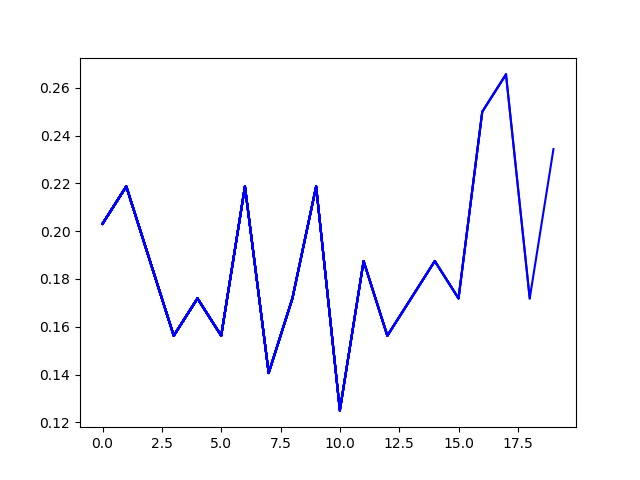

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

In [8]:
iteration_test = 20
BER = np.zeros([iteration_test])
x , y = [],[]
for j in range(0,iteration_test):
    checkpointer = ModelCheckpoint(filepath='weights.{epoch:02d}-{loss:.8f}.hdf5',verbose=1,monitor='val_los',save_best_only=True)
    coded_train = np.zeros([len(MessageWordsArray),8])
    for i in range(0,len(MessageWordsArray)):
        coded_train[i,:] = RepetitionCodes(MessageWordsArray[i,:]) + AddNoise(0.3,8)
    coded_validation = np.zeros([len(MessageWordsArray),8])
    for i in range(0,len(MessageWordsArray)):
        coded_validation[i,:] = RepetitionCodes(MessageWordsArray[i,:]) + AddNoise(0.3,8)
    coded_test = np.zeros([len(MessageWordsArray_test),8])
    for i in range(0,len(MessageWordsArray_test)):
        coded_test[i,:] = RepetitionCodes(MessageWordsArray_test[i,:]) + AddNoise(0.6,8)
    input_b = Input(shape=(8,))
    #dense1=Dense(8,activation='sigmoid')(input_b)
    msg_out=Dense(4,activation='sigmoid')(input_b)

    model = Model(inputs=input_b,outputs=msg_out)
    model.compile(optimizer='adam',loss='mse',metrics=[ber])
    model.summary()

    model.fit(coded_train,MessageWordsArray,batch_size=16,nb_epoch=4000,verbose=2,shuffle=True,callbacks=[checkpointer],validation_data=(coded_validation, MessageWordsArray_test))
    BER[j] = model.evaluate(coded_test,MessageWordsArray,batch_size=16)[1]
    x.append(j)
    y.append(BER[j])
    ax.plot(x,y,color = 'b')
    fig.canvas.draw()
plt.savefig('HighHigh3.pdf')

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 16 samples, validate on 16 samples
Epoch 1/4000


/home/gultu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


 - 0s - loss: 0.2591 - ber: 0.4062 - val_loss: 0.2725 - val_ber: 0.4531
Epoch 2/4000
 - 0s - loss: 0.2587 - ber: 0.4062 - val_loss: 0.2722 - val_ber: 0.4531
Epoch 3/4000
 - 0s - loss: 0.2583 - ber: 0.4062 - val_loss: 0.2718 - val_ber: 0.4531
Epoch 4/4000
 - 0s - loss: 0.2579 - ber: 0.4062 - val_loss: 0.2714 - val_ber: 0.4531
Epoch 5/4000
 - 0s - loss: 0.2576 - ber: 0.4062 - val_loss: 0.2711 - val_ber: 0.4531
Epoch 6/4000
 - 0s - loss: 0.2572 - ber: 0.4062 - val_loss: 0.2707 - val_ber: 0.4531
Epoch 7/4000
 - 0s - loss: 0.2568 - ber: 0.4062 - val_loss: 0.2703 - val_ber: 0.4531
Epoch 8/4000
 - 0s - loss: 0.2564 - ber: 0.4062 - val_loss: 0.2700 - val_ber: 0.4531
Epoch 9/4000
 - 0s - loss: 0.2560 - ber: 0.4062 - val_loss: 0.2696 - val_ber: 0.4531
Epoch 10/4000
 - 0s - loss: 0.2556 - ber: 0.4062 - val_loss: 0.2692 - val_ber: 0.4531
Epoch 11/4000
 - 0s - loss: 0.2552 - ber: 0.3906 - val_loss: 0.2688 - val_ber: 0.4531
Epoch 12/4000
 - 0s - loss: 0.2548 - ber: 0.3906 - val_loss: 0.2685 - val_be

/home/gultu/anaconda2/envs/DDP/lib/python2.7/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_los available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 42/4000
 - 0s - loss: 0.2435 - ber: 0.3750 - val_loss: 0.2578 - val_ber: 0.4688
Epoch 43/4000
 - 0s - loss: 0.2431 - ber: 0.3594 - val_loss: 0.2575 - val_ber: 0.4688
Epoch 44/4000
 - 0s - loss: 0.2427 - ber: 0.3594 - val_loss: 0.2572 - val_ber: 0.4688
Epoch 45/4000
 - 0s - loss: 0.2424 - ber: 0.3594 - val_loss: 0.2568 - val_ber: 0.4688
Epoch 46/4000
 - 0s - loss: 0.2420 - ber: 0.3594 - val_loss: 0.2565 - val_ber: 0.4688
Epoch 47/4000
 - 0s - loss: 0.2416 - ber: 0.3594 - val_loss: 0.2561 - val_ber: 0.4688
Epoch 48/4000
 - 0s - loss: 0.2413 - ber: 0.3594 - val_loss: 0.2558 - val_ber: 0.4688
Epoch 49/4000
 - 0s - loss: 0.2409 - ber: 0.3594 - val_loss: 0.2555 - val_ber: 0.4688
Epoch 50/4000
 - 0s - loss: 0.2405 - ber: 0.3594 - val_loss: 0.2551 - val_ber: 0.4688
Epoch 51/4000
 - 0s - loss: 0.2402 - ber: 0.3750 - val_loss: 0.2548 - val_ber: 0.4688
Epoch 52/4000
 - 0s - loss: 0.2398 - ber: 0.3750 - val_loss: 0.2545 - val_ber: 0.4688
Epoch 53/4000
 - 0s - loss: 0.2394 - ber: 0.3750 - val

Epoch 137/4000
 - 0s - loss: 0.2104 - ber: 0.3594 - val_loss: 0.2281 - val_ber: 0.3906
Epoch 138/4000
 - 0s - loss: 0.2101 - ber: 0.3594 - val_loss: 0.2278 - val_ber: 0.3906
Epoch 139/4000
 - 0s - loss: 0.2097 - ber: 0.3594 - val_loss: 0.2275 - val_ber: 0.3906
Epoch 140/4000
 - 0s - loss: 0.2094 - ber: 0.3594 - val_loss: 0.2272 - val_ber: 0.3906
Epoch 141/4000
 - 0s - loss: 0.2091 - ber: 0.3594 - val_loss: 0.2269 - val_ber: 0.3906
Epoch 142/4000
 - 0s - loss: 0.2088 - ber: 0.3594 - val_loss: 0.2267 - val_ber: 0.3750
Epoch 143/4000
 - 0s - loss: 0.2084 - ber: 0.3594 - val_loss: 0.2264 - val_ber: 0.3750
Epoch 144/4000
 - 0s - loss: 0.2081 - ber: 0.3594 - val_loss: 0.2261 - val_ber: 0.3750
Epoch 145/4000
 - 0s - loss: 0.2078 - ber: 0.3594 - val_loss: 0.2258 - val_ber: 0.3750
Epoch 146/4000
 - 0s - loss: 0.2075 - ber: 0.3594 - val_loss: 0.2255 - val_ber: 0.3594
Epoch 147/4000
 - 0s - loss: 0.2072 - ber: 0.3594 - val_loss: 0.2252 - val_ber: 0.3594
Epoch 148/4000
 - 0s - loss: 0.2068 - ber: 

 - 0s - loss: 0.1822 - ber: 0.2500 - val_loss: 0.2037 - val_ber: 0.2812
Epoch 232/4000
 - 0s - loss: 0.1819 - ber: 0.2500 - val_loss: 0.2034 - val_ber: 0.2812
Epoch 233/4000
 - 0s - loss: 0.1816 - ber: 0.2500 - val_loss: 0.2032 - val_ber: 0.2812
Epoch 234/4000
 - 0s - loss: 0.1813 - ber: 0.2500 - val_loss: 0.2030 - val_ber: 0.2812
Epoch 235/4000
 - 0s - loss: 0.1811 - ber: 0.2500 - val_loss: 0.2027 - val_ber: 0.2812
Epoch 236/4000
 - 0s - loss: 0.1808 - ber: 0.2500 - val_loss: 0.2025 - val_ber: 0.2812
Epoch 237/4000
 - 0s - loss: 0.1805 - ber: 0.2500 - val_loss: 0.2023 - val_ber: 0.2656
Epoch 238/4000
 - 0s - loss: 0.1803 - ber: 0.2500 - val_loss: 0.2020 - val_ber: 0.2656
Epoch 239/4000
 - 0s - loss: 0.1800 - ber: 0.2500 - val_loss: 0.2018 - val_ber: 0.2656
Epoch 240/4000
 - 0s - loss: 0.1797 - ber: 0.2500 - val_loss: 0.2016 - val_ber: 0.2656
Epoch 241/4000
 - 0s - loss: 0.1794 - ber: 0.2500 - val_loss: 0.2013 - val_ber: 0.2656
Epoch 242/4000
 - 0s - loss: 0.1792 - ber: 0.2344 - val_lo

Epoch 326/4000
 - 0s - loss: 0.1584 - ber: 0.1406 - val_loss: 0.1829 - val_ber: 0.2188
Epoch 327/4000
 - 0s - loss: 0.1581 - ber: 0.1406 - val_loss: 0.1827 - val_ber: 0.2188
Epoch 328/4000
 - 0s - loss: 0.1579 - ber: 0.1406 - val_loss: 0.1825 - val_ber: 0.2188
Epoch 329/4000
 - 0s - loss: 0.1577 - ber: 0.1406 - val_loss: 0.1822 - val_ber: 0.2188
Epoch 330/4000
 - 0s - loss: 0.1574 - ber: 0.1406 - val_loss: 0.1820 - val_ber: 0.2188
Epoch 331/4000
 - 0s - loss: 0.1572 - ber: 0.1406 - val_loss: 0.1818 - val_ber: 0.2188
Epoch 332/4000
 - 0s - loss: 0.1570 - ber: 0.1406 - val_loss: 0.1816 - val_ber: 0.2188
Epoch 333/4000
 - 0s - loss: 0.1568 - ber: 0.1406 - val_loss: 0.1814 - val_ber: 0.2188
Epoch 334/4000
 - 0s - loss: 0.1565 - ber: 0.1406 - val_loss: 0.1812 - val_ber: 0.2188
Epoch 335/4000
 - 0s - loss: 0.1563 - ber: 0.1406 - val_loss: 0.1810 - val_ber: 0.2188
Epoch 336/4000
 - 0s - loss: 0.1561 - ber: 0.1406 - val_loss: 0.1808 - val_ber: 0.2188
Epoch 337/4000
 - 0s - loss: 0.1559 - ber: 

 - 0s - loss: 0.1388 - ber: 0.0781 - val_loss: 0.1653 - val_ber: 0.1562
Epoch 421/4000
 - 0s - loss: 0.1386 - ber: 0.0781 - val_loss: 0.1651 - val_ber: 0.1562
Epoch 422/4000
 - 0s - loss: 0.1384 - ber: 0.0781 - val_loss: 0.1650 - val_ber: 0.1562
Epoch 423/4000
 - 0s - loss: 0.1383 - ber: 0.0781 - val_loss: 0.1648 - val_ber: 0.1562
Epoch 424/4000
 - 0s - loss: 0.1381 - ber: 0.0781 - val_loss: 0.1646 - val_ber: 0.1562
Epoch 425/4000
 - 0s - loss: 0.1379 - ber: 0.0781 - val_loss: 0.1645 - val_ber: 0.1562
Epoch 426/4000
 - 0s - loss: 0.1377 - ber: 0.0781 - val_loss: 0.1643 - val_ber: 0.1562
Epoch 427/4000
 - 0s - loss: 0.1375 - ber: 0.0781 - val_loss: 0.1641 - val_ber: 0.1562
Epoch 428/4000
 - 0s - loss: 0.1373 - ber: 0.0781 - val_loss: 0.1639 - val_ber: 0.1562
Epoch 429/4000
 - 0s - loss: 0.1371 - ber: 0.0781 - val_loss: 0.1638 - val_ber: 0.1562
Epoch 430/4000
 - 0s - loss: 0.1369 - ber: 0.0781 - val_loss: 0.1636 - val_ber: 0.1562
Epoch 431/4000
 - 0s - loss: 0.1368 - ber: 0.0781 - val_lo

Epoch 515/4000
 - 0s - loss: 0.1225 - ber: 0.0469 - val_loss: 0.1504 - val_ber: 0.1250
Epoch 516/4000
 - 0s - loss: 0.1223 - ber: 0.0469 - val_loss: 0.1503 - val_ber: 0.1250
Epoch 517/4000
 - 0s - loss: 0.1222 - ber: 0.0469 - val_loss: 0.1501 - val_ber: 0.1250
Epoch 518/4000
 - 0s - loss: 0.1220 - ber: 0.0469 - val_loss: 0.1500 - val_ber: 0.1250
Epoch 519/4000
 - 0s - loss: 0.1219 - ber: 0.0469 - val_loss: 0.1498 - val_ber: 0.1250
Epoch 520/4000
 - 0s - loss: 0.1217 - ber: 0.0469 - val_loss: 0.1497 - val_ber: 0.1250
Epoch 521/4000
 - 0s - loss: 0.1216 - ber: 0.0469 - val_loss: 0.1495 - val_ber: 0.1250
Epoch 522/4000
 - 0s - loss: 0.1214 - ber: 0.0469 - val_loss: 0.1494 - val_ber: 0.1250
Epoch 523/4000
 - 0s - loss: 0.1213 - ber: 0.0469 - val_loss: 0.1493 - val_ber: 0.1250
Epoch 524/4000
 - 0s - loss: 0.1211 - ber: 0.0469 - val_loss: 0.1491 - val_ber: 0.1250
Epoch 525/4000
 - 0s - loss: 0.1210 - ber: 0.0469 - val_loss: 0.1490 - val_ber: 0.1250
Epoch 526/4000
 - 0s - loss: 0.1208 - ber: 

Epoch 610/4000
 - 0s - loss: 0.1089 - ber: 0.0156 - val_loss: 0.1379 - val_ber: 0.1094
Epoch 611/4000
 - 0s - loss: 0.1088 - ber: 0.0156 - val_loss: 0.1378 - val_ber: 0.1094
Epoch 612/4000
 - 0s - loss: 0.1087 - ber: 0.0156 - val_loss: 0.1376 - val_ber: 0.1094
Epoch 613/4000
 - 0s - loss: 0.1085 - ber: 0.0156 - val_loss: 0.1375 - val_ber: 0.1094
Epoch 614/4000
 - 0s - loss: 0.1084 - ber: 0.0156 - val_loss: 0.1374 - val_ber: 0.1094
Epoch 615/4000
 - 0s - loss: 0.1083 - ber: 0.0156 - val_loss: 0.1373 - val_ber: 0.1094
Epoch 616/4000
 - 0s - loss: 0.1081 - ber: 0.0156 - val_loss: 0.1371 - val_ber: 0.1094
Epoch 617/4000
 - 0s - loss: 0.1080 - ber: 0.0156 - val_loss: 0.1370 - val_ber: 0.1094
Epoch 618/4000
 - 0s - loss: 0.1079 - ber: 0.0156 - val_loss: 0.1369 - val_ber: 0.1094
Epoch 619/4000
 - 0s - loss: 0.1078 - ber: 0.0156 - val_loss: 0.1368 - val_ber: 0.1094
Epoch 620/4000
 - 0s - loss: 0.1076 - ber: 0.0156 - val_loss: 0.1367 - val_ber: 0.1094
Epoch 621/4000
 - 0s - loss: 0.1075 - ber: 

 - 0s - loss: 0.0976 - ber: 0.0156 - val_loss: 0.1273 - val_ber: 0.1094
Epoch 705/4000
 - 0s - loss: 0.0975 - ber: 0.0156 - val_loss: 0.1272 - val_ber: 0.1094
Epoch 706/4000
 - 0s - loss: 0.0974 - ber: 0.0156 - val_loss: 0.1271 - val_ber: 0.1094
Epoch 707/4000
 - 0s - loss: 0.0972 - ber: 0.0156 - val_loss: 0.1270 - val_ber: 0.1094
Epoch 708/4000
 - 0s - loss: 0.0971 - ber: 0.0156 - val_loss: 0.1269 - val_ber: 0.1094
Epoch 709/4000
 - 0s - loss: 0.0970 - ber: 0.0156 - val_loss: 0.1268 - val_ber: 0.1094
Epoch 710/4000
 - 0s - loss: 0.0969 - ber: 0.0156 - val_loss: 0.1267 - val_ber: 0.1094
Epoch 711/4000
 - 0s - loss: 0.0968 - ber: 0.0156 - val_loss: 0.1266 - val_ber: 0.1094
Epoch 712/4000
 - 0s - loss: 0.0967 - ber: 0.0156 - val_loss: 0.1265 - val_ber: 0.1094
Epoch 713/4000
 - 0s - loss: 0.0966 - ber: 0.0156 - val_loss: 0.1264 - val_ber: 0.1094
Epoch 714/4000
 - 0s - loss: 0.0965 - ber: 0.0156 - val_loss: 0.1263 - val_ber: 0.1094
Epoch 715/4000
 - 0s - loss: 0.0964 - ber: 0.0156 - val_lo

 - 0s - loss: 0.0881 - ber: 0.0000e+00 - val_loss: 0.1186 - val_ber: 0.0781
Epoch 796/4000
 - 0s - loss: 0.0880 - ber: 0.0000e+00 - val_loss: 0.1185 - val_ber: 0.0781
Epoch 797/4000
 - 0s - loss: 0.0879 - ber: 0.0000e+00 - val_loss: 0.1184 - val_ber: 0.0781
Epoch 798/4000
 - 0s - loss: 0.0879 - ber: 0.0000e+00 - val_loss: 0.1183 - val_ber: 0.0781
Epoch 799/4000
 - 0s - loss: 0.0878 - ber: 0.0000e+00 - val_loss: 0.1182 - val_ber: 0.0781
Epoch 800/4000
 - 0s - loss: 0.0877 - ber: 0.0000e+00 - val_loss: 0.1181 - val_ber: 0.0781
Epoch 801/4000
 - 0s - loss: 0.0876 - ber: 0.0000e+00 - val_loss: 0.1181 - val_ber: 0.0781
Epoch 802/4000
 - 0s - loss: 0.0875 - ber: 0.0000e+00 - val_loss: 0.1180 - val_ber: 0.0781
Epoch 803/4000
 - 0s - loss: 0.0874 - ber: 0.0000e+00 - val_loss: 0.1179 - val_ber: 0.0781
Epoch 804/4000
 - 0s - loss: 0.0873 - ber: 0.0000e+00 - val_loss: 0.1178 - val_ber: 0.0781
Epoch 805/4000
 - 0s - loss: 0.0872 - ber: 0.0000e+00 - val_loss: 0.1177 - val_ber: 0.0781
Epoch 806/4000

Epoch 886/4000
 - 0s - loss: 0.0799 - ber: 0.0000e+00 - val_loss: 0.1110 - val_ber: 0.0781
Epoch 887/4000
 - 0s - loss: 0.0799 - ber: 0.0000e+00 - val_loss: 0.1109 - val_ber: 0.0781
Epoch 888/4000
 - 0s - loss: 0.0798 - ber: 0.0000e+00 - val_loss: 0.1108 - val_ber: 0.0781
Epoch 889/4000
 - 0s - loss: 0.0797 - ber: 0.0000e+00 - val_loss: 0.1108 - val_ber: 0.0625
Epoch 890/4000
 - 0s - loss: 0.0796 - ber: 0.0000e+00 - val_loss: 0.1107 - val_ber: 0.0625
Epoch 891/4000
 - 0s - loss: 0.0795 - ber: 0.0000e+00 - val_loss: 0.1106 - val_ber: 0.0625
Epoch 892/4000
 - 0s - loss: 0.0794 - ber: 0.0000e+00 - val_loss: 0.1105 - val_ber: 0.0625
Epoch 893/4000
 - 0s - loss: 0.0794 - ber: 0.0000e+00 - val_loss: 0.1105 - val_ber: 0.0625
Epoch 894/4000
 - 0s - loss: 0.0793 - ber: 0.0000e+00 - val_loss: 0.1104 - val_ber: 0.0625
Epoch 895/4000
 - 0s - loss: 0.0792 - ber: 0.0000e+00 - val_loss: 0.1103 - val_ber: 0.0625
Epoch 896/4000
 - 0s - loss: 0.0791 - ber: 0.0000e+00 - val_loss: 0.1102 - val_ber: 0.0625

 - 0s - loss: 0.0729 - ber: 0.0000e+00 - val_loss: 0.1045 - val_ber: 0.0625
Epoch 977/4000
 - 0s - loss: 0.0728 - ber: 0.0000e+00 - val_loss: 0.1044 - val_ber: 0.0625
Epoch 978/4000
 - 0s - loss: 0.0727 - ber: 0.0000e+00 - val_loss: 0.1043 - val_ber: 0.0625
Epoch 979/4000
 - 0s - loss: 0.0726 - ber: 0.0000e+00 - val_loss: 0.1043 - val_ber: 0.0625
Epoch 980/4000
 - 0s - loss: 0.0726 - ber: 0.0000e+00 - val_loss: 0.1042 - val_ber: 0.0625
Epoch 981/4000
 - 0s - loss: 0.0725 - ber: 0.0000e+00 - val_loss: 0.1041 - val_ber: 0.0625
Epoch 982/4000
 - 0s - loss: 0.0724 - ber: 0.0000e+00 - val_loss: 0.1040 - val_ber: 0.0625
Epoch 983/4000
 - 0s - loss: 0.0723 - ber: 0.0000e+00 - val_loss: 0.1040 - val_ber: 0.0625
Epoch 984/4000
 - 0s - loss: 0.0723 - ber: 0.0000e+00 - val_loss: 0.1039 - val_ber: 0.0625
Epoch 985/4000
 - 0s - loss: 0.0722 - ber: 0.0000e+00 - val_loss: 0.1038 - val_ber: 0.0625
Epoch 986/4000
 - 0s - loss: 0.0721 - ber: 0.0000e+00 - val_loss: 0.1038 - val_ber: 0.0625
Epoch 987/4000

Epoch 1066/4000
 - 0s - loss: 0.0666 - ber: 0.0000e+00 - val_loss: 0.0987 - val_ber: 0.0625
Epoch 1067/4000
 - 0s - loss: 0.0666 - ber: 0.0000e+00 - val_loss: 0.0987 - val_ber: 0.0625
Epoch 1068/4000
 - 0s - loss: 0.0665 - ber: 0.0000e+00 - val_loss: 0.0986 - val_ber: 0.0625
Epoch 1069/4000
 - 0s - loss: 0.0664 - ber: 0.0000e+00 - val_loss: 0.0986 - val_ber: 0.0625
Epoch 1070/4000
 - 0s - loss: 0.0664 - ber: 0.0000e+00 - val_loss: 0.0985 - val_ber: 0.0625
Epoch 1071/4000
 - 0s - loss: 0.0663 - ber: 0.0000e+00 - val_loss: 0.0984 - val_ber: 0.0625
Epoch 1072/4000
 - 0s - loss: 0.0662 - ber: 0.0000e+00 - val_loss: 0.0984 - val_ber: 0.0625
Epoch 1073/4000
 - 0s - loss: 0.0662 - ber: 0.0000e+00 - val_loss: 0.0983 - val_ber: 0.0625
Epoch 1074/4000
 - 0s - loss: 0.0661 - ber: 0.0000e+00 - val_loss: 0.0983 - val_ber: 0.0625
Epoch 1075/4000
 - 0s - loss: 0.0660 - ber: 0.0000e+00 - val_loss: 0.0982 - val_ber: 0.0625
Epoch 1076/4000
 - 0s - loss: 0.0660 - ber: 0.0000e+00 - val_loss: 0.0981 - val_

Epoch 1156/4000
 - 0s - loss: 0.0611 - ber: 0.0000e+00 - val_loss: 0.0937 - val_ber: 0.0469
Epoch 1157/4000
 - 0s - loss: 0.0611 - ber: 0.0000e+00 - val_loss: 0.0936 - val_ber: 0.0469
Epoch 1158/4000
 - 0s - loss: 0.0610 - ber: 0.0000e+00 - val_loss: 0.0936 - val_ber: 0.0469
Epoch 1159/4000
 - 0s - loss: 0.0609 - ber: 0.0000e+00 - val_loss: 0.0935 - val_ber: 0.0469
Epoch 1160/4000
 - 0s - loss: 0.0609 - ber: 0.0000e+00 - val_loss: 0.0935 - val_ber: 0.0469
Epoch 1161/4000
 - 0s - loss: 0.0608 - ber: 0.0000e+00 - val_loss: 0.0934 - val_ber: 0.0469
Epoch 1162/4000
 - 0s - loss: 0.0608 - ber: 0.0000e+00 - val_loss: 0.0934 - val_ber: 0.0469
Epoch 1163/4000
 - 0s - loss: 0.0607 - ber: 0.0000e+00 - val_loss: 0.0933 - val_ber: 0.0469
Epoch 1164/4000
 - 0s - loss: 0.0607 - ber: 0.0000e+00 - val_loss: 0.0933 - val_ber: 0.0469
Epoch 1165/4000
 - 0s - loss: 0.0606 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.0469
Epoch 1166/4000
 - 0s - loss: 0.0605 - ber: 0.0000e+00 - val_loss: 0.0932 - val_

 - 0s - loss: 0.0563 - ber: 0.0000e+00 - val_loss: 0.0893 - val_ber: 0.0469
Epoch 1246/4000
 - 0s - loss: 0.0562 - ber: 0.0000e+00 - val_loss: 0.0893 - val_ber: 0.0469
Epoch 1247/4000
 - 0s - loss: 0.0562 - ber: 0.0000e+00 - val_loss: 0.0892 - val_ber: 0.0469
Epoch 1248/4000
 - 0s - loss: 0.0561 - ber: 0.0000e+00 - val_loss: 0.0892 - val_ber: 0.0469
Epoch 1249/4000
 - 0s - loss: 0.0561 - ber: 0.0000e+00 - val_loss: 0.0891 - val_ber: 0.0469
Epoch 1250/4000
 - 0s - loss: 0.0560 - ber: 0.0000e+00 - val_loss: 0.0891 - val_ber: 0.0469
Epoch 1251/4000
 - 0s - loss: 0.0560 - ber: 0.0000e+00 - val_loss: 0.0890 - val_ber: 0.0469
Epoch 1252/4000
 - 0s - loss: 0.0559 - ber: 0.0000e+00 - val_loss: 0.0890 - val_ber: 0.0469
Epoch 1253/4000
 - 0s - loss: 0.0559 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.0469
Epoch 1254/4000
 - 0s - loss: 0.0558 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.0469
Epoch 1255/4000
 - 0s - loss: 0.0558 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.0469
Epoc

Epoch 1335/4000
 - 0s - loss: 0.0519 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0469
Epoch 1336/4000
 - 0s - loss: 0.0519 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0469
Epoch 1337/4000
 - 0s - loss: 0.0518 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0469
Epoch 1338/4000
 - 0s - loss: 0.0518 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0469
Epoch 1339/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0469
Epoch 1340/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0469
Epoch 1341/4000
 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.0851 - val_ber: 0.0469
Epoch 1342/4000
 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.0851 - val_ber: 0.0469
Epoch 1343/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0850 - val_ber: 0.0469
Epoch 1344/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0850 - val_ber: 0.0469
Epoch 1345/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0849 - val_

 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0819 - val_ber: 0.0469
Epoch 1425/4000
 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0469
Epoch 1426/4000
 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0469
Epoch 1427/4000
 - 0s - loss: 0.0479 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0469
Epoch 1428/4000
 - 0s - loss: 0.0479 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0469
Epoch 1429/4000
 - 0s - loss: 0.0478 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0469
Epoch 1430/4000
 - 0s - loss: 0.0478 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0469
Epoch 1431/4000
 - 0s - loss: 0.0478 - ber: 0.0000e+00 - val_loss: 0.0816 - val_ber: 0.0469
Epoch 1432/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0816 - val_ber: 0.0469
Epoch 1433/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0815 - val_ber: 0.0469
Epoch 1434/4000
 - 0s - loss: 0.0476 - ber: 0.0000e+00 - val_loss: 0.0815 - val_ber: 0.0469
Epoc

Epoch 1514/4000
 - 0s - loss: 0.0445 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0469
Epoch 1515/4000
 - 0s - loss: 0.0445 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0469
Epoch 1516/4000
 - 0s - loss: 0.0444 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0469
Epoch 1517/4000
 - 0s - loss: 0.0444 - ber: 0.0000e+00 - val_loss: 0.0786 - val_ber: 0.0469
Epoch 1518/4000
 - 0s - loss: 0.0444 - ber: 0.0000e+00 - val_loss: 0.0786 - val_ber: 0.0469
Epoch 1519/4000
 - 0s - loss: 0.0443 - ber: 0.0000e+00 - val_loss: 0.0786 - val_ber: 0.0469
Epoch 1520/4000
 - 0s - loss: 0.0443 - ber: 0.0000e+00 - val_loss: 0.0785 - val_ber: 0.0469
Epoch 1521/4000
 - 0s - loss: 0.0443 - ber: 0.0000e+00 - val_loss: 0.0785 - val_ber: 0.0469
Epoch 1522/4000
 - 0s - loss: 0.0442 - ber: 0.0000e+00 - val_loss: 0.0785 - val_ber: 0.0469
Epoch 1523/4000
 - 0s - loss: 0.0442 - ber: 0.0000e+00 - val_loss: 0.0784 - val_ber: 0.0469
Epoch 1524/4000
 - 0s - loss: 0.0442 - ber: 0.0000e+00 - val_loss: 0.0784 - val_

 - 0s - loss: 0.0414 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0469
Epoch 1604/4000
 - 0s - loss: 0.0413 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0469
Epoch 1605/4000
 - 0s - loss: 0.0413 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0469
Epoch 1606/4000
 - 0s - loss: 0.0413 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0469
Epoch 1607/4000
 - 0s - loss: 0.0412 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0469
Epoch 1608/4000
 - 0s - loss: 0.0412 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0469
Epoch 1609/4000
 - 0s - loss: 0.0412 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1610/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1611/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1612/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0469
Epoch 1613/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0469
Epoc

Epoch 1693/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0469
Epoch 1694/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0733 - val_ber: 0.0469
Epoch 1695/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0733 - val_ber: 0.0469
Epoch 1696/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0733 - val_ber: 0.0469
Epoch 1697/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0732 - val_ber: 0.0469
Epoch 1698/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0732 - val_ber: 0.0469
Epoch 1699/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0732 - val_ber: 0.0469
Epoch 1700/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0732 - val_ber: 0.0469
Epoch 1701/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0731 - val_ber: 0.0469
Epoch 1702/4000
 - 0s - loss: 0.0382 - ber: 0.0000e+00 - val_loss: 0.0731 - val_ber: 0.0469
Epoch 1703/4000
 - 0s - loss: 0.0382 - ber: 0.0000e+00 - val_loss: 0.0731 - val_

 - 0s - loss: 0.0359 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0312
Epoch 1783/4000
 - 0s - loss: 0.0359 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0312
Epoch 1784/4000
 - 0s - loss: 0.0359 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0312
Epoch 1785/4000
 - 0s - loss: 0.0358 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0312
Epoch 1786/4000
 - 0s - loss: 0.0358 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0312
Epoch 1787/4000
 - 0s - loss: 0.0358 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0312
Epoch 1788/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0312
Epoch 1789/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0312
Epoch 1790/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0312
Epoch 1791/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0312
Epoch 1792/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0312
Epoc

Epoch 1872/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0689 - val_ber: 0.0312
Epoch 1873/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0689 - val_ber: 0.0312
Epoch 1874/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0689 - val_ber: 0.0312
Epoch 1875/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0689 - val_ber: 0.0312
Epoch 1876/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0312
Epoch 1877/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0312
Epoch 1878/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0312
Epoch 1879/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0312
Epoch 1880/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0312
Epoch 1881/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0312
Epoch 1882/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0687 - val_

Epoch 1962/4000
 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0670 - val_ber: 0.0312
Epoch 1963/4000
 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0670 - val_ber: 0.0312
Epoch 1964/4000
 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 1965/4000
 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 1966/4000
 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 1967/4000
 - 0s - loss: 0.0312 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 1968/4000
 - 0s - loss: 0.0312 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 1969/4000
 - 0s - loss: 0.0312 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0312
Epoch 1970/4000
 - 0s - loss: 0.0312 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0312
Epoch 1971/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0312
Epoch 1972/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0668 - val_

 - 0s - loss: 0.0294 - ber: 0.0000e+00 - val_loss: 0.0652 - val_ber: 0.0312
Epoch 2052/4000
 - 0s - loss: 0.0294 - ber: 0.0000e+00 - val_loss: 0.0652 - val_ber: 0.0312
Epoch 2053/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0652 - val_ber: 0.0312
Epoch 2054/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0652 - val_ber: 0.0312
Epoch 2055/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 2056/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 2057/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 2058/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 2059/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 2060/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 2061/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0312
Epoc

Epoch 2141/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0469
Epoch 2142/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0469
Epoch 2143/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0469
Epoch 2144/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0469
Epoch 2145/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0469
Epoch 2146/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0469
Epoch 2147/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0469
Epoch 2148/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0469
Epoch 2149/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0469
Epoch 2150/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0469
Epoch 2151/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0634 - val_

Epoch 2231/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0469
Epoch 2232/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2233/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2234/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2235/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2236/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2237/4000
 - 0s - loss: 0.0257 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2238/4000
 - 0s - loss: 0.0257 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0469
Epoch 2239/4000
 - 0s - loss: 0.0257 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0469
Epoch 2240/4000
 - 0s - loss: 0.0257 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0469
Epoch 2241/4000
 - 0s - loss: 0.0257 - ber: 0.0000e+00 - val_loss: 0.0619 - val_

 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0607 - val_ber: 0.0469
Epoch 2321/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0607 - val_ber: 0.0469
Epoch 2322/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0606 - val_ber: 0.0469
Epoch 2323/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0606 - val_ber: 0.0469
Epoch 2324/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0606 - val_ber: 0.0469
Epoch 2325/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0606 - val_ber: 0.0469
Epoch 2326/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0606 - val_ber: 0.0469
Epoch 2327/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0606 - val_ber: 0.0469
Epoch 2328/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0606 - val_ber: 0.0469
Epoch 2329/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0605 - val_ber: 0.0469
Epoch 2330/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0605 - val_ber: 0.0469
Epoc

Epoch 2410/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0594 - val_ber: 0.0469
Epoch 2411/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0593 - val_ber: 0.0469
Epoch 2412/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0593 - val_ber: 0.0469
Epoch 2413/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0593 - val_ber: 0.0469
Epoch 2414/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0593 - val_ber: 0.0469
Epoch 2415/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0593 - val_ber: 0.0469
Epoch 2416/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0593 - val_ber: 0.0469
Epoch 2417/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0593 - val_ber: 0.0469
Epoch 2418/4000
 - 0s - loss: 0.0227 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0469
Epoch 2419/4000
 - 0s - loss: 0.0227 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0469
Epoch 2420/4000
 - 0s - loss: 0.0227 - ber: 0.0000e+00 - val_loss: 0.0592 - val_

 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0469
Epoch 2500/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0469
Epoch 2501/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0469
Epoch 2502/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0469
Epoch 2503/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0469
Epoch 2504/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0469
Epoch 2505/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0469
Epoch 2506/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0469
Epoch 2507/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0469
Epoch 2508/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0469
Epoch 2509/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0469
Epoc

Epoch 2589/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0469
Epoch 2590/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0469
Epoch 2591/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0469
Epoch 2592/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0469
Epoch 2593/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0469
Epoch 2594/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0469
Epoch 2595/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0469
Epoch 2596/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0469
Epoch 2597/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0469
Epoch 2598/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0469
Epoch 2599/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0569 - val_

 - 0s - loss: 0.0192 - ber: 0.0000e+00 - val_loss: 0.0559 - val_ber: 0.0469
Epoch 2679/4000
 - 0s - loss: 0.0192 - ber: 0.0000e+00 - val_loss: 0.0559 - val_ber: 0.0469
Epoch 2680/4000
 - 0s - loss: 0.0191 - ber: 0.0000e+00 - val_loss: 0.0559 - val_ber: 0.0469
Epoch 2681/4000
 - 0s - loss: 0.0191 - ber: 0.0000e+00 - val_loss: 0.0559 - val_ber: 0.0469
Epoch 2682/4000
 - 0s - loss: 0.0191 - ber: 0.0000e+00 - val_loss: 0.0559 - val_ber: 0.0469
Epoch 2683/4000
 - 0s - loss: 0.0191 - ber: 0.0000e+00 - val_loss: 0.0559 - val_ber: 0.0469
Epoch 2684/4000
 - 0s - loss: 0.0191 - ber: 0.0000e+00 - val_loss: 0.0559 - val_ber: 0.0469
Epoch 2685/4000
 - 0s - loss: 0.0191 - ber: 0.0000e+00 - val_loss: 0.0559 - val_ber: 0.0469
Epoch 2686/4000
 - 0s - loss: 0.0191 - ber: 0.0000e+00 - val_loss: 0.0559 - val_ber: 0.0469
Epoch 2687/4000
 - 0s - loss: 0.0191 - ber: 0.0000e+00 - val_loss: 0.0558 - val_ber: 0.0469
Epoch 2688/4000
 - 0s - loss: 0.0191 - ber: 0.0000e+00 - val_loss: 0.0558 - val_ber: 0.0469
Epoc

Epoch 2768/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 2769/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 2770/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 2771/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 2772/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 2773/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 2774/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 2775/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 2776/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0548 - val_ber: 0.0469
Epoch 2777/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0548 - val_ber: 0.0469
Epoch 2778/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0548 - val_

 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2858/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2859/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2860/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2861/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0469
Epoch 2862/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0469
Epoch 2863/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0469
Epoch 2864/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0469
Epoch 2865/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0469
Epoch 2866/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0469
Epoch 2867/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0469
Epoc

Epoch 2947/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0469
Epoch 2948/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0469
Epoch 2949/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0469
Epoch 2950/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0469
Epoch 2951/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2952/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2953/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2954/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2955/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2956/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2957/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0530 - val_

 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3037/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3038/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3039/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3040/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3041/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3042/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3043/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3044/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3045/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoch 3046/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0469
Epoc

Epoch 3126/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3127/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3128/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3129/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3130/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3131/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3132/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3133/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3134/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3135/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 3136/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0513 - val_

 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0507 - val_ber: 0.0469
Epoch 3216/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0507 - val_ber: 0.0469
Epoch 3217/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0507 - val_ber: 0.0469
Epoch 3218/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0506 - val_ber: 0.0469
Epoch 3219/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0506 - val_ber: 0.0469
Epoch 3220/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0506 - val_ber: 0.0469
Epoch 3221/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0506 - val_ber: 0.0469
Epoch 3222/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0506 - val_ber: 0.0469
Epoch 3223/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0506 - val_ber: 0.0469
Epoch 3224/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0506 - val_ber: 0.0469
Epoch 3225/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0506 - val_ber: 0.0469
Epoc

Epoch 3305/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3306/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3307/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3308/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3309/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3310/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3311/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3312/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3313/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3314/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0469
Epoch 3315/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0499 - val_

Epoch 3395/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3396/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3397/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3398/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3399/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3400/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3401/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3402/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3403/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3404/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0469
Epoch 3405/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0492 - val_

 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0469
Epoch 3485/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0469
Epoch 3486/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0469
Epoch 3487/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0469
Epoch 3488/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0469
Epoch 3489/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0469
Epoch 3490/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0469
Epoch 3491/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0469
Epoch 3492/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0469
Epoch 3493/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0469
Epoch 3494/4000
 - 0s - loss: 0.0117 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0469
Epoc

Epoch 3574/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3575/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3576/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3577/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3578/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3579/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3580/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3581/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3582/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3583/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 3584/4000
 - 0s - loss: 0.0111 - ber: 0.0000e+00 - val_loss: 0.0479 - val_

Epoch 3664/4000
 - 0s - loss: 0.0106 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3665/4000
 - 0s - loss: 0.0106 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3666/4000
 - 0s - loss: 0.0106 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3667/4000
 - 0s - loss: 0.0106 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3668/4000
 - 0s - loss: 0.0106 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3669/4000
 - 0s - loss: 0.0106 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3670/4000
 - 0s - loss: 0.0105 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3671/4000
 - 0s - loss: 0.0105 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3672/4000
 - 0s - loss: 0.0105 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3673/4000
 - 0s - loss: 0.0105 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0469
Epoch 3674/4000
 - 0s - loss: 0.0105 - ber: 0.0000e+00 - val_loss: 0.0473 - val_

 - 0s - loss: 0.0101 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3754/4000
 - 0s - loss: 0.0101 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3755/4000
 - 0s - loss: 0.0101 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3756/4000
 - 0s - loss: 0.0100 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3757/4000
 - 0s - loss: 0.0100 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3758/4000
 - 0s - loss: 0.0100 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3759/4000
 - 0s - loss: 0.0100 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3760/4000
 - 0s - loss: 0.0100 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3761/4000
 - 0s - loss: 0.0100 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3762/4000
 - 0s - loss: 0.0100 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoch 3763/4000
 - 0s - loss: 0.0100 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0469
Epoc

Epoch 3843/4000
 - 0s - loss: 0.0096 - ber: 0.0000e+00 - val_loss: 0.0462 - val_ber: 0.0469
Epoch 3844/4000
 - 0s - loss: 0.0096 - ber: 0.0000e+00 - val_loss: 0.0462 - val_ber: 0.0469
Epoch 3845/4000
 - 0s - loss: 0.0096 - ber: 0.0000e+00 - val_loss: 0.0462 - val_ber: 0.0469
Epoch 3846/4000
 - 0s - loss: 0.0095 - ber: 0.0000e+00 - val_loss: 0.0462 - val_ber: 0.0469
Epoch 3847/4000
 - 0s - loss: 0.0095 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0469
Epoch 3848/4000
 - 0s - loss: 0.0095 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0469
Epoch 3849/4000
 - 0s - loss: 0.0095 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0469
Epoch 3850/4000
 - 0s - loss: 0.0095 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0469
Epoch 3851/4000
 - 0s - loss: 0.0095 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0469
Epoch 3852/4000
 - 0s - loss: 0.0095 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0469
Epoch 3853/4000
 - 0s - loss: 0.0095 - ber: 0.0000e+00 - val_loss: 0.0461 - val_

 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3933/4000
 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3934/4000
 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3935/4000
 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3936/4000
 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3937/4000
 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3938/4000
 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3939/4000
 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3940/4000
 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3941/4000
 - 0s - loss: 0.0091 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoch 3942/4000
 - 0s - loss: 0.0090 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0469
Epoc

Epoch 15/4000
 - 0s - loss: 0.2245 - ber: 0.3750 - val_loss: 0.2542 - val_ber: 0.4219
Epoch 16/4000
 - 0s - loss: 0.2241 - ber: 0.3750 - val_loss: 0.2538 - val_ber: 0.4062
Epoch 17/4000
 - 0s - loss: 0.2238 - ber: 0.3594 - val_loss: 0.2535 - val_ber: 0.4062
Epoch 18/4000
 - 0s - loss: 0.2234 - ber: 0.3594 - val_loss: 0.2531 - val_ber: 0.4062
Epoch 19/4000
 - 0s - loss: 0.2230 - ber: 0.3594 - val_loss: 0.2528 - val_ber: 0.4062
Epoch 20/4000
 - 0s - loss: 0.2226 - ber: 0.3594 - val_loss: 0.2524 - val_ber: 0.3906
Epoch 21/4000
 - 0s - loss: 0.2222 - ber: 0.3594 - val_loss: 0.2521 - val_ber: 0.3906
Epoch 22/4000
 - 0s - loss: 0.2219 - ber: 0.3594 - val_loss: 0.2518 - val_ber: 0.3906
Epoch 23/4000
 - 0s - loss: 0.2215 - ber: 0.3594 - val_loss: 0.2514 - val_ber: 0.3906
Epoch 24/4000
 - 0s - loss: 0.2211 - ber: 0.3594 - val_loss: 0.2511 - val_ber: 0.4062
Epoch 25/4000
 - 0s - loss: 0.2208 - ber: 0.3594 - val_loss: 0.2508 - val_ber: 0.4062
Epoch 26/4000
 - 0s - loss: 0.2204 - ber: 0.3594 - val

 - 0s - loss: 0.1950 - ber: 0.2812 - val_loss: 0.2282 - val_ber: 0.4219
Epoch 111/4000
 - 0s - loss: 0.1947 - ber: 0.2812 - val_loss: 0.2280 - val_ber: 0.4219
Epoch 112/4000
 - 0s - loss: 0.1945 - ber: 0.2812 - val_loss: 0.2278 - val_ber: 0.4219
Epoch 113/4000
 - 0s - loss: 0.1942 - ber: 0.2812 - val_loss: 0.2275 - val_ber: 0.4219
Epoch 114/4000
 - 0s - loss: 0.1940 - ber: 0.2812 - val_loss: 0.2273 - val_ber: 0.4219
Epoch 115/4000
 - 0s - loss: 0.1937 - ber: 0.2812 - val_loss: 0.2271 - val_ber: 0.4219
Epoch 116/4000
 - 0s - loss: 0.1935 - ber: 0.2812 - val_loss: 0.2269 - val_ber: 0.4219
Epoch 117/4000
 - 0s - loss: 0.1932 - ber: 0.2812 - val_loss: 0.2267 - val_ber: 0.4219
Epoch 118/4000
 - 0s - loss: 0.1929 - ber: 0.2812 - val_loss: 0.2265 - val_ber: 0.4219
Epoch 119/4000
 - 0s - loss: 0.1927 - ber: 0.2812 - val_loss: 0.2263 - val_ber: 0.4219
Epoch 120/4000
 - 0s - loss: 0.1925 - ber: 0.2812 - val_loss: 0.2261 - val_ber: 0.4219
Epoch 121/4000
 - 0s - loss: 0.1922 - ber: 0.2812 - val_lo

Epoch 205/4000
 - 0s - loss: 0.1731 - ber: 0.1875 - val_loss: 0.2107 - val_ber: 0.3594
Epoch 206/4000
 - 0s - loss: 0.1729 - ber: 0.1875 - val_loss: 0.2105 - val_ber: 0.3438
Epoch 207/4000
 - 0s - loss: 0.1727 - ber: 0.1875 - val_loss: 0.2103 - val_ber: 0.3438
Epoch 208/4000
 - 0s - loss: 0.1724 - ber: 0.1875 - val_loss: 0.2102 - val_ber: 0.3438
Epoch 209/4000
 - 0s - loss: 0.1722 - ber: 0.1719 - val_loss: 0.2100 - val_ber: 0.3438
Epoch 210/4000
 - 0s - loss: 0.1720 - ber: 0.1719 - val_loss: 0.2098 - val_ber: 0.3438
Epoch 211/4000
 - 0s - loss: 0.1718 - ber: 0.1562 - val_loss: 0.2097 - val_ber: 0.3438
Epoch 212/4000
 - 0s - loss: 0.1716 - ber: 0.1562 - val_loss: 0.2095 - val_ber: 0.3438
Epoch 213/4000
 - 0s - loss: 0.1714 - ber: 0.1562 - val_loss: 0.2093 - val_ber: 0.3438
Epoch 214/4000
 - 0s - loss: 0.1712 - ber: 0.1562 - val_loss: 0.2092 - val_ber: 0.3438
Epoch 215/4000
 - 0s - loss: 0.1710 - ber: 0.1562 - val_loss: 0.2090 - val_ber: 0.3438
Epoch 216/4000
 - 0s - loss: 0.1708 - ber: 

 - 0s - loss: 0.1549 - ber: 0.1250 - val_loss: 0.1961 - val_ber: 0.2969
Epoch 300/4000
 - 0s - loss: 0.1547 - ber: 0.1250 - val_loss: 0.1959 - val_ber: 0.2969
Epoch 301/4000
 - 0s - loss: 0.1545 - ber: 0.1250 - val_loss: 0.1958 - val_ber: 0.2969
Epoch 302/4000
 - 0s - loss: 0.1543 - ber: 0.1250 - val_loss: 0.1956 - val_ber: 0.2969
Epoch 303/4000
 - 0s - loss: 0.1542 - ber: 0.1250 - val_loss: 0.1955 - val_ber: 0.2969
Epoch 304/4000
 - 0s - loss: 0.1540 - ber: 0.1250 - val_loss: 0.1953 - val_ber: 0.2969
Epoch 305/4000
 - 0s - loss: 0.1538 - ber: 0.1250 - val_loss: 0.1952 - val_ber: 0.2969
Epoch 306/4000
 - 0s - loss: 0.1536 - ber: 0.1094 - val_loss: 0.1950 - val_ber: 0.2969
Epoch 307/4000
 - 0s - loss: 0.1535 - ber: 0.1094 - val_loss: 0.1949 - val_ber: 0.2969
Epoch 308/4000
 - 0s - loss: 0.1533 - ber: 0.1094 - val_loss: 0.1948 - val_ber: 0.2969
Epoch 309/4000
 - 0s - loss: 0.1531 - ber: 0.1094 - val_loss: 0.1946 - val_ber: 0.2969
Epoch 310/4000
 - 0s - loss: 0.1529 - ber: 0.1094 - val_lo

Epoch 394/4000
 - 0s - loss: 0.1392 - ber: 0.0781 - val_loss: 0.1831 - val_ber: 0.2344
Epoch 395/4000
 - 0s - loss: 0.1391 - ber: 0.0625 - val_loss: 0.1830 - val_ber: 0.2344
Epoch 396/4000
 - 0s - loss: 0.1389 - ber: 0.0625 - val_loss: 0.1829 - val_ber: 0.2344
Epoch 397/4000
 - 0s - loss: 0.1388 - ber: 0.0625 - val_loss: 0.1828 - val_ber: 0.2344
Epoch 398/4000
 - 0s - loss: 0.1386 - ber: 0.0625 - val_loss: 0.1826 - val_ber: 0.2344
Epoch 399/4000
 - 0s - loss: 0.1385 - ber: 0.0625 - val_loss: 0.1825 - val_ber: 0.2344
Epoch 400/4000
 - 0s - loss: 0.1383 - ber: 0.0625 - val_loss: 0.1824 - val_ber: 0.2344
Epoch 401/4000
 - 0s - loss: 0.1382 - ber: 0.0625 - val_loss: 0.1823 - val_ber: 0.2344
Epoch 402/4000
 - 0s - loss: 0.1380 - ber: 0.0625 - val_loss: 0.1821 - val_ber: 0.2344
Epoch 403/4000
 - 0s - loss: 0.1379 - ber: 0.0625 - val_loss: 0.1820 - val_ber: 0.2344
Epoch 404/4000
 - 0s - loss: 0.1377 - ber: 0.0625 - val_loss: 0.1819 - val_ber: 0.2344
Epoch 405/4000
 - 0s - loss: 0.1376 - ber: 

 - 0s - loss: 0.1259 - ber: 0.0312 - val_loss: 0.1719 - val_ber: 0.2188
Epoch 489/4000
 - 0s - loss: 0.1257 - ber: 0.0312 - val_loss: 0.1718 - val_ber: 0.2188
Epoch 490/4000
 - 0s - loss: 0.1256 - ber: 0.0312 - val_loss: 0.1716 - val_ber: 0.2188
Epoch 491/4000
 - 0s - loss: 0.1255 - ber: 0.0312 - val_loss: 0.1715 - val_ber: 0.2188
Epoch 492/4000
 - 0s - loss: 0.1253 - ber: 0.0312 - val_loss: 0.1714 - val_ber: 0.2188
Epoch 493/4000
 - 0s - loss: 0.1252 - ber: 0.0312 - val_loss: 0.1713 - val_ber: 0.2188
Epoch 494/4000
 - 0s - loss: 0.1251 - ber: 0.0312 - val_loss: 0.1712 - val_ber: 0.2188
Epoch 495/4000
 - 0s - loss: 0.1249 - ber: 0.0312 - val_loss: 0.1711 - val_ber: 0.2188
Epoch 496/4000
 - 0s - loss: 0.1248 - ber: 0.0312 - val_loss: 0.1710 - val_ber: 0.2188
Epoch 497/4000
 - 0s - loss: 0.1247 - ber: 0.0312 - val_loss: 0.1709 - val_ber: 0.2188
Epoch 498/4000
 - 0s - loss: 0.1245 - ber: 0.0312 - val_loss: 0.1707 - val_ber: 0.2188
Epoch 499/4000
 - 0s - loss: 0.1244 - ber: 0.0312 - val_lo

Epoch 583/4000
 - 0s - loss: 0.1141 - ber: 0.0312 - val_loss: 0.1617 - val_ber: 0.2031
Epoch 584/4000
 - 0s - loss: 0.1140 - ber: 0.0312 - val_loss: 0.1616 - val_ber: 0.2031
Epoch 585/4000
 - 0s - loss: 0.1139 - ber: 0.0312 - val_loss: 0.1615 - val_ber: 0.2031
Epoch 586/4000
 - 0s - loss: 0.1137 - ber: 0.0312 - val_loss: 0.1614 - val_ber: 0.2031
Epoch 587/4000
 - 0s - loss: 0.1136 - ber: 0.0312 - val_loss: 0.1613 - val_ber: 0.2031
Epoch 588/4000
 - 0s - loss: 0.1135 - ber: 0.0312 - val_loss: 0.1612 - val_ber: 0.2031
Epoch 589/4000
 - 0s - loss: 0.1134 - ber: 0.0312 - val_loss: 0.1611 - val_ber: 0.2031
Epoch 590/4000
 - 0s - loss: 0.1133 - ber: 0.0312 - val_loss: 0.1610 - val_ber: 0.2031
Epoch 591/4000
 - 0s - loss: 0.1132 - ber: 0.0312 - val_loss: 0.1609 - val_ber: 0.2031
Epoch 592/4000
 - 0s - loss: 0.1131 - ber: 0.0312 - val_loss: 0.1608 - val_ber: 0.2031
Epoch 593/4000
 - 0s - loss: 0.1129 - ber: 0.0312 - val_loss: 0.1607 - val_ber: 0.2031
Epoch 594/4000
 - 0s - loss: 0.1128 - ber: 

 - 0s - loss: 0.1039 - ber: 0.0312 - val_loss: 0.1528 - val_ber: 0.1875
Epoch 678/4000
 - 0s - loss: 0.1037 - ber: 0.0312 - val_loss: 0.1527 - val_ber: 0.1875
Epoch 679/4000
 - 0s - loss: 0.1036 - ber: 0.0312 - val_loss: 0.1526 - val_ber: 0.1875
Epoch 680/4000
 - 0s - loss: 0.1035 - ber: 0.0312 - val_loss: 0.1525 - val_ber: 0.1875
Epoch 681/4000
 - 0s - loss: 0.1034 - ber: 0.0312 - val_loss: 0.1525 - val_ber: 0.1875
Epoch 682/4000
 - 0s - loss: 0.1033 - ber: 0.0312 - val_loss: 0.1524 - val_ber: 0.1875
Epoch 683/4000
 - 0s - loss: 0.1032 - ber: 0.0312 - val_loss: 0.1523 - val_ber: 0.1875
Epoch 684/4000
 - 0s - loss: 0.1031 - ber: 0.0312 - val_loss: 0.1522 - val_ber: 0.1875
Epoch 685/4000
 - 0s - loss: 0.1030 - ber: 0.0312 - val_loss: 0.1521 - val_ber: 0.1875
Epoch 686/4000
 - 0s - loss: 0.1029 - ber: 0.0312 - val_loss: 0.1520 - val_ber: 0.1875
Epoch 687/4000
 - 0s - loss: 0.1028 - ber: 0.0312 - val_loss: 0.1519 - val_ber: 0.1875
Epoch 688/4000
 - 0s - loss: 0.1027 - ber: 0.0312 - val_lo

Epoch 772/4000
 - 0s - loss: 0.0947 - ber: 0.0156 - val_loss: 0.1447 - val_ber: 0.1875
Epoch 773/4000
 - 0s - loss: 0.0946 - ber: 0.0156 - val_loss: 0.1447 - val_ber: 0.1875
Epoch 774/4000
 - 0s - loss: 0.0945 - ber: 0.0156 - val_loss: 0.1446 - val_ber: 0.1875
Epoch 775/4000
 - 0s - loss: 0.0944 - ber: 0.0156 - val_loss: 0.1445 - val_ber: 0.1875
Epoch 776/4000
 - 0s - loss: 0.0943 - ber: 0.0156 - val_loss: 0.1444 - val_ber: 0.1875
Epoch 777/4000
 - 0s - loss: 0.0942 - ber: 0.0156 - val_loss: 0.1443 - val_ber: 0.1875
Epoch 778/4000
 - 0s - loss: 0.0942 - ber: 0.0156 - val_loss: 0.1443 - val_ber: 0.1875
Epoch 779/4000
 - 0s - loss: 0.0941 - ber: 0.0156 - val_loss: 0.1442 - val_ber: 0.1875
Epoch 780/4000
 - 0s - loss: 0.0940 - ber: 0.0156 - val_loss: 0.1441 - val_ber: 0.1875
Epoch 781/4000
 - 0s - loss: 0.0939 - ber: 0.0156 - val_loss: 0.1440 - val_ber: 0.1875
Epoch 782/4000
 - 0s - loss: 0.0938 - ber: 0.0156 - val_loss: 0.1439 - val_ber: 0.1875
Epoch 783/4000
 - 0s - loss: 0.0937 - ber: 

 - 0s - loss: 0.0866 - ber: 0.0156 - val_loss: 0.1376 - val_ber: 0.1875
Epoch 867/4000
 - 0s - loss: 0.0866 - ber: 0.0156 - val_loss: 0.1375 - val_ber: 0.1875
Epoch 868/4000
 - 0s - loss: 0.0865 - ber: 0.0156 - val_loss: 0.1375 - val_ber: 0.1875
Epoch 869/4000
 - 0s - loss: 0.0864 - ber: 0.0156 - val_loss: 0.1374 - val_ber: 0.1875
Epoch 870/4000
 - 0s - loss: 0.0863 - ber: 0.0156 - val_loss: 0.1373 - val_ber: 0.1875
Epoch 871/4000
 - 0s - loss: 0.0862 - ber: 0.0156 - val_loss: 0.1373 - val_ber: 0.1875
Epoch 872/4000
 - 0s - loss: 0.0862 - ber: 0.0156 - val_loss: 0.1372 - val_ber: 0.1875
Epoch 873/4000
 - 0s - loss: 0.0861 - ber: 0.0156 - val_loss: 0.1371 - val_ber: 0.1875
Epoch 874/4000
 - 0s - loss: 0.0860 - ber: 0.0156 - val_loss: 0.1370 - val_ber: 0.1875
Epoch 875/4000
 - 0s - loss: 0.0859 - ber: 0.0156 - val_loss: 0.1370 - val_ber: 0.1875
Epoch 876/4000
 - 0s - loss: 0.0858 - ber: 0.0156 - val_loss: 0.1369 - val_ber: 0.1875
Epoch 877/4000
 - 0s - loss: 0.0858 - ber: 0.0156 - val_lo

Epoch 961/4000
 - 0s - loss: 0.0794 - ber: 0.0156 - val_loss: 0.1312 - val_ber: 0.2031
Epoch 962/4000
 - 0s - loss: 0.0793 - ber: 0.0156 - val_loss: 0.1311 - val_ber: 0.2031
Epoch 963/4000
 - 0s - loss: 0.0792 - ber: 0.0156 - val_loss: 0.1310 - val_ber: 0.2031
Epoch 964/4000
 - 0s - loss: 0.0792 - ber: 0.0156 - val_loss: 0.1310 - val_ber: 0.2031
Epoch 965/4000
 - 0s - loss: 0.0791 - ber: 0.0156 - val_loss: 0.1309 - val_ber: 0.2031
Epoch 966/4000
 - 0s - loss: 0.0790 - ber: 0.0156 - val_loss: 0.1308 - val_ber: 0.2031
Epoch 967/4000
 - 0s - loss: 0.0789 - ber: 0.0156 - val_loss: 0.1308 - val_ber: 0.2031
Epoch 968/4000
 - 0s - loss: 0.0789 - ber: 0.0156 - val_loss: 0.1307 - val_ber: 0.2031
Epoch 969/4000
 - 0s - loss: 0.0788 - ber: 0.0156 - val_loss: 0.1306 - val_ber: 0.2031
Epoch 970/4000
 - 0s - loss: 0.0787 - ber: 0.0156 - val_loss: 0.1306 - val_ber: 0.2031
Epoch 971/4000
 - 0s - loss: 0.0787 - ber: 0.0156 - val_loss: 0.1305 - val_ber: 0.2031
Epoch 972/4000
 - 0s - loss: 0.0786 - ber: 

Epoch 1055/4000
 - 0s - loss: 0.0729 - ber: 0.0156 - val_loss: 0.1254 - val_ber: 0.1875
Epoch 1056/4000
 - 0s - loss: 0.0729 - ber: 0.0156 - val_loss: 0.1254 - val_ber: 0.1875
Epoch 1057/4000
 - 0s - loss: 0.0728 - ber: 0.0156 - val_loss: 0.1253 - val_ber: 0.1875
Epoch 1058/4000
 - 0s - loss: 0.0727 - ber: 0.0156 - val_loss: 0.1253 - val_ber: 0.1875
Epoch 1059/4000
 - 0s - loss: 0.0727 - ber: 0.0156 - val_loss: 0.1252 - val_ber: 0.1875
Epoch 1060/4000
 - 0s - loss: 0.0726 - ber: 0.0156 - val_loss: 0.1251 - val_ber: 0.1875
Epoch 1061/4000
 - 0s - loss: 0.0726 - ber: 0.0156 - val_loss: 0.1251 - val_ber: 0.1875
Epoch 1062/4000
 - 0s - loss: 0.0725 - ber: 0.0000e+00 - val_loss: 0.1250 - val_ber: 0.1875
Epoch 1063/4000
 - 0s - loss: 0.0724 - ber: 0.0000e+00 - val_loss: 0.1250 - val_ber: 0.1875
Epoch 1064/4000
 - 0s - loss: 0.0724 - ber: 0.0000e+00 - val_loss: 0.1249 - val_ber: 0.1875
Epoch 1065/4000
 - 0s - loss: 0.0723 - ber: 0.0000e+00 - val_loss: 0.1249 - val_ber: 0.1875
Epoch 1066/4000


Epoch 1145/4000
 - 0s - loss: 0.0674 - ber: 0.0000e+00 - val_loss: 0.1205 - val_ber: 0.1562
Epoch 1146/4000
 - 0s - loss: 0.0673 - ber: 0.0000e+00 - val_loss: 0.1205 - val_ber: 0.1562
Epoch 1147/4000
 - 0s - loss: 0.0673 - ber: 0.0000e+00 - val_loss: 0.1204 - val_ber: 0.1562
Epoch 1148/4000
 - 0s - loss: 0.0672 - ber: 0.0000e+00 - val_loss: 0.1204 - val_ber: 0.1562
Epoch 1149/4000
 - 0s - loss: 0.0672 - ber: 0.0000e+00 - val_loss: 0.1203 - val_ber: 0.1562
Epoch 1150/4000
 - 0s - loss: 0.0671 - ber: 0.0000e+00 - val_loss: 0.1202 - val_ber: 0.1562
Epoch 1151/4000
 - 0s - loss: 0.0670 - ber: 0.0000e+00 - val_loss: 0.1202 - val_ber: 0.1562
Epoch 1152/4000
 - 0s - loss: 0.0670 - ber: 0.0000e+00 - val_loss: 0.1201 - val_ber: 0.1562
Epoch 1153/4000
 - 0s - loss: 0.0669 - ber: 0.0000e+00 - val_loss: 0.1201 - val_ber: 0.1562
Epoch 1154/4000
 - 0s - loss: 0.0669 - ber: 0.0000e+00 - val_loss: 0.1200 - val_ber: 0.1562
Epoch 1155/4000
 - 0s - loss: 0.0668 - ber: 0.0000e+00 - val_loss: 0.1200 - val_

 - 0s - loss: 0.0624 - ber: 0.0000e+00 - val_loss: 0.1161 - val_ber: 0.1406
Epoch 1235/4000
 - 0s - loss: 0.0624 - ber: 0.0000e+00 - val_loss: 0.1161 - val_ber: 0.1406
Epoch 1236/4000
 - 0s - loss: 0.0623 - ber: 0.0000e+00 - val_loss: 0.1160 - val_ber: 0.1406
Epoch 1237/4000
 - 0s - loss: 0.0623 - ber: 0.0000e+00 - val_loss: 0.1160 - val_ber: 0.1406
Epoch 1238/4000
 - 0s - loss: 0.0622 - ber: 0.0000e+00 - val_loss: 0.1159 - val_ber: 0.1406
Epoch 1239/4000
 - 0s - loss: 0.0622 - ber: 0.0000e+00 - val_loss: 0.1159 - val_ber: 0.1406
Epoch 1240/4000
 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.1158 - val_ber: 0.1406
Epoch 1241/4000
 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.1158 - val_ber: 0.1406
Epoch 1242/4000
 - 0s - loss: 0.0620 - ber: 0.0000e+00 - val_loss: 0.1157 - val_ber: 0.1406
Epoch 1243/4000
 - 0s - loss: 0.0620 - ber: 0.0000e+00 - val_loss: 0.1157 - val_ber: 0.1406
Epoch 1244/4000
 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.1156 - val_ber: 0.1406
Epoc

Epoch 1324/4000
 - 0s - loss: 0.0579 - ber: 0.0000e+00 - val_loss: 0.1121 - val_ber: 0.1406
Epoch 1325/4000
 - 0s - loss: 0.0579 - ber: 0.0000e+00 - val_loss: 0.1120 - val_ber: 0.1406
Epoch 1326/4000
 - 0s - loss: 0.0578 - ber: 0.0000e+00 - val_loss: 0.1120 - val_ber: 0.1406
Epoch 1327/4000
 - 0s - loss: 0.0578 - ber: 0.0000e+00 - val_loss: 0.1120 - val_ber: 0.1406
Epoch 1328/4000
 - 0s - loss: 0.0577 - ber: 0.0000e+00 - val_loss: 0.1119 - val_ber: 0.1406
Epoch 1329/4000
 - 0s - loss: 0.0577 - ber: 0.0000e+00 - val_loss: 0.1119 - val_ber: 0.1406
Epoch 1330/4000
 - 0s - loss: 0.0576 - ber: 0.0000e+00 - val_loss: 0.1118 - val_ber: 0.1406
Epoch 1331/4000
 - 0s - loss: 0.0576 - ber: 0.0000e+00 - val_loss: 0.1118 - val_ber: 0.1406
Epoch 1332/4000
 - 0s - loss: 0.0575 - ber: 0.0000e+00 - val_loss: 0.1117 - val_ber: 0.1406
Epoch 1333/4000
 - 0s - loss: 0.0575 - ber: 0.0000e+00 - val_loss: 0.1117 - val_ber: 0.1406
Epoch 1334/4000
 - 0s - loss: 0.0574 - ber: 0.0000e+00 - val_loss: 0.1117 - val_

 - 0s - loss: 0.0538 - ber: 0.0000e+00 - val_loss: 0.1085 - val_ber: 0.1406
Epoch 1414/4000
 - 0s - loss: 0.0538 - ber: 0.0000e+00 - val_loss: 0.1084 - val_ber: 0.1406
Epoch 1415/4000
 - 0s - loss: 0.0537 - ber: 0.0000e+00 - val_loss: 0.1084 - val_ber: 0.1406
Epoch 1416/4000
 - 0s - loss: 0.0537 - ber: 0.0000e+00 - val_loss: 0.1084 - val_ber: 0.1406
Epoch 1417/4000
 - 0s - loss: 0.0537 - ber: 0.0000e+00 - val_loss: 0.1083 - val_ber: 0.1406
Epoch 1418/4000
 - 0s - loss: 0.0536 - ber: 0.0000e+00 - val_loss: 0.1083 - val_ber: 0.1406
Epoch 1419/4000
 - 0s - loss: 0.0536 - ber: 0.0000e+00 - val_loss: 0.1082 - val_ber: 0.1406
Epoch 1420/4000
 - 0s - loss: 0.0535 - ber: 0.0000e+00 - val_loss: 0.1082 - val_ber: 0.1406
Epoch 1421/4000
 - 0s - loss: 0.0535 - ber: 0.0000e+00 - val_loss: 0.1082 - val_ber: 0.1406
Epoch 1422/4000
 - 0s - loss: 0.0534 - ber: 0.0000e+00 - val_loss: 0.1081 - val_ber: 0.1406
Epoch 1423/4000
 - 0s - loss: 0.0534 - ber: 0.0000e+00 - val_loss: 0.1081 - val_ber: 0.1406
Epoc

Epoch 1503/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.1052 - val_ber: 0.1250
Epoch 1504/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.1051 - val_ber: 0.1250
Epoch 1505/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.1051 - val_ber: 0.1250
Epoch 1506/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.1050 - val_ber: 0.1250
Epoch 1507/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.1050 - val_ber: 0.1250
Epoch 1508/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.1050 - val_ber: 0.1250
Epoch 1509/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.1049 - val_ber: 0.1250
Epoch 1510/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.1049 - val_ber: 0.1250
Epoch 1511/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.1049 - val_ber: 0.1250
Epoch 1512/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.1048 - val_ber: 0.1250
Epoch 1513/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.1048 - val_

Epoch 1593/4000
 - 0s - loss: 0.0467 - ber: 0.0000e+00 - val_loss: 0.1021 - val_ber: 0.1250
Epoch 1594/4000
 - 0s - loss: 0.0467 - ber: 0.0000e+00 - val_loss: 0.1021 - val_ber: 0.1250
Epoch 1595/4000
 - 0s - loss: 0.0466 - ber: 0.0000e+00 - val_loss: 0.1021 - val_ber: 0.1250
Epoch 1596/4000
 - 0s - loss: 0.0466 - ber: 0.0000e+00 - val_loss: 0.1020 - val_ber: 0.1250
Epoch 1597/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.1020 - val_ber: 0.1250
Epoch 1598/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.1020 - val_ber: 0.1250
Epoch 1599/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.1019 - val_ber: 0.1250
Epoch 1600/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.1019 - val_ber: 0.1250
Epoch 1601/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.1019 - val_ber: 0.1250
Epoch 1602/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.1018 - val_ber: 0.1250
Epoch 1603/4000
 - 0s - loss: 0.0463 - ber: 0.0000e+00 - val_loss: 0.1018 - val_

 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0994 - val_ber: 0.1094
Epoch 1683/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0994 - val_ber: 0.1094
Epoch 1684/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0993 - val_ber: 0.1094
Epoch 1685/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0993 - val_ber: 0.1094
Epoch 1686/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0993 - val_ber: 0.1094
Epoch 1687/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0993 - val_ber: 0.1094
Epoch 1688/4000
 - 0s - loss: 0.0434 - ber: 0.0000e+00 - val_loss: 0.0992 - val_ber: 0.1094
Epoch 1689/4000
 - 0s - loss: 0.0434 - ber: 0.0000e+00 - val_loss: 0.0992 - val_ber: 0.1094
Epoch 1690/4000
 - 0s - loss: 0.0434 - ber: 0.0000e+00 - val_loss: 0.0992 - val_ber: 0.1094
Epoch 1691/4000
 - 0s - loss: 0.0433 - ber: 0.0000e+00 - val_loss: 0.0991 - val_ber: 0.1094
Epoch 1692/4000
 - 0s - loss: 0.0433 - ber: 0.0000e+00 - val_loss: 0.0991 - val_ber: 0.1094
Epoc

Epoch 1772/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0969 - val_ber: 0.1094
Epoch 1773/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0968 - val_ber: 0.1094
Epoch 1774/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0968 - val_ber: 0.1094
Epoch 1775/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0968 - val_ber: 0.1094
Epoch 1776/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0968 - val_ber: 0.1094
Epoch 1777/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0967 - val_ber: 0.1094
Epoch 1778/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0967 - val_ber: 0.1094
Epoch 1779/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0967 - val_ber: 0.1094
Epoch 1780/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0967 - val_ber: 0.1094
Epoch 1781/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0966 - val_ber: 0.1094
Epoch 1782/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0966 - val_

 - 0s - loss: 0.0382 - ber: 0.0000e+00 - val_loss: 0.0946 - val_ber: 0.1094
Epoch 1862/4000
 - 0s - loss: 0.0382 - ber: 0.0000e+00 - val_loss: 0.0946 - val_ber: 0.1094
Epoch 1863/4000
 - 0s - loss: 0.0381 - ber: 0.0000e+00 - val_loss: 0.0945 - val_ber: 0.1094
Epoch 1864/4000
 - 0s - loss: 0.0381 - ber: 0.0000e+00 - val_loss: 0.0945 - val_ber: 0.1094
Epoch 1865/4000
 - 0s - loss: 0.0381 - ber: 0.0000e+00 - val_loss: 0.0945 - val_ber: 0.1094
Epoch 1866/4000
 - 0s - loss: 0.0381 - ber: 0.0000e+00 - val_loss: 0.0945 - val_ber: 0.1094
Epoch 1867/4000
 - 0s - loss: 0.0380 - ber: 0.0000e+00 - val_loss: 0.0944 - val_ber: 0.1094
Epoch 1868/4000
 - 0s - loss: 0.0380 - ber: 0.0000e+00 - val_loss: 0.0944 - val_ber: 0.1094
Epoch 1869/4000
 - 0s - loss: 0.0380 - ber: 0.0000e+00 - val_loss: 0.0944 - val_ber: 0.1094
Epoch 1870/4000
 - 0s - loss: 0.0380 - ber: 0.0000e+00 - val_loss: 0.0944 - val_ber: 0.1094
Epoch 1871/4000
 - 0s - loss: 0.0379 - ber: 0.0000e+00 - val_loss: 0.0943 - val_ber: 0.1094
Epoc

Epoch 1951/4000
 - 0s - loss: 0.0358 - ber: 0.0000e+00 - val_loss: 0.0924 - val_ber: 0.1094
Epoch 1952/4000
 - 0s - loss: 0.0358 - ber: 0.0000e+00 - val_loss: 0.0924 - val_ber: 0.1094
Epoch 1953/4000
 - 0s - loss: 0.0358 - ber: 0.0000e+00 - val_loss: 0.0924 - val_ber: 0.1094
Epoch 1954/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0924 - val_ber: 0.1094
Epoch 1955/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0924 - val_ber: 0.1094
Epoch 1956/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0923 - val_ber: 0.1094
Epoch 1957/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0923 - val_ber: 0.1094
Epoch 1958/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0923 - val_ber: 0.1094
Epoch 1959/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0923 - val_ber: 0.1094
Epoch 1960/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0922 - val_ber: 0.1094
Epoch 1961/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0922 - val_

 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0905 - val_ber: 0.1094
Epoch 2041/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0905 - val_ber: 0.1094
Epoch 2042/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0905 - val_ber: 0.1094
Epoch 2043/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0904 - val_ber: 0.1094
Epoch 2044/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0904 - val_ber: 0.1094
Epoch 2045/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0904 - val_ber: 0.1094
Epoch 2046/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0904 - val_ber: 0.1094
Epoch 2047/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0904 - val_ber: 0.1094
Epoch 2048/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0903 - val_ber: 0.1094
Epoch 2049/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0903 - val_ber: 0.1094
Epoch 2050/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0903 - val_ber: 0.1094
Epoc

Epoch 2130/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0938
Epoch 2131/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0938
Epoch 2132/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0938
Epoch 2133/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0938
Epoch 2134/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0938
Epoch 2135/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0938
Epoch 2136/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0938
Epoch 2137/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0938
Epoch 2138/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0938
Epoch 2139/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0938
Epoch 2140/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0885 - val_

 - 0s - loss: 0.0298 - ber: 0.0000e+00 - val_loss: 0.0870 - val_ber: 0.0938
Epoch 2220/4000
 - 0s - loss: 0.0298 - ber: 0.0000e+00 - val_loss: 0.0870 - val_ber: 0.0938
Epoch 2221/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0870 - val_ber: 0.0938
Epoch 2222/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0870 - val_ber: 0.0938
Epoch 2223/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0870 - val_ber: 0.0938
Epoch 2224/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0869 - val_ber: 0.0938
Epoch 2225/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0869 - val_ber: 0.0938
Epoch 2226/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0869 - val_ber: 0.0938
Epoch 2227/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0869 - val_ber: 0.0938
Epoch 2228/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0869 - val_ber: 0.0938
Epoch 2229/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0869 - val_ber: 0.0938
Epoc

Epoch 2309/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0855 - val_ber: 0.0938
Epoch 2310/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0855 - val_ber: 0.0938
Epoch 2311/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0855 - val_ber: 0.0938
Epoch 2312/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 2313/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 2314/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 2315/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 2316/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 2317/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 2318/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0938
Epoch 2319/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0853 - val_

Epoch 2399/4000
 - 0s - loss: 0.0264 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0938
Epoch 2400/4000
 - 0s - loss: 0.0264 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0938
Epoch 2401/4000
 - 0s - loss: 0.0264 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0938
Epoch 2402/4000
 - 0s - loss: 0.0264 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0938
Epoch 2403/4000
 - 0s - loss: 0.0264 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0938
Epoch 2404/4000
 - 0s - loss: 0.0264 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0938
Epoch 2405/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0938
Epoch 2406/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0938
Epoch 2407/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0938
Epoch 2408/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0938
Epoch 2409/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0839 - val_

Epoch 2489/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0827 - val_ber: 0.0938
Epoch 2490/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0827 - val_ber: 0.0938
Epoch 2491/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0827 - val_ber: 0.0938
Epoch 2492/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0827 - val_ber: 0.0938
Epoch 2493/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0827 - val_ber: 0.0938
Epoch 2494/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0826 - val_ber: 0.0938
Epoch 2495/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0826 - val_ber: 0.0938
Epoch 2496/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0826 - val_ber: 0.0938
Epoch 2497/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0826 - val_ber: 0.0938
Epoch 2498/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0826 - val_ber: 0.0938
Epoch 2499/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0826 - val_

Epoch 2579/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0815 - val_ber: 0.0938
Epoch 2580/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0815 - val_ber: 0.0938
Epoch 2581/4000
 - 0s - loss: 0.0235 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0938
Epoch 2582/4000
 - 0s - loss: 0.0235 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0938
Epoch 2583/4000
 - 0s - loss: 0.0235 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0938
Epoch 2584/4000
 - 0s - loss: 0.0235 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0938
Epoch 2585/4000
 - 0s - loss: 0.0235 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0938
Epoch 2586/4000
 - 0s - loss: 0.0235 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0938
Epoch 2587/4000
 - 0s - loss: 0.0235 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0938
Epoch 2588/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0938
Epoch 2589/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0813 - val_

 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0938
Epoch 2669/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0938
Epoch 2670/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0938
Epoch 2671/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0938
Epoch 2672/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0938
Epoch 2673/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0938
Epoch 2674/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0938
Epoch 2675/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0802 - val_ber: 0.0938
Epoch 2676/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0802 - val_ber: 0.0938
Epoch 2677/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0802 - val_ber: 0.0938
Epoch 2678/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0802 - val_ber: 0.0938
Epoc

Epoch 2758/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0793 - val_ber: 0.0938
Epoch 2759/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0793 - val_ber: 0.0938
Epoch 2760/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0938
Epoch 2761/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0938
Epoch 2762/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0938
Epoch 2763/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0938
Epoch 2764/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0938
Epoch 2765/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0938
Epoch 2766/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0938
Epoch 2767/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0938
Epoch 2768/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0791 - val_

Epoch 2848/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0938
Epoch 2849/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0938
Epoch 2850/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0938
Epoch 2851/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0938
Epoch 2852/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0938
Epoch 2853/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0938
Epoch 2854/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0938
Epoch 2855/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0938
Epoch 2856/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0938
Epoch 2857/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 2858/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0782 - val_

 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0781
Epoch 2938/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0781
Epoch 2939/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0781
Epoch 2940/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0781
Epoch 2941/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0781
Epoch 2942/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0781
Epoch 2943/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0781
Epoch 2944/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0781
Epoch 2945/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0781
Epoch 2946/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0781
Epoch 2947/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0781
Epoc

Epoch 3027/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0765 - val_ber: 0.0781
Epoch 3028/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0765 - val_ber: 0.0781
Epoch 3029/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 3030/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 3031/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 3032/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 3033/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 3034/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 3035/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 3036/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 3037/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0764 - val_

 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0781
Epoch 3117/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0781
Epoch 3118/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 3119/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 3120/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 3121/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 3122/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 3123/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 3124/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 3125/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 3126/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoc

Epoch 3206/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3207/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3208/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3209/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3210/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3211/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3212/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3213/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0748 - val_ber: 0.0781
Epoch 3214/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0748 - val_ber: 0.0781
Epoch 3215/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0748 - val_ber: 0.0781
Epoch 3216/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0748 - val_

 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3296/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3297/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3298/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3299/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3300/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3301/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 3302/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 3303/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 3304/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 3305/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoc

Epoch 3385/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3386/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3387/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3388/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3389/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3390/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3391/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3392/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3393/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3394/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0781
Epoch 3395/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0735 - val_

 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 3475/4000
 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 3476/4000
 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 3477/4000
 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 3478/4000
 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 3479/4000
 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 3480/4000
 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 3481/4000
 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 3482/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 3483/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0781
Epoch 3484/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0781
Epoc

Epoch 3564/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3565/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3566/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3567/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3568/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3569/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3570/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3571/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3572/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3573/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0781
Epoch 3574/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0723 - val_

 - 0s - loss: 0.0126 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3654/4000
 - 0s - loss: 0.0126 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3655/4000
 - 0s - loss: 0.0126 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3656/4000
 - 0s - loss: 0.0126 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3657/4000
 - 0s - loss: 0.0126 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3658/4000
 - 0s - loss: 0.0126 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0781
Epoch 3659/4000
 - 0s - loss: 0.0126 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0781
Epoch 3660/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0781
Epoch 3661/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0781
Epoch 3662/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0781
Epoch 3663/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0781
Epoc

Epoch 3743/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0713 - val_ber: 0.0781
Epoch 3744/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0713 - val_ber: 0.0781
Epoch 3745/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0713 - val_ber: 0.0781
Epoch 3746/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0781
Epoch 3747/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0781
Epoch 3748/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0781
Epoch 3749/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0781
Epoch 3750/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0781
Epoch 3751/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0781
Epoch 3752/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0781
Epoch 3753/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0712 - val_

 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0781
Epoch 3833/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0781
Epoch 3834/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0781
Epoch 3835/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0781
Epoch 3836/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0781
Epoch 3837/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0781
Epoch 3838/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0781
Epoch 3839/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0707 - val_ber: 0.0781
Epoch 3840/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0707 - val_ber: 0.0781
Epoch 3841/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0707 - val_ber: 0.0781
Epoch 3842/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0707 - val_ber: 0.0781
Epoc

Epoch 3922/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3923/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3924/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3925/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3926/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3927/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3928/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3929/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3930/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3931/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 3932/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0703 - val_

Epoch 4/4000
 - 0s - loss: 0.2662 - ber: 0.4062 - val_loss: 0.2903 - val_ber: 0.4844
Epoch 5/4000
 - 0s - loss: 0.2657 - ber: 0.4062 - val_loss: 0.2899 - val_ber: 0.4844
Epoch 6/4000
 - 0s - loss: 0.2653 - ber: 0.4062 - val_loss: 0.2895 - val_ber: 0.5000
Epoch 7/4000
 - 0s - loss: 0.2649 - ber: 0.4062 - val_loss: 0.2891 - val_ber: 0.5000
Epoch 8/4000
 - 0s - loss: 0.2644 - ber: 0.4062 - val_loss: 0.2887 - val_ber: 0.5156
Epoch 9/4000
 - 0s - loss: 0.2640 - ber: 0.4062 - val_loss: 0.2883 - val_ber: 0.5156
Epoch 10/4000
 - 0s - loss: 0.2636 - ber: 0.4062 - val_loss: 0.2879 - val_ber: 0.5000
Epoch 11/4000
 - 0s - loss: 0.2631 - ber: 0.4062 - val_loss: 0.2875 - val_ber: 0.5000
Epoch 12/4000
 - 0s - loss: 0.2627 - ber: 0.4062 - val_loss: 0.2871 - val_ber: 0.5000
Epoch 13/4000
 - 0s - loss: 0.2623 - ber: 0.4062 - val_loss: 0.2867 - val_ber: 0.5000
Epoch 14/4000
 - 0s - loss: 0.2618 - ber: 0.4219 - val_loss: 0.2863 - val_ber: 0.5000
Epoch 15/4000
 - 0s - loss: 0.2614 - ber: 0.4219 - val_loss:

Epoch 100/4000
 - 0s - loss: 0.2283 - ber: 0.3438 - val_loss: 0.2557 - val_ber: 0.3906
Epoch 101/4000
 - 0s - loss: 0.2279 - ber: 0.3438 - val_loss: 0.2554 - val_ber: 0.3906
Epoch 102/4000
 - 0s - loss: 0.2276 - ber: 0.3438 - val_loss: 0.2551 - val_ber: 0.3906
Epoch 103/4000
 - 0s - loss: 0.2273 - ber: 0.3594 - val_loss: 0.2548 - val_ber: 0.3906
Epoch 104/4000
 - 0s - loss: 0.2269 - ber: 0.3594 - val_loss: 0.2545 - val_ber: 0.3906
Epoch 105/4000
 - 0s - loss: 0.2266 - ber: 0.3594 - val_loss: 0.2542 - val_ber: 0.3906
Epoch 106/4000
 - 0s - loss: 0.2263 - ber: 0.3594 - val_loss: 0.2539 - val_ber: 0.3906
Epoch 107/4000
 - 0s - loss: 0.2259 - ber: 0.3594 - val_loss: 0.2536 - val_ber: 0.3906
Epoch 108/4000
 - 0s - loss: 0.2256 - ber: 0.3594 - val_loss: 0.2534 - val_ber: 0.3906
Epoch 109/4000
 - 0s - loss: 0.2253 - ber: 0.3594 - val_loss: 0.2531 - val_ber: 0.3906
Epoch 110/4000
 - 0s - loss: 0.2250 - ber: 0.3594 - val_loss: 0.2528 - val_ber: 0.3906
Epoch 111/4000
 - 0s - loss: 0.2246 - ber: 

 - 0s - loss: 0.2010 - ber: 0.2812 - val_loss: 0.2318 - val_ber: 0.3906
Epoch 195/4000
 - 0s - loss: 0.2007 - ber: 0.2656 - val_loss: 0.2315 - val_ber: 0.3750
Epoch 196/4000
 - 0s - loss: 0.2004 - ber: 0.2656 - val_loss: 0.2313 - val_ber: 0.3750
Epoch 197/4000
 - 0s - loss: 0.2002 - ber: 0.2656 - val_loss: 0.2311 - val_ber: 0.3750
Epoch 198/4000
 - 0s - loss: 0.1999 - ber: 0.2656 - val_loss: 0.2309 - val_ber: 0.3750
Epoch 199/4000
 - 0s - loss: 0.1997 - ber: 0.2656 - val_loss: 0.2307 - val_ber: 0.3750
Epoch 200/4000
 - 0s - loss: 0.1994 - ber: 0.2656 - val_loss: 0.2304 - val_ber: 0.3750
Epoch 201/4000
 - 0s - loss: 0.1992 - ber: 0.2656 - val_loss: 0.2302 - val_ber: 0.3750
Epoch 202/4000
 - 0s - loss: 0.1989 - ber: 0.2656 - val_loss: 0.2300 - val_ber: 0.3750
Epoch 203/4000
 - 0s - loss: 0.1987 - ber: 0.2656 - val_loss: 0.2298 - val_ber: 0.3750
Epoch 204/4000
 - 0s - loss: 0.1985 - ber: 0.2656 - val_loss: 0.2296 - val_ber: 0.3750
Epoch 205/4000
 - 0s - loss: 0.1982 - ber: 0.2656 - val_lo

Epoch 289/4000
 - 0s - loss: 0.1791 - ber: 0.2188 - val_loss: 0.2129 - val_ber: 0.3281
Epoch 290/4000
 - 0s - loss: 0.1789 - ber: 0.2188 - val_loss: 0.2127 - val_ber: 0.3281
Epoch 291/4000
 - 0s - loss: 0.1786 - ber: 0.2188 - val_loss: 0.2125 - val_ber: 0.3281
Epoch 292/4000
 - 0s - loss: 0.1784 - ber: 0.2188 - val_loss: 0.2124 - val_ber: 0.3281
Epoch 293/4000
 - 0s - loss: 0.1782 - ber: 0.2188 - val_loss: 0.2122 - val_ber: 0.3281
Epoch 294/4000
 - 0s - loss: 0.1780 - ber: 0.2188 - val_loss: 0.2120 - val_ber: 0.3281
Epoch 295/4000
 - 0s - loss: 0.1778 - ber: 0.2188 - val_loss: 0.2118 - val_ber: 0.3281
Epoch 296/4000
 - 0s - loss: 0.1776 - ber: 0.2188 - val_loss: 0.2116 - val_ber: 0.3281
Epoch 297/4000
 - 0s - loss: 0.1774 - ber: 0.2188 - val_loss: 0.2115 - val_ber: 0.3281
Epoch 298/4000
 - 0s - loss: 0.1772 - ber: 0.2188 - val_loss: 0.2113 - val_ber: 0.3281
Epoch 299/4000
 - 0s - loss: 0.1770 - ber: 0.2188 - val_loss: 0.2111 - val_ber: 0.3281
Epoch 300/4000
 - 0s - loss: 0.1768 - ber: 

 - 0s - loss: 0.1604 - ber: 0.1719 - val_loss: 0.1968 - val_ber: 0.2812
Epoch 384/4000
 - 0s - loss: 0.1602 - ber: 0.1719 - val_loss: 0.1967 - val_ber: 0.2812
Epoch 385/4000
 - 0s - loss: 0.1601 - ber: 0.1719 - val_loss: 0.1965 - val_ber: 0.2812
Epoch 386/4000
 - 0s - loss: 0.1599 - ber: 0.1719 - val_loss: 0.1964 - val_ber: 0.2812
Epoch 387/4000
 - 0s - loss: 0.1597 - ber: 0.1719 - val_loss: 0.1962 - val_ber: 0.2812
Epoch 388/4000
 - 0s - loss: 0.1595 - ber: 0.1719 - val_loss: 0.1960 - val_ber: 0.2812
Epoch 389/4000
 - 0s - loss: 0.1593 - ber: 0.1719 - val_loss: 0.1959 - val_ber: 0.2812
Epoch 390/4000
 - 0s - loss: 0.1591 - ber: 0.1719 - val_loss: 0.1957 - val_ber: 0.2812
Epoch 391/4000
 - 0s - loss: 0.1590 - ber: 0.1719 - val_loss: 0.1956 - val_ber: 0.2812
Epoch 392/4000
 - 0s - loss: 0.1588 - ber: 0.1719 - val_loss: 0.1954 - val_ber: 0.2812
Epoch 393/4000
 - 0s - loss: 0.1586 - ber: 0.1719 - val_loss: 0.1953 - val_ber: 0.2812
Epoch 394/4000
 - 0s - loss: 0.1584 - ber: 0.1719 - val_lo

Epoch 478/4000
 - 0s - loss: 0.1440 - ber: 0.1562 - val_loss: 0.1826 - val_ber: 0.2188
Epoch 479/4000
 - 0s - loss: 0.1439 - ber: 0.1562 - val_loss: 0.1824 - val_ber: 0.2188
Epoch 480/4000
 - 0s - loss: 0.1437 - ber: 0.1562 - val_loss: 0.1823 - val_ber: 0.2188
Epoch 481/4000
 - 0s - loss: 0.1435 - ber: 0.1562 - val_loss: 0.1822 - val_ber: 0.2188
Epoch 482/4000
 - 0s - loss: 0.1434 - ber: 0.1562 - val_loss: 0.1820 - val_ber: 0.2188
Epoch 483/4000
 - 0s - loss: 0.1432 - ber: 0.1562 - val_loss: 0.1819 - val_ber: 0.2188
Epoch 484/4000
 - 0s - loss: 0.1431 - ber: 0.1562 - val_loss: 0.1817 - val_ber: 0.2188
Epoch 485/4000
 - 0s - loss: 0.1429 - ber: 0.1562 - val_loss: 0.1816 - val_ber: 0.2188
Epoch 486/4000
 - 0s - loss: 0.1427 - ber: 0.1562 - val_loss: 0.1815 - val_ber: 0.2188
Epoch 487/4000
 - 0s - loss: 0.1426 - ber: 0.1562 - val_loss: 0.1813 - val_ber: 0.2031
Epoch 488/4000
 - 0s - loss: 0.1424 - ber: 0.1562 - val_loss: 0.1812 - val_ber: 0.2031
Epoch 489/4000
 - 0s - loss: 0.1423 - ber: 

 - 0s - loss: 0.1299 - ber: 0.1094 - val_loss: 0.1701 - val_ber: 0.1406
Epoch 573/4000
 - 0s - loss: 0.1298 - ber: 0.1094 - val_loss: 0.1700 - val_ber: 0.1406
Epoch 574/4000
 - 0s - loss: 0.1296 - ber: 0.1094 - val_loss: 0.1698 - val_ber: 0.1406
Epoch 575/4000
 - 0s - loss: 0.1295 - ber: 0.0938 - val_loss: 0.1697 - val_ber: 0.1406
Epoch 576/4000
 - 0s - loss: 0.1293 - ber: 0.0938 - val_loss: 0.1696 - val_ber: 0.1406
Epoch 577/4000
 - 0s - loss: 0.1292 - ber: 0.0938 - val_loss: 0.1695 - val_ber: 0.1406
Epoch 578/4000
 - 0s - loss: 0.1291 - ber: 0.0938 - val_loss: 0.1693 - val_ber: 0.1406
Epoch 579/4000
 - 0s - loss: 0.1289 - ber: 0.0938 - val_loss: 0.1692 - val_ber: 0.1406
Epoch 580/4000
 - 0s - loss: 0.1288 - ber: 0.0938 - val_loss: 0.1691 - val_ber: 0.1406
Epoch 581/4000
 - 0s - loss: 0.1286 - ber: 0.0938 - val_loss: 0.1690 - val_ber: 0.1406
Epoch 582/4000
 - 0s - loss: 0.1285 - ber: 0.0938 - val_loss: 0.1688 - val_ber: 0.1406
Epoch 583/4000
 - 0s - loss: 0.1284 - ber: 0.0938 - val_lo

Epoch 667/4000
 - 0s - loss: 0.1175 - ber: 0.0625 - val_loss: 0.1588 - val_ber: 0.1250
Epoch 668/4000
 - 0s - loss: 0.1174 - ber: 0.0625 - val_loss: 0.1587 - val_ber: 0.1250
Epoch 669/4000
 - 0s - loss: 0.1172 - ber: 0.0625 - val_loss: 0.1586 - val_ber: 0.1250
Epoch 670/4000
 - 0s - loss: 0.1171 - ber: 0.0625 - val_loss: 0.1585 - val_ber: 0.1250
Epoch 671/4000
 - 0s - loss: 0.1170 - ber: 0.0625 - val_loss: 0.1584 - val_ber: 0.1250
Epoch 672/4000
 - 0s - loss: 0.1169 - ber: 0.0625 - val_loss: 0.1583 - val_ber: 0.1250
Epoch 673/4000
 - 0s - loss: 0.1167 - ber: 0.0625 - val_loss: 0.1582 - val_ber: 0.1250
Epoch 674/4000
 - 0s - loss: 0.1166 - ber: 0.0625 - val_loss: 0.1580 - val_ber: 0.1250
Epoch 675/4000
 - 0s - loss: 0.1165 - ber: 0.0625 - val_loss: 0.1579 - val_ber: 0.1250
Epoch 676/4000
 - 0s - loss: 0.1164 - ber: 0.0625 - val_loss: 0.1578 - val_ber: 0.1250
Epoch 677/4000
 - 0s - loss: 0.1163 - ber: 0.0625 - val_loss: 0.1577 - val_ber: 0.1250
Epoch 678/4000
 - 0s - loss: 0.1161 - ber: 

Epoch 762/4000
 - 0s - loss: 0.1066 - ber: 0.0312 - val_loss: 0.1487 - val_ber: 0.1094
Epoch 763/4000
 - 0s - loss: 0.1065 - ber: 0.0312 - val_loss: 0.1486 - val_ber: 0.1094
Epoch 764/4000
 - 0s - loss: 0.1064 - ber: 0.0312 - val_loss: 0.1485 - val_ber: 0.1094
Epoch 765/4000
 - 0s - loss: 0.1063 - ber: 0.0312 - val_loss: 0.1484 - val_ber: 0.1094
Epoch 766/4000
 - 0s - loss: 0.1062 - ber: 0.0312 - val_loss: 0.1483 - val_ber: 0.1094
Epoch 767/4000
 - 0s - loss: 0.1061 - ber: 0.0312 - val_loss: 0.1482 - val_ber: 0.1094
Epoch 768/4000
 - 0s - loss: 0.1060 - ber: 0.0312 - val_loss: 0.1481 - val_ber: 0.1094
Epoch 769/4000
 - 0s - loss: 0.1059 - ber: 0.0312 - val_loss: 0.1480 - val_ber: 0.1094
Epoch 770/4000
 - 0s - loss: 0.1058 - ber: 0.0312 - val_loss: 0.1479 - val_ber: 0.1094
Epoch 771/4000
 - 0s - loss: 0.1057 - ber: 0.0156 - val_loss: 0.1478 - val_ber: 0.1094
Epoch 772/4000
 - 0s - loss: 0.1056 - ber: 0.0156 - val_loss: 0.1477 - val_ber: 0.1094
Epoch 773/4000
 - 0s - loss: 0.1054 - ber: 

Epoch 857/4000
 - 0s - loss: 0.0971 - ber: 0.0156 - val_loss: 0.1396 - val_ber: 0.0938
Epoch 858/4000
 - 0s - loss: 0.0970 - ber: 0.0156 - val_loss: 0.1395 - val_ber: 0.0938
Epoch 859/4000
 - 0s - loss: 0.0969 - ber: 0.0156 - val_loss: 0.1394 - val_ber: 0.0938
Epoch 860/4000
 - 0s - loss: 0.0968 - ber: 0.0156 - val_loss: 0.1393 - val_ber: 0.0938
Epoch 861/4000
 - 0s - loss: 0.0967 - ber: 0.0156 - val_loss: 0.1392 - val_ber: 0.0938
Epoch 862/4000
 - 0s - loss: 0.0966 - ber: 0.0156 - val_loss: 0.1391 - val_ber: 0.0938
Epoch 863/4000
 - 0s - loss: 0.0965 - ber: 0.0156 - val_loss: 0.1390 - val_ber: 0.0938
Epoch 864/4000
 - 0s - loss: 0.0964 - ber: 0.0156 - val_loss: 0.1390 - val_ber: 0.0938
Epoch 865/4000
 - 0s - loss: 0.0963 - ber: 0.0156 - val_loss: 0.1389 - val_ber: 0.0938
Epoch 866/4000
 - 0s - loss: 0.0962 - ber: 0.0156 - val_loss: 0.1388 - val_ber: 0.0938
Epoch 867/4000
 - 0s - loss: 0.0961 - ber: 0.0156 - val_loss: 0.1387 - val_ber: 0.0938
Epoch 868/4000
 - 0s - loss: 0.0961 - ber: 

Epoch 952/4000
 - 0s - loss: 0.0887 - ber: 0.0156 - val_loss: 0.1313 - val_ber: 0.0938
Epoch 953/4000
 - 0s - loss: 0.0886 - ber: 0.0156 - val_loss: 0.1312 - val_ber: 0.0938
Epoch 954/4000
 - 0s - loss: 0.0885 - ber: 0.0156 - val_loss: 0.1312 - val_ber: 0.0938
Epoch 955/4000
 - 0s - loss: 0.0884 - ber: 0.0156 - val_loss: 0.1311 - val_ber: 0.0938
Epoch 956/4000
 - 0s - loss: 0.0884 - ber: 0.0156 - val_loss: 0.1310 - val_ber: 0.0938
Epoch 957/4000
 - 0s - loss: 0.0883 - ber: 0.0156 - val_loss: 0.1309 - val_ber: 0.0938
Epoch 958/4000
 - 0s - loss: 0.0882 - ber: 0.0156 - val_loss: 0.1308 - val_ber: 0.0938
Epoch 959/4000
 - 0s - loss: 0.0881 - ber: 0.0156 - val_loss: 0.1307 - val_ber: 0.0938
Epoch 960/4000
 - 0s - loss: 0.0880 - ber: 0.0156 - val_loss: 0.1307 - val_ber: 0.0938
Epoch 961/4000
 - 0s - loss: 0.0879 - ber: 0.0156 - val_loss: 0.1306 - val_ber: 0.0938
Epoch 962/4000
 - 0s - loss: 0.0879 - ber: 0.0156 - val_loss: 0.1305 - val_ber: 0.0938
Epoch 963/4000
 - 0s - loss: 0.0878 - ber: 

Epoch 1046/4000
 - 0s - loss: 0.0813 - ber: 0.0156 - val_loss: 0.1239 - val_ber: 0.0781
Epoch 1047/4000
 - 0s - loss: 0.0813 - ber: 0.0156 - val_loss: 0.1238 - val_ber: 0.0781
Epoch 1048/4000
 - 0s - loss: 0.0812 - ber: 0.0156 - val_loss: 0.1238 - val_ber: 0.0781
Epoch 1049/4000
 - 0s - loss: 0.0811 - ber: 0.0156 - val_loss: 0.1237 - val_ber: 0.0781
Epoch 1050/4000
 - 0s - loss: 0.0810 - ber: 0.0156 - val_loss: 0.1236 - val_ber: 0.0781
Epoch 1051/4000
 - 0s - loss: 0.0810 - ber: 0.0156 - val_loss: 0.1235 - val_ber: 0.0781
Epoch 1052/4000
 - 0s - loss: 0.0809 - ber: 0.0156 - val_loss: 0.1235 - val_ber: 0.0781
Epoch 1053/4000
 - 0s - loss: 0.0808 - ber: 0.0156 - val_loss: 0.1234 - val_ber: 0.0781
Epoch 1054/4000
 - 0s - loss: 0.0807 - ber: 0.0156 - val_loss: 0.1233 - val_ber: 0.0781
Epoch 1055/4000
 - 0s - loss: 0.0807 - ber: 0.0156 - val_loss: 0.1232 - val_ber: 0.0781
Epoch 1056/4000
 - 0s - loss: 0.0806 - ber: 0.0156 - val_loss: 0.1232 - val_ber: 0.0781
Epoch 1057/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0749 - ber: 0.0156 - val_loss: 0.1172 - val_ber: 0.0781
Epoch 1140/4000
 - 0s - loss: 0.0748 - ber: 0.0156 - val_loss: 0.1171 - val_ber: 0.0781
Epoch 1141/4000
 - 0s - loss: 0.0747 - ber: 0.0156 - val_loss: 0.1171 - val_ber: 0.0781
Epoch 1142/4000
 - 0s - loss: 0.0747 - ber: 0.0156 - val_loss: 0.1170 - val_ber: 0.0781
Epoch 1143/4000
 - 0s - loss: 0.0746 - ber: 0.0156 - val_loss: 0.1169 - val_ber: 0.0781
Epoch 1144/4000
 - 0s - loss: 0.0745 - ber: 0.0156 - val_loss: 0.1169 - val_ber: 0.0781
Epoch 1145/4000
 - 0s - loss: 0.0745 - ber: 0.0156 - val_loss: 0.1168 - val_ber: 0.0781
Epoch 1146/4000
 - 0s - loss: 0.0744 - ber: 0.0156 - val_loss: 0.1167 - val_ber: 0.0781
Epoch 1147/4000
 - 0s - loss: 0.0743 - ber: 0.0156 - val_loss: 0.1167 - val_ber: 0.0781
Epoch 1148/4000
 - 0s - loss: 0.0743 - ber: 0.0156 - val_loss: 0.1166 - val_ber: 0.0781
Epoch 1149/4000
 - 0s - loss: 0.0742 - ber: 0.0156 - val_loss: 0.1165 - val_ber: 0.0781
Epoch 1150/4000
 - 0s - loss: 0.0741 - ber: 0.01

Epoch 1233/4000
 - 0s - loss: 0.0690 - ber: 0.0156 - val_loss: 0.1111 - val_ber: 0.0781
Epoch 1234/4000
 - 0s - loss: 0.0689 - ber: 0.0156 - val_loss: 0.1110 - val_ber: 0.0781
Epoch 1235/4000
 - 0s - loss: 0.0689 - ber: 0.0156 - val_loss: 0.1109 - val_ber: 0.0781
Epoch 1236/4000
 - 0s - loss: 0.0688 - ber: 0.0156 - val_loss: 0.1109 - val_ber: 0.0781
Epoch 1237/4000
 - 0s - loss: 0.0688 - ber: 0.0156 - val_loss: 0.1108 - val_ber: 0.0781
Epoch 1238/4000
 - 0s - loss: 0.0687 - ber: 0.0156 - val_loss: 0.1107 - val_ber: 0.0781
Epoch 1239/4000
 - 0s - loss: 0.0687 - ber: 0.0156 - val_loss: 0.1107 - val_ber: 0.0781
Epoch 1240/4000
 - 0s - loss: 0.0686 - ber: 0.0156 - val_loss: 0.1106 - val_ber: 0.0781
Epoch 1241/4000
 - 0s - loss: 0.0685 - ber: 0.0156 - val_loss: 0.1106 - val_ber: 0.0781
Epoch 1242/4000
 - 0s - loss: 0.0685 - ber: 0.0156 - val_loss: 0.1105 - val_ber: 0.0781
Epoch 1243/4000
 - 0s - loss: 0.0684 - ber: 0.0156 - val_loss: 0.1104 - val_ber: 0.0781
Epoch 1244/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0638 - ber: 0.0156 - val_loss: 0.1055 - val_ber: 0.0781
Epoch 1327/4000
 - 0s - loss: 0.0638 - ber: 0.0156 - val_loss: 0.1054 - val_ber: 0.0781
Epoch 1328/4000
 - 0s - loss: 0.0637 - ber: 0.0156 - val_loss: 0.1054 - val_ber: 0.0781
Epoch 1329/4000
 - 0s - loss: 0.0637 - ber: 0.0156 - val_loss: 0.1053 - val_ber: 0.0781
Epoch 1330/4000
 - 0s - loss: 0.0636 - ber: 0.0156 - val_loss: 0.1053 - val_ber: 0.0781
Epoch 1331/4000
 - 0s - loss: 0.0636 - ber: 0.0156 - val_loss: 0.1052 - val_ber: 0.0781
Epoch 1332/4000
 - 0s - loss: 0.0635 - ber: 0.0156 - val_loss: 0.1051 - val_ber: 0.0781
Epoch 1333/4000
 - 0s - loss: 0.0635 - ber: 0.0156 - val_loss: 0.1051 - val_ber: 0.0781
Epoch 1334/4000
 - 0s - loss: 0.0634 - ber: 0.0156 - val_loss: 0.1050 - val_ber: 0.0781
Epoch 1335/4000
 - 0s - loss: 0.0634 - ber: 0.0156 - val_loss: 0.1050 - val_ber: 0.0781
Epoch 1336/4000
 - 0s - loss: 0.0633 - ber: 0.0156 - val_loss: 0.1049 - val_ber: 0.0781
Epoch 1337/4000
 - 0s - loss: 0.0632 - ber: 0.01

Epoch 1420/4000
 - 0s - loss: 0.0591 - ber: 0.0156 - val_loss: 0.1003 - val_ber: 0.0469
Epoch 1421/4000
 - 0s - loss: 0.0591 - ber: 0.0156 - val_loss: 0.1003 - val_ber: 0.0469
Epoch 1422/4000
 - 0s - loss: 0.0590 - ber: 0.0156 - val_loss: 0.1002 - val_ber: 0.0469
Epoch 1423/4000
 - 0s - loss: 0.0590 - ber: 0.0156 - val_loss: 0.1002 - val_ber: 0.0469
Epoch 1424/4000
 - 0s - loss: 0.0589 - ber: 0.0156 - val_loss: 0.1001 - val_ber: 0.0469
Epoch 1425/4000
 - 0s - loss: 0.0589 - ber: 0.0156 - val_loss: 0.1001 - val_ber: 0.0469
Epoch 1426/4000
 - 0s - loss: 0.0588 - ber: 0.0156 - val_loss: 0.1000 - val_ber: 0.0469
Epoch 1427/4000
 - 0s - loss: 0.0588 - ber: 0.0156 - val_loss: 0.1000 - val_ber: 0.0469
Epoch 1428/4000
 - 0s - loss: 0.0587 - ber: 0.0156 - val_loss: 0.0999 - val_ber: 0.0469
Epoch 1429/4000
 - 0s - loss: 0.0587 - ber: 0.0156 - val_loss: 0.0999 - val_ber: 0.0469
Epoch 1430/4000
 - 0s - loss: 0.0586 - ber: 0.0156 - val_loss: 0.0998 - val_ber: 0.0469
Epoch 1431/4000
 - 0s - loss: 0.

Epoch 1510/4000
 - 0s - loss: 0.0550 - ber: 0.0000e+00 - val_loss: 0.0958 - val_ber: 0.0469
Epoch 1511/4000
 - 0s - loss: 0.0550 - ber: 0.0000e+00 - val_loss: 0.0958 - val_ber: 0.0469
Epoch 1512/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.0957 - val_ber: 0.0469
Epoch 1513/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.0957 - val_ber: 0.0469
Epoch 1514/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.0956 - val_ber: 0.0469
Epoch 1515/4000
 - 0s - loss: 0.0548 - ber: 0.0000e+00 - val_loss: 0.0956 - val_ber: 0.0469
Epoch 1516/4000
 - 0s - loss: 0.0548 - ber: 0.0000e+00 - val_loss: 0.0955 - val_ber: 0.0469
Epoch 1517/4000
 - 0s - loss: 0.0547 - ber: 0.0000e+00 - val_loss: 0.0955 - val_ber: 0.0469
Epoch 1518/4000
 - 0s - loss: 0.0547 - ber: 0.0000e+00 - val_loss: 0.0954 - val_ber: 0.0469
Epoch 1519/4000
 - 0s - loss: 0.0546 - ber: 0.0000e+00 - val_loss: 0.0954 - val_ber: 0.0469
Epoch 1520/4000
 - 0s - loss: 0.0546 - ber: 0.0000e+00 - val_loss: 0.0953 - val_

 - 0s - loss: 0.0514 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0312
Epoch 1600/4000
 - 0s - loss: 0.0513 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0312
Epoch 1601/4000
 - 0s - loss: 0.0513 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0312
Epoch 1602/4000
 - 0s - loss: 0.0512 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0312
Epoch 1603/4000
 - 0s - loss: 0.0512 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0312
Epoch 1604/4000
 - 0s - loss: 0.0512 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0312
Epoch 1605/4000
 - 0s - loss: 0.0511 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0312
Epoch 1606/4000
 - 0s - loss: 0.0511 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0312
Epoch 1607/4000
 - 0s - loss: 0.0511 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0312
Epoch 1608/4000
 - 0s - loss: 0.0510 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0312
Epoch 1609/4000
 - 0s - loss: 0.0510 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0312
Epoc

Epoch 1689/4000
 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0879 - val_ber: 0.0312
Epoch 1690/4000
 - 0s - loss: 0.0479 - ber: 0.0000e+00 - val_loss: 0.0878 - val_ber: 0.0312
Epoch 1691/4000
 - 0s - loss: 0.0479 - ber: 0.0000e+00 - val_loss: 0.0878 - val_ber: 0.0312
Epoch 1692/4000
 - 0s - loss: 0.0479 - ber: 0.0000e+00 - val_loss: 0.0877 - val_ber: 0.0312
Epoch 1693/4000
 - 0s - loss: 0.0478 - ber: 0.0000e+00 - val_loss: 0.0877 - val_ber: 0.0312
Epoch 1694/4000
 - 0s - loss: 0.0478 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.0312
Epoch 1695/4000
 - 0s - loss: 0.0478 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.0312
Epoch 1696/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.0312
Epoch 1697/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.0312
Epoch 1698/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.0312
Epoch 1699/4000
 - 0s - loss: 0.0476 - ber: 0.0000e+00 - val_loss: 0.0874 - val_

Epoch 1779/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0843 - val_ber: 0.0156
Epoch 1780/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0843 - val_ber: 0.0156
Epoch 1781/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0842 - val_ber: 0.0156
Epoch 1782/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0842 - val_ber: 0.0156
Epoch 1783/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0156
Epoch 1784/4000
 - 0s - loss: 0.0447 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0156
Epoch 1785/4000
 - 0s - loss: 0.0447 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0156
Epoch 1786/4000
 - 0s - loss: 0.0447 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0156
Epoch 1787/4000
 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0156
Epoch 1788/4000
 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0156
Epoch 1789/4000
 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0839 - val_

 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0156
Epoch 1869/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0156
Epoch 1870/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0156
Epoch 1871/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0156
Epoch 1872/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0156
Epoch 1873/4000
 - 0s - loss: 0.0419 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0156
Epoch 1874/4000
 - 0s - loss: 0.0419 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0156
Epoch 1875/4000
 - 0s - loss: 0.0419 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0156
Epoch 1876/4000
 - 0s - loss: 0.0418 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0156
Epoch 1877/4000
 - 0s - loss: 0.0418 - ber: 0.0000e+00 - val_loss: 0.0807 - val_ber: 0.0156
Epoch 1878/4000
 - 0s - loss: 0.0418 - ber: 0.0000e+00 - val_loss: 0.0807 - val_ber: 0.0156
Epoc

Epoch 1958/4000
 - 0s - loss: 0.0395 - ber: 0.0000e+00 - val_loss: 0.0780 - val_ber: 0.0156
Epoch 1959/4000
 - 0s - loss: 0.0395 - ber: 0.0000e+00 - val_loss: 0.0779 - val_ber: 0.0156
Epoch 1960/4000
 - 0s - loss: 0.0394 - ber: 0.0000e+00 - val_loss: 0.0779 - val_ber: 0.0156
Epoch 1961/4000
 - 0s - loss: 0.0394 - ber: 0.0000e+00 - val_loss: 0.0779 - val_ber: 0.0156
Epoch 1962/4000
 - 0s - loss: 0.0394 - ber: 0.0000e+00 - val_loss: 0.0778 - val_ber: 0.0156
Epoch 1963/4000
 - 0s - loss: 0.0393 - ber: 0.0000e+00 - val_loss: 0.0778 - val_ber: 0.0156
Epoch 1964/4000
 - 0s - loss: 0.0393 - ber: 0.0000e+00 - val_loss: 0.0778 - val_ber: 0.0156
Epoch 1965/4000
 - 0s - loss: 0.0393 - ber: 0.0000e+00 - val_loss: 0.0777 - val_ber: 0.0156
Epoch 1966/4000
 - 0s - loss: 0.0393 - ber: 0.0000e+00 - val_loss: 0.0777 - val_ber: 0.0156
Epoch 1967/4000
 - 0s - loss: 0.0392 - ber: 0.0000e+00 - val_loss: 0.0777 - val_ber: 0.0156
Epoch 1968/4000
 - 0s - loss: 0.0392 - ber: 0.0000e+00 - val_loss: 0.0776 - val_

 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0752 - val_ber: 0.0156
Epoch 2048/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0156
Epoch 2049/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0156
Epoch 2050/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0156
Epoch 2051/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0750 - val_ber: 0.0156
Epoch 2052/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0750 - val_ber: 0.0156
Epoch 2053/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0750 - val_ber: 0.0156
Epoch 2054/4000
 - 0s - loss: 0.0369 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0156
Epoch 2055/4000
 - 0s - loss: 0.0369 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0156
Epoch 2056/4000
 - 0s - loss: 0.0369 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0156
Epoch 2057/4000
 - 0s - loss: 0.0369 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0156
Epoc

Epoch 2137/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0156
Epoch 2138/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0156
Epoch 2139/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0156
Epoch 2140/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0156
Epoch 2141/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0156
Epoch 2142/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0156
Epoch 2143/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0156
Epoch 2144/4000
 - 0s - loss: 0.0347 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0156
Epoch 2145/4000
 - 0s - loss: 0.0347 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0156
Epoch 2146/4000
 - 0s - loss: 0.0347 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0156
Epoch 2147/4000
 - 0s - loss: 0.0347 - ber: 0.0000e+00 - val_loss: 0.0722 - val_

 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0701 - val_ber: 0.0156
Epoch 2227/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0700 - val_ber: 0.0156
Epoch 2228/4000
 - 0s - loss: 0.0328 - ber: 0.0000e+00 - val_loss: 0.0700 - val_ber: 0.0156
Epoch 2229/4000
 - 0s - loss: 0.0328 - ber: 0.0000e+00 - val_loss: 0.0700 - val_ber: 0.0156
Epoch 2230/4000
 - 0s - loss: 0.0328 - ber: 0.0000e+00 - val_loss: 0.0700 - val_ber: 0.0156
Epoch 2231/4000
 - 0s - loss: 0.0328 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0156
Epoch 2232/4000
 - 0s - loss: 0.0327 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0156
Epoch 2233/4000
 - 0s - loss: 0.0327 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0156
Epoch 2234/4000
 - 0s - loss: 0.0327 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0156
Epoch 2235/4000
 - 0s - loss: 0.0327 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0156
Epoch 2236/4000
 - 0s - loss: 0.0327 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0156
Epoc

Epoch 2316/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0677 - val_ber: 0.0156
Epoch 2317/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0677 - val_ber: 0.0156
Epoch 2318/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0677 - val_ber: 0.0156
Epoch 2319/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0677 - val_ber: 0.0156
Epoch 2320/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0156
Epoch 2321/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0156
Epoch 2322/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0156
Epoch 2323/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0156
Epoch 2324/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0675 - val_ber: 0.0156
Epoch 2325/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0675 - val_ber: 0.0156
Epoch 2326/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0675 - val_

Epoch 2405/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0656 - val_ber: 0.0156
Epoch 2406/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0656 - val_ber: 0.0156
Epoch 2407/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0156
Epoch 2408/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0156
Epoch 2409/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0156
Epoch 2410/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0156
Epoch 2411/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0156
Epoch 2412/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0156
Epoch 2413/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0156
Epoch 2414/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0156
Epoch 2415/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0654 - val_

Epoch 2494/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0156
Epoch 2495/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0156
Epoch 2496/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0156
Epoch 2497/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0156
Epoch 2498/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0156
Epoch 2499/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0156
Epoch 2500/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0156
Epoch 2501/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0156
Epoch 2502/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0156
Epoch 2503/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0156
Epoch 2504/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0634 - val_

Epoch 2584/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0156
Epoch 2585/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0156
Epoch 2586/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0156
Epoch 2587/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0156
Epoch 2588/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0156
Epoch 2589/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0156
Epoch 2590/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0156
Epoch 2591/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0156
Epoch 2592/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0156
Epoch 2593/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0156
Epoch 2594/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0615 - val_

 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0156
Epoch 2674/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0156
Epoch 2675/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0156
Epoch 2676/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0156
Epoch 2677/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0156
Epoch 2678/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0156
Epoch 2679/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0156
Epoch 2680/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0156
Epoch 2681/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0156
Epoch 2682/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0156
Epoch 2683/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0156
Epoc

Epoch 2763/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0156
Epoch 2764/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0156
Epoch 2765/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0156
Epoch 2766/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0156
Epoch 2767/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0156
Epoch 2768/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0156
Epoch 2769/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0156
Epoch 2770/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0156
Epoch 2771/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0156
Epoch 2772/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0156
Epoch 2773/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0580 - val_

 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0566 - val_ber: 0.0156
Epoch 2853/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0566 - val_ber: 0.0156
Epoch 2854/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2855/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2856/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2857/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2858/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2859/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2860/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0156
Epoch 2861/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0156
Epoch 2862/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0156
Epoc

Epoch 2942/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0156
Epoch 2943/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0550 - val_ber: 0.0156
Epoch 2944/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0550 - val_ber: 0.0156
Epoch 2945/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0550 - val_ber: 0.0156
Epoch 2946/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0550 - val_ber: 0.0156
Epoch 2947/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0550 - val_ber: 0.0156
Epoch 2948/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0550 - val_ber: 0.0156
Epoch 2949/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0156
Epoch 2950/4000
 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0156
Epoch 2951/4000
 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0156
Epoch 2952/4000
 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0549 - val_

 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 3032/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 3033/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 3034/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 3035/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 3036/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 3037/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0156
Epoch 3038/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0156
Epoch 3039/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0156
Epoch 3040/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0156
Epoch 3041/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0156
Epoc

Epoch 3119/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0523 - val_ber: 0.0000e+00
Epoch 3120/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0523 - val_ber: 0.0000e+00
Epoch 3121/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0523 - val_ber: 0.0000e+00
Epoch 3122/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0523 - val_ber: 0.0000e+00
Epoch 3123/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0000e+00
Epoch 3124/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0000e+00
Epoch 3125/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0000e+00
Epoch 3126/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0000e+00
Epoch 3127/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0000e+00
Epoch 3128/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0522 - val_ber: 0.0000e+00
Epoch 3129/4000
 - 0s - loss: 0.0189 - b

Epoch 3205/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0511 - val_ber: 0.0000e+00
Epoch 3206/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0510 - val_ber: 0.0000e+00
Epoch 3207/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0510 - val_ber: 0.0000e+00
Epoch 3208/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0510 - val_ber: 0.0000e+00
Epoch 3209/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0510 - val_ber: 0.0000e+00
Epoch 3210/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0510 - val_ber: 0.0000e+00
Epoch 3211/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0510 - val_ber: 0.0000e+00
Epoch 3212/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0510 - val_ber: 0.0000e+00
Epoch 3213/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0000e+00
Epoch 3214/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0000e+00
Epoch 3215/4000
 - 0s - loss: 0.0180 - b

Epoch 3291/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0000e+00
Epoch 3292/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0000e+00
Epoch 3293/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0000e+00
Epoch 3294/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0000e+00
Epoch 3295/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0000e+00
Epoch 3296/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0000e+00
Epoch 3297/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0000e+00
Epoch 3298/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0000e+00
Epoch 3299/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0000e+00
Epoch 3300/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0000e+00
Epoch 3301/4000
 - 0s - loss: 0.0171 - b

Epoch 3377/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0000e+00
Epoch 3378/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0000e+00
Epoch 3379/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0000e+00
Epoch 3380/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0000e+00
Epoch 3381/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0000e+00
Epoch 3382/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0000e+00
Epoch 3383/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0000e+00
Epoch 3384/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0000e+00
Epoch 3385/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0000e+00
Epoch 3386/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0000e+00
Epoch 3387/4000
 - 0s - loss: 0.0163 - b

Epoch 3463/4000
 - 0s - loss: 0.0157 - ber: 0.0000e+00 - val_loss: 0.0477 - val_ber: 0.0000e+00
Epoch 3464/4000
 - 0s - loss: 0.0157 - ber: 0.0000e+00 - val_loss: 0.0477 - val_ber: 0.0000e+00
Epoch 3465/4000
 - 0s - loss: 0.0157 - ber: 0.0000e+00 - val_loss: 0.0476 - val_ber: 0.0000e+00
Epoch 3466/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0476 - val_ber: 0.0000e+00
Epoch 3467/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0476 - val_ber: 0.0000e+00
Epoch 3468/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0476 - val_ber: 0.0000e+00
Epoch 3469/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0476 - val_ber: 0.0000e+00
Epoch 3470/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0476 - val_ber: 0.0000e+00
Epoch 3471/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0476 - val_ber: 0.0000e+00
Epoch 3472/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0476 - val_ber: 0.0000e+00
Epoch 3473/4000
 - 0s - loss: 0.0156 - b

Epoch 3549/4000
 - 0s - loss: 0.0150 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0000e+00
Epoch 3550/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0000e+00
Epoch 3551/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0000e+00
Epoch 3552/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0000e+00
Epoch 3553/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0000e+00
Epoch 3554/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0000e+00
Epoch 3555/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0000e+00
Epoch 3556/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0000e+00
Epoch 3557/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0465 - val_ber: 0.0000e+00
Epoch 3558/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0465 - val_ber: 0.0000e+00
Epoch 3559/4000
 - 0s - loss: 0.0149 - b

Epoch 3635/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0000e+00
Epoch 3636/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0000e+00
Epoch 3637/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0000e+00
Epoch 3638/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0000e+00
Epoch 3639/4000
 - 0s - loss: 0.0142 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0000e+00
Epoch 3640/4000
 - 0s - loss: 0.0142 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0000e+00
Epoch 3641/4000
 - 0s - loss: 0.0142 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0000e+00
Epoch 3642/4000
 - 0s - loss: 0.0142 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0000e+00
Epoch 3643/4000
 - 0s - loss: 0.0142 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0000e+00
Epoch 3644/4000
 - 0s - loss: 0.0142 - ber: 0.0000e+00 - val_loss: 0.0455 - val_ber: 0.0000e+00
Epoch 3645/4000
 - 0s - loss: 0.0142 - b

Epoch 3721/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0000e+00
Epoch 3722/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0000e+00
Epoch 3723/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0000e+00
Epoch 3724/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0000e+00
Epoch 3725/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0000e+00
Epoch 3726/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0000e+00
Epoch 3727/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0000e+00
Epoch 3728/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0000e+00
Epoch 3729/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0000e+00
Epoch 3730/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0000e+00
Epoch 3731/4000
 - 0s - loss: 0.0136 - b

Epoch 3807/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0438 - val_ber: 0.0000e+00
Epoch 3808/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0438 - val_ber: 0.0000e+00
Epoch 3809/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0438 - val_ber: 0.0000e+00
Epoch 3810/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0438 - val_ber: 0.0000e+00
Epoch 3811/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0000e+00
Epoch 3812/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0000e+00
Epoch 3813/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0000e+00
Epoch 3814/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0000e+00
Epoch 3815/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0000e+00
Epoch 3816/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0000e+00
Epoch 3817/4000
 - 0s - loss: 0.0130 - b

Epoch 3893/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0000e+00
Epoch 3894/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0000e+00
Epoch 3895/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0000e+00
Epoch 3896/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0000e+00
Epoch 3897/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0000e+00
Epoch 3898/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0000e+00
Epoch 3899/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0000e+00
Epoch 3900/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0000e+00
Epoch 3901/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0000e+00
Epoch 3902/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0000e+00
Epoch 3903/4000
 - 0s - loss: 0.0124 - b

Epoch 3979/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0000e+00
Epoch 3980/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0000e+00
Epoch 3981/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0000e+00
Epoch 3982/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0000e+00
Epoch 3983/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0000e+00
Epoch 3984/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0000e+00
Epoch 3985/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0000e+00
Epoch 3986/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0000e+00
Epoch 3987/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0000e+00
Epoch 3988/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0000e+00
Epoch 3989/4000
 - 0s - loss: 0.0118 - b

Epoch 64/4000
 - 0s - loss: 0.2352 - ber: 0.4062 - val_loss: 0.2446 - val_ber: 0.4062
Epoch 65/4000
 - 0s - loss: 0.2348 - ber: 0.4062 - val_loss: 0.2442 - val_ber: 0.4062
Epoch 66/4000
 - 0s - loss: 0.2345 - ber: 0.4062 - val_loss: 0.2438 - val_ber: 0.4062
Epoch 67/4000
 - 0s - loss: 0.2341 - ber: 0.4062 - val_loss: 0.2435 - val_ber: 0.4062
Epoch 68/4000
 - 0s - loss: 0.2338 - ber: 0.4062 - val_loss: 0.2431 - val_ber: 0.4062
Epoch 69/4000
 - 0s - loss: 0.2334 - ber: 0.4062 - val_loss: 0.2427 - val_ber: 0.4062
Epoch 70/4000
 - 0s - loss: 0.2331 - ber: 0.4062 - val_loss: 0.2424 - val_ber: 0.4062
Epoch 71/4000
 - 0s - loss: 0.2327 - ber: 0.4062 - val_loss: 0.2420 - val_ber: 0.4062
Epoch 72/4000
 - 0s - loss: 0.2323 - ber: 0.4062 - val_loss: 0.2416 - val_ber: 0.4219
Epoch 73/4000
 - 0s - loss: 0.2320 - ber: 0.4062 - val_loss: 0.2413 - val_ber: 0.4219
Epoch 74/4000
 - 0s - loss: 0.2316 - ber: 0.3906 - val_loss: 0.2409 - val_ber: 0.4219
Epoch 75/4000
 - 0s - loss: 0.2313 - ber: 0.3906 - val

Epoch 159/4000
 - 0s - loss: 0.2036 - ber: 0.3125 - val_loss: 0.2146 - val_ber: 0.3750
Epoch 160/4000
 - 0s - loss: 0.2033 - ber: 0.3125 - val_loss: 0.2143 - val_ber: 0.3750
Epoch 161/4000
 - 0s - loss: 0.2030 - ber: 0.3125 - val_loss: 0.2141 - val_ber: 0.3750
Epoch 162/4000
 - 0s - loss: 0.2027 - ber: 0.3125 - val_loss: 0.2138 - val_ber: 0.3750
Epoch 163/4000
 - 0s - loss: 0.2024 - ber: 0.3125 - val_loss: 0.2135 - val_ber: 0.3750
Epoch 164/4000
 - 0s - loss: 0.2021 - ber: 0.3125 - val_loss: 0.2133 - val_ber: 0.3750
Epoch 165/4000
 - 0s - loss: 0.2018 - ber: 0.3125 - val_loss: 0.2130 - val_ber: 0.3750
Epoch 166/4000
 - 0s - loss: 0.2015 - ber: 0.3125 - val_loss: 0.2127 - val_ber: 0.3750
Epoch 167/4000
 - 0s - loss: 0.2012 - ber: 0.3125 - val_loss: 0.2125 - val_ber: 0.3750
Epoch 168/4000
 - 0s - loss: 0.2009 - ber: 0.3125 - val_loss: 0.2122 - val_ber: 0.3750
Epoch 169/4000
 - 0s - loss: 0.2006 - ber: 0.3125 - val_loss: 0.2120 - val_ber: 0.3750
Epoch 170/4000
 - 0s - loss: 0.2003 - ber: 

 - 0s - loss: 0.1782 - ber: 0.2656 - val_loss: 0.1926 - val_ber: 0.2656
Epoch 254/4000
 - 0s - loss: 0.1779 - ber: 0.2656 - val_loss: 0.1924 - val_ber: 0.2656
Epoch 255/4000
 - 0s - loss: 0.1777 - ber: 0.2656 - val_loss: 0.1922 - val_ber: 0.2656
Epoch 256/4000
 - 0s - loss: 0.1775 - ber: 0.2500 - val_loss: 0.1920 - val_ber: 0.2656
Epoch 257/4000
 - 0s - loss: 0.1772 - ber: 0.2500 - val_loss: 0.1918 - val_ber: 0.2656
Epoch 258/4000
 - 0s - loss: 0.1770 - ber: 0.2500 - val_loss: 0.1916 - val_ber: 0.2656
Epoch 259/4000
 - 0s - loss: 0.1767 - ber: 0.2500 - val_loss: 0.1914 - val_ber: 0.2656
Epoch 260/4000
 - 0s - loss: 0.1765 - ber: 0.2500 - val_loss: 0.1912 - val_ber: 0.2656
Epoch 261/4000
 - 0s - loss: 0.1763 - ber: 0.2500 - val_loss: 0.1910 - val_ber: 0.2656
Epoch 262/4000
 - 0s - loss: 0.1760 - ber: 0.2188 - val_loss: 0.1908 - val_ber: 0.2656
Epoch 263/4000
 - 0s - loss: 0.1758 - ber: 0.2188 - val_loss: 0.1906 - val_ber: 0.2656
Epoch 264/4000
 - 0s - loss: 0.1755 - ber: 0.2188 - val_lo

Epoch 348/4000
 - 0s - loss: 0.1572 - ber: 0.1875 - val_loss: 0.1755 - val_ber: 0.1875
Epoch 349/4000
 - 0s - loss: 0.1570 - ber: 0.1875 - val_loss: 0.1754 - val_ber: 0.1875
Epoch 350/4000
 - 0s - loss: 0.1568 - ber: 0.1875 - val_loss: 0.1752 - val_ber: 0.1875
Epoch 351/4000
 - 0s - loss: 0.1566 - ber: 0.1875 - val_loss: 0.1751 - val_ber: 0.1875
Epoch 352/4000
 - 0s - loss: 0.1564 - ber: 0.1875 - val_loss: 0.1749 - val_ber: 0.1875
Epoch 353/4000
 - 0s - loss: 0.1562 - ber: 0.1875 - val_loss: 0.1747 - val_ber: 0.1875
Epoch 354/4000
 - 0s - loss: 0.1560 - ber: 0.1875 - val_loss: 0.1746 - val_ber: 0.1875
Epoch 355/4000
 - 0s - loss: 0.1558 - ber: 0.1875 - val_loss: 0.1744 - val_ber: 0.1875
Epoch 356/4000
 - 0s - loss: 0.1556 - ber: 0.1875 - val_loss: 0.1743 - val_ber: 0.1875
Epoch 357/4000
 - 0s - loss: 0.1554 - ber: 0.1875 - val_loss: 0.1741 - val_ber: 0.1875
Epoch 358/4000
 - 0s - loss: 0.1552 - ber: 0.1875 - val_loss: 0.1740 - val_ber: 0.1875
Epoch 359/4000
 - 0s - loss: 0.1550 - ber: 

 - 0s - loss: 0.1398 - ber: 0.1562 - val_loss: 0.1618 - val_ber: 0.1719
Epoch 443/4000
 - 0s - loss: 0.1396 - ber: 0.1562 - val_loss: 0.1617 - val_ber: 0.1719
Epoch 444/4000
 - 0s - loss: 0.1395 - ber: 0.1562 - val_loss: 0.1616 - val_ber: 0.1719
Epoch 445/4000
 - 0s - loss: 0.1393 - ber: 0.1562 - val_loss: 0.1614 - val_ber: 0.1719
Epoch 446/4000
 - 0s - loss: 0.1391 - ber: 0.1562 - val_loss: 0.1613 - val_ber: 0.1719
Epoch 447/4000
 - 0s - loss: 0.1390 - ber: 0.1562 - val_loss: 0.1612 - val_ber: 0.1719
Epoch 448/4000
 - 0s - loss: 0.1388 - ber: 0.1562 - val_loss: 0.1611 - val_ber: 0.1719
Epoch 449/4000
 - 0s - loss: 0.1386 - ber: 0.1562 - val_loss: 0.1609 - val_ber: 0.1719
Epoch 450/4000
 - 0s - loss: 0.1384 - ber: 0.1562 - val_loss: 0.1608 - val_ber: 0.1719
Epoch 451/4000
 - 0s - loss: 0.1383 - ber: 0.1562 - val_loss: 0.1607 - val_ber: 0.1719
Epoch 452/4000
 - 0s - loss: 0.1381 - ber: 0.1562 - val_loss: 0.1605 - val_ber: 0.1719
Epoch 453/4000
 - 0s - loss: 0.1379 - ber: 0.1562 - val_lo

Epoch 537/4000
 - 0s - loss: 0.1249 - ber: 0.1406 - val_loss: 0.1503 - val_ber: 0.1719
Epoch 538/4000
 - 0s - loss: 0.1248 - ber: 0.1406 - val_loss: 0.1502 - val_ber: 0.1719
Epoch 539/4000
 - 0s - loss: 0.1246 - ber: 0.1406 - val_loss: 0.1500 - val_ber: 0.1719
Epoch 540/4000
 - 0s - loss: 0.1245 - ber: 0.1406 - val_loss: 0.1499 - val_ber: 0.1719
Epoch 541/4000
 - 0s - loss: 0.1244 - ber: 0.1406 - val_loss: 0.1498 - val_ber: 0.1719
Epoch 542/4000
 - 0s - loss: 0.1242 - ber: 0.1406 - val_loss: 0.1497 - val_ber: 0.1719
Epoch 543/4000
 - 0s - loss: 0.1241 - ber: 0.1406 - val_loss: 0.1496 - val_ber: 0.1719
Epoch 544/4000
 - 0s - loss: 0.1239 - ber: 0.1406 - val_loss: 0.1495 - val_ber: 0.1719
Epoch 545/4000
 - 0s - loss: 0.1238 - ber: 0.1406 - val_loss: 0.1494 - val_ber: 0.1719
Epoch 546/4000
 - 0s - loss: 0.1236 - ber: 0.1406 - val_loss: 0.1493 - val_ber: 0.1719
Epoch 547/4000
 - 0s - loss: 0.1235 - ber: 0.1406 - val_loss: 0.1492 - val_ber: 0.1719
Epoch 548/4000
 - 0s - loss: 0.1234 - ber: 

 - 0s - loss: 0.1125 - ber: 0.0781 - val_loss: 0.1405 - val_ber: 0.1719
Epoch 632/4000
 - 0s - loss: 0.1124 - ber: 0.0781 - val_loss: 0.1404 - val_ber: 0.1719
Epoch 633/4000
 - 0s - loss: 0.1123 - ber: 0.0781 - val_loss: 0.1403 - val_ber: 0.1719
Epoch 634/4000
 - 0s - loss: 0.1122 - ber: 0.0781 - val_loss: 0.1402 - val_ber: 0.1719
Epoch 635/4000
 - 0s - loss: 0.1121 - ber: 0.0781 - val_loss: 0.1401 - val_ber: 0.1719
Epoch 636/4000
 - 0s - loss: 0.1119 - ber: 0.0781 - val_loss: 0.1400 - val_ber: 0.1719
Epoch 637/4000
 - 0s - loss: 0.1118 - ber: 0.0625 - val_loss: 0.1400 - val_ber: 0.1719
Epoch 638/4000
 - 0s - loss: 0.1117 - ber: 0.0625 - val_loss: 0.1399 - val_ber: 0.1719
Epoch 639/4000
 - 0s - loss: 0.1116 - ber: 0.0625 - val_loss: 0.1398 - val_ber: 0.1719
Epoch 640/4000
 - 0s - loss: 0.1115 - ber: 0.0625 - val_loss: 0.1397 - val_ber: 0.1719
Epoch 641/4000
 - 0s - loss: 0.1114 - ber: 0.0625 - val_loss: 0.1396 - val_ber: 0.1719
Epoch 642/4000
 - 0s - loss: 0.1112 - ber: 0.0625 - val_lo

Epoch 726/4000
 - 0s - loss: 0.1020 - ber: 0.0625 - val_loss: 0.1320 - val_ber: 0.1406
Epoch 727/4000
 - 0s - loss: 0.1019 - ber: 0.0625 - val_loss: 0.1319 - val_ber: 0.1406
Epoch 728/4000
 - 0s - loss: 0.1018 - ber: 0.0625 - val_loss: 0.1319 - val_ber: 0.1406
Epoch 729/4000
 - 0s - loss: 0.1016 - ber: 0.0625 - val_loss: 0.1318 - val_ber: 0.1406
Epoch 730/4000
 - 0s - loss: 0.1015 - ber: 0.0625 - val_loss: 0.1317 - val_ber: 0.1406
Epoch 731/4000
 - 0s - loss: 0.1014 - ber: 0.0625 - val_loss: 0.1316 - val_ber: 0.1406
Epoch 732/4000
 - 0s - loss: 0.1013 - ber: 0.0625 - val_loss: 0.1315 - val_ber: 0.1406
Epoch 733/4000
 - 0s - loss: 0.1012 - ber: 0.0625 - val_loss: 0.1314 - val_ber: 0.1406
Epoch 734/4000
 - 0s - loss: 0.1011 - ber: 0.0625 - val_loss: 0.1314 - val_ber: 0.1406
Epoch 735/4000
 - 0s - loss: 0.1010 - ber: 0.0625 - val_loss: 0.1313 - val_ber: 0.1406
Epoch 736/4000
 - 0s - loss: 0.1009 - ber: 0.0625 - val_loss: 0.1312 - val_ber: 0.1406
Epoch 737/4000
 - 0s - loss: 0.1008 - ber: 

Epoch 821/4000
 - 0s - loss: 0.0929 - ber: 0.0625 - val_loss: 0.1246 - val_ber: 0.1094
Epoch 822/4000
 - 0s - loss: 0.0928 - ber: 0.0625 - val_loss: 0.1245 - val_ber: 0.1094
Epoch 823/4000
 - 0s - loss: 0.0927 - ber: 0.0625 - val_loss: 0.1245 - val_ber: 0.1094
Epoch 824/4000
 - 0s - loss: 0.0926 - ber: 0.0625 - val_loss: 0.1244 - val_ber: 0.1094
Epoch 825/4000
 - 0s - loss: 0.0925 - ber: 0.0625 - val_loss: 0.1243 - val_ber: 0.1094
Epoch 826/4000
 - 0s - loss: 0.0924 - ber: 0.0625 - val_loss: 0.1242 - val_ber: 0.1094
Epoch 827/4000
 - 0s - loss: 0.0924 - ber: 0.0625 - val_loss: 0.1242 - val_ber: 0.1094
Epoch 828/4000
 - 0s - loss: 0.0923 - ber: 0.0625 - val_loss: 0.1241 - val_ber: 0.1094
Epoch 829/4000
 - 0s - loss: 0.0922 - ber: 0.0625 - val_loss: 0.1240 - val_ber: 0.1094
Epoch 830/4000
 - 0s - loss: 0.0921 - ber: 0.0625 - val_loss: 0.1239 - val_ber: 0.1094
Epoch 831/4000
 - 0s - loss: 0.0920 - ber: 0.0625 - val_loss: 0.1239 - val_ber: 0.1094
Epoch 832/4000
 - 0s - loss: 0.0919 - ber: 

Epoch 916/4000
 - 0s - loss: 0.0850 - ber: 0.0469 - val_loss: 0.1181 - val_ber: 0.0938
Epoch 917/4000
 - 0s - loss: 0.0849 - ber: 0.0469 - val_loss: 0.1180 - val_ber: 0.0938
Epoch 918/4000
 - 0s - loss: 0.0848 - ber: 0.0469 - val_loss: 0.1179 - val_ber: 0.0938
Epoch 919/4000
 - 0s - loss: 0.0848 - ber: 0.0469 - val_loss: 0.1179 - val_ber: 0.0938
Epoch 920/4000
 - 0s - loss: 0.0847 - ber: 0.0469 - val_loss: 0.1178 - val_ber: 0.0938
Epoch 921/4000
 - 0s - loss: 0.0846 - ber: 0.0469 - val_loss: 0.1177 - val_ber: 0.0938
Epoch 922/4000
 - 0s - loss: 0.0845 - ber: 0.0469 - val_loss: 0.1177 - val_ber: 0.0938
Epoch 923/4000
 - 0s - loss: 0.0845 - ber: 0.0469 - val_loss: 0.1176 - val_ber: 0.0938
Epoch 924/4000
 - 0s - loss: 0.0844 - ber: 0.0469 - val_loss: 0.1175 - val_ber: 0.0938
Epoch 925/4000
 - 0s - loss: 0.0843 - ber: 0.0469 - val_loss: 0.1175 - val_ber: 0.0938
Epoch 926/4000
 - 0s - loss: 0.0842 - ber: 0.0469 - val_loss: 0.1174 - val_ber: 0.0938
Epoch 927/4000
 - 0s - loss: 0.0841 - ber: 

 - 0s - loss: 0.0781 - ber: 0.0469 - val_loss: 0.1123 - val_ber: 0.0781
Epoch 1011/4000
 - 0s - loss: 0.0781 - ber: 0.0469 - val_loss: 0.1122 - val_ber: 0.0781
Epoch 1012/4000
 - 0s - loss: 0.0780 - ber: 0.0469 - val_loss: 0.1122 - val_ber: 0.0781
Epoch 1013/4000
 - 0s - loss: 0.0779 - ber: 0.0469 - val_loss: 0.1121 - val_ber: 0.0781
Epoch 1014/4000
 - 0s - loss: 0.0779 - ber: 0.0469 - val_loss: 0.1121 - val_ber: 0.0781
Epoch 1015/4000
 - 0s - loss: 0.0778 - ber: 0.0312 - val_loss: 0.1120 - val_ber: 0.0781
Epoch 1016/4000
 - 0s - loss: 0.0777 - ber: 0.0312 - val_loss: 0.1119 - val_ber: 0.0781
Epoch 1017/4000
 - 0s - loss: 0.0776 - ber: 0.0312 - val_loss: 0.1119 - val_ber: 0.0781
Epoch 1018/4000
 - 0s - loss: 0.0776 - ber: 0.0312 - val_loss: 0.1118 - val_ber: 0.0781
Epoch 1019/4000
 - 0s - loss: 0.0775 - ber: 0.0312 - val_loss: 0.1118 - val_ber: 0.0781
Epoch 1020/4000
 - 0s - loss: 0.0774 - ber: 0.0312 - val_loss: 0.1117 - val_ber: 0.0781
Epoch 1021/4000
 - 0s - loss: 0.0774 - ber: 0.03

Epoch 1104/4000
 - 0s - loss: 0.0720 - ber: 0.0156 - val_loss: 0.1071 - val_ber: 0.0781
Epoch 1105/4000
 - 0s - loss: 0.0720 - ber: 0.0156 - val_loss: 0.1070 - val_ber: 0.0781
Epoch 1106/4000
 - 0s - loss: 0.0719 - ber: 0.0156 - val_loss: 0.1070 - val_ber: 0.0781
Epoch 1107/4000
 - 0s - loss: 0.0718 - ber: 0.0156 - val_loss: 0.1069 - val_ber: 0.0781
Epoch 1108/4000
 - 0s - loss: 0.0718 - ber: 0.0156 - val_loss: 0.1069 - val_ber: 0.0781
Epoch 1109/4000
 - 0s - loss: 0.0717 - ber: 0.0156 - val_loss: 0.1068 - val_ber: 0.0781
Epoch 1110/4000
 - 0s - loss: 0.0717 - ber: 0.0156 - val_loss: 0.1068 - val_ber: 0.0781
Epoch 1111/4000
 - 0s - loss: 0.0716 - ber: 0.0156 - val_loss: 0.1067 - val_ber: 0.0781
Epoch 1112/4000
 - 0s - loss: 0.0715 - ber: 0.0156 - val_loss: 0.1067 - val_ber: 0.0781
Epoch 1113/4000
 - 0s - loss: 0.0715 - ber: 0.0156 - val_loss: 0.1066 - val_ber: 0.0781
Epoch 1114/4000
 - 0s - loss: 0.0714 - ber: 0.0156 - val_loss: 0.1066 - val_ber: 0.0781
Epoch 1115/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0666 - ber: 0.0156 - val_loss: 0.1024 - val_ber: 0.0625
Epoch 1198/4000
 - 0s - loss: 0.0666 - ber: 0.0156 - val_loss: 0.1024 - val_ber: 0.0625
Epoch 1199/4000
 - 0s - loss: 0.0665 - ber: 0.0156 - val_loss: 0.1023 - val_ber: 0.0625
Epoch 1200/4000
 - 0s - loss: 0.0665 - ber: 0.0156 - val_loss: 0.1023 - val_ber: 0.0625
Epoch 1201/4000
 - 0s - loss: 0.0664 - ber: 0.0156 - val_loss: 0.1022 - val_ber: 0.0625
Epoch 1202/4000
 - 0s - loss: 0.0664 - ber: 0.0156 - val_loss: 0.1022 - val_ber: 0.0625
Epoch 1203/4000
 - 0s - loss: 0.0663 - ber: 0.0156 - val_loss: 0.1021 - val_ber: 0.0625
Epoch 1204/4000
 - 0s - loss: 0.0663 - ber: 0.0156 - val_loss: 0.1021 - val_ber: 0.0625
Epoch 1205/4000
 - 0s - loss: 0.0662 - ber: 0.0156 - val_loss: 0.1020 - val_ber: 0.0625
Epoch 1206/4000
 - 0s - loss: 0.0662 - ber: 0.0156 - val_loss: 0.1020 - val_ber: 0.0625
Epoch 1207/4000
 - 0s - loss: 0.0661 - ber: 0.0156 - val_loss: 0.1020 - val_ber: 0.0625
Epoch 1208/4000
 - 0s - loss: 0.0660 - ber: 0.01

Epoch 1291/4000
 - 0s - loss: 0.0618 - ber: 0.0156 - val_loss: 0.0981 - val_ber: 0.0625
Epoch 1292/4000
 - 0s - loss: 0.0617 - ber: 0.0156 - val_loss: 0.0981 - val_ber: 0.0625
Epoch 1293/4000
 - 0s - loss: 0.0617 - ber: 0.0156 - val_loss: 0.0980 - val_ber: 0.0625
Epoch 1294/4000
 - 0s - loss: 0.0616 - ber: 0.0156 - val_loss: 0.0980 - val_ber: 0.0625
Epoch 1295/4000
 - 0s - loss: 0.0616 - ber: 0.0156 - val_loss: 0.0979 - val_ber: 0.0625
Epoch 1296/4000
 - 0s - loss: 0.0615 - ber: 0.0156 - val_loss: 0.0979 - val_ber: 0.0625
Epoch 1297/4000
 - 0s - loss: 0.0615 - ber: 0.0156 - val_loss: 0.0979 - val_ber: 0.0625
Epoch 1298/4000
 - 0s - loss: 0.0614 - ber: 0.0156 - val_loss: 0.0978 - val_ber: 0.0625
Epoch 1299/4000
 - 0s - loss: 0.0614 - ber: 0.0156 - val_loss: 0.0978 - val_ber: 0.0625
Epoch 1300/4000
 - 0s - loss: 0.0613 - ber: 0.0156 - val_loss: 0.0977 - val_ber: 0.0625
Epoch 1301/4000
 - 0s - loss: 0.0613 - ber: 0.0156 - val_loss: 0.0977 - val_ber: 0.0625
Epoch 1302/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0574 - ber: 0.0156 - val_loss: 0.0942 - val_ber: 0.0625
Epoch 1385/4000
 - 0s - loss: 0.0574 - ber: 0.0156 - val_loss: 0.0942 - val_ber: 0.0625
Epoch 1386/4000
 - 0s - loss: 0.0573 - ber: 0.0156 - val_loss: 0.0941 - val_ber: 0.0625
Epoch 1387/4000
 - 0s - loss: 0.0573 - ber: 0.0156 - val_loss: 0.0941 - val_ber: 0.0625
Epoch 1388/4000
 - 0s - loss: 0.0572 - ber: 0.0156 - val_loss: 0.0940 - val_ber: 0.0625
Epoch 1389/4000
 - 0s - loss: 0.0572 - ber: 0.0156 - val_loss: 0.0940 - val_ber: 0.0625
Epoch 1390/4000
 - 0s - loss: 0.0571 - ber: 0.0156 - val_loss: 0.0940 - val_ber: 0.0625
Epoch 1391/4000
 - 0s - loss: 0.0571 - ber: 0.0156 - val_loss: 0.0939 - val_ber: 0.0625
Epoch 1392/4000
 - 0s - loss: 0.0571 - ber: 0.0156 - val_loss: 0.0939 - val_ber: 0.0625
Epoch 1393/4000
 - 0s - loss: 0.0570 - ber: 0.0156 - val_loss: 0.0938 - val_ber: 0.0625
Epoch 1394/4000
 - 0s - loss: 0.0570 - ber: 0.0156 - val_loss: 0.0938 - val_ber: 0.0625
Epoch 1395/4000
 - 0s - loss: 0.0569 - ber: 0.01

Epoch 1478/4000
 - 0s - loss: 0.0534 - ber: 0.0156 - val_loss: 0.0906 - val_ber: 0.0625
Epoch 1479/4000
 - 0s - loss: 0.0534 - ber: 0.0156 - val_loss: 0.0905 - val_ber: 0.0625
Epoch 1480/4000
 - 0s - loss: 0.0533 - ber: 0.0156 - val_loss: 0.0905 - val_ber: 0.0625
Epoch 1481/4000
 - 0s - loss: 0.0533 - ber: 0.0156 - val_loss: 0.0904 - val_ber: 0.0625
Epoch 1482/4000
 - 0s - loss: 0.0533 - ber: 0.0156 - val_loss: 0.0904 - val_ber: 0.0625
Epoch 1483/4000
 - 0s - loss: 0.0532 - ber: 0.0156 - val_loss: 0.0904 - val_ber: 0.0625
Epoch 1484/4000
 - 0s - loss: 0.0532 - ber: 0.0156 - val_loss: 0.0903 - val_ber: 0.0625
Epoch 1485/4000
 - 0s - loss: 0.0531 - ber: 0.0156 - val_loss: 0.0903 - val_ber: 0.0625
Epoch 1486/4000
 - 0s - loss: 0.0531 - ber: 0.0156 - val_loss: 0.0903 - val_ber: 0.0625
Epoch 1487/4000
 - 0s - loss: 0.0531 - ber: 0.0156 - val_loss: 0.0902 - val_ber: 0.0625
Epoch 1488/4000
 - 0s - loss: 0.0530 - ber: 0.0156 - val_loss: 0.0902 - val_ber: 0.0625
Epoch 1489/4000
 - 0s - loss: 0.

Epoch 1572/4000
 - 0s - loss: 0.0498 - ber: 0.0156 - val_loss: 0.0872 - val_ber: 0.0625
Epoch 1573/4000
 - 0s - loss: 0.0498 - ber: 0.0156 - val_loss: 0.0871 - val_ber: 0.0625
Epoch 1574/4000
 - 0s - loss: 0.0498 - ber: 0.0156 - val_loss: 0.0871 - val_ber: 0.0625
Epoch 1575/4000
 - 0s - loss: 0.0497 - ber: 0.0156 - val_loss: 0.0871 - val_ber: 0.0625
Epoch 1576/4000
 - 0s - loss: 0.0497 - ber: 0.0156 - val_loss: 0.0870 - val_ber: 0.0625
Epoch 1577/4000
 - 0s - loss: 0.0496 - ber: 0.0156 - val_loss: 0.0870 - val_ber: 0.0625
Epoch 1578/4000
 - 0s - loss: 0.0496 - ber: 0.0156 - val_loss: 0.0870 - val_ber: 0.0625
Epoch 1579/4000
 - 0s - loss: 0.0496 - ber: 0.0156 - val_loss: 0.0869 - val_ber: 0.0625
Epoch 1580/4000
 - 0s - loss: 0.0495 - ber: 0.0156 - val_loss: 0.0869 - val_ber: 0.0625
Epoch 1581/4000
 - 0s - loss: 0.0495 - ber: 0.0156 - val_loss: 0.0869 - val_ber: 0.0625
Epoch 1582/4000
 - 0s - loss: 0.0495 - ber: 0.0156 - val_loss: 0.0868 - val_ber: 0.0625
Epoch 1583/4000
 - 0s - loss: 0.

Epoch 1662/4000
 - 0s - loss: 0.0467 - ber: 0.0000e+00 - val_loss: 0.0842 - val_ber: 0.0625
Epoch 1663/4000
 - 0s - loss: 0.0467 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0625
Epoch 1664/4000
 - 0s - loss: 0.0466 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0625
Epoch 1665/4000
 - 0s - loss: 0.0466 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0625
Epoch 1666/4000
 - 0s - loss: 0.0466 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0625
Epoch 1667/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0625
Epoch 1668/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0625
Epoch 1669/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0625
Epoch 1670/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0625
Epoch 1671/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0625
Epoch 1672/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.0838 - val_

 - 0s - loss: 0.0438 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0469
Epoch 1752/4000
 - 0s - loss: 0.0438 - ber: 0.0000e+00 - val_loss: 0.0814 - val_ber: 0.0469
Epoch 1753/4000
 - 0s - loss: 0.0438 - ber: 0.0000e+00 - val_loss: 0.0813 - val_ber: 0.0469
Epoch 1754/4000
 - 0s - loss: 0.0438 - ber: 0.0000e+00 - val_loss: 0.0813 - val_ber: 0.0469
Epoch 1755/4000
 - 0s - loss: 0.0437 - ber: 0.0000e+00 - val_loss: 0.0813 - val_ber: 0.0469
Epoch 1756/4000
 - 0s - loss: 0.0437 - ber: 0.0000e+00 - val_loss: 0.0812 - val_ber: 0.0469
Epoch 1757/4000
 - 0s - loss: 0.0437 - ber: 0.0000e+00 - val_loss: 0.0812 - val_ber: 0.0469
Epoch 1758/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0812 - val_ber: 0.0469
Epoch 1759/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0811 - val_ber: 0.0469
Epoch 1760/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0811 - val_ber: 0.0469
Epoch 1761/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0811 - val_ber: 0.0469
Epoc

Epoch 1841/4000
 - 0s - loss: 0.0412 - ber: 0.0000e+00 - val_loss: 0.0788 - val_ber: 0.0469
Epoch 1842/4000
 - 0s - loss: 0.0412 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0469
Epoch 1843/4000
 - 0s - loss: 0.0412 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0469
Epoch 1844/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0469
Epoch 1845/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0469
Epoch 1846/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0786 - val_ber: 0.0469
Epoch 1847/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0786 - val_ber: 0.0469
Epoch 1848/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0786 - val_ber: 0.0469
Epoch 1849/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0785 - val_ber: 0.0469
Epoch 1850/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0785 - val_ber: 0.0469
Epoch 1851/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0785 - val_

 - 0s - loss: 0.0388 - ber: 0.0000e+00 - val_loss: 0.0763 - val_ber: 0.0469
Epoch 1931/4000
 - 0s - loss: 0.0388 - ber: 0.0000e+00 - val_loss: 0.0763 - val_ber: 0.0469
Epoch 1932/4000
 - 0s - loss: 0.0388 - ber: 0.0000e+00 - val_loss: 0.0763 - val_ber: 0.0469
Epoch 1933/4000
 - 0s - loss: 0.0387 - ber: 0.0000e+00 - val_loss: 0.0763 - val_ber: 0.0469
Epoch 1934/4000
 - 0s - loss: 0.0387 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0469
Epoch 1935/4000
 - 0s - loss: 0.0387 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0469
Epoch 1936/4000
 - 0s - loss: 0.0387 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0469
Epoch 1937/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0469
Epoch 1938/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0469
Epoch 1939/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0469
Epoch 1940/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0469
Epoc

Epoch 2020/4000
 - 0s - loss: 0.0366 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0469
Epoch 2021/4000
 - 0s - loss: 0.0366 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0469
Epoch 2022/4000
 - 0s - loss: 0.0365 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0469
Epoch 2023/4000
 - 0s - loss: 0.0365 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0469
Epoch 2024/4000
 - 0s - loss: 0.0365 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 2025/4000
 - 0s - loss: 0.0365 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 2026/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 2027/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 2028/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0469
Epoch 2029/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0469
Epoch 2030/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0738 - val_

 - 0s - loss: 0.0345 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0469
Epoch 2110/4000
 - 0s - loss: 0.0345 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0469
Epoch 2111/4000
 - 0s - loss: 0.0345 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0469
Epoch 2112/4000
 - 0s - loss: 0.0345 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0469
Epoch 2113/4000
 - 0s - loss: 0.0345 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0469
Epoch 2114/4000
 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0469
Epoch 2115/4000
 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0469
Epoch 2116/4000
 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0469
Epoch 2117/4000
 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0469
Epoch 2118/4000
 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0469
Epoch 2119/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0469
Epoc

Epoch 2199/4000
 - 0s - loss: 0.0326 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0312
Epoch 2200/4000
 - 0s - loss: 0.0326 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0312
Epoch 2201/4000
 - 0s - loss: 0.0326 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0312
Epoch 2202/4000
 - 0s - loss: 0.0326 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0312
Epoch 2203/4000
 - 0s - loss: 0.0326 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0312
Epoch 2204/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0312
Epoch 2205/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0312
Epoch 2206/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0312
Epoch 2207/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0312
Epoch 2208/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0312
Epoch 2209/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0696 - val_

 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0312
Epoch 2289/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0312
Epoch 2290/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0679 - val_ber: 0.0312
Epoch 2291/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0679 - val_ber: 0.0312
Epoch 2292/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0679 - val_ber: 0.0312
Epoch 2293/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0679 - val_ber: 0.0312
Epoch 2294/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0679 - val_ber: 0.0312
Epoch 2295/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0678 - val_ber: 0.0312
Epoch 2296/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0678 - val_ber: 0.0312
Epoch 2297/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0678 - val_ber: 0.0312
Epoch 2298/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0678 - val_ber: 0.0312
Epoc

Epoch 2378/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0312
Epoch 2379/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0312
Epoch 2380/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0312
Epoch 2381/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0312
Epoch 2382/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0312
Epoch 2383/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0312
Epoch 2384/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0312
Epoch 2385/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0660 - val_ber: 0.0312
Epoch 2386/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0660 - val_ber: 0.0312
Epoch 2387/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0660 - val_ber: 0.0312
Epoch 2388/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0660 - val_

 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0469
Epoch 2468/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0469
Epoch 2469/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0469
Epoch 2470/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2471/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2472/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2473/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2474/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2475/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0469
Epoch 2476/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0469
Epoch 2477/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0469
Epoc

Epoch 2557/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0469
Epoch 2558/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0469
Epoch 2559/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0469
Epoch 2560/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0469
Epoch 2561/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0469
Epoch 2562/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0469
Epoch 2563/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0469
Epoch 2564/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0469
Epoch 2565/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0469
Epoch 2566/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0627 - val_ber: 0.0469
Epoch 2567/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0627 - val_

Epoch 2646/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0469
Epoch 2647/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0469
Epoch 2648/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0469
Epoch 2649/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0469
Epoch 2650/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0469
Epoch 2651/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0469
Epoch 2652/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0469
Epoch 2653/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0469
Epoch 2654/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0469
Epoch 2655/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0469
Epoch 2656/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0612 - val_

 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0600 - val_ber: 0.0469
Epoch 2736/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0600 - val_ber: 0.0469
Epoch 2737/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0469
Epoch 2738/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0469
Epoch 2739/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0469
Epoch 2740/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0469
Epoch 2741/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0469
Epoch 2742/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0469
Epoch 2743/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0469
Epoch 2744/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0469
Epoch 2745/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0469
Epoc

Epoch 2825/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0586 - val_ber: 0.0469
Epoch 2826/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0586 - val_ber: 0.0469
Epoch 2827/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0586 - val_ber: 0.0469
Epoch 2828/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0586 - val_ber: 0.0469
Epoch 2829/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0469
Epoch 2830/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0469
Epoch 2831/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0469
Epoch 2832/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0469
Epoch 2833/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0469
Epoch 2834/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0469
Epoch 2835/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0585 - val_

 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2915/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2916/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2917/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2918/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2919/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2920/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0469
Epoch 2921/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0469
Epoch 2922/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0469
Epoch 2923/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0469
Epoch 2924/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0469
Epoc

Epoch 3004/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0469
Epoch 3005/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0469
Epoch 3006/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0469
Epoch 3007/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0469
Epoch 3008/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 3009/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 3010/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 3011/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 3012/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 3013/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 3014/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0560 - val_

 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 3094/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 3095/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 3096/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 3097/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 3098/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 3099/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 3100/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0549 - val_ber: 0.0469
Epoch 3101/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0548 - val_ber: 0.0469
Epoch 3102/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0548 - val_ber: 0.0469
Epoch 3103/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0548 - val_ber: 0.0469
Epoc

Epoch 3183/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0538 - val_ber: 0.0469
Epoch 3184/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0538 - val_ber: 0.0469
Epoch 3185/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0538 - val_ber: 0.0469
Epoch 3186/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0538 - val_ber: 0.0469
Epoch 3187/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0538 - val_ber: 0.0469
Epoch 3188/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0538 - val_ber: 0.0469
Epoch 3189/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0538 - val_ber: 0.0469
Epoch 3190/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0537 - val_ber: 0.0469
Epoch 3191/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0537 - val_ber: 0.0469
Epoch 3192/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0537 - val_ber: 0.0469
Epoch 3193/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0537 - val_

 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0312
Epoch 3273/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0312
Epoch 3274/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0312
Epoch 3275/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0312
Epoch 3276/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0312
Epoch 3277/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0312
Epoch 3278/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0312
Epoch 3279/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0312
Epoch 3280/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0312
Epoch 3281/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0312
Epoch 3282/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0312
Epoc

Epoch 3362/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0312
Epoch 3363/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0312
Epoch 3364/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0312
Epoch 3365/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0517 - val_ber: 0.0312
Epoch 3366/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0517 - val_ber: 0.0312
Epoch 3367/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0517 - val_ber: 0.0312
Epoch 3368/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0517 - val_ber: 0.0312
Epoch 3369/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0517 - val_ber: 0.0312
Epoch 3370/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0517 - val_ber: 0.0312
Epoch 3371/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0517 - val_ber: 0.0312
Epoch 3372/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0517 - val_

 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3452/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3453/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3454/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3455/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3456/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3457/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3458/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0507 - val_ber: 0.0312
Epoch 3459/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0507 - val_ber: 0.0312
Epoch 3460/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0507 - val_ber: 0.0312
Epoch 3461/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0507 - val_ber: 0.0312
Epoc

Epoch 3541/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 3542/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 3543/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 3544/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 3545/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 3546/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 3547/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3548/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3549/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3550/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3551/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0498 - val_

 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 3631/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 3632/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 3633/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 3634/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 3635/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 3636/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 3637/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 3638/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 3639/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0312
Epoch 3640/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0312
Epoc

Epoch 3720/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0482 - val_ber: 0.0312
Epoch 3721/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0482 - val_ber: 0.0312
Epoch 3722/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0482 - val_ber: 0.0312
Epoch 3723/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0482 - val_ber: 0.0312
Epoch 3724/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0482 - val_ber: 0.0312
Epoch 3725/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0312
Epoch 3726/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0312
Epoch 3727/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0312
Epoch 3728/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0312
Epoch 3729/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0312
Epoch 3730/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0481 - val_

Epoch 3809/4000
 - 0s - loss: 0.0135 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 3810/4000
 - 0s - loss: 0.0135 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 3811/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 3812/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 3813/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 3814/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0312
Epoch 3815/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0312
Epoch 3816/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0312
Epoch 3817/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0312
Epoch 3818/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0312
Epoch 3819/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0473 - val_

 - 0s - loss: 0.0129 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 3899/4000
 - 0s - loss: 0.0129 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 3900/4000
 - 0s - loss: 0.0129 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 3901/4000
 - 0s - loss: 0.0129 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 3902/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 3903/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 3904/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 3905/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 3906/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 3907/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0465 - val_ber: 0.0312
Epoch 3908/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0465 - val_ber: 0.0312
Epoc

Epoch 3988/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0312
Epoch 3989/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0312
Epoch 3990/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0312
Epoch 3991/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0312
Epoch 3992/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0458 - val_ber: 0.0312
Epoch 3993/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0458 - val_ber: 0.0312
Epoch 3994/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0458 - val_ber: 0.0312
Epoch 3995/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0458 - val_ber: 0.0312
Epoch 3996/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0458 - val_ber: 0.0312
Epoch 3997/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0458 - val_ber: 0.0312
Epoch 3998/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0458 - val_

Epoch 75/4000
 - 0s - loss: 0.2391 - ber: 0.4062 - val_loss: 0.2383 - val_ber: 0.4375
Epoch 76/4000
 - 0s - loss: 0.2387 - ber: 0.4062 - val_loss: 0.2380 - val_ber: 0.4375
Epoch 77/4000
 - 0s - loss: 0.2384 - ber: 0.4062 - val_loss: 0.2377 - val_ber: 0.4375
Epoch 78/4000
 - 0s - loss: 0.2381 - ber: 0.4062 - val_loss: 0.2374 - val_ber: 0.4375
Epoch 79/4000
 - 0s - loss: 0.2377 - ber: 0.4062 - val_loss: 0.2371 - val_ber: 0.4375
Epoch 80/4000
 - 0s - loss: 0.2374 - ber: 0.4062 - val_loss: 0.2368 - val_ber: 0.4219
Epoch 81/4000
 - 0s - loss: 0.2371 - ber: 0.4062 - val_loss: 0.2365 - val_ber: 0.4219
Epoch 82/4000
 - 0s - loss: 0.2368 - ber: 0.4062 - val_loss: 0.2362 - val_ber: 0.4219
Epoch 83/4000
 - 0s - loss: 0.2364 - ber: 0.4062 - val_loss: 0.2359 - val_ber: 0.4219
Epoch 84/4000
 - 0s - loss: 0.2361 - ber: 0.4062 - val_loss: 0.2357 - val_ber: 0.4219
Epoch 85/4000
 - 0s - loss: 0.2358 - ber: 0.4062 - val_loss: 0.2354 - val_ber: 0.4219
Epoch 86/4000
 - 0s - loss: 0.2355 - ber: 0.4062 - val

Epoch 170/4000
 - 0s - loss: 0.2103 - ber: 0.3438 - val_loss: 0.2138 - val_ber: 0.3906
Epoch 171/4000
 - 0s - loss: 0.2101 - ber: 0.3438 - val_loss: 0.2136 - val_ber: 0.3906
Epoch 172/4000
 - 0s - loss: 0.2098 - ber: 0.3438 - val_loss: 0.2133 - val_ber: 0.3906
Epoch 173/4000
 - 0s - loss: 0.2095 - ber: 0.3438 - val_loss: 0.2131 - val_ber: 0.3906
Epoch 174/4000
 - 0s - loss: 0.2092 - ber: 0.3438 - val_loss: 0.2129 - val_ber: 0.3906
Epoch 175/4000
 - 0s - loss: 0.2090 - ber: 0.3438 - val_loss: 0.2126 - val_ber: 0.3906
Epoch 176/4000
 - 0s - loss: 0.2087 - ber: 0.3438 - val_loss: 0.2124 - val_ber: 0.3906
Epoch 177/4000
 - 0s - loss: 0.2084 - ber: 0.3438 - val_loss: 0.2122 - val_ber: 0.3906
Epoch 178/4000
 - 0s - loss: 0.2082 - ber: 0.3438 - val_loss: 0.2120 - val_ber: 0.3906
Epoch 179/4000
 - 0s - loss: 0.2079 - ber: 0.3438 - val_loss: 0.2117 - val_ber: 0.3906
Epoch 180/4000
 - 0s - loss: 0.2076 - ber: 0.3438 - val_loss: 0.2115 - val_ber: 0.3906
Epoch 181/4000
 - 0s - loss: 0.2073 - ber: 

 - 0s - loss: 0.1864 - ber: 0.2812 - val_loss: 0.1943 - val_ber: 0.3281
Epoch 265/4000
 - 0s - loss: 0.1862 - ber: 0.2812 - val_loss: 0.1941 - val_ber: 0.3281
Epoch 266/4000
 - 0s - loss: 0.1860 - ber: 0.2812 - val_loss: 0.1940 - val_ber: 0.3281
Epoch 267/4000
 - 0s - loss: 0.1857 - ber: 0.2812 - val_loss: 0.1938 - val_ber: 0.3281
Epoch 268/4000
 - 0s - loss: 0.1855 - ber: 0.2812 - val_loss: 0.1936 - val_ber: 0.3281
Epoch 269/4000
 - 0s - loss: 0.1853 - ber: 0.2812 - val_loss: 0.1934 - val_ber: 0.3281
Epoch 270/4000
 - 0s - loss: 0.1851 - ber: 0.2812 - val_loss: 0.1932 - val_ber: 0.3281
Epoch 271/4000
 - 0s - loss: 0.1848 - ber: 0.2812 - val_loss: 0.1930 - val_ber: 0.3281
Epoch 272/4000
 - 0s - loss: 0.1846 - ber: 0.2812 - val_loss: 0.1928 - val_ber: 0.3281
Epoch 273/4000
 - 0s - loss: 0.1844 - ber: 0.2812 - val_loss: 0.1927 - val_ber: 0.3281
Epoch 274/4000
 - 0s - loss: 0.1841 - ber: 0.2812 - val_loss: 0.1925 - val_ber: 0.3281
Epoch 275/4000
 - 0s - loss: 0.1839 - ber: 0.2812 - val_lo

Epoch 359/4000
 - 0s - loss: 0.1661 - ber: 0.1562 - val_loss: 0.1780 - val_ber: 0.2812
Epoch 360/4000
 - 0s - loss: 0.1659 - ber: 0.1562 - val_loss: 0.1778 - val_ber: 0.2812
Epoch 361/4000
 - 0s - loss: 0.1657 - ber: 0.1562 - val_loss: 0.1777 - val_ber: 0.2812
Epoch 362/4000
 - 0s - loss: 0.1655 - ber: 0.1562 - val_loss: 0.1775 - val_ber: 0.2812
Epoch 363/4000
 - 0s - loss: 0.1653 - ber: 0.1562 - val_loss: 0.1774 - val_ber: 0.2812
Epoch 364/4000
 - 0s - loss: 0.1651 - ber: 0.1562 - val_loss: 0.1772 - val_ber: 0.2812
Epoch 365/4000
 - 0s - loss: 0.1649 - ber: 0.1562 - val_loss: 0.1771 - val_ber: 0.2812
Epoch 366/4000
 - 0s - loss: 0.1647 - ber: 0.1562 - val_loss: 0.1769 - val_ber: 0.2812
Epoch 367/4000
 - 0s - loss: 0.1645 - ber: 0.1562 - val_loss: 0.1767 - val_ber: 0.2812
Epoch 368/4000
 - 0s - loss: 0.1643 - ber: 0.1562 - val_loss: 0.1766 - val_ber: 0.2812
Epoch 369/4000
 - 0s - loss: 0.1641 - ber: 0.1562 - val_loss: 0.1764 - val_ber: 0.2812
Epoch 370/4000
 - 0s - loss: 0.1639 - ber: 

Epoch 454/4000
 - 0s - loss: 0.1487 - ber: 0.0938 - val_loss: 0.1641 - val_ber: 0.2344
Epoch 455/4000
 - 0s - loss: 0.1486 - ber: 0.0938 - val_loss: 0.1639 - val_ber: 0.2344
Epoch 456/4000
 - 0s - loss: 0.1484 - ber: 0.0938 - val_loss: 0.1638 - val_ber: 0.2344
Epoch 457/4000
 - 0s - loss: 0.1482 - ber: 0.0938 - val_loss: 0.1637 - val_ber: 0.2344
Epoch 458/4000
 - 0s - loss: 0.1481 - ber: 0.0938 - val_loss: 0.1635 - val_ber: 0.2344
Epoch 459/4000
 - 0s - loss: 0.1479 - ber: 0.0938 - val_loss: 0.1634 - val_ber: 0.2344
Epoch 460/4000
 - 0s - loss: 0.1477 - ber: 0.0938 - val_loss: 0.1633 - val_ber: 0.2344
Epoch 461/4000
 - 0s - loss: 0.1476 - ber: 0.0938 - val_loss: 0.1631 - val_ber: 0.2344
Epoch 462/4000
 - 0s - loss: 0.1474 - ber: 0.0938 - val_loss: 0.1630 - val_ber: 0.2344
Epoch 463/4000
 - 0s - loss: 0.1472 - ber: 0.0938 - val_loss: 0.1629 - val_ber: 0.2344
Epoch 464/4000
 - 0s - loss: 0.1471 - ber: 0.0938 - val_loss: 0.1627 - val_ber: 0.2344
Epoch 465/4000
 - 0s - loss: 0.1469 - ber: 

 - 0s - loss: 0.1339 - ber: 0.0625 - val_loss: 0.1522 - val_ber: 0.1562
Epoch 549/4000
 - 0s - loss: 0.1338 - ber: 0.0625 - val_loss: 0.1521 - val_ber: 0.1562
Epoch 550/4000
 - 0s - loss: 0.1336 - ber: 0.0625 - val_loss: 0.1520 - val_ber: 0.1562
Epoch 551/4000
 - 0s - loss: 0.1335 - ber: 0.0625 - val_loss: 0.1518 - val_ber: 0.1562
Epoch 552/4000
 - 0s - loss: 0.1333 - ber: 0.0625 - val_loss: 0.1517 - val_ber: 0.1562
Epoch 553/4000
 - 0s - loss: 0.1332 - ber: 0.0625 - val_loss: 0.1516 - val_ber: 0.1562
Epoch 554/4000
 - 0s - loss: 0.1330 - ber: 0.0625 - val_loss: 0.1515 - val_ber: 0.1562
Epoch 555/4000
 - 0s - loss: 0.1329 - ber: 0.0625 - val_loss: 0.1514 - val_ber: 0.1562
Epoch 556/4000
 - 0s - loss: 0.1328 - ber: 0.0625 - val_loss: 0.1513 - val_ber: 0.1562
Epoch 557/4000
 - 0s - loss: 0.1326 - ber: 0.0625 - val_loss: 0.1511 - val_ber: 0.1562
Epoch 558/4000
 - 0s - loss: 0.1325 - ber: 0.0625 - val_loss: 0.1510 - val_ber: 0.1562
Epoch 559/4000
 - 0s - loss: 0.1323 - ber: 0.0625 - val_lo

Epoch 643/4000
 - 0s - loss: 0.1209 - ber: 0.0156 - val_loss: 0.1418 - val_ber: 0.1250
Epoch 644/4000
 - 0s - loss: 0.1208 - ber: 0.0156 - val_loss: 0.1417 - val_ber: 0.1250
Epoch 645/4000
 - 0s - loss: 0.1207 - ber: 0.0156 - val_loss: 0.1416 - val_ber: 0.1250
Epoch 646/4000
 - 0s - loss: 0.1205 - ber: 0.0156 - val_loss: 0.1415 - val_ber: 0.1250
Epoch 647/4000
 - 0s - loss: 0.1204 - ber: 0.0156 - val_loss: 0.1414 - val_ber: 0.1250
Epoch 648/4000
 - 0s - loss: 0.1203 - ber: 0.0156 - val_loss: 0.1413 - val_ber: 0.1250
Epoch 649/4000
 - 0s - loss: 0.1202 - ber: 0.0156 - val_loss: 0.1412 - val_ber: 0.1250
Epoch 650/4000
 - 0s - loss: 0.1200 - ber: 0.0156 - val_loss: 0.1411 - val_ber: 0.1250
Epoch 651/4000
 - 0s - loss: 0.1199 - ber: 0.0156 - val_loss: 0.1410 - val_ber: 0.1250
Epoch 652/4000
 - 0s - loss: 0.1198 - ber: 0.0156 - val_loss: 0.1409 - val_ber: 0.1250
Epoch 653/4000
 - 0s - loss: 0.1197 - ber: 0.0156 - val_loss: 0.1408 - val_ber: 0.1250
Epoch 654/4000
 - 0s - loss: 0.1195 - ber: 

 - 0s - loss: 0.1097 - ber: 0.0156 - val_loss: 0.1328 - val_ber: 0.0938
Epoch 738/4000
 - 0s - loss: 0.1096 - ber: 0.0156 - val_loss: 0.1328 - val_ber: 0.0938
Epoch 739/4000
 - 0s - loss: 0.1095 - ber: 0.0156 - val_loss: 0.1327 - val_ber: 0.0938
Epoch 740/4000
 - 0s - loss: 0.1094 - ber: 0.0156 - val_loss: 0.1326 - val_ber: 0.0938
Epoch 741/4000
 - 0s - loss: 0.1093 - ber: 0.0156 - val_loss: 0.1325 - val_ber: 0.0938
Epoch 742/4000
 - 0s - loss: 0.1092 - ber: 0.0156 - val_loss: 0.1324 - val_ber: 0.0938
Epoch 743/4000
 - 0s - loss: 0.1090 - ber: 0.0156 - val_loss: 0.1323 - val_ber: 0.0938
Epoch 744/4000
 - 0s - loss: 0.1089 - ber: 0.0156 - val_loss: 0.1322 - val_ber: 0.0938
Epoch 745/4000
 - 0s - loss: 0.1088 - ber: 0.0156 - val_loss: 0.1321 - val_ber: 0.0938
Epoch 746/4000
 - 0s - loss: 0.1087 - ber: 0.0156 - val_loss: 0.1320 - val_ber: 0.0938
Epoch 747/4000
 - 0s - loss: 0.1086 - ber: 0.0156 - val_loss: 0.1320 - val_ber: 0.0781
Epoch 748/4000
 - 0s - loss: 0.1085 - ber: 0.0156 - val_lo

Epoch 832/4000
 - 0s - loss: 0.0998 - ber: 0.0156 - val_loss: 0.1250 - val_ber: 0.0781
Epoch 833/4000
 - 0s - loss: 0.0997 - ber: 0.0156 - val_loss: 0.1249 - val_ber: 0.0781
Epoch 834/4000
 - 0s - loss: 0.0996 - ber: 0.0156 - val_loss: 0.1248 - val_ber: 0.0781
Epoch 835/4000
 - 0s - loss: 0.0995 - ber: 0.0156 - val_loss: 0.1248 - val_ber: 0.0781
Epoch 836/4000
 - 0s - loss: 0.0994 - ber: 0.0156 - val_loss: 0.1247 - val_ber: 0.0781
Epoch 837/4000
 - 0s - loss: 0.0993 - ber: 0.0156 - val_loss: 0.1246 - val_ber: 0.0781
Epoch 838/4000
 - 0s - loss: 0.0992 - ber: 0.0156 - val_loss: 0.1245 - val_ber: 0.0781
Epoch 839/4000
 - 0s - loss: 0.0991 - ber: 0.0156 - val_loss: 0.1244 - val_ber: 0.0781
Epoch 840/4000
 - 0s - loss: 0.0990 - ber: 0.0156 - val_loss: 0.1244 - val_ber: 0.0781
Epoch 841/4000
 - 0s - loss: 0.0989 - ber: 0.0156 - val_loss: 0.1243 - val_ber: 0.0781
Epoch 842/4000
 - 0s - loss: 0.0988 - ber: 0.0156 - val_loss: 0.1242 - val_ber: 0.0781
Epoch 843/4000
 - 0s - loss: 0.0987 - ber: 

Epoch 924/4000
 - 0s - loss: 0.0914 - ber: 0.0000e+00 - val_loss: 0.1183 - val_ber: 0.0625
Epoch 925/4000
 - 0s - loss: 0.0913 - ber: 0.0000e+00 - val_loss: 0.1183 - val_ber: 0.0625
Epoch 926/4000
 - 0s - loss: 0.0912 - ber: 0.0000e+00 - val_loss: 0.1182 - val_ber: 0.0625
Epoch 927/4000
 - 0s - loss: 0.0911 - ber: 0.0000e+00 - val_loss: 0.1181 - val_ber: 0.0625
Epoch 928/4000
 - 0s - loss: 0.0910 - ber: 0.0000e+00 - val_loss: 0.1181 - val_ber: 0.0625
Epoch 929/4000
 - 0s - loss: 0.0909 - ber: 0.0000e+00 - val_loss: 0.1180 - val_ber: 0.0625
Epoch 930/4000
 - 0s - loss: 0.0908 - ber: 0.0000e+00 - val_loss: 0.1179 - val_ber: 0.0625
Epoch 931/4000
 - 0s - loss: 0.0908 - ber: 0.0000e+00 - val_loss: 0.1179 - val_ber: 0.0625
Epoch 932/4000
 - 0s - loss: 0.0907 - ber: 0.0000e+00 - val_loss: 0.1178 - val_ber: 0.0625
Epoch 933/4000
 - 0s - loss: 0.0906 - ber: 0.0000e+00 - val_loss: 0.1177 - val_ber: 0.0625
Epoch 934/4000
 - 0s - loss: 0.0905 - ber: 0.0000e+00 - val_loss: 0.1177 - val_ber: 0.0625

Epoch 1014/4000
 - 0s - loss: 0.0840 - ber: 0.0000e+00 - val_loss: 0.1126 - val_ber: 0.0469
Epoch 1015/4000
 - 0s - loss: 0.0840 - ber: 0.0000e+00 - val_loss: 0.1125 - val_ber: 0.0469
Epoch 1016/4000
 - 0s - loss: 0.0839 - ber: 0.0000e+00 - val_loss: 0.1125 - val_ber: 0.0469
Epoch 1017/4000
 - 0s - loss: 0.0838 - ber: 0.0000e+00 - val_loss: 0.1124 - val_ber: 0.0469
Epoch 1018/4000
 - 0s - loss: 0.0837 - ber: 0.0000e+00 - val_loss: 0.1123 - val_ber: 0.0469
Epoch 1019/4000
 - 0s - loss: 0.0837 - ber: 0.0000e+00 - val_loss: 0.1123 - val_ber: 0.0469
Epoch 1020/4000
 - 0s - loss: 0.0836 - ber: 0.0000e+00 - val_loss: 0.1122 - val_ber: 0.0469
Epoch 1021/4000
 - 0s - loss: 0.0835 - ber: 0.0000e+00 - val_loss: 0.1122 - val_ber: 0.0469
Epoch 1022/4000
 - 0s - loss: 0.0834 - ber: 0.0000e+00 - val_loss: 0.1121 - val_ber: 0.0469
Epoch 1023/4000
 - 0s - loss: 0.0834 - ber: 0.0000e+00 - val_loss: 0.1120 - val_ber: 0.0469
Epoch 1024/4000
 - 0s - loss: 0.0833 - ber: 0.0000e+00 - val_loss: 0.1120 - val_

Epoch 1104/4000
 - 0s - loss: 0.0775 - ber: 0.0000e+00 - val_loss: 0.1075 - val_ber: 0.0469
Epoch 1105/4000
 - 0s - loss: 0.0775 - ber: 0.0000e+00 - val_loss: 0.1074 - val_ber: 0.0469
Epoch 1106/4000
 - 0s - loss: 0.0774 - ber: 0.0000e+00 - val_loss: 0.1074 - val_ber: 0.0469
Epoch 1107/4000
 - 0s - loss: 0.0773 - ber: 0.0000e+00 - val_loss: 0.1073 - val_ber: 0.0469
Epoch 1108/4000
 - 0s - loss: 0.0773 - ber: 0.0000e+00 - val_loss: 0.1073 - val_ber: 0.0469
Epoch 1109/4000
 - 0s - loss: 0.0772 - ber: 0.0000e+00 - val_loss: 0.1072 - val_ber: 0.0469
Epoch 1110/4000
 - 0s - loss: 0.0771 - ber: 0.0000e+00 - val_loss: 0.1072 - val_ber: 0.0469
Epoch 1111/4000
 - 0s - loss: 0.0771 - ber: 0.0000e+00 - val_loss: 0.1071 - val_ber: 0.0469
Epoch 1112/4000
 - 0s - loss: 0.0770 - ber: 0.0000e+00 - val_loss: 0.1071 - val_ber: 0.0469
Epoch 1113/4000
 - 0s - loss: 0.0769 - ber: 0.0000e+00 - val_loss: 0.1070 - val_ber: 0.0469
Epoch 1114/4000
 - 0s - loss: 0.0769 - ber: 0.0000e+00 - val_loss: 0.1070 - val_

 - 0s - loss: 0.0718 - ber: 0.0000e+00 - val_loss: 0.1030 - val_ber: 0.0469
Epoch 1194/4000
 - 0s - loss: 0.0717 - ber: 0.0000e+00 - val_loss: 0.1030 - val_ber: 0.0469
Epoch 1195/4000
 - 0s - loss: 0.0717 - ber: 0.0000e+00 - val_loss: 0.1029 - val_ber: 0.0469
Epoch 1196/4000
 - 0s - loss: 0.0716 - ber: 0.0000e+00 - val_loss: 0.1029 - val_ber: 0.0469
Epoch 1197/4000
 - 0s - loss: 0.0715 - ber: 0.0000e+00 - val_loss: 0.1028 - val_ber: 0.0469
Epoch 1198/4000
 - 0s - loss: 0.0715 - ber: 0.0000e+00 - val_loss: 0.1028 - val_ber: 0.0469
Epoch 1199/4000
 - 0s - loss: 0.0714 - ber: 0.0000e+00 - val_loss: 0.1027 - val_ber: 0.0469
Epoch 1200/4000
 - 0s - loss: 0.0714 - ber: 0.0000e+00 - val_loss: 0.1027 - val_ber: 0.0469
Epoch 1201/4000
 - 0s - loss: 0.0713 - ber: 0.0000e+00 - val_loss: 0.1026 - val_ber: 0.0469
Epoch 1202/4000
 - 0s - loss: 0.0712 - ber: 0.0000e+00 - val_loss: 0.1026 - val_ber: 0.0469
Epoch 1203/4000
 - 0s - loss: 0.0712 - ber: 0.0000e+00 - val_loss: 0.1025 - val_ber: 0.0469
Epoc

Epoch 1283/4000
 - 0s - loss: 0.0666 - ber: 0.0000e+00 - val_loss: 0.0990 - val_ber: 0.0469
Epoch 1284/4000
 - 0s - loss: 0.0665 - ber: 0.0000e+00 - val_loss: 0.0989 - val_ber: 0.0469
Epoch 1285/4000
 - 0s - loss: 0.0665 - ber: 0.0000e+00 - val_loss: 0.0989 - val_ber: 0.0469
Epoch 1286/4000
 - 0s - loss: 0.0664 - ber: 0.0000e+00 - val_loss: 0.0988 - val_ber: 0.0469
Epoch 1287/4000
 - 0s - loss: 0.0663 - ber: 0.0000e+00 - val_loss: 0.0988 - val_ber: 0.0469
Epoch 1288/4000
 - 0s - loss: 0.0663 - ber: 0.0000e+00 - val_loss: 0.0987 - val_ber: 0.0469
Epoch 1289/4000
 - 0s - loss: 0.0662 - ber: 0.0000e+00 - val_loss: 0.0987 - val_ber: 0.0469
Epoch 1290/4000
 - 0s - loss: 0.0662 - ber: 0.0000e+00 - val_loss: 0.0987 - val_ber: 0.0469
Epoch 1291/4000
 - 0s - loss: 0.0661 - ber: 0.0000e+00 - val_loss: 0.0986 - val_ber: 0.0469
Epoch 1292/4000
 - 0s - loss: 0.0661 - ber: 0.0000e+00 - val_loss: 0.0986 - val_ber: 0.0469
Epoch 1293/4000
 - 0s - loss: 0.0660 - ber: 0.0000e+00 - val_loss: 0.0985 - val_

 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.0954 - val_ber: 0.0469
Epoch 1373/4000
 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.0953 - val_ber: 0.0469
Epoch 1374/4000
 - 0s - loss: 0.0618 - ber: 0.0000e+00 - val_loss: 0.0953 - val_ber: 0.0469
Epoch 1375/4000
 - 0s - loss: 0.0618 - ber: 0.0000e+00 - val_loss: 0.0952 - val_ber: 0.0469
Epoch 1376/4000
 - 0s - loss: 0.0617 - ber: 0.0000e+00 - val_loss: 0.0952 - val_ber: 0.0469
Epoch 1377/4000
 - 0s - loss: 0.0617 - ber: 0.0000e+00 - val_loss: 0.0952 - val_ber: 0.0469
Epoch 1378/4000
 - 0s - loss: 0.0616 - ber: 0.0000e+00 - val_loss: 0.0951 - val_ber: 0.0469
Epoch 1379/4000
 - 0s - loss: 0.0616 - ber: 0.0000e+00 - val_loss: 0.0951 - val_ber: 0.0469
Epoch 1380/4000
 - 0s - loss: 0.0615 - ber: 0.0000e+00 - val_loss: 0.0950 - val_ber: 0.0469
Epoch 1381/4000
 - 0s - loss: 0.0615 - ber: 0.0000e+00 - val_loss: 0.0950 - val_ber: 0.0469
Epoch 1382/4000
 - 0s - loss: 0.0614 - ber: 0.0000e+00 - val_loss: 0.0950 - val_ber: 0.0469
Epoc

Epoch 1462/4000
 - 0s - loss: 0.0577 - ber: 0.0000e+00 - val_loss: 0.0921 - val_ber: 0.0469
Epoch 1463/4000
 - 0s - loss: 0.0576 - ber: 0.0000e+00 - val_loss: 0.0920 - val_ber: 0.0469
Epoch 1464/4000
 - 0s - loss: 0.0576 - ber: 0.0000e+00 - val_loss: 0.0920 - val_ber: 0.0469
Epoch 1465/4000
 - 0s - loss: 0.0575 - ber: 0.0000e+00 - val_loss: 0.0920 - val_ber: 0.0469
Epoch 1466/4000
 - 0s - loss: 0.0575 - ber: 0.0000e+00 - val_loss: 0.0919 - val_ber: 0.0469
Epoch 1467/4000
 - 0s - loss: 0.0575 - ber: 0.0000e+00 - val_loss: 0.0919 - val_ber: 0.0469
Epoch 1468/4000
 - 0s - loss: 0.0574 - ber: 0.0000e+00 - val_loss: 0.0919 - val_ber: 0.0469
Epoch 1469/4000
 - 0s - loss: 0.0574 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0469
Epoch 1470/4000
 - 0s - loss: 0.0573 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0469
Epoch 1471/4000
 - 0s - loss: 0.0573 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0469
Epoch 1472/4000
 - 0s - loss: 0.0572 - ber: 0.0000e+00 - val_loss: 0.0917 - val_

 - 0s - loss: 0.0539 - ber: 0.0000e+00 - val_loss: 0.0892 - val_ber: 0.0625
Epoch 1552/4000
 - 0s - loss: 0.0538 - ber: 0.0000e+00 - val_loss: 0.0891 - val_ber: 0.0625
Epoch 1553/4000
 - 0s - loss: 0.0538 - ber: 0.0000e+00 - val_loss: 0.0891 - val_ber: 0.0625
Epoch 1554/4000
 - 0s - loss: 0.0538 - ber: 0.0000e+00 - val_loss: 0.0891 - val_ber: 0.0625
Epoch 1555/4000
 - 0s - loss: 0.0537 - ber: 0.0000e+00 - val_loss: 0.0890 - val_ber: 0.0625
Epoch 1556/4000
 - 0s - loss: 0.0537 - ber: 0.0000e+00 - val_loss: 0.0890 - val_ber: 0.0625
Epoch 1557/4000
 - 0s - loss: 0.0536 - ber: 0.0000e+00 - val_loss: 0.0890 - val_ber: 0.0625
Epoch 1558/4000
 - 0s - loss: 0.0536 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.0625
Epoch 1559/4000
 - 0s - loss: 0.0536 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.0625
Epoch 1560/4000
 - 0s - loss: 0.0535 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.0625
Epoch 1561/4000
 - 0s - loss: 0.0535 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.0625
Epoc

Epoch 1641/4000
 - 0s - loss: 0.0504 - ber: 0.0000e+00 - val_loss: 0.0865 - val_ber: 0.0625
Epoch 1642/4000
 - 0s - loss: 0.0504 - ber: 0.0000e+00 - val_loss: 0.0864 - val_ber: 0.0625
Epoch 1643/4000
 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0864 - val_ber: 0.0625
Epoch 1644/4000
 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0864 - val_ber: 0.0625
Epoch 1645/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0864 - val_ber: 0.0625
Epoch 1646/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0863 - val_ber: 0.0625
Epoch 1647/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0863 - val_ber: 0.0625
Epoch 1648/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.0863 - val_ber: 0.0625
Epoch 1649/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.0862 - val_ber: 0.0625
Epoch 1650/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.0862 - val_ber: 0.0625
Epoch 1651/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.0862 - val_

Epoch 1731/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0625
Epoch 1732/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0625
Epoch 1733/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0625
Epoch 1734/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0625
Epoch 1735/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0625
Epoch 1736/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0625
Epoch 1737/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0625
Epoch 1738/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0625
Epoch 1739/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0838 - val_ber: 0.0625
Epoch 1740/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0838 - val_ber: 0.0625
Epoch 1741/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0838 - val_

Epoch 1820/4000
 - 0s - loss: 0.0443 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0625
Epoch 1821/4000
 - 0s - loss: 0.0443 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0625
Epoch 1822/4000
 - 0s - loss: 0.0443 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0625
Epoch 1823/4000
 - 0s - loss: 0.0442 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0625
Epoch 1824/4000
 - 0s - loss: 0.0442 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0625
Epoch 1825/4000
 - 0s - loss: 0.0442 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0625
Epoch 1826/4000
 - 0s - loss: 0.0442 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0625
Epoch 1827/4000
 - 0s - loss: 0.0441 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0625
Epoch 1828/4000
 - 0s - loss: 0.0441 - ber: 0.0000e+00 - val_loss: 0.0816 - val_ber: 0.0625
Epoch 1829/4000
 - 0s - loss: 0.0441 - ber: 0.0000e+00 - val_loss: 0.0816 - val_ber: 0.0625
Epoch 1830/4000
 - 0s - loss: 0.0440 - ber: 0.0000e+00 - val_loss: 0.0816 - val_

 - 0s - loss: 0.0417 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0625
Epoch 1910/4000
 - 0s - loss: 0.0417 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0625
Epoch 1911/4000
 - 0s - loss: 0.0417 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0625
Epoch 1912/4000
 - 0s - loss: 0.0416 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0625
Epoch 1913/4000
 - 0s - loss: 0.0416 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0625
Epoch 1914/4000
 - 0s - loss: 0.0416 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0625
Epoch 1915/4000
 - 0s - loss: 0.0415 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0625
Epoch 1916/4000
 - 0s - loss: 0.0415 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0625
Epoch 1917/4000
 - 0s - loss: 0.0415 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0625
Epoch 1918/4000
 - 0s - loss: 0.0415 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0625
Epoch 1919/4000
 - 0s - loss: 0.0414 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0625
Epoc

Epoch 1999/4000
 - 0s - loss: 0.0393 - ber: 0.0000e+00 - val_loss: 0.0779 - val_ber: 0.0625
Epoch 2000/4000
 - 0s - loss: 0.0392 - ber: 0.0000e+00 - val_loss: 0.0779 - val_ber: 0.0625
Epoch 2001/4000
 - 0s - loss: 0.0392 - ber: 0.0000e+00 - val_loss: 0.0779 - val_ber: 0.0625
Epoch 2002/4000
 - 0s - loss: 0.0392 - ber: 0.0000e+00 - val_loss: 0.0779 - val_ber: 0.0625
Epoch 2003/4000
 - 0s - loss: 0.0392 - ber: 0.0000e+00 - val_loss: 0.0779 - val_ber: 0.0625
Epoch 2004/4000
 - 0s - loss: 0.0391 - ber: 0.0000e+00 - val_loss: 0.0778 - val_ber: 0.0625
Epoch 2005/4000
 - 0s - loss: 0.0391 - ber: 0.0000e+00 - val_loss: 0.0778 - val_ber: 0.0625
Epoch 2006/4000
 - 0s - loss: 0.0391 - ber: 0.0000e+00 - val_loss: 0.0778 - val_ber: 0.0625
Epoch 2007/4000
 - 0s - loss: 0.0391 - ber: 0.0000e+00 - val_loss: 0.0778 - val_ber: 0.0625
Epoch 2008/4000
 - 0s - loss: 0.0390 - ber: 0.0000e+00 - val_loss: 0.0778 - val_ber: 0.0625
Epoch 2009/4000
 - 0s - loss: 0.0390 - ber: 0.0000e+00 - val_loss: 0.0778 - val_

Epoch 2089/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0625
Epoch 2090/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0625
Epoch 2091/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0625
Epoch 2092/4000
 - 0s - loss: 0.0369 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0625
Epoch 2093/4000
 - 0s - loss: 0.0369 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0625
Epoch 2094/4000
 - 0s - loss: 0.0369 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0625
Epoch 2095/4000
 - 0s - loss: 0.0369 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0625
Epoch 2096/4000
 - 0s - loss: 0.0368 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0625
Epoch 2097/4000
 - 0s - loss: 0.0368 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0625
Epoch 2098/4000
 - 0s - loss: 0.0368 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0625
Epoch 2099/4000
 - 0s - loss: 0.0368 - ber: 0.0000e+00 - val_loss: 0.0760 - val_

 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0747 - val_ber: 0.0625
Epoch 2179/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0625
Epoch 2180/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0625
Epoch 2181/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0625
Epoch 2182/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0625
Epoch 2183/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0625
Epoch 2184/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0625
Epoch 2185/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0745 - val_ber: 0.0625
Epoch 2186/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0745 - val_ber: 0.0625
Epoch 2187/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0745 - val_ber: 0.0625
Epoch 2188/4000
 - 0s - loss: 0.0347 - ber: 0.0000e+00 - val_loss: 0.0745 - val_ber: 0.0625
Epoc

Epoch 2268/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0732 - val_ber: 0.0625
Epoch 2269/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0732 - val_ber: 0.0625
Epoch 2270/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0732 - val_ber: 0.0625
Epoch 2271/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0731 - val_ber: 0.0625
Epoch 2272/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0731 - val_ber: 0.0625
Epoch 2273/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0731 - val_ber: 0.0625
Epoch 2274/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0731 - val_ber: 0.0625
Epoch 2275/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0731 - val_ber: 0.0625
Epoch 2276/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0731 - val_ber: 0.0625
Epoch 2277/4000
 - 0s - loss: 0.0328 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0625
Epoch 2278/4000
 - 0s - loss: 0.0328 - ber: 0.0000e+00 - val_loss: 0.0730 - val_

 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 2358/4000
 - 0s - loss: 0.0312 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 2359/4000
 - 0s - loss: 0.0312 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 2360/4000
 - 0s - loss: 0.0312 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 2361/4000
 - 0s - loss: 0.0312 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 2362/4000
 - 0s - loss: 0.0312 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 2363/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 2364/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0625
Epoch 2365/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0625
Epoch 2366/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0625
Epoch 2367/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0717 - val_ber: 0.0625
Epoc

Epoch 2447/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0706 - val_ber: 0.0625
Epoch 2448/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0706 - val_ber: 0.0625
Epoch 2449/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0705 - val_ber: 0.0625
Epoch 2450/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0705 - val_ber: 0.0625
Epoch 2451/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0705 - val_ber: 0.0625
Epoch 2452/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0705 - val_ber: 0.0625
Epoch 2453/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0705 - val_ber: 0.0625
Epoch 2454/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0705 - val_ber: 0.0625
Epoch 2455/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0705 - val_ber: 0.0625
Epoch 2456/4000
 - 0s - loss: 0.0294 - ber: 0.0000e+00 - val_loss: 0.0704 - val_ber: 0.0625
Epoch 2457/4000
 - 0s - loss: 0.0294 - ber: 0.0000e+00 - val_loss: 0.0704 - val_

 - 0s - loss: 0.0281 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2537/4000
 - 0s - loss: 0.0281 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2538/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2539/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2540/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoch 2541/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoch 2542/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoch 2543/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoch 2544/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoch 2545/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoch 2546/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoc

Epoch 2626/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0683 - val_ber: 0.0625
Epoch 2627/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0683 - val_ber: 0.0625
Epoch 2628/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0683 - val_ber: 0.0625
Epoch 2629/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0683 - val_ber: 0.0625
Epoch 2630/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0625
Epoch 2631/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0625
Epoch 2632/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0625
Epoch 2633/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0625
Epoch 2634/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0625
Epoch 2635/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0625
Epoch 2636/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0682 - val_

 - 0s - loss: 0.0253 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0625
Epoch 2716/4000
 - 0s - loss: 0.0253 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0625
Epoch 2717/4000
 - 0s - loss: 0.0253 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0625
Epoch 2718/4000
 - 0s - loss: 0.0253 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0625
Epoch 2719/4000
 - 0s - loss: 0.0252 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0625
Epoch 2720/4000
 - 0s - loss: 0.0252 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0625
Epoch 2721/4000
 - 0s - loss: 0.0252 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0625
Epoch 2722/4000
 - 0s - loss: 0.0252 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0625
Epoch 2723/4000
 - 0s - loss: 0.0252 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0625
Epoch 2724/4000
 - 0s - loss: 0.0252 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0625
Epoch 2725/4000
 - 0s - loss: 0.0252 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0625
Epoc

Epoch 2805/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0625
Epoch 2806/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0625
Epoch 2807/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0625
Epoch 2808/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0625
Epoch 2809/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0625
Epoch 2810/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0625
Epoch 2811/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0625
Epoch 2812/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0625
Epoch 2813/4000
 - 0s - loss: 0.0239 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0625
Epoch 2814/4000
 - 0s - loss: 0.0239 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0625
Epoch 2815/4000
 - 0s - loss: 0.0239 - ber: 0.0000e+00 - val_loss: 0.0662 - val_

 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0625
Epoch 2895/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0625
Epoch 2896/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0625
Epoch 2897/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0625
Epoch 2898/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0625
Epoch 2899/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0625
Epoch 2900/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0625
Epoch 2901/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0625
Epoch 2902/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0625
Epoch 2903/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0625
Epoch 2904/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0625
Epoc

Epoch 2984/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2985/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2986/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2987/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2988/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2989/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2990/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2991/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2992/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2993/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 2994/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0645 - val_

 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0625
Epoch 3074/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoch 3075/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoch 3076/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoch 3077/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoch 3078/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoch 3079/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoch 3080/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoch 3081/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoch 3082/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoch 3083/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0625
Epoc

Epoch 3163/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0625
Epoch 3164/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0625
Epoch 3165/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0625
Epoch 3166/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0625
Epoch 3167/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0625
Epoch 3168/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0625
Epoch 3169/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0625
Epoch 3170/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0625
Epoch 3171/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0625
Epoch 3172/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0625
Epoch 3173/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0629 - val_

Epoch 3252/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0625
Epoch 3253/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0625
Epoch 3254/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0625
Epoch 3255/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0625
Epoch 3256/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3257/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3258/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3259/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3260/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3261/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3262/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0622 - val_

 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0625
Epoch 3342/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0625
Epoch 3343/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0625
Epoch 3344/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0625
Epoch 3345/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0625
Epoch 3346/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0625
Epoch 3347/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0625
Epoch 3348/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0625
Epoch 3349/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3350/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3351/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoc

Epoch 3431/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0610 - val_ber: 0.0625
Epoch 3432/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0610 - val_ber: 0.0625
Epoch 3433/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0609 - val_ber: 0.0625
Epoch 3434/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0609 - val_ber: 0.0625
Epoch 3435/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0609 - val_ber: 0.0625
Epoch 3436/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0609 - val_ber: 0.0625
Epoch 3437/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0609 - val_ber: 0.0625
Epoch 3438/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0609 - val_ber: 0.0625
Epoch 3439/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0609 - val_ber: 0.0625
Epoch 3440/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0609 - val_ber: 0.0625
Epoch 3441/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0609 - val_

 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0604 - val_ber: 0.0625
Epoch 3521/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoch 3522/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoch 3523/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoch 3524/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoch 3525/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoch 3526/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoch 3527/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoch 3528/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoch 3529/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoch 3530/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0625
Epoc

Epoch 3610/4000
 - 0s - loss: 0.0157 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0625
Epoch 3611/4000
 - 0s - loss: 0.0157 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0625
Epoch 3612/4000
 - 0s - loss: 0.0157 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0625
Epoch 3613/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0625
Epoch 3614/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0625
Epoch 3615/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0625
Epoch 3616/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0625
Epoch 3617/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0625
Epoch 3618/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0625
Epoch 3619/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0597 - val_ber: 0.0625
Epoch 3620/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0597 - val_

 - 0s - loss: 0.0150 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3700/4000
 - 0s - loss: 0.0150 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3701/4000
 - 0s - loss: 0.0150 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3702/4000
 - 0s - loss: 0.0150 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3703/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3704/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3705/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3706/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3707/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3708/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoch 3709/4000
 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0625
Epoc

Epoch 3789/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3790/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3791/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3792/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3793/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3794/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3795/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3796/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3797/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3798/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0587 - val_ber: 0.0625
Epoch 3799/4000
 - 0s - loss: 0.0142 - ber: 0.0000e+00 - val_loss: 0.0586 - val_

 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3879/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3880/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3881/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3882/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3883/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3884/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3885/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3886/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3887/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoch 3888/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0582 - val_ber: 0.0625
Epoc

Epoch 3968/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3969/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3970/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3971/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3972/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3973/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3974/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3975/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3976/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3977/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0625
Epoch 3978/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0577 - val_

Epoch 54/4000
 - 0s - loss: 0.2755 - ber: 0.4688 - val_loss: 0.2703 - val_ber: 0.4844
Epoch 55/4000
 - 0s - loss: 0.2751 - ber: 0.4688 - val_loss: 0.2699 - val_ber: 0.4844
Epoch 56/4000
 - 0s - loss: 0.2747 - ber: 0.4688 - val_loss: 0.2696 - val_ber: 0.4844
Epoch 57/4000
 - 0s - loss: 0.2743 - ber: 0.4688 - val_loss: 0.2693 - val_ber: 0.4844
Epoch 58/4000
 - 0s - loss: 0.2739 - ber: 0.4688 - val_loss: 0.2689 - val_ber: 0.4844
Epoch 59/4000
 - 0s - loss: 0.2735 - ber: 0.4688 - val_loss: 0.2686 - val_ber: 0.4844
Epoch 60/4000
 - 0s - loss: 0.2731 - ber: 0.4688 - val_loss: 0.2682 - val_ber: 0.4844
Epoch 61/4000
 - 0s - loss: 0.2727 - ber: 0.4688 - val_loss: 0.2679 - val_ber: 0.4844
Epoch 62/4000
 - 0s - loss: 0.2723 - ber: 0.4688 - val_loss: 0.2676 - val_ber: 0.4844
Epoch 63/4000
 - 0s - loss: 0.2719 - ber: 0.4688 - val_loss: 0.2672 - val_ber: 0.4844
Epoch 64/4000
 - 0s - loss: 0.2715 - ber: 0.4844 - val_loss: 0.2669 - val_ber: 0.4844
Epoch 65/4000
 - 0s - loss: 0.2711 - ber: 0.4844 - val

Epoch 149/4000
 - 0s - loss: 0.2395 - ber: 0.4062 - val_loss: 0.2392 - val_ber: 0.4219
Epoch 150/4000
 - 0s - loss: 0.2392 - ber: 0.4062 - val_loss: 0.2388 - val_ber: 0.4219
Epoch 151/4000
 - 0s - loss: 0.2388 - ber: 0.4062 - val_loss: 0.2385 - val_ber: 0.4219
Epoch 152/4000
 - 0s - loss: 0.2385 - ber: 0.4062 - val_loss: 0.2382 - val_ber: 0.4219
Epoch 153/4000
 - 0s - loss: 0.2381 - ber: 0.4062 - val_loss: 0.2379 - val_ber: 0.4219
Epoch 154/4000
 - 0s - loss: 0.2378 - ber: 0.4062 - val_loss: 0.2376 - val_ber: 0.4219
Epoch 155/4000
 - 0s - loss: 0.2374 - ber: 0.4062 - val_loss: 0.2373 - val_ber: 0.4219
Epoch 156/4000
 - 0s - loss: 0.2371 - ber: 0.4062 - val_loss: 0.2370 - val_ber: 0.4219
Epoch 157/4000
 - 0s - loss: 0.2368 - ber: 0.3906 - val_loss: 0.2367 - val_ber: 0.4219
Epoch 158/4000
 - 0s - loss: 0.2364 - ber: 0.3906 - val_loss: 0.2364 - val_ber: 0.4219
Epoch 159/4000
 - 0s - loss: 0.2361 - ber: 0.3906 - val_loss: 0.2361 - val_ber: 0.4219
Epoch 160/4000
 - 0s - loss: 0.2357 - ber: 

Epoch 244/4000
 - 0s - loss: 0.2094 - ber: 0.3125 - val_loss: 0.2129 - val_ber: 0.3750
Epoch 245/4000
 - 0s - loss: 0.2091 - ber: 0.3125 - val_loss: 0.2127 - val_ber: 0.3750
Epoch 246/4000
 - 0s - loss: 0.2088 - ber: 0.3125 - val_loss: 0.2124 - val_ber: 0.3750
Epoch 247/4000
 - 0s - loss: 0.2086 - ber: 0.3125 - val_loss: 0.2122 - val_ber: 0.3750
Epoch 248/4000
 - 0s - loss: 0.2083 - ber: 0.3125 - val_loss: 0.2119 - val_ber: 0.3750
Epoch 249/4000
 - 0s - loss: 0.2080 - ber: 0.3125 - val_loss: 0.2117 - val_ber: 0.3750
Epoch 250/4000
 - 0s - loss: 0.2077 - ber: 0.3125 - val_loss: 0.2114 - val_ber: 0.3750
Epoch 251/4000
 - 0s - loss: 0.2074 - ber: 0.3125 - val_loss: 0.2112 - val_ber: 0.3750
Epoch 252/4000
 - 0s - loss: 0.2071 - ber: 0.3125 - val_loss: 0.2110 - val_ber: 0.3750
Epoch 253/4000
 - 0s - loss: 0.2069 - ber: 0.3125 - val_loss: 0.2107 - val_ber: 0.3750
Epoch 254/4000
 - 0s - loss: 0.2066 - ber: 0.3125 - val_loss: 0.2105 - val_ber: 0.3594
Epoch 255/4000
 - 0s - loss: 0.2063 - ber: 

 - 0s - loss: 0.1846 - ber: 0.1719 - val_loss: 0.1915 - val_ber: 0.2812
Epoch 339/4000
 - 0s - loss: 0.1844 - ber: 0.1719 - val_loss: 0.1913 - val_ber: 0.2812
Epoch 340/4000
 - 0s - loss: 0.1841 - ber: 0.1719 - val_loss: 0.1911 - val_ber: 0.2969
Epoch 341/4000
 - 0s - loss: 0.1839 - ber: 0.1719 - val_loss: 0.1909 - val_ber: 0.2969
Epoch 342/4000
 - 0s - loss: 0.1837 - ber: 0.1719 - val_loss: 0.1907 - val_ber: 0.2812
Epoch 343/4000
 - 0s - loss: 0.1834 - ber: 0.1719 - val_loss: 0.1905 - val_ber: 0.2812
Epoch 344/4000
 - 0s - loss: 0.1832 - ber: 0.1719 - val_loss: 0.1903 - val_ber: 0.2500
Epoch 345/4000
 - 0s - loss: 0.1829 - ber: 0.1719 - val_loss: 0.1901 - val_ber: 0.2500
Epoch 346/4000
 - 0s - loss: 0.1827 - ber: 0.1719 - val_loss: 0.1898 - val_ber: 0.2500
Epoch 347/4000
 - 0s - loss: 0.1825 - ber: 0.1719 - val_loss: 0.1896 - val_ber: 0.2500
Epoch 348/4000
 - 0s - loss: 0.1822 - ber: 0.1719 - val_loss: 0.1894 - val_ber: 0.2500
Epoch 349/4000
 - 0s - loss: 0.1820 - ber: 0.1719 - val_lo

Epoch 433/4000
 - 0s - loss: 0.1633 - ber: 0.1250 - val_loss: 0.1730 - val_ber: 0.2031
Epoch 434/4000
 - 0s - loss: 0.1631 - ber: 0.1250 - val_loss: 0.1728 - val_ber: 0.2031
Epoch 435/4000
 - 0s - loss: 0.1629 - ber: 0.1250 - val_loss: 0.1726 - val_ber: 0.2031
Epoch 436/4000
 - 0s - loss: 0.1627 - ber: 0.1250 - val_loss: 0.1725 - val_ber: 0.2031
Epoch 437/4000
 - 0s - loss: 0.1625 - ber: 0.1250 - val_loss: 0.1723 - val_ber: 0.2031
Epoch 438/4000
 - 0s - loss: 0.1623 - ber: 0.1250 - val_loss: 0.1721 - val_ber: 0.2031
Epoch 439/4000
 - 0s - loss: 0.1621 - ber: 0.1250 - val_loss: 0.1719 - val_ber: 0.2031
Epoch 440/4000
 - 0s - loss: 0.1619 - ber: 0.1250 - val_loss: 0.1718 - val_ber: 0.2031
Epoch 441/4000
 - 0s - loss: 0.1617 - ber: 0.1250 - val_loss: 0.1716 - val_ber: 0.2031
Epoch 442/4000
 - 0s - loss: 0.1615 - ber: 0.1250 - val_loss: 0.1714 - val_ber: 0.2031
Epoch 443/4000
 - 0s - loss: 0.1613 - ber: 0.1250 - val_loss: 0.1712 - val_ber: 0.2031
Epoch 444/4000
 - 0s - loss: 0.1611 - ber: 

 - 0s - loss: 0.1454 - ber: 0.0781 - val_loss: 0.1573 - val_ber: 0.1719
Epoch 528/4000
 - 0s - loss: 0.1452 - ber: 0.0781 - val_loss: 0.1571 - val_ber: 0.1562
Epoch 529/4000
 - 0s - loss: 0.1450 - ber: 0.0781 - val_loss: 0.1570 - val_ber: 0.1562
Epoch 530/4000
 - 0s - loss: 0.1448 - ber: 0.0781 - val_loss: 0.1568 - val_ber: 0.1562
Epoch 531/4000
 - 0s - loss: 0.1447 - ber: 0.0781 - val_loss: 0.1567 - val_ber: 0.1562
Epoch 532/4000
 - 0s - loss: 0.1445 - ber: 0.0781 - val_loss: 0.1565 - val_ber: 0.1562
Epoch 533/4000
 - 0s - loss: 0.1443 - ber: 0.0781 - val_loss: 0.1564 - val_ber: 0.1562
Epoch 534/4000
 - 0s - loss: 0.1441 - ber: 0.0781 - val_loss: 0.1562 - val_ber: 0.1562
Epoch 535/4000
 - 0s - loss: 0.1440 - ber: 0.0781 - val_loss: 0.1561 - val_ber: 0.1562
Epoch 536/4000
 - 0s - loss: 0.1438 - ber: 0.0781 - val_loss: 0.1559 - val_ber: 0.1562
Epoch 537/4000
 - 0s - loss: 0.1436 - ber: 0.0781 - val_loss: 0.1557 - val_ber: 0.1562
Epoch 538/4000
 - 0s - loss: 0.1434 - ber: 0.0781 - val_lo

Epoch 622/4000
 - 0s - loss: 0.1298 - ber: 0.0312 - val_loss: 0.1438 - val_ber: 0.1094
Epoch 623/4000
 - 0s - loss: 0.1297 - ber: 0.0312 - val_loss: 0.1436 - val_ber: 0.1094
Epoch 624/4000
 - 0s - loss: 0.1295 - ber: 0.0312 - val_loss: 0.1435 - val_ber: 0.1094
Epoch 625/4000
 - 0s - loss: 0.1294 - ber: 0.0312 - val_loss: 0.1434 - val_ber: 0.1094
Epoch 626/4000
 - 0s - loss: 0.1292 - ber: 0.0312 - val_loss: 0.1432 - val_ber: 0.1094
Epoch 627/4000
 - 0s - loss: 0.1291 - ber: 0.0312 - val_loss: 0.1431 - val_ber: 0.1094
Epoch 628/4000
 - 0s - loss: 0.1289 - ber: 0.0312 - val_loss: 0.1430 - val_ber: 0.1094
Epoch 629/4000
 - 0s - loss: 0.1288 - ber: 0.0312 - val_loss: 0.1428 - val_ber: 0.1094
Epoch 630/4000
 - 0s - loss: 0.1286 - ber: 0.0312 - val_loss: 0.1427 - val_ber: 0.1094
Epoch 631/4000
 - 0s - loss: 0.1285 - ber: 0.0312 - val_loss: 0.1426 - val_ber: 0.1094
Epoch 632/4000
 - 0s - loss: 0.1283 - ber: 0.0312 - val_loss: 0.1425 - val_ber: 0.1094
Epoch 633/4000
 - 0s - loss: 0.1282 - ber: 

Epoch 717/4000
 - 0s - loss: 0.1165 - ber: 0.0312 - val_loss: 0.1323 - val_ber: 0.0781
Epoch 718/4000
 - 0s - loss: 0.1164 - ber: 0.0312 - val_loss: 0.1322 - val_ber: 0.0781
Epoch 719/4000
 - 0s - loss: 0.1163 - ber: 0.0312 - val_loss: 0.1321 - val_ber: 0.0781
Epoch 720/4000
 - 0s - loss: 0.1161 - ber: 0.0312 - val_loss: 0.1320 - val_ber: 0.0781
Epoch 721/4000
 - 0s - loss: 0.1160 - ber: 0.0312 - val_loss: 0.1319 - val_ber: 0.0781
Epoch 722/4000
 - 0s - loss: 0.1159 - ber: 0.0312 - val_loss: 0.1318 - val_ber: 0.0781
Epoch 723/4000
 - 0s - loss: 0.1157 - ber: 0.0312 - val_loss: 0.1317 - val_ber: 0.0781
Epoch 724/4000
 - 0s - loss: 0.1156 - ber: 0.0312 - val_loss: 0.1316 - val_ber: 0.0781
Epoch 725/4000
 - 0s - loss: 0.1155 - ber: 0.0312 - val_loss: 0.1314 - val_ber: 0.0781
Epoch 726/4000
 - 0s - loss: 0.1154 - ber: 0.0312 - val_loss: 0.1313 - val_ber: 0.0781
Epoch 727/4000
 - 0s - loss: 0.1152 - ber: 0.0312 - val_loss: 0.1312 - val_ber: 0.0781
Epoch 728/4000
 - 0s - loss: 0.1151 - ber: 

Epoch 812/4000
 - 0s - loss: 0.1051 - ber: 0.0156 - val_loss: 0.1226 - val_ber: 0.0781
Epoch 813/4000
 - 0s - loss: 0.1050 - ber: 0.0156 - val_loss: 0.1225 - val_ber: 0.0781
Epoch 814/4000
 - 0s - loss: 0.1049 - ber: 0.0156 - val_loss: 0.1224 - val_ber: 0.0781
Epoch 815/4000
 - 0s - loss: 0.1047 - ber: 0.0156 - val_loss: 0.1223 - val_ber: 0.0781
Epoch 816/4000
 - 0s - loss: 0.1046 - ber: 0.0156 - val_loss: 0.1223 - val_ber: 0.0781
Epoch 817/4000
 - 0s - loss: 0.1045 - ber: 0.0156 - val_loss: 0.1222 - val_ber: 0.0781
Epoch 818/4000
 - 0s - loss: 0.1044 - ber: 0.0156 - val_loss: 0.1221 - val_ber: 0.0781
Epoch 819/4000
 - 0s - loss: 0.1043 - ber: 0.0156 - val_loss: 0.1220 - val_ber: 0.0781
Epoch 820/4000
 - 0s - loss: 0.1042 - ber: 0.0156 - val_loss: 0.1219 - val_ber: 0.0781
Epoch 821/4000
 - 0s - loss: 0.1041 - ber: 0.0156 - val_loss: 0.1218 - val_ber: 0.0781
Epoch 822/4000
 - 0s - loss: 0.1040 - ber: 0.0156 - val_loss: 0.1217 - val_ber: 0.0781
Epoch 823/4000
 - 0s - loss: 0.1039 - ber: 

 - 0s - loss: 0.0953 - ber: 0.0156 - val_loss: 0.1144 - val_ber: 0.0781
Epoch 907/4000
 - 0s - loss: 0.0952 - ber: 0.0156 - val_loss: 0.1144 - val_ber: 0.0781
Epoch 908/4000
 - 0s - loss: 0.0951 - ber: 0.0156 - val_loss: 0.1143 - val_ber: 0.0781
Epoch 909/4000
 - 0s - loss: 0.0950 - ber: 0.0156 - val_loss: 0.1142 - val_ber: 0.0781
Epoch 910/4000
 - 0s - loss: 0.0949 - ber: 0.0156 - val_loss: 0.1141 - val_ber: 0.0781
Epoch 911/4000
 - 0s - loss: 0.0948 - ber: 0.0156 - val_loss: 0.1140 - val_ber: 0.0781
Epoch 912/4000
 - 0s - loss: 0.0947 - ber: 0.0156 - val_loss: 0.1140 - val_ber: 0.0781
Epoch 913/4000
 - 0s - loss: 0.0946 - ber: 0.0156 - val_loss: 0.1139 - val_ber: 0.0781
Epoch 914/4000
 - 0s - loss: 0.0945 - ber: 0.0156 - val_loss: 0.1138 - val_ber: 0.0781
Epoch 915/4000
 - 0s - loss: 0.0944 - ber: 0.0156 - val_loss: 0.1137 - val_ber: 0.0781
Epoch 916/4000
 - 0s - loss: 0.0943 - ber: 0.0156 - val_loss: 0.1136 - val_ber: 0.0781
Epoch 917/4000
 - 0s - loss: 0.0942 - ber: 0.0156 - val_lo

Epoch 1001/4000
 - 0s - loss: 0.0867 - ber: 0.0156 - val_loss: 0.1073 - val_ber: 0.0781
Epoch 1002/4000
 - 0s - loss: 0.0866 - ber: 0.0156 - val_loss: 0.1072 - val_ber: 0.0781
Epoch 1003/4000
 - 0s - loss: 0.0865 - ber: 0.0156 - val_loss: 0.1072 - val_ber: 0.0781
Epoch 1004/4000
 - 0s - loss: 0.0865 - ber: 0.0156 - val_loss: 0.1071 - val_ber: 0.0781
Epoch 1005/4000
 - 0s - loss: 0.0864 - ber: 0.0156 - val_loss: 0.1070 - val_ber: 0.0781
Epoch 1006/4000
 - 0s - loss: 0.0863 - ber: 0.0156 - val_loss: 0.1069 - val_ber: 0.0781
Epoch 1007/4000
 - 0s - loss: 0.0862 - ber: 0.0156 - val_loss: 0.1069 - val_ber: 0.0781
Epoch 1008/4000
 - 0s - loss: 0.0861 - ber: 0.0156 - val_loss: 0.1068 - val_ber: 0.0781
Epoch 1009/4000
 - 0s - loss: 0.0860 - ber: 0.0156 - val_loss: 0.1067 - val_ber: 0.0781
Epoch 1010/4000
 - 0s - loss: 0.0860 - ber: 0.0156 - val_loss: 0.1067 - val_ber: 0.0781
Epoch 1011/4000
 - 0s - loss: 0.0859 - ber: 0.0156 - val_loss: 0.1066 - val_ber: 0.0781
Epoch 1012/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0795 - ber: 0.0000e+00 - val_loss: 0.1013 - val_ber: 0.0781
Epoch 1093/4000
 - 0s - loss: 0.0794 - ber: 0.0000e+00 - val_loss: 0.1013 - val_ber: 0.0781
Epoch 1094/4000
 - 0s - loss: 0.0793 - ber: 0.0000e+00 - val_loss: 0.1012 - val_ber: 0.0781
Epoch 1095/4000
 - 0s - loss: 0.0793 - ber: 0.0000e+00 - val_loss: 0.1011 - val_ber: 0.0781
Epoch 1096/4000
 - 0s - loss: 0.0792 - ber: 0.0000e+00 - val_loss: 0.1011 - val_ber: 0.0781
Epoch 1097/4000
 - 0s - loss: 0.0791 - ber: 0.0000e+00 - val_loss: 0.1010 - val_ber: 0.0781
Epoch 1098/4000
 - 0s - loss: 0.0790 - ber: 0.0000e+00 - val_loss: 0.1010 - val_ber: 0.0781
Epoch 1099/4000
 - 0s - loss: 0.0790 - ber: 0.0000e+00 - val_loss: 0.1009 - val_ber: 0.0781
Epoch 1100/4000
 - 0s - loss: 0.0789 - ber: 0.0000e+00 - val_loss: 0.1008 - val_ber: 0.0781
Epoch 1101/4000
 - 0s - loss: 0.0788 - ber: 0.0000e+00 - val_loss: 0.1008 - val_ber: 0.0781
Epoch 1102/4000
 - 0s - loss: 0.0788 - ber: 0.0000e+00 - val_loss: 0.1007 - val_ber: 0.0781
Epoc

Epoch 1182/4000
 - 0s - loss: 0.0732 - ber: 0.0000e+00 - val_loss: 0.0961 - val_ber: 0.0625
Epoch 1183/4000
 - 0s - loss: 0.0731 - ber: 0.0000e+00 - val_loss: 0.0961 - val_ber: 0.0625
Epoch 1184/4000
 - 0s - loss: 0.0731 - ber: 0.0000e+00 - val_loss: 0.0960 - val_ber: 0.0625
Epoch 1185/4000
 - 0s - loss: 0.0730 - ber: 0.0000e+00 - val_loss: 0.0960 - val_ber: 0.0625
Epoch 1186/4000
 - 0s - loss: 0.0729 - ber: 0.0000e+00 - val_loss: 0.0959 - val_ber: 0.0625
Epoch 1187/4000
 - 0s - loss: 0.0729 - ber: 0.0000e+00 - val_loss: 0.0959 - val_ber: 0.0625
Epoch 1188/4000
 - 0s - loss: 0.0728 - ber: 0.0000e+00 - val_loss: 0.0958 - val_ber: 0.0625
Epoch 1189/4000
 - 0s - loss: 0.0727 - ber: 0.0000e+00 - val_loss: 0.0958 - val_ber: 0.0625
Epoch 1190/4000
 - 0s - loss: 0.0727 - ber: 0.0000e+00 - val_loss: 0.0957 - val_ber: 0.0625
Epoch 1191/4000
 - 0s - loss: 0.0726 - ber: 0.0000e+00 - val_loss: 0.0956 - val_ber: 0.0625
Epoch 1192/4000
 - 0s - loss: 0.0725 - ber: 0.0000e+00 - val_loss: 0.0956 - val_

 - 0s - loss: 0.0676 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0625
Epoch 1272/4000
 - 0s - loss: 0.0676 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0625
Epoch 1273/4000
 - 0s - loss: 0.0675 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0625
Epoch 1274/4000
 - 0s - loss: 0.0675 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0625
Epoch 1275/4000
 - 0s - loss: 0.0674 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0625
Epoch 1276/4000
 - 0s - loss: 0.0673 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0625
Epoch 1277/4000
 - 0s - loss: 0.0673 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0625
Epoch 1278/4000
 - 0s - loss: 0.0672 - ber: 0.0000e+00 - val_loss: 0.0912 - val_ber: 0.0625
Epoch 1279/4000
 - 0s - loss: 0.0672 - ber: 0.0000e+00 - val_loss: 0.0912 - val_ber: 0.0625
Epoch 1280/4000
 - 0s - loss: 0.0671 - ber: 0.0000e+00 - val_loss: 0.0911 - val_ber: 0.0625
Epoch 1281/4000
 - 0s - loss: 0.0670 - ber: 0.0000e+00 - val_loss: 0.0911 - val_ber: 0.0625
Epoc

Epoch 1361/4000
 - 0s - loss: 0.0626 - ber: 0.0000e+00 - val_loss: 0.0874 - val_ber: 0.0625
Epoch 1362/4000
 - 0s - loss: 0.0626 - ber: 0.0000e+00 - val_loss: 0.0874 - val_ber: 0.0625
Epoch 1363/4000
 - 0s - loss: 0.0625 - ber: 0.0000e+00 - val_loss: 0.0873 - val_ber: 0.0625
Epoch 1364/4000
 - 0s - loss: 0.0624 - ber: 0.0000e+00 - val_loss: 0.0873 - val_ber: 0.0625
Epoch 1365/4000
 - 0s - loss: 0.0624 - ber: 0.0000e+00 - val_loss: 0.0873 - val_ber: 0.0625
Epoch 1366/4000
 - 0s - loss: 0.0623 - ber: 0.0000e+00 - val_loss: 0.0872 - val_ber: 0.0625
Epoch 1367/4000
 - 0s - loss: 0.0623 - ber: 0.0000e+00 - val_loss: 0.0872 - val_ber: 0.0625
Epoch 1368/4000
 - 0s - loss: 0.0622 - ber: 0.0000e+00 - val_loss: 0.0871 - val_ber: 0.0625
Epoch 1369/4000
 - 0s - loss: 0.0622 - ber: 0.0000e+00 - val_loss: 0.0871 - val_ber: 0.0625
Epoch 1370/4000
 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.0870 - val_ber: 0.0625
Epoch 1371/4000
 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.0870 - val_

 - 0s - loss: 0.0581 - ber: 0.0000e+00 - val_loss: 0.0837 - val_ber: 0.0625
Epoch 1451/4000
 - 0s - loss: 0.0581 - ber: 0.0000e+00 - val_loss: 0.0837 - val_ber: 0.0625
Epoch 1452/4000
 - 0s - loss: 0.0580 - ber: 0.0000e+00 - val_loss: 0.0837 - val_ber: 0.0625
Epoch 1453/4000
 - 0s - loss: 0.0580 - ber: 0.0000e+00 - val_loss: 0.0836 - val_ber: 0.0625
Epoch 1454/4000
 - 0s - loss: 0.0580 - ber: 0.0000e+00 - val_loss: 0.0836 - val_ber: 0.0625
Epoch 1455/4000
 - 0s - loss: 0.0579 - ber: 0.0000e+00 - val_loss: 0.0835 - val_ber: 0.0625
Epoch 1456/4000
 - 0s - loss: 0.0579 - ber: 0.0000e+00 - val_loss: 0.0835 - val_ber: 0.0625
Epoch 1457/4000
 - 0s - loss: 0.0578 - ber: 0.0000e+00 - val_loss: 0.0835 - val_ber: 0.0625
Epoch 1458/4000
 - 0s - loss: 0.0578 - ber: 0.0000e+00 - val_loss: 0.0834 - val_ber: 0.0625
Epoch 1459/4000
 - 0s - loss: 0.0577 - ber: 0.0000e+00 - val_loss: 0.0834 - val_ber: 0.0625
Epoch 1460/4000
 - 0s - loss: 0.0577 - ber: 0.0000e+00 - val_loss: 0.0834 - val_ber: 0.0625
Epoc

Epoch 1540/4000
 - 0s - loss: 0.0541 - ber: 0.0000e+00 - val_loss: 0.0804 - val_ber: 0.0625
Epoch 1541/4000
 - 0s - loss: 0.0540 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0625
Epoch 1542/4000
 - 0s - loss: 0.0540 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0625
Epoch 1543/4000
 - 0s - loss: 0.0539 - ber: 0.0000e+00 - val_loss: 0.0803 - val_ber: 0.0625
Epoch 1544/4000
 - 0s - loss: 0.0539 - ber: 0.0000e+00 - val_loss: 0.0802 - val_ber: 0.0625
Epoch 1545/4000
 - 0s - loss: 0.0539 - ber: 0.0000e+00 - val_loss: 0.0802 - val_ber: 0.0625
Epoch 1546/4000
 - 0s - loss: 0.0538 - ber: 0.0000e+00 - val_loss: 0.0802 - val_ber: 0.0625
Epoch 1547/4000
 - 0s - loss: 0.0538 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.0625
Epoch 1548/4000
 - 0s - loss: 0.0537 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.0625
Epoch 1549/4000
 - 0s - loss: 0.0537 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.0625
Epoch 1550/4000
 - 0s - loss: 0.0536 - ber: 0.0000e+00 - val_loss: 0.0800 - val_

 - 0s - loss: 0.0504 - ber: 0.0000e+00 - val_loss: 0.0774 - val_ber: 0.0625
Epoch 1630/4000
 - 0s - loss: 0.0504 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0625
Epoch 1631/4000
 - 0s - loss: 0.0504 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0625
Epoch 1632/4000
 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0625
Epoch 1633/4000
 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0625
Epoch 1634/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0625
Epoch 1635/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0625
Epoch 1636/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 1637/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 1638/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 1639/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.0770 - val_ber: 0.0625
Epoc

Epoch 1719/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0625
Epoch 1720/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0745 - val_ber: 0.0625
Epoch 1721/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0745 - val_ber: 0.0625
Epoch 1722/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0745 - val_ber: 0.0625
Epoch 1723/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0625
Epoch 1724/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0625
Epoch 1725/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0625
Epoch 1726/4000
 - 0s - loss: 0.0468 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0625
Epoch 1727/4000
 - 0s - loss: 0.0468 - ber: 0.0000e+00 - val_loss: 0.0743 - val_ber: 0.0625
Epoch 1728/4000
 - 0s - loss: 0.0468 - ber: 0.0000e+00 - val_loss: 0.0743 - val_ber: 0.0625
Epoch 1729/4000
 - 0s - loss: 0.0467 - ber: 0.0000e+00 - val_loss: 0.0743 - val_

 - 0s - loss: 0.0441 - ber: 0.0000e+00 - val_loss: 0.0720 - val_ber: 0.0625
Epoch 1809/4000
 - 0s - loss: 0.0440 - ber: 0.0000e+00 - val_loss: 0.0720 - val_ber: 0.0625
Epoch 1810/4000
 - 0s - loss: 0.0440 - ber: 0.0000e+00 - val_loss: 0.0720 - val_ber: 0.0625
Epoch 1811/4000
 - 0s - loss: 0.0440 - ber: 0.0000e+00 - val_loss: 0.0720 - val_ber: 0.0625
Epoch 1812/4000
 - 0s - loss: 0.0439 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 1813/4000
 - 0s - loss: 0.0439 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 1814/4000
 - 0s - loss: 0.0439 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 1815/4000
 - 0s - loss: 0.0438 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 1816/4000
 - 0s - loss: 0.0438 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 1817/4000
 - 0s - loss: 0.0438 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 1818/4000
 - 0s - loss: 0.0438 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0625
Epoc

Epoch 1898/4000
 - 0s - loss: 0.0413 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0625
Epoch 1899/4000
 - 0s - loss: 0.0413 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0625
Epoch 1900/4000
 - 0s - loss: 0.0412 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0625
Epoch 1901/4000
 - 0s - loss: 0.0412 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0625
Epoch 1902/4000
 - 0s - loss: 0.0412 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0625
Epoch 1903/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0625
Epoch 1904/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0625
Epoch 1905/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 1906/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 1907/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 1908/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0695 - val_

 - 0s - loss: 0.0388 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 1988/4000
 - 0s - loss: 0.0387 - ber: 0.0000e+00 - val_loss: 0.0675 - val_ber: 0.0625
Epoch 1989/4000
 - 0s - loss: 0.0387 - ber: 0.0000e+00 - val_loss: 0.0675 - val_ber: 0.0625
Epoch 1990/4000
 - 0s - loss: 0.0387 - ber: 0.0000e+00 - val_loss: 0.0675 - val_ber: 0.0625
Epoch 1991/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0675 - val_ber: 0.0625
Epoch 1992/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0675 - val_ber: 0.0625
Epoch 1993/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 1994/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 1995/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 1996/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 1997/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0625
Epoc

Epoch 2077/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0656 - val_ber: 0.0469
Epoch 2078/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0656 - val_ber: 0.0469
Epoch 2079/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0469
Epoch 2080/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0469
Epoch 2081/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0469
Epoch 2082/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0469
Epoch 2083/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0469
Epoch 2084/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0469
Epoch 2085/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0469
Epoch 2086/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0654 - val_ber: 0.0469
Epoch 2087/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0654 - val_

 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0469
Epoch 2167/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0469
Epoch 2168/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0469
Epoch 2169/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0469
Epoch 2170/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0469
Epoch 2171/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0469
Epoch 2172/4000
 - 0s - loss: 0.0341 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0469
Epoch 2173/4000
 - 0s - loss: 0.0341 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0469
Epoch 2174/4000
 - 0s - loss: 0.0341 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0469
Epoch 2175/4000
 - 0s - loss: 0.0341 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0469
Epoch 2176/4000
 - 0s - loss: 0.0340 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0469
Epoc

Epoch 2256/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0469
Epoch 2257/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2258/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2259/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2260/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2261/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0469
Epoch 2262/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0469
Epoch 2263/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0469
Epoch 2264/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0469
Epoch 2265/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0469
Epoch 2266/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0619 - val_

 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0605 - val_ber: 0.0469
Epoch 2346/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0605 - val_ber: 0.0469
Epoch 2347/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0605 - val_ber: 0.0469
Epoch 2348/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0604 - val_ber: 0.0469
Epoch 2349/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0604 - val_ber: 0.0469
Epoch 2350/4000
 - 0s - loss: 0.0303 - ber: 0.0000e+00 - val_loss: 0.0604 - val_ber: 0.0469
Epoch 2351/4000
 - 0s - loss: 0.0303 - ber: 0.0000e+00 - val_loss: 0.0604 - val_ber: 0.0469
Epoch 2352/4000
 - 0s - loss: 0.0303 - ber: 0.0000e+00 - val_loss: 0.0604 - val_ber: 0.0469
Epoch 2353/4000
 - 0s - loss: 0.0303 - ber: 0.0000e+00 - val_loss: 0.0604 - val_ber: 0.0469
Epoch 2354/4000
 - 0s - loss: 0.0303 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0469
Epoch 2355/4000
 - 0s - loss: 0.0302 - ber: 0.0000e+00 - val_loss: 0.0603 - val_ber: 0.0469
Epoc

Epoch 2435/4000
 - 0s - loss: 0.0287 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0469
Epoch 2436/4000
 - 0s - loss: 0.0287 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0469
Epoch 2437/4000
 - 0s - loss: 0.0287 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0469
Epoch 2438/4000
 - 0s - loss: 0.0287 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0469
Epoch 2439/4000
 - 0s - loss: 0.0286 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0469
Epoch 2440/4000
 - 0s - loss: 0.0286 - ber: 0.0000e+00 - val_loss: 0.0589 - val_ber: 0.0469
Epoch 2441/4000
 - 0s - loss: 0.0286 - ber: 0.0000e+00 - val_loss: 0.0589 - val_ber: 0.0469
Epoch 2442/4000
 - 0s - loss: 0.0286 - ber: 0.0000e+00 - val_loss: 0.0589 - val_ber: 0.0469
Epoch 2443/4000
 - 0s - loss: 0.0286 - ber: 0.0000e+00 - val_loss: 0.0589 - val_ber: 0.0469
Epoch 2444/4000
 - 0s - loss: 0.0286 - ber: 0.0000e+00 - val_loss: 0.0589 - val_ber: 0.0469
Epoch 2445/4000
 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0589 - val_

 - 0s - loss: 0.0271 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0469
Epoch 2525/4000
 - 0s - loss: 0.0271 - ber: 0.0000e+00 - val_loss: 0.0577 - val_ber: 0.0469
Epoch 2526/4000
 - 0s - loss: 0.0271 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0469
Epoch 2527/4000
 - 0s - loss: 0.0271 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0469
Epoch 2528/4000
 - 0s - loss: 0.0271 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0469
Epoch 2529/4000
 - 0s - loss: 0.0271 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0469
Epoch 2530/4000
 - 0s - loss: 0.0270 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0469
Epoch 2531/4000
 - 0s - loss: 0.0270 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0469
Epoch 2532/4000
 - 0s - loss: 0.0270 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0469
Epoch 2533/4000
 - 0s - loss: 0.0270 - ber: 0.0000e+00 - val_loss: 0.0575 - val_ber: 0.0469
Epoch 2534/4000
 - 0s - loss: 0.0270 - ber: 0.0000e+00 - val_loss: 0.0575 - val_ber: 0.0469
Epoc

Epoch 2614/4000
 - 0s - loss: 0.0257 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0469
Epoch 2615/4000
 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0469
Epoch 2616/4000
 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0469
Epoch 2617/4000
 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0469
Epoch 2618/4000
 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0563 - val_ber: 0.0469
Epoch 2619/4000
 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0563 - val_ber: 0.0469
Epoch 2620/4000
 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0563 - val_ber: 0.0469
Epoch 2621/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0563 - val_ber: 0.0469
Epoch 2622/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0563 - val_ber: 0.0469
Epoch 2623/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0563 - val_ber: 0.0469
Epoch 2624/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0563 - val_

 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0469
Epoch 2704/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0469
Epoch 2705/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0469
Epoch 2706/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0469
Epoch 2707/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0469
Epoch 2708/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0469
Epoch 2709/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0469
Epoch 2710/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0469
Epoch 2711/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0469
Epoch 2712/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0469
Epoch 2713/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0469
Epoc

Epoch 2793/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2794/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2795/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2796/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2797/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2798/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2799/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2800/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2801/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2802/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2803/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0540 - val_

 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0469
Epoch 2883/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0469
Epoch 2884/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0469
Epoch 2885/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2886/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2887/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2888/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2889/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2890/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2891/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoch 2892/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0469
Epoc

Epoch 2972/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0521 - val_ber: 0.0469
Epoch 2973/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0521 - val_ber: 0.0469
Epoch 2974/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0521 - val_ber: 0.0469
Epoch 2975/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0521 - val_ber: 0.0469
Epoch 2976/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0521 - val_ber: 0.0469
Epoch 2977/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0521 - val_ber: 0.0469
Epoch 2978/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0469
Epoch 2979/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0469
Epoch 2980/4000
 - 0s - loss: 0.0206 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0469
Epoch 2981/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0469
Epoch 2982/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0520 - val_

 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0512 - val_ber: 0.0469
Epoch 3062/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0512 - val_ber: 0.0469
Epoch 3063/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0512 - val_ber: 0.0469
Epoch 3064/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0512 - val_ber: 0.0469
Epoch 3065/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0512 - val_ber: 0.0469
Epoch 3066/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0512 - val_ber: 0.0469
Epoch 3067/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0512 - val_ber: 0.0469
Epoch 3068/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0511 - val_ber: 0.0469
Epoch 3069/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0511 - val_ber: 0.0469
Epoch 3070/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0511 - val_ber: 0.0469
Epoch 3071/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0511 - val_ber: 0.0469
Epoc

Epoch 3151/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0469
Epoch 3152/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 3153/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 3154/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 3155/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 3156/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 3157/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 3158/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 3159/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 3160/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 3161/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0503 - val_

Epoch 3240/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0496 - val_ber: 0.0469
Epoch 3241/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0496 - val_ber: 0.0469
Epoch 3242/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0496 - val_ber: 0.0469
Epoch 3243/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0495 - val_ber: 0.0469
Epoch 3244/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0495 - val_ber: 0.0469
Epoch 3245/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0495 - val_ber: 0.0469
Epoch 3246/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0495 - val_ber: 0.0469
Epoch 3247/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0495 - val_ber: 0.0469
Epoch 3248/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0495 - val_ber: 0.0469
Epoch 3249/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0495 - val_ber: 0.0469
Epoch 3250/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0495 - val_

Epoch 3329/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3330/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3331/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3332/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3333/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3334/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3335/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3336/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3337/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3338/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0469
Epoch 3339/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0487 - val_

Epoch 3419/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3420/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3421/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3422/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3423/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3424/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3425/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3426/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3427/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3428/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0481 - val_ber: 0.0469
Epoch 3429/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0481 - val_

 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0469
Epoch 3509/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0469
Epoch 3510/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0469
Epoch 3511/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0469
Epoch 3512/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0469
Epoch 3513/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0469
Epoch 3514/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0469
Epoch 3515/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0469
Epoch 3516/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0469
Epoch 3517/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0469
Epoch 3518/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0469
Epoc

Epoch 3598/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0469
Epoch 3599/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0469
Epoch 3600/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 3601/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 3602/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 3603/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 3604/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 3605/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 3606/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 3607/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 3608/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0468 - val_

Epoch 3687/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0463 - val_ber: 0.0469
Epoch 3688/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0463 - val_ber: 0.0469
Epoch 3689/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0463 - val_ber: 0.0469
Epoch 3690/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0463 - val_ber: 0.0469
Epoch 3691/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0463 - val_ber: 0.0469
Epoch 3692/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0463 - val_ber: 0.0469
Epoch 3693/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0463 - val_ber: 0.0469
Epoch 3694/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0462 - val_ber: 0.0469
Epoch 3695/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0462 - val_ber: 0.0469
Epoch 3696/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0462 - val_ber: 0.0469
Epoch 3697/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0462 - val_

 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3777/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3778/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3779/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3780/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3781/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3782/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3783/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3784/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3785/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoch 3786/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0469
Epoc

Epoch 3866/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3867/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3868/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3869/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3870/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3871/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3872/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3873/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3874/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3875/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0469
Epoch 3876/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_

Epoch 3955/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0469
Epoch 3956/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0469
Epoch 3957/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0469
Epoch 3958/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0469
Epoch 3959/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0469
Epoch 3960/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0469
Epoch 3961/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0469
Epoch 3962/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0469
Epoch 3963/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0469
Epoch 3964/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0469
Epoch 3965/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0447 - val_

Epoch 40/4000
 - 0s - loss: 0.2215 - ber: 0.2656 - val_loss: 0.2489 - val_ber: 0.4062
Epoch 41/4000
 - 0s - loss: 0.2211 - ber: 0.2656 - val_loss: 0.2485 - val_ber: 0.4062
Epoch 42/4000
 - 0s - loss: 0.2207 - ber: 0.2500 - val_loss: 0.2481 - val_ber: 0.4062
Epoch 43/4000
 - 0s - loss: 0.2203 - ber: 0.2500 - val_loss: 0.2477 - val_ber: 0.4062
Epoch 44/4000
 - 0s - loss: 0.2200 - ber: 0.2500 - val_loss: 0.2473 - val_ber: 0.4062
Epoch 45/4000
 - 0s - loss: 0.2196 - ber: 0.2500 - val_loss: 0.2469 - val_ber: 0.4062
Epoch 46/4000
 - 0s - loss: 0.2192 - ber: 0.2344 - val_loss: 0.2465 - val_ber: 0.4062
Epoch 47/4000
 - 0s - loss: 0.2189 - ber: 0.2344 - val_loss: 0.2461 - val_ber: 0.4062
Epoch 48/4000
 - 0s - loss: 0.2185 - ber: 0.2344 - val_loss: 0.2457 - val_ber: 0.4062
Epoch 49/4000
 - 0s - loss: 0.2181 - ber: 0.2344 - val_loss: 0.2453 - val_ber: 0.4062
Epoch 50/4000
 - 0s - loss: 0.2178 - ber: 0.2344 - val_loss: 0.2449 - val_ber: 0.4062
Epoch 51/4000
 - 0s - loss: 0.2174 - ber: 0.2344 - val

Epoch 135/4000
 - 0s - loss: 0.1903 - ber: 0.2031 - val_loss: 0.2157 - val_ber: 0.2969
Epoch 136/4000
 - 0s - loss: 0.1901 - ber: 0.2031 - val_loss: 0.2154 - val_ber: 0.2969
Epoch 137/4000
 - 0s - loss: 0.1898 - ber: 0.2031 - val_loss: 0.2151 - val_ber: 0.2969
Epoch 138/4000
 - 0s - loss: 0.1895 - ber: 0.2031 - val_loss: 0.2149 - val_ber: 0.2969
Epoch 139/4000
 - 0s - loss: 0.1892 - ber: 0.2031 - val_loss: 0.2146 - val_ber: 0.2969
Epoch 140/4000
 - 0s - loss: 0.1889 - ber: 0.2031 - val_loss: 0.2143 - val_ber: 0.2969
Epoch 141/4000
 - 0s - loss: 0.1886 - ber: 0.2031 - val_loss: 0.2140 - val_ber: 0.2969
Epoch 142/4000
 - 0s - loss: 0.1883 - ber: 0.2031 - val_loss: 0.2137 - val_ber: 0.2969
Epoch 143/4000
 - 0s - loss: 0.1881 - ber: 0.2031 - val_loss: 0.2134 - val_ber: 0.2969
Epoch 144/4000
 - 0s - loss: 0.1878 - ber: 0.2031 - val_loss: 0.2131 - val_ber: 0.2969
Epoch 145/4000
 - 0s - loss: 0.1875 - ber: 0.2031 - val_loss: 0.2128 - val_ber: 0.2969
Epoch 146/4000
 - 0s - loss: 0.1872 - ber: 

 - 0s - loss: 0.1661 - ber: 0.1875 - val_loss: 0.1915 - val_ber: 0.2344
Epoch 230/4000
 - 0s - loss: 0.1659 - ber: 0.1719 - val_loss: 0.1912 - val_ber: 0.2344
Epoch 231/4000
 - 0s - loss: 0.1657 - ber: 0.1719 - val_loss: 0.1910 - val_ber: 0.2344
Epoch 232/4000
 - 0s - loss: 0.1654 - ber: 0.1719 - val_loss: 0.1908 - val_ber: 0.2188
Epoch 233/4000
 - 0s - loss: 0.1652 - ber: 0.1719 - val_loss: 0.1906 - val_ber: 0.2188
Epoch 234/4000
 - 0s - loss: 0.1650 - ber: 0.1719 - val_loss: 0.1904 - val_ber: 0.2188
Epoch 235/4000
 - 0s - loss: 0.1647 - ber: 0.1719 - val_loss: 0.1901 - val_ber: 0.2188
Epoch 236/4000
 - 0s - loss: 0.1645 - ber: 0.1719 - val_loss: 0.1899 - val_ber: 0.2188
Epoch 237/4000
 - 0s - loss: 0.1643 - ber: 0.1719 - val_loss: 0.1897 - val_ber: 0.2188
Epoch 238/4000
 - 0s - loss: 0.1641 - ber: 0.1719 - val_loss: 0.1895 - val_ber: 0.2188
Epoch 239/4000
 - 0s - loss: 0.1638 - ber: 0.1719 - val_loss: 0.1893 - val_ber: 0.2188
Epoch 240/4000
 - 0s - loss: 0.1636 - ber: 0.1719 - val_lo

Epoch 324/4000
 - 0s - loss: 0.1466 - ber: 0.0938 - val_loss: 0.1726 - val_ber: 0.2031
Epoch 325/4000
 - 0s - loss: 0.1464 - ber: 0.0938 - val_loss: 0.1725 - val_ber: 0.2031
Epoch 326/4000
 - 0s - loss: 0.1462 - ber: 0.0938 - val_loss: 0.1723 - val_ber: 0.2031
Epoch 327/4000
 - 0s - loss: 0.1461 - ber: 0.0781 - val_loss: 0.1721 - val_ber: 0.2031
Epoch 328/4000
 - 0s - loss: 0.1459 - ber: 0.0781 - val_loss: 0.1720 - val_ber: 0.2031
Epoch 329/4000
 - 0s - loss: 0.1457 - ber: 0.0781 - val_loss: 0.1718 - val_ber: 0.2031
Epoch 330/4000
 - 0s - loss: 0.1455 - ber: 0.0781 - val_loss: 0.1716 - val_ber: 0.2031
Epoch 331/4000
 - 0s - loss: 0.1454 - ber: 0.0781 - val_loss: 0.1714 - val_ber: 0.2031
Epoch 332/4000
 - 0s - loss: 0.1452 - ber: 0.0781 - val_loss: 0.1713 - val_ber: 0.2031
Epoch 333/4000
 - 0s - loss: 0.1450 - ber: 0.0781 - val_loss: 0.1711 - val_ber: 0.2031
Epoch 334/4000
 - 0s - loss: 0.1448 - ber: 0.0781 - val_loss: 0.1709 - val_ber: 0.2031
Epoch 335/4000
 - 0s - loss: 0.1446 - ber: 

Epoch 419/4000
 - 0s - loss: 0.1311 - ber: 0.0781 - val_loss: 0.1575 - val_ber: 0.1875
Epoch 420/4000
 - 0s - loss: 0.1309 - ber: 0.0781 - val_loss: 0.1574 - val_ber: 0.1875
Epoch 421/4000
 - 0s - loss: 0.1308 - ber: 0.0781 - val_loss: 0.1572 - val_ber: 0.1875
Epoch 422/4000
 - 0s - loss: 0.1306 - ber: 0.0781 - val_loss: 0.1571 - val_ber: 0.1875
Epoch 423/4000
 - 0s - loss: 0.1305 - ber: 0.0625 - val_loss: 0.1569 - val_ber: 0.1875
Epoch 424/4000
 - 0s - loss: 0.1304 - ber: 0.0625 - val_loss: 0.1568 - val_ber: 0.1875
Epoch 425/4000
 - 0s - loss: 0.1302 - ber: 0.0625 - val_loss: 0.1566 - val_ber: 0.1875
Epoch 426/4000
 - 0s - loss: 0.1301 - ber: 0.0625 - val_loss: 0.1565 - val_ber: 0.1875
Epoch 427/4000
 - 0s - loss: 0.1299 - ber: 0.0625 - val_loss: 0.1564 - val_ber: 0.1875
Epoch 428/4000
 - 0s - loss: 0.1298 - ber: 0.0625 - val_loss: 0.1562 - val_ber: 0.1875
Epoch 429/4000
 - 0s - loss: 0.1296 - ber: 0.0625 - val_loss: 0.1561 - val_ber: 0.1719
Epoch 430/4000
 - 0s - loss: 0.1295 - ber: 

 - 0s - loss: 0.1183 - ber: 0.0625 - val_loss: 0.1447 - val_ber: 0.1406
Epoch 514/4000
 - 0s - loss: 0.1182 - ber: 0.0625 - val_loss: 0.1446 - val_ber: 0.1406
Epoch 515/4000
 - 0s - loss: 0.1181 - ber: 0.0625 - val_loss: 0.1445 - val_ber: 0.1406
Epoch 516/4000
 - 0s - loss: 0.1179 - ber: 0.0625 - val_loss: 0.1443 - val_ber: 0.1406
Epoch 517/4000
 - 0s - loss: 0.1178 - ber: 0.0625 - val_loss: 0.1442 - val_ber: 0.1406
Epoch 518/4000
 - 0s - loss: 0.1177 - ber: 0.0625 - val_loss: 0.1441 - val_ber: 0.1406
Epoch 519/4000
 - 0s - loss: 0.1176 - ber: 0.0625 - val_loss: 0.1440 - val_ber: 0.1406
Epoch 520/4000
 - 0s - loss: 0.1175 - ber: 0.0625 - val_loss: 0.1438 - val_ber: 0.1406
Epoch 521/4000
 - 0s - loss: 0.1173 - ber: 0.0625 - val_loss: 0.1437 - val_ber: 0.1406
Epoch 522/4000
 - 0s - loss: 0.1172 - ber: 0.0625 - val_loss: 0.1436 - val_ber: 0.1406
Epoch 523/4000
 - 0s - loss: 0.1171 - ber: 0.0625 - val_loss: 0.1435 - val_ber: 0.1406
Epoch 524/4000
 - 0s - loss: 0.1170 - ber: 0.0625 - val_lo

Epoch 608/4000
 - 0s - loss: 0.1072 - ber: 0.0469 - val_loss: 0.1334 - val_ber: 0.1406
Epoch 609/4000
 - 0s - loss: 0.1071 - ber: 0.0469 - val_loss: 0.1332 - val_ber: 0.1406
Epoch 610/4000
 - 0s - loss: 0.1070 - ber: 0.0469 - val_loss: 0.1331 - val_ber: 0.1406
Epoch 611/4000
 - 0s - loss: 0.1069 - ber: 0.0469 - val_loss: 0.1330 - val_ber: 0.1406
Epoch 612/4000
 - 0s - loss: 0.1068 - ber: 0.0469 - val_loss: 0.1329 - val_ber: 0.1406
Epoch 613/4000
 - 0s - loss: 0.1067 - ber: 0.0469 - val_loss: 0.1328 - val_ber: 0.1406
Epoch 614/4000
 - 0s - loss: 0.1066 - ber: 0.0469 - val_loss: 0.1327 - val_ber: 0.1406
Epoch 615/4000
 - 0s - loss: 0.1065 - ber: 0.0469 - val_loss: 0.1326 - val_ber: 0.1406
Epoch 616/4000
 - 0s - loss: 0.1064 - ber: 0.0469 - val_loss: 0.1325 - val_ber: 0.1406
Epoch 617/4000
 - 0s - loss: 0.1063 - ber: 0.0469 - val_loss: 0.1323 - val_ber: 0.1406
Epoch 618/4000
 - 0s - loss: 0.1061 - ber: 0.0469 - val_loss: 0.1322 - val_ber: 0.1250
Epoch 619/4000
 - 0s - loss: 0.1060 - ber: 

 - 0s - loss: 0.0976 - ber: 0.0469 - val_loss: 0.1234 - val_ber: 0.1094
Epoch 703/4000
 - 0s - loss: 0.0975 - ber: 0.0469 - val_loss: 0.1233 - val_ber: 0.1094
Epoch 704/4000
 - 0s - loss: 0.0974 - ber: 0.0469 - val_loss: 0.1232 - val_ber: 0.1094
Epoch 705/4000
 - 0s - loss: 0.0973 - ber: 0.0469 - val_loss: 0.1231 - val_ber: 0.1094
Epoch 706/4000
 - 0s - loss: 0.0972 - ber: 0.0469 - val_loss: 0.1230 - val_ber: 0.1094
Epoch 707/4000
 - 0s - loss: 0.0971 - ber: 0.0469 - val_loss: 0.1229 - val_ber: 0.1094
Epoch 708/4000
 - 0s - loss: 0.0971 - ber: 0.0469 - val_loss: 0.1228 - val_ber: 0.1094
Epoch 709/4000
 - 0s - loss: 0.0970 - ber: 0.0469 - val_loss: 0.1227 - val_ber: 0.1094
Epoch 710/4000
 - 0s - loss: 0.0969 - ber: 0.0469 - val_loss: 0.1226 - val_ber: 0.1094
Epoch 711/4000
 - 0s - loss: 0.0968 - ber: 0.0469 - val_loss: 0.1225 - val_ber: 0.1094
Epoch 712/4000
 - 0s - loss: 0.0967 - ber: 0.0469 - val_loss: 0.1224 - val_ber: 0.1094
Epoch 713/4000
 - 0s - loss: 0.0966 - ber: 0.0469 - val_lo

Epoch 797/4000
 - 0s - loss: 0.0891 - ber: 0.0312 - val_loss: 0.1144 - val_ber: 0.1094
Epoch 798/4000
 - 0s - loss: 0.0890 - ber: 0.0312 - val_loss: 0.1143 - val_ber: 0.1094
Epoch 799/4000
 - 0s - loss: 0.0889 - ber: 0.0312 - val_loss: 0.1143 - val_ber: 0.1094
Epoch 800/4000
 - 0s - loss: 0.0888 - ber: 0.0312 - val_loss: 0.1142 - val_ber: 0.1094
Epoch 801/4000
 - 0s - loss: 0.0887 - ber: 0.0312 - val_loss: 0.1141 - val_ber: 0.1094
Epoch 802/4000
 - 0s - loss: 0.0886 - ber: 0.0312 - val_loss: 0.1140 - val_ber: 0.1094
Epoch 803/4000
 - 0s - loss: 0.0886 - ber: 0.0312 - val_loss: 0.1139 - val_ber: 0.1094
Epoch 804/4000
 - 0s - loss: 0.0885 - ber: 0.0312 - val_loss: 0.1138 - val_ber: 0.1094
Epoch 805/4000
 - 0s - loss: 0.0884 - ber: 0.0312 - val_loss: 0.1137 - val_ber: 0.1094
Epoch 806/4000
 - 0s - loss: 0.0883 - ber: 0.0312 - val_loss: 0.1136 - val_ber: 0.1094
Epoch 807/4000
 - 0s - loss: 0.0882 - ber: 0.0312 - val_loss: 0.1136 - val_ber: 0.1094
Epoch 808/4000
 - 0s - loss: 0.0881 - ber: 

Epoch 892/4000
 - 0s - loss: 0.0815 - ber: 0.0156 - val_loss: 0.1065 - val_ber: 0.0938
Epoch 893/4000
 - 0s - loss: 0.0814 - ber: 0.0156 - val_loss: 0.1064 - val_ber: 0.0938
Epoch 894/4000
 - 0s - loss: 0.0813 - ber: 0.0156 - val_loss: 0.1064 - val_ber: 0.0938
Epoch 895/4000
 - 0s - loss: 0.0813 - ber: 0.0156 - val_loss: 0.1063 - val_ber: 0.0938
Epoch 896/4000
 - 0s - loss: 0.0812 - ber: 0.0156 - val_loss: 0.1062 - val_ber: 0.0938
Epoch 897/4000
 - 0s - loss: 0.0811 - ber: 0.0156 - val_loss: 0.1061 - val_ber: 0.0938
Epoch 898/4000
 - 0s - loss: 0.0810 - ber: 0.0156 - val_loss: 0.1061 - val_ber: 0.0938
Epoch 899/4000
 - 0s - loss: 0.0810 - ber: 0.0156 - val_loss: 0.1060 - val_ber: 0.0938
Epoch 900/4000
 - 0s - loss: 0.0809 - ber: 0.0156 - val_loss: 0.1059 - val_ber: 0.0938
Epoch 901/4000
 - 0s - loss: 0.0808 - ber: 0.0156 - val_loss: 0.1058 - val_ber: 0.0938
Epoch 902/4000
 - 0s - loss: 0.0807 - ber: 0.0156 - val_loss: 0.1057 - val_ber: 0.0938
Epoch 903/4000
 - 0s - loss: 0.0807 - ber: 

 - 0s - loss: 0.0748 - ber: 0.0156 - val_loss: 0.0996 - val_ber: 0.0938
Epoch 987/4000
 - 0s - loss: 0.0748 - ber: 0.0156 - val_loss: 0.0995 - val_ber: 0.0938
Epoch 988/4000
 - 0s - loss: 0.0747 - ber: 0.0156 - val_loss: 0.0995 - val_ber: 0.0938
Epoch 989/4000
 - 0s - loss: 0.0746 - ber: 0.0156 - val_loss: 0.0994 - val_ber: 0.0938
Epoch 990/4000
 - 0s - loss: 0.0746 - ber: 0.0156 - val_loss: 0.0993 - val_ber: 0.0938
Epoch 991/4000
 - 0s - loss: 0.0745 - ber: 0.0156 - val_loss: 0.0993 - val_ber: 0.0938
Epoch 992/4000
 - 0s - loss: 0.0744 - ber: 0.0156 - val_loss: 0.0992 - val_ber: 0.0938
Epoch 993/4000
 - 0s - loss: 0.0744 - ber: 0.0156 - val_loss: 0.0991 - val_ber: 0.0938
Epoch 994/4000
 - 0s - loss: 0.0743 - ber: 0.0156 - val_loss: 0.0991 - val_ber: 0.0938
Epoch 995/4000
 - 0s - loss: 0.0742 - ber: 0.0156 - val_loss: 0.0990 - val_ber: 0.0938
Epoch 996/4000
 - 0s - loss: 0.0742 - ber: 0.0156 - val_loss: 0.0989 - val_ber: 0.0938
Epoch 997/4000
 - 0s - loss: 0.0741 - ber: 0.0156 - val_lo

Epoch 1080/4000
 - 0s - loss: 0.0689 - ber: 0.0156 - val_loss: 0.0935 - val_ber: 0.0625
Epoch 1081/4000
 - 0s - loss: 0.0688 - ber: 0.0156 - val_loss: 0.0934 - val_ber: 0.0625
Epoch 1082/4000
 - 0s - loss: 0.0688 - ber: 0.0156 - val_loss: 0.0934 - val_ber: 0.0625
Epoch 1083/4000
 - 0s - loss: 0.0687 - ber: 0.0156 - val_loss: 0.0933 - val_ber: 0.0625
Epoch 1084/4000
 - 0s - loss: 0.0686 - ber: 0.0156 - val_loss: 0.0932 - val_ber: 0.0625
Epoch 1085/4000
 - 0s - loss: 0.0686 - ber: 0.0156 - val_loss: 0.0932 - val_ber: 0.0625
Epoch 1086/4000
 - 0s - loss: 0.0685 - ber: 0.0156 - val_loss: 0.0931 - val_ber: 0.0625
Epoch 1087/4000
 - 0s - loss: 0.0685 - ber: 0.0156 - val_loss: 0.0931 - val_ber: 0.0625
Epoch 1088/4000
 - 0s - loss: 0.0684 - ber: 0.0156 - val_loss: 0.0930 - val_ber: 0.0625
Epoch 1089/4000
 - 0s - loss: 0.0683 - ber: 0.0156 - val_loss: 0.0929 - val_ber: 0.0625
Epoch 1090/4000
 - 0s - loss: 0.0683 - ber: 0.0156 - val_loss: 0.0929 - val_ber: 0.0625
Epoch 1091/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0636 - ber: 0.0156 - val_loss: 0.0881 - val_ber: 0.0625
Epoch 1174/4000
 - 0s - loss: 0.0636 - ber: 0.0156 - val_loss: 0.0881 - val_ber: 0.0625
Epoch 1175/4000
 - 0s - loss: 0.0635 - ber: 0.0156 - val_loss: 0.0880 - val_ber: 0.0625
Epoch 1176/4000
 - 0s - loss: 0.0634 - ber: 0.0156 - val_loss: 0.0880 - val_ber: 0.0625
Epoch 1177/4000
 - 0s - loss: 0.0634 - ber: 0.0156 - val_loss: 0.0879 - val_ber: 0.0625
Epoch 1178/4000
 - 0s - loss: 0.0633 - ber: 0.0156 - val_loss: 0.0878 - val_ber: 0.0625
Epoch 1179/4000
 - 0s - loss: 0.0633 - ber: 0.0156 - val_loss: 0.0878 - val_ber: 0.0625
Epoch 1180/4000
 - 0s - loss: 0.0632 - ber: 0.0156 - val_loss: 0.0877 - val_ber: 0.0625
Epoch 1181/4000
 - 0s - loss: 0.0632 - ber: 0.0156 - val_loss: 0.0877 - val_ber: 0.0625
Epoch 1182/4000
 - 0s - loss: 0.0631 - ber: 0.0156 - val_loss: 0.0876 - val_ber: 0.0625
Epoch 1183/4000
 - 0s - loss: 0.0631 - ber: 0.0156 - val_loss: 0.0876 - val_ber: 0.0625
Epoch 1184/4000
 - 0s - loss: 0.0630 - ber: 0.01

Epoch 1267/4000
 - 0s - loss: 0.0588 - ber: 0.0156 - val_loss: 0.0833 - val_ber: 0.0625
Epoch 1268/4000
 - 0s - loss: 0.0588 - ber: 0.0156 - val_loss: 0.0833 - val_ber: 0.0625
Epoch 1269/4000
 - 0s - loss: 0.0587 - ber: 0.0156 - val_loss: 0.0832 - val_ber: 0.0625
Epoch 1270/4000
 - 0s - loss: 0.0587 - ber: 0.0156 - val_loss: 0.0832 - val_ber: 0.0625
Epoch 1271/4000
 - 0s - loss: 0.0586 - ber: 0.0156 - val_loss: 0.0831 - val_ber: 0.0625
Epoch 1272/4000
 - 0s - loss: 0.0586 - ber: 0.0156 - val_loss: 0.0831 - val_ber: 0.0625
Epoch 1273/4000
 - 0s - loss: 0.0585 - ber: 0.0156 - val_loss: 0.0830 - val_ber: 0.0625
Epoch 1274/4000
 - 0s - loss: 0.0585 - ber: 0.0156 - val_loss: 0.0830 - val_ber: 0.0625
Epoch 1275/4000
 - 0s - loss: 0.0585 - ber: 0.0156 - val_loss: 0.0829 - val_ber: 0.0625
Epoch 1276/4000
 - 0s - loss: 0.0584 - ber: 0.0156 - val_loss: 0.0829 - val_ber: 0.0625
Epoch 1277/4000
 - 0s - loss: 0.0584 - ber: 0.0156 - val_loss: 0.0828 - val_ber: 0.0625
Epoch 1278/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0546 - ber: 0.0156 - val_loss: 0.0791 - val_ber: 0.0625
Epoch 1361/4000
 - 0s - loss: 0.0545 - ber: 0.0156 - val_loss: 0.0790 - val_ber: 0.0625
Epoch 1362/4000
 - 0s - loss: 0.0545 - ber: 0.0156 - val_loss: 0.0790 - val_ber: 0.0625
Epoch 1363/4000
 - 0s - loss: 0.0545 - ber: 0.0156 - val_loss: 0.0789 - val_ber: 0.0625
Epoch 1364/4000
 - 0s - loss: 0.0544 - ber: 0.0156 - val_loss: 0.0789 - val_ber: 0.0625
Epoch 1365/4000
 - 0s - loss: 0.0544 - ber: 0.0156 - val_loss: 0.0788 - val_ber: 0.0625
Epoch 1366/4000
 - 0s - loss: 0.0543 - ber: 0.0156 - val_loss: 0.0788 - val_ber: 0.0625
Epoch 1367/4000
 - 0s - loss: 0.0543 - ber: 0.0156 - val_loss: 0.0788 - val_ber: 0.0625
Epoch 1368/4000
 - 0s - loss: 0.0542 - ber: 0.0156 - val_loss: 0.0787 - val_ber: 0.0625
Epoch 1369/4000
 - 0s - loss: 0.0542 - ber: 0.0156 - val_loss: 0.0787 - val_ber: 0.0625
Epoch 1370/4000
 - 0s - loss: 0.0541 - ber: 0.0156 - val_loss: 0.0786 - val_ber: 0.0625
Epoch 1371/4000
 - 0s - loss: 0.0541 - ber: 0.01

Epoch 1454/4000
 - 0s - loss: 0.0507 - ber: 0.0156 - val_loss: 0.0752 - val_ber: 0.0625
Epoch 1455/4000
 - 0s - loss: 0.0507 - ber: 0.0156 - val_loss: 0.0752 - val_ber: 0.0625
Epoch 1456/4000
 - 0s - loss: 0.0506 - ber: 0.0156 - val_loss: 0.0752 - val_ber: 0.0625
Epoch 1457/4000
 - 0s - loss: 0.0506 - ber: 0.0156 - val_loss: 0.0751 - val_ber: 0.0625
Epoch 1458/4000
 - 0s - loss: 0.0505 - ber: 0.0156 - val_loss: 0.0751 - val_ber: 0.0625
Epoch 1459/4000
 - 0s - loss: 0.0505 - ber: 0.0156 - val_loss: 0.0750 - val_ber: 0.0625
Epoch 1460/4000
 - 0s - loss: 0.0505 - ber: 0.0156 - val_loss: 0.0750 - val_ber: 0.0625
Epoch 1461/4000
 - 0s - loss: 0.0504 - ber: 0.0156 - val_loss: 0.0750 - val_ber: 0.0625
Epoch 1462/4000
 - 0s - loss: 0.0504 - ber: 0.0156 - val_loss: 0.0749 - val_ber: 0.0625
Epoch 1463/4000
 - 0s - loss: 0.0503 - ber: 0.0156 - val_loss: 0.0749 - val_ber: 0.0625
Epoch 1464/4000
 - 0s - loss: 0.0503 - ber: 0.0156 - val_loss: 0.0748 - val_ber: 0.0625
Epoch 1465/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0472 - ber: 0.0156 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 1548/4000
 - 0s - loss: 0.0472 - ber: 0.0156 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 1549/4000
 - 0s - loss: 0.0471 - ber: 0.0156 - val_loss: 0.0718 - val_ber: 0.0625
Epoch 1550/4000
 - 0s - loss: 0.0471 - ber: 0.0156 - val_loss: 0.0717 - val_ber: 0.0625
Epoch 1551/4000
 - 0s - loss: 0.0471 - ber: 0.0156 - val_loss: 0.0717 - val_ber: 0.0625
Epoch 1552/4000
 - 0s - loss: 0.0470 - ber: 0.0156 - val_loss: 0.0717 - val_ber: 0.0625
Epoch 1553/4000
 - 0s - loss: 0.0470 - ber: 0.0156 - val_loss: 0.0716 - val_ber: 0.0625
Epoch 1554/4000
 - 0s - loss: 0.0470 - ber: 0.0156 - val_loss: 0.0716 - val_ber: 0.0625
Epoch 1555/4000
 - 0s - loss: 0.0469 - ber: 0.0156 - val_loss: 0.0716 - val_ber: 0.0625
Epoch 1556/4000
 - 0s - loss: 0.0469 - ber: 0.0156 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 1557/4000
 - 0s - loss: 0.0469 - ber: 0.0156 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 1558/4000
 - 0s - loss: 0.0468 - ber: 0.01

Epoch 1641/4000
 - 0s - loss: 0.0440 - ber: 0.0156 - val_loss: 0.0687 - val_ber: 0.0469
Epoch 1642/4000
 - 0s - loss: 0.0440 - ber: 0.0156 - val_loss: 0.0687 - val_ber: 0.0469
Epoch 1643/4000
 - 0s - loss: 0.0440 - ber: 0.0156 - val_loss: 0.0687 - val_ber: 0.0469
Epoch 1644/4000
 - 0s - loss: 0.0439 - ber: 0.0156 - val_loss: 0.0687 - val_ber: 0.0469
Epoch 1645/4000
 - 0s - loss: 0.0439 - ber: 0.0156 - val_loss: 0.0686 - val_ber: 0.0469
Epoch 1646/4000
 - 0s - loss: 0.0439 - ber: 0.0156 - val_loss: 0.0686 - val_ber: 0.0469
Epoch 1647/4000
 - 0s - loss: 0.0438 - ber: 0.0156 - val_loss: 0.0686 - val_ber: 0.0469
Epoch 1648/4000
 - 0s - loss: 0.0438 - ber: 0.0156 - val_loss: 0.0685 - val_ber: 0.0469
Epoch 1649/4000
 - 0s - loss: 0.0438 - ber: 0.0156 - val_loss: 0.0685 - val_ber: 0.0469
Epoch 1650/4000
 - 0s - loss: 0.0437 - ber: 0.0156 - val_loss: 0.0685 - val_ber: 0.0469
Epoch 1651/4000
 - 0s - loss: 0.0437 - ber: 0.0156 - val_loss: 0.0684 - val_ber: 0.0469
Epoch 1652/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0411 - ber: 0.0156 - val_loss: 0.0660 - val_ber: 0.0469
Epoch 1735/4000
 - 0s - loss: 0.0411 - ber: 0.0156 - val_loss: 0.0660 - val_ber: 0.0469
Epoch 1736/4000
 - 0s - loss: 0.0411 - ber: 0.0156 - val_loss: 0.0659 - val_ber: 0.0469
Epoch 1737/4000
 - 0s - loss: 0.0411 - ber: 0.0156 - val_loss: 0.0659 - val_ber: 0.0469
Epoch 1738/4000
 - 0s - loss: 0.0410 - ber: 0.0156 - val_loss: 0.0659 - val_ber: 0.0469
Epoch 1739/4000
 - 0s - loss: 0.0410 - ber: 0.0156 - val_loss: 0.0658 - val_ber: 0.0469
Epoch 1740/4000
 - 0s - loss: 0.0410 - ber: 0.0156 - val_loss: 0.0658 - val_ber: 0.0469
Epoch 1741/4000
 - 0s - loss: 0.0409 - ber: 0.0156 - val_loss: 0.0658 - val_ber: 0.0469
Epoch 1742/4000
 - 0s - loss: 0.0409 - ber: 0.0156 - val_loss: 0.0658 - val_ber: 0.0469
Epoch 1743/4000
 - 0s - loss: 0.0409 - ber: 0.0156 - val_loss: 0.0657 - val_ber: 0.0469
Epoch 1744/4000
 - 0s - loss: 0.0408 - ber: 0.0156 - val_loss: 0.0657 - val_ber: 0.0469
Epoch 1745/4000
 - 0s - loss: 0.0408 - ber: 0.01

Epoch 1827/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0469
Epoch 1828/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0469
Epoch 1829/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0469
Epoch 1830/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0469
Epoch 1831/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0469
Epoch 1832/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0634 - val_ber: 0.0469
Epoch 1833/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0633 - val_ber: 0.0469
Epoch 1834/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0633 - val_ber: 0.0469
Epoch 1835/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0633 - val_ber: 0.0469
Epoch 1836/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0633 - val_ber: 0.0469
Epoch 1837/4000
 - 0s - loss: 0.0382 - ber: 0.0000e+00 - val_loss: 0.0632 - val_

Epoch 1917/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0469
Epoch 1918/4000
 - 0s - loss: 0.0361 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0469
Epoch 1919/4000
 - 0s - loss: 0.0361 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0469
Epoch 1920/4000
 - 0s - loss: 0.0361 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0469
Epoch 1921/4000
 - 0s - loss: 0.0361 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0469
Epoch 1922/4000
 - 0s - loss: 0.0360 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0469
Epoch 1923/4000
 - 0s - loss: 0.0360 - ber: 0.0000e+00 - val_loss: 0.0611 - val_ber: 0.0469
Epoch 1924/4000
 - 0s - loss: 0.0360 - ber: 0.0000e+00 - val_loss: 0.0611 - val_ber: 0.0469
Epoch 1925/4000
 - 0s - loss: 0.0360 - ber: 0.0000e+00 - val_loss: 0.0611 - val_ber: 0.0469
Epoch 1926/4000
 - 0s - loss: 0.0359 - ber: 0.0000e+00 - val_loss: 0.0611 - val_ber: 0.0469
Epoch 1927/4000
 - 0s - loss: 0.0359 - ber: 0.0000e+00 - val_loss: 0.0611 - val_

 - 0s - loss: 0.0340 - ber: 0.0000e+00 - val_loss: 0.0593 - val_ber: 0.0469
Epoch 2007/4000
 - 0s - loss: 0.0340 - ber: 0.0000e+00 - val_loss: 0.0593 - val_ber: 0.0469
Epoch 2008/4000
 - 0s - loss: 0.0340 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0469
Epoch 2009/4000
 - 0s - loss: 0.0340 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0469
Epoch 2010/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0469
Epoch 2011/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0469
Epoch 2012/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0469
Epoch 2013/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0469
Epoch 2014/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0469
Epoch 2015/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0469
Epoch 2016/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0469
Epoc

Epoch 2096/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0574 - val_ber: 0.0469
Epoch 2097/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0574 - val_ber: 0.0469
Epoch 2098/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0574 - val_ber: 0.0469
Epoch 2099/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0574 - val_ber: 0.0469
Epoch 2100/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0574 - val_ber: 0.0469
Epoch 2101/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2102/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2103/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2104/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2105/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2106/4000
 - 0s - loss: 0.0318 - ber: 0.0000e+00 - val_loss: 0.0572 - val_

 - 0s - loss: 0.0302 - ber: 0.0000e+00 - val_loss: 0.0558 - val_ber: 0.0469
Epoch 2186/4000
 - 0s - loss: 0.0302 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0469
Epoch 2187/4000
 - 0s - loss: 0.0302 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0469
Epoch 2188/4000
 - 0s - loss: 0.0302 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0469
Epoch 2189/4000
 - 0s - loss: 0.0301 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0469
Epoch 2190/4000
 - 0s - loss: 0.0301 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0469
Epoch 2191/4000
 - 0s - loss: 0.0301 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0469
Epoch 2192/4000
 - 0s - loss: 0.0301 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0469
Epoch 2193/4000
 - 0s - loss: 0.0301 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0469
Epoch 2194/4000
 - 0s - loss: 0.0301 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0469
Epoch 2195/4000
 - 0s - loss: 0.0300 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0469
Epoc

Epoch 2275/4000
 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0542 - val_ber: 0.0469
Epoch 2276/4000
 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0542 - val_ber: 0.0469
Epoch 2277/4000
 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0542 - val_ber: 0.0469
Epoch 2278/4000
 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2279/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2280/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2281/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2282/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2283/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0541 - val_ber: 0.0469
Epoch 2284/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0469
Epoch 2285/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0540 - val_

Epoch 2365/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoch 2366/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoch 2367/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoch 2368/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoch 2369/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoch 2370/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoch 2371/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0526 - val_ber: 0.0469
Epoch 2372/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0526 - val_ber: 0.0469
Epoch 2373/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0526 - val_ber: 0.0469
Epoch 2374/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0526 - val_ber: 0.0469
Epoch 2375/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0526 - val_

 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 2455/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 2456/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 2457/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 2458/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2459/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2460/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2461/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2462/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2463/4000
 - 0s - loss: 0.0253 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2464/4000
 - 0s - loss: 0.0253 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoc

Epoch 2544/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0502 - val_ber: 0.0469
Epoch 2545/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0501 - val_ber: 0.0469
Epoch 2546/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0501 - val_ber: 0.0469
Epoch 2547/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0501 - val_ber: 0.0469
Epoch 2548/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0501 - val_ber: 0.0469
Epoch 2549/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0501 - val_ber: 0.0469
Epoch 2550/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0501 - val_ber: 0.0469
Epoch 2551/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0501 - val_ber: 0.0469
Epoch 2552/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0469
Epoch 2553/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0469
Epoch 2554/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0500 - val_

 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0469
Epoch 2634/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0469
Epoch 2635/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0469
Epoch 2636/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0469
Epoch 2637/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0469
Epoch 2638/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0469
Epoch 2639/4000
 - 0s - loss: 0.0228 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0469
Epoch 2640/4000
 - 0s - loss: 0.0227 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0469
Epoch 2641/4000
 - 0s - loss: 0.0227 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0469
Epoch 2642/4000
 - 0s - loss: 0.0227 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0469
Epoch 2643/4000
 - 0s - loss: 0.0227 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0469
Epoc

Epoch 2723/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 2724/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 2725/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 2726/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 2727/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 2728/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 2729/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0469
Epoch 2730/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0469
Epoch 2731/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0469
Epoch 2732/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0469
Epoch 2733/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0478 - val_

 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0469
Epoch 2813/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0469
Epoch 2814/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0469
Epoch 2815/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0469
Epoch 2816/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0469
Epoch 2817/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0469
Epoch 2818/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0469
Epoch 2819/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 2820/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 2821/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoch 2822/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0468 - val_ber: 0.0469
Epoc

Epoch 2902/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0469
Epoch 2903/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0469
Epoch 2904/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0469
Epoch 2905/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0469
Epoch 2906/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0469
Epoch 2907/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0469
Epoch 2908/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0469
Epoch 2909/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0469
Epoch 2910/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0469
Epoch 2911/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0459 - val_ber: 0.0469
Epoch 2912/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0459 - val_

 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0469
Epoch 2992/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0469
Epoch 2993/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0469
Epoch 2994/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0469
Epoch 2995/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0469
Epoch 2996/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0469
Epoch 2997/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0450 - val_ber: 0.0469
Epoch 2998/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0450 - val_ber: 0.0469
Epoch 2999/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0450 - val_ber: 0.0469
Epoch 3000/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0450 - val_ber: 0.0469
Epoch 3001/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0450 - val_ber: 0.0469
Epoc

Epoch 3081/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0469
Epoch 3082/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0469
Epoch 3083/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0469
Epoch 3084/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0442 - val_ber: 0.0469
Epoch 3085/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0442 - val_ber: 0.0469
Epoch 3086/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0442 - val_ber: 0.0469
Epoch 3087/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0442 - val_ber: 0.0469
Epoch 3088/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0442 - val_ber: 0.0469
Epoch 3089/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0442 - val_ber: 0.0469
Epoch 3090/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0442 - val_ber: 0.0469
Epoch 3091/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0442 - val_

 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0469
Epoch 3171/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0469
Epoch 3172/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0469
Epoch 3173/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0469
Epoch 3174/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0469
Epoch 3175/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0469
Epoch 3176/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0469
Epoch 3177/4000
 - 0s - loss: 0.0166 - ber: 0.0000e+00 - val_loss: 0.0434 - val_ber: 0.0469
Epoch 3178/4000
 - 0s - loss: 0.0166 - ber: 0.0000e+00 - val_loss: 0.0434 - val_ber: 0.0469
Epoch 3179/4000
 - 0s - loss: 0.0166 - ber: 0.0000e+00 - val_loss: 0.0434 - val_ber: 0.0469
Epoch 3180/4000
 - 0s - loss: 0.0166 - ber: 0.0000e+00 - val_loss: 0.0434 - val_ber: 0.0469
Epoc

Epoch 3260/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0469
Epoch 3261/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0469
Epoch 3262/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0469
Epoch 3263/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0469
Epoch 3264/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0469
Epoch 3265/4000
 - 0s - loss: 0.0158 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0469
Epoch 3266/4000
 - 0s - loss: 0.0158 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0469
Epoch 3267/4000
 - 0s - loss: 0.0158 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0469
Epoch 3268/4000
 - 0s - loss: 0.0158 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0469
Epoch 3269/4000
 - 0s - loss: 0.0158 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0469
Epoch 3270/4000
 - 0s - loss: 0.0158 - ber: 0.0000e+00 - val_loss: 0.0427 - val_

 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0469
Epoch 3350/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0469
Epoch 3351/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0469
Epoch 3352/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0469
Epoch 3353/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0469
Epoch 3354/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0469
Epoch 3355/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0469
Epoch 3356/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0469
Epoch 3357/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0469
Epoch 3358/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0469
Epoch 3359/4000
 - 0s - loss: 0.0150 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0469
Epoc

Epoch 3439/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0415 - val_ber: 0.0469
Epoch 3440/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0469
Epoch 3441/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0469
Epoch 3442/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0469
Epoch 3443/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0469
Epoch 3444/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0469
Epoch 3445/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0469
Epoch 3446/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0469
Epoch 3447/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0469
Epoch 3448/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0469
Epoch 3449/4000
 - 0s - loss: 0.0143 - ber: 0.0000e+00 - val_loss: 0.0414 - val_

 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0409 - val_ber: 0.0469
Epoch 3529/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0409 - val_ber: 0.0469
Epoch 3530/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0469
Epoch 3531/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0469
Epoch 3532/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0469
Epoch 3533/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0469
Epoch 3534/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0469
Epoch 3535/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0469
Epoch 3536/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0469
Epoch 3537/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0469
Epoch 3538/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0469
Epoc

Epoch 3618/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0469
Epoch 3619/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0469
Epoch 3620/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0469
Epoch 3621/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0469
Epoch 3622/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0469
Epoch 3623/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0469
Epoch 3624/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0469
Epoch 3625/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0402 - val_ber: 0.0469
Epoch 3626/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0402 - val_ber: 0.0469
Epoch 3627/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0402 - val_ber: 0.0469
Epoch 3628/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0402 - val_

 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0398 - val_ber: 0.0469
Epoch 3708/4000
 - 0s - loss: 0.0125 - ber: 0.0000e+00 - val_loss: 0.0398 - val_ber: 0.0469
Epoch 3709/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0397 - val_ber: 0.0469
Epoch 3710/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0397 - val_ber: 0.0469
Epoch 3711/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0397 - val_ber: 0.0469
Epoch 3712/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0397 - val_ber: 0.0469
Epoch 3713/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0397 - val_ber: 0.0469
Epoch 3714/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0397 - val_ber: 0.0469
Epoch 3715/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0397 - val_ber: 0.0469
Epoch 3716/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0397 - val_ber: 0.0469
Epoch 3717/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0397 - val_ber: 0.0469
Epoc

Epoch 3797/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0393 - val_ber: 0.0312
Epoch 3798/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0393 - val_ber: 0.0312
Epoch 3799/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0392 - val_ber: 0.0312
Epoch 3800/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0392 - val_ber: 0.0312
Epoch 3801/4000
 - 0s - loss: 0.0119 - ber: 0.0000e+00 - val_loss: 0.0392 - val_ber: 0.0312
Epoch 3802/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0392 - val_ber: 0.0312
Epoch 3803/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0392 - val_ber: 0.0312
Epoch 3804/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0392 - val_ber: 0.0312
Epoch 3805/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0392 - val_ber: 0.0312
Epoch 3806/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0392 - val_ber: 0.0312
Epoch 3807/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0392 - val_

 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0388 - val_ber: 0.0312
Epoch 3887/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0388 - val_ber: 0.0312
Epoch 3888/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0388 - val_ber: 0.0312
Epoch 3889/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0388 - val_ber: 0.0312
Epoch 3890/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0388 - val_ber: 0.0312
Epoch 3891/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0388 - val_ber: 0.0312
Epoch 3892/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0388 - val_ber: 0.0312
Epoch 3893/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0388 - val_ber: 0.0312
Epoch 3894/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0387 - val_ber: 0.0312
Epoch 3895/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0387 - val_ber: 0.0312
Epoch 3896/4000
 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0387 - val_ber: 0.0312
Epoc

Epoch 3976/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3977/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3978/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3979/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3980/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3981/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3982/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3983/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3984/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3985/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_ber: 0.0312
Epoch 3986/4000
 - 0s - loss: 0.0108 - ber: 0.0000e+00 - val_loss: 0.0383 - val_

Epoch 62/4000
 - 0s - loss: 0.2357 - ber: 0.4062 - val_loss: 0.2597 - val_ber: 0.5625
Epoch 63/4000
 - 0s - loss: 0.2355 - ber: 0.4062 - val_loss: 0.2594 - val_ber: 0.5625
Epoch 64/4000
 - 0s - loss: 0.2352 - ber: 0.4062 - val_loss: 0.2591 - val_ber: 0.5625
Epoch 65/4000
 - 0s - loss: 0.2349 - ber: 0.3906 - val_loss: 0.2588 - val_ber: 0.5625
Epoch 66/4000
 - 0s - loss: 0.2346 - ber: 0.3906 - val_loss: 0.2585 - val_ber: 0.5625
Epoch 67/4000
 - 0s - loss: 0.2343 - ber: 0.3906 - val_loss: 0.2582 - val_ber: 0.5625
Epoch 68/4000
 - 0s - loss: 0.2340 - ber: 0.3906 - val_loss: 0.2579 - val_ber: 0.5625
Epoch 69/4000
 - 0s - loss: 0.2338 - ber: 0.3906 - val_loss: 0.2576 - val_ber: 0.5625
Epoch 70/4000
 - 0s - loss: 0.2335 - ber: 0.3906 - val_loss: 0.2573 - val_ber: 0.5625
Epoch 71/4000
 - 0s - loss: 0.2332 - ber: 0.3750 - val_loss: 0.2571 - val_ber: 0.5625
Epoch 72/4000
 - 0s - loss: 0.2329 - ber: 0.3594 - val_loss: 0.2568 - val_ber: 0.5625
Epoch 73/4000
 - 0s - loss: 0.2326 - ber: 0.3594 - val

Epoch 157/4000
 - 0s - loss: 0.2118 - ber: 0.3594 - val_loss: 0.2354 - val_ber: 0.4219
Epoch 158/4000
 - 0s - loss: 0.2116 - ber: 0.3594 - val_loss: 0.2352 - val_ber: 0.4219
Epoch 159/4000
 - 0s - loss: 0.2113 - ber: 0.3594 - val_loss: 0.2349 - val_ber: 0.4219
Epoch 160/4000
 - 0s - loss: 0.2111 - ber: 0.3594 - val_loss: 0.2347 - val_ber: 0.4219
Epoch 161/4000
 - 0s - loss: 0.2109 - ber: 0.3594 - val_loss: 0.2345 - val_ber: 0.4219
Epoch 162/4000
 - 0s - loss: 0.2107 - ber: 0.3594 - val_loss: 0.2342 - val_ber: 0.4219
Epoch 163/4000
 - 0s - loss: 0.2104 - ber: 0.3594 - val_loss: 0.2340 - val_ber: 0.4219
Epoch 164/4000
 - 0s - loss: 0.2102 - ber: 0.3594 - val_loss: 0.2338 - val_ber: 0.4219
Epoch 165/4000
 - 0s - loss: 0.2100 - ber: 0.3594 - val_loss: 0.2336 - val_ber: 0.4062
Epoch 166/4000
 - 0s - loss: 0.2097 - ber: 0.3594 - val_loss: 0.2333 - val_ber: 0.4062
Epoch 167/4000
 - 0s - loss: 0.2095 - ber: 0.3594 - val_loss: 0.2331 - val_ber: 0.4062
Epoch 168/4000
 - 0s - loss: 0.2093 - ber: 

 - 0s - loss: 0.1913 - ber: 0.2812 - val_loss: 0.2150 - val_ber: 0.3281
Epoch 252/4000
 - 0s - loss: 0.1911 - ber: 0.2812 - val_loss: 0.2148 - val_ber: 0.3281
Epoch 253/4000
 - 0s - loss: 0.1909 - ber: 0.2812 - val_loss: 0.2146 - val_ber: 0.3281
Epoch 254/4000
 - 0s - loss: 0.1907 - ber: 0.2812 - val_loss: 0.2144 - val_ber: 0.3281
Epoch 255/4000
 - 0s - loss: 0.1905 - ber: 0.2812 - val_loss: 0.2142 - val_ber: 0.3125
Epoch 256/4000
 - 0s - loss: 0.1903 - ber: 0.2812 - val_loss: 0.2140 - val_ber: 0.3125
Epoch 257/4000
 - 0s - loss: 0.1901 - ber: 0.2812 - val_loss: 0.2138 - val_ber: 0.3125
Epoch 258/4000
 - 0s - loss: 0.1899 - ber: 0.2812 - val_loss: 0.2136 - val_ber: 0.3125
Epoch 259/4000
 - 0s - loss: 0.1897 - ber: 0.2656 - val_loss: 0.2134 - val_ber: 0.3125
Epoch 260/4000
 - 0s - loss: 0.1895 - ber: 0.2656 - val_loss: 0.2132 - val_ber: 0.3125
Epoch 261/4000
 - 0s - loss: 0.1893 - ber: 0.2656 - val_loss: 0.2130 - val_ber: 0.3125
Epoch 262/4000
 - 0s - loss: 0.1891 - ber: 0.2656 - val_lo

Epoch 346/4000
 - 0s - loss: 0.1732 - ber: 0.2031 - val_loss: 0.1971 - val_ber: 0.2344
Epoch 347/4000
 - 0s - loss: 0.1730 - ber: 0.2031 - val_loss: 0.1969 - val_ber: 0.2188
Epoch 348/4000
 - 0s - loss: 0.1728 - ber: 0.2031 - val_loss: 0.1968 - val_ber: 0.2188
Epoch 349/4000
 - 0s - loss: 0.1726 - ber: 0.2031 - val_loss: 0.1966 - val_ber: 0.2188
Epoch 350/4000
 - 0s - loss: 0.1725 - ber: 0.2031 - val_loss: 0.1964 - val_ber: 0.2188
Epoch 351/4000
 - 0s - loss: 0.1723 - ber: 0.2031 - val_loss: 0.1962 - val_ber: 0.2188
Epoch 352/4000
 - 0s - loss: 0.1721 - ber: 0.2031 - val_loss: 0.1961 - val_ber: 0.2188
Epoch 353/4000
 - 0s - loss: 0.1719 - ber: 0.2031 - val_loss: 0.1959 - val_ber: 0.2188
Epoch 354/4000
 - 0s - loss: 0.1718 - ber: 0.2031 - val_loss: 0.1957 - val_ber: 0.2188
Epoch 355/4000
 - 0s - loss: 0.1716 - ber: 0.2031 - val_loss: 0.1956 - val_ber: 0.2188
Epoch 356/4000
 - 0s - loss: 0.1714 - ber: 0.2031 - val_loss: 0.1954 - val_ber: 0.2188
Epoch 357/4000
 - 0s - loss: 0.1712 - ber: 

 - 0s - loss: 0.1576 - ber: 0.1094 - val_loss: 0.1818 - val_ber: 0.2188
Epoch 441/4000
 - 0s - loss: 0.1574 - ber: 0.1094 - val_loss: 0.1816 - val_ber: 0.2188
Epoch 442/4000
 - 0s - loss: 0.1573 - ber: 0.1094 - val_loss: 0.1815 - val_ber: 0.2188
Epoch 443/4000
 - 0s - loss: 0.1571 - ber: 0.1094 - val_loss: 0.1813 - val_ber: 0.2188
Epoch 444/4000
 - 0s - loss: 0.1569 - ber: 0.1094 - val_loss: 0.1811 - val_ber: 0.2188
Epoch 445/4000
 - 0s - loss: 0.1568 - ber: 0.1094 - val_loss: 0.1810 - val_ber: 0.2188
Epoch 446/4000
 - 0s - loss: 0.1566 - ber: 0.0938 - val_loss: 0.1808 - val_ber: 0.2188
Epoch 447/4000
 - 0s - loss: 0.1565 - ber: 0.0938 - val_loss: 0.1807 - val_ber: 0.2188
Epoch 448/4000
 - 0s - loss: 0.1563 - ber: 0.0938 - val_loss: 0.1805 - val_ber: 0.2188
Epoch 449/4000
 - 0s - loss: 0.1562 - ber: 0.0938 - val_loss: 0.1804 - val_ber: 0.2188
Epoch 450/4000
 - 0s - loss: 0.1560 - ber: 0.0938 - val_loss: 0.1802 - val_ber: 0.2188
Epoch 451/4000
 - 0s - loss: 0.1559 - ber: 0.0938 - val_lo

Epoch 535/4000
 - 0s - loss: 0.1438 - ber: 0.0781 - val_loss: 0.1682 - val_ber: 0.1875
Epoch 536/4000
 - 0s - loss: 0.1437 - ber: 0.0781 - val_loss: 0.1681 - val_ber: 0.1875
Epoch 537/4000
 - 0s - loss: 0.1436 - ber: 0.0781 - val_loss: 0.1679 - val_ber: 0.1875
Epoch 538/4000
 - 0s - loss: 0.1434 - ber: 0.0781 - val_loss: 0.1678 - val_ber: 0.1875
Epoch 539/4000
 - 0s - loss: 0.1433 - ber: 0.0781 - val_loss: 0.1677 - val_ber: 0.1875
Epoch 540/4000
 - 0s - loss: 0.1432 - ber: 0.0781 - val_loss: 0.1675 - val_ber: 0.1875
Epoch 541/4000
 - 0s - loss: 0.1430 - ber: 0.0781 - val_loss: 0.1674 - val_ber: 0.1875
Epoch 542/4000
 - 0s - loss: 0.1429 - ber: 0.0781 - val_loss: 0.1673 - val_ber: 0.1875
Epoch 543/4000
 - 0s - loss: 0.1428 - ber: 0.0781 - val_loss: 0.1671 - val_ber: 0.1875
Epoch 544/4000
 - 0s - loss: 0.1426 - ber: 0.0781 - val_loss: 0.1670 - val_ber: 0.1875
Epoch 545/4000
 - 0s - loss: 0.1425 - ber: 0.0781 - val_loss: 0.1669 - val_ber: 0.1875
Epoch 546/4000
 - 0s - loss: 0.1424 - ber: 

 - 0s - loss: 0.1320 - ber: 0.0781 - val_loss: 0.1564 - val_ber: 0.1406
Epoch 630/4000
 - 0s - loss: 0.1319 - ber: 0.0781 - val_loss: 0.1563 - val_ber: 0.1406
Epoch 631/4000
 - 0s - loss: 0.1317 - ber: 0.0781 - val_loss: 0.1562 - val_ber: 0.1406
Epoch 632/4000
 - 0s - loss: 0.1316 - ber: 0.0781 - val_loss: 0.1560 - val_ber: 0.1406
Epoch 633/4000
 - 0s - loss: 0.1315 - ber: 0.0781 - val_loss: 0.1559 - val_ber: 0.1406
Epoch 634/4000
 - 0s - loss: 0.1314 - ber: 0.0781 - val_loss: 0.1558 - val_ber: 0.1406
Epoch 635/4000
 - 0s - loss: 0.1313 - ber: 0.0781 - val_loss: 0.1557 - val_ber: 0.1406
Epoch 636/4000
 - 0s - loss: 0.1311 - ber: 0.0781 - val_loss: 0.1556 - val_ber: 0.1406
Epoch 637/4000
 - 0s - loss: 0.1310 - ber: 0.0781 - val_loss: 0.1554 - val_ber: 0.1406
Epoch 638/4000
 - 0s - loss: 0.1309 - ber: 0.0781 - val_loss: 0.1553 - val_ber: 0.1406
Epoch 639/4000
 - 0s - loss: 0.1308 - ber: 0.0781 - val_loss: 0.1552 - val_ber: 0.1406
Epoch 640/4000
 - 0s - loss: 0.1307 - ber: 0.0781 - val_lo

Epoch 724/4000
 - 0s - loss: 0.1214 - ber: 0.0625 - val_loss: 0.1457 - val_ber: 0.1094
Epoch 725/4000
 - 0s - loss: 0.1213 - ber: 0.0625 - val_loss: 0.1456 - val_ber: 0.1094
Epoch 726/4000
 - 0s - loss: 0.1212 - ber: 0.0625 - val_loss: 0.1455 - val_ber: 0.1094
Epoch 727/4000
 - 0s - loss: 0.1211 - ber: 0.0625 - val_loss: 0.1454 - val_ber: 0.1094
Epoch 728/4000
 - 0s - loss: 0.1210 - ber: 0.0625 - val_loss: 0.1453 - val_ber: 0.1094
Epoch 729/4000
 - 0s - loss: 0.1209 - ber: 0.0625 - val_loss: 0.1452 - val_ber: 0.1094
Epoch 730/4000
 - 0s - loss: 0.1208 - ber: 0.0625 - val_loss: 0.1451 - val_ber: 0.1094
Epoch 731/4000
 - 0s - loss: 0.1207 - ber: 0.0625 - val_loss: 0.1450 - val_ber: 0.1094
Epoch 732/4000
 - 0s - loss: 0.1206 - ber: 0.0625 - val_loss: 0.1449 - val_ber: 0.1094
Epoch 733/4000
 - 0s - loss: 0.1205 - ber: 0.0625 - val_loss: 0.1448 - val_ber: 0.1094
Epoch 734/4000
 - 0s - loss: 0.1204 - ber: 0.0625 - val_loss: 0.1447 - val_ber: 0.1094
Epoch 735/4000
 - 0s - loss: 0.1203 - ber: 

Epoch 819/4000
 - 0s - loss: 0.1121 - ber: 0.0625 - val_loss: 0.1362 - val_ber: 0.0938
Epoch 820/4000
 - 0s - loss: 0.1120 - ber: 0.0625 - val_loss: 0.1361 - val_ber: 0.0938
Epoch 821/4000
 - 0s - loss: 0.1119 - ber: 0.0625 - val_loss: 0.1360 - val_ber: 0.0938
Epoch 822/4000
 - 0s - loss: 0.1118 - ber: 0.0625 - val_loss: 0.1359 - val_ber: 0.0938
Epoch 823/4000
 - 0s - loss: 0.1117 - ber: 0.0625 - val_loss: 0.1358 - val_ber: 0.0938
Epoch 824/4000
 - 0s - loss: 0.1116 - ber: 0.0625 - val_loss: 0.1357 - val_ber: 0.0938
Epoch 825/4000
 - 0s - loss: 0.1115 - ber: 0.0625 - val_loss: 0.1356 - val_ber: 0.0938
Epoch 826/4000
 - 0s - loss: 0.1114 - ber: 0.0625 - val_loss: 0.1355 - val_ber: 0.0781
Epoch 827/4000
 - 0s - loss: 0.1113 - ber: 0.0625 - val_loss: 0.1354 - val_ber: 0.0781
Epoch 828/4000
 - 0s - loss: 0.1113 - ber: 0.0625 - val_loss: 0.1353 - val_ber: 0.0781
Epoch 829/4000
 - 0s - loss: 0.1112 - ber: 0.0625 - val_loss: 0.1352 - val_ber: 0.0781
Epoch 830/4000
 - 0s - loss: 0.1111 - ber: 

 - 0s - loss: 0.1039 - ber: 0.0625 - val_loss: 0.1276 - val_ber: 0.0469
Epoch 914/4000
 - 0s - loss: 0.1038 - ber: 0.0625 - val_loss: 0.1275 - val_ber: 0.0469
Epoch 915/4000
 - 0s - loss: 0.1037 - ber: 0.0625 - val_loss: 0.1275 - val_ber: 0.0469
Epoch 916/4000
 - 0s - loss: 0.1036 - ber: 0.0469 - val_loss: 0.1274 - val_ber: 0.0469
Epoch 917/4000
 - 0s - loss: 0.1035 - ber: 0.0469 - val_loss: 0.1273 - val_ber: 0.0469
Epoch 918/4000
 - 0s - loss: 0.1035 - ber: 0.0469 - val_loss: 0.1272 - val_ber: 0.0469
Epoch 919/4000
 - 0s - loss: 0.1034 - ber: 0.0469 - val_loss: 0.1271 - val_ber: 0.0469
Epoch 920/4000
 - 0s - loss: 0.1033 - ber: 0.0469 - val_loss: 0.1270 - val_ber: 0.0469
Epoch 921/4000
 - 0s - loss: 0.1032 - ber: 0.0469 - val_loss: 0.1269 - val_ber: 0.0469
Epoch 922/4000
 - 0s - loss: 0.1031 - ber: 0.0469 - val_loss: 0.1269 - val_ber: 0.0469
Epoch 923/4000
 - 0s - loss: 0.1031 - ber: 0.0469 - val_loss: 0.1268 - val_ber: 0.0469
Epoch 924/4000
 - 0s - loss: 0.1030 - ber: 0.0469 - val_lo

Epoch 1008/4000
 - 0s - loss: 0.0965 - ber: 0.0312 - val_loss: 0.1198 - val_ber: 0.0469
Epoch 1009/4000
 - 0s - loss: 0.0964 - ber: 0.0312 - val_loss: 0.1197 - val_ber: 0.0469
Epoch 1010/4000
 - 0s - loss: 0.0963 - ber: 0.0312 - val_loss: 0.1197 - val_ber: 0.0469
Epoch 1011/4000
 - 0s - loss: 0.0962 - ber: 0.0312 - val_loss: 0.1196 - val_ber: 0.0469
Epoch 1012/4000
 - 0s - loss: 0.0962 - ber: 0.0312 - val_loss: 0.1195 - val_ber: 0.0469
Epoch 1013/4000
 - 0s - loss: 0.0961 - ber: 0.0312 - val_loss: 0.1194 - val_ber: 0.0469
Epoch 1014/4000
 - 0s - loss: 0.0960 - ber: 0.0312 - val_loss: 0.1193 - val_ber: 0.0469
Epoch 1015/4000
 - 0s - loss: 0.0959 - ber: 0.0312 - val_loss: 0.1193 - val_ber: 0.0469
Epoch 1016/4000
 - 0s - loss: 0.0959 - ber: 0.0312 - val_loss: 0.1192 - val_ber: 0.0469
Epoch 1017/4000
 - 0s - loss: 0.0958 - ber: 0.0312 - val_loss: 0.1191 - val_ber: 0.0469
Epoch 1018/4000
 - 0s - loss: 0.0957 - ber: 0.0312 - val_loss: 0.1190 - val_ber: 0.0469
Epoch 1019/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0899 - ber: 0.0156 - val_loss: 0.1128 - val_ber: 0.0469
Epoch 1102/4000
 - 0s - loss: 0.0899 - ber: 0.0156 - val_loss: 0.1128 - val_ber: 0.0469
Epoch 1103/4000
 - 0s - loss: 0.0898 - ber: 0.0156 - val_loss: 0.1127 - val_ber: 0.0469
Epoch 1104/4000
 - 0s - loss: 0.0898 - ber: 0.0156 - val_loss: 0.1126 - val_ber: 0.0469
Epoch 1105/4000
 - 0s - loss: 0.0897 - ber: 0.0156 - val_loss: 0.1126 - val_ber: 0.0469
Epoch 1106/4000
 - 0s - loss: 0.0896 - ber: 0.0156 - val_loss: 0.1125 - val_ber: 0.0469
Epoch 1107/4000
 - 0s - loss: 0.0896 - ber: 0.0156 - val_loss: 0.1124 - val_ber: 0.0469
Epoch 1108/4000
 - 0s - loss: 0.0895 - ber: 0.0156 - val_loss: 0.1123 - val_ber: 0.0469
Epoch 1109/4000
 - 0s - loss: 0.0894 - ber: 0.0156 - val_loss: 0.1123 - val_ber: 0.0469
Epoch 1110/4000
 - 0s - loss: 0.0894 - ber: 0.0156 - val_loss: 0.1122 - val_ber: 0.0469
Epoch 1111/4000
 - 0s - loss: 0.0893 - ber: 0.0156 - val_loss: 0.1121 - val_ber: 0.0469
Epoch 1112/4000
 - 0s - loss: 0.0892 - ber: 0.01

Epoch 1195/4000
 - 0s - loss: 0.0840 - ber: 0.0156 - val_loss: 0.1064 - val_ber: 0.0469
Epoch 1196/4000
 - 0s - loss: 0.0839 - ber: 0.0156 - val_loss: 0.1064 - val_ber: 0.0469
Epoch 1197/4000
 - 0s - loss: 0.0839 - ber: 0.0156 - val_loss: 0.1063 - val_ber: 0.0469
Epoch 1198/4000
 - 0s - loss: 0.0838 - ber: 0.0156 - val_loss: 0.1062 - val_ber: 0.0469
Epoch 1199/4000
 - 0s - loss: 0.0838 - ber: 0.0156 - val_loss: 0.1062 - val_ber: 0.0469
Epoch 1200/4000
 - 0s - loss: 0.0837 - ber: 0.0156 - val_loss: 0.1061 - val_ber: 0.0469
Epoch 1201/4000
 - 0s - loss: 0.0837 - ber: 0.0156 - val_loss: 0.1060 - val_ber: 0.0469
Epoch 1202/4000
 - 0s - loss: 0.0836 - ber: 0.0156 - val_loss: 0.1060 - val_ber: 0.0469
Epoch 1203/4000
 - 0s - loss: 0.0835 - ber: 0.0156 - val_loss: 0.1059 - val_ber: 0.0469
Epoch 1204/4000
 - 0s - loss: 0.0835 - ber: 0.0156 - val_loss: 0.1058 - val_ber: 0.0469
Epoch 1205/4000
 - 0s - loss: 0.0834 - ber: 0.0156 - val_loss: 0.1058 - val_ber: 0.0469
Epoch 1206/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0787 - ber: 0.0156 - val_loss: 0.1006 - val_ber: 0.0469
Epoch 1289/4000
 - 0s - loss: 0.0786 - ber: 0.0156 - val_loss: 0.1006 - val_ber: 0.0469
Epoch 1290/4000
 - 0s - loss: 0.0786 - ber: 0.0156 - val_loss: 0.1005 - val_ber: 0.0469
Epoch 1291/4000
 - 0s - loss: 0.0785 - ber: 0.0156 - val_loss: 0.1004 - val_ber: 0.0469
Epoch 1292/4000
 - 0s - loss: 0.0785 - ber: 0.0156 - val_loss: 0.1004 - val_ber: 0.0469
Epoch 1293/4000
 - 0s - loss: 0.0784 - ber: 0.0156 - val_loss: 0.1003 - val_ber: 0.0469
Epoch 1294/4000
 - 0s - loss: 0.0784 - ber: 0.0156 - val_loss: 0.1003 - val_ber: 0.0469
Epoch 1295/4000
 - 0s - loss: 0.0783 - ber: 0.0156 - val_loss: 0.1002 - val_ber: 0.0469
Epoch 1296/4000
 - 0s - loss: 0.0783 - ber: 0.0156 - val_loss: 0.1001 - val_ber: 0.0469
Epoch 1297/4000
 - 0s - loss: 0.0782 - ber: 0.0156 - val_loss: 0.1001 - val_ber: 0.0469
Epoch 1298/4000
 - 0s - loss: 0.0781 - ber: 0.0156 - val_loss: 0.1000 - val_ber: 0.0469
Epoch 1299/4000
 - 0s - loss: 0.0781 - ber: 0.01

Epoch 1382/4000
 - 0s - loss: 0.0738 - ber: 0.0156 - val_loss: 0.0953 - val_ber: 0.0469
Epoch 1383/4000
 - 0s - loss: 0.0737 - ber: 0.0156 - val_loss: 0.0952 - val_ber: 0.0469
Epoch 1384/4000
 - 0s - loss: 0.0737 - ber: 0.0156 - val_loss: 0.0952 - val_ber: 0.0469
Epoch 1385/4000
 - 0s - loss: 0.0736 - ber: 0.0156 - val_loss: 0.0951 - val_ber: 0.0469
Epoch 1386/4000
 - 0s - loss: 0.0736 - ber: 0.0156 - val_loss: 0.0951 - val_ber: 0.0469
Epoch 1387/4000
 - 0s - loss: 0.0735 - ber: 0.0156 - val_loss: 0.0950 - val_ber: 0.0469
Epoch 1388/4000
 - 0s - loss: 0.0735 - ber: 0.0156 - val_loss: 0.0949 - val_ber: 0.0469
Epoch 1389/4000
 - 0s - loss: 0.0735 - ber: 0.0156 - val_loss: 0.0949 - val_ber: 0.0469
Epoch 1390/4000
 - 0s - loss: 0.0734 - ber: 0.0156 - val_loss: 0.0948 - val_ber: 0.0469
Epoch 1391/4000
 - 0s - loss: 0.0734 - ber: 0.0156 - val_loss: 0.0948 - val_ber: 0.0469
Epoch 1392/4000
 - 0s - loss: 0.0733 - ber: 0.0156 - val_loss: 0.0947 - val_ber: 0.0469
Epoch 1393/4000
 - 0s - loss: 0.

Epoch 1476/4000
 - 0s - loss: 0.0693 - ber: 0.0156 - val_loss: 0.0904 - val_ber: 0.0469
Epoch 1477/4000
 - 0s - loss: 0.0693 - ber: 0.0156 - val_loss: 0.0903 - val_ber: 0.0469
Epoch 1478/4000
 - 0s - loss: 0.0692 - ber: 0.0156 - val_loss: 0.0903 - val_ber: 0.0469
Epoch 1479/4000
 - 0s - loss: 0.0692 - ber: 0.0156 - val_loss: 0.0902 - val_ber: 0.0469
Epoch 1480/4000
 - 0s - loss: 0.0692 - ber: 0.0156 - val_loss: 0.0902 - val_ber: 0.0469
Epoch 1481/4000
 - 0s - loss: 0.0691 - ber: 0.0156 - val_loss: 0.0901 - val_ber: 0.0469
Epoch 1482/4000
 - 0s - loss: 0.0691 - ber: 0.0156 - val_loss: 0.0901 - val_ber: 0.0469
Epoch 1483/4000
 - 0s - loss: 0.0690 - ber: 0.0156 - val_loss: 0.0900 - val_ber: 0.0469
Epoch 1484/4000
 - 0s - loss: 0.0690 - ber: 0.0156 - val_loss: 0.0900 - val_ber: 0.0469
Epoch 1485/4000
 - 0s - loss: 0.0689 - ber: 0.0156 - val_loss: 0.0899 - val_ber: 0.0469
Epoch 1486/4000
 - 0s - loss: 0.0689 - ber: 0.0156 - val_loss: 0.0899 - val_ber: 0.0469
Epoch 1487/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0653 - ber: 0.0156 - val_loss: 0.0860 - val_ber: 0.0312
Epoch 1570/4000
 - 0s - loss: 0.0653 - ber: 0.0156 - val_loss: 0.0859 - val_ber: 0.0312
Epoch 1571/4000
 - 0s - loss: 0.0652 - ber: 0.0156 - val_loss: 0.0859 - val_ber: 0.0312
Epoch 1572/4000
 - 0s - loss: 0.0652 - ber: 0.0156 - val_loss: 0.0858 - val_ber: 0.0312
Epoch 1573/4000
 - 0s - loss: 0.0651 - ber: 0.0156 - val_loss: 0.0858 - val_ber: 0.0312
Epoch 1574/4000
 - 0s - loss: 0.0651 - ber: 0.0156 - val_loss: 0.0857 - val_ber: 0.0312
Epoch 1575/4000
 - 0s - loss: 0.0650 - ber: 0.0156 - val_loss: 0.0857 - val_ber: 0.0312
Epoch 1576/4000
 - 0s - loss: 0.0650 - ber: 0.0156 - val_loss: 0.0856 - val_ber: 0.0312
Epoch 1577/4000
 - 0s - loss: 0.0650 - ber: 0.0156 - val_loss: 0.0856 - val_ber: 0.0312
Epoch 1578/4000
 - 0s - loss: 0.0649 - ber: 0.0156 - val_loss: 0.0855 - val_ber: 0.0312
Epoch 1579/4000
 - 0s - loss: 0.0649 - ber: 0.0156 - val_loss: 0.0855 - val_ber: 0.0312
Epoch 1580/4000
 - 0s - loss: 0.0648 - ber: 0.01

Epoch 1663/4000
 - 0s - loss: 0.0615 - ber: 0.0156 - val_loss: 0.0819 - val_ber: 0.0312
Epoch 1664/4000
 - 0s - loss: 0.0615 - ber: 0.0156 - val_loss: 0.0818 - val_ber: 0.0312
Epoch 1665/4000
 - 0s - loss: 0.0615 - ber: 0.0156 - val_loss: 0.0818 - val_ber: 0.0312
Epoch 1666/4000
 - 0s - loss: 0.0614 - ber: 0.0156 - val_loss: 0.0817 - val_ber: 0.0312
Epoch 1667/4000
 - 0s - loss: 0.0614 - ber: 0.0156 - val_loss: 0.0817 - val_ber: 0.0312
Epoch 1668/4000
 - 0s - loss: 0.0614 - ber: 0.0156 - val_loss: 0.0816 - val_ber: 0.0312
Epoch 1669/4000
 - 0s - loss: 0.0613 - ber: 0.0156 - val_loss: 0.0816 - val_ber: 0.0312
Epoch 1670/4000
 - 0s - loss: 0.0613 - ber: 0.0156 - val_loss: 0.0816 - val_ber: 0.0312
Epoch 1671/4000
 - 0s - loss: 0.0612 - ber: 0.0156 - val_loss: 0.0815 - val_ber: 0.0312
Epoch 1672/4000
 - 0s - loss: 0.0612 - ber: 0.0156 - val_loss: 0.0815 - val_ber: 0.0312
Epoch 1673/4000
 - 0s - loss: 0.0612 - ber: 0.0156 - val_loss: 0.0814 - val_ber: 0.0312
Epoch 1674/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0581 - ber: 0.0156 - val_loss: 0.0781 - val_ber: 0.0312
Epoch 1757/4000
 - 0s - loss: 0.0581 - ber: 0.0156 - val_loss: 0.0781 - val_ber: 0.0312
Epoch 1758/4000
 - 0s - loss: 0.0581 - ber: 0.0156 - val_loss: 0.0781 - val_ber: 0.0312
Epoch 1759/4000
 - 0s - loss: 0.0580 - ber: 0.0156 - val_loss: 0.0780 - val_ber: 0.0312
Epoch 1760/4000
 - 0s - loss: 0.0580 - ber: 0.0156 - val_loss: 0.0780 - val_ber: 0.0312
Epoch 1761/4000
 - 0s - loss: 0.0580 - ber: 0.0156 - val_loss: 0.0779 - val_ber: 0.0312
Epoch 1762/4000
 - 0s - loss: 0.0579 - ber: 0.0156 - val_loss: 0.0779 - val_ber: 0.0312
Epoch 1763/4000
 - 0s - loss: 0.0579 - ber: 0.0156 - val_loss: 0.0779 - val_ber: 0.0312
Epoch 1764/4000
 - 0s - loss: 0.0579 - ber: 0.0156 - val_loss: 0.0778 - val_ber: 0.0312
Epoch 1765/4000
 - 0s - loss: 0.0578 - ber: 0.0156 - val_loss: 0.0778 - val_ber: 0.0312
Epoch 1766/4000
 - 0s - loss: 0.0578 - ber: 0.0156 - val_loss: 0.0778 - val_ber: 0.0312
Epoch 1767/4000
 - 0s - loss: 0.0577 - ber: 0.01

Epoch 1850/4000
 - 0s - loss: 0.0549 - ber: 0.0156 - val_loss: 0.0747 - val_ber: 0.0312
Epoch 1851/4000
 - 0s - loss: 0.0549 - ber: 0.0156 - val_loss: 0.0747 - val_ber: 0.0312
Epoch 1852/4000
 - 0s - loss: 0.0549 - ber: 0.0156 - val_loss: 0.0746 - val_ber: 0.0312
Epoch 1853/4000
 - 0s - loss: 0.0548 - ber: 0.0156 - val_loss: 0.0746 - val_ber: 0.0312
Epoch 1854/4000
 - 0s - loss: 0.0548 - ber: 0.0156 - val_loss: 0.0745 - val_ber: 0.0312
Epoch 1855/4000
 - 0s - loss: 0.0548 - ber: 0.0156 - val_loss: 0.0745 - val_ber: 0.0312
Epoch 1856/4000
 - 0s - loss: 0.0547 - ber: 0.0156 - val_loss: 0.0745 - val_ber: 0.0312
Epoch 1857/4000
 - 0s - loss: 0.0547 - ber: 0.0156 - val_loss: 0.0744 - val_ber: 0.0312
Epoch 1858/4000
 - 0s - loss: 0.0547 - ber: 0.0156 - val_loss: 0.0744 - val_ber: 0.0312
Epoch 1859/4000
 - 0s - loss: 0.0547 - ber: 0.0156 - val_loss: 0.0744 - val_ber: 0.0312
Epoch 1860/4000
 - 0s - loss: 0.0546 - ber: 0.0156 - val_loss: 0.0743 - val_ber: 0.0312
Epoch 1861/4000
 - 0s - loss: 0.

Epoch 1944/4000
 - 0s - loss: 0.0520 - ber: 0.0156 - val_loss: 0.0715 - val_ber: 0.0312
Epoch 1945/4000
 - 0s - loss: 0.0520 - ber: 0.0156 - val_loss: 0.0715 - val_ber: 0.0312
Epoch 1946/4000
 - 0s - loss: 0.0519 - ber: 0.0156 - val_loss: 0.0715 - val_ber: 0.0312
Epoch 1947/4000
 - 0s - loss: 0.0519 - ber: 0.0156 - val_loss: 0.0714 - val_ber: 0.0312
Epoch 1948/4000
 - 0s - loss: 0.0519 - ber: 0.0156 - val_loss: 0.0714 - val_ber: 0.0312
Epoch 1949/4000
 - 0s - loss: 0.0518 - ber: 0.0156 - val_loss: 0.0714 - val_ber: 0.0312
Epoch 1950/4000
 - 0s - loss: 0.0518 - ber: 0.0156 - val_loss: 0.0713 - val_ber: 0.0312
Epoch 1951/4000
 - 0s - loss: 0.0518 - ber: 0.0156 - val_loss: 0.0713 - val_ber: 0.0312
Epoch 1952/4000
 - 0s - loss: 0.0518 - ber: 0.0156 - val_loss: 0.0713 - val_ber: 0.0312
Epoch 1953/4000
 - 0s - loss: 0.0517 - ber: 0.0156 - val_loss: 0.0712 - val_ber: 0.0312
Epoch 1954/4000
 - 0s - loss: 0.0517 - ber: 0.0156 - val_loss: 0.0712 - val_ber: 0.0312
Epoch 1955/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0493 - ber: 0.0156 - val_loss: 0.0686 - val_ber: 0.0312
Epoch 2038/4000
 - 0s - loss: 0.0493 - ber: 0.0156 - val_loss: 0.0686 - val_ber: 0.0312
Epoch 2039/4000
 - 0s - loss: 0.0492 - ber: 0.0156 - val_loss: 0.0686 - val_ber: 0.0312
Epoch 2040/4000
 - 0s - loss: 0.0492 - ber: 0.0156 - val_loss: 0.0685 - val_ber: 0.0312
Epoch 2041/4000
 - 0s - loss: 0.0492 - ber: 0.0156 - val_loss: 0.0685 - val_ber: 0.0312
Epoch 2042/4000
 - 0s - loss: 0.0491 - ber: 0.0156 - val_loss: 0.0685 - val_ber: 0.0312
Epoch 2043/4000
 - 0s - loss: 0.0491 - ber: 0.0156 - val_loss: 0.0685 - val_ber: 0.0312
Epoch 2044/4000
 - 0s - loss: 0.0491 - ber: 0.0156 - val_loss: 0.0684 - val_ber: 0.0312
Epoch 2045/4000
 - 0s - loss: 0.0491 - ber: 0.0156 - val_loss: 0.0684 - val_ber: 0.0312
Epoch 2046/4000
 - 0s - loss: 0.0490 - ber: 0.0156 - val_loss: 0.0684 - val_ber: 0.0312
Epoch 2047/4000
 - 0s - loss: 0.0490 - ber: 0.0156 - val_loss: 0.0683 - val_ber: 0.0312
Epoch 2048/4000
 - 0s - loss: 0.0490 - ber: 0.01

Epoch 2131/4000
 - 0s - loss: 0.0467 - ber: 0.0156 - val_loss: 0.0660 - val_ber: 0.0312
Epoch 2132/4000
 - 0s - loss: 0.0467 - ber: 0.0156 - val_loss: 0.0659 - val_ber: 0.0312
Epoch 2133/4000
 - 0s - loss: 0.0467 - ber: 0.0156 - val_loss: 0.0659 - val_ber: 0.0312
Epoch 2134/4000
 - 0s - loss: 0.0466 - ber: 0.0156 - val_loss: 0.0659 - val_ber: 0.0312
Epoch 2135/4000
 - 0s - loss: 0.0466 - ber: 0.0156 - val_loss: 0.0658 - val_ber: 0.0312
Epoch 2136/4000
 - 0s - loss: 0.0466 - ber: 0.0156 - val_loss: 0.0658 - val_ber: 0.0312
Epoch 2137/4000
 - 0s - loss: 0.0466 - ber: 0.0156 - val_loss: 0.0658 - val_ber: 0.0312
Epoch 2138/4000
 - 0s - loss: 0.0465 - ber: 0.0156 - val_loss: 0.0658 - val_ber: 0.0312
Epoch 2139/4000
 - 0s - loss: 0.0465 - ber: 0.0156 - val_loss: 0.0657 - val_ber: 0.0312
Epoch 2140/4000
 - 0s - loss: 0.0465 - ber: 0.0156 - val_loss: 0.0657 - val_ber: 0.0312
Epoch 2141/4000
 - 0s - loss: 0.0465 - ber: 0.0156 - val_loss: 0.0657 - val_ber: 0.0312
Epoch 2142/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0444 - ber: 0.0156 - val_loss: 0.0635 - val_ber: 0.0156
Epoch 2225/4000
 - 0s - loss: 0.0443 - ber: 0.0156 - val_loss: 0.0635 - val_ber: 0.0156
Epoch 2226/4000
 - 0s - loss: 0.0443 - ber: 0.0156 - val_loss: 0.0635 - val_ber: 0.0156
Epoch 2227/4000
 - 0s - loss: 0.0443 - ber: 0.0156 - val_loss: 0.0634 - val_ber: 0.0156
Epoch 2228/4000
 - 0s - loss: 0.0443 - ber: 0.0156 - val_loss: 0.0634 - val_ber: 0.0156
Epoch 2229/4000
 - 0s - loss: 0.0443 - ber: 0.0156 - val_loss: 0.0634 - val_ber: 0.0156
Epoch 2230/4000
 - 0s - loss: 0.0442 - ber: 0.0156 - val_loss: 0.0634 - val_ber: 0.0156
Epoch 2231/4000
 - 0s - loss: 0.0442 - ber: 0.0156 - val_loss: 0.0633 - val_ber: 0.0156
Epoch 2232/4000
 - 0s - loss: 0.0442 - ber: 0.0156 - val_loss: 0.0633 - val_ber: 0.0156
Epoch 2233/4000
 - 0s - loss: 0.0442 - ber: 0.0156 - val_loss: 0.0633 - val_ber: 0.0156
Epoch 2234/4000
 - 0s - loss: 0.0441 - ber: 0.0156 - val_loss: 0.0633 - val_ber: 0.0156
Epoch 2235/4000
 - 0s - loss: 0.0441 - ber: 0.01

Epoch 2318/4000
 - 0s - loss: 0.0421 - ber: 0.0156 - val_loss: 0.0612 - val_ber: 0.0156
Epoch 2319/4000
 - 0s - loss: 0.0421 - ber: 0.0156 - val_loss: 0.0612 - val_ber: 0.0156
Epoch 2320/4000
 - 0s - loss: 0.0421 - ber: 0.0156 - val_loss: 0.0612 - val_ber: 0.0156
Epoch 2321/4000
 - 0s - loss: 0.0421 - ber: 0.0156 - val_loss: 0.0612 - val_ber: 0.0156
Epoch 2322/4000
 - 0s - loss: 0.0421 - ber: 0.0156 - val_loss: 0.0611 - val_ber: 0.0156
Epoch 2323/4000
 - 0s - loss: 0.0420 - ber: 0.0156 - val_loss: 0.0611 - val_ber: 0.0156
Epoch 2324/4000
 - 0s - loss: 0.0420 - ber: 0.0156 - val_loss: 0.0611 - val_ber: 0.0156
Epoch 2325/4000
 - 0s - loss: 0.0420 - ber: 0.0156 - val_loss: 0.0611 - val_ber: 0.0156
Epoch 2326/4000
 - 0s - loss: 0.0420 - ber: 0.0156 - val_loss: 0.0610 - val_ber: 0.0156
Epoch 2327/4000
 - 0s - loss: 0.0419 - ber: 0.0156 - val_loss: 0.0610 - val_ber: 0.0156
Epoch 2328/4000
 - 0s - loss: 0.0419 - ber: 0.0156 - val_loss: 0.0610 - val_ber: 0.0156
Epoch 2329/4000
 - 0s - loss: 0.

Epoch 2412/4000
 - 0s - loss: 0.0401 - ber: 0.0156 - val_loss: 0.0591 - val_ber: 0.0156
Epoch 2413/4000
 - 0s - loss: 0.0400 - ber: 0.0156 - val_loss: 0.0591 - val_ber: 0.0156
Epoch 2414/4000
 - 0s - loss: 0.0400 - ber: 0.0156 - val_loss: 0.0591 - val_ber: 0.0156
Epoch 2415/4000
 - 0s - loss: 0.0400 - ber: 0.0156 - val_loss: 0.0590 - val_ber: 0.0156
Epoch 2416/4000
 - 0s - loss: 0.0400 - ber: 0.0156 - val_loss: 0.0590 - val_ber: 0.0156
Epoch 2417/4000
 - 0s - loss: 0.0400 - ber: 0.0156 - val_loss: 0.0590 - val_ber: 0.0156
Epoch 2418/4000
 - 0s - loss: 0.0399 - ber: 0.0156 - val_loss: 0.0590 - val_ber: 0.0156
Epoch 2419/4000
 - 0s - loss: 0.0399 - ber: 0.0156 - val_loss: 0.0590 - val_ber: 0.0156
Epoch 2420/4000
 - 0s - loss: 0.0399 - ber: 0.0156 - val_loss: 0.0589 - val_ber: 0.0156
Epoch 2421/4000
 - 0s - loss: 0.0399 - ber: 0.0156 - val_loss: 0.0589 - val_ber: 0.0156
Epoch 2422/4000
 - 0s - loss: 0.0399 - ber: 0.0156 - val_loss: 0.0589 - val_ber: 0.0156
Epoch 2423/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0381 - ber: 0.0156 - val_loss: 0.0572 - val_ber: 0.0156
Epoch 2506/4000
 - 0s - loss: 0.0381 - ber: 0.0156 - val_loss: 0.0572 - val_ber: 0.0156
Epoch 2507/4000
 - 0s - loss: 0.0381 - ber: 0.0156 - val_loss: 0.0571 - val_ber: 0.0156
Epoch 2508/4000
 - 0s - loss: 0.0381 - ber: 0.0156 - val_loss: 0.0571 - val_ber: 0.0156
Epoch 2509/4000
 - 0s - loss: 0.0381 - ber: 0.0156 - val_loss: 0.0571 - val_ber: 0.0156
Epoch 2510/4000
 - 0s - loss: 0.0380 - ber: 0.0156 - val_loss: 0.0571 - val_ber: 0.0156
Epoch 2511/4000
 - 0s - loss: 0.0380 - ber: 0.0156 - val_loss: 0.0571 - val_ber: 0.0156
Epoch 2512/4000
 - 0s - loss: 0.0380 - ber: 0.0156 - val_loss: 0.0570 - val_ber: 0.0156
Epoch 2513/4000
 - 0s - loss: 0.0380 - ber: 0.0156 - val_loss: 0.0570 - val_ber: 0.0156
Epoch 2514/4000
 - 0s - loss: 0.0380 - ber: 0.0156 - val_loss: 0.0570 - val_ber: 0.0156
Epoch 2515/4000
 - 0s - loss: 0.0379 - ber: 0.0156 - val_loss: 0.0570 - val_ber: 0.0156
Epoch 2516/4000
 - 0s - loss: 0.0379 - ber: 0.01

Epoch 2599/4000
 - 0s - loss: 0.0363 - ber: 0.0156 - val_loss: 0.0554 - val_ber: 0.0156
Epoch 2600/4000
 - 0s - loss: 0.0363 - ber: 0.0156 - val_loss: 0.0554 - val_ber: 0.0156
Epoch 2601/4000
 - 0s - loss: 0.0363 - ber: 0.0156 - val_loss: 0.0553 - val_ber: 0.0156
Epoch 2602/4000
 - 0s - loss: 0.0362 - ber: 0.0156 - val_loss: 0.0553 - val_ber: 0.0156
Epoch 2603/4000
 - 0s - loss: 0.0362 - ber: 0.0156 - val_loss: 0.0553 - val_ber: 0.0156
Epoch 2604/4000
 - 0s - loss: 0.0362 - ber: 0.0156 - val_loss: 0.0553 - val_ber: 0.0156
Epoch 2605/4000
 - 0s - loss: 0.0362 - ber: 0.0156 - val_loss: 0.0553 - val_ber: 0.0156
Epoch 2606/4000
 - 0s - loss: 0.0362 - ber: 0.0156 - val_loss: 0.0553 - val_ber: 0.0156
Epoch 2607/4000
 - 0s - loss: 0.0362 - ber: 0.0156 - val_loss: 0.0552 - val_ber: 0.0156
Epoch 2608/4000
 - 0s - loss: 0.0361 - ber: 0.0156 - val_loss: 0.0552 - val_ber: 0.0156
Epoch 2609/4000
 - 0s - loss: 0.0361 - ber: 0.0156 - val_loss: 0.0552 - val_ber: 0.0156
Epoch 2610/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0346 - ber: 0.0156 - val_loss: 0.0537 - val_ber: 0.0156
Epoch 2693/4000
 - 0s - loss: 0.0346 - ber: 0.0156 - val_loss: 0.0537 - val_ber: 0.0156
Epoch 2694/4000
 - 0s - loss: 0.0346 - ber: 0.0156 - val_loss: 0.0537 - val_ber: 0.0156
Epoch 2695/4000
 - 0s - loss: 0.0345 - ber: 0.0156 - val_loss: 0.0537 - val_ber: 0.0156
Epoch 2696/4000
 - 0s - loss: 0.0345 - ber: 0.0156 - val_loss: 0.0537 - val_ber: 0.0156
Epoch 2697/4000
 - 0s - loss: 0.0345 - ber: 0.0156 - val_loss: 0.0537 - val_ber: 0.0156
Epoch 2698/4000
 - 0s - loss: 0.0345 - ber: 0.0156 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 2699/4000
 - 0s - loss: 0.0345 - ber: 0.0156 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 2700/4000
 - 0s - loss: 0.0345 - ber: 0.0156 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 2701/4000
 - 0s - loss: 0.0344 - ber: 0.0156 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 2702/4000
 - 0s - loss: 0.0344 - ber: 0.0156 - val_loss: 0.0536 - val_ber: 0.0156
Epoch 2703/4000
 - 0s - loss: 0.0344 - ber: 0.01

Epoch 2786/4000
 - 0s - loss: 0.0330 - ber: 0.0156 - val_loss: 0.0522 - val_ber: 0.0156
Epoch 2787/4000
 - 0s - loss: 0.0330 - ber: 0.0156 - val_loss: 0.0522 - val_ber: 0.0156
Epoch 2788/4000
 - 0s - loss: 0.0329 - ber: 0.0156 - val_loss: 0.0522 - val_ber: 0.0156
Epoch 2789/4000
 - 0s - loss: 0.0329 - ber: 0.0156 - val_loss: 0.0522 - val_ber: 0.0156
Epoch 2790/4000
 - 0s - loss: 0.0329 - ber: 0.0156 - val_loss: 0.0521 - val_ber: 0.0156
Epoch 2791/4000
 - 0s - loss: 0.0329 - ber: 0.0156 - val_loss: 0.0521 - val_ber: 0.0156
Epoch 2792/4000
 - 0s - loss: 0.0329 - ber: 0.0156 - val_loss: 0.0521 - val_ber: 0.0156
Epoch 2793/4000
 - 0s - loss: 0.0329 - ber: 0.0156 - val_loss: 0.0521 - val_ber: 0.0156
Epoch 2794/4000
 - 0s - loss: 0.0328 - ber: 0.0156 - val_loss: 0.0521 - val_ber: 0.0156
Epoch 2795/4000
 - 0s - loss: 0.0328 - ber: 0.0156 - val_loss: 0.0521 - val_ber: 0.0156
Epoch 2796/4000
 - 0s - loss: 0.0328 - ber: 0.0156 - val_loss: 0.0520 - val_ber: 0.0156
Epoch 2797/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0315 - ber: 0.0156 - val_loss: 0.0508 - val_ber: 0.0156
Epoch 2880/4000
 - 0s - loss: 0.0314 - ber: 0.0156 - val_loss: 0.0508 - val_ber: 0.0156
Epoch 2881/4000
 - 0s - loss: 0.0314 - ber: 0.0156 - val_loss: 0.0508 - val_ber: 0.0156
Epoch 2882/4000
 - 0s - loss: 0.0314 - ber: 0.0156 - val_loss: 0.0507 - val_ber: 0.0156
Epoch 2883/4000
 - 0s - loss: 0.0314 - ber: 0.0156 - val_loss: 0.0507 - val_ber: 0.0156
Epoch 2884/4000
 - 0s - loss: 0.0314 - ber: 0.0156 - val_loss: 0.0507 - val_ber: 0.0156
Epoch 2885/4000
 - 0s - loss: 0.0314 - ber: 0.0156 - val_loss: 0.0507 - val_ber: 0.0156
Epoch 2886/4000
 - 0s - loss: 0.0313 - ber: 0.0156 - val_loss: 0.0507 - val_ber: 0.0156
Epoch 2887/4000
 - 0s - loss: 0.0313 - ber: 0.0156 - val_loss: 0.0507 - val_ber: 0.0156
Epoch 2888/4000
 - 0s - loss: 0.0313 - ber: 0.0156 - val_loss: 0.0507 - val_ber: 0.0156
Epoch 2889/4000
 - 0s - loss: 0.0313 - ber: 0.0156 - val_loss: 0.0506 - val_ber: 0.0156
Epoch 2890/4000
 - 0s - loss: 0.0313 - ber: 0.01

Epoch 2973/4000
 - 0s - loss: 0.0300 - ber: 0.0156 - val_loss: 0.0495 - val_ber: 0.0156
Epoch 2974/4000
 - 0s - loss: 0.0300 - ber: 0.0156 - val_loss: 0.0495 - val_ber: 0.0156
Epoch 2975/4000
 - 0s - loss: 0.0300 - ber: 0.0156 - val_loss: 0.0494 - val_ber: 0.0156
Epoch 2976/4000
 - 0s - loss: 0.0300 - ber: 0.0156 - val_loss: 0.0494 - val_ber: 0.0156
Epoch 2977/4000
 - 0s - loss: 0.0299 - ber: 0.0156 - val_loss: 0.0494 - val_ber: 0.0156
Epoch 2978/4000
 - 0s - loss: 0.0299 - ber: 0.0156 - val_loss: 0.0494 - val_ber: 0.0156
Epoch 2979/4000
 - 0s - loss: 0.0299 - ber: 0.0156 - val_loss: 0.0494 - val_ber: 0.0156
Epoch 2980/4000
 - 0s - loss: 0.0299 - ber: 0.0156 - val_loss: 0.0494 - val_ber: 0.0156
Epoch 2981/4000
 - 0s - loss: 0.0299 - ber: 0.0156 - val_loss: 0.0494 - val_ber: 0.0156
Epoch 2982/4000
 - 0s - loss: 0.0299 - ber: 0.0156 - val_loss: 0.0494 - val_ber: 0.0156
Epoch 2983/4000
 - 0s - loss: 0.0299 - ber: 0.0156 - val_loss: 0.0493 - val_ber: 0.0156
Epoch 2984/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0287 - ber: 0.0156 - val_loss: 0.0483 - val_ber: 0.0156
Epoch 3067/4000
 - 0s - loss: 0.0286 - ber: 0.0156 - val_loss: 0.0483 - val_ber: 0.0156
Epoch 3068/4000
 - 0s - loss: 0.0286 - ber: 0.0156 - val_loss: 0.0482 - val_ber: 0.0156
Epoch 3069/4000
 - 0s - loss: 0.0286 - ber: 0.0156 - val_loss: 0.0482 - val_ber: 0.0156
Epoch 3070/4000
 - 0s - loss: 0.0286 - ber: 0.0156 - val_loss: 0.0482 - val_ber: 0.0156
Epoch 3071/4000
 - 0s - loss: 0.0286 - ber: 0.0156 - val_loss: 0.0482 - val_ber: 0.0156
Epoch 3072/4000
 - 0s - loss: 0.0286 - ber: 0.0156 - val_loss: 0.0482 - val_ber: 0.0156
Epoch 3073/4000
 - 0s - loss: 0.0286 - ber: 0.0156 - val_loss: 0.0482 - val_ber: 0.0156
Epoch 3074/4000
 - 0s - loss: 0.0285 - ber: 0.0156 - val_loss: 0.0482 - val_ber: 0.0156
Epoch 3075/4000
 - 0s - loss: 0.0285 - ber: 0.0156 - val_loss: 0.0482 - val_ber: 0.0156
Epoch 3076/4000
 - 0s - loss: 0.0285 - ber: 0.0156 - val_loss: 0.0481 - val_ber: 0.0156
Epoch 3077/4000
 - 0s - loss: 0.0285 - ber: 0.01

Epoch 3158/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3159/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0471 - val_ber: 0.0156
Epoch 3160/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0471 - val_ber: 0.0156
Epoch 3161/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0471 - val_ber: 0.0156
Epoch 3162/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0471 - val_ber: 0.0156
Epoch 3163/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0471 - val_ber: 0.0156
Epoch 3164/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0471 - val_ber: 0.0156
Epoch 3165/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0471 - val_ber: 0.0156
Epoch 3166/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0471 - val_ber: 0.0156
Epoch 3167/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0471 - val_ber: 0.0156
Epoch 3168/4000
 - 0s - loss: 0.0272 - ber: 0.0000e+00 - val_loss: 0.0470 - val_

 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0462 - val_ber: 0.0156
Epoch 3248/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0462 - val_ber: 0.0156
Epoch 3249/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3250/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3251/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3252/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3253/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3254/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3255/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3256/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3257/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoc

Epoch 3337/4000
 - 0s - loss: 0.0251 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0156
Epoch 3338/4000
 - 0s - loss: 0.0251 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0156
Epoch 3339/4000
 - 0s - loss: 0.0251 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0156
Epoch 3340/4000
 - 0s - loss: 0.0251 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0156
Epoch 3341/4000
 - 0s - loss: 0.0251 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0156
Epoch 3342/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0156
Epoch 3343/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0156
Epoch 3344/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0156
Epoch 3345/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0156
Epoch 3346/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0156
Epoch 3347/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0451 - val_

Epoch 3427/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0156
Epoch 3428/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0156
Epoch 3429/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0156
Epoch 3430/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0156
Epoch 3431/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0156
Epoch 3432/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0156
Epoch 3433/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0156
Epoch 3434/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0156
Epoch 3435/4000
 - 0s - loss: 0.0239 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0156
Epoch 3436/4000
 - 0s - loss: 0.0239 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0156
Epoch 3437/4000
 - 0s - loss: 0.0239 - ber: 0.0000e+00 - val_loss: 0.0443 - val_

 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0156
Epoch 3517/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0156
Epoch 3518/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0156
Epoch 3519/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0156
Epoch 3520/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0156
Epoch 3521/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0156
Epoch 3522/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0156
Epoch 3523/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0156
Epoch 3524/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0156
Epoch 3525/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0156
Epoch 3526/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0156
Epoc

Epoch 3606/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0156
Epoch 3607/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0156
Epoch 3608/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0156
Epoch 3609/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0156
Epoch 3610/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0156
Epoch 3611/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0156
Epoch 3612/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0156
Epoch 3613/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0156
Epoch 3614/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0156
Epoch 3615/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0156
Epoch 3616/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0427 - val_

 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3696/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3697/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3698/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3699/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3700/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3701/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3702/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3703/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3704/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0156
Epoch 3705/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0156
Epoc

Epoch 3785/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0415 - val_ber: 0.0156
Epoch 3786/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0415 - val_ber: 0.0156
Epoch 3787/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0415 - val_ber: 0.0156
Epoch 3788/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0415 - val_ber: 0.0156
Epoch 3789/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0156
Epoch 3790/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0156
Epoch 3791/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0156
Epoch 3792/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0156
Epoch 3793/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0156
Epoch 3794/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0156
Epoch 3795/4000
 - 0s - loss: 0.0202 - ber: 0.0000e+00 - val_loss: 0.0414 - val_

 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0409 - val_ber: 0.0156
Epoch 3875/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0409 - val_ber: 0.0156
Epoch 3876/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0409 - val_ber: 0.0156
Epoch 3877/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0409 - val_ber: 0.0156
Epoch 3878/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0156
Epoch 3879/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0156
Epoch 3880/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0156
Epoch 3881/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0156
Epoch 3882/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0156
Epoch 3883/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0156
Epoch 3884/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0408 - val_ber: 0.0156
Epoc

Epoch 3964/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3965/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3966/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3967/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3968/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3969/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3970/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3971/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3972/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3973/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0156
Epoch 3974/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0402 - val_

Epoch 49/4000
 - 0s - loss: 0.2805 - ber: 0.4688 - val_loss: 0.2852 - val_ber: 0.4844
Epoch 50/4000
 - 0s - loss: 0.2801 - ber: 0.4688 - val_loss: 0.2849 - val_ber: 0.4844
Epoch 51/4000
 - 0s - loss: 0.2797 - ber: 0.4688 - val_loss: 0.2846 - val_ber: 0.4844
Epoch 52/4000
 - 0s - loss: 0.2793 - ber: 0.4688 - val_loss: 0.2843 - val_ber: 0.4844
Epoch 53/4000
 - 0s - loss: 0.2789 - ber: 0.4688 - val_loss: 0.2839 - val_ber: 0.4844
Epoch 54/4000
 - 0s - loss: 0.2785 - ber: 0.4688 - val_loss: 0.2836 - val_ber: 0.4844
Epoch 55/4000
 - 0s - loss: 0.2781 - ber: 0.4688 - val_loss: 0.2833 - val_ber: 0.4844
Epoch 56/4000
 - 0s - loss: 0.2777 - ber: 0.4688 - val_loss: 0.2830 - val_ber: 0.4844
Epoch 57/4000
 - 0s - loss: 0.2773 - ber: 0.4688 - val_loss: 0.2827 - val_ber: 0.4844
Epoch 58/4000
 - 0s - loss: 0.2769 - ber: 0.4688 - val_loss: 0.2824 - val_ber: 0.4844
Epoch 59/4000
 - 0s - loss: 0.2766 - ber: 0.4688 - val_loss: 0.2821 - val_ber: 0.4844
Epoch 60/4000
 - 0s - loss: 0.2762 - ber: 0.4688 - val

Epoch 144/4000
 - 0s - loss: 0.2466 - ber: 0.3906 - val_loss: 0.2575 - val_ber: 0.4688
Epoch 145/4000
 - 0s - loss: 0.2463 - ber: 0.3906 - val_loss: 0.2572 - val_ber: 0.4688
Epoch 146/4000
 - 0s - loss: 0.2460 - ber: 0.3906 - val_loss: 0.2569 - val_ber: 0.4688
Epoch 147/4000
 - 0s - loss: 0.2457 - ber: 0.3906 - val_loss: 0.2567 - val_ber: 0.4688
Epoch 148/4000
 - 0s - loss: 0.2454 - ber: 0.3906 - val_loss: 0.2564 - val_ber: 0.4688
Epoch 149/4000
 - 0s - loss: 0.2450 - ber: 0.3906 - val_loss: 0.2562 - val_ber: 0.4688
Epoch 150/4000
 - 0s - loss: 0.2447 - ber: 0.3906 - val_loss: 0.2559 - val_ber: 0.4688
Epoch 151/4000
 - 0s - loss: 0.2444 - ber: 0.3906 - val_loss: 0.2556 - val_ber: 0.4688
Epoch 152/4000
 - 0s - loss: 0.2441 - ber: 0.3750 - val_loss: 0.2554 - val_ber: 0.4688
Epoch 153/4000
 - 0s - loss: 0.2438 - ber: 0.3750 - val_loss: 0.2551 - val_ber: 0.4688
Epoch 154/4000
 - 0s - loss: 0.2435 - ber: 0.3750 - val_loss: 0.2549 - val_ber: 0.4688
Epoch 155/4000
 - 0s - loss: 0.2432 - ber: 

Epoch 239/4000
 - 0s - loss: 0.2187 - ber: 0.2969 - val_loss: 0.2362 - val_ber: 0.4062
Epoch 240/4000
 - 0s - loss: 0.2185 - ber: 0.2969 - val_loss: 0.2360 - val_ber: 0.4062
Epoch 241/4000
 - 0s - loss: 0.2182 - ber: 0.2969 - val_loss: 0.2358 - val_ber: 0.4219
Epoch 242/4000
 - 0s - loss: 0.2179 - ber: 0.2969 - val_loss: 0.2356 - val_ber: 0.4219
Epoch 243/4000
 - 0s - loss: 0.2177 - ber: 0.2969 - val_loss: 0.2354 - val_ber: 0.4219
Epoch 244/4000
 - 0s - loss: 0.2174 - ber: 0.2969 - val_loss: 0.2352 - val_ber: 0.4219
Epoch 245/4000
 - 0s - loss: 0.2171 - ber: 0.2969 - val_loss: 0.2350 - val_ber: 0.4219
Epoch 246/4000
 - 0s - loss: 0.2169 - ber: 0.2969 - val_loss: 0.2348 - val_ber: 0.4219
Epoch 247/4000
 - 0s - loss: 0.2166 - ber: 0.2969 - val_loss: 0.2347 - val_ber: 0.4219
Epoch 248/4000
 - 0s - loss: 0.2163 - ber: 0.2969 - val_loss: 0.2345 - val_ber: 0.4219
Epoch 249/4000
 - 0s - loss: 0.2161 - ber: 0.2969 - val_loss: 0.2343 - val_ber: 0.4219
Epoch 250/4000
 - 0s - loss: 0.2158 - ber: 

 - 0s - loss: 0.1949 - ber: 0.2812 - val_loss: 0.2195 - val_ber: 0.3438
Epoch 334/4000
 - 0s - loss: 0.1947 - ber: 0.2812 - val_loss: 0.2194 - val_ber: 0.3438
Epoch 335/4000
 - 0s - loss: 0.1945 - ber: 0.2812 - val_loss: 0.2192 - val_ber: 0.3438
Epoch 336/4000
 - 0s - loss: 0.1942 - ber: 0.2812 - val_loss: 0.2190 - val_ber: 0.3438
Epoch 337/4000
 - 0s - loss: 0.1940 - ber: 0.2812 - val_loss: 0.2189 - val_ber: 0.3438
Epoch 338/4000
 - 0s - loss: 0.1938 - ber: 0.2812 - val_loss: 0.2187 - val_ber: 0.3438
Epoch 339/4000
 - 0s - loss: 0.1935 - ber: 0.2812 - val_loss: 0.2185 - val_ber: 0.3438
Epoch 340/4000
 - 0s - loss: 0.1933 - ber: 0.2812 - val_loss: 0.2184 - val_ber: 0.3438
Epoch 341/4000
 - 0s - loss: 0.1931 - ber: 0.2812 - val_loss: 0.2182 - val_ber: 0.3438
Epoch 342/4000
 - 0s - loss: 0.1928 - ber: 0.2812 - val_loss: 0.2181 - val_ber: 0.3438
Epoch 343/4000
 - 0s - loss: 0.1926 - ber: 0.2812 - val_loss: 0.2179 - val_ber: 0.3438
Epoch 344/4000
 - 0s - loss: 0.1924 - ber: 0.2812 - val_lo

Epoch 428/4000
 - 0s - loss: 0.1743 - ber: 0.2656 - val_loss: 0.2050 - val_ber: 0.2812
Epoch 429/4000
 - 0s - loss: 0.1741 - ber: 0.2656 - val_loss: 0.2049 - val_ber: 0.2812
Epoch 430/4000
 - 0s - loss: 0.1739 - ber: 0.2656 - val_loss: 0.2047 - val_ber: 0.2812
Epoch 431/4000
 - 0s - loss: 0.1737 - ber: 0.2500 - val_loss: 0.2046 - val_ber: 0.2812
Epoch 432/4000
 - 0s - loss: 0.1735 - ber: 0.2500 - val_loss: 0.2045 - val_ber: 0.2812
Epoch 433/4000
 - 0s - loss: 0.1733 - ber: 0.2500 - val_loss: 0.2043 - val_ber: 0.2812
Epoch 434/4000
 - 0s - loss: 0.1731 - ber: 0.2500 - val_loss: 0.2042 - val_ber: 0.2656
Epoch 435/4000
 - 0s - loss: 0.1729 - ber: 0.2500 - val_loss: 0.2040 - val_ber: 0.2656
Epoch 436/4000
 - 0s - loss: 0.1727 - ber: 0.2500 - val_loss: 0.2039 - val_ber: 0.2656
Epoch 437/4000
 - 0s - loss: 0.1725 - ber: 0.2500 - val_loss: 0.2037 - val_ber: 0.2656
Epoch 438/4000
 - 0s - loss: 0.1723 - ber: 0.2500 - val_loss: 0.2036 - val_ber: 0.2656
Epoch 439/4000
 - 0s - loss: 0.1721 - ber: 

 - 0s - loss: 0.1568 - ber: 0.1875 - val_loss: 0.1924 - val_ber: 0.2500
Epoch 523/4000
 - 0s - loss: 0.1567 - ber: 0.1875 - val_loss: 0.1923 - val_ber: 0.2500
Epoch 524/4000
 - 0s - loss: 0.1565 - ber: 0.1875 - val_loss: 0.1921 - val_ber: 0.2500
Epoch 525/4000
 - 0s - loss: 0.1563 - ber: 0.1875 - val_loss: 0.1920 - val_ber: 0.2656
Epoch 526/4000
 - 0s - loss: 0.1562 - ber: 0.1875 - val_loss: 0.1919 - val_ber: 0.2656
Epoch 527/4000
 - 0s - loss: 0.1560 - ber: 0.1875 - val_loss: 0.1918 - val_ber: 0.2656
Epoch 528/4000
 - 0s - loss: 0.1558 - ber: 0.1875 - val_loss: 0.1916 - val_ber: 0.2656
Epoch 529/4000
 - 0s - loss: 0.1556 - ber: 0.1875 - val_loss: 0.1915 - val_ber: 0.2656
Epoch 530/4000
 - 0s - loss: 0.1555 - ber: 0.1875 - val_loss: 0.1914 - val_ber: 0.2656
Epoch 531/4000
 - 0s - loss: 0.1553 - ber: 0.1875 - val_loss: 0.1912 - val_ber: 0.2656
Epoch 532/4000
 - 0s - loss: 0.1551 - ber: 0.1875 - val_loss: 0.1911 - val_ber: 0.2656
Epoch 533/4000
 - 0s - loss: 0.1550 - ber: 0.1875 - val_lo

Epoch 617/4000
 - 0s - loss: 0.1417 - ber: 0.1250 - val_loss: 0.1809 - val_ber: 0.2500
Epoch 618/4000
 - 0s - loss: 0.1416 - ber: 0.1250 - val_loss: 0.1808 - val_ber: 0.2500
Epoch 619/4000
 - 0s - loss: 0.1414 - ber: 0.1250 - val_loss: 0.1807 - val_ber: 0.2500
Epoch 620/4000
 - 0s - loss: 0.1413 - ber: 0.1250 - val_loss: 0.1806 - val_ber: 0.2500
Epoch 621/4000
 - 0s - loss: 0.1412 - ber: 0.1250 - val_loss: 0.1805 - val_ber: 0.2500
Epoch 622/4000
 - 0s - loss: 0.1410 - ber: 0.1250 - val_loss: 0.1804 - val_ber: 0.2500
Epoch 623/4000
 - 0s - loss: 0.1409 - ber: 0.1250 - val_loss: 0.1803 - val_ber: 0.2500
Epoch 624/4000
 - 0s - loss: 0.1407 - ber: 0.1250 - val_loss: 0.1801 - val_ber: 0.2500
Epoch 625/4000
 - 0s - loss: 0.1406 - ber: 0.1250 - val_loss: 0.1800 - val_ber: 0.2500
Epoch 626/4000
 - 0s - loss: 0.1404 - ber: 0.1250 - val_loss: 0.1799 - val_ber: 0.2500
Epoch 627/4000
 - 0s - loss: 0.1403 - ber: 0.1250 - val_loss: 0.1798 - val_ber: 0.2344
Epoch 628/4000
 - 0s - loss: 0.1401 - ber: 

 - 0s - loss: 0.1288 - ber: 0.0938 - val_loss: 0.1707 - val_ber: 0.2188
Epoch 712/4000
 - 0s - loss: 0.1287 - ber: 0.0938 - val_loss: 0.1706 - val_ber: 0.2188
Epoch 713/4000
 - 0s - loss: 0.1286 - ber: 0.0938 - val_loss: 0.1705 - val_ber: 0.2188
Epoch 714/4000
 - 0s - loss: 0.1284 - ber: 0.0938 - val_loss: 0.1704 - val_ber: 0.2188
Epoch 715/4000
 - 0s - loss: 0.1283 - ber: 0.0938 - val_loss: 0.1703 - val_ber: 0.2188
Epoch 716/4000
 - 0s - loss: 0.1282 - ber: 0.0938 - val_loss: 0.1702 - val_ber: 0.2188
Epoch 717/4000
 - 0s - loss: 0.1280 - ber: 0.0938 - val_loss: 0.1701 - val_ber: 0.2188
Epoch 718/4000
 - 0s - loss: 0.1279 - ber: 0.0938 - val_loss: 0.1700 - val_ber: 0.2188
Epoch 719/4000
 - 0s - loss: 0.1278 - ber: 0.0938 - val_loss: 0.1699 - val_ber: 0.2188
Epoch 720/4000
 - 0s - loss: 0.1277 - ber: 0.0938 - val_loss: 0.1698 - val_ber: 0.2188
Epoch 721/4000
 - 0s - loss: 0.1275 - ber: 0.0938 - val_loss: 0.1697 - val_ber: 0.2188
Epoch 722/4000
 - 0s - loss: 0.1274 - ber: 0.0938 - val_lo

Epoch 806/4000
 - 0s - loss: 0.1174 - ber: 0.0781 - val_loss: 0.1615 - val_ber: 0.1719
Epoch 807/4000
 - 0s - loss: 0.1173 - ber: 0.0781 - val_loss: 0.1614 - val_ber: 0.1719
Epoch 808/4000
 - 0s - loss: 0.1172 - ber: 0.0781 - val_loss: 0.1613 - val_ber: 0.1719
Epoch 809/4000
 - 0s - loss: 0.1171 - ber: 0.0781 - val_loss: 0.1612 - val_ber: 0.1719
Epoch 810/4000
 - 0s - loss: 0.1170 - ber: 0.0781 - val_loss: 0.1611 - val_ber: 0.1719
Epoch 811/4000
 - 0s - loss: 0.1169 - ber: 0.0781 - val_loss: 0.1610 - val_ber: 0.1719
Epoch 812/4000
 - 0s - loss: 0.1167 - ber: 0.0781 - val_loss: 0.1609 - val_ber: 0.1719
Epoch 813/4000
 - 0s - loss: 0.1166 - ber: 0.0625 - val_loss: 0.1608 - val_ber: 0.1719
Epoch 814/4000
 - 0s - loss: 0.1165 - ber: 0.0625 - val_loss: 0.1607 - val_ber: 0.1719
Epoch 815/4000
 - 0s - loss: 0.1164 - ber: 0.0625 - val_loss: 0.1606 - val_ber: 0.1719
Epoch 816/4000
 - 0s - loss: 0.1163 - ber: 0.0625 - val_loss: 0.1605 - val_ber: 0.1719
Epoch 817/4000
 - 0s - loss: 0.1162 - ber: 

 - 0s - loss: 0.1075 - ber: 0.0312 - val_loss: 0.1532 - val_ber: 0.1562
Epoch 901/4000
 - 0s - loss: 0.1074 - ber: 0.0312 - val_loss: 0.1531 - val_ber: 0.1562
Epoch 902/4000
 - 0s - loss: 0.1073 - ber: 0.0312 - val_loss: 0.1530 - val_ber: 0.1562
Epoch 903/4000
 - 0s - loss: 0.1072 - ber: 0.0312 - val_loss: 0.1529 - val_ber: 0.1562
Epoch 904/4000
 - 0s - loss: 0.1071 - ber: 0.0312 - val_loss: 0.1529 - val_ber: 0.1562
Epoch 905/4000
 - 0s - loss: 0.1070 - ber: 0.0312 - val_loss: 0.1528 - val_ber: 0.1562
Epoch 906/4000
 - 0s - loss: 0.1069 - ber: 0.0312 - val_loss: 0.1527 - val_ber: 0.1562
Epoch 907/4000
 - 0s - loss: 0.1068 - ber: 0.0312 - val_loss: 0.1526 - val_ber: 0.1562
Epoch 908/4000
 - 0s - loss: 0.1067 - ber: 0.0312 - val_loss: 0.1525 - val_ber: 0.1562
Epoch 909/4000
 - 0s - loss: 0.1066 - ber: 0.0312 - val_loss: 0.1524 - val_ber: 0.1562
Epoch 910/4000
 - 0s - loss: 0.1065 - ber: 0.0312 - val_loss: 0.1524 - val_ber: 0.1562
Epoch 911/4000
 - 0s - loss: 0.1064 - ber: 0.0312 - val_lo

Epoch 995/4000
 - 0s - loss: 0.0986 - ber: 0.0156 - val_loss: 0.1457 - val_ber: 0.1250
Epoch 996/4000
 - 0s - loss: 0.0985 - ber: 0.0156 - val_loss: 0.1456 - val_ber: 0.1250
Epoch 997/4000
 - 0s - loss: 0.0984 - ber: 0.0156 - val_loss: 0.1455 - val_ber: 0.1250
Epoch 998/4000
 - 0s - loss: 0.0984 - ber: 0.0156 - val_loss: 0.1455 - val_ber: 0.1250
Epoch 999/4000
 - 0s - loss: 0.0983 - ber: 0.0156 - val_loss: 0.1454 - val_ber: 0.1250
Epoch 1000/4000
 - 0s - loss: 0.0982 - ber: 0.0156 - val_loss: 0.1453 - val_ber: 0.1250
Epoch 1001/4000
 - 0s - loss: 0.0981 - ber: 0.0156 - val_loss: 0.1452 - val_ber: 0.1250
Epoch 1002/4000
 - 0s - loss: 0.0980 - ber: 0.0156 - val_loss: 0.1452 - val_ber: 0.1250
Epoch 1003/4000
 - 0s - loss: 0.0979 - ber: 0.0156 - val_loss: 0.1451 - val_ber: 0.1250
Epoch 1004/4000
 - 0s - loss: 0.0978 - ber: 0.0156 - val_loss: 0.1450 - val_ber: 0.1250
Epoch 1005/4000
 - 0s - loss: 0.0978 - ber: 0.0156 - val_loss: 0.1449 - val_ber: 0.1250
Epoch 1006/4000
 - 0s - loss: 0.0977 

Epoch 1089/4000
 - 0s - loss: 0.0908 - ber: 0.0156 - val_loss: 0.1390 - val_ber: 0.1094
Epoch 1090/4000
 - 0s - loss: 0.0907 - ber: 0.0156 - val_loss: 0.1389 - val_ber: 0.1094
Epoch 1091/4000
 - 0s - loss: 0.0907 - ber: 0.0156 - val_loss: 0.1389 - val_ber: 0.1094
Epoch 1092/4000
 - 0s - loss: 0.0906 - ber: 0.0156 - val_loss: 0.1388 - val_ber: 0.1094
Epoch 1093/4000
 - 0s - loss: 0.0905 - ber: 0.0156 - val_loss: 0.1387 - val_ber: 0.1094
Epoch 1094/4000
 - 0s - loss: 0.0904 - ber: 0.0156 - val_loss: 0.1387 - val_ber: 0.1094
Epoch 1095/4000
 - 0s - loss: 0.0904 - ber: 0.0156 - val_loss: 0.1386 - val_ber: 0.1094
Epoch 1096/4000
 - 0s - loss: 0.0903 - ber: 0.0156 - val_loss: 0.1385 - val_ber: 0.1094
Epoch 1097/4000
 - 0s - loss: 0.0902 - ber: 0.0156 - val_loss: 0.1385 - val_ber: 0.1094
Epoch 1098/4000
 - 0s - loss: 0.0901 - ber: 0.0156 - val_loss: 0.1384 - val_ber: 0.1094
Epoch 1099/4000
 - 0s - loss: 0.0900 - ber: 0.0156 - val_loss: 0.1383 - val_ber: 0.1094
Epoch 1100/4000
 - 0s - loss: 0.

Epoch 1183/4000
 - 0s - loss: 0.0839 - ber: 0.0156 - val_loss: 0.1330 - val_ber: 0.1094
Epoch 1184/4000
 - 0s - loss: 0.0838 - ber: 0.0156 - val_loss: 0.1329 - val_ber: 0.1094
Epoch 1185/4000
 - 0s - loss: 0.0837 - ber: 0.0156 - val_loss: 0.1329 - val_ber: 0.1094
Epoch 1186/4000
 - 0s - loss: 0.0836 - ber: 0.0156 - val_loss: 0.1328 - val_ber: 0.1094
Epoch 1187/4000
 - 0s - loss: 0.0836 - ber: 0.0156 - val_loss: 0.1327 - val_ber: 0.1094
Epoch 1188/4000
 - 0s - loss: 0.0835 - ber: 0.0156 - val_loss: 0.1327 - val_ber: 0.1094
Epoch 1189/4000
 - 0s - loss: 0.0834 - ber: 0.0156 - val_loss: 0.1326 - val_ber: 0.1094
Epoch 1190/4000
 - 0s - loss: 0.0834 - ber: 0.0156 - val_loss: 0.1326 - val_ber: 0.1094
Epoch 1191/4000
 - 0s - loss: 0.0833 - ber: 0.0156 - val_loss: 0.1325 - val_ber: 0.1094
Epoch 1192/4000
 - 0s - loss: 0.0832 - ber: 0.0156 - val_loss: 0.1324 - val_ber: 0.1094
Epoch 1193/4000
 - 0s - loss: 0.0832 - ber: 0.0000e+00 - val_loss: 0.1324 - val_ber: 0.1094
Epoch 1194/4000
 - 0s - loss

Epoch 1273/4000
 - 0s - loss: 0.0779 - ber: 0.0000e+00 - val_loss: 0.1278 - val_ber: 0.1094
Epoch 1274/4000
 - 0s - loss: 0.0778 - ber: 0.0000e+00 - val_loss: 0.1277 - val_ber: 0.1094
Epoch 1275/4000
 - 0s - loss: 0.0777 - ber: 0.0000e+00 - val_loss: 0.1277 - val_ber: 0.1094
Epoch 1276/4000
 - 0s - loss: 0.0777 - ber: 0.0000e+00 - val_loss: 0.1276 - val_ber: 0.1094
Epoch 1277/4000
 - 0s - loss: 0.0776 - ber: 0.0000e+00 - val_loss: 0.1276 - val_ber: 0.1094
Epoch 1278/4000
 - 0s - loss: 0.0775 - ber: 0.0000e+00 - val_loss: 0.1275 - val_ber: 0.1094
Epoch 1279/4000
 - 0s - loss: 0.0775 - ber: 0.0000e+00 - val_loss: 0.1274 - val_ber: 0.1094
Epoch 1280/4000
 - 0s - loss: 0.0774 - ber: 0.0000e+00 - val_loss: 0.1274 - val_ber: 0.1094
Epoch 1281/4000
 - 0s - loss: 0.0774 - ber: 0.0000e+00 - val_loss: 0.1273 - val_ber: 0.1094
Epoch 1282/4000
 - 0s - loss: 0.0773 - ber: 0.0000e+00 - val_loss: 0.1273 - val_ber: 0.1094
Epoch 1283/4000
 - 0s - loss: 0.0772 - ber: 0.0000e+00 - val_loss: 0.1272 - val_

 - 0s - loss: 0.0725 - ber: 0.0000e+00 - val_loss: 0.1231 - val_ber: 0.1094
Epoch 1363/4000
 - 0s - loss: 0.0724 - ber: 0.0000e+00 - val_loss: 0.1230 - val_ber: 0.1094
Epoch 1364/4000
 - 0s - loss: 0.0724 - ber: 0.0000e+00 - val_loss: 0.1230 - val_ber: 0.1094
Epoch 1365/4000
 - 0s - loss: 0.0723 - ber: 0.0000e+00 - val_loss: 0.1229 - val_ber: 0.1094
Epoch 1366/4000
 - 0s - loss: 0.0723 - ber: 0.0000e+00 - val_loss: 0.1229 - val_ber: 0.1094
Epoch 1367/4000
 - 0s - loss: 0.0722 - ber: 0.0000e+00 - val_loss: 0.1228 - val_ber: 0.1094
Epoch 1368/4000
 - 0s - loss: 0.0721 - ber: 0.0000e+00 - val_loss: 0.1228 - val_ber: 0.1094
Epoch 1369/4000
 - 0s - loss: 0.0721 - ber: 0.0000e+00 - val_loss: 0.1227 - val_ber: 0.1094
Epoch 1370/4000
 - 0s - loss: 0.0720 - ber: 0.0000e+00 - val_loss: 0.1227 - val_ber: 0.1094
Epoch 1371/4000
 - 0s - loss: 0.0720 - ber: 0.0000e+00 - val_loss: 0.1226 - val_ber: 0.1094
Epoch 1372/4000
 - 0s - loss: 0.0719 - ber: 0.0000e+00 - val_loss: 0.1226 - val_ber: 0.1094
Epoc

Epoch 1452/4000
 - 0s - loss: 0.0676 - ber: 0.0000e+00 - val_loss: 0.1188 - val_ber: 0.1094
Epoch 1453/4000
 - 0s - loss: 0.0675 - ber: 0.0000e+00 - val_loss: 0.1187 - val_ber: 0.1094
Epoch 1454/4000
 - 0s - loss: 0.0675 - ber: 0.0000e+00 - val_loss: 0.1187 - val_ber: 0.1094
Epoch 1455/4000
 - 0s - loss: 0.0674 - ber: 0.0000e+00 - val_loss: 0.1186 - val_ber: 0.1094
Epoch 1456/4000
 - 0s - loss: 0.0673 - ber: 0.0000e+00 - val_loss: 0.1186 - val_ber: 0.1094
Epoch 1457/4000
 - 0s - loss: 0.0673 - ber: 0.0000e+00 - val_loss: 0.1185 - val_ber: 0.1094
Epoch 1458/4000
 - 0s - loss: 0.0672 - ber: 0.0000e+00 - val_loss: 0.1185 - val_ber: 0.1094
Epoch 1459/4000
 - 0s - loss: 0.0672 - ber: 0.0000e+00 - val_loss: 0.1185 - val_ber: 0.1094
Epoch 1460/4000
 - 0s - loss: 0.0671 - ber: 0.0000e+00 - val_loss: 0.1184 - val_ber: 0.1094
Epoch 1461/4000
 - 0s - loss: 0.0671 - ber: 0.0000e+00 - val_loss: 0.1184 - val_ber: 0.1094
Epoch 1462/4000
 - 0s - loss: 0.0670 - ber: 0.0000e+00 - val_loss: 0.1183 - val_

Epoch 1541/4000
 - 0s - loss: 0.0631 - ber: 0.0000e+00 - val_loss: 0.1149 - val_ber: 0.1094
Epoch 1542/4000
 - 0s - loss: 0.0631 - ber: 0.0000e+00 - val_loss: 0.1148 - val_ber: 0.1094
Epoch 1543/4000
 - 0s - loss: 0.0630 - ber: 0.0000e+00 - val_loss: 0.1148 - val_ber: 0.1094
Epoch 1544/4000
 - 0s - loss: 0.0630 - ber: 0.0000e+00 - val_loss: 0.1148 - val_ber: 0.1094
Epoch 1545/4000
 - 0s - loss: 0.0629 - ber: 0.0000e+00 - val_loss: 0.1147 - val_ber: 0.1094
Epoch 1546/4000
 - 0s - loss: 0.0629 - ber: 0.0000e+00 - val_loss: 0.1147 - val_ber: 0.1094
Epoch 1547/4000
 - 0s - loss: 0.0628 - ber: 0.0000e+00 - val_loss: 0.1146 - val_ber: 0.1094
Epoch 1548/4000
 - 0s - loss: 0.0628 - ber: 0.0000e+00 - val_loss: 0.1146 - val_ber: 0.1094
Epoch 1549/4000
 - 0s - loss: 0.0627 - ber: 0.0000e+00 - val_loss: 0.1145 - val_ber: 0.1094
Epoch 1550/4000
 - 0s - loss: 0.0627 - ber: 0.0000e+00 - val_loss: 0.1145 - val_ber: 0.1094
Epoch 1551/4000
 - 0s - loss: 0.0626 - ber: 0.0000e+00 - val_loss: 0.1145 - val_

 - 0s - loss: 0.0591 - ber: 0.0000e+00 - val_loss: 0.1113 - val_ber: 0.1094
Epoch 1631/4000
 - 0s - loss: 0.0590 - ber: 0.0000e+00 - val_loss: 0.1113 - val_ber: 0.1094
Epoch 1632/4000
 - 0s - loss: 0.0590 - ber: 0.0000e+00 - val_loss: 0.1112 - val_ber: 0.1094
Epoch 1633/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.1112 - val_ber: 0.1094
Epoch 1634/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.1112 - val_ber: 0.1094
Epoch 1635/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.1111 - val_ber: 0.1094
Epoch 1636/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.1111 - val_ber: 0.1094
Epoch 1637/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.1111 - val_ber: 0.1094
Epoch 1638/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.1110 - val_ber: 0.1094
Epoch 1639/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.1110 - val_ber: 0.1094
Epoch 1640/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.1109 - val_ber: 0.1094
Epoc

Epoch 1720/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.1080 - val_ber: 0.0938
Epoch 1721/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.1080 - val_ber: 0.0938
Epoch 1722/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.1080 - val_ber: 0.0938
Epoch 1723/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.1079 - val_ber: 0.0938
Epoch 1724/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.1079 - val_ber: 0.0938
Epoch 1725/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.1078 - val_ber: 0.0938
Epoch 1726/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.1078 - val_ber: 0.0938
Epoch 1727/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.1078 - val_ber: 0.0938
Epoch 1728/4000
 - 0s - loss: 0.0550 - ber: 0.0000e+00 - val_loss: 0.1077 - val_ber: 0.0938
Epoch 1729/4000
 - 0s - loss: 0.0550 - ber: 0.0000e+00 - val_loss: 0.1077 - val_ber: 0.0938
Epoch 1730/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.1077 - val_

 - 0s - loss: 0.0519 - ber: 0.0000e+00 - val_loss: 0.1050 - val_ber: 0.0938
Epoch 1810/4000
 - 0s - loss: 0.0519 - ber: 0.0000e+00 - val_loss: 0.1050 - val_ber: 0.0938
Epoch 1811/4000
 - 0s - loss: 0.0519 - ber: 0.0000e+00 - val_loss: 0.1050 - val_ber: 0.0938
Epoch 1812/4000
 - 0s - loss: 0.0518 - ber: 0.0000e+00 - val_loss: 0.1049 - val_ber: 0.0938
Epoch 1813/4000
 - 0s - loss: 0.0518 - ber: 0.0000e+00 - val_loss: 0.1049 - val_ber: 0.0938
Epoch 1814/4000
 - 0s - loss: 0.0518 - ber: 0.0000e+00 - val_loss: 0.1049 - val_ber: 0.0938
Epoch 1815/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.1048 - val_ber: 0.0938
Epoch 1816/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.1048 - val_ber: 0.0938
Epoch 1817/4000
 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.1048 - val_ber: 0.0938
Epoch 1818/4000
 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.1047 - val_ber: 0.0938
Epoch 1819/4000
 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.1047 - val_ber: 0.0938
Epoc

Epoch 1899/4000
 - 0s - loss: 0.0488 - ber: 0.0000e+00 - val_loss: 0.1023 - val_ber: 0.0938
Epoch 1900/4000
 - 0s - loss: 0.0487 - ber: 0.0000e+00 - val_loss: 0.1022 - val_ber: 0.0938
Epoch 1901/4000
 - 0s - loss: 0.0487 - ber: 0.0000e+00 - val_loss: 0.1022 - val_ber: 0.0938
Epoch 1902/4000
 - 0s - loss: 0.0487 - ber: 0.0000e+00 - val_loss: 0.1022 - val_ber: 0.0938
Epoch 1903/4000
 - 0s - loss: 0.0486 - ber: 0.0000e+00 - val_loss: 0.1021 - val_ber: 0.0938
Epoch 1904/4000
 - 0s - loss: 0.0486 - ber: 0.0000e+00 - val_loss: 0.1021 - val_ber: 0.0938
Epoch 1905/4000
 - 0s - loss: 0.0486 - ber: 0.0000e+00 - val_loss: 0.1021 - val_ber: 0.0938
Epoch 1906/4000
 - 0s - loss: 0.0485 - ber: 0.0000e+00 - val_loss: 0.1020 - val_ber: 0.0938
Epoch 1907/4000
 - 0s - loss: 0.0485 - ber: 0.0000e+00 - val_loss: 0.1020 - val_ber: 0.0938
Epoch 1908/4000
 - 0s - loss: 0.0485 - ber: 0.0000e+00 - val_loss: 0.1020 - val_ber: 0.0938
Epoch 1909/4000
 - 0s - loss: 0.0484 - ber: 0.0000e+00 - val_loss: 0.1020 - val_

Epoch 1989/4000
 - 0s - loss: 0.0459 - ber: 0.0000e+00 - val_loss: 0.0997 - val_ber: 0.0781
Epoch 1990/4000
 - 0s - loss: 0.0458 - ber: 0.0000e+00 - val_loss: 0.0997 - val_ber: 0.0781
Epoch 1991/4000
 - 0s - loss: 0.0458 - ber: 0.0000e+00 - val_loss: 0.0996 - val_ber: 0.0781
Epoch 1992/4000
 - 0s - loss: 0.0458 - ber: 0.0000e+00 - val_loss: 0.0996 - val_ber: 0.0781
Epoch 1993/4000
 - 0s - loss: 0.0458 - ber: 0.0000e+00 - val_loss: 0.0996 - val_ber: 0.0781
Epoch 1994/4000
 - 0s - loss: 0.0457 - ber: 0.0000e+00 - val_loss: 0.0996 - val_ber: 0.0781
Epoch 1995/4000
 - 0s - loss: 0.0457 - ber: 0.0000e+00 - val_loss: 0.0995 - val_ber: 0.0781
Epoch 1996/4000
 - 0s - loss: 0.0457 - ber: 0.0000e+00 - val_loss: 0.0995 - val_ber: 0.0781
Epoch 1997/4000
 - 0s - loss: 0.0456 - ber: 0.0000e+00 - val_loss: 0.0995 - val_ber: 0.0781
Epoch 1998/4000
 - 0s - loss: 0.0456 - ber: 0.0000e+00 - val_loss: 0.0995 - val_ber: 0.0781
Epoch 1999/4000
 - 0s - loss: 0.0456 - ber: 0.0000e+00 - val_loss: 0.0994 - val_

 - 0s - loss: 0.0432 - ber: 0.0000e+00 - val_loss: 0.0974 - val_ber: 0.0781
Epoch 2079/4000
 - 0s - loss: 0.0432 - ber: 0.0000e+00 - val_loss: 0.0974 - val_ber: 0.0781
Epoch 2080/4000
 - 0s - loss: 0.0432 - ber: 0.0000e+00 - val_loss: 0.0973 - val_ber: 0.0781
Epoch 2081/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0973 - val_ber: 0.0781
Epoch 2082/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0973 - val_ber: 0.0781
Epoch 2083/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0973 - val_ber: 0.0781
Epoch 2084/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0972 - val_ber: 0.0781
Epoch 2085/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0972 - val_ber: 0.0781
Epoch 2086/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0972 - val_ber: 0.0781
Epoch 2087/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0972 - val_ber: 0.0781
Epoch 2088/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0971 - val_ber: 0.0781
Epoc

Epoch 2168/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0952 - val_ber: 0.0781
Epoch 2169/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0952 - val_ber: 0.0781
Epoch 2170/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0952 - val_ber: 0.0781
Epoch 2171/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0951 - val_ber: 0.0781
Epoch 2172/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0951 - val_ber: 0.0781
Epoch 2173/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0951 - val_ber: 0.0781
Epoch 2174/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0951 - val_ber: 0.0781
Epoch 2175/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0951 - val_ber: 0.0781
Epoch 2176/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0950 - val_ber: 0.0781
Epoch 2177/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0950 - val_ber: 0.0781
Epoch 2178/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0950 - val_

 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.0781
Epoch 2258/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.0781
Epoch 2259/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.0781
Epoch 2260/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.0781
Epoch 2261/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0931 - val_ber: 0.0781
Epoch 2262/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0931 - val_ber: 0.0781
Epoch 2263/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0931 - val_ber: 0.0781
Epoch 2264/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0931 - val_ber: 0.0781
Epoch 2265/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0931 - val_ber: 0.0781
Epoch 2266/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0930 - val_ber: 0.0781
Epoch 2267/4000
 - 0s - loss: 0.0382 - ber: 0.0000e+00 - val_loss: 0.0930 - val_ber: 0.0781
Epoc

Epoch 2347/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0781
Epoch 2348/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0781
Epoch 2349/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0781
Epoch 2350/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0781
Epoch 2351/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0781
Epoch 2352/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0781
Epoch 2353/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0781
Epoch 2354/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0781
Epoch 2355/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0912 - val_ber: 0.0781
Epoch 2356/4000
 - 0s - loss: 0.0361 - ber: 0.0000e+00 - val_loss: 0.0912 - val_ber: 0.0781
Epoch 2357/4000
 - 0s - loss: 0.0361 - ber: 0.0000e+00 - val_loss: 0.0912 - val_

Epoch 2437/4000
 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0897 - val_ber: 0.0781
Epoch 2438/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0897 - val_ber: 0.0781
Epoch 2439/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2440/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2441/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2442/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2443/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2444/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2445/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0895 - val_ber: 0.0781
Epoch 2446/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0895 - val_ber: 0.0781
Epoch 2447/4000
 - 0s - loss: 0.0341 - ber: 0.0000e+00 - val_loss: 0.0895 - val_

Epoch 2527/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2528/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2529/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2530/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2531/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0781
Epoch 2532/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0781
Epoch 2533/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0781
Epoch 2534/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0781
Epoch 2535/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0781
Epoch 2536/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0781
Epoch 2537/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0879 - val_

 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0867 - val_ber: 0.0781
Epoch 2617/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2618/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2619/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2620/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2621/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2622/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2623/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2624/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0865 - val_ber: 0.0781
Epoch 2625/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0865 - val_ber: 0.0781
Epoch 2626/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0865 - val_ber: 0.0781
Epoc

Epoch 2706/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0781
Epoch 2707/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0781
Epoch 2708/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0781
Epoch 2709/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0781
Epoch 2710/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0781
Epoch 2711/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2712/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2713/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2714/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2715/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2716/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0852 - val_

 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 2796/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 2797/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2798/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2799/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2800/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2801/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2802/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2803/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2804/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2805/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0781
Epoc

Epoch 2885/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2886/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2887/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2888/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2889/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2890/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2891/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2892/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2893/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2894/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2895/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0828 - val_

 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0819 - val_ber: 0.0781
Epoch 2975/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2976/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2977/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2978/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2979/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2980/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2981/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2982/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2983/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0781
Epoch 2984/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0781
Epoc

Epoch 3064/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0781
Epoch 3065/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 3066/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 3067/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 3068/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 3069/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 3070/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 3071/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 3072/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 3073/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 3074/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0807 - val_

 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3154/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3155/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3156/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3157/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3158/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3159/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3160/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3161/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3162/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 3163/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoc

Epoch 3243/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0781
Epoch 3244/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0781
Epoch 3245/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0781
Epoch 3246/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0781
Epoch 3247/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0781
Epoch 3248/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 3249/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 3250/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 3251/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 3252/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 3253/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0790 - val_

 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0781
Epoch 3333/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0781
Epoch 3334/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0781
Epoch 3335/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0781
Epoch 3336/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0781
Epoch 3337/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0781
Epoch 3338/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0781
Epoch 3339/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 3340/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 3341/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 3342/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoc

Epoch 3422/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0776 - val_ber: 0.0781
Epoch 3423/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0776 - val_ber: 0.0781
Epoch 3424/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0776 - val_ber: 0.0781
Epoch 3425/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0781
Epoch 3426/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0781
Epoch 3427/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0781
Epoch 3428/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0781
Epoch 3429/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0781
Epoch 3430/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0781
Epoch 3431/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0781
Epoch 3432/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0775 - val_

Epoch 3512/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0769 - val_ber: 0.0781
Epoch 3513/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0769 - val_ber: 0.0781
Epoch 3514/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0769 - val_ber: 0.0781
Epoch 3515/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0769 - val_ber: 0.0781
Epoch 3516/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0769 - val_ber: 0.0781
Epoch 3517/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0769 - val_ber: 0.0781
Epoch 3518/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0768 - val_ber: 0.0781
Epoch 3519/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0768 - val_ber: 0.0781
Epoch 3520/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0768 - val_ber: 0.0781
Epoch 3521/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0768 - val_ber: 0.0781
Epoch 3522/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0768 - val_

 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0763 - val_ber: 0.0938
Epoch 3602/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0763 - val_ber: 0.0938
Epoch 3603/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0938
Epoch 3604/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0938
Epoch 3605/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0938
Epoch 3606/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0938
Epoch 3607/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0938
Epoch 3608/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0938
Epoch 3609/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0938
Epoch 3610/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0938
Epoch 3611/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0938
Epoc

Epoch 3691/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0938
Epoch 3692/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0938
Epoch 3693/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0938
Epoch 3694/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0938
Epoch 3695/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0938
Epoch 3696/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0938
Epoch 3697/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0938
Epoch 3698/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0938
Epoch 3699/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0938
Epoch 3700/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0938
Epoch 3701/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0756 - val_

Epoch 3781/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3782/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3783/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3784/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3785/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3786/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3787/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3788/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3789/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3790/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0751 - val_ber: 0.0938
Epoch 3791/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0751 - val_

Epoch 3871/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3872/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3873/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3874/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3875/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3876/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3877/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3878/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3879/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3880/4000
 - 0s - loss: 0.0153 - ber: 0.0000e+00 - val_loss: 0.0746 - val_ber: 0.0938
Epoch 3881/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0746 - val_

 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3961/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3962/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3963/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3964/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0781
Epoch 3965/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 3966/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 3967/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 3968/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 3969/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 3970/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoc

Epoch 45/4000
 - 0s - loss: 0.3010 - ber: 0.5156 - val_loss: 0.3215 - val_ber: 0.5781
Epoch 46/4000
 - 0s - loss: 0.3006 - ber: 0.5156 - val_loss: 0.3212 - val_ber: 0.5781
Epoch 47/4000
 - 0s - loss: 0.3002 - ber: 0.5156 - val_loss: 0.3208 - val_ber: 0.5781
Epoch 48/4000
 - 0s - loss: 0.2998 - ber: 0.5156 - val_loss: 0.3205 - val_ber: 0.5781
Epoch 49/4000
 - 0s - loss: 0.2994 - ber: 0.5156 - val_loss: 0.3201 - val_ber: 0.5781
Epoch 50/4000
 - 0s - loss: 0.2990 - ber: 0.5156 - val_loss: 0.3198 - val_ber: 0.5781
Epoch 51/4000
 - 0s - loss: 0.2986 - ber: 0.5000 - val_loss: 0.3195 - val_ber: 0.5781
Epoch 52/4000
 - 0s - loss: 0.2982 - ber: 0.4844 - val_loss: 0.3191 - val_ber: 0.5781
Epoch 53/4000
 - 0s - loss: 0.2978 - ber: 0.4844 - val_loss: 0.3188 - val_ber: 0.5781
Epoch 54/4000
 - 0s - loss: 0.2974 - ber: 0.4844 - val_loss: 0.3184 - val_ber: 0.5781
Epoch 55/4000
 - 0s - loss: 0.2970 - ber: 0.4844 - val_loss: 0.3181 - val_ber: 0.5781
Epoch 56/4000
 - 0s - loss: 0.2966 - ber: 0.4844 - val

Epoch 140/4000
 - 0s - loss: 0.2649 - ber: 0.4531 - val_loss: 0.2899 - val_ber: 0.5312
Epoch 141/4000
 - 0s - loss: 0.2646 - ber: 0.4531 - val_loss: 0.2895 - val_ber: 0.5312
Epoch 142/4000
 - 0s - loss: 0.2642 - ber: 0.4531 - val_loss: 0.2892 - val_ber: 0.5312
Epoch 143/4000
 - 0s - loss: 0.2638 - ber: 0.4531 - val_loss: 0.2889 - val_ber: 0.5312
Epoch 144/4000
 - 0s - loss: 0.2635 - ber: 0.4531 - val_loss: 0.2886 - val_ber: 0.5312
Epoch 145/4000
 - 0s - loss: 0.2631 - ber: 0.4531 - val_loss: 0.2882 - val_ber: 0.5312
Epoch 146/4000
 - 0s - loss: 0.2628 - ber: 0.4531 - val_loss: 0.2879 - val_ber: 0.5312
Epoch 147/4000
 - 0s - loss: 0.2624 - ber: 0.4531 - val_loss: 0.2876 - val_ber: 0.5312
Epoch 148/4000
 - 0s - loss: 0.2621 - ber: 0.4531 - val_loss: 0.2873 - val_ber: 0.5156
Epoch 149/4000
 - 0s - loss: 0.2617 - ber: 0.4531 - val_loss: 0.2869 - val_ber: 0.5156
Epoch 150/4000
 - 0s - loss: 0.2613 - ber: 0.4531 - val_loss: 0.2866 - val_ber: 0.5156
Epoch 151/4000
 - 0s - loss: 0.2610 - ber: 

 - 0s - loss: 0.2329 - ber: 0.4062 - val_loss: 0.2609 - val_ber: 0.4531
Epoch 235/4000
 - 0s - loss: 0.2326 - ber: 0.4062 - val_loss: 0.2606 - val_ber: 0.4531
Epoch 236/4000
 - 0s - loss: 0.2323 - ber: 0.4062 - val_loss: 0.2603 - val_ber: 0.4531
Epoch 237/4000
 - 0s - loss: 0.2320 - ber: 0.4062 - val_loss: 0.2600 - val_ber: 0.4531
Epoch 238/4000
 - 0s - loss: 0.2316 - ber: 0.4062 - val_loss: 0.2597 - val_ber: 0.4531
Epoch 239/4000
 - 0s - loss: 0.2313 - ber: 0.4062 - val_loss: 0.2594 - val_ber: 0.4531
Epoch 240/4000
 - 0s - loss: 0.2310 - ber: 0.4062 - val_loss: 0.2591 - val_ber: 0.4531
Epoch 241/4000
 - 0s - loss: 0.2307 - ber: 0.3906 - val_loss: 0.2588 - val_ber: 0.4531
Epoch 242/4000
 - 0s - loss: 0.2304 - ber: 0.3906 - val_loss: 0.2586 - val_ber: 0.4531
Epoch 243/4000
 - 0s - loss: 0.2301 - ber: 0.3906 - val_loss: 0.2583 - val_ber: 0.4531
Epoch 244/4000
 - 0s - loss: 0.2298 - ber: 0.3906 - val_loss: 0.2580 - val_ber: 0.4531
Epoch 245/4000
 - 0s - loss: 0.2294 - ber: 0.3906 - val_lo

Epoch 329/4000
 - 0s - loss: 0.2049 - ber: 0.2969 - val_loss: 0.2354 - val_ber: 0.4219
Epoch 330/4000
 - 0s - loss: 0.2047 - ber: 0.2969 - val_loss: 0.2351 - val_ber: 0.4219
Epoch 331/4000
 - 0s - loss: 0.2044 - ber: 0.2969 - val_loss: 0.2349 - val_ber: 0.4219
Epoch 332/4000
 - 0s - loss: 0.2041 - ber: 0.2969 - val_loss: 0.2346 - val_ber: 0.4219
Epoch 333/4000
 - 0s - loss: 0.2039 - ber: 0.2812 - val_loss: 0.2344 - val_ber: 0.4219
Epoch 334/4000
 - 0s - loss: 0.2036 - ber: 0.2812 - val_loss: 0.2341 - val_ber: 0.4219
Epoch 335/4000
 - 0s - loss: 0.2033 - ber: 0.2812 - val_loss: 0.2339 - val_ber: 0.4219
Epoch 336/4000
 - 0s - loss: 0.2031 - ber: 0.2812 - val_loss: 0.2336 - val_ber: 0.4219
Epoch 337/4000
 - 0s - loss: 0.2028 - ber: 0.2812 - val_loss: 0.2334 - val_ber: 0.4219
Epoch 338/4000
 - 0s - loss: 0.2025 - ber: 0.2812 - val_loss: 0.2332 - val_ber: 0.4219
Epoch 339/4000
 - 0s - loss: 0.2023 - ber: 0.2812 - val_loss: 0.2329 - val_ber: 0.4219
Epoch 340/4000
 - 0s - loss: 0.2020 - ber: 

Epoch 424/4000
 - 0s - loss: 0.1816 - ber: 0.1875 - val_loss: 0.2136 - val_ber: 0.3125
Epoch 425/4000
 - 0s - loss: 0.1814 - ber: 0.1875 - val_loss: 0.2134 - val_ber: 0.3125
Epoch 426/4000
 - 0s - loss: 0.1811 - ber: 0.1875 - val_loss: 0.2132 - val_ber: 0.3125
Epoch 427/4000
 - 0s - loss: 0.1809 - ber: 0.1875 - val_loss: 0.2130 - val_ber: 0.3125
Epoch 428/4000
 - 0s - loss: 0.1807 - ber: 0.1719 - val_loss: 0.2128 - val_ber: 0.2969
Epoch 429/4000
 - 0s - loss: 0.1805 - ber: 0.1719 - val_loss: 0.2125 - val_ber: 0.2969
Epoch 430/4000
 - 0s - loss: 0.1802 - ber: 0.1562 - val_loss: 0.2123 - val_ber: 0.2969
Epoch 431/4000
 - 0s - loss: 0.1800 - ber: 0.1562 - val_loss: 0.2121 - val_ber: 0.2969
Epoch 432/4000
 - 0s - loss: 0.1798 - ber: 0.1562 - val_loss: 0.2119 - val_ber: 0.2969
Epoch 433/4000
 - 0s - loss: 0.1796 - ber: 0.1562 - val_loss: 0.2117 - val_ber: 0.2969
Epoch 434/4000
 - 0s - loss: 0.1794 - ber: 0.1562 - val_loss: 0.2115 - val_ber: 0.2969
Epoch 435/4000
 - 0s - loss: 0.1791 - ber: 

Epoch 519/4000
 - 0s - loss: 0.1621 - ber: 0.0938 - val_loss: 0.1951 - val_ber: 0.2500
Epoch 520/4000
 - 0s - loss: 0.1620 - ber: 0.0938 - val_loss: 0.1949 - val_ber: 0.2500
Epoch 521/4000
 - 0s - loss: 0.1618 - ber: 0.0938 - val_loss: 0.1948 - val_ber: 0.2500
Epoch 522/4000
 - 0s - loss: 0.1616 - ber: 0.0938 - val_loss: 0.1946 - val_ber: 0.2500
Epoch 523/4000
 - 0s - loss: 0.1614 - ber: 0.0938 - val_loss: 0.1944 - val_ber: 0.2500
Epoch 524/4000
 - 0s - loss: 0.1612 - ber: 0.0938 - val_loss: 0.1942 - val_ber: 0.2500
Epoch 525/4000
 - 0s - loss: 0.1610 - ber: 0.0938 - val_loss: 0.1940 - val_ber: 0.2500
Epoch 526/4000
 - 0s - loss: 0.1608 - ber: 0.0938 - val_loss: 0.1939 - val_ber: 0.2500
Epoch 527/4000
 - 0s - loss: 0.1607 - ber: 0.0938 - val_loss: 0.1937 - val_ber: 0.2500
Epoch 528/4000
 - 0s - loss: 0.1605 - ber: 0.0938 - val_loss: 0.1935 - val_ber: 0.2500
Epoch 529/4000
 - 0s - loss: 0.1603 - ber: 0.0938 - val_loss: 0.1933 - val_ber: 0.2500
Epoch 530/4000
 - 0s - loss: 0.1601 - ber: 

 - 0s - loss: 0.1459 - ber: 0.0781 - val_loss: 0.1795 - val_ber: 0.1875
Epoch 614/4000
 - 0s - loss: 0.1458 - ber: 0.0781 - val_loss: 0.1793 - val_ber: 0.1875
Epoch 615/4000
 - 0s - loss: 0.1456 - ber: 0.0781 - val_loss: 0.1792 - val_ber: 0.1875
Epoch 616/4000
 - 0s - loss: 0.1455 - ber: 0.0781 - val_loss: 0.1790 - val_ber: 0.1875
Epoch 617/4000
 - 0s - loss: 0.1453 - ber: 0.0781 - val_loss: 0.1789 - val_ber: 0.1875
Epoch 618/4000
 - 0s - loss: 0.1451 - ber: 0.0781 - val_loss: 0.1787 - val_ber: 0.1875
Epoch 619/4000
 - 0s - loss: 0.1450 - ber: 0.0781 - val_loss: 0.1786 - val_ber: 0.1875
Epoch 620/4000
 - 0s - loss: 0.1448 - ber: 0.0781 - val_loss: 0.1784 - val_ber: 0.1875
Epoch 621/4000
 - 0s - loss: 0.1447 - ber: 0.0781 - val_loss: 0.1783 - val_ber: 0.1875
Epoch 622/4000
 - 0s - loss: 0.1445 - ber: 0.0781 - val_loss: 0.1781 - val_ber: 0.1875
Epoch 623/4000
 - 0s - loss: 0.1444 - ber: 0.0781 - val_loss: 0.1780 - val_ber: 0.1875
Epoch 624/4000
 - 0s - loss: 0.1442 - ber: 0.0781 - val_lo

Epoch 708/4000
 - 0s - loss: 0.1319 - ber: 0.0469 - val_loss: 0.1659 - val_ber: 0.1719
Epoch 709/4000
 - 0s - loss: 0.1317 - ber: 0.0469 - val_loss: 0.1658 - val_ber: 0.1719
Epoch 710/4000
 - 0s - loss: 0.1316 - ber: 0.0469 - val_loss: 0.1657 - val_ber: 0.1719
Epoch 711/4000
 - 0s - loss: 0.1315 - ber: 0.0469 - val_loss: 0.1655 - val_ber: 0.1719
Epoch 712/4000
 - 0s - loss: 0.1313 - ber: 0.0469 - val_loss: 0.1654 - val_ber: 0.1719
Epoch 713/4000
 - 0s - loss: 0.1312 - ber: 0.0469 - val_loss: 0.1653 - val_ber: 0.1719
Epoch 714/4000
 - 0s - loss: 0.1311 - ber: 0.0469 - val_loss: 0.1651 - val_ber: 0.1719
Epoch 715/4000
 - 0s - loss: 0.1309 - ber: 0.0469 - val_loss: 0.1650 - val_ber: 0.1719
Epoch 716/4000
 - 0s - loss: 0.1308 - ber: 0.0469 - val_loss: 0.1649 - val_ber: 0.1719
Epoch 717/4000
 - 0s - loss: 0.1307 - ber: 0.0469 - val_loss: 0.1647 - val_ber: 0.1719
Epoch 718/4000
 - 0s - loss: 0.1305 - ber: 0.0469 - val_loss: 0.1646 - val_ber: 0.1719
Epoch 719/4000
 - 0s - loss: 0.1304 - ber: 

Epoch 801/4000
 - 0s - loss: 0.1199 - ber: 0.0000e+00 - val_loss: 0.1544 - val_ber: 0.1406
Epoch 802/4000
 - 0s - loss: 0.1198 - ber: 0.0000e+00 - val_loss: 0.1543 - val_ber: 0.1406
Epoch 803/4000
 - 0s - loss: 0.1197 - ber: 0.0000e+00 - val_loss: 0.1541 - val_ber: 0.1406
Epoch 804/4000
 - 0s - loss: 0.1196 - ber: 0.0000e+00 - val_loss: 0.1540 - val_ber: 0.1406
Epoch 805/4000
 - 0s - loss: 0.1194 - ber: 0.0000e+00 - val_loss: 0.1539 - val_ber: 0.1406
Epoch 806/4000
 - 0s - loss: 0.1193 - ber: 0.0000e+00 - val_loss: 0.1538 - val_ber: 0.1406
Epoch 807/4000
 - 0s - loss: 0.1192 - ber: 0.0000e+00 - val_loss: 0.1537 - val_ber: 0.1406
Epoch 808/4000
 - 0s - loss: 0.1191 - ber: 0.0000e+00 - val_loss: 0.1536 - val_ber: 0.1406
Epoch 809/4000
 - 0s - loss: 0.1190 - ber: 0.0000e+00 - val_loss: 0.1535 - val_ber: 0.1406
Epoch 810/4000
 - 0s - loss: 0.1188 - ber: 0.0000e+00 - val_loss: 0.1533 - val_ber: 0.1406
Epoch 811/4000
 - 0s - loss: 0.1187 - ber: 0.0000e+00 - val_loss: 0.1532 - val_ber: 0.1406

Epoch 892/4000
 - 0s - loss: 0.1096 - ber: 0.0000e+00 - val_loss: 0.1445 - val_ber: 0.1250
Epoch 893/4000
 - 0s - loss: 0.1095 - ber: 0.0000e+00 - val_loss: 0.1444 - val_ber: 0.1250
Epoch 894/4000
 - 0s - loss: 0.1094 - ber: 0.0000e+00 - val_loss: 0.1443 - val_ber: 0.1250
Epoch 895/4000
 - 0s - loss: 0.1093 - ber: 0.0000e+00 - val_loss: 0.1442 - val_ber: 0.1250
Epoch 896/4000
 - 0s - loss: 0.1092 - ber: 0.0000e+00 - val_loss: 0.1441 - val_ber: 0.1250
Epoch 897/4000
 - 0s - loss: 0.1091 - ber: 0.0000e+00 - val_loss: 0.1440 - val_ber: 0.1250
Epoch 898/4000
 - 0s - loss: 0.1090 - ber: 0.0000e+00 - val_loss: 0.1439 - val_ber: 0.1250
Epoch 899/4000
 - 0s - loss: 0.1089 - ber: 0.0000e+00 - val_loss: 0.1438 - val_ber: 0.1250
Epoch 900/4000
 - 0s - loss: 0.1088 - ber: 0.0000e+00 - val_loss: 0.1437 - val_ber: 0.1250
Epoch 901/4000
 - 0s - loss: 0.1087 - ber: 0.0000e+00 - val_loss: 0.1436 - val_ber: 0.1250
Epoch 902/4000
 - 0s - loss: 0.1085 - ber: 0.0000e+00 - val_loss: 0.1435 - val_ber: 0.1250

 - 0s - loss: 0.1006 - ber: 0.0000e+00 - val_loss: 0.1359 - val_ber: 0.1250
Epoch 983/4000
 - 0s - loss: 0.1005 - ber: 0.0000e+00 - val_loss: 0.1358 - val_ber: 0.1250
Epoch 984/4000
 - 0s - loss: 0.1004 - ber: 0.0000e+00 - val_loss: 0.1357 - val_ber: 0.1250
Epoch 985/4000
 - 0s - loss: 0.1003 - ber: 0.0000e+00 - val_loss: 0.1356 - val_ber: 0.1250
Epoch 986/4000
 - 0s - loss: 0.1002 - ber: 0.0000e+00 - val_loss: 0.1356 - val_ber: 0.1250
Epoch 987/4000
 - 0s - loss: 0.1001 - ber: 0.0000e+00 - val_loss: 0.1355 - val_ber: 0.1250
Epoch 988/4000
 - 0s - loss: 0.1000 - ber: 0.0000e+00 - val_loss: 0.1354 - val_ber: 0.1250
Epoch 989/4000
 - 0s - loss: 0.0999 - ber: 0.0000e+00 - val_loss: 0.1353 - val_ber: 0.1250
Epoch 990/4000
 - 0s - loss: 0.0998 - ber: 0.0000e+00 - val_loss: 0.1352 - val_ber: 0.1094
Epoch 991/4000
 - 0s - loss: 0.0997 - ber: 0.0000e+00 - val_loss: 0.1351 - val_ber: 0.1094
Epoch 992/4000
 - 0s - loss: 0.0996 - ber: 0.0000e+00 - val_loss: 0.1350 - val_ber: 0.1094
Epoch 993/4000

Epoch 1072/4000
 - 0s - loss: 0.0925 - ber: 0.0000e+00 - val_loss: 0.1283 - val_ber: 0.1094
Epoch 1073/4000
 - 0s - loss: 0.0924 - ber: 0.0000e+00 - val_loss: 0.1282 - val_ber: 0.1094
Epoch 1074/4000
 - 0s - loss: 0.0923 - ber: 0.0000e+00 - val_loss: 0.1282 - val_ber: 0.1094
Epoch 1075/4000
 - 0s - loss: 0.0923 - ber: 0.0000e+00 - val_loss: 0.1281 - val_ber: 0.1094
Epoch 1076/4000
 - 0s - loss: 0.0922 - ber: 0.0000e+00 - val_loss: 0.1280 - val_ber: 0.1094
Epoch 1077/4000
 - 0s - loss: 0.0921 - ber: 0.0000e+00 - val_loss: 0.1279 - val_ber: 0.1094
Epoch 1078/4000
 - 0s - loss: 0.0920 - ber: 0.0000e+00 - val_loss: 0.1279 - val_ber: 0.1094
Epoch 1079/4000
 - 0s - loss: 0.0919 - ber: 0.0000e+00 - val_loss: 0.1278 - val_ber: 0.1094
Epoch 1080/4000
 - 0s - loss: 0.0918 - ber: 0.0000e+00 - val_loss: 0.1277 - val_ber: 0.1094
Epoch 1081/4000
 - 0s - loss: 0.0918 - ber: 0.0000e+00 - val_loss: 0.1276 - val_ber: 0.1094
Epoch 1082/4000
 - 0s - loss: 0.0917 - ber: 0.0000e+00 - val_loss: 0.1275 - val_

Epoch 1162/4000
 - 0s - loss: 0.0853 - ber: 0.0000e+00 - val_loss: 0.1216 - val_ber: 0.0938
Epoch 1163/4000
 - 0s - loss: 0.0852 - ber: 0.0000e+00 - val_loss: 0.1215 - val_ber: 0.0938
Epoch 1164/4000
 - 0s - loss: 0.0852 - ber: 0.0000e+00 - val_loss: 0.1215 - val_ber: 0.0938
Epoch 1165/4000
 - 0s - loss: 0.0851 - ber: 0.0000e+00 - val_loss: 0.1214 - val_ber: 0.0938
Epoch 1166/4000
 - 0s - loss: 0.0850 - ber: 0.0000e+00 - val_loss: 0.1213 - val_ber: 0.0938
Epoch 1167/4000
 - 0s - loss: 0.0849 - ber: 0.0000e+00 - val_loss: 0.1213 - val_ber: 0.0938
Epoch 1168/4000
 - 0s - loss: 0.0849 - ber: 0.0000e+00 - val_loss: 0.1212 - val_ber: 0.0938
Epoch 1169/4000
 - 0s - loss: 0.0848 - ber: 0.0000e+00 - val_loss: 0.1211 - val_ber: 0.0938
Epoch 1170/4000
 - 0s - loss: 0.0847 - ber: 0.0000e+00 - val_loss: 0.1211 - val_ber: 0.0938
Epoch 1171/4000
 - 0s - loss: 0.0846 - ber: 0.0000e+00 - val_loss: 0.1210 - val_ber: 0.0938
Epoch 1172/4000
 - 0s - loss: 0.0846 - ber: 0.0000e+00 - val_loss: 0.1209 - val_

 - 0s - loss: 0.0789 - ber: 0.0000e+00 - val_loss: 0.1157 - val_ber: 0.0938
Epoch 1252/4000
 - 0s - loss: 0.0789 - ber: 0.0000e+00 - val_loss: 0.1156 - val_ber: 0.0938
Epoch 1253/4000
 - 0s - loss: 0.0788 - ber: 0.0000e+00 - val_loss: 0.1156 - val_ber: 0.0938
Epoch 1254/4000
 - 0s - loss: 0.0787 - ber: 0.0000e+00 - val_loss: 0.1155 - val_ber: 0.0938
Epoch 1255/4000
 - 0s - loss: 0.0787 - ber: 0.0000e+00 - val_loss: 0.1155 - val_ber: 0.0938
Epoch 1256/4000
 - 0s - loss: 0.0786 - ber: 0.0000e+00 - val_loss: 0.1154 - val_ber: 0.1094
Epoch 1257/4000
 - 0s - loss: 0.0785 - ber: 0.0000e+00 - val_loss: 0.1153 - val_ber: 0.1094
Epoch 1258/4000
 - 0s - loss: 0.0785 - ber: 0.0000e+00 - val_loss: 0.1153 - val_ber: 0.1094
Epoch 1259/4000
 - 0s - loss: 0.0784 - ber: 0.0000e+00 - val_loss: 0.1152 - val_ber: 0.1094
Epoch 1260/4000
 - 0s - loss: 0.0783 - ber: 0.0000e+00 - val_loss: 0.1151 - val_ber: 0.1094
Epoch 1261/4000
 - 0s - loss: 0.0783 - ber: 0.0000e+00 - val_loss: 0.1151 - val_ber: 0.1094
Epoc

Epoch 1341/4000
 - 0s - loss: 0.0731 - ber: 0.0000e+00 - val_loss: 0.1104 - val_ber: 0.1094
Epoch 1342/4000
 - 0s - loss: 0.0731 - ber: 0.0000e+00 - val_loss: 0.1103 - val_ber: 0.1094
Epoch 1343/4000
 - 0s - loss: 0.0730 - ber: 0.0000e+00 - val_loss: 0.1103 - val_ber: 0.1094
Epoch 1344/4000
 - 0s - loss: 0.0729 - ber: 0.0000e+00 - val_loss: 0.1102 - val_ber: 0.1094
Epoch 1345/4000
 - 0s - loss: 0.0729 - ber: 0.0000e+00 - val_loss: 0.1102 - val_ber: 0.1094
Epoch 1346/4000
 - 0s - loss: 0.0728 - ber: 0.0000e+00 - val_loss: 0.1101 - val_ber: 0.1094
Epoch 1347/4000
 - 0s - loss: 0.0728 - ber: 0.0000e+00 - val_loss: 0.1100 - val_ber: 0.1094
Epoch 1348/4000
 - 0s - loss: 0.0727 - ber: 0.0000e+00 - val_loss: 0.1100 - val_ber: 0.1094
Epoch 1349/4000
 - 0s - loss: 0.0726 - ber: 0.0000e+00 - val_loss: 0.1099 - val_ber: 0.1094
Epoch 1350/4000
 - 0s - loss: 0.0726 - ber: 0.0000e+00 - val_loss: 0.1099 - val_ber: 0.1094
Epoch 1351/4000
 - 0s - loss: 0.0725 - ber: 0.0000e+00 - val_loss: 0.1098 - val_

 - 0s - loss: 0.0680 - ber: 0.0000e+00 - val_loss: 0.1057 - val_ber: 0.1094
Epoch 1431/4000
 - 0s - loss: 0.0679 - ber: 0.0000e+00 - val_loss: 0.1056 - val_ber: 0.1094
Epoch 1432/4000
 - 0s - loss: 0.0678 - ber: 0.0000e+00 - val_loss: 0.1056 - val_ber: 0.1094
Epoch 1433/4000
 - 0s - loss: 0.0678 - ber: 0.0000e+00 - val_loss: 0.1055 - val_ber: 0.1094
Epoch 1434/4000
 - 0s - loss: 0.0677 - ber: 0.0000e+00 - val_loss: 0.1055 - val_ber: 0.1094
Epoch 1435/4000
 - 0s - loss: 0.0677 - ber: 0.0000e+00 - val_loss: 0.1054 - val_ber: 0.1094
Epoch 1436/4000
 - 0s - loss: 0.0676 - ber: 0.0000e+00 - val_loss: 0.1054 - val_ber: 0.1094
Epoch 1437/4000
 - 0s - loss: 0.0676 - ber: 0.0000e+00 - val_loss: 0.1053 - val_ber: 0.1094
Epoch 1438/4000
 - 0s - loss: 0.0675 - ber: 0.0000e+00 - val_loss: 0.1053 - val_ber: 0.1094
Epoch 1439/4000
 - 0s - loss: 0.0675 - ber: 0.0000e+00 - val_loss: 0.1052 - val_ber: 0.1094
Epoch 1440/4000
 - 0s - loss: 0.0674 - ber: 0.0000e+00 - val_loss: 0.1052 - val_ber: 0.1094
Epoc

Epoch 1520/4000
 - 0s - loss: 0.0632 - ber: 0.0000e+00 - val_loss: 0.1014 - val_ber: 0.1094
Epoch 1521/4000
 - 0s - loss: 0.0632 - ber: 0.0000e+00 - val_loss: 0.1013 - val_ber: 0.1094
Epoch 1522/4000
 - 0s - loss: 0.0631 - ber: 0.0000e+00 - val_loss: 0.1013 - val_ber: 0.1094
Epoch 1523/4000
 - 0s - loss: 0.0631 - ber: 0.0000e+00 - val_loss: 0.1012 - val_ber: 0.1094
Epoch 1524/4000
 - 0s - loss: 0.0630 - ber: 0.0000e+00 - val_loss: 0.1012 - val_ber: 0.1094
Epoch 1525/4000
 - 0s - loss: 0.0630 - ber: 0.0000e+00 - val_loss: 0.1012 - val_ber: 0.1094
Epoch 1526/4000
 - 0s - loss: 0.0629 - ber: 0.0000e+00 - val_loss: 0.1011 - val_ber: 0.1094
Epoch 1527/4000
 - 0s - loss: 0.0629 - ber: 0.0000e+00 - val_loss: 0.1011 - val_ber: 0.1094
Epoch 1528/4000
 - 0s - loss: 0.0628 - ber: 0.0000e+00 - val_loss: 0.1010 - val_ber: 0.1094
Epoch 1529/4000
 - 0s - loss: 0.0628 - ber: 0.0000e+00 - val_loss: 0.1010 - val_ber: 0.1094
Epoch 1530/4000
 - 0s - loss: 0.0627 - ber: 0.0000e+00 - val_loss: 0.1009 - val_

 - 0s - loss: 0.0590 - ber: 0.0000e+00 - val_loss: 0.0976 - val_ber: 0.1094
Epoch 1610/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.0975 - val_ber: 0.1094
Epoch 1611/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.0975 - val_ber: 0.1094
Epoch 1612/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0974 - val_ber: 0.1094
Epoch 1613/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0974 - val_ber: 0.1094
Epoch 1614/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0974 - val_ber: 0.1094
Epoch 1615/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.0973 - val_ber: 0.1094
Epoch 1616/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.0973 - val_ber: 0.1094
Epoch 1617/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.0972 - val_ber: 0.1094
Epoch 1618/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.0972 - val_ber: 0.1094
Epoch 1619/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.0972 - val_ber: 0.1094
Epoc

Epoch 1699/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.0941 - val_ber: 0.1094
Epoch 1700/4000
 - 0s - loss: 0.0550 - ber: 0.0000e+00 - val_loss: 0.0940 - val_ber: 0.1094
Epoch 1701/4000
 - 0s - loss: 0.0550 - ber: 0.0000e+00 - val_loss: 0.0940 - val_ber: 0.1094
Epoch 1702/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.0940 - val_ber: 0.1094
Epoch 1703/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.0939 - val_ber: 0.1094
Epoch 1704/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.0939 - val_ber: 0.1094
Epoch 1705/4000
 - 0s - loss: 0.0548 - ber: 0.0000e+00 - val_loss: 0.0939 - val_ber: 0.1094
Epoch 1706/4000
 - 0s - loss: 0.0548 - ber: 0.0000e+00 - val_loss: 0.0938 - val_ber: 0.1094
Epoch 1707/4000
 - 0s - loss: 0.0547 - ber: 0.0000e+00 - val_loss: 0.0938 - val_ber: 0.1094
Epoch 1708/4000
 - 0s - loss: 0.0547 - ber: 0.0000e+00 - val_loss: 0.0937 - val_ber: 0.1094
Epoch 1709/4000
 - 0s - loss: 0.0547 - ber: 0.0000e+00 - val_loss: 0.0937 - val_

 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.0910 - val_ber: 0.1094
Epoch 1789/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0909 - val_ber: 0.1094
Epoch 1790/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0909 - val_ber: 0.1094
Epoch 1791/4000
 - 0s - loss: 0.0514 - ber: 0.0000e+00 - val_loss: 0.0909 - val_ber: 0.1094
Epoch 1792/4000
 - 0s - loss: 0.0514 - ber: 0.0000e+00 - val_loss: 0.0908 - val_ber: 0.1094
Epoch 1793/4000
 - 0s - loss: 0.0514 - ber: 0.0000e+00 - val_loss: 0.0908 - val_ber: 0.1094
Epoch 1794/4000
 - 0s - loss: 0.0513 - ber: 0.0000e+00 - val_loss: 0.0908 - val_ber: 0.1094
Epoch 1795/4000
 - 0s - loss: 0.0513 - ber: 0.0000e+00 - val_loss: 0.0907 - val_ber: 0.1094
Epoch 1796/4000
 - 0s - loss: 0.0513 - ber: 0.0000e+00 - val_loss: 0.0907 - val_ber: 0.1094
Epoch 1797/4000
 - 0s - loss: 0.0512 - ber: 0.0000e+00 - val_loss: 0.0907 - val_ber: 0.1094
Epoch 1798/4000
 - 0s - loss: 0.0512 - ber: 0.0000e+00 - val_loss: 0.0906 - val_ber: 0.1094
Epoc

Epoch 1878/4000
 - 0s - loss: 0.0483 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.1094
Epoch 1879/4000
 - 0s - loss: 0.0483 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.1094
Epoch 1880/4000
 - 0s - loss: 0.0482 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.1094
Epoch 1881/4000
 - 0s - loss: 0.0482 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.1094
Epoch 1882/4000
 - 0s - loss: 0.0482 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.1094
Epoch 1883/4000
 - 0s - loss: 0.0481 - ber: 0.0000e+00 - val_loss: 0.0879 - val_ber: 0.1094
Epoch 1884/4000
 - 0s - loss: 0.0481 - ber: 0.0000e+00 - val_loss: 0.0879 - val_ber: 0.1094
Epoch 1885/4000
 - 0s - loss: 0.0481 - ber: 0.0000e+00 - val_loss: 0.0879 - val_ber: 0.1094
Epoch 1886/4000
 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0879 - val_ber: 0.1094
Epoch 1887/4000
 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0878 - val_ber: 0.1094
Epoch 1888/4000
 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0878 - val_

 - 0s - loss: 0.0453 - ber: 0.0000e+00 - val_loss: 0.0855 - val_ber: 0.0938
Epoch 1968/4000
 - 0s - loss: 0.0453 - ber: 0.0000e+00 - val_loss: 0.0855 - val_ber: 0.0938
Epoch 1969/4000
 - 0s - loss: 0.0453 - ber: 0.0000e+00 - val_loss: 0.0855 - val_ber: 0.0938
Epoch 1970/4000
 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 1971/4000
 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 1972/4000
 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 1973/4000
 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0854 - val_ber: 0.0938
Epoch 1974/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0938
Epoch 1975/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0938
Epoch 1976/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0938
Epoch 1977/4000
 - 0s - loss: 0.0450 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0938
Epoc

Epoch 2057/4000
 - 0s - loss: 0.0426 - ber: 0.0000e+00 - val_loss: 0.0831 - val_ber: 0.0781
Epoch 2058/4000
 - 0s - loss: 0.0426 - ber: 0.0000e+00 - val_loss: 0.0831 - val_ber: 0.0781
Epoch 2059/4000
 - 0s - loss: 0.0425 - ber: 0.0000e+00 - val_loss: 0.0831 - val_ber: 0.0781
Epoch 2060/4000
 - 0s - loss: 0.0425 - ber: 0.0000e+00 - val_loss: 0.0831 - val_ber: 0.0781
Epoch 2061/4000
 - 0s - loss: 0.0425 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.0781
Epoch 2062/4000
 - 0s - loss: 0.0425 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.0781
Epoch 2063/4000
 - 0s - loss: 0.0424 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.0781
Epoch 2064/4000
 - 0s - loss: 0.0424 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.0781
Epoch 2065/4000
 - 0s - loss: 0.0424 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2066/4000
 - 0s - loss: 0.0423 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2067/4000
 - 0s - loss: 0.0423 - ber: 0.0000e+00 - val_loss: 0.0829 - val_

 - 0s - loss: 0.0401 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0781
Epoch 2147/4000
 - 0s - loss: 0.0401 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0781
Epoch 2148/4000
 - 0s - loss: 0.0401 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0781
Epoch 2149/4000
 - 0s - loss: 0.0400 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0781
Epoch 2150/4000
 - 0s - loss: 0.0400 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0781
Epoch 2151/4000
 - 0s - loss: 0.0400 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0781
Epoch 2152/4000
 - 0s - loss: 0.0399 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0781
Epoch 2153/4000
 - 0s - loss: 0.0399 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 2154/4000
 - 0s - loss: 0.0399 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 2155/4000
 - 0s - loss: 0.0399 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 2156/4000
 - 0s - loss: 0.0398 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoc

Epoch 2236/4000
 - 0s - loss: 0.0378 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2237/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2238/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2239/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2240/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0781
Epoch 2241/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0781
Epoch 2242/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0781
Epoch 2243/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0781
Epoch 2244/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0781
Epoch 2245/4000
 - 0s - loss: 0.0375 - ber: 0.0000e+00 - val_loss: 0.0788 - val_ber: 0.0781
Epoch 2246/4000
 - 0s - loss: 0.0375 - ber: 0.0000e+00 - val_loss: 0.0788 - val_

 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0781
Epoch 2326/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0781
Epoch 2327/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0781
Epoch 2328/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0781
Epoch 2329/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0781
Epoch 2330/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0781
Epoch 2331/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0781
Epoch 2332/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0781
Epoch 2333/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0781
Epoch 2334/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0781
Epoch 2335/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0770 - val_ber: 0.0781
Epoc

Epoch 2415/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 2416/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0781
Epoch 2417/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 2418/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 2419/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 2420/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 2421/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 2422/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 2423/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0754 - val_ber: 0.0781
Epoch 2424/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0754 - val_ber: 0.0781
Epoch 2425/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0754 - val_

 - 0s - loss: 0.0318 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 2505/4000
 - 0s - loss: 0.0318 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 2506/4000
 - 0s - loss: 0.0318 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0781
Epoch 2507/4000
 - 0s - loss: 0.0317 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0781
Epoch 2508/4000
 - 0s - loss: 0.0317 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0781
Epoch 2509/4000
 - 0s - loss: 0.0317 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0781
Epoch 2510/4000
 - 0s - loss: 0.0317 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0781
Epoch 2511/4000
 - 0s - loss: 0.0317 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0781
Epoch 2512/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0781
Epoch 2513/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 2514/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoc

Epoch 2594/4000
 - 0s - loss: 0.0301 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0781
Epoch 2595/4000
 - 0s - loss: 0.0301 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0781
Epoch 2596/4000
 - 0s - loss: 0.0300 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0781
Epoch 2597/4000
 - 0s - loss: 0.0300 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 2598/4000
 - 0s - loss: 0.0300 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 2599/4000
 - 0s - loss: 0.0300 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 2600/4000
 - 0s - loss: 0.0300 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 2601/4000
 - 0s - loss: 0.0299 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 2602/4000
 - 0s - loss: 0.0299 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 2603/4000
 - 0s - loss: 0.0299 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 2604/4000
 - 0s - loss: 0.0299 - ber: 0.0000e+00 - val_loss: 0.0725 - val_

 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0714 - val_ber: 0.0781
Epoch 2684/4000
 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0714 - val_ber: 0.0781
Epoch 2685/4000
 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0714 - val_ber: 0.0781
Epoch 2686/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0714 - val_ber: 0.0781
Epoch 2687/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0714 - val_ber: 0.0781
Epoch 2688/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0714 - val_ber: 0.0781
Epoch 2689/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0713 - val_ber: 0.0781
Epoch 2690/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0713 - val_ber: 0.0781
Epoch 2691/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0713 - val_ber: 0.0781
Epoch 2692/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0713 - val_ber: 0.0781
Epoch 2693/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0713 - val_ber: 0.0781
Epoc

Epoch 2773/4000
 - 0s - loss: 0.0270 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0781
Epoch 2774/4000
 - 0s - loss: 0.0270 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0781
Epoch 2775/4000
 - 0s - loss: 0.0270 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0781
Epoch 2776/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0781
Epoch 2777/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0781
Epoch 2778/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0781
Epoch 2779/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0781
Epoch 2780/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0781
Epoch 2781/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0781
Epoch 2782/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0701 - val_ber: 0.0781
Epoch 2783/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0701 - val_

 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0692 - val_ber: 0.0781
Epoch 2863/4000
 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0692 - val_ber: 0.0781
Epoch 2864/4000
 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0692 - val_ber: 0.0781
Epoch 2865/4000
 - 0s - loss: 0.0256 - ber: 0.0000e+00 - val_loss: 0.0692 - val_ber: 0.0781
Epoch 2866/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0691 - val_ber: 0.0781
Epoch 2867/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0691 - val_ber: 0.0781
Epoch 2868/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0691 - val_ber: 0.0781
Epoch 2869/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0691 - val_ber: 0.0781
Epoch 2870/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0691 - val_ber: 0.0781
Epoch 2871/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0691 - val_ber: 0.0781
Epoch 2872/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0691 - val_ber: 0.0781
Epoc

Epoch 2952/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0938
Epoch 2953/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0938
Epoch 2954/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0938
Epoch 2955/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0938
Epoch 2956/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0938
Epoch 2957/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0682 - val_ber: 0.0938
Epoch 2958/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0681 - val_ber: 0.0938
Epoch 2959/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0681 - val_ber: 0.0938
Epoch 2960/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0681 - val_ber: 0.0938
Epoch 2961/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0681 - val_ber: 0.0938
Epoch 2962/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0681 - val_

 - 0s - loss: 0.0231 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0938
Epoch 3042/4000
 - 0s - loss: 0.0231 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0938
Epoch 3043/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0938
Epoch 3044/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0938
Epoch 3045/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0938
Epoch 3046/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0938
Epoch 3047/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0938
Epoch 3048/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0938
Epoch 3049/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0938
Epoch 3050/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0938
Epoch 3051/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0938
Epoc

Epoch 3131/4000
 - 0s - loss: 0.0219 - ber: 0.0000e+00 - val_loss: 0.0665 - val_ber: 0.0938
Epoch 3132/4000
 - 0s - loss: 0.0219 - ber: 0.0000e+00 - val_loss: 0.0665 - val_ber: 0.0938
Epoch 3133/4000
 - 0s - loss: 0.0219 - ber: 0.0000e+00 - val_loss: 0.0665 - val_ber: 0.0938
Epoch 3134/4000
 - 0s - loss: 0.0219 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0938
Epoch 3135/4000
 - 0s - loss: 0.0219 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0938
Epoch 3136/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0938
Epoch 3137/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0938
Epoch 3138/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0938
Epoch 3139/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0938
Epoch 3140/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0938
Epoch 3141/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0664 - val_

Epoch 3221/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0657 - val_ber: 0.0938
Epoch 3222/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0657 - val_ber: 0.0938
Epoch 3223/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0657 - val_ber: 0.0938
Epoch 3224/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0657 - val_ber: 0.0938
Epoch 3225/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0657 - val_ber: 0.0938
Epoch 3226/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0657 - val_ber: 0.0938
Epoch 3227/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0657 - val_ber: 0.0938
Epoch 3228/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0657 - val_ber: 0.0938
Epoch 3229/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0656 - val_ber: 0.0938
Epoch 3230/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0656 - val_ber: 0.0938
Epoch 3231/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0656 - val_

 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3311/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3312/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3313/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3314/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3315/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3316/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3317/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3318/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3319/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0938
Epoch 3320/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0938
Epoc

Epoch 3400/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0938
Epoch 3401/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0938
Epoch 3402/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0938
Epoch 3403/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0938
Epoch 3404/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0938
Epoch 3405/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0938
Epoch 3406/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0938
Epoch 3407/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0938
Epoch 3408/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0938
Epoch 3409/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0938
Epoch 3410/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0643 - val_

Epoch 3489/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0938
Epoch 3490/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0938
Epoch 3491/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0938
Epoch 3492/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0938
Epoch 3493/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0938
Epoch 3494/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0938
Epoch 3495/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0938
Epoch 3496/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0938
Epoch 3497/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0938
Epoch 3498/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0938
Epoch 3499/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0637 - val_

 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0633 - val_ber: 0.0938
Epoch 3579/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0633 - val_ber: 0.0938
Epoch 3580/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0633 - val_ber: 0.0938
Epoch 3581/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0633 - val_ber: 0.0938
Epoch 3582/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0938
Epoch 3583/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0938
Epoch 3584/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0938
Epoch 3585/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0938
Epoch 3586/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0938
Epoch 3587/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0938
Epoch 3588/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0938
Epoc

Epoch 3668/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0781
Epoch 3669/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0781
Epoch 3670/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0781
Epoch 3671/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0781
Epoch 3672/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0781
Epoch 3673/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0781
Epoch 3674/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0627 - val_ber: 0.0781
Epoch 3675/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0627 - val_ber: 0.0781
Epoch 3676/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0627 - val_ber: 0.0781
Epoch 3677/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0627 - val_ber: 0.0781
Epoch 3678/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0627 - val_

 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3758/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3759/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3760/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3761/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3762/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3763/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3764/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3765/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3766/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoch 3767/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0623 - val_ber: 0.0781
Epoc

Epoch 3847/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3848/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3849/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3850/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3851/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3852/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3853/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3854/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3855/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3856/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0781
Epoch 3857/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0619 - val_

 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0781
Epoch 3937/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0781
Epoch 3938/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0781
Epoch 3939/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0781
Epoch 3940/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0781
Epoch 3941/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0781
Epoch 3942/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0781
Epoch 3943/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0781
Epoch 3944/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0781
Epoch 3945/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0781
Epoch 3946/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0781
Epoc

Epoch 20/4000
 - 0s - loss: 0.2351 - ber: 0.3906 - val_loss: 0.2303 - val_ber: 0.3438
Epoch 21/4000
 - 0s - loss: 0.2347 - ber: 0.3750 - val_loss: 0.2299 - val_ber: 0.3438
Epoch 22/4000
 - 0s - loss: 0.2343 - ber: 0.3750 - val_loss: 0.2296 - val_ber: 0.3438
Epoch 23/4000
 - 0s - loss: 0.2339 - ber: 0.3750 - val_loss: 0.2292 - val_ber: 0.3438
Epoch 24/4000
 - 0s - loss: 0.2335 - ber: 0.3750 - val_loss: 0.2289 - val_ber: 0.3438
Epoch 25/4000
 - 0s - loss: 0.2330 - ber: 0.3750 - val_loss: 0.2285 - val_ber: 0.3438
Epoch 26/4000
 - 0s - loss: 0.2326 - ber: 0.3750 - val_loss: 0.2281 - val_ber: 0.3438
Epoch 27/4000
 - 0s - loss: 0.2322 - ber: 0.3750 - val_loss: 0.2278 - val_ber: 0.3438
Epoch 28/4000
 - 0s - loss: 0.2318 - ber: 0.3750 - val_loss: 0.2274 - val_ber: 0.3438
Epoch 29/4000
 - 0s - loss: 0.2314 - ber: 0.3750 - val_loss: 0.2271 - val_ber: 0.3438
Epoch 30/4000
 - 0s - loss: 0.2310 - ber: 0.3750 - val_loss: 0.2267 - val_ber: 0.3438
Epoch 31/4000
 - 0s - loss: 0.2306 - ber: 0.3750 - val

 - 0s - loss: 0.2011 - ber: 0.2969 - val_loss: 0.2015 - val_ber: 0.2812
Epoch 116/4000
 - 0s - loss: 0.2008 - ber: 0.2969 - val_loss: 0.2013 - val_ber: 0.2812
Epoch 117/4000
 - 0s - loss: 0.2005 - ber: 0.2969 - val_loss: 0.2010 - val_ber: 0.2812
Epoch 118/4000
 - 0s - loss: 0.2001 - ber: 0.2969 - val_loss: 0.2008 - val_ber: 0.2812
Epoch 119/4000
 - 0s - loss: 0.1998 - ber: 0.2969 - val_loss: 0.2005 - val_ber: 0.2812
Epoch 120/4000
 - 0s - loss: 0.1995 - ber: 0.2969 - val_loss: 0.2002 - val_ber: 0.2812
Epoch 121/4000
 - 0s - loss: 0.1992 - ber: 0.2969 - val_loss: 0.2000 - val_ber: 0.2656
Epoch 122/4000
 - 0s - loss: 0.1989 - ber: 0.2969 - val_loss: 0.1997 - val_ber: 0.2656
Epoch 123/4000
 - 0s - loss: 0.1986 - ber: 0.2969 - val_loss: 0.1995 - val_ber: 0.2656
Epoch 124/4000
 - 0s - loss: 0.1983 - ber: 0.2969 - val_loss: 0.1992 - val_ber: 0.2656
Epoch 125/4000
 - 0s - loss: 0.1980 - ber: 0.2969 - val_loss: 0.1990 - val_ber: 0.2500
Epoch 126/4000
 - 0s - loss: 0.1977 - ber: 0.2969 - val_lo

Epoch 210/4000
 - 0s - loss: 0.1747 - ber: 0.1719 - val_loss: 0.1798 - val_ber: 0.1875
Epoch 211/4000
 - 0s - loss: 0.1745 - ber: 0.1719 - val_loss: 0.1796 - val_ber: 0.1875
Epoch 212/4000
 - 0s - loss: 0.1742 - ber: 0.1719 - val_loss: 0.1794 - val_ber: 0.1875
Epoch 213/4000
 - 0s - loss: 0.1740 - ber: 0.1719 - val_loss: 0.1792 - val_ber: 0.1875
Epoch 214/4000
 - 0s - loss: 0.1737 - ber: 0.1719 - val_loss: 0.1790 - val_ber: 0.1875
Epoch 215/4000
 - 0s - loss: 0.1735 - ber: 0.1719 - val_loss: 0.1788 - val_ber: 0.1875
Epoch 216/4000
 - 0s - loss: 0.1732 - ber: 0.1719 - val_loss: 0.1786 - val_ber: 0.1875
Epoch 217/4000
 - 0s - loss: 0.1730 - ber: 0.1719 - val_loss: 0.1784 - val_ber: 0.1875
Epoch 218/4000
 - 0s - loss: 0.1727 - ber: 0.1719 - val_loss: 0.1782 - val_ber: 0.1875
Epoch 219/4000
 - 0s - loss: 0.1725 - ber: 0.1719 - val_loss: 0.1780 - val_ber: 0.1875
Epoch 220/4000
 - 0s - loss: 0.1723 - ber: 0.1719 - val_loss: 0.1779 - val_ber: 0.1875
Epoch 221/4000
 - 0s - loss: 0.1720 - ber: 

 - 0s - loss: 0.1538 - ber: 0.1250 - val_loss: 0.1627 - val_ber: 0.1719
Epoch 305/4000
 - 0s - loss: 0.1536 - ber: 0.1250 - val_loss: 0.1626 - val_ber: 0.1719
Epoch 306/4000
 - 0s - loss: 0.1534 - ber: 0.1250 - val_loss: 0.1624 - val_ber: 0.1719
Epoch 307/4000
 - 0s - loss: 0.1532 - ber: 0.1250 - val_loss: 0.1622 - val_ber: 0.1719
Epoch 308/4000
 - 0s - loss: 0.1530 - ber: 0.1250 - val_loss: 0.1621 - val_ber: 0.1719
Epoch 309/4000
 - 0s - loss: 0.1528 - ber: 0.1250 - val_loss: 0.1619 - val_ber: 0.1719
Epoch 310/4000
 - 0s - loss: 0.1526 - ber: 0.1250 - val_loss: 0.1618 - val_ber: 0.1719
Epoch 311/4000
 - 0s - loss: 0.1524 - ber: 0.1250 - val_loss: 0.1616 - val_ber: 0.1719
Epoch 312/4000
 - 0s - loss: 0.1522 - ber: 0.1250 - val_loss: 0.1614 - val_ber: 0.1719
Epoch 313/4000
 - 0s - loss: 0.1520 - ber: 0.1250 - val_loss: 0.1613 - val_ber: 0.1719
Epoch 314/4000
 - 0s - loss: 0.1518 - ber: 0.1094 - val_loss: 0.1611 - val_ber: 0.1719
Epoch 315/4000
 - 0s - loss: 0.1516 - ber: 0.1094 - val_lo

Epoch 399/4000
 - 0s - loss: 0.1364 - ber: 0.0625 - val_loss: 0.1486 - val_ber: 0.1250
Epoch 400/4000
 - 0s - loss: 0.1362 - ber: 0.0625 - val_loss: 0.1484 - val_ber: 0.1250
Epoch 401/4000
 - 0s - loss: 0.1360 - ber: 0.0625 - val_loss: 0.1483 - val_ber: 0.1250
Epoch 402/4000
 - 0s - loss: 0.1359 - ber: 0.0625 - val_loss: 0.1482 - val_ber: 0.1250
Epoch 403/4000
 - 0s - loss: 0.1357 - ber: 0.0625 - val_loss: 0.1480 - val_ber: 0.1250
Epoch 404/4000
 - 0s - loss: 0.1356 - ber: 0.0469 - val_loss: 0.1479 - val_ber: 0.1250
Epoch 405/4000
 - 0s - loss: 0.1354 - ber: 0.0469 - val_loss: 0.1478 - val_ber: 0.1250
Epoch 406/4000
 - 0s - loss: 0.1352 - ber: 0.0469 - val_loss: 0.1476 - val_ber: 0.1250
Epoch 407/4000
 - 0s - loss: 0.1351 - ber: 0.0469 - val_loss: 0.1475 - val_ber: 0.1250
Epoch 408/4000
 - 0s - loss: 0.1349 - ber: 0.0469 - val_loss: 0.1474 - val_ber: 0.1250
Epoch 409/4000
 - 0s - loss: 0.1347 - ber: 0.0469 - val_loss: 0.1472 - val_ber: 0.1250
Epoch 410/4000
 - 0s - loss: 0.1346 - ber: 

 - 0s - loss: 0.1219 - ber: 0.0156 - val_loss: 0.1369 - val_ber: 0.0781
Epoch 494/4000
 - 0s - loss: 0.1218 - ber: 0.0156 - val_loss: 0.1367 - val_ber: 0.0781
Epoch 495/4000
 - 0s - loss: 0.1216 - ber: 0.0156 - val_loss: 0.1366 - val_ber: 0.0781
Epoch 496/4000
 - 0s - loss: 0.1215 - ber: 0.0156 - val_loss: 0.1365 - val_ber: 0.0781
Epoch 497/4000
 - 0s - loss: 0.1214 - ber: 0.0156 - val_loss: 0.1364 - val_ber: 0.0781
Epoch 498/4000
 - 0s - loss: 0.1212 - ber: 0.0156 - val_loss: 0.1363 - val_ber: 0.0781
Epoch 499/4000
 - 0s - loss: 0.1211 - ber: 0.0156 - val_loss: 0.1362 - val_ber: 0.0781
Epoch 500/4000
 - 0s - loss: 0.1209 - ber: 0.0156 - val_loss: 0.1361 - val_ber: 0.0781
Epoch 501/4000
 - 0s - loss: 0.1208 - ber: 0.0156 - val_loss: 0.1359 - val_ber: 0.0781
Epoch 502/4000
 - 0s - loss: 0.1207 - ber: 0.0156 - val_loss: 0.1358 - val_ber: 0.0781
Epoch 503/4000
 - 0s - loss: 0.1205 - ber: 0.0156 - val_loss: 0.1357 - val_ber: 0.0781
Epoch 504/4000
 - 0s - loss: 0.1204 - ber: 0.0156 - val_lo

Epoch 588/4000
 - 0s - loss: 0.1094 - ber: 0.0156 - val_loss: 0.1268 - val_ber: 0.0625
Epoch 589/4000
 - 0s - loss: 0.1093 - ber: 0.0156 - val_loss: 0.1267 - val_ber: 0.0625
Epoch 590/4000
 - 0s - loss: 0.1092 - ber: 0.0156 - val_loss: 0.1266 - val_ber: 0.0625
Epoch 591/4000
 - 0s - loss: 0.1091 - ber: 0.0156 - val_loss: 0.1265 - val_ber: 0.0625
Epoch 592/4000
 - 0s - loss: 0.1090 - ber: 0.0156 - val_loss: 0.1265 - val_ber: 0.0625
Epoch 593/4000
 - 0s - loss: 0.1088 - ber: 0.0156 - val_loss: 0.1264 - val_ber: 0.0625
Epoch 594/4000
 - 0s - loss: 0.1087 - ber: 0.0156 - val_loss: 0.1263 - val_ber: 0.0625
Epoch 595/4000
 - 0s - loss: 0.1086 - ber: 0.0156 - val_loss: 0.1262 - val_ber: 0.0625
Epoch 596/4000
 - 0s - loss: 0.1085 - ber: 0.0156 - val_loss: 0.1261 - val_ber: 0.0625
Epoch 597/4000
 - 0s - loss: 0.1083 - ber: 0.0156 - val_loss: 0.1260 - val_ber: 0.0625
Epoch 598/4000
 - 0s - loss: 0.1082 - ber: 0.0156 - val_loss: 0.1259 - val_ber: 0.0625
Epoch 599/4000
 - 0s - loss: 0.1081 - ber: 

 - 0s - loss: 0.0987 - ber: 0.0156 - val_loss: 0.1184 - val_ber: 0.0625
Epoch 683/4000
 - 0s - loss: 0.0986 - ber: 0.0156 - val_loss: 0.1183 - val_ber: 0.0625
Epoch 684/4000
 - 0s - loss: 0.0985 - ber: 0.0156 - val_loss: 0.1182 - val_ber: 0.0625
Epoch 685/4000
 - 0s - loss: 0.0984 - ber: 0.0156 - val_loss: 0.1181 - val_ber: 0.0625
Epoch 686/4000
 - 0s - loss: 0.0983 - ber: 0.0156 - val_loss: 0.1180 - val_ber: 0.0625
Epoch 687/4000
 - 0s - loss: 0.0982 - ber: 0.0156 - val_loss: 0.1180 - val_ber: 0.0625
Epoch 688/4000
 - 0s - loss: 0.0981 - ber: 0.0156 - val_loss: 0.1179 - val_ber: 0.0625
Epoch 689/4000
 - 0s - loss: 0.0980 - ber: 0.0156 - val_loss: 0.1178 - val_ber: 0.0625
Epoch 690/4000
 - 0s - loss: 0.0979 - ber: 0.0156 - val_loss: 0.1177 - val_ber: 0.0625
Epoch 691/4000
 - 0s - loss: 0.0978 - ber: 0.0156 - val_loss: 0.1176 - val_ber: 0.0625
Epoch 692/4000
 - 0s - loss: 0.0977 - ber: 0.0156 - val_loss: 0.1176 - val_ber: 0.0625
Epoch 693/4000
 - 0s - loss: 0.0976 - ber: 0.0156 - val_lo

Epoch 773/4000
 - 0s - loss: 0.0897 - ber: 0.0000e+00 - val_loss: 0.1113 - val_ber: 0.0781
Epoch 774/4000
 - 0s - loss: 0.0896 - ber: 0.0000e+00 - val_loss: 0.1113 - val_ber: 0.0781
Epoch 775/4000
 - 0s - loss: 0.0895 - ber: 0.0000e+00 - val_loss: 0.1112 - val_ber: 0.0781
Epoch 776/4000
 - 0s - loss: 0.0894 - ber: 0.0000e+00 - val_loss: 0.1111 - val_ber: 0.0781
Epoch 777/4000
 - 0s - loss: 0.0893 - ber: 0.0000e+00 - val_loss: 0.1110 - val_ber: 0.0781
Epoch 778/4000
 - 0s - loss: 0.0892 - ber: 0.0000e+00 - val_loss: 0.1110 - val_ber: 0.0781
Epoch 779/4000
 - 0s - loss: 0.0891 - ber: 0.0000e+00 - val_loss: 0.1109 - val_ber: 0.0781
Epoch 780/4000
 - 0s - loss: 0.0891 - ber: 0.0000e+00 - val_loss: 0.1108 - val_ber: 0.0781
Epoch 781/4000
 - 0s - loss: 0.0890 - ber: 0.0000e+00 - val_loss: 0.1108 - val_ber: 0.0781
Epoch 782/4000
 - 0s - loss: 0.0889 - ber: 0.0000e+00 - val_loss: 0.1107 - val_ber: 0.0781
Epoch 783/4000
 - 0s - loss: 0.0888 - ber: 0.0000e+00 - val_loss: 0.1106 - val_ber: 0.0781

 - 0s - loss: 0.0818 - ber: 0.0000e+00 - val_loss: 0.1053 - val_ber: 0.0781
Epoch 864/4000
 - 0s - loss: 0.0817 - ber: 0.0000e+00 - val_loss: 0.1052 - val_ber: 0.0781
Epoch 865/4000
 - 0s - loss: 0.0817 - ber: 0.0000e+00 - val_loss: 0.1052 - val_ber: 0.0781
Epoch 866/4000
 - 0s - loss: 0.0816 - ber: 0.0000e+00 - val_loss: 0.1051 - val_ber: 0.0781
Epoch 867/4000
 - 0s - loss: 0.0815 - ber: 0.0000e+00 - val_loss: 0.1051 - val_ber: 0.0781
Epoch 868/4000
 - 0s - loss: 0.0814 - ber: 0.0000e+00 - val_loss: 0.1050 - val_ber: 0.0781
Epoch 869/4000
 - 0s - loss: 0.0813 - ber: 0.0000e+00 - val_loss: 0.1049 - val_ber: 0.0781
Epoch 870/4000
 - 0s - loss: 0.0813 - ber: 0.0000e+00 - val_loss: 0.1049 - val_ber: 0.0781
Epoch 871/4000
 - 0s - loss: 0.0812 - ber: 0.0000e+00 - val_loss: 0.1048 - val_ber: 0.0781
Epoch 872/4000
 - 0s - loss: 0.0811 - ber: 0.0000e+00 - val_loss: 0.1048 - val_ber: 0.0781
Epoch 873/4000
 - 0s - loss: 0.0810 - ber: 0.0000e+00 - val_loss: 0.1047 - val_ber: 0.0781
Epoch 874/4000

Epoch 954/4000
 - 0s - loss: 0.0748 - ber: 0.0000e+00 - val_loss: 0.1000 - val_ber: 0.0781
Epoch 955/4000
 - 0s - loss: 0.0747 - ber: 0.0000e+00 - val_loss: 0.1000 - val_ber: 0.0781
Epoch 956/4000
 - 0s - loss: 0.0747 - ber: 0.0000e+00 - val_loss: 0.0999 - val_ber: 0.0781
Epoch 957/4000
 - 0s - loss: 0.0746 - ber: 0.0000e+00 - val_loss: 0.0999 - val_ber: 0.0781
Epoch 958/4000
 - 0s - loss: 0.0745 - ber: 0.0000e+00 - val_loss: 0.0998 - val_ber: 0.0781
Epoch 959/4000
 - 0s - loss: 0.0744 - ber: 0.0000e+00 - val_loss: 0.0998 - val_ber: 0.0781
Epoch 960/4000
 - 0s - loss: 0.0744 - ber: 0.0000e+00 - val_loss: 0.0997 - val_ber: 0.0781
Epoch 961/4000
 - 0s - loss: 0.0743 - ber: 0.0000e+00 - val_loss: 0.0996 - val_ber: 0.0781
Epoch 962/4000
 - 0s - loss: 0.0742 - ber: 0.0000e+00 - val_loss: 0.0996 - val_ber: 0.0781
Epoch 963/4000
 - 0s - loss: 0.0742 - ber: 0.0000e+00 - val_loss: 0.0995 - val_ber: 0.0781
Epoch 964/4000
 - 0s - loss: 0.0741 - ber: 0.0000e+00 - val_loss: 0.0995 - val_ber: 0.0781

Epoch 1044/4000
 - 0s - loss: 0.0686 - ber: 0.0000e+00 - val_loss: 0.0955 - val_ber: 0.0625
Epoch 1045/4000
 - 0s - loss: 0.0686 - ber: 0.0000e+00 - val_loss: 0.0954 - val_ber: 0.0625
Epoch 1046/4000
 - 0s - loss: 0.0685 - ber: 0.0000e+00 - val_loss: 0.0954 - val_ber: 0.0625
Epoch 1047/4000
 - 0s - loss: 0.0685 - ber: 0.0000e+00 - val_loss: 0.0953 - val_ber: 0.0625
Epoch 1048/4000
 - 0s - loss: 0.0684 - ber: 0.0000e+00 - val_loss: 0.0953 - val_ber: 0.0625
Epoch 1049/4000
 - 0s - loss: 0.0683 - ber: 0.0000e+00 - val_loss: 0.0952 - val_ber: 0.0625
Epoch 1050/4000
 - 0s - loss: 0.0683 - ber: 0.0000e+00 - val_loss: 0.0952 - val_ber: 0.0625
Epoch 1051/4000
 - 0s - loss: 0.0682 - ber: 0.0000e+00 - val_loss: 0.0951 - val_ber: 0.0625
Epoch 1052/4000
 - 0s - loss: 0.0681 - ber: 0.0000e+00 - val_loss: 0.0951 - val_ber: 0.0625
Epoch 1053/4000
 - 0s - loss: 0.0681 - ber: 0.0000e+00 - val_loss: 0.0950 - val_ber: 0.0625
Epoch 1054/4000
 - 0s - loss: 0.0680 - ber: 0.0000e+00 - val_loss: 0.0950 - val_

 - 0s - loss: 0.0632 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0625
Epoch 1134/4000
 - 0s - loss: 0.0632 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0625
Epoch 1135/4000
 - 0s - loss: 0.0631 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0625
Epoch 1136/4000
 - 0s - loss: 0.0631 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0625
Epoch 1137/4000
 - 0s - loss: 0.0630 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0625
Epoch 1138/4000
 - 0s - loss: 0.0629 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0625
Epoch 1139/4000
 - 0s - loss: 0.0629 - ber: 0.0000e+00 - val_loss: 0.0913 - val_ber: 0.0625
Epoch 1140/4000
 - 0s - loss: 0.0628 - ber: 0.0000e+00 - val_loss: 0.0912 - val_ber: 0.0625
Epoch 1141/4000
 - 0s - loss: 0.0628 - ber: 0.0000e+00 - val_loss: 0.0912 - val_ber: 0.0625
Epoch 1142/4000
 - 0s - loss: 0.0627 - ber: 0.0000e+00 - val_loss: 0.0912 - val_ber: 0.0625
Epoch 1143/4000
 - 0s - loss: 0.0627 - ber: 0.0000e+00 - val_loss: 0.0911 - val_ber: 0.0625
Epoc

Epoch 1223/4000
 - 0s - loss: 0.0583 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0625
Epoch 1224/4000
 - 0s - loss: 0.0583 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0625
Epoch 1225/4000
 - 0s - loss: 0.0582 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0625
Epoch 1226/4000
 - 0s - loss: 0.0582 - ber: 0.0000e+00 - val_loss: 0.0879 - val_ber: 0.0625
Epoch 1227/4000
 - 0s - loss: 0.0581 - ber: 0.0000e+00 - val_loss: 0.0879 - val_ber: 0.0625
Epoch 1228/4000
 - 0s - loss: 0.0581 - ber: 0.0000e+00 - val_loss: 0.0879 - val_ber: 0.0625
Epoch 1229/4000
 - 0s - loss: 0.0580 - ber: 0.0000e+00 - val_loss: 0.0878 - val_ber: 0.0625
Epoch 1230/4000
 - 0s - loss: 0.0580 - ber: 0.0000e+00 - val_loss: 0.0878 - val_ber: 0.0625
Epoch 1231/4000
 - 0s - loss: 0.0579 - ber: 0.0000e+00 - val_loss: 0.0878 - val_ber: 0.0625
Epoch 1232/4000
 - 0s - loss: 0.0579 - ber: 0.0000e+00 - val_loss: 0.0877 - val_ber: 0.0625
Epoch 1233/4000
 - 0s - loss: 0.0578 - ber: 0.0000e+00 - val_loss: 0.0877 - val_

 - 0s - loss: 0.0540 - ber: 0.0000e+00 - val_loss: 0.0850 - val_ber: 0.0625
Epoch 1313/4000
 - 0s - loss: 0.0539 - ber: 0.0000e+00 - val_loss: 0.0850 - val_ber: 0.0625
Epoch 1314/4000
 - 0s - loss: 0.0539 - ber: 0.0000e+00 - val_loss: 0.0849 - val_ber: 0.0625
Epoch 1315/4000
 - 0s - loss: 0.0539 - ber: 0.0000e+00 - val_loss: 0.0849 - val_ber: 0.0625
Epoch 1316/4000
 - 0s - loss: 0.0538 - ber: 0.0000e+00 - val_loss: 0.0849 - val_ber: 0.0625
Epoch 1317/4000
 - 0s - loss: 0.0538 - ber: 0.0000e+00 - val_loss: 0.0848 - val_ber: 0.0625
Epoch 1318/4000
 - 0s - loss: 0.0537 - ber: 0.0000e+00 - val_loss: 0.0848 - val_ber: 0.0625
Epoch 1319/4000
 - 0s - loss: 0.0537 - ber: 0.0000e+00 - val_loss: 0.0848 - val_ber: 0.0625
Epoch 1320/4000
 - 0s - loss: 0.0536 - ber: 0.0000e+00 - val_loss: 0.0847 - val_ber: 0.0625
Epoch 1321/4000
 - 0s - loss: 0.0536 - ber: 0.0000e+00 - val_loss: 0.0847 - val_ber: 0.0625
Epoch 1322/4000
 - 0s - loss: 0.0535 - ber: 0.0000e+00 - val_loss: 0.0847 - val_ber: 0.0625
Epoc

Epoch 1402/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.0823 - val_ber: 0.0625
Epoch 1403/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.0822 - val_ber: 0.0625
Epoch 1404/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.0822 - val_ber: 0.0625
Epoch 1405/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.0822 - val_ber: 0.0625
Epoch 1406/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.0822 - val_ber: 0.0625
Epoch 1407/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.0821 - val_ber: 0.0625
Epoch 1408/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.0821 - val_ber: 0.0625
Epoch 1409/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.0821 - val_ber: 0.0625
Epoch 1410/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.0820 - val_ber: 0.0625
Epoch 1411/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.0820 - val_ber: 0.0625
Epoch 1412/4000
 - 0s - loss: 0.0496 - ber: 0.0000e+00 - val_loss: 0.0820 - val_

Epoch 1492/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0469
Epoch 1493/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0469
Epoch 1494/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0469
Epoch 1495/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0469
Epoch 1496/4000
 - 0s - loss: 0.0463 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0469
Epoch 1497/4000
 - 0s - loss: 0.0463 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0469
Epoch 1498/4000
 - 0s - loss: 0.0463 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0469
Epoch 1499/4000
 - 0s - loss: 0.0462 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0469
Epoch 1500/4000
 - 0s - loss: 0.0462 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0469
Epoch 1501/4000
 - 0s - loss: 0.0462 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0469
Epoch 1502/4000
 - 0s - loss: 0.0461 - ber: 0.0000e+00 - val_loss: 0.0796 - val_

Epoch 1581/4000
 - 0s - loss: 0.0433 - ber: 0.0000e+00 - val_loss: 0.0777 - val_ber: 0.0625
Epoch 1582/4000
 - 0s - loss: 0.0433 - ber: 0.0000e+00 - val_loss: 0.0777 - val_ber: 0.0625
Epoch 1583/4000
 - 0s - loss: 0.0432 - ber: 0.0000e+00 - val_loss: 0.0776 - val_ber: 0.0625
Epoch 1584/4000
 - 0s - loss: 0.0432 - ber: 0.0000e+00 - val_loss: 0.0776 - val_ber: 0.0625
Epoch 1585/4000
 - 0s - loss: 0.0432 - ber: 0.0000e+00 - val_loss: 0.0776 - val_ber: 0.0625
Epoch 1586/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0776 - val_ber: 0.0625
Epoch 1587/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0776 - val_ber: 0.0625
Epoch 1588/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0625
Epoch 1589/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0625
Epoch 1590/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0625
Epoch 1591/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0775 - val_

 - 0s - loss: 0.0404 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0469
Epoch 1671/4000
 - 0s - loss: 0.0404 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1672/4000
 - 0s - loss: 0.0403 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1673/4000
 - 0s - loss: 0.0403 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1674/4000
 - 0s - loss: 0.0403 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1675/4000
 - 0s - loss: 0.0403 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1676/4000
 - 0s - loss: 0.0402 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0469
Epoch 1677/4000
 - 0s - loss: 0.0402 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0469
Epoch 1678/4000
 - 0s - loss: 0.0402 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0469
Epoch 1679/4000
 - 0s - loss: 0.0401 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0469
Epoch 1680/4000
 - 0s - loss: 0.0401 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0469
Epoc

Epoch 1760/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0469
Epoch 1761/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0469
Epoch 1762/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0469
Epoch 1763/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 1764/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 1765/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 1766/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 1767/4000
 - 0s - loss: 0.0375 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 1768/4000
 - 0s - loss: 0.0375 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0469
Epoch 1769/4000
 - 0s - loss: 0.0375 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0469
Epoch 1770/4000
 - 0s - loss: 0.0375 - ber: 0.0000e+00 - val_loss: 0.0738 - val_

 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0469
Epoch 1850/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0469
Epoch 1851/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0469
Epoch 1852/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0469
Epoch 1853/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0469
Epoch 1854/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0469
Epoch 1855/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0469
Epoch 1856/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0469
Epoch 1857/4000
 - 0s - loss: 0.0351 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0469
Epoch 1858/4000
 - 0s - loss: 0.0351 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0469
Epoch 1859/4000
 - 0s - loss: 0.0351 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0469
Epoc

Epoch 1939/4000
 - 0s - loss: 0.0331 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0469
Epoch 1940/4000
 - 0s - loss: 0.0331 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0469
Epoch 1941/4000
 - 0s - loss: 0.0331 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0469
Epoch 1942/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0469
Epoch 1943/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0469
Epoch 1944/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0469
Epoch 1945/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0469
Epoch 1946/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0469
Epoch 1947/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0709 - val_ber: 0.0469
Epoch 1948/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0708 - val_ber: 0.0469
Epoch 1949/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0708 - val_

Epoch 2029/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2030/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2031/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2032/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2033/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2034/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2035/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2036/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0469
Epoch 2037/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0469
Epoch 2038/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0469
Epoch 2039/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0695 - val_

 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0469
Epoch 2119/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0469
Epoch 2120/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0469
Epoch 2121/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0469
Epoch 2122/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0469
Epoch 2123/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0469
Epoch 2124/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0469
Epoch 2125/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0469
Epoch 2126/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0683 - val_ber: 0.0469
Epoch 2127/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0683 - val_ber: 0.0469
Epoch 2128/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0683 - val_ber: 0.0469
Epoc

Epoch 2208/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0469
Epoch 2209/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0469
Epoch 2210/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0469
Epoch 2211/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0469
Epoch 2212/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0469
Epoch 2213/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0469
Epoch 2214/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0469
Epoch 2215/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0469
Epoch 2216/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0469
Epoch 2217/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0469
Epoch 2218/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0672 - val_

 - 0s - loss: 0.0259 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0469
Epoch 2298/4000
 - 0s - loss: 0.0259 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0469
Epoch 2299/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0469
Epoch 2300/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0469
Epoch 2301/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0469
Epoch 2302/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0469
Epoch 2303/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0469
Epoch 2304/4000
 - 0s - loss: 0.0258 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0469
Epoch 2305/4000
 - 0s - loss: 0.0257 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0469
Epoch 2306/4000
 - 0s - loss: 0.0257 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0469
Epoch 2307/4000
 - 0s - loss: 0.0257 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0469
Epoc

Epoch 2387/4000
 - 0s - loss: 0.0244 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0469
Epoch 2388/4000
 - 0s - loss: 0.0244 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0469
Epoch 2389/4000
 - 0s - loss: 0.0244 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0469
Epoch 2390/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0469
Epoch 2391/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0469
Epoch 2392/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0469
Epoch 2393/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0469
Epoch 2394/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0653 - val_ber: 0.0469
Epoch 2395/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0652 - val_ber: 0.0469
Epoch 2396/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0652 - val_ber: 0.0469
Epoch 2397/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0652 - val_

 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2477/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2478/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2479/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2480/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2481/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2482/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2483/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2484/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2485/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0469
Epoch 2486/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0469
Epoc

Epoch 2566/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0625
Epoch 2567/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0625
Epoch 2568/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0625
Epoch 2569/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0625
Epoch 2570/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0625
Epoch 2571/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0625
Epoch 2572/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0625
Epoch 2573/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 2574/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 2575/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 2576/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0635 - val_

Epoch 2656/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2657/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2658/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2659/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2660/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2661/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2662/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2663/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2664/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2665/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 2666/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0627 - val_

Epoch 2746/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 2747/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 2748/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 2749/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 2750/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 2751/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 2752/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 2753/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 2754/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 2755/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 2756/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0620 - val_

 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2836/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2837/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2838/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2839/4000
 - 0s - loss: 0.0183 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2840/4000
 - 0s - loss: 0.0183 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2841/4000
 - 0s - loss: 0.0183 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2842/4000
 - 0s - loss: 0.0183 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2843/4000
 - 0s - loss: 0.0183 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2844/4000
 - 0s - loss: 0.0183 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoch 2845/4000
 - 0s - loss: 0.0183 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0625
Epoc

Epoch 2925/4000
 - 0s - loss: 0.0174 - ber: 0.0000e+00 - val_loss: 0.0608 - val_ber: 0.0625
Epoch 2926/4000
 - 0s - loss: 0.0174 - ber: 0.0000e+00 - val_loss: 0.0608 - val_ber: 0.0625
Epoch 2927/4000
 - 0s - loss: 0.0174 - ber: 0.0000e+00 - val_loss: 0.0608 - val_ber: 0.0625
Epoch 2928/4000
 - 0s - loss: 0.0174 - ber: 0.0000e+00 - val_loss: 0.0608 - val_ber: 0.0625
Epoch 2929/4000
 - 0s - loss: 0.0174 - ber: 0.0000e+00 - val_loss: 0.0608 - val_ber: 0.0625
Epoch 2930/4000
 - 0s - loss: 0.0174 - ber: 0.0000e+00 - val_loss: 0.0607 - val_ber: 0.0625
Epoch 2931/4000
 - 0s - loss: 0.0174 - ber: 0.0000e+00 - val_loss: 0.0607 - val_ber: 0.0625
Epoch 2932/4000
 - 0s - loss: 0.0173 - ber: 0.0000e+00 - val_loss: 0.0607 - val_ber: 0.0625
Epoch 2933/4000
 - 0s - loss: 0.0173 - ber: 0.0000e+00 - val_loss: 0.0607 - val_ber: 0.0625
Epoch 2934/4000
 - 0s - loss: 0.0173 - ber: 0.0000e+00 - val_loss: 0.0607 - val_ber: 0.0625
Epoch 2935/4000
 - 0s - loss: 0.0173 - ber: 0.0000e+00 - val_loss: 0.0607 - val_

Epoch 3015/4000
 - 0s - loss: 0.0165 - ber: 0.0000e+00 - val_loss: 0.0602 - val_ber: 0.0625
Epoch 3016/4000
 - 0s - loss: 0.0165 - ber: 0.0000e+00 - val_loss: 0.0602 - val_ber: 0.0625
Epoch 3017/4000
 - 0s - loss: 0.0165 - ber: 0.0000e+00 - val_loss: 0.0602 - val_ber: 0.0625
Epoch 3018/4000
 - 0s - loss: 0.0165 - ber: 0.0000e+00 - val_loss: 0.0602 - val_ber: 0.0625
Epoch 3019/4000
 - 0s - loss: 0.0165 - ber: 0.0000e+00 - val_loss: 0.0602 - val_ber: 0.0625
Epoch 3020/4000
 - 0s - loss: 0.0165 - ber: 0.0000e+00 - val_loss: 0.0601 - val_ber: 0.0625
Epoch 3021/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0601 - val_ber: 0.0625
Epoch 3022/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0601 - val_ber: 0.0625
Epoch 3023/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0601 - val_ber: 0.0625
Epoch 3024/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0601 - val_ber: 0.0625
Epoch 3025/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0601 - val_

Epoch 3105/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3106/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3107/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3108/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3109/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3110/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3111/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3112/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3113/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3114/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0625
Epoch 3115/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0595 - val_

 - 0s - loss: 0.0149 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0625
Epoch 3195/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0625
Epoch 3196/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0625
Epoch 3197/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0625
Epoch 3198/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0625
Epoch 3199/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0625
Epoch 3200/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0625
Epoch 3201/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0625
Epoch 3202/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0625
Epoch 3203/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0625
Epoch 3204/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0625
Epoc

Epoch 3284/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0586 - val_ber: 0.0625
Epoch 3285/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0586 - val_ber: 0.0625
Epoch 3286/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0586 - val_ber: 0.0625
Epoch 3287/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0586 - val_ber: 0.0625
Epoch 3288/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0625
Epoch 3289/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0625
Epoch 3290/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0625
Epoch 3291/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0625
Epoch 3292/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0625
Epoch 3293/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0585 - val_ber: 0.0625
Epoch 3294/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0585 - val_

 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0625
Epoch 3374/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0625
Epoch 3375/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0625
Epoch 3376/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0625
Epoch 3377/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0625
Epoch 3378/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0625
Epoch 3379/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0625
Epoch 3380/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0625
Epoch 3381/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0581 - val_ber: 0.0625
Epoch 3382/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0625
Epoch 3383/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0625
Epoc

Epoch 3463/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3464/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3465/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3466/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3467/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3468/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3469/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3470/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3471/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3472/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0576 - val_ber: 0.0625
Epoch 3473/4000
 - 0s - loss: 0.0126 - ber: 0.0000e+00 - val_loss: 0.0576 - val_

 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3553/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3554/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3555/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3556/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3557/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3558/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3559/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3560/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3561/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoch 3562/4000
 - 0s - loss: 0.0120 - ber: 0.0000e+00 - val_loss: 0.0572 - val_ber: 0.0625
Epoc

Epoch 3642/4000
 - 0s - loss: 0.0115 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3643/4000
 - 0s - loss: 0.0115 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3644/4000
 - 0s - loss: 0.0115 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3645/4000
 - 0s - loss: 0.0115 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3646/4000
 - 0s - loss: 0.0115 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3647/4000
 - 0s - loss: 0.0115 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3648/4000
 - 0s - loss: 0.0115 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3649/4000
 - 0s - loss: 0.0115 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3650/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3651/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0625
Epoch 3652/4000
 - 0s - loss: 0.0114 - ber: 0.0000e+00 - val_loss: 0.0568 - val_

 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3732/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3733/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3734/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3735/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3736/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3737/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3738/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3739/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3740/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoch 3741/4000
 - 0s - loss: 0.0109 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0625
Epoc

Epoch 3821/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0625
Epoch 3822/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0625
Epoch 3823/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0625
Epoch 3824/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0625
Epoch 3825/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0625
Epoch 3826/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0625
Epoch 3827/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0625
Epoch 3828/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0625
Epoch 3829/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0625
Epoch 3830/4000
 - 0s - loss: 0.0104 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0625
Epoch 3831/4000
 - 0s - loss: 0.0103 - ber: 0.0000e+00 - val_loss: 0.0560 - val_

 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3911/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3912/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3913/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3914/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3915/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3916/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3917/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3918/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3919/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoch 3920/4000
 - 0s - loss: 0.0099 - ber: 0.0000e+00 - val_loss: 0.0557 - val_ber: 0.0625
Epoc

Epoch 4000/4000
 - 0s - loss: 0.0094 - ber: 0.0000e+00 - val_loss: 0.0554 - val_ber: 0.0625
16/16 [==============================] - 0s 67us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 36        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Train on 16 samples, validate on 16 samples
Epoch 1/4000
 - 0s - loss: 0.3123 - ber: 0.5938 - val_loss: 0.3128 - val_ber: 0.5312
Epoch 2/4000
 - 0s - loss: 0.3119 - ber: 0.5938 - val_loss: 0.3125 - val_ber: 0.5156
Epoch 3/4000
 - 0s - loss: 0.3115 - ber: 0.5938 - val_loss: 0.3123 - val_ber: 0.5000
Epoch 4/4000
 - 0s - loss: 0.3111 - ber: 0.5938 - val_loss: 0.3120 - val_ber: 0.5000
Epoch 5/4000

Epoch 88/4000
 - 0s - loss: 0.2785 - ber: 0.5156 - val_loss: 0.2910 - val_ber: 0.4844
Epoch 89/4000
 - 0s - loss: 0.2782 - ber: 0.5156 - val_loss: 0.2908 - val_ber: 0.4688
Epoch 90/4000
 - 0s - loss: 0.2779 - ber: 0.5156 - val_loss: 0.2906 - val_ber: 0.4688
Epoch 91/4000
 - 0s - loss: 0.2775 - ber: 0.5156 - val_loss: 0.2903 - val_ber: 0.4688
Epoch 92/4000
 - 0s - loss: 0.2772 - ber: 0.5156 - val_loss: 0.2901 - val_ber: 0.4688
Epoch 93/4000
 - 0s - loss: 0.2768 - ber: 0.5156 - val_loss: 0.2898 - val_ber: 0.4688
Epoch 94/4000
 - 0s - loss: 0.2765 - ber: 0.5156 - val_loss: 0.2896 - val_ber: 0.4688
Epoch 95/4000
 - 0s - loss: 0.2762 - ber: 0.5156 - val_loss: 0.2894 - val_ber: 0.4688
Epoch 96/4000
 - 0s - loss: 0.2758 - ber: 0.5156 - val_loss: 0.2891 - val_ber: 0.4688
Epoch 97/4000
 - 0s - loss: 0.2755 - ber: 0.5156 - val_loss: 0.2889 - val_ber: 0.4531
Epoch 98/4000
 - 0s - loss: 0.2751 - ber: 0.5156 - val_loss: 0.2886 - val_ber: 0.4531
Epoch 99/4000
 - 0s - loss: 0.2748 - ber: 0.5156 - val

Epoch 183/4000
 - 0s - loss: 0.2484 - ber: 0.4688 - val_loss: 0.2680 - val_ber: 0.4375
Epoch 184/4000
 - 0s - loss: 0.2482 - ber: 0.4688 - val_loss: 0.2678 - val_ber: 0.4375
Epoch 185/4000
 - 0s - loss: 0.2479 - ber: 0.4688 - val_loss: 0.2675 - val_ber: 0.4375
Epoch 186/4000
 - 0s - loss: 0.2476 - ber: 0.4688 - val_loss: 0.2673 - val_ber: 0.4219
Epoch 187/4000
 - 0s - loss: 0.2473 - ber: 0.4688 - val_loss: 0.2670 - val_ber: 0.4219
Epoch 188/4000
 - 0s - loss: 0.2470 - ber: 0.4688 - val_loss: 0.2668 - val_ber: 0.4219
Epoch 189/4000
 - 0s - loss: 0.2467 - ber: 0.4688 - val_loss: 0.2666 - val_ber: 0.4219
Epoch 190/4000
 - 0s - loss: 0.2464 - ber: 0.4688 - val_loss: 0.2663 - val_ber: 0.4219
Epoch 191/4000
 - 0s - loss: 0.2461 - ber: 0.4688 - val_loss: 0.2661 - val_ber: 0.4219
Epoch 192/4000
 - 0s - loss: 0.2458 - ber: 0.4844 - val_loss: 0.2658 - val_ber: 0.4219
Epoch 193/4000
 - 0s - loss: 0.2455 - ber: 0.4844 - val_loss: 0.2656 - val_ber: 0.4219
Epoch 194/4000
 - 0s - loss: 0.2453 - ber: 

 - 0s - loss: 0.2228 - ber: 0.3906 - val_loss: 0.2457 - val_ber: 0.4531
Epoch 278/4000
 - 0s - loss: 0.2225 - ber: 0.3906 - val_loss: 0.2455 - val_ber: 0.4531
Epoch 279/4000
 - 0s - loss: 0.2223 - ber: 0.3906 - val_loss: 0.2453 - val_ber: 0.4531
Epoch 280/4000
 - 0s - loss: 0.2220 - ber: 0.3906 - val_loss: 0.2451 - val_ber: 0.4375
Epoch 281/4000
 - 0s - loss: 0.2218 - ber: 0.3906 - val_loss: 0.2448 - val_ber: 0.4375
Epoch 282/4000
 - 0s - loss: 0.2215 - ber: 0.3906 - val_loss: 0.2446 - val_ber: 0.4375
Epoch 283/4000
 - 0s - loss: 0.2213 - ber: 0.3906 - val_loss: 0.2444 - val_ber: 0.4375
Epoch 284/4000
 - 0s - loss: 0.2210 - ber: 0.3906 - val_loss: 0.2441 - val_ber: 0.4375
Epoch 285/4000
 - 0s - loss: 0.2207 - ber: 0.3906 - val_loss: 0.2439 - val_ber: 0.4375
Epoch 286/4000
 - 0s - loss: 0.2205 - ber: 0.3906 - val_loss: 0.2437 - val_ber: 0.4375
Epoch 287/4000
 - 0s - loss: 0.2202 - ber: 0.3906 - val_loss: 0.2435 - val_ber: 0.4375
Epoch 288/4000
 - 0s - loss: 0.2200 - ber: 0.3750 - val_lo

Epoch 372/4000
 - 0s - loss: 0.2002 - ber: 0.2656 - val_loss: 0.2252 - val_ber: 0.4062
Epoch 373/4000
 - 0s - loss: 0.2000 - ber: 0.2656 - val_loss: 0.2250 - val_ber: 0.4062
Epoch 374/4000
 - 0s - loss: 0.1998 - ber: 0.2656 - val_loss: 0.2248 - val_ber: 0.4062
Epoch 375/4000
 - 0s - loss: 0.1996 - ber: 0.2656 - val_loss: 0.2246 - val_ber: 0.4062
Epoch 376/4000
 - 0s - loss: 0.1994 - ber: 0.2500 - val_loss: 0.2244 - val_ber: 0.4062
Epoch 377/4000
 - 0s - loss: 0.1992 - ber: 0.2500 - val_loss: 0.2242 - val_ber: 0.4062
Epoch 378/4000
 - 0s - loss: 0.1989 - ber: 0.2500 - val_loss: 0.2240 - val_ber: 0.4062
Epoch 379/4000
 - 0s - loss: 0.1987 - ber: 0.2344 - val_loss: 0.2238 - val_ber: 0.4062
Epoch 380/4000
 - 0s - loss: 0.1985 - ber: 0.2344 - val_loss: 0.2236 - val_ber: 0.4062
Epoch 381/4000
 - 0s - loss: 0.1983 - ber: 0.2344 - val_loss: 0.2234 - val_ber: 0.4062
Epoch 382/4000
 - 0s - loss: 0.1981 - ber: 0.2344 - val_loss: 0.2232 - val_ber: 0.4062
Epoch 383/4000
 - 0s - loss: 0.1979 - ber: 

 - 0s - loss: 0.1812 - ber: 0.1875 - val_loss: 0.2076 - val_ber: 0.3281
Epoch 467/4000
 - 0s - loss: 0.1810 - ber: 0.1875 - val_loss: 0.2075 - val_ber: 0.3281
Epoch 468/4000
 - 0s - loss: 0.1808 - ber: 0.1875 - val_loss: 0.2073 - val_ber: 0.3125
Epoch 469/4000
 - 0s - loss: 0.1806 - ber: 0.1875 - val_loss: 0.2071 - val_ber: 0.3125
Epoch 470/4000
 - 0s - loss: 0.1804 - ber: 0.1875 - val_loss: 0.2069 - val_ber: 0.2969
Epoch 471/4000
 - 0s - loss: 0.1802 - ber: 0.1875 - val_loss: 0.2068 - val_ber: 0.2969
Epoch 472/4000
 - 0s - loss: 0.1800 - ber: 0.1875 - val_loss: 0.2066 - val_ber: 0.2969
Epoch 473/4000
 - 0s - loss: 0.1798 - ber: 0.1875 - val_loss: 0.2064 - val_ber: 0.2969
Epoch 474/4000
 - 0s - loss: 0.1797 - ber: 0.1875 - val_loss: 0.2063 - val_ber: 0.2969
Epoch 475/4000
 - 0s - loss: 0.1795 - ber: 0.1875 - val_loss: 0.2061 - val_ber: 0.2969
Epoch 476/4000
 - 0s - loss: 0.1793 - ber: 0.1875 - val_loss: 0.2059 - val_ber: 0.2969
Epoch 477/4000
 - 0s - loss: 0.1791 - ber: 0.1875 - val_lo

Epoch 561/4000
 - 0s - loss: 0.1646 - ber: 0.1094 - val_loss: 0.1924 - val_ber: 0.2188
Epoch 562/4000
 - 0s - loss: 0.1645 - ber: 0.1094 - val_loss: 0.1923 - val_ber: 0.2188
Epoch 563/4000
 - 0s - loss: 0.1643 - ber: 0.1094 - val_loss: 0.1922 - val_ber: 0.2188
Epoch 564/4000
 - 0s - loss: 0.1642 - ber: 0.1094 - val_loss: 0.1920 - val_ber: 0.2188
Epoch 565/4000
 - 0s - loss: 0.1640 - ber: 0.1094 - val_loss: 0.1919 - val_ber: 0.2188
Epoch 566/4000
 - 0s - loss: 0.1638 - ber: 0.1094 - val_loss: 0.1917 - val_ber: 0.2188
Epoch 567/4000
 - 0s - loss: 0.1637 - ber: 0.1094 - val_loss: 0.1916 - val_ber: 0.2188
Epoch 568/4000
 - 0s - loss: 0.1635 - ber: 0.1094 - val_loss: 0.1914 - val_ber: 0.2188
Epoch 569/4000
 - 0s - loss: 0.1634 - ber: 0.1094 - val_loss: 0.1913 - val_ber: 0.2188
Epoch 570/4000
 - 0s - loss: 0.1632 - ber: 0.1094 - val_loss: 0.1911 - val_ber: 0.2188
Epoch 571/4000
 - 0s - loss: 0.1630 - ber: 0.1094 - val_loss: 0.1910 - val_ber: 0.2188
Epoch 572/4000
 - 0s - loss: 0.1629 - ber: 

 - 0s - loss: 0.1505 - ber: 0.1094 - val_loss: 0.1795 - val_ber: 0.1719
Epoch 656/4000
 - 0s - loss: 0.1503 - ber: 0.1094 - val_loss: 0.1794 - val_ber: 0.1719
Epoch 657/4000
 - 0s - loss: 0.1502 - ber: 0.1094 - val_loss: 0.1792 - val_ber: 0.1719
Epoch 658/4000
 - 0s - loss: 0.1500 - ber: 0.1094 - val_loss: 0.1791 - val_ber: 0.1719
Epoch 659/4000
 - 0s - loss: 0.1499 - ber: 0.1094 - val_loss: 0.1790 - val_ber: 0.1719
Epoch 660/4000
 - 0s - loss: 0.1498 - ber: 0.1094 - val_loss: 0.1789 - val_ber: 0.1719
Epoch 661/4000
 - 0s - loss: 0.1496 - ber: 0.1094 - val_loss: 0.1787 - val_ber: 0.1719
Epoch 662/4000
 - 0s - loss: 0.1495 - ber: 0.1094 - val_loss: 0.1786 - val_ber: 0.1719
Epoch 663/4000
 - 0s - loss: 0.1493 - ber: 0.1094 - val_loss: 0.1785 - val_ber: 0.1719
Epoch 664/4000
 - 0s - loss: 0.1492 - ber: 0.1094 - val_loss: 0.1784 - val_ber: 0.1719
Epoch 665/4000
 - 0s - loss: 0.1491 - ber: 0.1094 - val_loss: 0.1782 - val_ber: 0.1719
Epoch 666/4000
 - 0s - loss: 0.1489 - ber: 0.1094 - val_lo

Epoch 750/4000
 - 0s - loss: 0.1378 - ber: 0.0938 - val_loss: 0.1681 - val_ber: 0.1562
Epoch 751/4000
 - 0s - loss: 0.1377 - ber: 0.0938 - val_loss: 0.1680 - val_ber: 0.1562
Epoch 752/4000
 - 0s - loss: 0.1376 - ber: 0.0938 - val_loss: 0.1679 - val_ber: 0.1562
Epoch 753/4000
 - 0s - loss: 0.1374 - ber: 0.0938 - val_loss: 0.1678 - val_ber: 0.1562
Epoch 754/4000
 - 0s - loss: 0.1373 - ber: 0.0938 - val_loss: 0.1677 - val_ber: 0.1562
Epoch 755/4000
 - 0s - loss: 0.1372 - ber: 0.0938 - val_loss: 0.1675 - val_ber: 0.1562
Epoch 756/4000
 - 0s - loss: 0.1371 - ber: 0.0938 - val_loss: 0.1674 - val_ber: 0.1562
Epoch 757/4000
 - 0s - loss: 0.1369 - ber: 0.0938 - val_loss: 0.1673 - val_ber: 0.1562
Epoch 758/4000
 - 0s - loss: 0.1368 - ber: 0.0938 - val_loss: 0.1672 - val_ber: 0.1562
Epoch 759/4000
 - 0s - loss: 0.1367 - ber: 0.0938 - val_loss: 0.1671 - val_ber: 0.1562
Epoch 760/4000
 - 0s - loss: 0.1366 - ber: 0.0938 - val_loss: 0.1670 - val_ber: 0.1562
Epoch 761/4000
 - 0s - loss: 0.1364 - ber: 

 - 0s - loss: 0.1266 - ber: 0.0938 - val_loss: 0.1582 - val_ber: 0.1562
Epoch 845/4000
 - 0s - loss: 0.1265 - ber: 0.0938 - val_loss: 0.1581 - val_ber: 0.1562
Epoch 846/4000
 - 0s - loss: 0.1264 - ber: 0.0938 - val_loss: 0.1580 - val_ber: 0.1562
Epoch 847/4000
 - 0s - loss: 0.1263 - ber: 0.0938 - val_loss: 0.1579 - val_ber: 0.1562
Epoch 848/4000
 - 0s - loss: 0.1262 - ber: 0.0781 - val_loss: 0.1578 - val_ber: 0.1562
Epoch 849/4000
 - 0s - loss: 0.1261 - ber: 0.0781 - val_loss: 0.1577 - val_ber: 0.1562
Epoch 850/4000
 - 0s - loss: 0.1260 - ber: 0.0781 - val_loss: 0.1576 - val_ber: 0.1562
Epoch 851/4000
 - 0s - loss: 0.1259 - ber: 0.0781 - val_loss: 0.1575 - val_ber: 0.1562
Epoch 852/4000
 - 0s - loss: 0.1258 - ber: 0.0781 - val_loss: 0.1574 - val_ber: 0.1562
Epoch 853/4000
 - 0s - loss: 0.1256 - ber: 0.0781 - val_loss: 0.1573 - val_ber: 0.1562
Epoch 854/4000
 - 0s - loss: 0.1255 - ber: 0.0781 - val_loss: 0.1572 - val_ber: 0.1562
Epoch 855/4000
 - 0s - loss: 0.1254 - ber: 0.0781 - val_lo

Epoch 939/4000
 - 0s - loss: 0.1165 - ber: 0.0469 - val_loss: 0.1494 - val_ber: 0.1562
Epoch 940/4000
 - 0s - loss: 0.1164 - ber: 0.0469 - val_loss: 0.1493 - val_ber: 0.1562
Epoch 941/4000
 - 0s - loss: 0.1163 - ber: 0.0469 - val_loss: 0.1492 - val_ber: 0.1562
Epoch 942/4000
 - 0s - loss: 0.1162 - ber: 0.0469 - val_loss: 0.1491 - val_ber: 0.1562
Epoch 943/4000
 - 0s - loss: 0.1161 - ber: 0.0469 - val_loss: 0.1490 - val_ber: 0.1562
Epoch 944/4000
 - 0s - loss: 0.1160 - ber: 0.0469 - val_loss: 0.1489 - val_ber: 0.1562
Epoch 945/4000
 - 0s - loss: 0.1159 - ber: 0.0469 - val_loss: 0.1489 - val_ber: 0.1562
Epoch 946/4000
 - 0s - loss: 0.1158 - ber: 0.0469 - val_loss: 0.1488 - val_ber: 0.1562
Epoch 947/4000
 - 0s - loss: 0.1157 - ber: 0.0469 - val_loss: 0.1487 - val_ber: 0.1562
Epoch 948/4000
 - 0s - loss: 0.1156 - ber: 0.0469 - val_loss: 0.1486 - val_ber: 0.1562
Epoch 949/4000
 - 0s - loss: 0.1155 - ber: 0.0469 - val_loss: 0.1485 - val_ber: 0.1562
Epoch 950/4000
 - 0s - loss: 0.1154 - ber: 

Epoch 1033/4000
 - 0s - loss: 0.1075 - ber: 0.0469 - val_loss: 0.1416 - val_ber: 0.1406
Epoch 1034/4000
 - 0s - loss: 0.1075 - ber: 0.0469 - val_loss: 0.1415 - val_ber: 0.1406
Epoch 1035/4000
 - 0s - loss: 0.1074 - ber: 0.0469 - val_loss: 0.1415 - val_ber: 0.1406
Epoch 1036/4000
 - 0s - loss: 0.1073 - ber: 0.0469 - val_loss: 0.1414 - val_ber: 0.1406
Epoch 1037/4000
 - 0s - loss: 0.1072 - ber: 0.0469 - val_loss: 0.1413 - val_ber: 0.1406
Epoch 1038/4000
 - 0s - loss: 0.1071 - ber: 0.0469 - val_loss: 0.1412 - val_ber: 0.1406
Epoch 1039/4000
 - 0s - loss: 0.1070 - ber: 0.0469 - val_loss: 0.1412 - val_ber: 0.1406
Epoch 1040/4000
 - 0s - loss: 0.1069 - ber: 0.0469 - val_loss: 0.1411 - val_ber: 0.1406
Epoch 1041/4000
 - 0s - loss: 0.1068 - ber: 0.0469 - val_loss: 0.1410 - val_ber: 0.1406
Epoch 1042/4000
 - 0s - loss: 0.1067 - ber: 0.0469 - val_loss: 0.1409 - val_ber: 0.1406
Epoch 1043/4000
 - 0s - loss: 0.1066 - ber: 0.0469 - val_loss: 0.1408 - val_ber: 0.1406
Epoch 1044/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0996 - ber: 0.0469 - val_loss: 0.1347 - val_ber: 0.1250
Epoch 1127/4000
 - 0s - loss: 0.0995 - ber: 0.0469 - val_loss: 0.1347 - val_ber: 0.1250
Epoch 1128/4000
 - 0s - loss: 0.0994 - ber: 0.0469 - val_loss: 0.1346 - val_ber: 0.1250
Epoch 1129/4000
 - 0s - loss: 0.0993 - ber: 0.0469 - val_loss: 0.1345 - val_ber: 0.1250
Epoch 1130/4000
 - 0s - loss: 0.0993 - ber: 0.0469 - val_loss: 0.1345 - val_ber: 0.1250
Epoch 1131/4000
 - 0s - loss: 0.0992 - ber: 0.0469 - val_loss: 0.1344 - val_ber: 0.1250
Epoch 1132/4000
 - 0s - loss: 0.0991 - ber: 0.0469 - val_loss: 0.1343 - val_ber: 0.1250
Epoch 1133/4000
 - 0s - loss: 0.0990 - ber: 0.0469 - val_loss: 0.1343 - val_ber: 0.1250
Epoch 1134/4000
 - 0s - loss: 0.0989 - ber: 0.0469 - val_loss: 0.1342 - val_ber: 0.1250
Epoch 1135/4000
 - 0s - loss: 0.0989 - ber: 0.0469 - val_loss: 0.1341 - val_ber: 0.1250
Epoch 1136/4000
 - 0s - loss: 0.0988 - ber: 0.0469 - val_loss: 0.1341 - val_ber: 0.1250
Epoch 1137/4000
 - 0s - loss: 0.0987 - ber: 0.04

Epoch 1220/4000
 - 0s - loss: 0.0924 - ber: 0.0312 - val_loss: 0.1285 - val_ber: 0.1250
Epoch 1221/4000
 - 0s - loss: 0.0923 - ber: 0.0312 - val_loss: 0.1284 - val_ber: 0.1250
Epoch 1222/4000
 - 0s - loss: 0.0922 - ber: 0.0312 - val_loss: 0.1284 - val_ber: 0.1250
Epoch 1223/4000
 - 0s - loss: 0.0922 - ber: 0.0312 - val_loss: 0.1283 - val_ber: 0.1250
Epoch 1224/4000
 - 0s - loss: 0.0921 - ber: 0.0312 - val_loss: 0.1283 - val_ber: 0.1250
Epoch 1225/4000
 - 0s - loss: 0.0920 - ber: 0.0312 - val_loss: 0.1282 - val_ber: 0.1250
Epoch 1226/4000
 - 0s - loss: 0.0919 - ber: 0.0312 - val_loss: 0.1281 - val_ber: 0.1250
Epoch 1227/4000
 - 0s - loss: 0.0919 - ber: 0.0312 - val_loss: 0.1281 - val_ber: 0.1250
Epoch 1228/4000
 - 0s - loss: 0.0918 - ber: 0.0312 - val_loss: 0.1280 - val_ber: 0.1250
Epoch 1229/4000
 - 0s - loss: 0.0917 - ber: 0.0312 - val_loss: 0.1279 - val_ber: 0.1250
Epoch 1230/4000
 - 0s - loss: 0.0916 - ber: 0.0312 - val_loss: 0.1279 - val_ber: 0.1250
Epoch 1231/4000
 - 0s - loss: 0.

Epoch 1314/4000
 - 0s - loss: 0.0859 - ber: 0.0312 - val_loss: 0.1229 - val_ber: 0.1094
Epoch 1315/4000
 - 0s - loss: 0.0858 - ber: 0.0312 - val_loss: 0.1228 - val_ber: 0.1094
Epoch 1316/4000
 - 0s - loss: 0.0858 - ber: 0.0312 - val_loss: 0.1228 - val_ber: 0.1094
Epoch 1317/4000
 - 0s - loss: 0.0857 - ber: 0.0312 - val_loss: 0.1227 - val_ber: 0.1094
Epoch 1318/4000
 - 0s - loss: 0.0856 - ber: 0.0312 - val_loss: 0.1227 - val_ber: 0.1094
Epoch 1319/4000
 - 0s - loss: 0.0856 - ber: 0.0312 - val_loss: 0.1226 - val_ber: 0.1094
Epoch 1320/4000
 - 0s - loss: 0.0855 - ber: 0.0312 - val_loss: 0.1226 - val_ber: 0.1094
Epoch 1321/4000
 - 0s - loss: 0.0855 - ber: 0.0312 - val_loss: 0.1225 - val_ber: 0.1094
Epoch 1322/4000
 - 0s - loss: 0.0854 - ber: 0.0312 - val_loss: 0.1224 - val_ber: 0.1094
Epoch 1323/4000
 - 0s - loss: 0.0853 - ber: 0.0312 - val_loss: 0.1224 - val_ber: 0.1094
Epoch 1324/4000
 - 0s - loss: 0.0853 - ber: 0.0312 - val_loss: 0.1223 - val_ber: 0.1094
Epoch 1325/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0802 - ber: 0.0312 - val_loss: 0.1179 - val_ber: 0.1094
Epoch 1408/4000
 - 0s - loss: 0.0801 - ber: 0.0312 - val_loss: 0.1178 - val_ber: 0.1094
Epoch 1409/4000
 - 0s - loss: 0.0800 - ber: 0.0312 - val_loss: 0.1178 - val_ber: 0.1094
Epoch 1410/4000
 - 0s - loss: 0.0800 - ber: 0.0312 - val_loss: 0.1177 - val_ber: 0.1094
Epoch 1411/4000
 - 0s - loss: 0.0799 - ber: 0.0312 - val_loss: 0.1177 - val_ber: 0.1094
Epoch 1412/4000
 - 0s - loss: 0.0799 - ber: 0.0312 - val_loss: 0.1176 - val_ber: 0.1094
Epoch 1413/4000
 - 0s - loss: 0.0798 - ber: 0.0312 - val_loss: 0.1176 - val_ber: 0.1094
Epoch 1414/4000
 - 0s - loss: 0.0797 - ber: 0.0312 - val_loss: 0.1175 - val_ber: 0.1094
Epoch 1415/4000
 - 0s - loss: 0.0797 - ber: 0.0312 - val_loss: 0.1175 - val_ber: 0.1094
Epoch 1416/4000
 - 0s - loss: 0.0796 - ber: 0.0312 - val_loss: 0.1174 - val_ber: 0.1094
Epoch 1417/4000
 - 0s - loss: 0.0796 - ber: 0.0312 - val_loss: 0.1174 - val_ber: 0.1094
Epoch 1418/4000
 - 0s - loss: 0.0795 - ber: 0.03

Epoch 1501/4000
 - 0s - loss: 0.0749 - ber: 0.0156 - val_loss: 0.1133 - val_ber: 0.0938
Epoch 1502/4000
 - 0s - loss: 0.0749 - ber: 0.0156 - val_loss: 0.1133 - val_ber: 0.0938
Epoch 1503/4000
 - 0s - loss: 0.0748 - ber: 0.0156 - val_loss: 0.1132 - val_ber: 0.0938
Epoch 1504/4000
 - 0s - loss: 0.0747 - ber: 0.0156 - val_loss: 0.1132 - val_ber: 0.0938
Epoch 1505/4000
 - 0s - loss: 0.0747 - ber: 0.0156 - val_loss: 0.1131 - val_ber: 0.0938
Epoch 1506/4000
 - 0s - loss: 0.0746 - ber: 0.0156 - val_loss: 0.1131 - val_ber: 0.0938
Epoch 1507/4000
 - 0s - loss: 0.0746 - ber: 0.0156 - val_loss: 0.1131 - val_ber: 0.0938
Epoch 1508/4000
 - 0s - loss: 0.0745 - ber: 0.0156 - val_loss: 0.1130 - val_ber: 0.0938
Epoch 1509/4000
 - 0s - loss: 0.0745 - ber: 0.0156 - val_loss: 0.1130 - val_ber: 0.0938
Epoch 1510/4000
 - 0s - loss: 0.0744 - ber: 0.0156 - val_loss: 0.1129 - val_ber: 0.0938
Epoch 1511/4000
 - 0s - loss: 0.0744 - ber: 0.0156 - val_loss: 0.1129 - val_ber: 0.0938
Epoch 1512/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0702 - ber: 0.0156 - val_loss: 0.1092 - val_ber: 0.0938
Epoch 1595/4000
 - 0s - loss: 0.0702 - ber: 0.0156 - val_loss: 0.1092 - val_ber: 0.0938
Epoch 1596/4000
 - 0s - loss: 0.0701 - ber: 0.0156 - val_loss: 0.1092 - val_ber: 0.0938
Epoch 1597/4000
 - 0s - loss: 0.0701 - ber: 0.0156 - val_loss: 0.1091 - val_ber: 0.0938
Epoch 1598/4000
 - 0s - loss: 0.0700 - ber: 0.0156 - val_loss: 0.1091 - val_ber: 0.0938
Epoch 1599/4000
 - 0s - loss: 0.0700 - ber: 0.0156 - val_loss: 0.1090 - val_ber: 0.0938
Epoch 1600/4000
 - 0s - loss: 0.0699 - ber: 0.0156 - val_loss: 0.1090 - val_ber: 0.0938
Epoch 1601/4000
 - 0s - loss: 0.0699 - ber: 0.0156 - val_loss: 0.1090 - val_ber: 0.0938
Epoch 1602/4000
 - 0s - loss: 0.0698 - ber: 0.0156 - val_loss: 0.1089 - val_ber: 0.0938
Epoch 1603/4000
 - 0s - loss: 0.0698 - ber: 0.0156 - val_loss: 0.1089 - val_ber: 0.0938
Epoch 1604/4000
 - 0s - loss: 0.0697 - ber: 0.0156 - val_loss: 0.1088 - val_ber: 0.0938
Epoch 1605/4000
 - 0s - loss: 0.0697 - ber: 0.01

Epoch 1688/4000
 - 0s - loss: 0.0659 - ber: 0.0000e+00 - val_loss: 0.1055 - val_ber: 0.0938
Epoch 1689/4000
 - 0s - loss: 0.0658 - ber: 0.0000e+00 - val_loss: 0.1055 - val_ber: 0.0938
Epoch 1690/4000
 - 0s - loss: 0.0658 - ber: 0.0000e+00 - val_loss: 0.1054 - val_ber: 0.0938
Epoch 1691/4000
 - 0s - loss: 0.0657 - ber: 0.0000e+00 - val_loss: 0.1054 - val_ber: 0.0938
Epoch 1692/4000
 - 0s - loss: 0.0657 - ber: 0.0000e+00 - val_loss: 0.1054 - val_ber: 0.0938
Epoch 1693/4000
 - 0s - loss: 0.0657 - ber: 0.0000e+00 - val_loss: 0.1053 - val_ber: 0.0938
Epoch 1694/4000
 - 0s - loss: 0.0656 - ber: 0.0000e+00 - val_loss: 0.1053 - val_ber: 0.0938
Epoch 1695/4000
 - 0s - loss: 0.0656 - ber: 0.0000e+00 - val_loss: 0.1052 - val_ber: 0.0938
Epoch 1696/4000
 - 0s - loss: 0.0655 - ber: 0.0000e+00 - val_loss: 0.1052 - val_ber: 0.0938
Epoch 1697/4000
 - 0s - loss: 0.0655 - ber: 0.0000e+00 - val_loss: 0.1052 - val_ber: 0.0938
Epoch 1698/4000
 - 0s - loss: 0.0654 - ber: 0.0000e+00 - val_loss: 0.1051 - val_

 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.1023 - val_ber: 0.0938
Epoch 1778/4000
 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.1022 - val_ber: 0.0938
Epoch 1779/4000
 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.1022 - val_ber: 0.0938
Epoch 1780/4000
 - 0s - loss: 0.0620 - ber: 0.0000e+00 - val_loss: 0.1022 - val_ber: 0.0938
Epoch 1781/4000
 - 0s - loss: 0.0620 - ber: 0.0000e+00 - val_loss: 0.1021 - val_ber: 0.0938
Epoch 1782/4000
 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.1021 - val_ber: 0.0938
Epoch 1783/4000
 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.1021 - val_ber: 0.0938
Epoch 1784/4000
 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.1020 - val_ber: 0.0938
Epoch 1785/4000
 - 0s - loss: 0.0618 - ber: 0.0000e+00 - val_loss: 0.1020 - val_ber: 0.0938
Epoch 1786/4000
 - 0s - loss: 0.0618 - ber: 0.0000e+00 - val_loss: 0.1020 - val_ber: 0.0938
Epoch 1787/4000
 - 0s - loss: 0.0617 - ber: 0.0000e+00 - val_loss: 0.1019 - val_ber: 0.0938
Epoc

Epoch 1867/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.0993 - val_ber: 0.0781
Epoch 1868/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.0993 - val_ber: 0.0781
Epoch 1869/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.0992 - val_ber: 0.0781
Epoch 1870/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.0992 - val_ber: 0.0781
Epoch 1871/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.0992 - val_ber: 0.0781
Epoch 1872/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.0991 - val_ber: 0.0781
Epoch 1873/4000
 - 0s - loss: 0.0584 - ber: 0.0000e+00 - val_loss: 0.0991 - val_ber: 0.0781
Epoch 1874/4000
 - 0s - loss: 0.0584 - ber: 0.0000e+00 - val_loss: 0.0991 - val_ber: 0.0781
Epoch 1875/4000
 - 0s - loss: 0.0584 - ber: 0.0000e+00 - val_loss: 0.0991 - val_ber: 0.0781
Epoch 1876/4000
 - 0s - loss: 0.0583 - ber: 0.0000e+00 - val_loss: 0.0990 - val_ber: 0.0781
Epoch 1877/4000
 - 0s - loss: 0.0583 - ber: 0.0000e+00 - val_loss: 0.0990 - val_

 - 0s - loss: 0.0555 - ber: 0.0000e+00 - val_loss: 0.0966 - val_ber: 0.0781
Epoch 1957/4000
 - 0s - loss: 0.0554 - ber: 0.0000e+00 - val_loss: 0.0966 - val_ber: 0.0781
Epoch 1958/4000
 - 0s - loss: 0.0554 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.0781
Epoch 1959/4000
 - 0s - loss: 0.0554 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.0781
Epoch 1960/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.0781
Epoch 1961/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.0781
Epoch 1962/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.0964 - val_ber: 0.0781
Epoch 1963/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.0964 - val_ber: 0.0781
Epoch 1964/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.0964 - val_ber: 0.0781
Epoch 1965/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.0963 - val_ber: 0.0781
Epoch 1966/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.0963 - val_ber: 0.0781
Epoc

Epoch 2046/4000
 - 0s - loss: 0.0525 - ber: 0.0000e+00 - val_loss: 0.0941 - val_ber: 0.0781
Epoch 2047/4000
 - 0s - loss: 0.0525 - ber: 0.0000e+00 - val_loss: 0.0941 - val_ber: 0.0781
Epoch 2048/4000
 - 0s - loss: 0.0524 - ber: 0.0000e+00 - val_loss: 0.0940 - val_ber: 0.0781
Epoch 2049/4000
 - 0s - loss: 0.0524 - ber: 0.0000e+00 - val_loss: 0.0940 - val_ber: 0.0781
Epoch 2050/4000
 - 0s - loss: 0.0524 - ber: 0.0000e+00 - val_loss: 0.0940 - val_ber: 0.0781
Epoch 2051/4000
 - 0s - loss: 0.0524 - ber: 0.0000e+00 - val_loss: 0.0940 - val_ber: 0.0781
Epoch 2052/4000
 - 0s - loss: 0.0523 - ber: 0.0000e+00 - val_loss: 0.0939 - val_ber: 0.0781
Epoch 2053/4000
 - 0s - loss: 0.0523 - ber: 0.0000e+00 - val_loss: 0.0939 - val_ber: 0.0781
Epoch 2054/4000
 - 0s - loss: 0.0523 - ber: 0.0000e+00 - val_loss: 0.0939 - val_ber: 0.0781
Epoch 2055/4000
 - 0s - loss: 0.0522 - ber: 0.0000e+00 - val_loss: 0.0939 - val_ber: 0.0781
Epoch 2056/4000
 - 0s - loss: 0.0522 - ber: 0.0000e+00 - val_loss: 0.0938 - val_

 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0781
Epoch 2136/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0781
Epoch 2137/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0781
Epoch 2138/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0781
Epoch 2139/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0781
Epoch 2140/4000
 - 0s - loss: 0.0496 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0781
Epoch 2141/4000
 - 0s - loss: 0.0496 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0781
Epoch 2142/4000
 - 0s - loss: 0.0496 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0781
Epoch 2143/4000
 - 0s - loss: 0.0496 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0781
Epoch 2144/4000
 - 0s - loss: 0.0495 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0781
Epoch 2145/4000
 - 0s - loss: 0.0495 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0781
Epoc

Epoch 2225/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.0897 - val_ber: 0.0781
Epoch 2226/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2227/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2228/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2229/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2230/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0895 - val_ber: 0.0781
Epoch 2231/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0895 - val_ber: 0.0781
Epoch 2232/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0895 - val_ber: 0.0781
Epoch 2233/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0895 - val_ber: 0.0781
Epoch 2234/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0895 - val_ber: 0.0781
Epoch 2235/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0894 - val_

 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0877 - val_ber: 0.0781
Epoch 2315/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0877 - val_ber: 0.0781
Epoch 2316/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0877 - val_ber: 0.0781
Epoch 2317/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.0781
Epoch 2318/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.0781
Epoch 2319/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.0781
Epoch 2320/4000
 - 0s - loss: 0.0447 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.0781
Epoch 2321/4000
 - 0s - loss: 0.0447 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.0781
Epoch 2322/4000
 - 0s - loss: 0.0447 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.0781
Epoch 2323/4000
 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.0781
Epoch 2324/4000
 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.0781
Epoc

Epoch 2404/4000
 - 0s - loss: 0.0427 - ber: 0.0000e+00 - val_loss: 0.0859 - val_ber: 0.0781
Epoch 2405/4000
 - 0s - loss: 0.0426 - ber: 0.0000e+00 - val_loss: 0.0858 - val_ber: 0.0781
Epoch 2406/4000
 - 0s - loss: 0.0426 - ber: 0.0000e+00 - val_loss: 0.0858 - val_ber: 0.0781
Epoch 2407/4000
 - 0s - loss: 0.0426 - ber: 0.0000e+00 - val_loss: 0.0858 - val_ber: 0.0781
Epoch 2408/4000
 - 0s - loss: 0.0426 - ber: 0.0000e+00 - val_loss: 0.0858 - val_ber: 0.0781
Epoch 2409/4000
 - 0s - loss: 0.0425 - ber: 0.0000e+00 - val_loss: 0.0858 - val_ber: 0.0781
Epoch 2410/4000
 - 0s - loss: 0.0425 - ber: 0.0000e+00 - val_loss: 0.0857 - val_ber: 0.0781
Epoch 2411/4000
 - 0s - loss: 0.0425 - ber: 0.0000e+00 - val_loss: 0.0857 - val_ber: 0.0781
Epoch 2412/4000
 - 0s - loss: 0.0425 - ber: 0.0000e+00 - val_loss: 0.0857 - val_ber: 0.0781
Epoch 2413/4000
 - 0s - loss: 0.0424 - ber: 0.0000e+00 - val_loss: 0.0857 - val_ber: 0.0781
Epoch 2414/4000
 - 0s - loss: 0.0424 - ber: 0.0000e+00 - val_loss: 0.0857 - val_

 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0842 - val_ber: 0.0781
Epoch 2494/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 2495/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 2496/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 2497/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 2498/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 2499/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2500/4000
 - 0s - loss: 0.0404 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2501/4000
 - 0s - loss: 0.0404 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2502/4000
 - 0s - loss: 0.0404 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2503/4000
 - 0s - loss: 0.0404 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoc

Epoch 2583/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0826 - val_ber: 0.0781
Epoch 2584/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0825 - val_ber: 0.0781
Epoch 2585/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0825 - val_ber: 0.0781
Epoch 2586/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0825 - val_ber: 0.0781
Epoch 2587/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0825 - val_ber: 0.0781
Epoch 2588/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0825 - val_ber: 0.0781
Epoch 2589/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0824 - val_ber: 0.0781
Epoch 2590/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0824 - val_ber: 0.0781
Epoch 2591/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0824 - val_ber: 0.0781
Epoch 2592/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0824 - val_ber: 0.0781
Epoch 2593/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0824 - val_

 - 0s - loss: 0.0368 - ber: 0.0000e+00 - val_loss: 0.0811 - val_ber: 0.0781
Epoch 2673/4000
 - 0s - loss: 0.0368 - ber: 0.0000e+00 - val_loss: 0.0811 - val_ber: 0.0781
Epoch 2674/4000
 - 0s - loss: 0.0368 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0781
Epoch 2675/4000
 - 0s - loss: 0.0368 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0781
Epoch 2676/4000
 - 0s - loss: 0.0367 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0781
Epoch 2677/4000
 - 0s - loss: 0.0367 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0781
Epoch 2678/4000
 - 0s - loss: 0.0367 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0781
Epoch 2679/4000
 - 0s - loss: 0.0367 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0781
Epoch 2680/4000
 - 0s - loss: 0.0367 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0781
Epoch 2681/4000
 - 0s - loss: 0.0367 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0781
Epoch 2682/4000
 - 0s - loss: 0.0366 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.0781
Epoc

Epoch 2762/4000
 - 0s - loss: 0.0351 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0625
Epoch 2763/4000
 - 0s - loss: 0.0351 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0625
Epoch 2764/4000
 - 0s - loss: 0.0351 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0625
Epoch 2765/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0625
Epoch 2766/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0625
Epoch 2767/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0625
Epoch 2768/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0625
Epoch 2769/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0625
Epoch 2770/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0795 - val_ber: 0.0625
Epoch 2771/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0795 - val_ber: 0.0625
Epoch 2772/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0795 - val_

 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0784 - val_ber: 0.0625
Epoch 2852/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0784 - val_ber: 0.0625
Epoch 2853/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0625
Epoch 2854/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0625
Epoch 2855/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0625
Epoch 2856/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0625
Epoch 2857/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0625
Epoch 2858/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0625
Epoch 2859/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.0625
Epoch 2860/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0625
Epoch 2861/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0625
Epoc

Epoch 2941/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 2942/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 2943/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 2944/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 2945/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 2946/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 2947/4000
 - 0s - loss: 0.0319 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 2948/4000
 - 0s - loss: 0.0318 - ber: 0.0000e+00 - val_loss: 0.0770 - val_ber: 0.0625
Epoch 2949/4000
 - 0s - loss: 0.0318 - ber: 0.0000e+00 - val_loss: 0.0770 - val_ber: 0.0625
Epoch 2950/4000
 - 0s - loss: 0.0318 - ber: 0.0000e+00 - val_loss: 0.0770 - val_ber: 0.0625
Epoch 2951/4000
 - 0s - loss: 0.0318 - ber: 0.0000e+00 - val_loss: 0.0770 - val_

 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0625
Epoch 3031/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0625
Epoch 3032/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0625
Epoch 3033/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0625
Epoch 3034/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0625
Epoch 3035/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0625
Epoch 3036/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0625
Epoch 3037/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0625
Epoch 3038/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0625
Epoch 3039/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0625
Epoch 3040/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0625
Epoc

Epoch 3120/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0625
Epoch 3121/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0625
Epoch 3122/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0625
Epoch 3123/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0625
Epoch 3124/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0748 - val_ber: 0.0625
Epoch 3125/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0748 - val_ber: 0.0625
Epoch 3126/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0748 - val_ber: 0.0625
Epoch 3127/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0748 - val_ber: 0.0625
Epoch 3128/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0748 - val_ber: 0.0625
Epoch 3129/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0748 - val_ber: 0.0625
Epoch 3130/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0748 - val_

Epoch 3210/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0625
Epoch 3211/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0625
Epoch 3212/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0625
Epoch 3213/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0625
Epoch 3214/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0625
Epoch 3215/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0625
Epoch 3216/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0625
Epoch 3217/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0625
Epoch 3218/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0625
Epoch 3219/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0738 - val_ber: 0.0625
Epoch 3220/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0737 - val_

 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0625
Epoch 3300/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0625
Epoch 3301/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0625
Epoch 3302/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0625
Epoch 3303/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0625
Epoch 3304/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 3305/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 3306/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 3307/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 3308/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 3309/4000
 - 0s - loss: 0.0265 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoc

Epoch 3389/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0720 - val_ber: 0.0625
Epoch 3390/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0720 - val_ber: 0.0625
Epoch 3391/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0720 - val_ber: 0.0625
Epoch 3392/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 3393/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 3394/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 3395/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 3396/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 3397/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 3398/4000
 - 0s - loss: 0.0253 - ber: 0.0000e+00 - val_loss: 0.0719 - val_ber: 0.0625
Epoch 3399/4000
 - 0s - loss: 0.0253 - ber: 0.0000e+00 - val_loss: 0.0719 - val_

Epoch 3479/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0625
Epoch 3480/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0625
Epoch 3481/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0625
Epoch 3482/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0625
Epoch 3483/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0625
Epoch 3484/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0625
Epoch 3485/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0625
Epoch 3486/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0625
Epoch 3487/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0625
Epoch 3488/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0625
Epoch 3489/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0710 - val_

Epoch 3569/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0625
Epoch 3570/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0625
Epoch 3571/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0625
Epoch 3572/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0625
Epoch 3573/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0625
Epoch 3574/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0625
Epoch 3575/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0625
Epoch 3576/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0625
Epoch 3577/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0625
Epoch 3578/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0702 - val_ber: 0.0625
Epoch 3579/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0702 - val_

 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 3659/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 3660/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 3661/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 3662/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 3663/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 3664/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0625
Epoch 3665/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 3666/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 3667/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 3668/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoc

Epoch 3748/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0625
Epoch 3749/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0625
Epoch 3750/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0625
Epoch 3751/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0625
Epoch 3752/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0625
Epoch 3753/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0625
Epoch 3754/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0625
Epoch 3755/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0625
Epoch 3756/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0625
Epoch 3757/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0687 - val_ber: 0.0625
Epoch 3758/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0687 - val_

 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0681 - val_ber: 0.0625
Epoch 3838/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0681 - val_ber: 0.0625
Epoch 3839/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0625
Epoch 3840/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0625
Epoch 3841/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0625
Epoch 3842/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0625
Epoch 3843/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0625
Epoch 3844/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0625
Epoch 3845/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0625
Epoch 3846/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0625
Epoch 3847/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0680 - val_ber: 0.0625
Epoc

Epoch 3927/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 3928/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 3929/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 3930/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 3931/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 3932/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 3933/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0625
Epoch 3934/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0625
Epoch 3935/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0625
Epoch 3936/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0625
Epoch 3937/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0673 - val_

Epoch 10/4000
 - 0s - loss: 0.2874 - ber: 0.5469 - val_loss: 0.2962 - val_ber: 0.5312
Epoch 11/4000
 - 0s - loss: 0.2870 - ber: 0.5312 - val_loss: 0.2958 - val_ber: 0.5312
Epoch 12/4000
 - 0s - loss: 0.2866 - ber: 0.5312 - val_loss: 0.2955 - val_ber: 0.5312
Epoch 13/4000
 - 0s - loss: 0.2863 - ber: 0.5312 - val_loss: 0.2951 - val_ber: 0.5312
Epoch 14/4000
 - 0s - loss: 0.2859 - ber: 0.5312 - val_loss: 0.2947 - val_ber: 0.5312
Epoch 15/4000
 - 0s - loss: 0.2855 - ber: 0.5312 - val_loss: 0.2944 - val_ber: 0.5312
Epoch 16/4000
 - 0s - loss: 0.2851 - ber: 0.5312 - val_loss: 0.2940 - val_ber: 0.5312
Epoch 17/4000
 - 0s - loss: 0.2847 - ber: 0.5312 - val_loss: 0.2936 - val_ber: 0.5312
Epoch 18/4000
 - 0s - loss: 0.2844 - ber: 0.5312 - val_loss: 0.2932 - val_ber: 0.5156
Epoch 19/4000
 - 0s - loss: 0.2840 - ber: 0.5312 - val_loss: 0.2929 - val_ber: 0.5156
Epoch 20/4000
 - 0s - loss: 0.2836 - ber: 0.5312 - val_loss: 0.2925 - val_ber: 0.5156
Epoch 21/4000
 - 0s - loss: 0.2832 - ber: 0.5312 - val

Epoch 106/4000
 - 0s - loss: 0.2518 - ber: 0.4688 - val_loss: 0.2593 - val_ber: 0.4844
Epoch 107/4000
 - 0s - loss: 0.2514 - ber: 0.4688 - val_loss: 0.2589 - val_ber: 0.4844
Epoch 108/4000
 - 0s - loss: 0.2511 - ber: 0.4688 - val_loss: 0.2585 - val_ber: 0.4844
Epoch 109/4000
 - 0s - loss: 0.2507 - ber: 0.4688 - val_loss: 0.2581 - val_ber: 0.4844
Epoch 110/4000
 - 0s - loss: 0.2503 - ber: 0.4688 - val_loss: 0.2577 - val_ber: 0.4844
Epoch 111/4000
 - 0s - loss: 0.2500 - ber: 0.4688 - val_loss: 0.2573 - val_ber: 0.4844
Epoch 112/4000
 - 0s - loss: 0.2496 - ber: 0.4688 - val_loss: 0.2569 - val_ber: 0.4688
Epoch 113/4000
 - 0s - loss: 0.2492 - ber: 0.4688 - val_loss: 0.2566 - val_ber: 0.4688
Epoch 114/4000
 - 0s - loss: 0.2489 - ber: 0.4688 - val_loss: 0.2562 - val_ber: 0.4688
Epoch 115/4000
 - 0s - loss: 0.2485 - ber: 0.4688 - val_loss: 0.2558 - val_ber: 0.4688
Epoch 116/4000
 - 0s - loss: 0.2482 - ber: 0.4688 - val_loss: 0.2554 - val_ber: 0.4688
Epoch 117/4000
 - 0s - loss: 0.2478 - ber: 

 - 0s - loss: 0.2191 - ber: 0.3438 - val_loss: 0.2246 - val_ber: 0.3906
Epoch 201/4000
 - 0s - loss: 0.2188 - ber: 0.3281 - val_loss: 0.2243 - val_ber: 0.3906
Epoch 202/4000
 - 0s - loss: 0.2185 - ber: 0.3281 - val_loss: 0.2240 - val_ber: 0.3906
Epoch 203/4000
 - 0s - loss: 0.2181 - ber: 0.3281 - val_loss: 0.2236 - val_ber: 0.3906
Epoch 204/4000
 - 0s - loss: 0.2178 - ber: 0.3281 - val_loss: 0.2233 - val_ber: 0.3906
Epoch 205/4000
 - 0s - loss: 0.2175 - ber: 0.3281 - val_loss: 0.2229 - val_ber: 0.3750
Epoch 206/4000
 - 0s - loss: 0.2172 - ber: 0.3281 - val_loss: 0.2226 - val_ber: 0.3750
Epoch 207/4000
 - 0s - loss: 0.2168 - ber: 0.3281 - val_loss: 0.2223 - val_ber: 0.3750
Epoch 208/4000
 - 0s - loss: 0.2165 - ber: 0.3281 - val_loss: 0.2219 - val_ber: 0.3750
Epoch 209/4000
 - 0s - loss: 0.2162 - ber: 0.3281 - val_loss: 0.2216 - val_ber: 0.3750
Epoch 210/4000
 - 0s - loss: 0.2159 - ber: 0.3281 - val_loss: 0.2212 - val_ber: 0.3750
Epoch 211/4000
 - 0s - loss: 0.2156 - ber: 0.3281 - val_lo

Epoch 295/4000
 - 0s - loss: 0.1907 - ber: 0.2344 - val_loss: 0.1954 - val_ber: 0.2656
Epoch 296/4000
 - 0s - loss: 0.1905 - ber: 0.2344 - val_loss: 0.1951 - val_ber: 0.2656
Epoch 297/4000
 - 0s - loss: 0.1902 - ber: 0.2344 - val_loss: 0.1948 - val_ber: 0.2656
Epoch 298/4000
 - 0s - loss: 0.1899 - ber: 0.2344 - val_loss: 0.1946 - val_ber: 0.2500
Epoch 299/4000
 - 0s - loss: 0.1897 - ber: 0.2344 - val_loss: 0.1943 - val_ber: 0.2344
Epoch 300/4000
 - 0s - loss: 0.1894 - ber: 0.2344 - val_loss: 0.1940 - val_ber: 0.2344
Epoch 301/4000
 - 0s - loss: 0.1891 - ber: 0.2344 - val_loss: 0.1938 - val_ber: 0.2344
Epoch 302/4000
 - 0s - loss: 0.1889 - ber: 0.2344 - val_loss: 0.1935 - val_ber: 0.2344
Epoch 303/4000
 - 0s - loss: 0.1886 - ber: 0.2344 - val_loss: 0.1932 - val_ber: 0.2344
Epoch 304/4000
 - 0s - loss: 0.1883 - ber: 0.2344 - val_loss: 0.1930 - val_ber: 0.2344
Epoch 305/4000
 - 0s - loss: 0.1881 - ber: 0.2344 - val_loss: 0.1927 - val_ber: 0.2344
Epoch 306/4000
 - 0s - loss: 0.1878 - ber: 

 - 0s - loss: 0.1679 - ber: 0.1406 - val_loss: 0.1728 - val_ber: 0.1250
Epoch 390/4000
 - 0s - loss: 0.1676 - ber: 0.1406 - val_loss: 0.1726 - val_ber: 0.1250
Epoch 391/4000
 - 0s - loss: 0.1674 - ber: 0.1406 - val_loss: 0.1724 - val_ber: 0.1250
Epoch 392/4000
 - 0s - loss: 0.1672 - ber: 0.1406 - val_loss: 0.1722 - val_ber: 0.1250
Epoch 393/4000
 - 0s - loss: 0.1670 - ber: 0.1406 - val_loss: 0.1720 - val_ber: 0.1250
Epoch 394/4000
 - 0s - loss: 0.1668 - ber: 0.1406 - val_loss: 0.1718 - val_ber: 0.1250
Epoch 395/4000
 - 0s - loss: 0.1665 - ber: 0.1406 - val_loss: 0.1716 - val_ber: 0.1250
Epoch 396/4000
 - 0s - loss: 0.1663 - ber: 0.1406 - val_loss: 0.1714 - val_ber: 0.1094
Epoch 397/4000
 - 0s - loss: 0.1661 - ber: 0.1406 - val_loss: 0.1712 - val_ber: 0.1094
Epoch 398/4000
 - 0s - loss: 0.1659 - ber: 0.1406 - val_loss: 0.1710 - val_ber: 0.1094
Epoch 399/4000
 - 0s - loss: 0.1657 - ber: 0.1406 - val_loss: 0.1708 - val_ber: 0.1094
Epoch 400/4000
 - 0s - loss: 0.1655 - ber: 0.1406 - val_lo

Epoch 484/4000
 - 0s - loss: 0.1489 - ber: 0.0938 - val_loss: 0.1549 - val_ber: 0.0938
Epoch 485/4000
 - 0s - loss: 0.1487 - ber: 0.0938 - val_loss: 0.1548 - val_ber: 0.0938
Epoch 486/4000
 - 0s - loss: 0.1485 - ber: 0.0938 - val_loss: 0.1546 - val_ber: 0.0938
Epoch 487/4000
 - 0s - loss: 0.1483 - ber: 0.0938 - val_loss: 0.1544 - val_ber: 0.0938
Epoch 488/4000
 - 0s - loss: 0.1482 - ber: 0.0938 - val_loss: 0.1543 - val_ber: 0.0938
Epoch 489/4000
 - 0s - loss: 0.1480 - ber: 0.0938 - val_loss: 0.1541 - val_ber: 0.0938
Epoch 490/4000
 - 0s - loss: 0.1478 - ber: 0.0938 - val_loss: 0.1539 - val_ber: 0.0938
Epoch 491/4000
 - 0s - loss: 0.1476 - ber: 0.0938 - val_loss: 0.1538 - val_ber: 0.0938
Epoch 492/4000
 - 0s - loss: 0.1474 - ber: 0.0938 - val_loss: 0.1536 - val_ber: 0.0938
Epoch 493/4000
 - 0s - loss: 0.1473 - ber: 0.0938 - val_loss: 0.1534 - val_ber: 0.0938
Epoch 494/4000
 - 0s - loss: 0.1471 - ber: 0.0938 - val_loss: 0.1533 - val_ber: 0.0938
Epoch 495/4000
 - 0s - loss: 0.1469 - ber: 

Epoch 579/4000
 - 0s - loss: 0.1330 - ber: 0.0625 - val_loss: 0.1405 - val_ber: 0.0938
Epoch 580/4000
 - 0s - loss: 0.1329 - ber: 0.0625 - val_loss: 0.1404 - val_ber: 0.0938
Epoch 581/4000
 - 0s - loss: 0.1327 - ber: 0.0625 - val_loss: 0.1403 - val_ber: 0.0938
Epoch 582/4000
 - 0s - loss: 0.1326 - ber: 0.0625 - val_loss: 0.1401 - val_ber: 0.0938
Epoch 583/4000
 - 0s - loss: 0.1324 - ber: 0.0625 - val_loss: 0.1400 - val_ber: 0.0938
Epoch 584/4000
 - 0s - loss: 0.1323 - ber: 0.0625 - val_loss: 0.1399 - val_ber: 0.0938
Epoch 585/4000
 - 0s - loss: 0.1321 - ber: 0.0625 - val_loss: 0.1397 - val_ber: 0.0938
Epoch 586/4000
 - 0s - loss: 0.1320 - ber: 0.0625 - val_loss: 0.1396 - val_ber: 0.0938
Epoch 587/4000
 - 0s - loss: 0.1318 - ber: 0.0625 - val_loss: 0.1394 - val_ber: 0.0938
Epoch 588/4000
 - 0s - loss: 0.1317 - ber: 0.0625 - val_loss: 0.1393 - val_ber: 0.0938
Epoch 589/4000
 - 0s - loss: 0.1315 - ber: 0.0625 - val_loss: 0.1392 - val_ber: 0.0938
Epoch 590/4000
 - 0s - loss: 0.1314 - ber: 

 - 0s - loss: 0.1197 - ber: 0.0312 - val_loss: 0.1288 - val_ber: 0.0781
Epoch 674/4000
 - 0s - loss: 0.1196 - ber: 0.0312 - val_loss: 0.1287 - val_ber: 0.0781
Epoch 675/4000
 - 0s - loss: 0.1194 - ber: 0.0312 - val_loss: 0.1286 - val_ber: 0.0781
Epoch 676/4000
 - 0s - loss: 0.1193 - ber: 0.0312 - val_loss: 0.1285 - val_ber: 0.0781
Epoch 677/4000
 - 0s - loss: 0.1192 - ber: 0.0312 - val_loss: 0.1283 - val_ber: 0.0781
Epoch 678/4000
 - 0s - loss: 0.1190 - ber: 0.0312 - val_loss: 0.1282 - val_ber: 0.0781
Epoch 679/4000
 - 0s - loss: 0.1189 - ber: 0.0312 - val_loss: 0.1281 - val_ber: 0.0781
Epoch 680/4000
 - 0s - loss: 0.1188 - ber: 0.0312 - val_loss: 0.1280 - val_ber: 0.0781
Epoch 681/4000
 - 0s - loss: 0.1187 - ber: 0.0312 - val_loss: 0.1279 - val_ber: 0.0781
Epoch 682/4000
 - 0s - loss: 0.1185 - ber: 0.0312 - val_loss: 0.1278 - val_ber: 0.0781
Epoch 683/4000
 - 0s - loss: 0.1184 - ber: 0.0312 - val_loss: 0.1277 - val_ber: 0.0781
Epoch 684/4000
 - 0s - loss: 0.1183 - ber: 0.0312 - val_lo

Epoch 768/4000
 - 0s - loss: 0.1081 - ber: 0.0312 - val_loss: 0.1189 - val_ber: 0.0781
Epoch 769/4000
 - 0s - loss: 0.1080 - ber: 0.0312 - val_loss: 0.1188 - val_ber: 0.0781
Epoch 770/4000
 - 0s - loss: 0.1079 - ber: 0.0312 - val_loss: 0.1187 - val_ber: 0.0781
Epoch 771/4000
 - 0s - loss: 0.1078 - ber: 0.0312 - val_loss: 0.1186 - val_ber: 0.0781
Epoch 772/4000
 - 0s - loss: 0.1077 - ber: 0.0312 - val_loss: 0.1185 - val_ber: 0.0781
Epoch 773/4000
 - 0s - loss: 0.1076 - ber: 0.0312 - val_loss: 0.1184 - val_ber: 0.0781
Epoch 774/4000
 - 0s - loss: 0.1074 - ber: 0.0312 - val_loss: 0.1183 - val_ber: 0.0781
Epoch 775/4000
 - 0s - loss: 0.1073 - ber: 0.0312 - val_loss: 0.1182 - val_ber: 0.0781
Epoch 776/4000
 - 0s - loss: 0.1072 - ber: 0.0312 - val_loss: 0.1181 - val_ber: 0.0781
Epoch 777/4000
 - 0s - loss: 0.1071 - ber: 0.0312 - val_loss: 0.1180 - val_ber: 0.0781
Epoch 778/4000
 - 0s - loss: 0.1070 - ber: 0.0312 - val_loss: 0.1179 - val_ber: 0.0781
Epoch 779/4000
 - 0s - loss: 0.1069 - ber: 

Epoch 863/4000
 - 0s - loss: 0.0981 - ber: 0.0312 - val_loss: 0.1104 - val_ber: 0.0625
Epoch 864/4000
 - 0s - loss: 0.0980 - ber: 0.0156 - val_loss: 0.1103 - val_ber: 0.0625
Epoch 865/4000
 - 0s - loss: 0.0979 - ber: 0.0156 - val_loss: 0.1103 - val_ber: 0.0625
Epoch 866/4000
 - 0s - loss: 0.0978 - ber: 0.0156 - val_loss: 0.1102 - val_ber: 0.0625
Epoch 867/4000
 - 0s - loss: 0.0977 - ber: 0.0156 - val_loss: 0.1101 - val_ber: 0.0625
Epoch 868/4000
 - 0s - loss: 0.0976 - ber: 0.0156 - val_loss: 0.1100 - val_ber: 0.0625
Epoch 869/4000
 - 0s - loss: 0.0975 - ber: 0.0156 - val_loss: 0.1099 - val_ber: 0.0625
Epoch 870/4000
 - 0s - loss: 0.0974 - ber: 0.0156 - val_loss: 0.1098 - val_ber: 0.0625
Epoch 871/4000
 - 0s - loss: 0.0973 - ber: 0.0156 - val_loss: 0.1098 - val_ber: 0.0469
Epoch 872/4000
 - 0s - loss: 0.0972 - ber: 0.0156 - val_loss: 0.1097 - val_ber: 0.0469
Epoch 873/4000
 - 0s - loss: 0.0971 - ber: 0.0156 - val_loss: 0.1096 - val_ber: 0.0469
Epoch 874/4000
 - 0s - loss: 0.0970 - ber: 

 - 0s - loss: 0.0894 - ber: 0.0156 - val_loss: 0.1032 - val_ber: 0.0469
Epoch 958/4000
 - 0s - loss: 0.0894 - ber: 0.0156 - val_loss: 0.1032 - val_ber: 0.0469
Epoch 959/4000
 - 0s - loss: 0.0893 - ber: 0.0156 - val_loss: 0.1031 - val_ber: 0.0469
Epoch 960/4000
 - 0s - loss: 0.0892 - ber: 0.0156 - val_loss: 0.1030 - val_ber: 0.0469
Epoch 961/4000
 - 0s - loss: 0.0891 - ber: 0.0156 - val_loss: 0.1030 - val_ber: 0.0469
Epoch 962/4000
 - 0s - loss: 0.0890 - ber: 0.0156 - val_loss: 0.1029 - val_ber: 0.0469
Epoch 963/4000
 - 0s - loss: 0.0889 - ber: 0.0156 - val_loss: 0.1028 - val_ber: 0.0469
Epoch 964/4000
 - 0s - loss: 0.0888 - ber: 0.0156 - val_loss: 0.1027 - val_ber: 0.0469
Epoch 965/4000
 - 0s - loss: 0.0888 - ber: 0.0156 - val_loss: 0.1027 - val_ber: 0.0469
Epoch 966/4000
 - 0s - loss: 0.0887 - ber: 0.0156 - val_loss: 0.1026 - val_ber: 0.0469
Epoch 967/4000
 - 0s - loss: 0.0886 - ber: 0.0156 - val_loss: 0.1025 - val_ber: 0.0469
Epoch 968/4000
 - 0s - loss: 0.0885 - ber: 0.0156 - val_lo

Epoch 1051/4000
 - 0s - loss: 0.0818 - ber: 0.0156 - val_loss: 0.0970 - val_ber: 0.0469
Epoch 1052/4000
 - 0s - loss: 0.0818 - ber: 0.0156 - val_loss: 0.0969 - val_ber: 0.0469
Epoch 1053/4000
 - 0s - loss: 0.0817 - ber: 0.0156 - val_loss: 0.0969 - val_ber: 0.0469
Epoch 1054/4000
 - 0s - loss: 0.0816 - ber: 0.0156 - val_loss: 0.0968 - val_ber: 0.0469
Epoch 1055/4000
 - 0s - loss: 0.0815 - ber: 0.0156 - val_loss: 0.0967 - val_ber: 0.0469
Epoch 1056/4000
 - 0s - loss: 0.0815 - ber: 0.0156 - val_loss: 0.0967 - val_ber: 0.0469
Epoch 1057/4000
 - 0s - loss: 0.0814 - ber: 0.0156 - val_loss: 0.0966 - val_ber: 0.0469
Epoch 1058/4000
 - 0s - loss: 0.0813 - ber: 0.0156 - val_loss: 0.0966 - val_ber: 0.0469
Epoch 1059/4000
 - 0s - loss: 0.0812 - ber: 0.0156 - val_loss: 0.0965 - val_ber: 0.0469
Epoch 1060/4000
 - 0s - loss: 0.0812 - ber: 0.0156 - val_loss: 0.0964 - val_ber: 0.0469
Epoch 1061/4000
 - 0s - loss: 0.0811 - ber: 0.0156 - val_loss: 0.0964 - val_ber: 0.0469
Epoch 1062/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0752 - ber: 0.0156 - val_loss: 0.0916 - val_ber: 0.0469
Epoch 1145/4000
 - 0s - loss: 0.0751 - ber: 0.0156 - val_loss: 0.0915 - val_ber: 0.0469
Epoch 1146/4000
 - 0s - loss: 0.0750 - ber: 0.0156 - val_loss: 0.0915 - val_ber: 0.0469
Epoch 1147/4000
 - 0s - loss: 0.0750 - ber: 0.0156 - val_loss: 0.0914 - val_ber: 0.0469
Epoch 1148/4000
 - 0s - loss: 0.0749 - ber: 0.0156 - val_loss: 0.0914 - val_ber: 0.0469
Epoch 1149/4000
 - 0s - loss: 0.0748 - ber: 0.0156 - val_loss: 0.0913 - val_ber: 0.0469
Epoch 1150/4000
 - 0s - loss: 0.0748 - ber: 0.0156 - val_loss: 0.0912 - val_ber: 0.0469
Epoch 1151/4000
 - 0s - loss: 0.0747 - ber: 0.0156 - val_loss: 0.0912 - val_ber: 0.0469
Epoch 1152/4000
 - 0s - loss: 0.0746 - ber: 0.0156 - val_loss: 0.0911 - val_ber: 0.0469
Epoch 1153/4000
 - 0s - loss: 0.0746 - ber: 0.0156 - val_loss: 0.0911 - val_ber: 0.0469
Epoch 1154/4000
 - 0s - loss: 0.0745 - ber: 0.0156 - val_loss: 0.0910 - val_ber: 0.0469
Epoch 1155/4000
 - 0s - loss: 0.0744 - ber: 0.01

Epoch 1235/4000
 - 0s - loss: 0.0694 - ber: 0.0000e+00 - val_loss: 0.0869 - val_ber: 0.0312
Epoch 1236/4000
 - 0s - loss: 0.0693 - ber: 0.0000e+00 - val_loss: 0.0868 - val_ber: 0.0312
Epoch 1237/4000
 - 0s - loss: 0.0693 - ber: 0.0000e+00 - val_loss: 0.0868 - val_ber: 0.0312
Epoch 1238/4000
 - 0s - loss: 0.0692 - ber: 0.0000e+00 - val_loss: 0.0867 - val_ber: 0.0312
Epoch 1239/4000
 - 0s - loss: 0.0691 - ber: 0.0000e+00 - val_loss: 0.0867 - val_ber: 0.0312
Epoch 1240/4000
 - 0s - loss: 0.0691 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0312
Epoch 1241/4000
 - 0s - loss: 0.0690 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0312
Epoch 1242/4000
 - 0s - loss: 0.0690 - ber: 0.0000e+00 - val_loss: 0.0865 - val_ber: 0.0312
Epoch 1243/4000
 - 0s - loss: 0.0689 - ber: 0.0000e+00 - val_loss: 0.0865 - val_ber: 0.0312
Epoch 1244/4000
 - 0s - loss: 0.0688 - ber: 0.0000e+00 - val_loss: 0.0864 - val_ber: 0.0312
Epoch 1245/4000
 - 0s - loss: 0.0688 - ber: 0.0000e+00 - val_loss: 0.0864 - val_

 - 0s - loss: 0.0643 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0312
Epoch 1325/4000
 - 0s - loss: 0.0642 - ber: 0.0000e+00 - val_loss: 0.0827 - val_ber: 0.0312
Epoch 1326/4000
 - 0s - loss: 0.0642 - ber: 0.0000e+00 - val_loss: 0.0827 - val_ber: 0.0312
Epoch 1327/4000
 - 0s - loss: 0.0641 - ber: 0.0000e+00 - val_loss: 0.0826 - val_ber: 0.0312
Epoch 1328/4000
 - 0s - loss: 0.0641 - ber: 0.0000e+00 - val_loss: 0.0826 - val_ber: 0.0312
Epoch 1329/4000
 - 0s - loss: 0.0640 - ber: 0.0000e+00 - val_loss: 0.0825 - val_ber: 0.0312
Epoch 1330/4000
 - 0s - loss: 0.0640 - ber: 0.0000e+00 - val_loss: 0.0825 - val_ber: 0.0312
Epoch 1331/4000
 - 0s - loss: 0.0639 - ber: 0.0000e+00 - val_loss: 0.0825 - val_ber: 0.0312
Epoch 1332/4000
 - 0s - loss: 0.0639 - ber: 0.0000e+00 - val_loss: 0.0824 - val_ber: 0.0312
Epoch 1333/4000
 - 0s - loss: 0.0638 - ber: 0.0000e+00 - val_loss: 0.0824 - val_ber: 0.0312
Epoch 1334/4000
 - 0s - loss: 0.0638 - ber: 0.0000e+00 - val_loss: 0.0823 - val_ber: 0.0312
Epoc

Epoch 1414/4000
 - 0s - loss: 0.0597 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0312
Epoch 1415/4000
 - 0s - loss: 0.0596 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0312
Epoch 1416/4000
 - 0s - loss: 0.0596 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0312
Epoch 1417/4000
 - 0s - loss: 0.0595 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0312
Epoch 1418/4000
 - 0s - loss: 0.0595 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0312
Epoch 1419/4000
 - 0s - loss: 0.0594 - ber: 0.0000e+00 - val_loss: 0.0788 - val_ber: 0.0312
Epoch 1420/4000
 - 0s - loss: 0.0594 - ber: 0.0000e+00 - val_loss: 0.0788 - val_ber: 0.0312
Epoch 1421/4000
 - 0s - loss: 0.0593 - ber: 0.0000e+00 - val_loss: 0.0788 - val_ber: 0.0312
Epoch 1422/4000
 - 0s - loss: 0.0593 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0312
Epoch 1423/4000
 - 0s - loss: 0.0592 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0312
Epoch 1424/4000
 - 0s - loss: 0.0592 - ber: 0.0000e+00 - val_loss: 0.0786 - val_

 - 0s - loss: 0.0555 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0312
Epoch 1504/4000
 - 0s - loss: 0.0555 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0312
Epoch 1505/4000
 - 0s - loss: 0.0554 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0312
Epoch 1506/4000
 - 0s - loss: 0.0554 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0312
Epoch 1507/4000
 - 0s - loss: 0.0554 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0312
Epoch 1508/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0312
Epoch 1509/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0312
Epoch 1510/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0312
Epoch 1511/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.0754 - val_ber: 0.0312
Epoch 1512/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.0754 - val_ber: 0.0312
Epoch 1513/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.0754 - val_ber: 0.0312
Epoc

Epoch 1593/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0312
Epoch 1594/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0312
Epoch 1595/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0312
Epoch 1596/4000
 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0312
Epoch 1597/4000
 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0312
Epoch 1598/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0312
Epoch 1599/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0312
Epoch 1600/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0312
Epoch 1601/4000
 - 0s - loss: 0.0514 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0312
Epoch 1602/4000
 - 0s - loss: 0.0514 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0312
Epoch 1603/4000
 - 0s - loss: 0.0513 - ber: 0.0000e+00 - val_loss: 0.0724 - val_

Epoch 1683/4000
 - 0s - loss: 0.0483 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0312
Epoch 1684/4000
 - 0s - loss: 0.0483 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0312
Epoch 1685/4000
 - 0s - loss: 0.0482 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0312
Epoch 1686/4000
 - 0s - loss: 0.0482 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0312
Epoch 1687/4000
 - 0s - loss: 0.0481 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0312
Epoch 1688/4000
 - 0s - loss: 0.0481 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0312
Epoch 1689/4000
 - 0s - loss: 0.0481 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0312
Epoch 1690/4000
 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0312
Epoch 1691/4000
 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0312
Epoch 1692/4000
 - 0s - loss: 0.0480 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0312
Epoch 1693/4000
 - 0s - loss: 0.0479 - ber: 0.0000e+00 - val_loss: 0.0696 - val_

 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0675 - val_ber: 0.0312
Epoch 1773/4000
 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0312
Epoch 1774/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0312
Epoch 1775/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0312
Epoch 1776/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0674 - val_ber: 0.0312
Epoch 1777/4000
 - 0s - loss: 0.0450 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0312
Epoch 1778/4000
 - 0s - loss: 0.0450 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0312
Epoch 1779/4000
 - 0s - loss: 0.0450 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0312
Epoch 1780/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0673 - val_ber: 0.0312
Epoch 1781/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0312
Epoch 1782/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0312
Epoc

Epoch 1862/4000
 - 0s - loss: 0.0423 - ber: 0.0000e+00 - val_loss: 0.0652 - val_ber: 0.0312
Epoch 1863/4000
 - 0s - loss: 0.0423 - ber: 0.0000e+00 - val_loss: 0.0652 - val_ber: 0.0312
Epoch 1864/4000
 - 0s - loss: 0.0422 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 1865/4000
 - 0s - loss: 0.0422 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 1866/4000
 - 0s - loss: 0.0422 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 1867/4000
 - 0s - loss: 0.0422 - ber: 0.0000e+00 - val_loss: 0.0651 - val_ber: 0.0312
Epoch 1868/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0312
Epoch 1869/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0312
Epoch 1870/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0312
Epoch 1871/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0312
Epoch 1872/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0650 - val_

 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0156
Epoch 1952/4000
 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0156
Epoch 1953/4000
 - 0s - loss: 0.0396 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0156
Epoch 1954/4000
 - 0s - loss: 0.0396 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0156
Epoch 1955/4000
 - 0s - loss: 0.0396 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0156
Epoch 1956/4000
 - 0s - loss: 0.0396 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0156
Epoch 1957/4000
 - 0s - loss: 0.0395 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0156
Epoch 1958/4000
 - 0s - loss: 0.0395 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0156
Epoch 1959/4000
 - 0s - loss: 0.0395 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0156
Epoch 1960/4000
 - 0s - loss: 0.0395 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0156
Epoch 1961/4000
 - 0s - loss: 0.0394 - ber: 0.0000e+00 - val_loss: 0.0629 - val_ber: 0.0156
Epoc

Epoch 2041/4000
 - 0s - loss: 0.0373 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0156
Epoch 2042/4000
 - 0s - loss: 0.0373 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0156
Epoch 2043/4000
 - 0s - loss: 0.0372 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0156
Epoch 2044/4000
 - 0s - loss: 0.0372 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0156
Epoch 2045/4000
 - 0s - loss: 0.0372 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0156
Epoch 2046/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0156
Epoch 2047/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0611 - val_ber: 0.0156
Epoch 2048/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0611 - val_ber: 0.0156
Epoch 2049/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0611 - val_ber: 0.0156
Epoch 2050/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0611 - val_ber: 0.0156
Epoch 2051/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0611 - val_

Epoch 2131/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0595 - val_ber: 0.0156
Epoch 2132/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0595 - val_ber: 0.0156
Epoch 2133/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0595 - val_ber: 0.0156
Epoch 2134/4000
 - 0s - loss: 0.0350 - ber: 0.0000e+00 - val_loss: 0.0595 - val_ber: 0.0156
Epoch 2135/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0595 - val_ber: 0.0156
Epoch 2136/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0594 - val_ber: 0.0156
Epoch 2137/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0594 - val_ber: 0.0156
Epoch 2138/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0594 - val_ber: 0.0156
Epoch 2139/4000
 - 0s - loss: 0.0349 - ber: 0.0000e+00 - val_loss: 0.0594 - val_ber: 0.0156
Epoch 2140/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0594 - val_ber: 0.0156
Epoch 2141/4000
 - 0s - loss: 0.0348 - ber: 0.0000e+00 - val_loss: 0.0593 - val_

Epoch 2220/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0156
Epoch 2221/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0156
Epoch 2222/4000
 - 0s - loss: 0.0330 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0156
Epoch 2223/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0156
Epoch 2224/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0156
Epoch 2225/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0156
Epoch 2226/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0156
Epoch 2227/4000
 - 0s - loss: 0.0329 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0156
Epoch 2228/4000
 - 0s - loss: 0.0328 - ber: 0.0000e+00 - val_loss: 0.0578 - val_ber: 0.0156
Epoch 2229/4000
 - 0s - loss: 0.0328 - ber: 0.0000e+00 - val_loss: 0.0578 - val_ber: 0.0156
Epoch 2230/4000
 - 0s - loss: 0.0328 - ber: 0.0000e+00 - val_loss: 0.0578 - val_

 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2310/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2311/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2312/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2313/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2314/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0565 - val_ber: 0.0156
Epoch 2315/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0156
Epoch 2316/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0156
Epoch 2317/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0156
Epoch 2318/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0156
Epoch 2319/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0564 - val_ber: 0.0156
Epoc

Epoch 2399/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0156
Epoch 2400/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0156
Epoch 2401/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0156
Epoch 2402/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0156
Epoch 2403/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0156
Epoch 2404/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0156
Epoch 2405/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0156
Epoch 2406/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0156
Epoch 2407/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0156
Epoch 2408/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0156
Epoch 2409/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0551 - val_

 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0156
Epoch 2489/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0156
Epoch 2490/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0156
Epoch 2491/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0156
Epoch 2492/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0540 - val_ber: 0.0156
Epoch 2493/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0156
Epoch 2494/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0156
Epoch 2495/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0156
Epoch 2496/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0156
Epoch 2497/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0156
Epoch 2498/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0539 - val_ber: 0.0156
Epoc

Epoch 2578/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0529 - val_ber: 0.0156
Epoch 2579/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0529 - val_ber: 0.0156
Epoch 2580/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0529 - val_ber: 0.0156
Epoch 2581/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0529 - val_ber: 0.0156
Epoch 2582/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0156
Epoch 2583/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0156
Epoch 2584/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0156
Epoch 2585/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0156
Epoch 2586/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0156
Epoch 2587/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0156
Epoch 2588/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0528 - val_

Epoch 2667/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0156
Epoch 2668/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0156
Epoch 2669/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0156
Epoch 2670/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0156
Epoch 2671/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0156
Epoch 2672/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0156
Epoch 2673/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0156
Epoch 2674/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0156
Epoch 2675/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0156
Epoch 2676/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0156
Epoch 2677/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0518 - val_

 - 0s - loss: 0.0235 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0156
Epoch 2757/4000
 - 0s - loss: 0.0235 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0156
Epoch 2758/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0156
Epoch 2759/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0156
Epoch 2760/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0156
Epoch 2761/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0156
Epoch 2762/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0156
Epoch 2763/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0156
Epoch 2764/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0156
Epoch 2765/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0156
Epoch 2766/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0156
Epoc

Epoch 2846/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0501 - val_ber: 0.0156
Epoch 2847/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0501 - val_ber: 0.0156
Epoch 2848/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0156
Epoch 2849/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0156
Epoch 2850/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0156
Epoch 2851/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0156
Epoch 2852/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0156
Epoch 2853/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0156
Epoch 2854/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0156
Epoch 2855/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0156
Epoch 2856/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0500 - val_

Epoch 2935/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0493 - val_ber: 0.0156
Epoch 2936/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0493 - val_ber: 0.0156
Epoch 2937/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0493 - val_ber: 0.0156
Epoch 2938/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0156
Epoch 2939/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0156
Epoch 2940/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0156
Epoch 2941/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0156
Epoch 2942/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0156
Epoch 2943/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0156
Epoch 2944/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0492 - val_ber: 0.0156
Epoch 2945/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0492 - val_

 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3025/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3026/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3027/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3028/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3029/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3030/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3031/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3032/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3033/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoch 3034/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0485 - val_ber: 0.0156
Epoc

Epoch 3114/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0156
Epoch 3115/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0156
Epoch 3116/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0156
Epoch 3117/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0156
Epoch 3118/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0156
Epoch 3119/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0156
Epoch 3120/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0156
Epoch 3121/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0156
Epoch 3122/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0156
Epoch 3123/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0156
Epoch 3124/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0478 - val_

 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3204/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3205/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3206/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3207/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3208/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3209/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3210/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3211/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3212/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoch 3213/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0472 - val_ber: 0.0156
Epoc

Epoch 3293/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0156
Epoch 3294/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0156
Epoch 3295/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0156
Epoch 3296/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0156
Epoch 3297/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0156
Epoch 3298/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0156
Epoch 3299/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0156
Epoch 3300/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0156
Epoch 3301/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0156
Epoch 3302/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0156
Epoch 3303/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0466 - val_

 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3383/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3384/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3385/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3386/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3387/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3388/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3389/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3390/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3391/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoch 3392/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0156
Epoc

Epoch 3472/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3473/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3474/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3475/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3476/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3477/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3478/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3479/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3480/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3481/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3482/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0456 - val_

 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3562/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3563/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3564/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3565/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3566/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0312
Epoch 3567/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0312
Epoch 3568/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0312
Epoch 3569/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0312
Epoch 3570/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0312
Epoch 3571/4000
 - 0s - loss: 0.0146 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0312
Epoc

Epoch 3651/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3652/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3653/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3654/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3655/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3656/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3657/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3658/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3659/4000
 - 0s - loss: 0.0140 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3660/4000
 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3661/4000
 - 0s - loss: 0.0139 - ber: 0.0000e+00 - val_loss: 0.0447 - val_

 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3741/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3742/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3743/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoch 3744/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoch 3745/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoch 3746/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoch 3747/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoch 3748/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoch 3749/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoch 3750/4000
 - 0s - loss: 0.0133 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoc

Epoch 3830/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3831/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3832/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3833/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3834/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3835/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3836/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3837/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3838/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3839/4000
 - 0s - loss: 0.0127 - ber: 0.0000e+00 - val_loss: 0.0440 - val_ber: 0.0312
Epoch 3840/4000
 - 0s - loss: 0.0126 - ber: 0.0000e+00 - val_loss: 0.0440 - val_

 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3920/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3921/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3922/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3923/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3924/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3925/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3926/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3927/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3928/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3929/4000
 - 0s - loss: 0.0121 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoc

 - 1s - loss: 0.2785 - ber: 0.5000 - val_loss: 0.2801 - val_ber: 0.4688
Epoch 2/4000
 - 0s - loss: 0.2782 - ber: 0.5000 - val_loss: 0.2798 - val_ber: 0.4688
Epoch 3/4000
 - 0s - loss: 0.2778 - ber: 0.5000 - val_loss: 0.2794 - val_ber: 0.4688
Epoch 4/4000
 - 0s - loss: 0.2774 - ber: 0.5000 - val_loss: 0.2790 - val_ber: 0.4688
Epoch 5/4000
 - 0s - loss: 0.2770 - ber: 0.5000 - val_loss: 0.2786 - val_ber: 0.4688
Epoch 6/4000
 - 0s - loss: 0.2767 - ber: 0.5000 - val_loss: 0.2782 - val_ber: 0.4688
Epoch 7/4000
 - 0s - loss: 0.2763 - ber: 0.5000 - val_loss: 0.2777 - val_ber: 0.4688
Epoch 8/4000
 - 0s - loss: 0.2759 - ber: 0.5000 - val_loss: 0.2773 - val_ber: 0.4688
Epoch 9/4000
 - 0s - loss: 0.2755 - ber: 0.5000 - val_loss: 0.2769 - val_ber: 0.4688
Epoch 10/4000
 - 0s - loss: 0.2751 - ber: 0.5000 - val_loss: 0.2765 - val_ber: 0.4688
Epoch 11/4000
 - 0s - loss: 0.2747 - ber: 0.5000 - val_loss: 0.2761 - val_ber: 0.4688
Epoch 12/4000
 - 0s - loss: 0.2743 - ber: 0.5000 - val_loss: 0.2756 - val_be

Epoch 97/4000
 - 0s - loss: 0.2409 - ber: 0.3906 - val_loss: 0.2410 - val_ber: 0.4531
Epoch 98/4000
 - 0s - loss: 0.2406 - ber: 0.3906 - val_loss: 0.2406 - val_ber: 0.4531
Epoch 99/4000
 - 0s - loss: 0.2402 - ber: 0.3906 - val_loss: 0.2402 - val_ber: 0.4531
Epoch 100/4000
 - 0s - loss: 0.2398 - ber: 0.3906 - val_loss: 0.2399 - val_ber: 0.4531
Epoch 101/4000
 - 0s - loss: 0.2394 - ber: 0.3906 - val_loss: 0.2395 - val_ber: 0.4531
Epoch 102/4000
 - 0s - loss: 0.2391 - ber: 0.3906 - val_loss: 0.2391 - val_ber: 0.4531
Epoch 103/4000
 - 0s - loss: 0.2387 - ber: 0.3906 - val_loss: 0.2387 - val_ber: 0.4531
Epoch 104/4000
 - 0s - loss: 0.2383 - ber: 0.3906 - val_loss: 0.2384 - val_ber: 0.4531
Epoch 105/4000
 - 0s - loss: 0.2380 - ber: 0.3906 - val_loss: 0.2380 - val_ber: 0.4531
Epoch 106/4000
 - 0s - loss: 0.2376 - ber: 0.3906 - val_loss: 0.2376 - val_ber: 0.4531
Epoch 107/4000
 - 0s - loss: 0.2372 - ber: 0.3750 - val_loss: 0.2372 - val_ber: 0.4531
Epoch 108/4000
 - 0s - loss: 0.2368 - ber: 0.3

Epoch 192/4000
 - 0s - loss: 0.2083 - ber: 0.2969 - val_loss: 0.2086 - val_ber: 0.3438
Epoch 193/4000
 - 0s - loss: 0.2080 - ber: 0.2969 - val_loss: 0.2083 - val_ber: 0.3438
Epoch 194/4000
 - 0s - loss: 0.2077 - ber: 0.2969 - val_loss: 0.2080 - val_ber: 0.3281
Epoch 195/4000
 - 0s - loss: 0.2074 - ber: 0.2969 - val_loss: 0.2077 - val_ber: 0.3281
Epoch 196/4000
 - 0s - loss: 0.2071 - ber: 0.2969 - val_loss: 0.2074 - val_ber: 0.3281
Epoch 197/4000
 - 0s - loss: 0.2068 - ber: 0.2812 - val_loss: 0.2071 - val_ber: 0.3281
Epoch 198/4000
 - 0s - loss: 0.2065 - ber: 0.2812 - val_loss: 0.2068 - val_ber: 0.3281
Epoch 199/4000
 - 0s - loss: 0.2062 - ber: 0.2812 - val_loss: 0.2066 - val_ber: 0.3281
Epoch 200/4000
 - 0s - loss: 0.2059 - ber: 0.2812 - val_loss: 0.2063 - val_ber: 0.3281
Epoch 201/4000
 - 0s - loss: 0.2056 - ber: 0.2812 - val_loss: 0.2060 - val_ber: 0.3281
Epoch 202/4000
 - 0s - loss: 0.2053 - ber: 0.2812 - val_loss: 0.2057 - val_ber: 0.3281
Epoch 203/4000
 - 0s - loss: 0.2050 - ber: 

 - 0s - loss: 0.1827 - ber: 0.2344 - val_loss: 0.1837 - val_ber: 0.2344
Epoch 287/4000
 - 0s - loss: 0.1825 - ber: 0.2188 - val_loss: 0.1834 - val_ber: 0.2344
Epoch 288/4000
 - 0s - loss: 0.1822 - ber: 0.2188 - val_loss: 0.1832 - val_ber: 0.2344
Epoch 289/4000
 - 0s - loss: 0.1820 - ber: 0.2031 - val_loss: 0.1830 - val_ber: 0.2344
Epoch 290/4000
 - 0s - loss: 0.1818 - ber: 0.2031 - val_loss: 0.1827 - val_ber: 0.2344
Epoch 291/4000
 - 0s - loss: 0.1815 - ber: 0.2031 - val_loss: 0.1825 - val_ber: 0.2344
Epoch 292/4000
 - 0s - loss: 0.1813 - ber: 0.2031 - val_loss: 0.1823 - val_ber: 0.2344
Epoch 293/4000
 - 0s - loss: 0.1810 - ber: 0.2031 - val_loss: 0.1821 - val_ber: 0.2344
Epoch 294/4000
 - 0s - loss: 0.1808 - ber: 0.2031 - val_loss: 0.1818 - val_ber: 0.2344
Epoch 295/4000
 - 0s - loss: 0.1806 - ber: 0.2031 - val_loss: 0.1816 - val_ber: 0.2344
Epoch 296/4000
 - 0s - loss: 0.1803 - ber: 0.2031 - val_loss: 0.1814 - val_ber: 0.2344
Epoch 297/4000
 - 0s - loss: 0.1801 - ber: 0.2031 - val_lo

Epoch 381/4000
 - 0s - loss: 0.1621 - ber: 0.1250 - val_loss: 0.1639 - val_ber: 0.1875
Epoch 382/4000
 - 0s - loss: 0.1619 - ber: 0.1250 - val_loss: 0.1637 - val_ber: 0.1875
Epoch 383/4000
 - 0s - loss: 0.1617 - ber: 0.1250 - val_loss: 0.1635 - val_ber: 0.1875
Epoch 384/4000
 - 0s - loss: 0.1615 - ber: 0.1250 - val_loss: 0.1633 - val_ber: 0.1875
Epoch 385/4000
 - 0s - loss: 0.1613 - ber: 0.1250 - val_loss: 0.1631 - val_ber: 0.1875
Epoch 386/4000
 - 0s - loss: 0.1611 - ber: 0.1250 - val_loss: 0.1629 - val_ber: 0.1875
Epoch 387/4000
 - 0s - loss: 0.1609 - ber: 0.1250 - val_loss: 0.1628 - val_ber: 0.1875
Epoch 388/4000
 - 0s - loss: 0.1607 - ber: 0.1250 - val_loss: 0.1626 - val_ber: 0.1875
Epoch 389/4000
 - 0s - loss: 0.1605 - ber: 0.1250 - val_loss: 0.1624 - val_ber: 0.1875
Epoch 390/4000
 - 0s - loss: 0.1603 - ber: 0.1250 - val_loss: 0.1622 - val_ber: 0.1875
Epoch 391/4000
 - 0s - loss: 0.1601 - ber: 0.1250 - val_loss: 0.1620 - val_ber: 0.1875
Epoch 392/4000
 - 0s - loss: 0.1599 - ber: 

 - 0s - loss: 0.1452 - ber: 0.0625 - val_loss: 0.1480 - val_ber: 0.1406
Epoch 476/4000
 - 0s - loss: 0.1451 - ber: 0.0625 - val_loss: 0.1479 - val_ber: 0.1406
Epoch 477/4000
 - 0s - loss: 0.1449 - ber: 0.0625 - val_loss: 0.1477 - val_ber: 0.1406
Epoch 478/4000
 - 0s - loss: 0.1447 - ber: 0.0625 - val_loss: 0.1476 - val_ber: 0.1406
Epoch 479/4000
 - 0s - loss: 0.1446 - ber: 0.0625 - val_loss: 0.1474 - val_ber: 0.1406
Epoch 480/4000
 - 0s - loss: 0.1444 - ber: 0.0625 - val_loss: 0.1473 - val_ber: 0.1406
Epoch 481/4000
 - 0s - loss: 0.1442 - ber: 0.0625 - val_loss: 0.1471 - val_ber: 0.1406
Epoch 482/4000
 - 0s - loss: 0.1441 - ber: 0.0625 - val_loss: 0.1470 - val_ber: 0.1406
Epoch 483/4000
 - 0s - loss: 0.1439 - ber: 0.0625 - val_loss: 0.1468 - val_ber: 0.1406
Epoch 484/4000
 - 0s - loss: 0.1438 - ber: 0.0625 - val_loss: 0.1467 - val_ber: 0.1406
Epoch 485/4000
 - 0s - loss: 0.1436 - ber: 0.0625 - val_loss: 0.1465 - val_ber: 0.1406
Epoch 486/4000
 - 0s - loss: 0.1434 - ber: 0.0625 - val_lo

Epoch 570/4000
 - 0s - loss: 0.1309 - ber: 0.0469 - val_loss: 0.1348 - val_ber: 0.1250
Epoch 571/4000
 - 0s - loss: 0.1307 - ber: 0.0469 - val_loss: 0.1347 - val_ber: 0.1250
Epoch 572/4000
 - 0s - loss: 0.1306 - ber: 0.0469 - val_loss: 0.1346 - val_ber: 0.1250
Epoch 573/4000
 - 0s - loss: 0.1305 - ber: 0.0469 - val_loss: 0.1345 - val_ber: 0.1250
Epoch 574/4000
 - 0s - loss: 0.1303 - ber: 0.0469 - val_loss: 0.1343 - val_ber: 0.1250
Epoch 575/4000
 - 0s - loss: 0.1302 - ber: 0.0469 - val_loss: 0.1342 - val_ber: 0.1250
Epoch 576/4000
 - 0s - loss: 0.1300 - ber: 0.0469 - val_loss: 0.1341 - val_ber: 0.1250
Epoch 577/4000
 - 0s - loss: 0.1299 - ber: 0.0469 - val_loss: 0.1340 - val_ber: 0.1250
Epoch 578/4000
 - 0s - loss: 0.1298 - ber: 0.0469 - val_loss: 0.1338 - val_ber: 0.1250
Epoch 579/4000
 - 0s - loss: 0.1296 - ber: 0.0469 - val_loss: 0.1337 - val_ber: 0.1250
Epoch 580/4000
 - 0s - loss: 0.1295 - ber: 0.0469 - val_loss: 0.1336 - val_ber: 0.1250
Epoch 581/4000
 - 0s - loss: 0.1294 - ber: 

 - 0s - loss: 0.1187 - ber: 0.0312 - val_loss: 0.1239 - val_ber: 0.1250
Epoch 665/4000
 - 0s - loss: 0.1186 - ber: 0.0312 - val_loss: 0.1238 - val_ber: 0.1250
Epoch 666/4000
 - 0s - loss: 0.1185 - ber: 0.0312 - val_loss: 0.1237 - val_ber: 0.1250
Epoch 667/4000
 - 0s - loss: 0.1184 - ber: 0.0312 - val_loss: 0.1236 - val_ber: 0.1250
Epoch 668/4000
 - 0s - loss: 0.1183 - ber: 0.0312 - val_loss: 0.1235 - val_ber: 0.1250
Epoch 669/4000
 - 0s - loss: 0.1181 - ber: 0.0312 - val_loss: 0.1234 - val_ber: 0.1250
Epoch 670/4000
 - 0s - loss: 0.1180 - ber: 0.0312 - val_loss: 0.1233 - val_ber: 0.1250
Epoch 671/4000
 - 0s - loss: 0.1179 - ber: 0.0312 - val_loss: 0.1232 - val_ber: 0.1250
Epoch 672/4000
 - 0s - loss: 0.1178 - ber: 0.0312 - val_loss: 0.1231 - val_ber: 0.1250
Epoch 673/4000
 - 0s - loss: 0.1177 - ber: 0.0312 - val_loss: 0.1230 - val_ber: 0.1250
Epoch 674/4000
 - 0s - loss: 0.1175 - ber: 0.0312 - val_loss: 0.1229 - val_ber: 0.1094
Epoch 675/4000
 - 0s - loss: 0.1174 - ber: 0.0312 - val_lo

Epoch 759/4000
 - 0s - loss: 0.1081 - ber: 0.0312 - val_loss: 0.1146 - val_ber: 0.1094
Epoch 760/4000
 - 0s - loss: 0.1080 - ber: 0.0312 - val_loss: 0.1145 - val_ber: 0.1094
Epoch 761/4000
 - 0s - loss: 0.1079 - ber: 0.0312 - val_loss: 0.1144 - val_ber: 0.1094
Epoch 762/4000
 - 0s - loss: 0.1078 - ber: 0.0312 - val_loss: 0.1144 - val_ber: 0.1094
Epoch 763/4000
 - 0s - loss: 0.1077 - ber: 0.0312 - val_loss: 0.1143 - val_ber: 0.1094
Epoch 764/4000
 - 0s - loss: 0.1076 - ber: 0.0312 - val_loss: 0.1142 - val_ber: 0.1094
Epoch 765/4000
 - 0s - loss: 0.1075 - ber: 0.0312 - val_loss: 0.1141 - val_ber: 0.1094
Epoch 766/4000
 - 0s - loss: 0.1074 - ber: 0.0312 - val_loss: 0.1140 - val_ber: 0.1094
Epoch 767/4000
 - 0s - loss: 0.1073 - ber: 0.0312 - val_loss: 0.1139 - val_ber: 0.1094
Epoch 768/4000
 - 0s - loss: 0.1072 - ber: 0.0312 - val_loss: 0.1138 - val_ber: 0.1094
Epoch 769/4000
 - 0s - loss: 0.1071 - ber: 0.0312 - val_loss: 0.1137 - val_ber: 0.1094
Epoch 770/4000
 - 0s - loss: 0.1070 - ber: 

 - 0s - loss: 0.0990 - ber: 0.0156 - val_loss: 0.1067 - val_ber: 0.1094
Epoch 854/4000
 - 0s - loss: 0.0989 - ber: 0.0156 - val_loss: 0.1066 - val_ber: 0.1094
Epoch 855/4000
 - 0s - loss: 0.0988 - ber: 0.0156 - val_loss: 0.1066 - val_ber: 0.1094
Epoch 856/4000
 - 0s - loss: 0.0987 - ber: 0.0156 - val_loss: 0.1065 - val_ber: 0.1094
Epoch 857/4000
 - 0s - loss: 0.0986 - ber: 0.0156 - val_loss: 0.1064 - val_ber: 0.0938
Epoch 858/4000
 - 0s - loss: 0.0986 - ber: 0.0156 - val_loss: 0.1063 - val_ber: 0.0938
Epoch 859/4000
 - 0s - loss: 0.0985 - ber: 0.0156 - val_loss: 0.1062 - val_ber: 0.0938
Epoch 860/4000
 - 0s - loss: 0.0984 - ber: 0.0156 - val_loss: 0.1062 - val_ber: 0.0938
Epoch 861/4000
 - 0s - loss: 0.0983 - ber: 0.0156 - val_loss: 0.1061 - val_ber: 0.0938
Epoch 862/4000
 - 0s - loss: 0.0982 - ber: 0.0156 - val_loss: 0.1060 - val_ber: 0.0938
Epoch 863/4000
 - 0s - loss: 0.0981 - ber: 0.0156 - val_loss: 0.1059 - val_ber: 0.0938
Epoch 864/4000
 - 0s - loss: 0.0980 - ber: 0.0156 - val_lo

Epoch 948/4000
 - 0s - loss: 0.0909 - ber: 0.0156 - val_loss: 0.0998 - val_ber: 0.0938
Epoch 949/4000
 - 0s - loss: 0.0908 - ber: 0.0156 - val_loss: 0.0997 - val_ber: 0.0938
Epoch 950/4000
 - 0s - loss: 0.0907 - ber: 0.0156 - val_loss: 0.0996 - val_ber: 0.0938
Epoch 951/4000
 - 0s - loss: 0.0907 - ber: 0.0156 - val_loss: 0.0996 - val_ber: 0.0938
Epoch 952/4000
 - 0s - loss: 0.0906 - ber: 0.0156 - val_loss: 0.0995 - val_ber: 0.0938
Epoch 953/4000
 - 0s - loss: 0.0905 - ber: 0.0156 - val_loss: 0.0994 - val_ber: 0.0938
Epoch 954/4000
 - 0s - loss: 0.0904 - ber: 0.0156 - val_loss: 0.0994 - val_ber: 0.0938
Epoch 955/4000
 - 0s - loss: 0.0903 - ber: 0.0156 - val_loss: 0.0993 - val_ber: 0.0938
Epoch 956/4000
 - 0s - loss: 0.0903 - ber: 0.0156 - val_loss: 0.0992 - val_ber: 0.0938
Epoch 957/4000
 - 0s - loss: 0.0902 - ber: 0.0156 - val_loss: 0.0992 - val_ber: 0.0938
Epoch 958/4000
 - 0s - loss: 0.0901 - ber: 0.0156 - val_loss: 0.0991 - val_ber: 0.0938
Epoch 959/4000
 - 0s - loss: 0.0900 - ber: 

Epoch 1040/4000
 - 0s - loss: 0.0839 - ber: 0.0000e+00 - val_loss: 0.0939 - val_ber: 0.0781
Epoch 1041/4000
 - 0s - loss: 0.0839 - ber: 0.0000e+00 - val_loss: 0.0938 - val_ber: 0.0781
Epoch 1042/4000
 - 0s - loss: 0.0838 - ber: 0.0000e+00 - val_loss: 0.0938 - val_ber: 0.0781
Epoch 1043/4000
 - 0s - loss: 0.0837 - ber: 0.0000e+00 - val_loss: 0.0937 - val_ber: 0.0781
Epoch 1044/4000
 - 0s - loss: 0.0836 - ber: 0.0000e+00 - val_loss: 0.0937 - val_ber: 0.0781
Epoch 1045/4000
 - 0s - loss: 0.0836 - ber: 0.0000e+00 - val_loss: 0.0936 - val_ber: 0.0781
Epoch 1046/4000
 - 0s - loss: 0.0835 - ber: 0.0000e+00 - val_loss: 0.0935 - val_ber: 0.0781
Epoch 1047/4000
 - 0s - loss: 0.0834 - ber: 0.0000e+00 - val_loss: 0.0935 - val_ber: 0.0781
Epoch 1048/4000
 - 0s - loss: 0.0834 - ber: 0.0000e+00 - val_loss: 0.0934 - val_ber: 0.0781
Epoch 1049/4000
 - 0s - loss: 0.0833 - ber: 0.0000e+00 - val_loss: 0.0934 - val_ber: 0.0781
Epoch 1050/4000
 - 0s - loss: 0.0832 - ber: 0.0000e+00 - val_loss: 0.0933 - val_

 - 0s - loss: 0.0779 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.0781
Epoch 1130/4000
 - 0s - loss: 0.0778 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.0781
Epoch 1131/4000
 - 0s - loss: 0.0778 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0781
Epoch 1132/4000
 - 0s - loss: 0.0777 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0781
Epoch 1133/4000
 - 0s - loss: 0.0777 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0781
Epoch 1134/4000
 - 0s - loss: 0.0776 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0781
Epoch 1135/4000
 - 0s - loss: 0.0775 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0781
Epoch 1136/4000
 - 0s - loss: 0.0775 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0781
Epoch 1137/4000
 - 0s - loss: 0.0774 - ber: 0.0000e+00 - val_loss: 0.0884 - val_ber: 0.0781
Epoch 1138/4000
 - 0s - loss: 0.0773 - ber: 0.0000e+00 - val_loss: 0.0883 - val_ber: 0.0781
Epoch 1139/4000
 - 0s - loss: 0.0773 - ber: 0.0000e+00 - val_loss: 0.0883 - val_ber: 0.0781
Epoc

Epoch 1219/4000
 - 0s - loss: 0.0724 - ber: 0.0000e+00 - val_loss: 0.0842 - val_ber: 0.0781
Epoch 1220/4000
 - 0s - loss: 0.0724 - ber: 0.0000e+00 - val_loss: 0.0842 - val_ber: 0.0781
Epoch 1221/4000
 - 0s - loss: 0.0723 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 1222/4000
 - 0s - loss: 0.0723 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 1223/4000
 - 0s - loss: 0.0722 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0781
Epoch 1224/4000
 - 0s - loss: 0.0721 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 1225/4000
 - 0s - loss: 0.0721 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 1226/4000
 - 0s - loss: 0.0720 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0781
Epoch 1227/4000
 - 0s - loss: 0.0720 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0781
Epoch 1228/4000
 - 0s - loss: 0.0719 - ber: 0.0000e+00 - val_loss: 0.0838 - val_ber: 0.0781
Epoch 1229/4000
 - 0s - loss: 0.0719 - ber: 0.0000e+00 - val_loss: 0.0838 - val_

Epoch 1309/4000
 - 0s - loss: 0.0675 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.0781
Epoch 1310/4000
 - 0s - loss: 0.0674 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.0781
Epoch 1311/4000
 - 0s - loss: 0.0674 - ber: 0.0000e+00 - val_loss: 0.0800 - val_ber: 0.0781
Epoch 1312/4000
 - 0s - loss: 0.0673 - ber: 0.0000e+00 - val_loss: 0.0800 - val_ber: 0.0781
Epoch 1313/4000
 - 0s - loss: 0.0673 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 1314/4000
 - 0s - loss: 0.0672 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 1315/4000
 - 0s - loss: 0.0672 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 1316/4000
 - 0s - loss: 0.0671 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoch 1317/4000
 - 0s - loss: 0.0671 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoch 1318/4000
 - 0s - loss: 0.0670 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0781
Epoch 1319/4000
 - 0s - loss: 0.0670 - ber: 0.0000e+00 - val_loss: 0.0797 - val_

 - 0s - loss: 0.0631 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 1399/4000
 - 0s - loss: 0.0630 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 1400/4000
 - 0s - loss: 0.0630 - ber: 0.0000e+00 - val_loss: 0.0764 - val_ber: 0.0781
Epoch 1401/4000
 - 0s - loss: 0.0629 - ber: 0.0000e+00 - val_loss: 0.0763 - val_ber: 0.0781
Epoch 1402/4000
 - 0s - loss: 0.0629 - ber: 0.0000e+00 - val_loss: 0.0763 - val_ber: 0.0781
Epoch 1403/4000
 - 0s - loss: 0.0628 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0781
Epoch 1404/4000
 - 0s - loss: 0.0628 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0781
Epoch 1405/4000
 - 0s - loss: 0.0627 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0781
Epoch 1406/4000
 - 0s - loss: 0.0627 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 1407/4000
 - 0s - loss: 0.0626 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 1408/4000
 - 0s - loss: 0.0626 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0781
Epoc

Epoch 1488/4000
 - 0s - loss: 0.0590 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 1489/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 1490/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 1491/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 1492/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 1493/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0729 - val_ber: 0.0781
Epoch 1494/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0781
Epoch 1495/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0781
Epoch 1496/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0781
Epoch 1497/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0781
Epoch 1498/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.0727 - val_

Epoch 1578/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.0700 - val_ber: 0.0781
Epoch 1579/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0781
Epoch 1580/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0781
Epoch 1581/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.0699 - val_ber: 0.0781
Epoch 1582/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0781
Epoch 1583/4000
 - 0s - loss: 0.0551 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0781
Epoch 1584/4000
 - 0s - loss: 0.0550 - ber: 0.0000e+00 - val_loss: 0.0698 - val_ber: 0.0781
Epoch 1585/4000
 - 0s - loss: 0.0550 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0781
Epoch 1586/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0781
Epoch 1587/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0781
Epoch 1588/4000
 - 0s - loss: 0.0549 - ber: 0.0000e+00 - val_loss: 0.0696 - val_

 - 0s - loss: 0.0519 - ber: 0.0000e+00 - val_loss: 0.0672 - val_ber: 0.0781
Epoch 1668/4000
 - 0s - loss: 0.0518 - ber: 0.0000e+00 - val_loss: 0.0671 - val_ber: 0.0781
Epoch 1669/4000
 - 0s - loss: 0.0518 - ber: 0.0000e+00 - val_loss: 0.0671 - val_ber: 0.0781
Epoch 1670/4000
 - 0s - loss: 0.0518 - ber: 0.0000e+00 - val_loss: 0.0671 - val_ber: 0.0781
Epoch 1671/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.0670 - val_ber: 0.0781
Epoch 1672/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.0670 - val_ber: 0.0781
Epoch 1673/4000
 - 0s - loss: 0.0517 - ber: 0.0000e+00 - val_loss: 0.0670 - val_ber: 0.0781
Epoch 1674/4000
 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0781
Epoch 1675/4000
 - 0s - loss: 0.0516 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0781
Epoch 1676/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0781
Epoch 1677/4000
 - 0s - loss: 0.0515 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0781
Epoc

Epoch 1757/4000
 - 0s - loss: 0.0487 - ber: 0.0000e+00 - val_loss: 0.0646 - val_ber: 0.0781
Epoch 1758/4000
 - 0s - loss: 0.0487 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0781
Epoch 1759/4000
 - 0s - loss: 0.0487 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0781
Epoch 1760/4000
 - 0s - loss: 0.0486 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0781
Epoch 1761/4000
 - 0s - loss: 0.0486 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0781
Epoch 1762/4000
 - 0s - loss: 0.0486 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0781
Epoch 1763/4000
 - 0s - loss: 0.0485 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0781
Epoch 1764/4000
 - 0s - loss: 0.0485 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0781
Epoch 1765/4000
 - 0s - loss: 0.0485 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0781
Epoch 1766/4000
 - 0s - loss: 0.0484 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0781
Epoch 1767/4000
 - 0s - loss: 0.0484 - ber: 0.0000e+00 - val_loss: 0.0643 - val_

Epoch 1847/4000
 - 0s - loss: 0.0458 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 1848/4000
 - 0s - loss: 0.0458 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 1849/4000
 - 0s - loss: 0.0458 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 1850/4000
 - 0s - loss: 0.0458 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 1851/4000
 - 0s - loss: 0.0457 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 1852/4000
 - 0s - loss: 0.0457 - ber: 0.0000e+00 - val_loss: 0.0621 - val_ber: 0.0625
Epoch 1853/4000
 - 0s - loss: 0.0457 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 1854/4000
 - 0s - loss: 0.0456 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 1855/4000
 - 0s - loss: 0.0456 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 1856/4000
 - 0s - loss: 0.0456 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 1857/4000
 - 0s - loss: 0.0455 - ber: 0.0000e+00 - val_loss: 0.0619 - val_

 - 0s - loss: 0.0432 - ber: 0.0000e+00 - val_loss: 0.0600 - val_ber: 0.0625
Epoch 1937/4000
 - 0s - loss: 0.0432 - ber: 0.0000e+00 - val_loss: 0.0600 - val_ber: 0.0625
Epoch 1938/4000
 - 0s - loss: 0.0432 - ber: 0.0000e+00 - val_loss: 0.0600 - val_ber: 0.0625
Epoch 1939/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0600 - val_ber: 0.0625
Epoch 1940/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0625
Epoch 1941/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0625
Epoch 1942/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0625
Epoch 1943/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0625
Epoch 1944/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0625
Epoch 1945/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0625
Epoch 1946/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0625
Epoc

Epoch 2026/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0469
Epoch 2027/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0469
Epoch 2028/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0580 - val_ber: 0.0469
Epoch 2029/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0469
Epoch 2030/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0469
Epoch 2031/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0469
Epoch 2032/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0469
Epoch 2033/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0579 - val_ber: 0.0469
Epoch 2034/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0578 - val_ber: 0.0469
Epoch 2035/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0578 - val_ber: 0.0469
Epoch 2036/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0578 - val_

 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0562 - val_ber: 0.0469
Epoch 2116/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0469
Epoch 2117/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0469
Epoch 2118/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0469
Epoch 2119/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0469
Epoch 2120/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0561 - val_ber: 0.0469
Epoch 2121/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 2122/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 2123/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 2124/4000
 - 0s - loss: 0.0383 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoch 2125/4000
 - 0s - loss: 0.0382 - ber: 0.0000e+00 - val_loss: 0.0560 - val_ber: 0.0469
Epoc

Epoch 2205/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0544 - val_ber: 0.0469
Epoch 2206/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0544 - val_ber: 0.0469
Epoch 2207/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0544 - val_ber: 0.0469
Epoch 2208/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0544 - val_ber: 0.0469
Epoch 2209/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0544 - val_ber: 0.0469
Epoch 2210/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0469
Epoch 2211/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0469
Epoch 2212/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0469
Epoch 2213/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0469
Epoch 2214/4000
 - 0s - loss: 0.0361 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0469
Epoch 2215/4000
 - 0s - loss: 0.0361 - ber: 0.0000e+00 - val_loss: 0.0543 - val_

 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0529 - val_ber: 0.0469
Epoch 2295/4000
 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0469
Epoch 2296/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0469
Epoch 2297/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0469
Epoch 2298/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0469
Epoch 2299/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0469
Epoch 2300/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0528 - val_ber: 0.0469
Epoch 2301/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoch 2302/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoch 2303/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoch 2304/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0527 - val_ber: 0.0469
Epoc

Epoch 2384/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 2385/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0514 - val_ber: 0.0469
Epoch 2386/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2387/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2388/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2389/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2390/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2391/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0513 - val_ber: 0.0469
Epoch 2392/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0512 - val_ber: 0.0469
Epoch 2393/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0512 - val_ber: 0.0469
Epoch 2394/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0512 - val_

Epoch 2474/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0312
Epoch 2475/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0312
Epoch 2476/4000
 - 0s - loss: 0.0308 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0312
Epoch 2477/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0500 - val_ber: 0.0312
Epoch 2478/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 2479/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 2480/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 2481/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 2482/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 2483/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0499 - val_ber: 0.0312
Epoch 2484/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0499 - val_

 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoch 2564/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoch 2565/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoch 2566/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoch 2567/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoch 2568/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoch 2569/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoch 2570/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0312
Epoch 2571/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0312
Epoch 2572/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0312
Epoch 2573/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0486 - val_ber: 0.0312
Epoc

Epoch 2653/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0476 - val_ber: 0.0312
Epoch 2654/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2655/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2656/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2657/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2658/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2659/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2660/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2661/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2662/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 2663/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0474 - val_

 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0465 - val_ber: 0.0312
Epoch 2743/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0465 - val_ber: 0.0312
Epoch 2744/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0464 - val_ber: 0.0312
Epoch 2745/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0464 - val_ber: 0.0312
Epoch 2746/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0464 - val_ber: 0.0312
Epoch 2747/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0464 - val_ber: 0.0312
Epoch 2748/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0464 - val_ber: 0.0312
Epoch 2749/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0464 - val_ber: 0.0312
Epoch 2750/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0464 - val_ber: 0.0312
Epoch 2751/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0464 - val_ber: 0.0312
Epoch 2752/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0463 - val_ber: 0.0312
Epoc

Epoch 2832/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0454 - val_ber: 0.0312
Epoch 2833/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0454 - val_ber: 0.0312
Epoch 2834/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0454 - val_ber: 0.0312
Epoch 2835/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0454 - val_ber: 0.0312
Epoch 2836/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0454 - val_ber: 0.0312
Epoch 2837/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0454 - val_ber: 0.0312
Epoch 2838/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0454 - val_ber: 0.0312
Epoch 2839/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0454 - val_ber: 0.0312
Epoch 2840/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0454 - val_ber: 0.0312
Epoch 2841/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0453 - val_ber: 0.0312
Epoch 2842/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0453 - val_

 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0445 - val_ber: 0.0312
Epoch 2922/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0445 - val_ber: 0.0312
Epoch 2923/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0445 - val_ber: 0.0312
Epoch 2924/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0445 - val_ber: 0.0312
Epoch 2925/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0445 - val_ber: 0.0312
Epoch 2926/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 2927/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 2928/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 2929/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 2930/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 2931/4000
 - 0s - loss: 0.0236 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoc

Epoch 3011/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3012/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3013/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3014/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3015/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3016/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3017/4000
 - 0s - loss: 0.0224 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3018/4000
 - 0s - loss: 0.0224 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0312
Epoch 3019/4000
 - 0s - loss: 0.0224 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0312
Epoch 3020/4000
 - 0s - loss: 0.0224 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0312
Epoch 3021/4000
 - 0s - loss: 0.0224 - ber: 0.0000e+00 - val_loss: 0.0435 - val_

 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3101/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3102/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3103/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3104/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3105/4000
 - 0s - loss: 0.0214 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3106/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0312
Epoch 3107/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0312
Epoch 3108/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0312
Epoch 3109/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0312
Epoch 3110/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0427 - val_ber: 0.0312
Epoc

Epoch 3190/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3191/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3192/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3193/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3194/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3195/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3196/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3197/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3198/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3199/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0420 - val_ber: 0.0312
Epoch 3200/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0419 - val_

 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3280/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3281/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3282/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3283/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3284/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3285/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3286/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3287/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3288/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3289/4000
 - 0s - loss: 0.0193 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoc

Epoch 3369/4000
 - 0s - loss: 0.0185 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3370/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3371/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0406 - val_ber: 0.0312
Epoch 3372/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0406 - val_ber: 0.0312
Epoch 3373/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0406 - val_ber: 0.0312
Epoch 3374/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0406 - val_ber: 0.0312
Epoch 3375/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0406 - val_ber: 0.0312
Epoch 3376/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0406 - val_ber: 0.0312
Epoch 3377/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0406 - val_ber: 0.0312
Epoch 3378/4000
 - 0s - loss: 0.0184 - ber: 0.0000e+00 - val_loss: 0.0406 - val_ber: 0.0312
Epoch 3379/4000
 - 0s - loss: 0.0183 - ber: 0.0000e+00 - val_loss: 0.0406 - val_

 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3459/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoch 3460/4000
 - 0s - loss: 0.0176 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoch 3461/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoch 3462/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoch 3463/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoch 3464/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoch 3465/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoch 3466/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoch 3467/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoch 3468/4000
 - 0s - loss: 0.0175 - ber: 0.0000e+00 - val_loss: 0.0400 - val_ber: 0.0312
Epoc

Epoch 3548/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3549/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3550/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3551/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3552/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3553/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3554/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3555/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3556/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3557/4000
 - 0s - loss: 0.0167 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3558/4000
 - 0s - loss: 0.0166 - ber: 0.0000e+00 - val_loss: 0.0394 - val_

Epoch 3638/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3639/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3640/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3641/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3642/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3643/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3644/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3645/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3646/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3647/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_ber: 0.0312
Epoch 3648/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0389 - val_

Epoch 3728/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3729/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3730/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoch 3731/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoch 3732/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoch 3733/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoch 3734/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoch 3735/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoch 3736/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoch 3737/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoch 3738/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0384 - val_

 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3818/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3819/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3820/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3821/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3822/4000
 - 0s - loss: 0.0145 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3823/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3824/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3825/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3826/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoch 3827/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0380 - val_ber: 0.0312
Epoc

Epoch 3907/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3908/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3909/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3910/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3911/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3912/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3913/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3914/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0375 - val_ber: 0.0312
Epoch 3915/4000
 - 0s - loss: 0.0138 - ber: 0.0000e+00 - val_loss: 0.0375 - val_ber: 0.0312
Epoch 3916/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0375 - val_ber: 0.0312
Epoch 3917/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0375 - val_

 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0372 - val_ber: 0.0312
Epoch 3997/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0372 - val_ber: 0.0312
Epoch 3998/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0372 - val_ber: 0.0312
Epoch 3999/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0372 - val_ber: 0.0312
Epoch 4000/4000
 - 0s - loss: 0.0132 - ber: 0.0000e+00 - val_loss: 0.0372 - val_ber: 0.0312
16/16 [==============================] - 0s 70us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Train on 16 samples, validate on 16 samples


Epoch 84/4000
 - 0s - loss: 0.2631 - ber: 0.4688 - val_loss: 0.2658 - val_ber: 0.4531
Epoch 85/4000
 - 0s - loss: 0.2627 - ber: 0.4688 - val_loss: 0.2654 - val_ber: 0.4531
Epoch 86/4000
 - 0s - loss: 0.2623 - ber: 0.4688 - val_loss: 0.2651 - val_ber: 0.4688
Epoch 87/4000
 - 0s - loss: 0.2619 - ber: 0.4688 - val_loss: 0.2647 - val_ber: 0.4688
Epoch 88/4000
 - 0s - loss: 0.2616 - ber: 0.4688 - val_loss: 0.2644 - val_ber: 0.4688
Epoch 89/4000
 - 0s - loss: 0.2612 - ber: 0.4688 - val_loss: 0.2640 - val_ber: 0.4688
Epoch 90/4000
 - 0s - loss: 0.2608 - ber: 0.4688 - val_loss: 0.2637 - val_ber: 0.4688
Epoch 91/4000
 - 0s - loss: 0.2604 - ber: 0.4688 - val_loss: 0.2633 - val_ber: 0.4688
Epoch 92/4000
 - 0s - loss: 0.2601 - ber: 0.4688 - val_loss: 0.2630 - val_ber: 0.4688
Epoch 93/4000
 - 0s - loss: 0.2597 - ber: 0.4688 - val_loss: 0.2626 - val_ber: 0.4688
Epoch 94/4000
 - 0s - loss: 0.2593 - ber: 0.4688 - val_loss: 0.2623 - val_ber: 0.4688
Epoch 95/4000
 - 0s - loss: 0.2589 - ber: 0.4688 - val

Epoch 179/4000
 - 0s - loss: 0.2315 - ber: 0.3750 - val_loss: 0.2379 - val_ber: 0.4219
Epoch 180/4000
 - 0s - loss: 0.2312 - ber: 0.3750 - val_loss: 0.2377 - val_ber: 0.4219
Epoch 181/4000
 - 0s - loss: 0.2309 - ber: 0.3750 - val_loss: 0.2374 - val_ber: 0.4219
Epoch 182/4000
 - 0s - loss: 0.2306 - ber: 0.3750 - val_loss: 0.2372 - val_ber: 0.4219
Epoch 183/4000
 - 0s - loss: 0.2304 - ber: 0.3750 - val_loss: 0.2370 - val_ber: 0.4219
Epoch 184/4000
 - 0s - loss: 0.2301 - ber: 0.3750 - val_loss: 0.2367 - val_ber: 0.4219
Epoch 185/4000
 - 0s - loss: 0.2298 - ber: 0.3750 - val_loss: 0.2365 - val_ber: 0.4219
Epoch 186/4000
 - 0s - loss: 0.2295 - ber: 0.3750 - val_loss: 0.2363 - val_ber: 0.4219
Epoch 187/4000
 - 0s - loss: 0.2292 - ber: 0.3750 - val_loss: 0.2361 - val_ber: 0.4219
Epoch 188/4000
 - 0s - loss: 0.2290 - ber: 0.3750 - val_loss: 0.2358 - val_ber: 0.4219
Epoch 189/4000
 - 0s - loss: 0.2287 - ber: 0.3750 - val_loss: 0.2356 - val_ber: 0.4219
Epoch 190/4000
 - 0s - loss: 0.2284 - ber: 

 - 0s - loss: 0.2075 - ber: 0.3594 - val_loss: 0.2190 - val_ber: 0.3594
Epoch 274/4000
 - 0s - loss: 0.2073 - ber: 0.3594 - val_loss: 0.2189 - val_ber: 0.3594
Epoch 275/4000
 - 0s - loss: 0.2070 - ber: 0.3594 - val_loss: 0.2187 - val_ber: 0.3594
Epoch 276/4000
 - 0s - loss: 0.2068 - ber: 0.3594 - val_loss: 0.2185 - val_ber: 0.3594
Epoch 277/4000
 - 0s - loss: 0.2066 - ber: 0.3594 - val_loss: 0.2183 - val_ber: 0.3594
Epoch 278/4000
 - 0s - loss: 0.2064 - ber: 0.3594 - val_loss: 0.2182 - val_ber: 0.3438
Epoch 279/4000
 - 0s - loss: 0.2061 - ber: 0.3594 - val_loss: 0.2180 - val_ber: 0.3438
Epoch 280/4000
 - 0s - loss: 0.2059 - ber: 0.3594 - val_loss: 0.2178 - val_ber: 0.3438
Epoch 281/4000
 - 0s - loss: 0.2057 - ber: 0.3594 - val_loss: 0.2176 - val_ber: 0.3438
Epoch 282/4000
 - 0s - loss: 0.2054 - ber: 0.3594 - val_loss: 0.2175 - val_ber: 0.3438
Epoch 283/4000
 - 0s - loss: 0.2052 - ber: 0.3594 - val_loss: 0.2173 - val_ber: 0.3438
Epoch 284/4000
 - 0s - loss: 0.2050 - ber: 0.3594 - val_lo

Epoch 368/4000
 - 0s - loss: 0.1875 - ber: 0.2812 - val_loss: 0.2040 - val_ber: 0.2969
Epoch 369/4000
 - 0s - loss: 0.1873 - ber: 0.2812 - val_loss: 0.2038 - val_ber: 0.2969
Epoch 370/4000
 - 0s - loss: 0.1871 - ber: 0.2812 - val_loss: 0.2037 - val_ber: 0.2969
Epoch 371/4000
 - 0s - loss: 0.1869 - ber: 0.2812 - val_loss: 0.2036 - val_ber: 0.2969
Epoch 372/4000
 - 0s - loss: 0.1867 - ber: 0.2812 - val_loss: 0.2034 - val_ber: 0.2969
Epoch 373/4000
 - 0s - loss: 0.1865 - ber: 0.2812 - val_loss: 0.2033 - val_ber: 0.2969
Epoch 374/4000
 - 0s - loss: 0.1863 - ber: 0.2812 - val_loss: 0.2031 - val_ber: 0.2969
Epoch 375/4000
 - 0s - loss: 0.1861 - ber: 0.2812 - val_loss: 0.2030 - val_ber: 0.2812
Epoch 376/4000
 - 0s - loss: 0.1859 - ber: 0.2812 - val_loss: 0.2028 - val_ber: 0.2812
Epoch 377/4000
 - 0s - loss: 0.1857 - ber: 0.2812 - val_loss: 0.2027 - val_ber: 0.2812
Epoch 378/4000
 - 0s - loss: 0.1855 - ber: 0.2812 - val_loss: 0.2026 - val_ber: 0.2812
Epoch 379/4000
 - 0s - loss: 0.1854 - ber: 

 - 0s - loss: 0.1706 - ber: 0.2656 - val_loss: 0.1916 - val_ber: 0.2500
Epoch 463/4000
 - 0s - loss: 0.1705 - ber: 0.2656 - val_loss: 0.1915 - val_ber: 0.2500
Epoch 464/4000
 - 0s - loss: 0.1703 - ber: 0.2656 - val_loss: 0.1913 - val_ber: 0.2500
Epoch 465/4000
 - 0s - loss: 0.1701 - ber: 0.2656 - val_loss: 0.1912 - val_ber: 0.2500
Epoch 466/4000
 - 0s - loss: 0.1700 - ber: 0.2656 - val_loss: 0.1911 - val_ber: 0.2500
Epoch 467/4000
 - 0s - loss: 0.1698 - ber: 0.2656 - val_loss: 0.1910 - val_ber: 0.2500
Epoch 468/4000
 - 0s - loss: 0.1696 - ber: 0.2656 - val_loss: 0.1908 - val_ber: 0.2500
Epoch 469/4000
 - 0s - loss: 0.1695 - ber: 0.2656 - val_loss: 0.1907 - val_ber: 0.2500
Epoch 470/4000
 - 0s - loss: 0.1693 - ber: 0.2656 - val_loss: 0.1906 - val_ber: 0.2500
Epoch 471/4000
 - 0s - loss: 0.1691 - ber: 0.2656 - val_loss: 0.1905 - val_ber: 0.2500
Epoch 472/4000
 - 0s - loss: 0.1690 - ber: 0.2656 - val_loss: 0.1904 - val_ber: 0.2500
Epoch 473/4000
 - 0s - loss: 0.1688 - ber: 0.2656 - val_lo

Epoch 557/4000
 - 0s - loss: 0.1559 - ber: 0.1875 - val_loss: 0.1809 - val_ber: 0.2500
Epoch 558/4000
 - 0s - loss: 0.1557 - ber: 0.1875 - val_loss: 0.1808 - val_ber: 0.2500
Epoch 559/4000
 - 0s - loss: 0.1556 - ber: 0.1875 - val_loss: 0.1807 - val_ber: 0.2500
Epoch 560/4000
 - 0s - loss: 0.1554 - ber: 0.1875 - val_loss: 0.1806 - val_ber: 0.2500
Epoch 561/4000
 - 0s - loss: 0.1553 - ber: 0.1875 - val_loss: 0.1805 - val_ber: 0.2500
Epoch 562/4000
 - 0s - loss: 0.1552 - ber: 0.1875 - val_loss: 0.1803 - val_ber: 0.2500
Epoch 563/4000
 - 0s - loss: 0.1550 - ber: 0.1875 - val_loss: 0.1802 - val_ber: 0.2500
Epoch 564/4000
 - 0s - loss: 0.1549 - ber: 0.1875 - val_loss: 0.1801 - val_ber: 0.2500
Epoch 565/4000
 - 0s - loss: 0.1547 - ber: 0.1875 - val_loss: 0.1800 - val_ber: 0.2500
Epoch 566/4000
 - 0s - loss: 0.1546 - ber: 0.1875 - val_loss: 0.1799 - val_ber: 0.2500
Epoch 567/4000
 - 0s - loss: 0.1544 - ber: 0.1875 - val_loss: 0.1798 - val_ber: 0.2500
Epoch 568/4000
 - 0s - loss: 0.1543 - ber: 

 - 0s - loss: 0.1430 - ber: 0.1250 - val_loss: 0.1716 - val_ber: 0.1719
Epoch 652/4000
 - 0s - loss: 0.1428 - ber: 0.1250 - val_loss: 0.1715 - val_ber: 0.1719
Epoch 653/4000
 - 0s - loss: 0.1427 - ber: 0.1250 - val_loss: 0.1714 - val_ber: 0.1719
Epoch 654/4000
 - 0s - loss: 0.1426 - ber: 0.1250 - val_loss: 0.1714 - val_ber: 0.1719
Epoch 655/4000
 - 0s - loss: 0.1425 - ber: 0.1250 - val_loss: 0.1713 - val_ber: 0.1719
Epoch 656/4000
 - 0s - loss: 0.1423 - ber: 0.1250 - val_loss: 0.1712 - val_ber: 0.1719
Epoch 657/4000
 - 0s - loss: 0.1422 - ber: 0.1250 - val_loss: 0.1711 - val_ber: 0.1719
Epoch 658/4000
 - 0s - loss: 0.1421 - ber: 0.1250 - val_loss: 0.1710 - val_ber: 0.1719
Epoch 659/4000
 - 0s - loss: 0.1419 - ber: 0.1250 - val_loss: 0.1709 - val_ber: 0.1719
Epoch 660/4000
 - 0s - loss: 0.1418 - ber: 0.1250 - val_loss: 0.1708 - val_ber: 0.1719
Epoch 661/4000
 - 0s - loss: 0.1417 - ber: 0.1250 - val_loss: 0.1707 - val_ber: 0.1719
Epoch 662/4000
 - 0s - loss: 0.1416 - ber: 0.1250 - val_lo

Epoch 746/4000
 - 0s - loss: 0.1313 - ber: 0.0781 - val_loss: 0.1633 - val_ber: 0.1562
Epoch 747/4000
 - 0s - loss: 0.1312 - ber: 0.0781 - val_loss: 0.1633 - val_ber: 0.1562
Epoch 748/4000
 - 0s - loss: 0.1311 - ber: 0.0781 - val_loss: 0.1632 - val_ber: 0.1562
Epoch 749/4000
 - 0s - loss: 0.1310 - ber: 0.0781 - val_loss: 0.1631 - val_ber: 0.1562
Epoch 750/4000
 - 0s - loss: 0.1309 - ber: 0.0781 - val_loss: 0.1630 - val_ber: 0.1562
Epoch 751/4000
 - 0s - loss: 0.1307 - ber: 0.0781 - val_loss: 0.1629 - val_ber: 0.1562
Epoch 752/4000
 - 0s - loss: 0.1306 - ber: 0.0781 - val_loss: 0.1629 - val_ber: 0.1562
Epoch 753/4000
 - 0s - loss: 0.1305 - ber: 0.0781 - val_loss: 0.1628 - val_ber: 0.1562
Epoch 754/4000
 - 0s - loss: 0.1304 - ber: 0.0781 - val_loss: 0.1627 - val_ber: 0.1562
Epoch 755/4000
 - 0s - loss: 0.1303 - ber: 0.0781 - val_loss: 0.1626 - val_ber: 0.1562
Epoch 756/4000
 - 0s - loss: 0.1302 - ber: 0.0781 - val_loss: 0.1625 - val_ber: 0.1562
Epoch 757/4000
 - 0s - loss: 0.1300 - ber: 

 - 0s - loss: 0.1210 - ber: 0.0781 - val_loss: 0.1560 - val_ber: 0.1406
Epoch 841/4000
 - 0s - loss: 0.1209 - ber: 0.0625 - val_loss: 0.1559 - val_ber: 0.1406
Epoch 842/4000
 - 0s - loss: 0.1208 - ber: 0.0625 - val_loss: 0.1559 - val_ber: 0.1406
Epoch 843/4000
 - 0s - loss: 0.1207 - ber: 0.0625 - val_loss: 0.1558 - val_ber: 0.1406
Epoch 844/4000
 - 0s - loss: 0.1206 - ber: 0.0625 - val_loss: 0.1557 - val_ber: 0.1406
Epoch 845/4000
 - 0s - loss: 0.1205 - ber: 0.0625 - val_loss: 0.1556 - val_ber: 0.1406
Epoch 846/4000
 - 0s - loss: 0.1204 - ber: 0.0625 - val_loss: 0.1556 - val_ber: 0.1406
Epoch 847/4000
 - 0s - loss: 0.1203 - ber: 0.0625 - val_loss: 0.1555 - val_ber: 0.1406
Epoch 848/4000
 - 0s - loss: 0.1202 - ber: 0.0625 - val_loss: 0.1554 - val_ber: 0.1406
Epoch 849/4000
 - 0s - loss: 0.1201 - ber: 0.0625 - val_loss: 0.1553 - val_ber: 0.1406
Epoch 850/4000
 - 0s - loss: 0.1200 - ber: 0.0625 - val_loss: 0.1553 - val_ber: 0.1406
Epoch 851/4000
 - 0s - loss: 0.1199 - ber: 0.0469 - val_lo

Epoch 932/4000
 - 0s - loss: 0.1119 - ber: 0.0000e+00 - val_loss: 0.1495 - val_ber: 0.1406
Epoch 933/4000
 - 0s - loss: 0.1118 - ber: 0.0000e+00 - val_loss: 0.1495 - val_ber: 0.1406
Epoch 934/4000
 - 0s - loss: 0.1117 - ber: 0.0000e+00 - val_loss: 0.1494 - val_ber: 0.1406
Epoch 935/4000
 - 0s - loss: 0.1116 - ber: 0.0000e+00 - val_loss: 0.1493 - val_ber: 0.1406
Epoch 936/4000
 - 0s - loss: 0.1115 - ber: 0.0000e+00 - val_loss: 0.1493 - val_ber: 0.1406
Epoch 937/4000
 - 0s - loss: 0.1114 - ber: 0.0000e+00 - val_loss: 0.1492 - val_ber: 0.1250
Epoch 938/4000
 - 0s - loss: 0.1114 - ber: 0.0000e+00 - val_loss: 0.1491 - val_ber: 0.1250
Epoch 939/4000
 - 0s - loss: 0.1113 - ber: 0.0000e+00 - val_loss: 0.1491 - val_ber: 0.1250
Epoch 940/4000
 - 0s - loss: 0.1112 - ber: 0.0000e+00 - val_loss: 0.1490 - val_ber: 0.1250
Epoch 941/4000
 - 0s - loss: 0.1111 - ber: 0.0000e+00 - val_loss: 0.1489 - val_ber: 0.1250
Epoch 942/4000
 - 0s - loss: 0.1110 - ber: 0.0000e+00 - val_loss: 0.1489 - val_ber: 0.1250

Epoch 1022/4000
 - 0s - loss: 0.1039 - ber: 0.0000e+00 - val_loss: 0.1438 - val_ber: 0.1094
Epoch 1023/4000
 - 0s - loss: 0.1038 - ber: 0.0000e+00 - val_loss: 0.1437 - val_ber: 0.1094
Epoch 1024/4000
 - 0s - loss: 0.1038 - ber: 0.0000e+00 - val_loss: 0.1437 - val_ber: 0.1094
Epoch 1025/4000
 - 0s - loss: 0.1037 - ber: 0.0000e+00 - val_loss: 0.1436 - val_ber: 0.1094
Epoch 1026/4000
 - 0s - loss: 0.1036 - ber: 0.0000e+00 - val_loss: 0.1435 - val_ber: 0.1094
Epoch 1027/4000
 - 0s - loss: 0.1035 - ber: 0.0000e+00 - val_loss: 0.1435 - val_ber: 0.1094
Epoch 1028/4000
 - 0s - loss: 0.1034 - ber: 0.0000e+00 - val_loss: 0.1434 - val_ber: 0.1094
Epoch 1029/4000
 - 0s - loss: 0.1033 - ber: 0.0000e+00 - val_loss: 0.1433 - val_ber: 0.1094
Epoch 1030/4000
 - 0s - loss: 0.1033 - ber: 0.0000e+00 - val_loss: 0.1433 - val_ber: 0.1094
Epoch 1031/4000
 - 0s - loss: 0.1032 - ber: 0.0000e+00 - val_loss: 0.1432 - val_ber: 0.1094
Epoch 1032/4000
 - 0s - loss: 0.1031 - ber: 0.0000e+00 - val_loss: 0.1432 - val_

 - 0s - loss: 0.0968 - ber: 0.0000e+00 - val_loss: 0.1386 - val_ber: 0.1094
Epoch 1112/4000
 - 0s - loss: 0.0967 - ber: 0.0000e+00 - val_loss: 0.1385 - val_ber: 0.1094
Epoch 1113/4000
 - 0s - loss: 0.0966 - ber: 0.0000e+00 - val_loss: 0.1385 - val_ber: 0.1094
Epoch 1114/4000
 - 0s - loss: 0.0966 - ber: 0.0000e+00 - val_loss: 0.1384 - val_ber: 0.1094
Epoch 1115/4000
 - 0s - loss: 0.0965 - ber: 0.0000e+00 - val_loss: 0.1384 - val_ber: 0.1094
Epoch 1116/4000
 - 0s - loss: 0.0964 - ber: 0.0000e+00 - val_loss: 0.1383 - val_ber: 0.1094
Epoch 1117/4000
 - 0s - loss: 0.0963 - ber: 0.0000e+00 - val_loss: 0.1383 - val_ber: 0.1094
Epoch 1118/4000
 - 0s - loss: 0.0963 - ber: 0.0000e+00 - val_loss: 0.1382 - val_ber: 0.1094
Epoch 1119/4000
 - 0s - loss: 0.0962 - ber: 0.0000e+00 - val_loss: 0.1381 - val_ber: 0.1094
Epoch 1120/4000
 - 0s - loss: 0.0961 - ber: 0.0000e+00 - val_loss: 0.1381 - val_ber: 0.1094
Epoch 1121/4000
 - 0s - loss: 0.0960 - ber: 0.0000e+00 - val_loss: 0.1380 - val_ber: 0.1094
Epoc

Epoch 1201/4000
 - 0s - loss: 0.0903 - ber: 0.0000e+00 - val_loss: 0.1338 - val_ber: 0.1094
Epoch 1202/4000
 - 0s - loss: 0.0902 - ber: 0.0000e+00 - val_loss: 0.1337 - val_ber: 0.1094
Epoch 1203/4000
 - 0s - loss: 0.0902 - ber: 0.0000e+00 - val_loss: 0.1337 - val_ber: 0.1094
Epoch 1204/4000
 - 0s - loss: 0.0901 - ber: 0.0000e+00 - val_loss: 0.1336 - val_ber: 0.1094
Epoch 1205/4000
 - 0s - loss: 0.0900 - ber: 0.0000e+00 - val_loss: 0.1336 - val_ber: 0.1094
Epoch 1206/4000
 - 0s - loss: 0.0899 - ber: 0.0000e+00 - val_loss: 0.1335 - val_ber: 0.1094
Epoch 1207/4000
 - 0s - loss: 0.0899 - ber: 0.0000e+00 - val_loss: 0.1335 - val_ber: 0.1094
Epoch 1208/4000
 - 0s - loss: 0.0898 - ber: 0.0000e+00 - val_loss: 0.1334 - val_ber: 0.1094
Epoch 1209/4000
 - 0s - loss: 0.0897 - ber: 0.0000e+00 - val_loss: 0.1334 - val_ber: 0.1094
Epoch 1210/4000
 - 0s - loss: 0.0897 - ber: 0.0000e+00 - val_loss: 0.1333 - val_ber: 0.1094
Epoch 1211/4000
 - 0s - loss: 0.0896 - ber: 0.0000e+00 - val_loss: 0.1333 - val_

 - 0s - loss: 0.0845 - ber: 0.0000e+00 - val_loss: 0.1295 - val_ber: 0.0781
Epoch 1291/4000
 - 0s - loss: 0.0844 - ber: 0.0000e+00 - val_loss: 0.1294 - val_ber: 0.0781
Epoch 1292/4000
 - 0s - loss: 0.0843 - ber: 0.0000e+00 - val_loss: 0.1294 - val_ber: 0.0938
Epoch 1293/4000
 - 0s - loss: 0.0843 - ber: 0.0000e+00 - val_loss: 0.1293 - val_ber: 0.0938
Epoch 1294/4000
 - 0s - loss: 0.0842 - ber: 0.0000e+00 - val_loss: 0.1293 - val_ber: 0.1094
Epoch 1295/4000
 - 0s - loss: 0.0842 - ber: 0.0000e+00 - val_loss: 0.1292 - val_ber: 0.1094
Epoch 1296/4000
 - 0s - loss: 0.0841 - ber: 0.0000e+00 - val_loss: 0.1292 - val_ber: 0.1094
Epoch 1297/4000
 - 0s - loss: 0.0840 - ber: 0.0000e+00 - val_loss: 0.1291 - val_ber: 0.1094
Epoch 1298/4000
 - 0s - loss: 0.0840 - ber: 0.0000e+00 - val_loss: 0.1291 - val_ber: 0.1094
Epoch 1299/4000
 - 0s - loss: 0.0839 - ber: 0.0000e+00 - val_loss: 0.1290 - val_ber: 0.1094
Epoch 1300/4000
 - 0s - loss: 0.0838 - ber: 0.0000e+00 - val_loss: 0.1290 - val_ber: 0.1094
Epoc

Epoch 1380/4000
 - 0s - loss: 0.0791 - ber: 0.0000e+00 - val_loss: 0.1254 - val_ber: 0.1094
Epoch 1381/4000
 - 0s - loss: 0.0791 - ber: 0.0000e+00 - val_loss: 0.1254 - val_ber: 0.1094
Epoch 1382/4000
 - 0s - loss: 0.0790 - ber: 0.0000e+00 - val_loss: 0.1253 - val_ber: 0.1094
Epoch 1383/4000
 - 0s - loss: 0.0789 - ber: 0.0000e+00 - val_loss: 0.1253 - val_ber: 0.1094
Epoch 1384/4000
 - 0s - loss: 0.0789 - ber: 0.0000e+00 - val_loss: 0.1253 - val_ber: 0.1094
Epoch 1385/4000
 - 0s - loss: 0.0788 - ber: 0.0000e+00 - val_loss: 0.1252 - val_ber: 0.1094
Epoch 1386/4000
 - 0s - loss: 0.0788 - ber: 0.0000e+00 - val_loss: 0.1252 - val_ber: 0.1094
Epoch 1387/4000
 - 0s - loss: 0.0787 - ber: 0.0000e+00 - val_loss: 0.1251 - val_ber: 0.1094
Epoch 1388/4000
 - 0s - loss: 0.0787 - ber: 0.0000e+00 - val_loss: 0.1251 - val_ber: 0.1094
Epoch 1389/4000
 - 0s - loss: 0.0786 - ber: 0.0000e+00 - val_loss: 0.1250 - val_ber: 0.1094
Epoch 1390/4000
 - 0s - loss: 0.0786 - ber: 0.0000e+00 - val_loss: 0.1250 - val_

 - 0s - loss: 0.0743 - ber: 0.0000e+00 - val_loss: 0.1218 - val_ber: 0.1250
Epoch 1470/4000
 - 0s - loss: 0.0743 - ber: 0.0000e+00 - val_loss: 0.1217 - val_ber: 0.1250
Epoch 1471/4000
 - 0s - loss: 0.0742 - ber: 0.0000e+00 - val_loss: 0.1217 - val_ber: 0.1250
Epoch 1472/4000
 - 0s - loss: 0.0741 - ber: 0.0000e+00 - val_loss: 0.1216 - val_ber: 0.1250
Epoch 1473/4000
 - 0s - loss: 0.0741 - ber: 0.0000e+00 - val_loss: 0.1216 - val_ber: 0.1250
Epoch 1474/4000
 - 0s - loss: 0.0740 - ber: 0.0000e+00 - val_loss: 0.1216 - val_ber: 0.1250
Epoch 1475/4000
 - 0s - loss: 0.0740 - ber: 0.0000e+00 - val_loss: 0.1215 - val_ber: 0.1250
Epoch 1476/4000
 - 0s - loss: 0.0739 - ber: 0.0000e+00 - val_loss: 0.1215 - val_ber: 0.1250
Epoch 1477/4000
 - 0s - loss: 0.0739 - ber: 0.0000e+00 - val_loss: 0.1214 - val_ber: 0.1250
Epoch 1478/4000
 - 0s - loss: 0.0738 - ber: 0.0000e+00 - val_loss: 0.1214 - val_ber: 0.1250
Epoch 1479/4000
 - 0s - loss: 0.0738 - ber: 0.0000e+00 - val_loss: 0.1214 - val_ber: 0.1250
Epoc

Epoch 1559/4000
 - 0s - loss: 0.0699 - ber: 0.0000e+00 - val_loss: 0.1183 - val_ber: 0.1250
Epoch 1560/4000
 - 0s - loss: 0.0698 - ber: 0.0000e+00 - val_loss: 0.1183 - val_ber: 0.1250
Epoch 1561/4000
 - 0s - loss: 0.0698 - ber: 0.0000e+00 - val_loss: 0.1183 - val_ber: 0.1250
Epoch 1562/4000
 - 0s - loss: 0.0697 - ber: 0.0000e+00 - val_loss: 0.1182 - val_ber: 0.1250
Epoch 1563/4000
 - 0s - loss: 0.0697 - ber: 0.0000e+00 - val_loss: 0.1182 - val_ber: 0.1250
Epoch 1564/4000
 - 0s - loss: 0.0696 - ber: 0.0000e+00 - val_loss: 0.1181 - val_ber: 0.1250
Epoch 1565/4000
 - 0s - loss: 0.0696 - ber: 0.0000e+00 - val_loss: 0.1181 - val_ber: 0.1250
Epoch 1566/4000
 - 0s - loss: 0.0695 - ber: 0.0000e+00 - val_loss: 0.1181 - val_ber: 0.1250
Epoch 1567/4000
 - 0s - loss: 0.0695 - ber: 0.0000e+00 - val_loss: 0.1180 - val_ber: 0.1250
Epoch 1568/4000
 - 0s - loss: 0.0694 - ber: 0.0000e+00 - val_loss: 0.1180 - val_ber: 0.1250
Epoch 1569/4000
 - 0s - loss: 0.0694 - ber: 0.0000e+00 - val_loss: 0.1180 - val_

Epoch 1649/4000
 - 0s - loss: 0.0658 - ber: 0.0000e+00 - val_loss: 0.1152 - val_ber: 0.1250
Epoch 1650/4000
 - 0s - loss: 0.0658 - ber: 0.0000e+00 - val_loss: 0.1151 - val_ber: 0.1250
Epoch 1651/4000
 - 0s - loss: 0.0657 - ber: 0.0000e+00 - val_loss: 0.1151 - val_ber: 0.1250
Epoch 1652/4000
 - 0s - loss: 0.0657 - ber: 0.0000e+00 - val_loss: 0.1151 - val_ber: 0.1250
Epoch 1653/4000
 - 0s - loss: 0.0656 - ber: 0.0000e+00 - val_loss: 0.1150 - val_ber: 0.1250
Epoch 1654/4000
 - 0s - loss: 0.0656 - ber: 0.0000e+00 - val_loss: 0.1150 - val_ber: 0.1250
Epoch 1655/4000
 - 0s - loss: 0.0655 - ber: 0.0000e+00 - val_loss: 0.1150 - val_ber: 0.1250
Epoch 1656/4000
 - 0s - loss: 0.0655 - ber: 0.0000e+00 - val_loss: 0.1149 - val_ber: 0.1250
Epoch 1657/4000
 - 0s - loss: 0.0655 - ber: 0.0000e+00 - val_loss: 0.1149 - val_ber: 0.1250
Epoch 1658/4000
 - 0s - loss: 0.0654 - ber: 0.0000e+00 - val_loss: 0.1149 - val_ber: 0.1250
Epoch 1659/4000
 - 0s - loss: 0.0654 - ber: 0.0000e+00 - val_loss: 0.1148 - val_

 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.1123 - val_ber: 0.1250
Epoch 1739/4000
 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.1122 - val_ber: 0.1250
Epoch 1740/4000
 - 0s - loss: 0.0620 - ber: 0.0000e+00 - val_loss: 0.1122 - val_ber: 0.1250
Epoch 1741/4000
 - 0s - loss: 0.0620 - ber: 0.0000e+00 - val_loss: 0.1122 - val_ber: 0.1250
Epoch 1742/4000
 - 0s - loss: 0.0620 - ber: 0.0000e+00 - val_loss: 0.1121 - val_ber: 0.1250
Epoch 1743/4000
 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.1121 - val_ber: 0.1250
Epoch 1744/4000
 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.1121 - val_ber: 0.1250
Epoch 1745/4000
 - 0s - loss: 0.0618 - ber: 0.0000e+00 - val_loss: 0.1120 - val_ber: 0.1250
Epoch 1746/4000
 - 0s - loss: 0.0618 - ber: 0.0000e+00 - val_loss: 0.1120 - val_ber: 0.1250
Epoch 1747/4000
 - 0s - loss: 0.0618 - ber: 0.0000e+00 - val_loss: 0.1120 - val_ber: 0.1250
Epoch 1748/4000
 - 0s - loss: 0.0617 - ber: 0.0000e+00 - val_loss: 0.1119 - val_ber: 0.1250
Epoc

Epoch 1828/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.1095 - val_ber: 0.1250
Epoch 1829/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.1095 - val_ber: 0.1250
Epoch 1830/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.1095 - val_ber: 0.1250
Epoch 1831/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.1094 - val_ber: 0.1250
Epoch 1832/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.1094 - val_ber: 0.1250
Epoch 1833/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.1094 - val_ber: 0.1250
Epoch 1834/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.1094 - val_ber: 0.1250
Epoch 1835/4000
 - 0s - loss: 0.0584 - ber: 0.0000e+00 - val_loss: 0.1093 - val_ber: 0.1250
Epoch 1836/4000
 - 0s - loss: 0.0584 - ber: 0.0000e+00 - val_loss: 0.1093 - val_ber: 0.1250
Epoch 1837/4000
 - 0s - loss: 0.0584 - ber: 0.0000e+00 - val_loss: 0.1093 - val_ber: 0.1250
Epoch 1838/4000
 - 0s - loss: 0.0583 - ber: 0.0000e+00 - val_loss: 0.1092 - val_

 - 0s - loss: 0.0556 - ber: 0.0000e+00 - val_loss: 0.1070 - val_ber: 0.1250
Epoch 1918/4000
 - 0s - loss: 0.0555 - ber: 0.0000e+00 - val_loss: 0.1070 - val_ber: 0.1250
Epoch 1919/4000
 - 0s - loss: 0.0555 - ber: 0.0000e+00 - val_loss: 0.1070 - val_ber: 0.1250
Epoch 1920/4000
 - 0s - loss: 0.0555 - ber: 0.0000e+00 - val_loss: 0.1069 - val_ber: 0.1250
Epoch 1921/4000
 - 0s - loss: 0.0554 - ber: 0.0000e+00 - val_loss: 0.1069 - val_ber: 0.1250
Epoch 1922/4000
 - 0s - loss: 0.0554 - ber: 0.0000e+00 - val_loss: 0.1069 - val_ber: 0.1250
Epoch 1923/4000
 - 0s - loss: 0.0554 - ber: 0.0000e+00 - val_loss: 0.1069 - val_ber: 0.1250
Epoch 1924/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.1068 - val_ber: 0.1250
Epoch 1925/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.1068 - val_ber: 0.1250
Epoch 1926/4000
 - 0s - loss: 0.0553 - ber: 0.0000e+00 - val_loss: 0.1068 - val_ber: 0.1250
Epoch 1927/4000
 - 0s - loss: 0.0552 - ber: 0.0000e+00 - val_loss: 0.1068 - val_ber: 0.1250
Epoc

Epoch 2007/4000
 - 0s - loss: 0.0526 - ber: 0.0000e+00 - val_loss: 0.1047 - val_ber: 0.1250
Epoch 2008/4000
 - 0s - loss: 0.0526 - ber: 0.0000e+00 - val_loss: 0.1046 - val_ber: 0.1250
Epoch 2009/4000
 - 0s - loss: 0.0526 - ber: 0.0000e+00 - val_loss: 0.1046 - val_ber: 0.1250
Epoch 2010/4000
 - 0s - loss: 0.0525 - ber: 0.0000e+00 - val_loss: 0.1046 - val_ber: 0.1250
Epoch 2011/4000
 - 0s - loss: 0.0525 - ber: 0.0000e+00 - val_loss: 0.1045 - val_ber: 0.1250
Epoch 2012/4000
 - 0s - loss: 0.0525 - ber: 0.0000e+00 - val_loss: 0.1045 - val_ber: 0.1250
Epoch 2013/4000
 - 0s - loss: 0.0524 - ber: 0.0000e+00 - val_loss: 0.1045 - val_ber: 0.1250
Epoch 2014/4000
 - 0s - loss: 0.0524 - ber: 0.0000e+00 - val_loss: 0.1045 - val_ber: 0.1250
Epoch 2015/4000
 - 0s - loss: 0.0524 - ber: 0.0000e+00 - val_loss: 0.1044 - val_ber: 0.1250
Epoch 2016/4000
 - 0s - loss: 0.0524 - ber: 0.0000e+00 - val_loss: 0.1044 - val_ber: 0.1250
Epoch 2017/4000
 - 0s - loss: 0.0523 - ber: 0.0000e+00 - val_loss: 0.1044 - val_

 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.1025 - val_ber: 0.1250
Epoch 2097/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.1024 - val_ber: 0.1250
Epoch 2098/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.1024 - val_ber: 0.1250
Epoch 2099/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.1024 - val_ber: 0.1250
Epoch 2100/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.1024 - val_ber: 0.1250
Epoch 2101/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.1023 - val_ber: 0.1250
Epoch 2102/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.1023 - val_ber: 0.1250
Epoch 2103/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.1023 - val_ber: 0.1250
Epoch 2104/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.1023 - val_ber: 0.1250
Epoch 2105/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.1022 - val_ber: 0.1250
Epoch 2106/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.1022 - val_ber: 0.1250
Epoc

Epoch 2186/4000
 - 0s - loss: 0.0474 - ber: 0.0000e+00 - val_loss: 0.1004 - val_ber: 0.1250
Epoch 2187/4000
 - 0s - loss: 0.0474 - ber: 0.0000e+00 - val_loss: 0.1004 - val_ber: 0.1250
Epoch 2188/4000
 - 0s - loss: 0.0474 - ber: 0.0000e+00 - val_loss: 0.1003 - val_ber: 0.1250
Epoch 2189/4000
 - 0s - loss: 0.0474 - ber: 0.0000e+00 - val_loss: 0.1003 - val_ber: 0.1250
Epoch 2190/4000
 - 0s - loss: 0.0473 - ber: 0.0000e+00 - val_loss: 0.1003 - val_ber: 0.1250
Epoch 2191/4000
 - 0s - loss: 0.0473 - ber: 0.0000e+00 - val_loss: 0.1003 - val_ber: 0.1250
Epoch 2192/4000
 - 0s - loss: 0.0473 - ber: 0.0000e+00 - val_loss: 0.1002 - val_ber: 0.1250
Epoch 2193/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.1002 - val_ber: 0.1250
Epoch 2194/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.1002 - val_ber: 0.1250
Epoch 2195/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.1002 - val_ber: 0.1250
Epoch 2196/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.1002 - val_

 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0985 - val_ber: 0.1250
Epoch 2276/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0984 - val_ber: 0.1250
Epoch 2277/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0984 - val_ber: 0.1250
Epoch 2278/4000
 - 0s - loss: 0.0450 - ber: 0.0000e+00 - val_loss: 0.0984 - val_ber: 0.1250
Epoch 2279/4000
 - 0s - loss: 0.0450 - ber: 0.0000e+00 - val_loss: 0.0984 - val_ber: 0.1250
Epoch 2280/4000
 - 0s - loss: 0.0450 - ber: 0.0000e+00 - val_loss: 0.0984 - val_ber: 0.1250
Epoch 2281/4000
 - 0s - loss: 0.0450 - ber: 0.0000e+00 - val_loss: 0.0983 - val_ber: 0.1250
Epoch 2282/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0983 - val_ber: 0.1250
Epoch 2283/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0983 - val_ber: 0.1250
Epoch 2284/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0983 - val_ber: 0.1250
Epoch 2285/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0982 - val_ber: 0.1250
Epoc

Epoch 2365/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0966 - val_ber: 0.1250
Epoch 2366/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0966 - val_ber: 0.1250
Epoch 2367/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0966 - val_ber: 0.1250
Epoch 2368/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0966 - val_ber: 0.1250
Epoch 2369/4000
 - 0s - loss: 0.0428 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.1250
Epoch 2370/4000
 - 0s - loss: 0.0428 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.1250
Epoch 2371/4000
 - 0s - loss: 0.0428 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.1250
Epoch 2372/4000
 - 0s - loss: 0.0428 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.1250
Epoch 2373/4000
 - 0s - loss: 0.0427 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.1250
Epoch 2374/4000
 - 0s - loss: 0.0427 - ber: 0.0000e+00 - val_loss: 0.0964 - val_ber: 0.1250
Epoch 2375/4000
 - 0s - loss: 0.0427 - ber: 0.0000e+00 - val_loss: 0.0964 - val_

Epoch 2455/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0949 - val_ber: 0.1250
Epoch 2456/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0949 - val_ber: 0.1250
Epoch 2457/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0949 - val_ber: 0.1250
Epoch 2458/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0948 - val_ber: 0.1250
Epoch 2459/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0948 - val_ber: 0.1250
Epoch 2460/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0948 - val_ber: 0.1250
Epoch 2461/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0948 - val_ber: 0.1250
Epoch 2462/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0948 - val_ber: 0.1250
Epoch 2463/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0948 - val_ber: 0.1250
Epoch 2464/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0947 - val_ber: 0.1250
Epoch 2465/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0947 - val_

 - 0s - loss: 0.0390 - ber: 0.0000e+00 - val_loss: 0.0933 - val_ber: 0.1250
Epoch 2545/4000
 - 0s - loss: 0.0390 - ber: 0.0000e+00 - val_loss: 0.0933 - val_ber: 0.1250
Epoch 2546/4000
 - 0s - loss: 0.0390 - ber: 0.0000e+00 - val_loss: 0.0933 - val_ber: 0.1250
Epoch 2547/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.1250
Epoch 2548/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.1250
Epoch 2549/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.1250
Epoch 2550/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.1250
Epoch 2551/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0932 - val_ber: 0.1250
Epoch 2552/4000
 - 0s - loss: 0.0388 - ber: 0.0000e+00 - val_loss: 0.0931 - val_ber: 0.1250
Epoch 2553/4000
 - 0s - loss: 0.0388 - ber: 0.0000e+00 - val_loss: 0.0931 - val_ber: 0.1250
Epoch 2554/4000
 - 0s - loss: 0.0388 - ber: 0.0000e+00 - val_loss: 0.0931 - val_ber: 0.1250
Epoc

Epoch 2634/4000
 - 0s - loss: 0.0372 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.1250
Epoch 2635/4000
 - 0s - loss: 0.0372 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.1250
Epoch 2636/4000
 - 0s - loss: 0.0372 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.1250
Epoch 2637/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.1250
Epoch 2638/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.1250
Epoch 2639/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.1250
Epoch 2640/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.1250
Epoch 2641/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.1250
Epoch 2642/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.1250
Epoch 2643/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.1250
Epoch 2644/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0916 - val_

 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0903 - val_ber: 0.1250
Epoch 2724/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0903 - val_ber: 0.1250
Epoch 2725/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0903 - val_ber: 0.1250
Epoch 2726/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0903 - val_ber: 0.1250
Epoch 2727/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0903 - val_ber: 0.1250
Epoch 2728/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0902 - val_ber: 0.1250
Epoch 2729/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0902 - val_ber: 0.1250
Epoch 2730/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0902 - val_ber: 0.1250
Epoch 2731/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0902 - val_ber: 0.1250
Epoch 2732/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0902 - val_ber: 0.1250
Epoch 2733/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0902 - val_ber: 0.1250
Epoc

Epoch 2813/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.1250
Epoch 2814/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.1250
Epoch 2815/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.1250
Epoch 2816/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.1250
Epoch 2817/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.1250
Epoch 2818/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.1250
Epoch 2819/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.1250
Epoch 2820/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.1250
Epoch 2821/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.1250
Epoch 2822/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.1250
Epoch 2823/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0888 - val_

 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.1250
Epoch 2903/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.1250
Epoch 2904/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.1250
Epoch 2905/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.1250
Epoch 2906/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.1250
Epoch 2907/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.1250
Epoch 2908/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0876 - val_ber: 0.1250
Epoch 2909/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.1250
Epoch 2910/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.1250
Epoch 2911/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.1250
Epoch 2912/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0875 - val_ber: 0.1250
Epoc

Epoch 2992/4000
 - 0s - loss: 0.0311 - ber: 0.0000e+00 - val_loss: 0.0864 - val_ber: 0.1250
Epoch 2993/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0864 - val_ber: 0.1250
Epoch 2994/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0864 - val_ber: 0.1250
Epoch 2995/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0864 - val_ber: 0.1250
Epoch 2996/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0863 - val_ber: 0.1250
Epoch 2997/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0863 - val_ber: 0.1250
Epoch 2998/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0863 - val_ber: 0.1250
Epoch 2999/4000
 - 0s - loss: 0.0310 - ber: 0.0000e+00 - val_loss: 0.0863 - val_ber: 0.1250
Epoch 3000/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0863 - val_ber: 0.1250
Epoch 3001/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0863 - val_ber: 0.1250
Epoch 3002/4000
 - 0s - loss: 0.0309 - ber: 0.0000e+00 - val_loss: 0.0863 - val_

 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.1250
Epoch 3082/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.1250
Epoch 3083/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.1250
Epoch 3084/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.1250
Epoch 3085/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.1250
Epoch 3086/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.1250
Epoch 3087/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0851 - val_ber: 0.1250
Epoch 3088/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0851 - val_ber: 0.1250
Epoch 3089/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0851 - val_ber: 0.1250
Epoch 3090/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0851 - val_ber: 0.1250
Epoch 3091/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0851 - val_ber: 0.1250
Epoc

Epoch 3171/4000
 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.1250
Epoch 3172/4000
 - 0s - loss: 0.0285 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.1250
Epoch 3173/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.1250
Epoch 3174/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.1250
Epoch 3175/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.1250
Epoch 3176/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.1250
Epoch 3177/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.1250
Epoch 3178/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.1250
Epoch 3179/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.1250
Epoch 3180/4000
 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.1250
Epoch 3181/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0840 - val_

 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.1250
Epoch 3261/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.1250
Epoch 3262/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.1250
Epoch 3263/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.1250
Epoch 3264/4000
 - 0s - loss: 0.0272 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.1250
Epoch 3265/4000
 - 0s - loss: 0.0272 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.1250
Epoch 3266/4000
 - 0s - loss: 0.0272 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.1250
Epoch 3267/4000
 - 0s - loss: 0.0272 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.1250
Epoch 3268/4000
 - 0s - loss: 0.0272 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.1250
Epoch 3269/4000
 - 0s - loss: 0.0272 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.1250
Epoch 3270/4000
 - 0s - loss: 0.0272 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.1250
Epoc

Epoch 3350/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0820 - val_ber: 0.1250
Epoch 3351/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0820 - val_ber: 0.1250
Epoch 3352/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0820 - val_ber: 0.1250
Epoch 3353/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0820 - val_ber: 0.1250
Epoch 3354/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0820 - val_ber: 0.1250
Epoch 3355/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0820 - val_ber: 0.1250
Epoch 3356/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0819 - val_ber: 0.1250
Epoch 3357/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0819 - val_ber: 0.1250
Epoch 3358/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0819 - val_ber: 0.1250
Epoch 3359/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0819 - val_ber: 0.1250
Epoch 3360/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0819 - val_

 - 0s - loss: 0.0251 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.1250
Epoch 3440/4000
 - 0s - loss: 0.0251 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.1250
Epoch 3441/4000
 - 0s - loss: 0.0251 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.1250
Epoch 3442/4000
 - 0s - loss: 0.0251 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.1250
Epoch 3443/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.1250
Epoch 3444/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.1250
Epoch 3445/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.1250
Epoch 3446/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.1250
Epoch 3447/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.1250
Epoch 3448/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.1250
Epoch 3449/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0809 - val_ber: 0.1250
Epoc

Epoch 3529/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.1250
Epoch 3530/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.1250
Epoch 3531/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.1250
Epoch 3532/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.1250
Epoch 3533/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.1250
Epoch 3534/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0801 - val_ber: 0.1250
Epoch 3535/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0800 - val_ber: 0.1250
Epoch 3536/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0800 - val_ber: 0.1250
Epoch 3537/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0800 - val_ber: 0.1250
Epoch 3538/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0800 - val_ber: 0.1250
Epoch 3539/4000
 - 0s - loss: 0.0240 - ber: 0.0000e+00 - val_loss: 0.0800 - val_

Epoch 3619/4000
 - 0s - loss: 0.0231 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.1250
Epoch 3620/4000
 - 0s - loss: 0.0231 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.1250
Epoch 3621/4000
 - 0s - loss: 0.0231 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.1250
Epoch 3622/4000
 - 0s - loss: 0.0231 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.1250
Epoch 3623/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.1250
Epoch 3624/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.1250
Epoch 3625/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.1250
Epoch 3626/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.1094
Epoch 3627/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.1094
Epoch 3628/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.1094
Epoch 3629/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0791 - val_

 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0784 - val_ber: 0.1094
Epoch 3709/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0784 - val_ber: 0.1094
Epoch 3710/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.1094
Epoch 3711/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.1094
Epoch 3712/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.1094
Epoch 3713/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.1094
Epoch 3714/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.1094
Epoch 3715/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.1094
Epoch 3716/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.1094
Epoch 3717/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.1094
Epoch 3718/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0783 - val_ber: 0.1094
Epoc

Epoch 3798/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3799/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3800/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3801/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3802/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3803/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3804/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3805/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3806/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3807/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.1094
Epoch 3808/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0774 - val_

Epoch 3888/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3889/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3890/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3891/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3892/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3893/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3894/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3895/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3896/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3897/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.1094
Epoch 3898/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0767 - val_

Epoch 3978/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.1094
Epoch 3979/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.1094
Epoch 3980/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.1094
Epoch 3981/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.1094
Epoch 3982/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.1094
Epoch 3983/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.1094
Epoch 3984/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.1094
Epoch 3985/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.1094
Epoch 3986/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.1094
Epoch 3987/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.1094
Epoch 3988/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0759 - val_

Epoch 64/4000
 - 0s - loss: 0.2890 - ber: 0.5625 - val_loss: 0.2964 - val_ber: 0.6094
Epoch 65/4000
 - 0s - loss: 0.2886 - ber: 0.5625 - val_loss: 0.2960 - val_ber: 0.6094
Epoch 66/4000
 - 0s - loss: 0.2882 - ber: 0.5625 - val_loss: 0.2956 - val_ber: 0.6094
Epoch 67/4000
 - 0s - loss: 0.2878 - ber: 0.5625 - val_loss: 0.2952 - val_ber: 0.6094
Epoch 68/4000
 - 0s - loss: 0.2874 - ber: 0.5625 - val_loss: 0.2948 - val_ber: 0.6094
Epoch 69/4000
 - 0s - loss: 0.2870 - ber: 0.5625 - val_loss: 0.2944 - val_ber: 0.6094
Epoch 70/4000
 - 0s - loss: 0.2866 - ber: 0.5625 - val_loss: 0.2940 - val_ber: 0.6094
Epoch 71/4000
 - 0s - loss: 0.2862 - ber: 0.5625 - val_loss: 0.2936 - val_ber: 0.6094
Epoch 72/4000
 - 0s - loss: 0.2858 - ber: 0.5625 - val_loss: 0.2932 - val_ber: 0.6094
Epoch 73/4000
 - 0s - loss: 0.2854 - ber: 0.5625 - val_loss: 0.2928 - val_ber: 0.6094
Epoch 74/4000
 - 0s - loss: 0.2850 - ber: 0.5625 - val_loss: 0.2925 - val_ber: 0.6094
Epoch 75/4000
 - 0s - loss: 0.2846 - ber: 0.5625 - val

Epoch 159/4000
 - 0s - loss: 0.2542 - ber: 0.5156 - val_loss: 0.2615 - val_ber: 0.5469
Epoch 160/4000
 - 0s - loss: 0.2539 - ber: 0.5156 - val_loss: 0.2611 - val_ber: 0.5312
Epoch 161/4000
 - 0s - loss: 0.2536 - ber: 0.5156 - val_loss: 0.2608 - val_ber: 0.5312
Epoch 162/4000
 - 0s - loss: 0.2532 - ber: 0.5156 - val_loss: 0.2605 - val_ber: 0.5156
Epoch 163/4000
 - 0s - loss: 0.2529 - ber: 0.5156 - val_loss: 0.2601 - val_ber: 0.5156
Epoch 164/4000
 - 0s - loss: 0.2526 - ber: 0.5156 - val_loss: 0.2598 - val_ber: 0.5000
Epoch 165/4000
 - 0s - loss: 0.2523 - ber: 0.5156 - val_loss: 0.2595 - val_ber: 0.5000
Epoch 166/4000
 - 0s - loss: 0.2520 - ber: 0.5156 - val_loss: 0.2592 - val_ber: 0.5000
Epoch 167/4000
 - 0s - loss: 0.2516 - ber: 0.5156 - val_loss: 0.2588 - val_ber: 0.5000
Epoch 168/4000
 - 0s - loss: 0.2513 - ber: 0.5156 - val_loss: 0.2585 - val_ber: 0.5000
Epoch 169/4000
 - 0s - loss: 0.2510 - ber: 0.5156 - val_loss: 0.2582 - val_ber: 0.5000
Epoch 170/4000
 - 0s - loss: 0.2507 - ber: 

 - 0s - loss: 0.2268 - ber: 0.3906 - val_loss: 0.2336 - val_ber: 0.4219
Epoch 254/4000
 - 0s - loss: 0.2265 - ber: 0.3906 - val_loss: 0.2333 - val_ber: 0.4219
Epoch 255/4000
 - 0s - loss: 0.2263 - ber: 0.3906 - val_loss: 0.2330 - val_ber: 0.4219
Epoch 256/4000
 - 0s - loss: 0.2260 - ber: 0.3906 - val_loss: 0.2328 - val_ber: 0.4062
Epoch 257/4000
 - 0s - loss: 0.2258 - ber: 0.3906 - val_loss: 0.2325 - val_ber: 0.4062
Epoch 258/4000
 - 0s - loss: 0.2255 - ber: 0.3906 - val_loss: 0.2322 - val_ber: 0.4062
Epoch 259/4000
 - 0s - loss: 0.2252 - ber: 0.3906 - val_loss: 0.2320 - val_ber: 0.4062
Epoch 260/4000
 - 0s - loss: 0.2250 - ber: 0.3906 - val_loss: 0.2317 - val_ber: 0.4062
Epoch 261/4000
 - 0s - loss: 0.2247 - ber: 0.3906 - val_loss: 0.2314 - val_ber: 0.4062
Epoch 262/4000
 - 0s - loss: 0.2245 - ber: 0.3906 - val_loss: 0.2312 - val_ber: 0.4062
Epoch 263/4000
 - 0s - loss: 0.2242 - ber: 0.3906 - val_loss: 0.2309 - val_ber: 0.4062
Epoch 264/4000
 - 0s - loss: 0.2240 - ber: 0.3906 - val_lo

Epoch 348/4000
 - 0s - loss: 0.2040 - ber: 0.3594 - val_loss: 0.2103 - val_ber: 0.3594
Epoch 349/4000
 - 0s - loss: 0.2038 - ber: 0.3438 - val_loss: 0.2100 - val_ber: 0.3594
Epoch 350/4000
 - 0s - loss: 0.2035 - ber: 0.3438 - val_loss: 0.2098 - val_ber: 0.3594
Epoch 351/4000
 - 0s - loss: 0.2033 - ber: 0.3438 - val_loss: 0.2096 - val_ber: 0.3594
Epoch 352/4000
 - 0s - loss: 0.2031 - ber: 0.3438 - val_loss: 0.2094 - val_ber: 0.3594
Epoch 353/4000
 - 0s - loss: 0.2029 - ber: 0.3438 - val_loss: 0.2091 - val_ber: 0.3594
Epoch 354/4000
 - 0s - loss: 0.2027 - ber: 0.3438 - val_loss: 0.2089 - val_ber: 0.3594
Epoch 355/4000
 - 0s - loss: 0.2025 - ber: 0.3438 - val_loss: 0.2087 - val_ber: 0.3594
Epoch 356/4000
 - 0s - loss: 0.2022 - ber: 0.3438 - val_loss: 0.2085 - val_ber: 0.3594
Epoch 357/4000
 - 0s - loss: 0.2020 - ber: 0.3438 - val_loss: 0.2082 - val_ber: 0.3594
Epoch 358/4000
 - 0s - loss: 0.2018 - ber: 0.3438 - val_loss: 0.2080 - val_ber: 0.3594
Epoch 359/4000
 - 0s - loss: 0.2016 - ber: 

 - 0s - loss: 0.1847 - ber: 0.2656 - val_loss: 0.1906 - val_ber: 0.2812
Epoch 443/4000
 - 0s - loss: 0.1846 - ber: 0.2656 - val_loss: 0.1904 - val_ber: 0.2812
Epoch 444/4000
 - 0s - loss: 0.1844 - ber: 0.2656 - val_loss: 0.1902 - val_ber: 0.2812
Epoch 445/4000
 - 0s - loss: 0.1842 - ber: 0.2656 - val_loss: 0.1900 - val_ber: 0.2812
Epoch 446/4000
 - 0s - loss: 0.1840 - ber: 0.2656 - val_loss: 0.1898 - val_ber: 0.2812
Epoch 447/4000
 - 0s - loss: 0.1838 - ber: 0.2656 - val_loss: 0.1896 - val_ber: 0.2812
Epoch 448/4000
 - 0s - loss: 0.1836 - ber: 0.2656 - val_loss: 0.1894 - val_ber: 0.2812
Epoch 449/4000
 - 0s - loss: 0.1834 - ber: 0.2656 - val_loss: 0.1892 - val_ber: 0.2812
Epoch 450/4000
 - 0s - loss: 0.1832 - ber: 0.2656 - val_loss: 0.1890 - val_ber: 0.2812
Epoch 451/4000
 - 0s - loss: 0.1830 - ber: 0.2656 - val_loss: 0.1888 - val_ber: 0.2812
Epoch 452/4000
 - 0s - loss: 0.1829 - ber: 0.2656 - val_loss: 0.1886 - val_ber: 0.2812
Epoch 453/4000
 - 0s - loss: 0.1827 - ber: 0.2656 - val_lo

Epoch 537/4000
 - 0s - loss: 0.1680 - ber: 0.1875 - val_loss: 0.1733 - val_ber: 0.2188
Epoch 538/4000
 - 0s - loss: 0.1678 - ber: 0.1875 - val_loss: 0.1732 - val_ber: 0.2188
Epoch 539/4000
 - 0s - loss: 0.1676 - ber: 0.1875 - val_loss: 0.1730 - val_ber: 0.2188
Epoch 540/4000
 - 0s - loss: 0.1675 - ber: 0.1875 - val_loss: 0.1728 - val_ber: 0.2188
Epoch 541/4000
 - 0s - loss: 0.1673 - ber: 0.1875 - val_loss: 0.1727 - val_ber: 0.2188
Epoch 542/4000
 - 0s - loss: 0.1671 - ber: 0.1875 - val_loss: 0.1725 - val_ber: 0.2188
Epoch 543/4000
 - 0s - loss: 0.1670 - ber: 0.1875 - val_loss: 0.1723 - val_ber: 0.2188
Epoch 544/4000
 - 0s - loss: 0.1668 - ber: 0.1875 - val_loss: 0.1722 - val_ber: 0.2188
Epoch 545/4000
 - 0s - loss: 0.1667 - ber: 0.1875 - val_loss: 0.1720 - val_ber: 0.2188
Epoch 546/4000
 - 0s - loss: 0.1665 - ber: 0.1875 - val_loss: 0.1718 - val_ber: 0.2188
Epoch 547/4000
 - 0s - loss: 0.1663 - ber: 0.1875 - val_loss: 0.1717 - val_ber: 0.2188
Epoch 548/4000
 - 0s - loss: 0.1662 - ber: 

Epoch 632/4000
 - 0s - loss: 0.1534 - ber: 0.1719 - val_loss: 0.1584 - val_ber: 0.1406
Epoch 633/4000
 - 0s - loss: 0.1533 - ber: 0.1719 - val_loss: 0.1582 - val_ber: 0.1406
Epoch 634/4000
 - 0s - loss: 0.1531 - ber: 0.1562 - val_loss: 0.1581 - val_ber: 0.1406
Epoch 635/4000
 - 0s - loss: 0.1530 - ber: 0.1562 - val_loss: 0.1580 - val_ber: 0.1406
Epoch 636/4000
 - 0s - loss: 0.1528 - ber: 0.1562 - val_loss: 0.1578 - val_ber: 0.1406
Epoch 637/4000
 - 0s - loss: 0.1527 - ber: 0.1562 - val_loss: 0.1577 - val_ber: 0.1406
Epoch 638/4000
 - 0s - loss: 0.1525 - ber: 0.1562 - val_loss: 0.1575 - val_ber: 0.1406
Epoch 639/4000
 - 0s - loss: 0.1524 - ber: 0.1562 - val_loss: 0.1574 - val_ber: 0.1406
Epoch 640/4000
 - 0s - loss: 0.1523 - ber: 0.1562 - val_loss: 0.1572 - val_ber: 0.1406
Epoch 641/4000
 - 0s - loss: 0.1521 - ber: 0.1562 - val_loss: 0.1571 - val_ber: 0.1406
Epoch 642/4000
 - 0s - loss: 0.1520 - ber: 0.1562 - val_loss: 0.1569 - val_ber: 0.1406
Epoch 643/4000
 - 0s - loss: 0.1518 - ber: 

 - 0s - loss: 0.1408 - ber: 0.1250 - val_loss: 0.1455 - val_ber: 0.1094
Epoch 727/4000
 - 0s - loss: 0.1407 - ber: 0.1250 - val_loss: 0.1454 - val_ber: 0.1094
Epoch 728/4000
 - 0s - loss: 0.1406 - ber: 0.1250 - val_loss: 0.1453 - val_ber: 0.1094
Epoch 729/4000
 - 0s - loss: 0.1404 - ber: 0.1250 - val_loss: 0.1451 - val_ber: 0.1094
Epoch 730/4000
 - 0s - loss: 0.1403 - ber: 0.1250 - val_loss: 0.1450 - val_ber: 0.1094
Epoch 731/4000
 - 0s - loss: 0.1402 - ber: 0.1250 - val_loss: 0.1449 - val_ber: 0.1094
Epoch 732/4000
 - 0s - loss: 0.1401 - ber: 0.1250 - val_loss: 0.1448 - val_ber: 0.1094
Epoch 733/4000
 - 0s - loss: 0.1399 - ber: 0.1250 - val_loss: 0.1446 - val_ber: 0.1094
Epoch 734/4000
 - 0s - loss: 0.1398 - ber: 0.1250 - val_loss: 0.1445 - val_ber: 0.1094
Epoch 735/4000
 - 0s - loss: 0.1397 - ber: 0.1250 - val_loss: 0.1444 - val_ber: 0.1094
Epoch 736/4000
 - 0s - loss: 0.1396 - ber: 0.1250 - val_loss: 0.1442 - val_ber: 0.1094
Epoch 737/4000
 - 0s - loss: 0.1394 - ber: 0.1250 - val_lo

Epoch 821/4000
 - 0s - loss: 0.1296 - ber: 0.0469 - val_loss: 0.1341 - val_ber: 0.0781
Epoch 822/4000
 - 0s - loss: 0.1295 - ber: 0.0469 - val_loss: 0.1340 - val_ber: 0.0781
Epoch 823/4000
 - 0s - loss: 0.1294 - ber: 0.0469 - val_loss: 0.1339 - val_ber: 0.0781
Epoch 824/4000
 - 0s - loss: 0.1293 - ber: 0.0469 - val_loss: 0.1338 - val_ber: 0.0781
Epoch 825/4000
 - 0s - loss: 0.1292 - ber: 0.0469 - val_loss: 0.1337 - val_ber: 0.0781
Epoch 826/4000
 - 0s - loss: 0.1290 - ber: 0.0469 - val_loss: 0.1335 - val_ber: 0.0781
Epoch 827/4000
 - 0s - loss: 0.1289 - ber: 0.0469 - val_loss: 0.1334 - val_ber: 0.0781
Epoch 828/4000
 - 0s - loss: 0.1288 - ber: 0.0469 - val_loss: 0.1333 - val_ber: 0.0781
Epoch 829/4000
 - 0s - loss: 0.1287 - ber: 0.0469 - val_loss: 0.1332 - val_ber: 0.0781
Epoch 830/4000
 - 0s - loss: 0.1286 - ber: 0.0469 - val_loss: 0.1331 - val_ber: 0.0781
Epoch 831/4000
 - 0s - loss: 0.1285 - ber: 0.0469 - val_loss: 0.1330 - val_ber: 0.0781
Epoch 832/4000
 - 0s - loss: 0.1284 - ber: 

 - 0s - loss: 0.1198 - ber: 0.0312 - val_loss: 0.1242 - val_ber: 0.0781
Epoch 916/4000
 - 0s - loss: 0.1197 - ber: 0.0312 - val_loss: 0.1241 - val_ber: 0.0781
Epoch 917/4000
 - 0s - loss: 0.1196 - ber: 0.0312 - val_loss: 0.1240 - val_ber: 0.0781
Epoch 918/4000
 - 0s - loss: 0.1195 - ber: 0.0312 - val_loss: 0.1239 - val_ber: 0.0781
Epoch 919/4000
 - 0s - loss: 0.1194 - ber: 0.0312 - val_loss: 0.1238 - val_ber: 0.0781
Epoch 920/4000
 - 0s - loss: 0.1193 - ber: 0.0312 - val_loss: 0.1237 - val_ber: 0.0781
Epoch 921/4000
 - 0s - loss: 0.1192 - ber: 0.0312 - val_loss: 0.1236 - val_ber: 0.0781
Epoch 922/4000
 - 0s - loss: 0.1191 - ber: 0.0312 - val_loss: 0.1235 - val_ber: 0.0781
Epoch 923/4000
 - 0s - loss: 0.1190 - ber: 0.0312 - val_loss: 0.1234 - val_ber: 0.0781
Epoch 924/4000
 - 0s - loss: 0.1189 - ber: 0.0312 - val_loss: 0.1233 - val_ber: 0.0781
Epoch 925/4000
 - 0s - loss: 0.1188 - ber: 0.0312 - val_loss: 0.1232 - val_ber: 0.0781
Epoch 926/4000
 - 0s - loss: 0.1187 - ber: 0.0312 - val_lo

Epoch 1010/4000
 - 0s - loss: 0.1109 - ber: 0.0156 - val_loss: 0.1153 - val_ber: 0.0469
Epoch 1011/4000
 - 0s - loss: 0.1108 - ber: 0.0156 - val_loss: 0.1152 - val_ber: 0.0469
Epoch 1012/4000
 - 0s - loss: 0.1107 - ber: 0.0156 - val_loss: 0.1151 - val_ber: 0.0469
Epoch 1013/4000
 - 0s - loss: 0.1106 - ber: 0.0156 - val_loss: 0.1150 - val_ber: 0.0469
Epoch 1014/4000
 - 0s - loss: 0.1106 - ber: 0.0156 - val_loss: 0.1149 - val_ber: 0.0469
Epoch 1015/4000
 - 0s - loss: 0.1105 - ber: 0.0156 - val_loss: 0.1148 - val_ber: 0.0469
Epoch 1016/4000
 - 0s - loss: 0.1104 - ber: 0.0156 - val_loss: 0.1147 - val_ber: 0.0469
Epoch 1017/4000
 - 0s - loss: 0.1103 - ber: 0.0156 - val_loss: 0.1146 - val_ber: 0.0469
Epoch 1018/4000
 - 0s - loss: 0.1102 - ber: 0.0156 - val_loss: 0.1146 - val_ber: 0.0469
Epoch 1019/4000
 - 0s - loss: 0.1101 - ber: 0.0156 - val_loss: 0.1145 - val_ber: 0.0469
Epoch 1020/4000
 - 0s - loss: 0.1100 - ber: 0.0156 - val_loss: 0.1144 - val_ber: 0.0469
Epoch 1021/4000
 - 0s - loss: 0.

 - 0s - loss: 0.1031 - ber: 0.0156 - val_loss: 0.1075 - val_ber: 0.0312
Epoch 1104/4000
 - 0s - loss: 0.1031 - ber: 0.0156 - val_loss: 0.1074 - val_ber: 0.0312
Epoch 1105/4000
 - 0s - loss: 0.1030 - ber: 0.0156 - val_loss: 0.1074 - val_ber: 0.0312
Epoch 1106/4000
 - 0s - loss: 0.1029 - ber: 0.0156 - val_loss: 0.1073 - val_ber: 0.0312
Epoch 1107/4000
 - 0s - loss: 0.1028 - ber: 0.0156 - val_loss: 0.1072 - val_ber: 0.0312
Epoch 1108/4000
 - 0s - loss: 0.1027 - ber: 0.0156 - val_loss: 0.1071 - val_ber: 0.0312
Epoch 1109/4000
 - 0s - loss: 0.1027 - ber: 0.0156 - val_loss: 0.1071 - val_ber: 0.0312
Epoch 1110/4000
 - 0s - loss: 0.1026 - ber: 0.0156 - val_loss: 0.1070 - val_ber: 0.0312
Epoch 1111/4000
 - 0s - loss: 0.1025 - ber: 0.0156 - val_loss: 0.1069 - val_ber: 0.0312
Epoch 1112/4000
 - 0s - loss: 0.1024 - ber: 0.0156 - val_loss: 0.1068 - val_ber: 0.0312
Epoch 1113/4000
 - 0s - loss: 0.1024 - ber: 0.0156 - val_loss: 0.1067 - val_ber: 0.0312
Epoch 1114/4000
 - 0s - loss: 0.1023 - ber: 0.01

Epoch 1197/4000
 - 0s - loss: 0.0961 - ber: 0.0156 - val_loss: 0.1006 - val_ber: 0.0312
Epoch 1198/4000
 - 0s - loss: 0.0960 - ber: 0.0156 - val_loss: 0.1005 - val_ber: 0.0312
Epoch 1199/4000
 - 0s - loss: 0.0959 - ber: 0.0156 - val_loss: 0.1004 - val_ber: 0.0312
Epoch 1200/4000
 - 0s - loss: 0.0958 - ber: 0.0156 - val_loss: 0.1003 - val_ber: 0.0312
Epoch 1201/4000
 - 0s - loss: 0.0958 - ber: 0.0156 - val_loss: 0.1003 - val_ber: 0.0312
Epoch 1202/4000
 - 0s - loss: 0.0957 - ber: 0.0156 - val_loss: 0.1002 - val_ber: 0.0312
Epoch 1203/4000
 - 0s - loss: 0.0956 - ber: 0.0156 - val_loss: 0.1001 - val_ber: 0.0312
Epoch 1204/4000
 - 0s - loss: 0.0956 - ber: 0.0156 - val_loss: 0.1001 - val_ber: 0.0312
Epoch 1205/4000
 - 0s - loss: 0.0955 - ber: 0.0156 - val_loss: 0.1000 - val_ber: 0.0312
Epoch 1206/4000
 - 0s - loss: 0.0954 - ber: 0.0156 - val_loss: 0.0999 - val_ber: 0.0312
Epoch 1207/4000
 - 0s - loss: 0.0953 - ber: 0.0156 - val_loss: 0.0999 - val_ber: 0.0312
Epoch 1208/4000
 - 0s - loss: 0.

Epoch 1290/4000
 - 0s - loss: 0.0897 - ber: 0.0000e+00 - val_loss: 0.0944 - val_ber: 0.0312
Epoch 1291/4000
 - 0s - loss: 0.0897 - ber: 0.0000e+00 - val_loss: 0.0943 - val_ber: 0.0312
Epoch 1292/4000
 - 0s - loss: 0.0896 - ber: 0.0000e+00 - val_loss: 0.0943 - val_ber: 0.0312
Epoch 1293/4000
 - 0s - loss: 0.0895 - ber: 0.0000e+00 - val_loss: 0.0942 - val_ber: 0.0312
Epoch 1294/4000
 - 0s - loss: 0.0895 - ber: 0.0000e+00 - val_loss: 0.0942 - val_ber: 0.0312
Epoch 1295/4000
 - 0s - loss: 0.0894 - ber: 0.0000e+00 - val_loss: 0.0941 - val_ber: 0.0312
Epoch 1296/4000
 - 0s - loss: 0.0893 - ber: 0.0000e+00 - val_loss: 0.0940 - val_ber: 0.0312
Epoch 1297/4000
 - 0s - loss: 0.0893 - ber: 0.0000e+00 - val_loss: 0.0940 - val_ber: 0.0312
Epoch 1298/4000
 - 0s - loss: 0.0892 - ber: 0.0000e+00 - val_loss: 0.0939 - val_ber: 0.0312
Epoch 1299/4000
 - 0s - loss: 0.0891 - ber: 0.0000e+00 - val_loss: 0.0938 - val_ber: 0.0312
Epoch 1300/4000
 - 0s - loss: 0.0891 - ber: 0.0000e+00 - val_loss: 0.0938 - val_

Epoch 1379/4000
 - 0s - loss: 0.0842 - ber: 0.0000e+00 - val_loss: 0.0891 - val_ber: 0.0312
Epoch 1380/4000
 - 0s - loss: 0.0841 - ber: 0.0000e+00 - val_loss: 0.0891 - val_ber: 0.0312
Epoch 1381/4000
 - 0s - loss: 0.0841 - ber: 0.0000e+00 - val_loss: 0.0890 - val_ber: 0.0312
Epoch 1382/4000
 - 0s - loss: 0.0840 - ber: 0.0000e+00 - val_loss: 0.0890 - val_ber: 0.0312
Epoch 1383/4000
 - 0s - loss: 0.0840 - ber: 0.0000e+00 - val_loss: 0.0889 - val_ber: 0.0312
Epoch 1384/4000
 - 0s - loss: 0.0839 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.0312
Epoch 1385/4000
 - 0s - loss: 0.0838 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.0312
Epoch 1386/4000
 - 0s - loss: 0.0838 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0312
Epoch 1387/4000
 - 0s - loss: 0.0837 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0312
Epoch 1388/4000
 - 0s - loss: 0.0837 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0312
Epoch 1389/4000
 - 0s - loss: 0.0836 - ber: 0.0000e+00 - val_loss: 0.0886 - val_

 - 0s - loss: 0.0791 - ber: 0.0000e+00 - val_loss: 0.0844 - val_ber: 0.0312
Epoch 1469/4000
 - 0s - loss: 0.0791 - ber: 0.0000e+00 - val_loss: 0.0843 - val_ber: 0.0312
Epoch 1470/4000
 - 0s - loss: 0.0790 - ber: 0.0000e+00 - val_loss: 0.0843 - val_ber: 0.0312
Epoch 1471/4000
 - 0s - loss: 0.0790 - ber: 0.0000e+00 - val_loss: 0.0842 - val_ber: 0.0312
Epoch 1472/4000
 - 0s - loss: 0.0789 - ber: 0.0000e+00 - val_loss: 0.0842 - val_ber: 0.0312
Epoch 1473/4000
 - 0s - loss: 0.0789 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0312
Epoch 1474/4000
 - 0s - loss: 0.0788 - ber: 0.0000e+00 - val_loss: 0.0841 - val_ber: 0.0312
Epoch 1475/4000
 - 0s - loss: 0.0788 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0312
Epoch 1476/4000
 - 0s - loss: 0.0787 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0312
Epoch 1477/4000
 - 0s - loss: 0.0786 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0312
Epoch 1478/4000
 - 0s - loss: 0.0786 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0312
Epoc

Epoch 1558/4000
 - 0s - loss: 0.0744 - ber: 0.0000e+00 - val_loss: 0.0800 - val_ber: 0.0312
Epoch 1559/4000
 - 0s - loss: 0.0744 - ber: 0.0000e+00 - val_loss: 0.0800 - val_ber: 0.0312
Epoch 1560/4000
 - 0s - loss: 0.0743 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0312
Epoch 1561/4000
 - 0s - loss: 0.0743 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0312
Epoch 1562/4000
 - 0s - loss: 0.0742 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0312
Epoch 1563/4000
 - 0s - loss: 0.0742 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0312
Epoch 1564/4000
 - 0s - loss: 0.0741 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0312
Epoch 1565/4000
 - 0s - loss: 0.0741 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0312
Epoch 1566/4000
 - 0s - loss: 0.0740 - ber: 0.0000e+00 - val_loss: 0.0797 - val_ber: 0.0312
Epoch 1567/4000
 - 0s - loss: 0.0740 - ber: 0.0000e+00 - val_loss: 0.0796 - val_ber: 0.0312
Epoch 1568/4000
 - 0s - loss: 0.0739 - ber: 0.0000e+00 - val_loss: 0.0796 - val_

 - 0s - loss: 0.0702 - ber: 0.0000e+00 - val_loss: 0.0762 - val_ber: 0.0312
Epoch 1648/4000
 - 0s - loss: 0.0701 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0312
Epoch 1649/4000
 - 0s - loss: 0.0701 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0312
Epoch 1650/4000
 - 0s - loss: 0.0700 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0312
Epoch 1651/4000
 - 0s - loss: 0.0700 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0312
Epoch 1652/4000
 - 0s - loss: 0.0699 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0312
Epoch 1653/4000
 - 0s - loss: 0.0699 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0312
Epoch 1654/4000
 - 0s - loss: 0.0699 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0312
Epoch 1655/4000
 - 0s - loss: 0.0698 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0312
Epoch 1656/4000
 - 0s - loss: 0.0698 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0312
Epoch 1657/4000
 - 0s - loss: 0.0697 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0312
Epoc

Epoch 1737/4000
 - 0s - loss: 0.0662 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0312
Epoch 1738/4000
 - 0s - loss: 0.0661 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0312
Epoch 1739/4000
 - 0s - loss: 0.0661 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0312
Epoch 1740/4000
 - 0s - loss: 0.0661 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0312
Epoch 1741/4000
 - 0s - loss: 0.0660 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0312
Epoch 1742/4000
 - 0s - loss: 0.0660 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0312
Epoch 1743/4000
 - 0s - loss: 0.0659 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0312
Epoch 1744/4000
 - 0s - loss: 0.0659 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0312
Epoch 1745/4000
 - 0s - loss: 0.0658 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0312
Epoch 1746/4000
 - 0s - loss: 0.0658 - ber: 0.0000e+00 - val_loss: 0.0723 - val_ber: 0.0312
Epoch 1747/4000
 - 0s - loss: 0.0658 - ber: 0.0000e+00 - val_loss: 0.0722 - val_

 - 0s - loss: 0.0625 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0312
Epoch 1827/4000
 - 0s - loss: 0.0625 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0312
Epoch 1828/4000
 - 0s - loss: 0.0625 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0312
Epoch 1829/4000
 - 0s - loss: 0.0624 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0312
Epoch 1830/4000
 - 0s - loss: 0.0624 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0312
Epoch 1831/4000
 - 0s - loss: 0.0623 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0312
Epoch 1832/4000
 - 0s - loss: 0.0623 - ber: 0.0000e+00 - val_loss: 0.0692 - val_ber: 0.0312
Epoch 1833/4000
 - 0s - loss: 0.0623 - ber: 0.0000e+00 - val_loss: 0.0692 - val_ber: 0.0312
Epoch 1834/4000
 - 0s - loss: 0.0622 - ber: 0.0000e+00 - val_loss: 0.0692 - val_ber: 0.0312
Epoch 1835/4000
 - 0s - loss: 0.0622 - ber: 0.0000e+00 - val_loss: 0.0691 - val_ber: 0.0312
Epoch 1836/4000
 - 0s - loss: 0.0622 - ber: 0.0000e+00 - val_loss: 0.0691 - val_ber: 0.0312
Epoc

Epoch 1916/4000
 - 0s - loss: 0.0591 - ber: 0.0000e+00 - val_loss: 0.0665 - val_ber: 0.0312
Epoch 1917/4000
 - 0s - loss: 0.0591 - ber: 0.0000e+00 - val_loss: 0.0665 - val_ber: 0.0312
Epoch 1918/4000
 - 0s - loss: 0.0591 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0312
Epoch 1919/4000
 - 0s - loss: 0.0590 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0312
Epoch 1920/4000
 - 0s - loss: 0.0590 - ber: 0.0000e+00 - val_loss: 0.0664 - val_ber: 0.0312
Epoch 1921/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0312
Epoch 1922/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0312
Epoch 1923/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.0663 - val_ber: 0.0312
Epoch 1924/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0312
Epoch 1925/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0312
Epoch 1926/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0662 - val_

 - 0s - loss: 0.0560 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0312
Epoch 2006/4000
 - 0s - loss: 0.0560 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0312
Epoch 2007/4000
 - 0s - loss: 0.0559 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0312
Epoch 2008/4000
 - 0s - loss: 0.0559 - ber: 0.0000e+00 - val_loss: 0.0638 - val_ber: 0.0312
Epoch 2009/4000
 - 0s - loss: 0.0559 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0312
Epoch 2010/4000
 - 0s - loss: 0.0558 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0312
Epoch 2011/4000
 - 0s - loss: 0.0558 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0312
Epoch 2012/4000
 - 0s - loss: 0.0558 - ber: 0.0000e+00 - val_loss: 0.0637 - val_ber: 0.0312
Epoch 2013/4000
 - 0s - loss: 0.0557 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0312
Epoch 2014/4000
 - 0s - loss: 0.0557 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0312
Epoch 2015/4000
 - 0s - loss: 0.0557 - ber: 0.0000e+00 - val_loss: 0.0636 - val_ber: 0.0312
Epoc

Epoch 2095/4000
 - 0s - loss: 0.0530 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0312
Epoch 2096/4000
 - 0s - loss: 0.0530 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0312
Epoch 2097/4000
 - 0s - loss: 0.0530 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0312
Epoch 2098/4000
 - 0s - loss: 0.0529 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0312
Epoch 2099/4000
 - 0s - loss: 0.0529 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0312
Epoch 2100/4000
 - 0s - loss: 0.0529 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0312
Epoch 2101/4000
 - 0s - loss: 0.0529 - ber: 0.0000e+00 - val_loss: 0.0613 - val_ber: 0.0312
Epoch 2102/4000
 - 0s - loss: 0.0528 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0312
Epoch 2103/4000
 - 0s - loss: 0.0528 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0312
Epoch 2104/4000
 - 0s - loss: 0.0528 - ber: 0.0000e+00 - val_loss: 0.0612 - val_ber: 0.0312
Epoch 2105/4000
 - 0s - loss: 0.0527 - ber: 0.0000e+00 - val_loss: 0.0611 - val_

 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0312
Epoch 2185/4000
 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0592 - val_ber: 0.0312
Epoch 2186/4000
 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0312
Epoch 2187/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0312
Epoch 2188/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0312
Epoch 2189/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0312
Epoch 2190/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.0591 - val_ber: 0.0312
Epoch 2191/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0312
Epoch 2192/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0312
Epoch 2193/4000
 - 0s - loss: 0.0501 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0312
Epoch 2194/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.0590 - val_ber: 0.0312
Epoc

Epoch 2274/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0571 - val_ber: 0.0312
Epoch 2275/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0571 - val_ber: 0.0312
Epoch 2276/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0571 - val_ber: 0.0312
Epoch 2277/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0571 - val_ber: 0.0312
Epoch 2278/4000
 - 0s - loss: 0.0476 - ber: 0.0000e+00 - val_loss: 0.0571 - val_ber: 0.0312
Epoch 2279/4000
 - 0s - loss: 0.0476 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0312
Epoch 2280/4000
 - 0s - loss: 0.0476 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0312
Epoch 2281/4000
 - 0s - loss: 0.0476 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0312
Epoch 2282/4000
 - 0s - loss: 0.0475 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0312
Epoch 2283/4000
 - 0s - loss: 0.0475 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0312
Epoch 2284/4000
 - 0s - loss: 0.0475 - ber: 0.0000e+00 - val_loss: 0.0569 - val_

 - 0s - loss: 0.0454 - ber: 0.0000e+00 - val_loss: 0.0553 - val_ber: 0.0312
Epoch 2364/4000
 - 0s - loss: 0.0453 - ber: 0.0000e+00 - val_loss: 0.0553 - val_ber: 0.0312
Epoch 2365/4000
 - 0s - loss: 0.0453 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0312
Epoch 2366/4000
 - 0s - loss: 0.0453 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0312
Epoch 2367/4000
 - 0s - loss: 0.0453 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0312
Epoch 2368/4000
 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0312
Epoch 2369/4000
 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0552 - val_ber: 0.0312
Epoch 2370/4000
 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0312
Epoch 2371/4000
 - 0s - loss: 0.0452 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0312
Epoch 2372/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0312
Epoch 2373/4000
 - 0s - loss: 0.0451 - ber: 0.0000e+00 - val_loss: 0.0551 - val_ber: 0.0312
Epoc

Epoch 2453/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0312
Epoch 2454/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0312
Epoch 2455/4000
 - 0s - loss: 0.0431 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0312
Epoch 2456/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0312
Epoch 2457/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0312
Epoch 2458/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0535 - val_ber: 0.0312
Epoch 2459/4000
 - 0s - loss: 0.0430 - ber: 0.0000e+00 - val_loss: 0.0534 - val_ber: 0.0312
Epoch 2460/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0534 - val_ber: 0.0312
Epoch 2461/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0534 - val_ber: 0.0312
Epoch 2462/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0534 - val_ber: 0.0312
Epoch 2463/4000
 - 0s - loss: 0.0429 - ber: 0.0000e+00 - val_loss: 0.0534 - val_

 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0312
Epoch 2543/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 2544/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 2545/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 2546/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 2547/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 2548/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 2549/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0312
Epoch 2550/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0312
Epoch 2551/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0312
Epoch 2552/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0312
Epoc

Epoch 2632/4000
 - 0s - loss: 0.0390 - ber: 0.0000e+00 - val_loss: 0.0505 - val_ber: 0.0312
Epoch 2633/4000
 - 0s - loss: 0.0390 - ber: 0.0000e+00 - val_loss: 0.0505 - val_ber: 0.0312
Epoch 2634/4000
 - 0s - loss: 0.0390 - ber: 0.0000e+00 - val_loss: 0.0505 - val_ber: 0.0312
Epoch 2635/4000
 - 0s - loss: 0.0390 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0312
Epoch 2636/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0312
Epoch 2637/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0312
Epoch 2638/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0312
Epoch 2639/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0312
Epoch 2640/4000
 - 0s - loss: 0.0389 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0312
Epoch 2641/4000
 - 0s - loss: 0.0388 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0312
Epoch 2642/4000
 - 0s - loss: 0.0388 - ber: 0.0000e+00 - val_loss: 0.0503 - val_

 - 0s - loss: 0.0372 - ber: 0.0000e+00 - val_loss: 0.0491 - val_ber: 0.0312
Epoch 2722/4000
 - 0s - loss: 0.0372 - ber: 0.0000e+00 - val_loss: 0.0491 - val_ber: 0.0312
Epoch 2723/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0491 - val_ber: 0.0312
Epoch 2724/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0491 - val_ber: 0.0312
Epoch 2725/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0491 - val_ber: 0.0312
Epoch 2726/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0491 - val_ber: 0.0312
Epoch 2727/4000
 - 0s - loss: 0.0371 - ber: 0.0000e+00 - val_loss: 0.0491 - val_ber: 0.0312
Epoch 2728/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 2729/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 2730/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoch 2731/4000
 - 0s - loss: 0.0370 - ber: 0.0000e+00 - val_loss: 0.0490 - val_ber: 0.0312
Epoc

Epoch 2811/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0312
Epoch 2812/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0312
Epoch 2813/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0312
Epoch 2814/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0312
Epoch 2815/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 2816/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 2817/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 2818/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 2819/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 2820/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 2821/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0478 - val_

 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0312
Epoch 2901/4000
 - 0s - loss: 0.0337 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0312
Epoch 2902/4000
 - 0s - loss: 0.0337 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0312
Epoch 2903/4000
 - 0s - loss: 0.0337 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0312
Epoch 2904/4000
 - 0s - loss: 0.0337 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0312
Epoch 2905/4000
 - 0s - loss: 0.0337 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0312
Epoch 2906/4000
 - 0s - loss: 0.0337 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0312
Epoch 2907/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0467 - val_ber: 0.0312
Epoch 2908/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 2909/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoch 2910/4000
 - 0s - loss: 0.0336 - ber: 0.0000e+00 - val_loss: 0.0466 - val_ber: 0.0312
Epoc

Epoch 2990/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0312
Epoch 2991/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0457 - val_ber: 0.0312
Epoch 2992/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 2993/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 2994/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 2995/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 2996/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 2997/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 2998/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 2999/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0456 - val_ber: 0.0312
Epoch 3000/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0456 - val_

Epoch 3080/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3081/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3082/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3083/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0312
Epoch 3084/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0312
Epoch 3085/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0312
Epoch 3086/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0312
Epoch 3087/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0312
Epoch 3088/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0312
Epoch 3089/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0446 - val_ber: 0.0312
Epoch 3090/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0446 - val_

Epoch 3170/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0438 - val_ber: 0.0312
Epoch 3171/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0438 - val_ber: 0.0312
Epoch 3172/4000
 - 0s - loss: 0.0293 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3173/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3174/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3175/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3176/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3177/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3178/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3179/4000
 - 0s - loss: 0.0292 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3180/4000
 - 0s - loss: 0.0291 - ber: 0.0000e+00 - val_loss: 0.0437 - val_

 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3260/4000
 - 0s - loss: 0.0280 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3261/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3262/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3263/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3264/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3265/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3266/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3267/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3268/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3269/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoc

Epoch 3349/4000
 - 0s - loss: 0.0267 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3350/4000
 - 0s - loss: 0.0267 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3351/4000
 - 0s - loss: 0.0267 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3352/4000
 - 0s - loss: 0.0267 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3353/4000
 - 0s - loss: 0.0267 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3354/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3355/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3356/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3357/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3358/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0421 - val_ber: 0.0312
Epoch 3359/4000
 - 0s - loss: 0.0266 - ber: 0.0000e+00 - val_loss: 0.0421 - val_

Epoch 3439/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3440/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3441/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3442/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3443/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3444/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3445/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3446/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3447/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3448/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3449/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0413 - val_

 - 0s - loss: 0.0244 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3529/4000
 - 0s - loss: 0.0244 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3530/4000
 - 0s - loss: 0.0244 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3531/4000
 - 0s - loss: 0.0244 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3532/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3533/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3534/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3535/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3536/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3537/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoch 3538/4000
 - 0s - loss: 0.0243 - ber: 0.0000e+00 - val_loss: 0.0407 - val_ber: 0.0312
Epoc

Epoch 3618/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3619/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3620/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3621/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3622/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3623/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3624/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3625/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3626/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3627/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0401 - val_ber: 0.0312
Epoch 3628/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0401 - val_

 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0396 - val_ber: 0.0312
Epoch 3708/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0396 - val_ber: 0.0312
Epoch 3709/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3710/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3711/4000
 - 0s - loss: 0.0223 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3712/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3713/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3714/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3715/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3716/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3717/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoc

Epoch 3797/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3798/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3799/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3800/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3801/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3802/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3803/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3804/4000
 - 0s - loss: 0.0213 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3805/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3806/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0390 - val_ber: 0.0312
Epoch 3807/4000
 - 0s - loss: 0.0212 - ber: 0.0000e+00 - val_loss: 0.0390 - val_

 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0386 - val_ber: 0.0312
Epoch 3887/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0386 - val_ber: 0.0312
Epoch 3888/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3889/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3890/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3891/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3892/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3893/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3894/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3895/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3896/4000
 - 0s - loss: 0.0203 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoc

Epoch 3976/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3977/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3978/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3979/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3980/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3981/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3982/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3983/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3984/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3985/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0381 - val_ber: 0.0312
Epoch 3986/4000
 - 0s - loss: 0.0194 - ber: 0.0000e+00 - val_loss: 0.0381 - val_

Epoch 62/4000
 - 0s - loss: 0.2552 - ber: 0.4062 - val_loss: 0.2593 - val_ber: 0.5312
Epoch 63/4000
 - 0s - loss: 0.2549 - ber: 0.4062 - val_loss: 0.2590 - val_ber: 0.5312
Epoch 64/4000
 - 0s - loss: 0.2546 - ber: 0.4062 - val_loss: 0.2587 - val_ber: 0.5312
Epoch 65/4000
 - 0s - loss: 0.2543 - ber: 0.4062 - val_loss: 0.2584 - val_ber: 0.5312
Epoch 66/4000
 - 0s - loss: 0.2540 - ber: 0.4062 - val_loss: 0.2581 - val_ber: 0.5312
Epoch 67/4000
 - 0s - loss: 0.2537 - ber: 0.4062 - val_loss: 0.2578 - val_ber: 0.5312
Epoch 68/4000
 - 0s - loss: 0.2533 - ber: 0.4062 - val_loss: 0.2575 - val_ber: 0.5312
Epoch 69/4000
 - 0s - loss: 0.2530 - ber: 0.4062 - val_loss: 0.2572 - val_ber: 0.5312
Epoch 70/4000
 - 0s - loss: 0.2527 - ber: 0.4062 - val_loss: 0.2569 - val_ber: 0.5312
Epoch 71/4000
 - 0s - loss: 0.2524 - ber: 0.4062 - val_loss: 0.2566 - val_ber: 0.5312
Epoch 72/4000
 - 0s - loss: 0.2521 - ber: 0.4062 - val_loss: 0.2563 - val_ber: 0.5312
Epoch 73/4000
 - 0s - loss: 0.2518 - ber: 0.4062 - val

Epoch 157/4000
 - 0s - loss: 0.2269 - ber: 0.3594 - val_loss: 0.2333 - val_ber: 0.3906
Epoch 158/4000
 - 0s - loss: 0.2266 - ber: 0.3594 - val_loss: 0.2330 - val_ber: 0.3906
Epoch 159/4000
 - 0s - loss: 0.2263 - ber: 0.3594 - val_loss: 0.2327 - val_ber: 0.3906
Epoch 160/4000
 - 0s - loss: 0.2261 - ber: 0.3594 - val_loss: 0.2325 - val_ber: 0.3906
Epoch 161/4000
 - 0s - loss: 0.2258 - ber: 0.3594 - val_loss: 0.2322 - val_ber: 0.3906
Epoch 162/4000
 - 0s - loss: 0.2255 - ber: 0.3594 - val_loss: 0.2320 - val_ber: 0.3906
Epoch 163/4000
 - 0s - loss: 0.2252 - ber: 0.3594 - val_loss: 0.2317 - val_ber: 0.3906
Epoch 164/4000
 - 0s - loss: 0.2250 - ber: 0.3594 - val_loss: 0.2315 - val_ber: 0.3906
Epoch 165/4000
 - 0s - loss: 0.2247 - ber: 0.3594 - val_loss: 0.2313 - val_ber: 0.3906
Epoch 166/4000
 - 0s - loss: 0.2244 - ber: 0.3594 - val_loss: 0.2310 - val_ber: 0.3906
Epoch 167/4000
 - 0s - loss: 0.2241 - ber: 0.3594 - val_loss: 0.2308 - val_ber: 0.3906
Epoch 168/4000
 - 0s - loss: 0.2239 - ber: 

 - 0s - loss: 0.2028 - ber: 0.2656 - val_loss: 0.2115 - val_ber: 0.3125
Epoch 252/4000
 - 0s - loss: 0.2026 - ber: 0.2656 - val_loss: 0.2113 - val_ber: 0.3125
Epoch 253/4000
 - 0s - loss: 0.2024 - ber: 0.2656 - val_loss: 0.2111 - val_ber: 0.3125
Epoch 254/4000
 - 0s - loss: 0.2021 - ber: 0.2656 - val_loss: 0.2109 - val_ber: 0.2969
Epoch 255/4000
 - 0s - loss: 0.2019 - ber: 0.2500 - val_loss: 0.2107 - val_ber: 0.2969
Epoch 256/4000
 - 0s - loss: 0.2017 - ber: 0.2500 - val_loss: 0.2104 - val_ber: 0.2969
Epoch 257/4000
 - 0s - loss: 0.2014 - ber: 0.2500 - val_loss: 0.2102 - val_ber: 0.2812
Epoch 258/4000
 - 0s - loss: 0.2012 - ber: 0.2500 - val_loss: 0.2100 - val_ber: 0.2812
Epoch 259/4000
 - 0s - loss: 0.2010 - ber: 0.2500 - val_loss: 0.2098 - val_ber: 0.2812
Epoch 260/4000
 - 0s - loss: 0.2007 - ber: 0.2500 - val_loss: 0.2096 - val_ber: 0.2812
Epoch 261/4000
 - 0s - loss: 0.2005 - ber: 0.2500 - val_loss: 0.2094 - val_ber: 0.2656
Epoch 262/4000
 - 0s - loss: 0.2003 - ber: 0.2500 - val_lo

Epoch 346/4000
 - 0s - loss: 0.1822 - ber: 0.1875 - val_loss: 0.1928 - val_ber: 0.2344
Epoch 347/4000
 - 0s - loss: 0.1820 - ber: 0.1875 - val_loss: 0.1926 - val_ber: 0.2188
Epoch 348/4000
 - 0s - loss: 0.1818 - ber: 0.1875 - val_loss: 0.1924 - val_ber: 0.2188
Epoch 349/4000
 - 0s - loss: 0.1816 - ber: 0.1875 - val_loss: 0.1923 - val_ber: 0.2188
Epoch 350/4000
 - 0s - loss: 0.1814 - ber: 0.1875 - val_loss: 0.1921 - val_ber: 0.2188
Epoch 351/4000
 - 0s - loss: 0.1812 - ber: 0.1875 - val_loss: 0.1919 - val_ber: 0.2188
Epoch 352/4000
 - 0s - loss: 0.1810 - ber: 0.1875 - val_loss: 0.1917 - val_ber: 0.2188
Epoch 353/4000
 - 0s - loss: 0.1808 - ber: 0.1875 - val_loss: 0.1915 - val_ber: 0.2188
Epoch 354/4000
 - 0s - loss: 0.1806 - ber: 0.1875 - val_loss: 0.1914 - val_ber: 0.2188
Epoch 355/4000
 - 0s - loss: 0.1804 - ber: 0.1875 - val_loss: 0.1912 - val_ber: 0.2188
Epoch 356/4000
 - 0s - loss: 0.1802 - ber: 0.1719 - val_loss: 0.1910 - val_ber: 0.2188
Epoch 357/4000
 - 0s - loss: 0.1800 - ber: 

Epoch 441/4000
 - 0s - loss: 0.1645 - ber: 0.1094 - val_loss: 0.1767 - val_ber: 0.1719
Epoch 442/4000
 - 0s - loss: 0.1643 - ber: 0.1094 - val_loss: 0.1765 - val_ber: 0.1719
Epoch 443/4000
 - 0s - loss: 0.1642 - ber: 0.1094 - val_loss: 0.1764 - val_ber: 0.1719
Epoch 444/4000
 - 0s - loss: 0.1640 - ber: 0.1094 - val_loss: 0.1762 - val_ber: 0.1719
Epoch 445/4000
 - 0s - loss: 0.1638 - ber: 0.1094 - val_loss: 0.1761 - val_ber: 0.1719
Epoch 446/4000
 - 0s - loss: 0.1636 - ber: 0.1094 - val_loss: 0.1759 - val_ber: 0.1719
Epoch 447/4000
 - 0s - loss: 0.1635 - ber: 0.1094 - val_loss: 0.1758 - val_ber: 0.1719
Epoch 448/4000
 - 0s - loss: 0.1633 - ber: 0.1094 - val_loss: 0.1756 - val_ber: 0.1719
Epoch 449/4000
 - 0s - loss: 0.1631 - ber: 0.1094 - val_loss: 0.1755 - val_ber: 0.1719
Epoch 450/4000
 - 0s - loss: 0.1630 - ber: 0.1094 - val_loss: 0.1753 - val_ber: 0.1719
Epoch 451/4000
 - 0s - loss: 0.1628 - ber: 0.1094 - val_loss: 0.1751 - val_ber: 0.1719
Epoch 452/4000
 - 0s - loss: 0.1626 - ber: 

 - 0s - loss: 0.1495 - ber: 0.0625 - val_loss: 0.1629 - val_ber: 0.1406
Epoch 536/4000
 - 0s - loss: 0.1493 - ber: 0.0625 - val_loss: 0.1627 - val_ber: 0.1406
Epoch 537/4000
 - 0s - loss: 0.1492 - ber: 0.0625 - val_loss: 0.1626 - val_ber: 0.1406
Epoch 538/4000
 - 0s - loss: 0.1490 - ber: 0.0625 - val_loss: 0.1625 - val_ber: 0.1406
Epoch 539/4000
 - 0s - loss: 0.1489 - ber: 0.0469 - val_loss: 0.1623 - val_ber: 0.1406
Epoch 540/4000
 - 0s - loss: 0.1487 - ber: 0.0469 - val_loss: 0.1622 - val_ber: 0.1406
Epoch 541/4000
 - 0s - loss: 0.1486 - ber: 0.0469 - val_loss: 0.1621 - val_ber: 0.1406
Epoch 542/4000
 - 0s - loss: 0.1484 - ber: 0.0469 - val_loss: 0.1619 - val_ber: 0.1406
Epoch 543/4000
 - 0s - loss: 0.1483 - ber: 0.0469 - val_loss: 0.1618 - val_ber: 0.1406
Epoch 544/4000
 - 0s - loss: 0.1481 - ber: 0.0469 - val_loss: 0.1616 - val_ber: 0.1406
Epoch 545/4000
 - 0s - loss: 0.1480 - ber: 0.0469 - val_loss: 0.1615 - val_ber: 0.1406
Epoch 546/4000
 - 0s - loss: 0.1478 - ber: 0.0469 - val_lo

Epoch 630/4000
 - 0s - loss: 0.1362 - ber: 0.0469 - val_loss: 0.1507 - val_ber: 0.1250
Epoch 631/4000
 - 0s - loss: 0.1361 - ber: 0.0469 - val_loss: 0.1506 - val_ber: 0.1250
Epoch 632/4000
 - 0s - loss: 0.1360 - ber: 0.0469 - val_loss: 0.1505 - val_ber: 0.1250
Epoch 633/4000
 - 0s - loss: 0.1358 - ber: 0.0469 - val_loss: 0.1503 - val_ber: 0.1250
Epoch 634/4000
 - 0s - loss: 0.1357 - ber: 0.0469 - val_loss: 0.1502 - val_ber: 0.1250
Epoch 635/4000
 - 0s - loss: 0.1356 - ber: 0.0469 - val_loss: 0.1501 - val_ber: 0.1250
Epoch 636/4000
 - 0s - loss: 0.1354 - ber: 0.0469 - val_loss: 0.1500 - val_ber: 0.1250
Epoch 637/4000
 - 0s - loss: 0.1353 - ber: 0.0469 - val_loss: 0.1499 - val_ber: 0.1250
Epoch 638/4000
 - 0s - loss: 0.1352 - ber: 0.0312 - val_loss: 0.1497 - val_ber: 0.1250
Epoch 639/4000
 - 0s - loss: 0.1351 - ber: 0.0312 - val_loss: 0.1496 - val_ber: 0.1250
Epoch 640/4000
 - 0s - loss: 0.1349 - ber: 0.0312 - val_loss: 0.1495 - val_ber: 0.1250
Epoch 641/4000
 - 0s - loss: 0.1348 - ber: 

 - 0s - loss: 0.1248 - ber: 0.0312 - val_loss: 0.1402 - val_ber: 0.0938
Epoch 725/4000
 - 0s - loss: 0.1246 - ber: 0.0312 - val_loss: 0.1401 - val_ber: 0.0938
Epoch 726/4000
 - 0s - loss: 0.1245 - ber: 0.0312 - val_loss: 0.1400 - val_ber: 0.0938
Epoch 727/4000
 - 0s - loss: 0.1244 - ber: 0.0312 - val_loss: 0.1399 - val_ber: 0.0938
Epoch 728/4000
 - 0s - loss: 0.1243 - ber: 0.0312 - val_loss: 0.1398 - val_ber: 0.0938
Epoch 729/4000
 - 0s - loss: 0.1242 - ber: 0.0312 - val_loss: 0.1397 - val_ber: 0.0938
Epoch 730/4000
 - 0s - loss: 0.1241 - ber: 0.0312 - val_loss: 0.1396 - val_ber: 0.0938
Epoch 731/4000
 - 0s - loss: 0.1240 - ber: 0.0312 - val_loss: 0.1395 - val_ber: 0.0938
Epoch 732/4000
 - 0s - loss: 0.1238 - ber: 0.0312 - val_loss: 0.1394 - val_ber: 0.0938
Epoch 733/4000
 - 0s - loss: 0.1237 - ber: 0.0312 - val_loss: 0.1393 - val_ber: 0.0938
Epoch 734/4000
 - 0s - loss: 0.1236 - ber: 0.0312 - val_loss: 0.1392 - val_ber: 0.0938
Epoch 735/4000
 - 0s - loss: 0.1235 - ber: 0.0312 - val_lo

Epoch 819/4000
 - 0s - loss: 0.1145 - ber: 0.0312 - val_loss: 0.1309 - val_ber: 0.0938
Epoch 820/4000
 - 0s - loss: 0.1144 - ber: 0.0312 - val_loss: 0.1308 - val_ber: 0.0938
Epoch 821/4000
 - 0s - loss: 0.1143 - ber: 0.0312 - val_loss: 0.1307 - val_ber: 0.0938
Epoch 822/4000
 - 0s - loss: 0.1142 - ber: 0.0312 - val_loss: 0.1307 - val_ber: 0.0938
Epoch 823/4000
 - 0s - loss: 0.1141 - ber: 0.0312 - val_loss: 0.1306 - val_ber: 0.0938
Epoch 824/4000
 - 0s - loss: 0.1140 - ber: 0.0312 - val_loss: 0.1305 - val_ber: 0.0938
Epoch 825/4000
 - 0s - loss: 0.1139 - ber: 0.0312 - val_loss: 0.1304 - val_ber: 0.0938
Epoch 826/4000
 - 0s - loss: 0.1138 - ber: 0.0312 - val_loss: 0.1303 - val_ber: 0.0938
Epoch 827/4000
 - 0s - loss: 0.1137 - ber: 0.0312 - val_loss: 0.1302 - val_ber: 0.0938
Epoch 828/4000
 - 0s - loss: 0.1136 - ber: 0.0312 - val_loss: 0.1301 - val_ber: 0.0938
Epoch 829/4000
 - 0s - loss: 0.1135 - ber: 0.0312 - val_loss: 0.1300 - val_ber: 0.0938
Epoch 830/4000
 - 0s - loss: 0.1134 - ber: 

Epoch 914/4000
 - 0s - loss: 0.1055 - ber: 0.0156 - val_loss: 0.1228 - val_ber: 0.0938
Epoch 915/4000
 - 0s - loss: 0.1054 - ber: 0.0156 - val_loss: 0.1228 - val_ber: 0.0938
Epoch 916/4000
 - 0s - loss: 0.1053 - ber: 0.0156 - val_loss: 0.1227 - val_ber: 0.0938
Epoch 917/4000
 - 0s - loss: 0.1052 - ber: 0.0156 - val_loss: 0.1226 - val_ber: 0.0938
Epoch 918/4000
 - 0s - loss: 0.1051 - ber: 0.0156 - val_loss: 0.1225 - val_ber: 0.0938
Epoch 919/4000
 - 0s - loss: 0.1050 - ber: 0.0156 - val_loss: 0.1225 - val_ber: 0.0781
Epoch 920/4000
 - 0s - loss: 0.1049 - ber: 0.0156 - val_loss: 0.1224 - val_ber: 0.0781
Epoch 921/4000
 - 0s - loss: 0.1048 - ber: 0.0156 - val_loss: 0.1223 - val_ber: 0.0781
Epoch 922/4000
 - 0s - loss: 0.1047 - ber: 0.0156 - val_loss: 0.1222 - val_ber: 0.0781
Epoch 923/4000
 - 0s - loss: 0.1047 - ber: 0.0156 - val_loss: 0.1221 - val_ber: 0.0781
Epoch 924/4000
 - 0s - loss: 0.1046 - ber: 0.0156 - val_loss: 0.1221 - val_ber: 0.0781
Epoch 925/4000
 - 0s - loss: 0.1045 - ber: 

Epoch 1009/4000
 - 0s - loss: 0.0974 - ber: 0.0156 - val_loss: 0.1158 - val_ber: 0.0625
Epoch 1010/4000
 - 0s - loss: 0.0973 - ber: 0.0156 - val_loss: 0.1157 - val_ber: 0.0625
Epoch 1011/4000
 - 0s - loss: 0.0972 - ber: 0.0156 - val_loss: 0.1157 - val_ber: 0.0625
Epoch 1012/4000
 - 0s - loss: 0.0971 - ber: 0.0156 - val_loss: 0.1156 - val_ber: 0.0625
Epoch 1013/4000
 - 0s - loss: 0.0971 - ber: 0.0156 - val_loss: 0.1155 - val_ber: 0.0625
Epoch 1014/4000
 - 0s - loss: 0.0970 - ber: 0.0156 - val_loss: 0.1154 - val_ber: 0.0625
Epoch 1015/4000
 - 0s - loss: 0.0969 - ber: 0.0156 - val_loss: 0.1154 - val_ber: 0.0625
Epoch 1016/4000
 - 0s - loss: 0.0968 - ber: 0.0156 - val_loss: 0.1153 - val_ber: 0.0625
Epoch 1017/4000
 - 0s - loss: 0.0967 - ber: 0.0156 - val_loss: 0.1152 - val_ber: 0.0625
Epoch 1018/4000
 - 0s - loss: 0.0967 - ber: 0.0156 - val_loss: 0.1152 - val_ber: 0.0625
Epoch 1019/4000
 - 0s - loss: 0.0966 - ber: 0.0156 - val_loss: 0.1151 - val_ber: 0.0625
Epoch 1020/4000
 - 0s - loss: 0.

Epoch 1103/4000
 - 0s - loss: 0.0902 - ber: 0.0156 - val_loss: 0.1097 - val_ber: 0.0469
Epoch 1104/4000
 - 0s - loss: 0.0901 - ber: 0.0156 - val_loss: 0.1096 - val_ber: 0.0469
Epoch 1105/4000
 - 0s - loss: 0.0901 - ber: 0.0156 - val_loss: 0.1096 - val_ber: 0.0469
Epoch 1106/4000
 - 0s - loss: 0.0900 - ber: 0.0156 - val_loss: 0.1095 - val_ber: 0.0469
Epoch 1107/4000
 - 0s - loss: 0.0899 - ber: 0.0156 - val_loss: 0.1094 - val_ber: 0.0469
Epoch 1108/4000
 - 0s - loss: 0.0898 - ber: 0.0156 - val_loss: 0.1094 - val_ber: 0.0469
Epoch 1109/4000
 - 0s - loss: 0.0898 - ber: 0.0156 - val_loss: 0.1093 - val_ber: 0.0469
Epoch 1110/4000
 - 0s - loss: 0.0897 - ber: 0.0156 - val_loss: 0.1092 - val_ber: 0.0469
Epoch 1111/4000
 - 0s - loss: 0.0896 - ber: 0.0156 - val_loss: 0.1092 - val_ber: 0.0469
Epoch 1112/4000
 - 0s - loss: 0.0896 - ber: 0.0156 - val_loss: 0.1091 - val_ber: 0.0469
Epoch 1113/4000
 - 0s - loss: 0.0895 - ber: 0.0156 - val_loss: 0.1091 - val_ber: 0.0469
Epoch 1114/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0838 - ber: 0.0156 - val_loss: 0.1044 - val_ber: 0.0625
Epoch 1197/4000
 - 0s - loss: 0.0837 - ber: 0.0156 - val_loss: 0.1043 - val_ber: 0.0625
Epoch 1198/4000
 - 0s - loss: 0.0837 - ber: 0.0156 - val_loss: 0.1042 - val_ber: 0.0625
Epoch 1199/4000
 - 0s - loss: 0.0836 - ber: 0.0156 - val_loss: 0.1042 - val_ber: 0.0625
Epoch 1200/4000
 - 0s - loss: 0.0835 - ber: 0.0156 - val_loss: 0.1041 - val_ber: 0.0625
Epoch 1201/4000
 - 0s - loss: 0.0835 - ber: 0.0156 - val_loss: 0.1041 - val_ber: 0.0625
Epoch 1202/4000
 - 0s - loss: 0.0834 - ber: 0.0156 - val_loss: 0.1040 - val_ber: 0.0625
Epoch 1203/4000
 - 0s - loss: 0.0834 - ber: 0.0156 - val_loss: 0.1040 - val_ber: 0.0625
Epoch 1204/4000
 - 0s - loss: 0.0833 - ber: 0.0156 - val_loss: 0.1039 - val_ber: 0.0625
Epoch 1205/4000
 - 0s - loss: 0.0832 - ber: 0.0156 - val_loss: 0.1039 - val_ber: 0.0625
Epoch 1206/4000
 - 0s - loss: 0.0832 - ber: 0.0156 - val_loss: 0.1038 - val_ber: 0.0625
Epoch 1207/4000
 - 0s - loss: 0.0831 - ber: 0.01

Epoch 1290/4000
 - 0s - loss: 0.0780 - ber: 0.0156 - val_loss: 0.0996 - val_ber: 0.0625
Epoch 1291/4000
 - 0s - loss: 0.0779 - ber: 0.0156 - val_loss: 0.0996 - val_ber: 0.0625
Epoch 1292/4000
 - 0s - loss: 0.0778 - ber: 0.0156 - val_loss: 0.0995 - val_ber: 0.0625
Epoch 1293/4000
 - 0s - loss: 0.0778 - ber: 0.0156 - val_loss: 0.0995 - val_ber: 0.0625
Epoch 1294/4000
 - 0s - loss: 0.0777 - ber: 0.0156 - val_loss: 0.0994 - val_ber: 0.0625
Epoch 1295/4000
 - 0s - loss: 0.0777 - ber: 0.0156 - val_loss: 0.0994 - val_ber: 0.0625
Epoch 1296/4000
 - 0s - loss: 0.0776 - ber: 0.0156 - val_loss: 0.0993 - val_ber: 0.0625
Epoch 1297/4000
 - 0s - loss: 0.0775 - ber: 0.0156 - val_loss: 0.0993 - val_ber: 0.0625
Epoch 1298/4000
 - 0s - loss: 0.0775 - ber: 0.0156 - val_loss: 0.0992 - val_ber: 0.0625
Epoch 1299/4000
 - 0s - loss: 0.0774 - ber: 0.0156 - val_loss: 0.0992 - val_ber: 0.0625
Epoch 1300/4000
 - 0s - loss: 0.0774 - ber: 0.0156 - val_loss: 0.0992 - val_ber: 0.0625
Epoch 1301/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0727 - ber: 0.0156 - val_loss: 0.0955 - val_ber: 0.0625
Epoch 1384/4000
 - 0s - loss: 0.0726 - ber: 0.0156 - val_loss: 0.0954 - val_ber: 0.0625
Epoch 1385/4000
 - 0s - loss: 0.0726 - ber: 0.0156 - val_loss: 0.0954 - val_ber: 0.0625
Epoch 1386/4000
 - 0s - loss: 0.0725 - ber: 0.0156 - val_loss: 0.0954 - val_ber: 0.0625
Epoch 1387/4000
 - 0s - loss: 0.0725 - ber: 0.0156 - val_loss: 0.0953 - val_ber: 0.0625
Epoch 1388/4000
 - 0s - loss: 0.0724 - ber: 0.0156 - val_loss: 0.0953 - val_ber: 0.0625
Epoch 1389/4000
 - 0s - loss: 0.0724 - ber: 0.0156 - val_loss: 0.0952 - val_ber: 0.0625
Epoch 1390/4000
 - 0s - loss: 0.0723 - ber: 0.0156 - val_loss: 0.0952 - val_ber: 0.0625
Epoch 1391/4000
 - 0s - loss: 0.0723 - ber: 0.0156 - val_loss: 0.0952 - val_ber: 0.0625
Epoch 1392/4000
 - 0s - loss: 0.0722 - ber: 0.0156 - val_loss: 0.0951 - val_ber: 0.0625
Epoch 1393/4000
 - 0s - loss: 0.0722 - ber: 0.0156 - val_loss: 0.0951 - val_ber: 0.0625
Epoch 1394/4000
 - 0s - loss: 0.0721 - ber: 0.01

Epoch 1474/4000
 - 0s - loss: 0.0680 - ber: 0.0000e+00 - val_loss: 0.0919 - val_ber: 0.0625
Epoch 1475/4000
 - 0s - loss: 0.0680 - ber: 0.0000e+00 - val_loss: 0.0919 - val_ber: 0.0625
Epoch 1476/4000
 - 0s - loss: 0.0679 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0625
Epoch 1477/4000
 - 0s - loss: 0.0679 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0625
Epoch 1478/4000
 - 0s - loss: 0.0678 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0625
Epoch 1479/4000
 - 0s - loss: 0.0678 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0625
Epoch 1480/4000
 - 0s - loss: 0.0677 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0625
Epoch 1481/4000
 - 0s - loss: 0.0677 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0625
Epoch 1482/4000
 - 0s - loss: 0.0676 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0625
Epoch 1483/4000
 - 0s - loss: 0.0676 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0625
Epoch 1484/4000
 - 0s - loss: 0.0675 - ber: 0.0000e+00 - val_loss: 0.0915 - val_

 - 0s - loss: 0.0638 - ber: 0.0000e+00 - val_loss: 0.0888 - val_ber: 0.0625
Epoch 1564/4000
 - 0s - loss: 0.0638 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0625
Epoch 1565/4000
 - 0s - loss: 0.0637 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0625
Epoch 1566/4000
 - 0s - loss: 0.0637 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0625
Epoch 1567/4000
 - 0s - loss: 0.0636 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0625
Epoch 1568/4000
 - 0s - loss: 0.0636 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0625
Epoch 1569/4000
 - 0s - loss: 0.0635 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0625
Epoch 1570/4000
 - 0s - loss: 0.0635 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0625
Epoch 1571/4000
 - 0s - loss: 0.0635 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0625
Epoch 1572/4000
 - 0s - loss: 0.0634 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0625
Epoch 1573/4000
 - 0s - loss: 0.0634 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0625
Epoc

Epoch 1653/4000
 - 0s - loss: 0.0599 - ber: 0.0000e+00 - val_loss: 0.0860 - val_ber: 0.0625
Epoch 1654/4000
 - 0s - loss: 0.0599 - ber: 0.0000e+00 - val_loss: 0.0859 - val_ber: 0.0625
Epoch 1655/4000
 - 0s - loss: 0.0598 - ber: 0.0000e+00 - val_loss: 0.0859 - val_ber: 0.0625
Epoch 1656/4000
 - 0s - loss: 0.0598 - ber: 0.0000e+00 - val_loss: 0.0859 - val_ber: 0.0625
Epoch 1657/4000
 - 0s - loss: 0.0597 - ber: 0.0000e+00 - val_loss: 0.0858 - val_ber: 0.0625
Epoch 1658/4000
 - 0s - loss: 0.0597 - ber: 0.0000e+00 - val_loss: 0.0858 - val_ber: 0.0625
Epoch 1659/4000
 - 0s - loss: 0.0597 - ber: 0.0000e+00 - val_loss: 0.0858 - val_ber: 0.0625
Epoch 1660/4000
 - 0s - loss: 0.0596 - ber: 0.0000e+00 - val_loss: 0.0858 - val_ber: 0.0625
Epoch 1661/4000
 - 0s - loss: 0.0596 - ber: 0.0000e+00 - val_loss: 0.0857 - val_ber: 0.0625
Epoch 1662/4000
 - 0s - loss: 0.0595 - ber: 0.0000e+00 - val_loss: 0.0857 - val_ber: 0.0625
Epoch 1663/4000
 - 0s - loss: 0.0595 - ber: 0.0000e+00 - val_loss: 0.0857 - val_

 - 0s - loss: 0.0564 - ber: 0.0000e+00 - val_loss: 0.0835 - val_ber: 0.0781
Epoch 1743/4000
 - 0s - loss: 0.0563 - ber: 0.0000e+00 - val_loss: 0.0834 - val_ber: 0.0781
Epoch 1744/4000
 - 0s - loss: 0.0563 - ber: 0.0000e+00 - val_loss: 0.0834 - val_ber: 0.0781
Epoch 1745/4000
 - 0s - loss: 0.0562 - ber: 0.0000e+00 - val_loss: 0.0834 - val_ber: 0.0781
Epoch 1746/4000
 - 0s - loss: 0.0562 - ber: 0.0000e+00 - val_loss: 0.0834 - val_ber: 0.0781
Epoch 1747/4000
 - 0s - loss: 0.0562 - ber: 0.0000e+00 - val_loss: 0.0833 - val_ber: 0.0781
Epoch 1748/4000
 - 0s - loss: 0.0561 - ber: 0.0000e+00 - val_loss: 0.0833 - val_ber: 0.0781
Epoch 1749/4000
 - 0s - loss: 0.0561 - ber: 0.0000e+00 - val_loss: 0.0833 - val_ber: 0.0625
Epoch 1750/4000
 - 0s - loss: 0.0561 - ber: 0.0000e+00 - val_loss: 0.0832 - val_ber: 0.0625
Epoch 1751/4000
 - 0s - loss: 0.0560 - ber: 0.0000e+00 - val_loss: 0.0832 - val_ber: 0.0625
Epoch 1752/4000
 - 0s - loss: 0.0560 - ber: 0.0000e+00 - val_loss: 0.0832 - val_ber: 0.0625
Epoc

Epoch 1832/4000
 - 0s - loss: 0.0530 - ber: 0.0000e+00 - val_loss: 0.0812 - val_ber: 0.0625
Epoch 1833/4000
 - 0s - loss: 0.0530 - ber: 0.0000e+00 - val_loss: 0.0812 - val_ber: 0.0625
Epoch 1834/4000
 - 0s - loss: 0.0530 - ber: 0.0000e+00 - val_loss: 0.0811 - val_ber: 0.0625
Epoch 1835/4000
 - 0s - loss: 0.0529 - ber: 0.0000e+00 - val_loss: 0.0811 - val_ber: 0.0625
Epoch 1836/4000
 - 0s - loss: 0.0529 - ber: 0.0000e+00 - val_loss: 0.0811 - val_ber: 0.0625
Epoch 1837/4000
 - 0s - loss: 0.0529 - ber: 0.0000e+00 - val_loss: 0.0811 - val_ber: 0.0625
Epoch 1838/4000
 - 0s - loss: 0.0528 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0625
Epoch 1839/4000
 - 0s - loss: 0.0528 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0625
Epoch 1840/4000
 - 0s - loss: 0.0528 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0625
Epoch 1841/4000
 - 0s - loss: 0.0527 - ber: 0.0000e+00 - val_loss: 0.0810 - val_ber: 0.0625
Epoch 1842/4000
 - 0s - loss: 0.0527 - ber: 0.0000e+00 - val_loss: 0.0809 - val_

 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0625
Epoch 1922/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0625
Epoch 1923/4000
 - 0s - loss: 0.0500 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0625
Epoch 1924/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0625
Epoch 1925/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0625
Epoch 1926/4000
 - 0s - loss: 0.0499 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0625
Epoch 1927/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0625
Epoch 1928/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0625
Epoch 1929/4000
 - 0s - loss: 0.0498 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0625
Epoch 1930/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0625
Epoch 1931/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0625
Epoc

Epoch 2011/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0625
Epoch 2012/4000
 - 0s - loss: 0.0472 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0625
Epoch 2013/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0625
Epoch 2014/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0773 - val_ber: 0.0625
Epoch 2015/4000
 - 0s - loss: 0.0471 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0625
Epoch 2016/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0625
Epoch 2017/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0625
Epoch 2018/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0625
Epoch 2019/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0772 - val_ber: 0.0625
Epoch 2020/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0771 - val_ber: 0.0625
Epoch 2021/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0771 - val_

 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0625
Epoch 2101/4000
 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0625
Epoch 2102/4000
 - 0s - loss: 0.0445 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0625
Epoch 2103/4000
 - 0s - loss: 0.0445 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0625
Epoch 2104/4000
 - 0s - loss: 0.0445 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0625
Epoch 2105/4000
 - 0s - loss: 0.0444 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0625
Epoch 2106/4000
 - 0s - loss: 0.0444 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0625
Epoch 2107/4000
 - 0s - loss: 0.0444 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0625
Epoch 2108/4000
 - 0s - loss: 0.0444 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0625
Epoch 2109/4000
 - 0s - loss: 0.0443 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0625
Epoch 2110/4000
 - 0s - loss: 0.0443 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0625
Epoc

Epoch 2190/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0742 - val_ber: 0.0625
Epoch 2191/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0625
Epoch 2192/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0625
Epoch 2193/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0625
Epoch 2194/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0625
Epoch 2195/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0625
Epoch 2196/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0625
Epoch 2197/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0741 - val_ber: 0.0625
Epoch 2198/4000
 - 0s - loss: 0.0419 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0625
Epoch 2199/4000
 - 0s - loss: 0.0419 - ber: 0.0000e+00 - val_loss: 0.0740 - val_ber: 0.0625
Epoch 2200/4000
 - 0s - loss: 0.0419 - ber: 0.0000e+00 - val_loss: 0.0740 - val_

 - 0s - loss: 0.0399 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 2280/4000
 - 0s - loss: 0.0399 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 2281/4000
 - 0s - loss: 0.0398 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 2282/4000
 - 0s - loss: 0.0398 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 2283/4000
 - 0s - loss: 0.0398 - ber: 0.0000e+00 - val_loss: 0.0728 - val_ber: 0.0625
Epoch 2284/4000
 - 0s - loss: 0.0398 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0625
Epoch 2285/4000
 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0625
Epoch 2286/4000
 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0625
Epoch 2287/4000
 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0625
Epoch 2288/4000
 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0625
Epoch 2289/4000
 - 0s - loss: 0.0396 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0625
Epoc

Epoch 2369/4000
 - 0s - loss: 0.0378 - ber: 0.0000e+00 - val_loss: 0.0716 - val_ber: 0.0625
Epoch 2370/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0716 - val_ber: 0.0625
Epoch 2371/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 2372/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 2373/4000
 - 0s - loss: 0.0377 - ber: 0.0000e+00 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 2374/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 2375/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 2376/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 2377/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 2378/4000
 - 0s - loss: 0.0376 - ber: 0.0000e+00 - val_loss: 0.0715 - val_ber: 0.0625
Epoch 2379/4000
 - 0s - loss: 0.0375 - ber: 0.0000e+00 - val_loss: 0.0714 - val_

Epoch 2459/4000
 - 0s - loss: 0.0358 - ber: 0.0000e+00 - val_loss: 0.0704 - val_ber: 0.0625
Epoch 2460/4000
 - 0s - loss: 0.0358 - ber: 0.0000e+00 - val_loss: 0.0704 - val_ber: 0.0625
Epoch 2461/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0704 - val_ber: 0.0625
Epoch 2462/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0704 - val_ber: 0.0625
Epoch 2463/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0704 - val_ber: 0.0625
Epoch 2464/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0704 - val_ber: 0.0625
Epoch 2465/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0704 - val_ber: 0.0625
Epoch 2466/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0704 - val_ber: 0.0625
Epoch 2467/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0625
Epoch 2468/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0703 - val_ber: 0.0625
Epoch 2469/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0703 - val_

Epoch 2549/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2550/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2551/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2552/4000
 - 0s - loss: 0.0339 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2553/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2554/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2555/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0625
Epoch 2556/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoch 2557/4000
 - 0s - loss: 0.0338 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoch 2558/4000
 - 0s - loss: 0.0337 - ber: 0.0000e+00 - val_loss: 0.0693 - val_ber: 0.0625
Epoch 2559/4000
 - 0s - loss: 0.0337 - ber: 0.0000e+00 - val_loss: 0.0693 - val_

 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0685 - val_ber: 0.0625
Epoch 2639/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0685 - val_ber: 0.0625
Epoch 2640/4000
 - 0s - loss: 0.0322 - ber: 0.0000e+00 - val_loss: 0.0685 - val_ber: 0.0625
Epoch 2641/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0685 - val_ber: 0.0625
Epoch 2642/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0685 - val_ber: 0.0625
Epoch 2643/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0625
Epoch 2644/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0625
Epoch 2645/4000
 - 0s - loss: 0.0321 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0625
Epoch 2646/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0625
Epoch 2647/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0625
Epoch 2648/4000
 - 0s - loss: 0.0320 - ber: 0.0000e+00 - val_loss: 0.0684 - val_ber: 0.0625
Epoc

Epoch 2728/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2729/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2730/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2731/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2732/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2733/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2734/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2735/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2736/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2737/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0676 - val_ber: 0.0625
Epoch 2738/4000
 - 0s - loss: 0.0304 - ber: 0.0000e+00 - val_loss: 0.0676 - val_

 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0625
Epoch 2818/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0625
Epoch 2819/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0625
Epoch 2820/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0625
Epoch 2821/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0625
Epoch 2822/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0625
Epoch 2823/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0625
Epoch 2824/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0625
Epoch 2825/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0625
Epoch 2826/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0625
Epoch 2827/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0625
Epoc

Epoch 2907/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0625
Epoch 2908/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0625
Epoch 2909/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0625
Epoch 2910/4000
 - 0s - loss: 0.0276 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0625
Epoch 2911/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0662 - val_ber: 0.0625
Epoch 2912/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0625
Epoch 2913/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0625
Epoch 2914/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0625
Epoch 2915/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0625
Epoch 2916/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0661 - val_ber: 0.0625
Epoch 2917/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0661 - val_

 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0656 - val_ber: 0.0625
Epoch 2997/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoch 2998/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoch 2999/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoch 3000/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoch 3001/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoch 3002/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoch 3003/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoch 3004/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoch 3005/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoch 3006/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0655 - val_ber: 0.0625
Epoc

Epoch 3086/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0625
Epoch 3087/4000
 - 0s - loss: 0.0250 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0625
Epoch 3088/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0625
Epoch 3089/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0625
Epoch 3090/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0625
Epoch 3091/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0625
Epoch 3092/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0625
Epoch 3093/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0625
Epoch 3094/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0625
Epoch 3095/4000
 - 0s - loss: 0.0249 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0625
Epoch 3096/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0649 - val_

 - 0s - loss: 0.0238 - ber: 0.0000e+00 - val_loss: 0.0645 - val_ber: 0.0625
Epoch 3176/4000
 - 0s - loss: 0.0238 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoch 3177/4000
 - 0s - loss: 0.0238 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoch 3178/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoch 3179/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoch 3180/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoch 3181/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoch 3182/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoch 3183/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoch 3184/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoch 3185/4000
 - 0s - loss: 0.0237 - ber: 0.0000e+00 - val_loss: 0.0644 - val_ber: 0.0625
Epoc

Epoch 3265/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0640 - val_ber: 0.0625
Epoch 3266/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0640 - val_ber: 0.0625
Epoch 3267/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0640 - val_ber: 0.0625
Epoch 3268/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0640 - val_ber: 0.0625
Epoch 3269/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0640 - val_ber: 0.0625
Epoch 3270/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0639 - val_ber: 0.0625
Epoch 3271/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0639 - val_ber: 0.0625
Epoch 3272/4000
 - 0s - loss: 0.0226 - ber: 0.0000e+00 - val_loss: 0.0639 - val_ber: 0.0625
Epoch 3273/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0639 - val_ber: 0.0625
Epoch 3274/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0639 - val_ber: 0.0625
Epoch 3275/4000
 - 0s - loss: 0.0225 - ber: 0.0000e+00 - val_loss: 0.0639 - val_

 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3355/4000
 - 0s - loss: 0.0216 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3356/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3357/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3358/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3359/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3360/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3361/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3362/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3363/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoch 3364/4000
 - 0s - loss: 0.0215 - ber: 0.0000e+00 - val_loss: 0.0635 - val_ber: 0.0625
Epoc

Epoch 3444/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0625
Epoch 3445/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0625
Epoch 3446/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0625
Epoch 3447/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0625
Epoch 3448/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0625
Epoch 3449/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0625
Epoch 3450/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0625
Epoch 3451/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0625
Epoch 3452/4000
 - 0s - loss: 0.0205 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0625
Epoch 3453/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0625
Epoch 3454/4000
 - 0s - loss: 0.0204 - ber: 0.0000e+00 - val_loss: 0.0631 - val_

 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3534/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3535/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3536/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3537/4000
 - 0s - loss: 0.0196 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3538/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3539/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3540/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3541/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3542/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoch 3543/4000
 - 0s - loss: 0.0195 - ber: 0.0000e+00 - val_loss: 0.0628 - val_ber: 0.0625
Epoc

Epoch 3623/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3624/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3625/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3626/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3627/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3628/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3629/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3630/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3631/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3632/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0625 - val_ber: 0.0625
Epoch 3633/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0625 - val_

 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3713/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3714/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3715/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3716/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3717/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3718/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3719/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3720/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3721/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoch 3722/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0622 - val_ber: 0.0625
Epoc

Epoch 3802/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 3803/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 3804/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 3805/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0620 - val_ber: 0.0625
Epoch 3806/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0625
Epoch 3807/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0625
Epoch 3808/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0625
Epoch 3809/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0625
Epoch 3810/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0625
Epoch 3811/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0625
Epoch 3812/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0619 - val_

 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3892/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3893/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3894/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3895/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3896/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3897/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3898/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3899/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3900/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoch 3901/4000
 - 0s - loss: 0.0161 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0625
Epoc

Epoch 3981/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3982/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3983/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3984/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3985/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3986/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3987/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3988/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3989/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3990/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0625
Epoch 3991/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0615 - val_

Epoch 67/4000
 - 0s - loss: 0.2501 - ber: 0.4062 - val_loss: 0.2461 - val_ber: 0.4531
Epoch 68/4000
 - 0s - loss: 0.2497 - ber: 0.4062 - val_loss: 0.2458 - val_ber: 0.4531
Epoch 69/4000
 - 0s - loss: 0.2494 - ber: 0.4062 - val_loss: 0.2455 - val_ber: 0.4531
Epoch 70/4000
 - 0s - loss: 0.2490 - ber: 0.4062 - val_loss: 0.2453 - val_ber: 0.4531
Epoch 71/4000
 - 0s - loss: 0.2487 - ber: 0.4062 - val_loss: 0.2450 - val_ber: 0.4531
Epoch 72/4000
 - 0s - loss: 0.2483 - ber: 0.4062 - val_loss: 0.2447 - val_ber: 0.4531
Epoch 73/4000
 - 0s - loss: 0.2480 - ber: 0.4062 - val_loss: 0.2444 - val_ber: 0.4531
Epoch 74/4000
 - 0s - loss: 0.2476 - ber: 0.4062 - val_loss: 0.2441 - val_ber: 0.4531
Epoch 75/4000
 - 0s - loss: 0.2472 - ber: 0.4062 - val_loss: 0.2438 - val_ber: 0.4531
Epoch 76/4000
 - 0s - loss: 0.2469 - ber: 0.4062 - val_loss: 0.2435 - val_ber: 0.4531
Epoch 77/4000
 - 0s - loss: 0.2465 - ber: 0.4062 - val_loss: 0.2432 - val_ber: 0.4531
Epoch 78/4000
 - 0s - loss: 0.2462 - ber: 0.4062 - val

Epoch 162/4000
 - 0s - loss: 0.2194 - ber: 0.3281 - val_loss: 0.2218 - val_ber: 0.3906
Epoch 163/4000
 - 0s - loss: 0.2191 - ber: 0.3281 - val_loss: 0.2216 - val_ber: 0.3906
Epoch 164/4000
 - 0s - loss: 0.2188 - ber: 0.3281 - val_loss: 0.2213 - val_ber: 0.3906
Epoch 165/4000
 - 0s - loss: 0.2185 - ber: 0.3438 - val_loss: 0.2211 - val_ber: 0.3906
Epoch 166/4000
 - 0s - loss: 0.2182 - ber: 0.3438 - val_loss: 0.2209 - val_ber: 0.3906
Epoch 167/4000
 - 0s - loss: 0.2179 - ber: 0.3438 - val_loss: 0.2207 - val_ber: 0.3906
Epoch 168/4000
 - 0s - loss: 0.2176 - ber: 0.3438 - val_loss: 0.2204 - val_ber: 0.3906
Epoch 169/4000
 - 0s - loss: 0.2174 - ber: 0.3438 - val_loss: 0.2202 - val_ber: 0.3906
Epoch 170/4000
 - 0s - loss: 0.2171 - ber: 0.3438 - val_loss: 0.2200 - val_ber: 0.3906
Epoch 171/4000
 - 0s - loss: 0.2168 - ber: 0.3438 - val_loss: 0.2197 - val_ber: 0.3906
Epoch 172/4000
 - 0s - loss: 0.2165 - ber: 0.3438 - val_loss: 0.2195 - val_ber: 0.3906
Epoch 173/4000
 - 0s - loss: 0.2162 - ber: 

 - 0s - loss: 0.1939 - ber: 0.2344 - val_loss: 0.2018 - val_ber: 0.2969
Epoch 257/4000
 - 0s - loss: 0.1937 - ber: 0.2188 - val_loss: 0.2016 - val_ber: 0.2969
Epoch 258/4000
 - 0s - loss: 0.1934 - ber: 0.2188 - val_loss: 0.2014 - val_ber: 0.2969
Epoch 259/4000
 - 0s - loss: 0.1932 - ber: 0.2188 - val_loss: 0.2012 - val_ber: 0.2969
Epoch 260/4000
 - 0s - loss: 0.1929 - ber: 0.2031 - val_loss: 0.2010 - val_ber: 0.2969
Epoch 261/4000
 - 0s - loss: 0.1927 - ber: 0.2031 - val_loss: 0.2008 - val_ber: 0.2969
Epoch 262/4000
 - 0s - loss: 0.1924 - ber: 0.2031 - val_loss: 0.2006 - val_ber: 0.2969
Epoch 263/4000
 - 0s - loss: 0.1922 - ber: 0.2031 - val_loss: 0.2004 - val_ber: 0.2969
Epoch 264/4000
 - 0s - loss: 0.1919 - ber: 0.2031 - val_loss: 0.2002 - val_ber: 0.2969
Epoch 265/4000
 - 0s - loss: 0.1917 - ber: 0.2031 - val_loss: 0.2000 - val_ber: 0.2969
Epoch 266/4000
 - 0s - loss: 0.1914 - ber: 0.2031 - val_loss: 0.1998 - val_ber: 0.2969
Epoch 267/4000
 - 0s - loss: 0.1912 - ber: 0.2031 - val_lo

Epoch 351/4000
 - 0s - loss: 0.1719 - ber: 0.0938 - val_loss: 0.1844 - val_ber: 0.2188
Epoch 352/4000
 - 0s - loss: 0.1717 - ber: 0.0938 - val_loss: 0.1843 - val_ber: 0.2031
Epoch 353/4000
 - 0s - loss: 0.1715 - ber: 0.0938 - val_loss: 0.1841 - val_ber: 0.2031
Epoch 354/4000
 - 0s - loss: 0.1713 - ber: 0.0938 - val_loss: 0.1839 - val_ber: 0.2031
Epoch 355/4000
 - 0s - loss: 0.1711 - ber: 0.0938 - val_loss: 0.1838 - val_ber: 0.2031
Epoch 356/4000
 - 0s - loss: 0.1709 - ber: 0.0938 - val_loss: 0.1836 - val_ber: 0.2031
Epoch 357/4000
 - 0s - loss: 0.1707 - ber: 0.0938 - val_loss: 0.1834 - val_ber: 0.2031
Epoch 358/4000
 - 0s - loss: 0.1705 - ber: 0.0938 - val_loss: 0.1833 - val_ber: 0.2031
Epoch 359/4000
 - 0s - loss: 0.1702 - ber: 0.0938 - val_loss: 0.1831 - val_ber: 0.2031
Epoch 360/4000
 - 0s - loss: 0.1700 - ber: 0.0938 - val_loss: 0.1829 - val_ber: 0.2031
Epoch 361/4000
 - 0s - loss: 0.1698 - ber: 0.0938 - val_loss: 0.1828 - val_ber: 0.2031
Epoch 362/4000
 - 0s - loss: 0.1696 - ber: 

Epoch 446/4000
 - 0s - loss: 0.1532 - ber: 0.0781 - val_loss: 0.1695 - val_ber: 0.1562
Epoch 447/4000
 - 0s - loss: 0.1530 - ber: 0.0781 - val_loss: 0.1694 - val_ber: 0.1562
Epoch 448/4000
 - 0s - loss: 0.1528 - ber: 0.0781 - val_loss: 0.1693 - val_ber: 0.1562
Epoch 449/4000
 - 0s - loss: 0.1526 - ber: 0.0781 - val_loss: 0.1691 - val_ber: 0.1562
Epoch 450/4000
 - 0s - loss: 0.1524 - ber: 0.0781 - val_loss: 0.1690 - val_ber: 0.1562
Epoch 451/4000
 - 0s - loss: 0.1522 - ber: 0.0781 - val_loss: 0.1688 - val_ber: 0.1562
Epoch 452/4000
 - 0s - loss: 0.1521 - ber: 0.0781 - val_loss: 0.1687 - val_ber: 0.1562
Epoch 453/4000
 - 0s - loss: 0.1519 - ber: 0.0781 - val_loss: 0.1685 - val_ber: 0.1562
Epoch 454/4000
 - 0s - loss: 0.1517 - ber: 0.0781 - val_loss: 0.1684 - val_ber: 0.1562
Epoch 455/4000
 - 0s - loss: 0.1515 - ber: 0.0781 - val_loss: 0.1682 - val_ber: 0.1562
Epoch 456/4000
 - 0s - loss: 0.1513 - ber: 0.0781 - val_loss: 0.1681 - val_ber: 0.1562
Epoch 457/4000
 - 0s - loss: 0.1512 - ber: 

 - 0s - loss: 0.1371 - ber: 0.0625 - val_loss: 0.1568 - val_ber: 0.1250
Epoch 541/4000
 - 0s - loss: 0.1370 - ber: 0.0625 - val_loss: 0.1567 - val_ber: 0.1250
Epoch 542/4000
 - 0s - loss: 0.1368 - ber: 0.0625 - val_loss: 0.1566 - val_ber: 0.1250
Epoch 543/4000
 - 0s - loss: 0.1367 - ber: 0.0625 - val_loss: 0.1564 - val_ber: 0.1250
Epoch 544/4000
 - 0s - loss: 0.1365 - ber: 0.0625 - val_loss: 0.1563 - val_ber: 0.1250
Epoch 545/4000
 - 0s - loss: 0.1364 - ber: 0.0625 - val_loss: 0.1562 - val_ber: 0.1250
Epoch 546/4000
 - 0s - loss: 0.1362 - ber: 0.0625 - val_loss: 0.1561 - val_ber: 0.1250
Epoch 547/4000
 - 0s - loss: 0.1360 - ber: 0.0625 - val_loss: 0.1559 - val_ber: 0.1250
Epoch 548/4000
 - 0s - loss: 0.1359 - ber: 0.0625 - val_loss: 0.1558 - val_ber: 0.1250
Epoch 549/4000
 - 0s - loss: 0.1357 - ber: 0.0625 - val_loss: 0.1557 - val_ber: 0.1250
Epoch 550/4000
 - 0s - loss: 0.1356 - ber: 0.0625 - val_loss: 0.1556 - val_ber: 0.1250
Epoch 551/4000
 - 0s - loss: 0.1354 - ber: 0.0625 - val_lo

Epoch 635/4000
 - 0s - loss: 0.1231 - ber: 0.0156 - val_loss: 0.1456 - val_ber: 0.0938
Epoch 636/4000
 - 0s - loss: 0.1230 - ber: 0.0156 - val_loss: 0.1455 - val_ber: 0.0938
Epoch 637/4000
 - 0s - loss: 0.1228 - ber: 0.0156 - val_loss: 0.1454 - val_ber: 0.0938
Epoch 638/4000
 - 0s - loss: 0.1227 - ber: 0.0156 - val_loss: 0.1453 - val_ber: 0.0938
Epoch 639/4000
 - 0s - loss: 0.1225 - ber: 0.0156 - val_loss: 0.1452 - val_ber: 0.0938
Epoch 640/4000
 - 0s - loss: 0.1224 - ber: 0.0156 - val_loss: 0.1451 - val_ber: 0.0938
Epoch 641/4000
 - 0s - loss: 0.1223 - ber: 0.0156 - val_loss: 0.1450 - val_ber: 0.0938
Epoch 642/4000
 - 0s - loss: 0.1221 - ber: 0.0156 - val_loss: 0.1448 - val_ber: 0.0938
Epoch 643/4000
 - 0s - loss: 0.1220 - ber: 0.0156 - val_loss: 0.1447 - val_ber: 0.0938
Epoch 644/4000
 - 0s - loss: 0.1219 - ber: 0.0156 - val_loss: 0.1446 - val_ber: 0.0938
Epoch 645/4000
 - 0s - loss: 0.1217 - ber: 0.0156 - val_loss: 0.1445 - val_ber: 0.0938
Epoch 646/4000
 - 0s - loss: 0.1216 - ber: 

 - 0s - loss: 0.1109 - ber: 0.0156 - val_loss: 0.1359 - val_ber: 0.0625
Epoch 730/4000
 - 0s - loss: 0.1108 - ber: 0.0156 - val_loss: 0.1358 - val_ber: 0.0625
Epoch 731/4000
 - 0s - loss: 0.1107 - ber: 0.0156 - val_loss: 0.1357 - val_ber: 0.0625
Epoch 732/4000
 - 0s - loss: 0.1106 - ber: 0.0156 - val_loss: 0.1356 - val_ber: 0.0625
Epoch 733/4000
 - 0s - loss: 0.1105 - ber: 0.0156 - val_loss: 0.1355 - val_ber: 0.0625
Epoch 734/4000
 - 0s - loss: 0.1103 - ber: 0.0156 - val_loss: 0.1354 - val_ber: 0.0625
Epoch 735/4000
 - 0s - loss: 0.1102 - ber: 0.0156 - val_loss: 0.1353 - val_ber: 0.0625
Epoch 736/4000
 - 0s - loss: 0.1101 - ber: 0.0156 - val_loss: 0.1352 - val_ber: 0.0625
Epoch 737/4000
 - 0s - loss: 0.1100 - ber: 0.0156 - val_loss: 0.1351 - val_ber: 0.0625
Epoch 738/4000
 - 0s - loss: 0.1099 - ber: 0.0156 - val_loss: 0.1350 - val_ber: 0.0625
Epoch 739/4000
 - 0s - loss: 0.1097 - ber: 0.0156 - val_loss: 0.1349 - val_ber: 0.0625
Epoch 740/4000
 - 0s - loss: 0.1096 - ber: 0.0156 - val_lo

Epoch 824/4000
 - 0s - loss: 0.1002 - ber: 0.0156 - val_loss: 0.1272 - val_ber: 0.0469
Epoch 825/4000
 - 0s - loss: 0.1001 - ber: 0.0156 - val_loss: 0.1271 - val_ber: 0.0469
Epoch 826/4000
 - 0s - loss: 0.1000 - ber: 0.0156 - val_loss: 0.1270 - val_ber: 0.0469
Epoch 827/4000
 - 0s - loss: 0.0999 - ber: 0.0156 - val_loss: 0.1269 - val_ber: 0.0469
Epoch 828/4000
 - 0s - loss: 0.0998 - ber: 0.0156 - val_loss: 0.1268 - val_ber: 0.0469
Epoch 829/4000
 - 0s - loss: 0.0997 - ber: 0.0156 - val_loss: 0.1268 - val_ber: 0.0469
Epoch 830/4000
 - 0s - loss: 0.0995 - ber: 0.0156 - val_loss: 0.1267 - val_ber: 0.0469
Epoch 831/4000
 - 0s - loss: 0.0994 - ber: 0.0156 - val_loss: 0.1266 - val_ber: 0.0469
Epoch 832/4000
 - 0s - loss: 0.0993 - ber: 0.0156 - val_loss: 0.1265 - val_ber: 0.0469
Epoch 833/4000
 - 0s - loss: 0.0992 - ber: 0.0156 - val_loss: 0.1264 - val_ber: 0.0469
Epoch 834/4000
 - 0s - loss: 0.0991 - ber: 0.0156 - val_loss: 0.1263 - val_ber: 0.0469
Epoch 835/4000
 - 0s - loss: 0.0990 - ber: 

 - 0s - loss: 0.0908 - ber: 0.0156 - val_loss: 0.1195 - val_ber: 0.0469
Epoch 919/4000
 - 0s - loss: 0.0907 - ber: 0.0156 - val_loss: 0.1195 - val_ber: 0.0469
Epoch 920/4000
 - 0s - loss: 0.0906 - ber: 0.0156 - val_loss: 0.1194 - val_ber: 0.0469
Epoch 921/4000
 - 0s - loss: 0.0905 - ber: 0.0156 - val_loss: 0.1193 - val_ber: 0.0469
Epoch 922/4000
 - 0s - loss: 0.0905 - ber: 0.0156 - val_loss: 0.1192 - val_ber: 0.0469
Epoch 923/4000
 - 0s - loss: 0.0904 - ber: 0.0156 - val_loss: 0.1192 - val_ber: 0.0469
Epoch 924/4000
 - 0s - loss: 0.0903 - ber: 0.0156 - val_loss: 0.1191 - val_ber: 0.0469
Epoch 925/4000
 - 0s - loss: 0.0902 - ber: 0.0156 - val_loss: 0.1190 - val_ber: 0.0469
Epoch 926/4000
 - 0s - loss: 0.0901 - ber: 0.0156 - val_loss: 0.1189 - val_ber: 0.0469
Epoch 927/4000
 - 0s - loss: 0.0900 - ber: 0.0156 - val_loss: 0.1189 - val_ber: 0.0469
Epoch 928/4000
 - 0s - loss: 0.0899 - ber: 0.0156 - val_loss: 0.1188 - val_ber: 0.0469
Epoch 929/4000
 - 0s - loss: 0.0898 - ber: 0.0156 - val_lo

Epoch 1013/4000
 - 0s - loss: 0.0825 - ber: 0.0156 - val_loss: 0.1127 - val_ber: 0.0469
Epoch 1014/4000
 - 0s - loss: 0.0824 - ber: 0.0156 - val_loss: 0.1126 - val_ber: 0.0469
Epoch 1015/4000
 - 0s - loss: 0.0823 - ber: 0.0156 - val_loss: 0.1125 - val_ber: 0.0469
Epoch 1016/4000
 - 0s - loss: 0.0823 - ber: 0.0156 - val_loss: 0.1125 - val_ber: 0.0469
Epoch 1017/4000
 - 0s - loss: 0.0822 - ber: 0.0156 - val_loss: 0.1124 - val_ber: 0.0469
Epoch 1018/4000
 - 0s - loss: 0.0821 - ber: 0.0156 - val_loss: 0.1123 - val_ber: 0.0469
Epoch 1019/4000
 - 0s - loss: 0.0820 - ber: 0.0156 - val_loss: 0.1123 - val_ber: 0.0469
Epoch 1020/4000
 - 0s - loss: 0.0819 - ber: 0.0156 - val_loss: 0.1122 - val_ber: 0.0469
Epoch 1021/4000
 - 0s - loss: 0.0818 - ber: 0.0156 - val_loss: 0.1121 - val_ber: 0.0469
Epoch 1022/4000
 - 0s - loss: 0.0818 - ber: 0.0156 - val_loss: 0.1121 - val_ber: 0.0469
Epoch 1023/4000
 - 0s - loss: 0.0817 - ber: 0.0156 - val_loss: 0.1120 - val_ber: 0.0469
Epoch 1024/4000
 - 0s - loss: 0.

Epoch 1103/4000
 - 0s - loss: 0.0755 - ber: 0.0000e+00 - val_loss: 0.1068 - val_ber: 0.0469
Epoch 1104/4000
 - 0s - loss: 0.0755 - ber: 0.0000e+00 - val_loss: 0.1068 - val_ber: 0.0469
Epoch 1105/4000
 - 0s - loss: 0.0754 - ber: 0.0000e+00 - val_loss: 0.1067 - val_ber: 0.0469
Epoch 1106/4000
 - 0s - loss: 0.0753 - ber: 0.0000e+00 - val_loss: 0.1066 - val_ber: 0.0469
Epoch 1107/4000
 - 0s - loss: 0.0752 - ber: 0.0000e+00 - val_loss: 0.1066 - val_ber: 0.0469
Epoch 1108/4000
 - 0s - loss: 0.0752 - ber: 0.0000e+00 - val_loss: 0.1065 - val_ber: 0.0469
Epoch 1109/4000
 - 0s - loss: 0.0751 - ber: 0.0000e+00 - val_loss: 0.1065 - val_ber: 0.0469
Epoch 1110/4000
 - 0s - loss: 0.0750 - ber: 0.0000e+00 - val_loss: 0.1064 - val_ber: 0.0469
Epoch 1111/4000
 - 0s - loss: 0.0749 - ber: 0.0000e+00 - val_loss: 0.1063 - val_ber: 0.0469
Epoch 1112/4000
 - 0s - loss: 0.0749 - ber: 0.0000e+00 - val_loss: 0.1063 - val_ber: 0.0469
Epoch 1113/4000
 - 0s - loss: 0.0748 - ber: 0.0000e+00 - val_loss: 0.1062 - val_

Epoch 1193/4000
 - 0s - loss: 0.0693 - ber: 0.0000e+00 - val_loss: 0.1016 - val_ber: 0.0469
Epoch 1194/4000
 - 0s - loss: 0.0693 - ber: 0.0000e+00 - val_loss: 0.1015 - val_ber: 0.0469
Epoch 1195/4000
 - 0s - loss: 0.0692 - ber: 0.0000e+00 - val_loss: 0.1015 - val_ber: 0.0469
Epoch 1196/4000
 - 0s - loss: 0.0691 - ber: 0.0000e+00 - val_loss: 0.1014 - val_ber: 0.0469
Epoch 1197/4000
 - 0s - loss: 0.0691 - ber: 0.0000e+00 - val_loss: 0.1014 - val_ber: 0.0469
Epoch 1198/4000
 - 0s - loss: 0.0690 - ber: 0.0000e+00 - val_loss: 0.1013 - val_ber: 0.0469
Epoch 1199/4000
 - 0s - loss: 0.0689 - ber: 0.0000e+00 - val_loss: 0.1013 - val_ber: 0.0469
Epoch 1200/4000
 - 0s - loss: 0.0689 - ber: 0.0000e+00 - val_loss: 0.1012 - val_ber: 0.0469
Epoch 1201/4000
 - 0s - loss: 0.0688 - ber: 0.0000e+00 - val_loss: 0.1011 - val_ber: 0.0469
Epoch 1202/4000
 - 0s - loss: 0.0688 - ber: 0.0000e+00 - val_loss: 0.1011 - val_ber: 0.0469
Epoch 1203/4000
 - 0s - loss: 0.0687 - ber: 0.0000e+00 - val_loss: 0.1010 - val_

 - 0s - loss: 0.0639 - ber: 0.0000e+00 - val_loss: 0.0969 - val_ber: 0.0625
Epoch 1283/4000
 - 0s - loss: 0.0638 - ber: 0.0000e+00 - val_loss: 0.0968 - val_ber: 0.0625
Epoch 1284/4000
 - 0s - loss: 0.0638 - ber: 0.0000e+00 - val_loss: 0.0968 - val_ber: 0.0625
Epoch 1285/4000
 - 0s - loss: 0.0637 - ber: 0.0000e+00 - val_loss: 0.0967 - val_ber: 0.0625
Epoch 1286/4000
 - 0s - loss: 0.0636 - ber: 0.0000e+00 - val_loss: 0.0967 - val_ber: 0.0625
Epoch 1287/4000
 - 0s - loss: 0.0636 - ber: 0.0000e+00 - val_loss: 0.0966 - val_ber: 0.0625
Epoch 1288/4000
 - 0s - loss: 0.0635 - ber: 0.0000e+00 - val_loss: 0.0966 - val_ber: 0.0625
Epoch 1289/4000
 - 0s - loss: 0.0635 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.0625
Epoch 1290/4000
 - 0s - loss: 0.0634 - ber: 0.0000e+00 - val_loss: 0.0965 - val_ber: 0.0625
Epoch 1291/4000
 - 0s - loss: 0.0634 - ber: 0.0000e+00 - val_loss: 0.0964 - val_ber: 0.0625
Epoch 1292/4000
 - 0s - loss: 0.0633 - ber: 0.0000e+00 - val_loss: 0.0964 - val_ber: 0.0625
Epoc

Epoch 1372/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.0926 - val_ber: 0.0469
Epoch 1373/4000
 - 0s - loss: 0.0589 - ber: 0.0000e+00 - val_loss: 0.0925 - val_ber: 0.0469
Epoch 1374/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0925 - val_ber: 0.0469
Epoch 1375/4000
 - 0s - loss: 0.0588 - ber: 0.0000e+00 - val_loss: 0.0925 - val_ber: 0.0469
Epoch 1376/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.0924 - val_ber: 0.0469
Epoch 1377/4000
 - 0s - loss: 0.0587 - ber: 0.0000e+00 - val_loss: 0.0924 - val_ber: 0.0469
Epoch 1378/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.0923 - val_ber: 0.0469
Epoch 1379/4000
 - 0s - loss: 0.0586 - ber: 0.0000e+00 - val_loss: 0.0923 - val_ber: 0.0469
Epoch 1380/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.0922 - val_ber: 0.0469
Epoch 1381/4000
 - 0s - loss: 0.0585 - ber: 0.0000e+00 - val_loss: 0.0922 - val_ber: 0.0469
Epoch 1382/4000
 - 0s - loss: 0.0584 - ber: 0.0000e+00 - val_loss: 0.0921 - val_

Epoch 1462/4000
 - 0s - loss: 0.0545 - ber: 0.0000e+00 - val_loss: 0.0887 - val_ber: 0.0469
Epoch 1463/4000
 - 0s - loss: 0.0545 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0469
Epoch 1464/4000
 - 0s - loss: 0.0544 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0469
Epoch 1465/4000
 - 0s - loss: 0.0544 - ber: 0.0000e+00 - val_loss: 0.0886 - val_ber: 0.0469
Epoch 1466/4000
 - 0s - loss: 0.0543 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0469
Epoch 1467/4000
 - 0s - loss: 0.0543 - ber: 0.0000e+00 - val_loss: 0.0885 - val_ber: 0.0469
Epoch 1468/4000
 - 0s - loss: 0.0542 - ber: 0.0000e+00 - val_loss: 0.0884 - val_ber: 0.0469
Epoch 1469/4000
 - 0s - loss: 0.0542 - ber: 0.0000e+00 - val_loss: 0.0884 - val_ber: 0.0469
Epoch 1470/4000
 - 0s - loss: 0.0542 - ber: 0.0000e+00 - val_loss: 0.0884 - val_ber: 0.0469
Epoch 1471/4000
 - 0s - loss: 0.0541 - ber: 0.0000e+00 - val_loss: 0.0883 - val_ber: 0.0469
Epoch 1472/4000
 - 0s - loss: 0.0541 - ber: 0.0000e+00 - val_loss: 0.0883 - val_

 - 0s - loss: 0.0506 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0312
Epoch 1552/4000
 - 0s - loss: 0.0506 - ber: 0.0000e+00 - val_loss: 0.0851 - val_ber: 0.0312
Epoch 1553/4000
 - 0s - loss: 0.0505 - ber: 0.0000e+00 - val_loss: 0.0851 - val_ber: 0.0312
Epoch 1554/4000
 - 0s - loss: 0.0505 - ber: 0.0000e+00 - val_loss: 0.0850 - val_ber: 0.0312
Epoch 1555/4000
 - 0s - loss: 0.0504 - ber: 0.0000e+00 - val_loss: 0.0850 - val_ber: 0.0312
Epoch 1556/4000
 - 0s - loss: 0.0504 - ber: 0.0000e+00 - val_loss: 0.0850 - val_ber: 0.0312
Epoch 1557/4000
 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0849 - val_ber: 0.0312
Epoch 1558/4000
 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0849 - val_ber: 0.0312
Epoch 1559/4000
 - 0s - loss: 0.0503 - ber: 0.0000e+00 - val_loss: 0.0848 - val_ber: 0.0312
Epoch 1560/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0848 - val_ber: 0.0312
Epoch 1561/4000
 - 0s - loss: 0.0502 - ber: 0.0000e+00 - val_loss: 0.0848 - val_ber: 0.0312
Epoc

Epoch 1641/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0819 - val_ber: 0.0312
Epoch 1642/4000
 - 0s - loss: 0.0470 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0312
Epoch 1643/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0312
Epoch 1644/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0312
Epoch 1645/4000
 - 0s - loss: 0.0469 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0312
Epoch 1646/4000
 - 0s - loss: 0.0468 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0312
Epoch 1647/4000
 - 0s - loss: 0.0468 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0312
Epoch 1648/4000
 - 0s - loss: 0.0467 - ber: 0.0000e+00 - val_loss: 0.0816 - val_ber: 0.0312
Epoch 1649/4000
 - 0s - loss: 0.0467 - ber: 0.0000e+00 - val_loss: 0.0816 - val_ber: 0.0312
Epoch 1650/4000
 - 0s - loss: 0.0467 - ber: 0.0000e+00 - val_loss: 0.0816 - val_ber: 0.0312
Epoch 1651/4000
 - 0s - loss: 0.0466 - ber: 0.0000e+00 - val_loss: 0.0815 - val_

Epoch 1731/4000
 - 0s - loss: 0.0438 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0312
Epoch 1732/4000
 - 0s - loss: 0.0437 - ber: 0.0000e+00 - val_loss: 0.0788 - val_ber: 0.0312
Epoch 1733/4000
 - 0s - loss: 0.0437 - ber: 0.0000e+00 - val_loss: 0.0788 - val_ber: 0.0312
Epoch 1734/4000
 - 0s - loss: 0.0437 - ber: 0.0000e+00 - val_loss: 0.0788 - val_ber: 0.0312
Epoch 1735/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0312
Epoch 1736/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0312
Epoch 1737/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0787 - val_ber: 0.0312
Epoch 1738/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0786 - val_ber: 0.0312
Epoch 1739/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0786 - val_ber: 0.0312
Epoch 1740/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0786 - val_ber: 0.0312
Epoch 1741/4000
 - 0s - loss: 0.0434 - ber: 0.0000e+00 - val_loss: 0.0786 - val_

Epoch 1821/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0312
Epoch 1822/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0312
Epoch 1823/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0312
Epoch 1824/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0312
Epoch 1825/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0312
Epoch 1826/4000
 - 0s - loss: 0.0407 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0312
Epoch 1827/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0312
Epoch 1828/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0312
Epoch 1829/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0312
Epoch 1830/4000
 - 0s - loss: 0.0406 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0312
Epoch 1831/4000
 - 0s - loss: 0.0405 - ber: 0.0000e+00 - val_loss: 0.0758 - val_

Epoch 1910/4000
 - 0s - loss: 0.0382 - ber: 0.0000e+00 - val_loss: 0.0736 - val_ber: 0.0312
Epoch 1911/4000
 - 0s - loss: 0.0382 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0312
Epoch 1912/4000
 - 0s - loss: 0.0381 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0312
Epoch 1913/4000
 - 0s - loss: 0.0381 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0312
Epoch 1914/4000
 - 0s - loss: 0.0381 - ber: 0.0000e+00 - val_loss: 0.0735 - val_ber: 0.0312
Epoch 1915/4000
 - 0s - loss: 0.0380 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0312
Epoch 1916/4000
 - 0s - loss: 0.0380 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0312
Epoch 1917/4000
 - 0s - loss: 0.0380 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0312
Epoch 1918/4000
 - 0s - loss: 0.0380 - ber: 0.0000e+00 - val_loss: 0.0733 - val_ber: 0.0312
Epoch 1919/4000
 - 0s - loss: 0.0379 - ber: 0.0000e+00 - val_loss: 0.0733 - val_ber: 0.0312
Epoch 1920/4000
 - 0s - loss: 0.0379 - ber: 0.0000e+00 - val_loss: 0.0733 - val_

 - 0s - loss: 0.0358 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0312
Epoch 2000/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0312
Epoch 2001/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0712 - val_ber: 0.0312
Epoch 2002/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0312
Epoch 2003/4000
 - 0s - loss: 0.0357 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0312
Epoch 2004/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0312
Epoch 2005/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0711 - val_ber: 0.0312
Epoch 2006/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0312
Epoch 2007/4000
 - 0s - loss: 0.0356 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0312
Epoch 2008/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0312
Epoch 2009/4000
 - 0s - loss: 0.0355 - ber: 0.0000e+00 - val_loss: 0.0710 - val_ber: 0.0312
Epoc

Epoch 2089/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0690 - val_ber: 0.0312
Epoch 2090/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0690 - val_ber: 0.0312
Epoch 2091/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0689 - val_ber: 0.0312
Epoch 2092/4000
 - 0s - loss: 0.0335 - ber: 0.0000e+00 - val_loss: 0.0689 - val_ber: 0.0312
Epoch 2093/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0689 - val_ber: 0.0312
Epoch 2094/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0689 - val_ber: 0.0312
Epoch 2095/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0312
Epoch 2096/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0312
Epoch 2097/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0312
Epoch 2098/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0688 - val_ber: 0.0312
Epoch 2099/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0688 - val_

 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 2179/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 2180/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 2181/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 2182/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0312
Epoch 2183/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0312
Epoch 2184/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0312
Epoch 2185/4000
 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0312
Epoch 2186/4000
 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0312
Epoch 2187/4000
 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0667 - val_ber: 0.0312
Epoch 2188/4000
 - 0s - loss: 0.0313 - ber: 0.0000e+00 - val_loss: 0.0667 - val_ber: 0.0312
Epoc

Epoch 2268/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0312
Epoch 2269/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0312
Epoch 2270/4000
 - 0s - loss: 0.0296 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0312
Epoch 2271/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0650 - val_ber: 0.0312
Epoch 2272/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0312
Epoch 2273/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0312
Epoch 2274/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0312
Epoch 2275/4000
 - 0s - loss: 0.0295 - ber: 0.0000e+00 - val_loss: 0.0649 - val_ber: 0.0312
Epoch 2276/4000
 - 0s - loss: 0.0294 - ber: 0.0000e+00 - val_loss: 0.0648 - val_ber: 0.0312
Epoch 2277/4000
 - 0s - loss: 0.0294 - ber: 0.0000e+00 - val_loss: 0.0648 - val_ber: 0.0312
Epoch 2278/4000
 - 0s - loss: 0.0294 - ber: 0.0000e+00 - val_loss: 0.0648 - val_

 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0312
Epoch 2358/4000
 - 0s - loss: 0.0279 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0312
Epoch 2359/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0312
Epoch 2360/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0632 - val_ber: 0.0312
Epoch 2361/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0312
Epoch 2362/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0312
Epoch 2363/4000
 - 0s - loss: 0.0278 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0312
Epoch 2364/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0312
Epoch 2365/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0631 - val_ber: 0.0312
Epoch 2366/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0312
Epoch 2367/4000
 - 0s - loss: 0.0277 - ber: 0.0000e+00 - val_loss: 0.0630 - val_ber: 0.0312
Epoc

Epoch 2447/4000
 - 0s - loss: 0.0263 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0312
Epoch 2448/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0312
Epoch 2449/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0312
Epoch 2450/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0615 - val_ber: 0.0312
Epoch 2451/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0312
Epoch 2452/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0312
Epoch 2453/4000
 - 0s - loss: 0.0262 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0312
Epoch 2454/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0312
Epoch 2455/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0312
Epoch 2456/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0614 - val_ber: 0.0312
Epoch 2457/4000
 - 0s - loss: 0.0261 - ber: 0.0000e+00 - val_loss: 0.0613 - val_

Epoch 2537/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0312
Epoch 2538/4000
 - 0s - loss: 0.0248 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0312
Epoch 2539/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0312
Epoch 2540/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0599 - val_ber: 0.0312
Epoch 2541/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0312
Epoch 2542/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0312
Epoch 2543/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0312
Epoch 2544/4000
 - 0s - loss: 0.0247 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0312
Epoch 2545/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0312
Epoch 2546/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0598 - val_ber: 0.0312
Epoch 2547/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0597 - val_

 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0584 - val_ber: 0.0312
Epoch 2627/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0584 - val_ber: 0.0312
Epoch 2628/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0584 - val_ber: 0.0312
Epoch 2629/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0584 - val_ber: 0.0312
Epoch 2630/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0584 - val_ber: 0.0312
Epoch 2631/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0583 - val_ber: 0.0312
Epoch 2632/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0583 - val_ber: 0.0312
Epoch 2633/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0583 - val_ber: 0.0312
Epoch 2634/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0583 - val_ber: 0.0312
Epoch 2635/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0583 - val_ber: 0.0312
Epoch 2636/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0583 - val_ber: 0.0312
Epoc

Epoch 2716/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0312
Epoch 2717/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0312
Epoch 2718/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0570 - val_ber: 0.0312
Epoch 2719/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0312
Epoch 2720/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0312
Epoch 2721/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0312
Epoch 2722/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0312
Epoch 2723/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0312
Epoch 2724/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0569 - val_ber: 0.0312
Epoch 2725/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0568 - val_ber: 0.0312
Epoch 2726/4000
 - 0s - loss: 0.0220 - ber: 0.0000e+00 - val_loss: 0.0568 - val_

 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0312
Epoch 2806/4000
 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0312
Epoch 2807/4000
 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0312
Epoch 2808/4000
 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0312
Epoch 2809/4000
 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0312
Epoch 2810/4000
 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0312
Epoch 2811/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0312
Epoch 2812/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0555 - val_ber: 0.0312
Epoch 2813/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0555 - val_ber: 0.0312
Epoch 2814/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0555 - val_ber: 0.0312
Epoch 2815/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0555 - val_ber: 0.0312
Epoc

Epoch 2895/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0544 - val_ber: 0.0312
Epoch 2896/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0312
Epoch 2897/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0312
Epoch 2898/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0312
Epoch 2899/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0312
Epoch 2900/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0312
Epoch 2901/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0312
Epoch 2902/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0312
Epoch 2903/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0543 - val_ber: 0.0312
Epoch 2904/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0542 - val_ber: 0.0312
Epoch 2905/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0542 - val_

 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0532 - val_ber: 0.0312
Epoch 2985/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0312
Epoch 2986/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0312
Epoch 2987/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0312
Epoch 2988/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0312
Epoch 2989/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0312
Epoch 2990/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0312
Epoch 2991/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0531 - val_ber: 0.0312
Epoch 2992/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0312
Epoch 2993/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0312
Epoch 2994/4000
 - 0s - loss: 0.0186 - ber: 0.0000e+00 - val_loss: 0.0530 - val_ber: 0.0312
Epoc

Epoch 3074/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0312
Epoch 3075/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0312
Epoch 3076/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0312
Epoch 3077/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0312
Epoch 3078/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 3079/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 3080/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 3081/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 3082/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 3083/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0312
Epoch 3084/4000
 - 0s - loss: 0.0177 - ber: 0.0000e+00 - val_loss: 0.0519 - val_

 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0312
Epoch 3164/4000
 - 0s - loss: 0.0169 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0312
Epoch 3165/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0312
Epoch 3166/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0312
Epoch 3167/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0509 - val_ber: 0.0312
Epoch 3168/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3169/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3170/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3171/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3172/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoch 3173/4000
 - 0s - loss: 0.0168 - ber: 0.0000e+00 - val_loss: 0.0508 - val_ber: 0.0312
Epoc

Epoch 3253/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3254/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3255/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3256/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3257/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3258/4000
 - 0s - loss: 0.0160 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3259/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3260/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3261/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0498 - val_ber: 0.0312
Epoch 3262/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0497 - val_ber: 0.0312
Epoch 3263/4000
 - 0s - loss: 0.0159 - ber: 0.0000e+00 - val_loss: 0.0497 - val_

Epoch 3343/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 3344/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 3345/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 3346/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 3347/4000
 - 0s - loss: 0.0152 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 3348/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 3349/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 3350/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 3351/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoch 3352/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoch 3353/4000
 - 0s - loss: 0.0151 - ber: 0.0000e+00 - val_loss: 0.0487 - val_

 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0312
Epoch 3433/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0312
Epoch 3434/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0479 - val_ber: 0.0312
Epoch 3435/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 3436/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 3437/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 3438/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 3439/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 3440/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 3441/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoch 3442/4000
 - 0s - loss: 0.0144 - ber: 0.0000e+00 - val_loss: 0.0478 - val_ber: 0.0312
Epoc

Epoch 3522/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0470 - val_ber: 0.0312
Epoch 3523/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0312
Epoch 3524/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0312
Epoch 3525/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0312
Epoch 3526/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0312
Epoch 3527/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0312
Epoch 3528/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0312
Epoch 3529/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0312
Epoch 3530/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0312
Epoch 3531/4000
 - 0s - loss: 0.0137 - ber: 0.0000e+00 - val_loss: 0.0469 - val_ber: 0.0312
Epoch 3532/4000
 - 0s - loss: 0.0136 - ber: 0.0000e+00 - val_loss: 0.0469 - val_

Epoch 3611/4000
 - 0s - loss: 0.0131 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0312
Epoch 3612/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0312
Epoch 3613/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0312
Epoch 3614/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3615/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3616/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3617/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3618/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3619/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3620/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3621/4000
 - 0s - loss: 0.0130 - ber: 0.0000e+00 - val_loss: 0.0460 - val_

Epoch 3701/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3702/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3703/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3704/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3705/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3706/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3707/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3708/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3709/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0452 - val_ber: 0.0312
Epoch 3710/4000
 - 0s - loss: 0.0124 - ber: 0.0000e+00 - val_loss: 0.0451 - val_ber: 0.0312
Epoch 3711/4000
 - 0s - loss: 0.0123 - ber: 0.0000e+00 - val_loss: 0.0451 - val_

Epoch 3790/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3791/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3792/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3793/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3794/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3795/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3796/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3797/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0444 - val_ber: 0.0312
Epoch 3798/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoch 3799/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0443 - val_ber: 0.0312
Epoch 3800/4000
 - 0s - loss: 0.0118 - ber: 0.0000e+00 - val_loss: 0.0443 - val_

 - 0s - loss: 0.0113 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3880/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3881/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3882/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3883/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3884/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3885/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3886/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3887/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3888/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3889/4000
 - 0s - loss: 0.0112 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoc

Epoch 3969/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3970/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3971/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3972/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3973/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0429 - val_ber: 0.0312
Epoch 3974/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3975/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3976/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3977/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3978/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0428 - val_ber: 0.0312
Epoch 3979/4000
 - 0s - loss: 0.0107 - ber: 0.0000e+00 - val_loss: 0.0428 - val_

Epoch 55/4000
 - 0s - loss: 0.2721 - ber: 0.4531 - val_loss: 0.2700 - val_ber: 0.5625
Epoch 56/4000
 - 0s - loss: 0.2717 - ber: 0.4531 - val_loss: 0.2697 - val_ber: 0.5625
Epoch 57/4000
 - 0s - loss: 0.2714 - ber: 0.4531 - val_loss: 0.2695 - val_ber: 0.5625
Epoch 58/4000
 - 0s - loss: 0.2711 - ber: 0.4531 - val_loss: 0.2692 - val_ber: 0.5469
Epoch 59/4000
 - 0s - loss: 0.2708 - ber: 0.4531 - val_loss: 0.2689 - val_ber: 0.5469
Epoch 60/4000
 - 0s - loss: 0.2705 - ber: 0.4531 - val_loss: 0.2686 - val_ber: 0.5469
Epoch 61/4000
 - 0s - loss: 0.2702 - ber: 0.4531 - val_loss: 0.2684 - val_ber: 0.5469
Epoch 62/4000
 - 0s - loss: 0.2698 - ber: 0.4531 - val_loss: 0.2681 - val_ber: 0.5469
Epoch 63/4000
 - 0s - loss: 0.2695 - ber: 0.4531 - val_loss: 0.2678 - val_ber: 0.5469
Epoch 64/4000
 - 0s - loss: 0.2692 - ber: 0.4531 - val_loss: 0.2676 - val_ber: 0.5469
Epoch 65/4000
 - 0s - loss: 0.2689 - ber: 0.4531 - val_loss: 0.2673 - val_ber: 0.5469
Epoch 66/4000
 - 0s - loss: 0.2686 - ber: 0.4531 - val

Epoch 150/4000
 - 0s - loss: 0.2431 - ber: 0.4219 - val_loss: 0.2459 - val_ber: 0.4688
Epoch 151/4000
 - 0s - loss: 0.2428 - ber: 0.4219 - val_loss: 0.2457 - val_ber: 0.4688
Epoch 152/4000
 - 0s - loss: 0.2426 - ber: 0.4219 - val_loss: 0.2454 - val_ber: 0.4688
Epoch 153/4000
 - 0s - loss: 0.2423 - ber: 0.4219 - val_loss: 0.2452 - val_ber: 0.4688
Epoch 154/4000
 - 0s - loss: 0.2420 - ber: 0.4219 - val_loss: 0.2449 - val_ber: 0.4688
Epoch 155/4000
 - 0s - loss: 0.2417 - ber: 0.4219 - val_loss: 0.2447 - val_ber: 0.4688
Epoch 156/4000
 - 0s - loss: 0.2414 - ber: 0.4219 - val_loss: 0.2445 - val_ber: 0.4688
Epoch 157/4000
 - 0s - loss: 0.2411 - ber: 0.4219 - val_loss: 0.2442 - val_ber: 0.4688
Epoch 158/4000
 - 0s - loss: 0.2408 - ber: 0.4219 - val_loss: 0.2440 - val_ber: 0.4531
Epoch 159/4000
 - 0s - loss: 0.2405 - ber: 0.4219 - val_loss: 0.2437 - val_ber: 0.4531
Epoch 160/4000
 - 0s - loss: 0.2402 - ber: 0.4219 - val_loss: 0.2435 - val_ber: 0.4688
Epoch 161/4000
 - 0s - loss: 0.2399 - ber: 

 - 0s - loss: 0.2170 - ber: 0.3125 - val_loss: 0.2244 - val_ber: 0.3750
Epoch 245/4000
 - 0s - loss: 0.2167 - ber: 0.3125 - val_loss: 0.2242 - val_ber: 0.3594
Epoch 246/4000
 - 0s - loss: 0.2164 - ber: 0.3125 - val_loss: 0.2240 - val_ber: 0.3594
Epoch 247/4000
 - 0s - loss: 0.2162 - ber: 0.3125 - val_loss: 0.2238 - val_ber: 0.3594
Epoch 248/4000
 - 0s - loss: 0.2159 - ber: 0.3125 - val_loss: 0.2236 - val_ber: 0.3594
Epoch 249/4000
 - 0s - loss: 0.2157 - ber: 0.3125 - val_loss: 0.2233 - val_ber: 0.3594
Epoch 250/4000
 - 0s - loss: 0.2154 - ber: 0.3125 - val_loss: 0.2231 - val_ber: 0.3594
Epoch 251/4000
 - 0s - loss: 0.2151 - ber: 0.3125 - val_loss: 0.2229 - val_ber: 0.3594
Epoch 252/4000
 - 0s - loss: 0.2149 - ber: 0.3125 - val_loss: 0.2227 - val_ber: 0.3594
Epoch 253/4000
 - 0s - loss: 0.2146 - ber: 0.3125 - val_loss: 0.2225 - val_ber: 0.3438
Epoch 254/4000
 - 0s - loss: 0.2144 - ber: 0.3125 - val_loss: 0.2223 - val_ber: 0.3438
Epoch 255/4000
 - 0s - loss: 0.2141 - ber: 0.3125 - val_lo

Epoch 339/4000
 - 0s - loss: 0.1936 - ber: 0.2969 - val_loss: 0.2049 - val_ber: 0.2969
Epoch 340/4000
 - 0s - loss: 0.1933 - ber: 0.2656 - val_loss: 0.2047 - val_ber: 0.2969
Epoch 341/4000
 - 0s - loss: 0.1931 - ber: 0.2656 - val_loss: 0.2045 - val_ber: 0.2969
Epoch 342/4000
 - 0s - loss: 0.1929 - ber: 0.2656 - val_loss: 0.2043 - val_ber: 0.2969
Epoch 343/4000
 - 0s - loss: 0.1927 - ber: 0.2656 - val_loss: 0.2041 - val_ber: 0.2969
Epoch 344/4000
 - 0s - loss: 0.1924 - ber: 0.2656 - val_loss: 0.2039 - val_ber: 0.2969
Epoch 345/4000
 - 0s - loss: 0.1922 - ber: 0.2656 - val_loss: 0.2037 - val_ber: 0.2969
Epoch 346/4000
 - 0s - loss: 0.1920 - ber: 0.2656 - val_loss: 0.2035 - val_ber: 0.3125
Epoch 347/4000
 - 0s - loss: 0.1917 - ber: 0.2656 - val_loss: 0.2033 - val_ber: 0.2969
Epoch 348/4000
 - 0s - loss: 0.1915 - ber: 0.2656 - val_loss: 0.2032 - val_ber: 0.2969
Epoch 349/4000
 - 0s - loss: 0.1913 - ber: 0.2656 - val_loss: 0.2030 - val_ber: 0.2969
Epoch 350/4000
 - 0s - loss: 0.1911 - ber: 

 - 0s - loss: 0.1735 - ber: 0.2188 - val_loss: 0.1880 - val_ber: 0.2344
Epoch 434/4000
 - 0s - loss: 0.1733 - ber: 0.2188 - val_loss: 0.1878 - val_ber: 0.2344
Epoch 435/4000
 - 0s - loss: 0.1731 - ber: 0.2031 - val_loss: 0.1876 - val_ber: 0.2188
Epoch 436/4000
 - 0s - loss: 0.1729 - ber: 0.2031 - val_loss: 0.1875 - val_ber: 0.2188
Epoch 437/4000
 - 0s - loss: 0.1727 - ber: 0.2031 - val_loss: 0.1873 - val_ber: 0.2188
Epoch 438/4000
 - 0s - loss: 0.1725 - ber: 0.2031 - val_loss: 0.1871 - val_ber: 0.2188
Epoch 439/4000
 - 0s - loss: 0.1723 - ber: 0.2031 - val_loss: 0.1870 - val_ber: 0.2188
Epoch 440/4000
 - 0s - loss: 0.1722 - ber: 0.2031 - val_loss: 0.1868 - val_ber: 0.2188
Epoch 441/4000
 - 0s - loss: 0.1720 - ber: 0.2031 - val_loss: 0.1866 - val_ber: 0.2188
Epoch 442/4000
 - 0s - loss: 0.1718 - ber: 0.2031 - val_loss: 0.1865 - val_ber: 0.2188
Epoch 443/4000
 - 0s - loss: 0.1716 - ber: 0.2031 - val_loss: 0.1863 - val_ber: 0.2188
Epoch 444/4000
 - 0s - loss: 0.1714 - ber: 0.2031 - val_lo

Epoch 528/4000
 - 0s - loss: 0.1561 - ber: 0.1250 - val_loss: 0.1732 - val_ber: 0.1875
Epoch 529/4000
 - 0s - loss: 0.1559 - ber: 0.1250 - val_loss: 0.1731 - val_ber: 0.1875
Epoch 530/4000
 - 0s - loss: 0.1558 - ber: 0.1250 - val_loss: 0.1729 - val_ber: 0.1875
Epoch 531/4000
 - 0s - loss: 0.1556 - ber: 0.1250 - val_loss: 0.1728 - val_ber: 0.1875
Epoch 532/4000
 - 0s - loss: 0.1554 - ber: 0.1250 - val_loss: 0.1727 - val_ber: 0.1875
Epoch 533/4000
 - 0s - loss: 0.1552 - ber: 0.1250 - val_loss: 0.1725 - val_ber: 0.1875
Epoch 534/4000
 - 0s - loss: 0.1551 - ber: 0.1250 - val_loss: 0.1724 - val_ber: 0.1875
Epoch 535/4000
 - 0s - loss: 0.1549 - ber: 0.1250 - val_loss: 0.1722 - val_ber: 0.1875
Epoch 536/4000
 - 0s - loss: 0.1547 - ber: 0.1250 - val_loss: 0.1721 - val_ber: 0.1875
Epoch 537/4000
 - 0s - loss: 0.1546 - ber: 0.1250 - val_loss: 0.1719 - val_ber: 0.1875
Epoch 538/4000
 - 0s - loss: 0.1544 - ber: 0.1250 - val_loss: 0.1718 - val_ber: 0.1875
Epoch 539/4000
 - 0s - loss: 0.1542 - ber: 

 - 0s - loss: 0.1412 - ber: 0.0938 - val_loss: 0.1606 - val_ber: 0.1250
Epoch 623/4000
 - 0s - loss: 0.1411 - ber: 0.0938 - val_loss: 0.1605 - val_ber: 0.1250
Epoch 624/4000
 - 0s - loss: 0.1409 - ber: 0.0938 - val_loss: 0.1603 - val_ber: 0.1406
Epoch 625/4000
 - 0s - loss: 0.1408 - ber: 0.0938 - val_loss: 0.1602 - val_ber: 0.1406
Epoch 626/4000
 - 0s - loss: 0.1406 - ber: 0.0938 - val_loss: 0.1601 - val_ber: 0.1406
Epoch 627/4000
 - 0s - loss: 0.1405 - ber: 0.0938 - val_loss: 0.1600 - val_ber: 0.1406
Epoch 628/4000
 - 0s - loss: 0.1403 - ber: 0.0938 - val_loss: 0.1598 - val_ber: 0.1406
Epoch 629/4000
 - 0s - loss: 0.1402 - ber: 0.0938 - val_loss: 0.1597 - val_ber: 0.1406
Epoch 630/4000
 - 0s - loss: 0.1400 - ber: 0.0938 - val_loss: 0.1596 - val_ber: 0.1406
Epoch 631/4000
 - 0s - loss: 0.1399 - ber: 0.0938 - val_loss: 0.1595 - val_ber: 0.1406
Epoch 632/4000
 - 0s - loss: 0.1397 - ber: 0.0938 - val_loss: 0.1593 - val_ber: 0.1406
Epoch 633/4000
 - 0s - loss: 0.1396 - ber: 0.0938 - val_lo

Epoch 717/4000
 - 0s - loss: 0.1281 - ber: 0.0781 - val_loss: 0.1494 - val_ber: 0.1406
Epoch 718/4000
 - 0s - loss: 0.1280 - ber: 0.0781 - val_loss: 0.1492 - val_ber: 0.1406
Epoch 719/4000
 - 0s - loss: 0.1279 - ber: 0.0781 - val_loss: 0.1491 - val_ber: 0.1406
Epoch 720/4000
 - 0s - loss: 0.1278 - ber: 0.0781 - val_loss: 0.1490 - val_ber: 0.1406
Epoch 721/4000
 - 0s - loss: 0.1276 - ber: 0.0781 - val_loss: 0.1489 - val_ber: 0.1406
Epoch 722/4000
 - 0s - loss: 0.1275 - ber: 0.0781 - val_loss: 0.1488 - val_ber: 0.1406
Epoch 723/4000
 - 0s - loss: 0.1274 - ber: 0.0781 - val_loss: 0.1487 - val_ber: 0.1406
Epoch 724/4000
 - 0s - loss: 0.1272 - ber: 0.0781 - val_loss: 0.1486 - val_ber: 0.1406
Epoch 725/4000
 - 0s - loss: 0.1271 - ber: 0.0781 - val_loss: 0.1485 - val_ber: 0.1406
Epoch 726/4000
 - 0s - loss: 0.1270 - ber: 0.0781 - val_loss: 0.1484 - val_ber: 0.1406
Epoch 727/4000
 - 0s - loss: 0.1269 - ber: 0.0781 - val_loss: 0.1482 - val_ber: 0.1406
Epoch 728/4000
 - 0s - loss: 0.1267 - ber: 

 - 0s - loss: 0.1169 - ber: 0.0625 - val_loss: 0.1395 - val_ber: 0.1094
Epoch 812/4000
 - 0s - loss: 0.1167 - ber: 0.0625 - val_loss: 0.1394 - val_ber: 0.1094
Epoch 813/4000
 - 0s - loss: 0.1166 - ber: 0.0625 - val_loss: 0.1393 - val_ber: 0.1094
Epoch 814/4000
 - 0s - loss: 0.1165 - ber: 0.0625 - val_loss: 0.1392 - val_ber: 0.1094
Epoch 815/4000
 - 0s - loss: 0.1164 - ber: 0.0625 - val_loss: 0.1391 - val_ber: 0.1094
Epoch 816/4000
 - 0s - loss: 0.1163 - ber: 0.0625 - val_loss: 0.1390 - val_ber: 0.1094
Epoch 817/4000
 - 0s - loss: 0.1162 - ber: 0.0625 - val_loss: 0.1389 - val_ber: 0.1094
Epoch 818/4000
 - 0s - loss: 0.1161 - ber: 0.0625 - val_loss: 0.1388 - val_ber: 0.1094
Epoch 819/4000
 - 0s - loss: 0.1160 - ber: 0.0625 - val_loss: 0.1387 - val_ber: 0.1094
Epoch 820/4000
 - 0s - loss: 0.1158 - ber: 0.0625 - val_loss: 0.1386 - val_ber: 0.1094
Epoch 821/4000
 - 0s - loss: 0.1157 - ber: 0.0625 - val_loss: 0.1385 - val_ber: 0.1094
Epoch 822/4000
 - 0s - loss: 0.1156 - ber: 0.0625 - val_lo

Epoch 906/4000
 - 0s - loss: 0.1068 - ber: 0.0469 - val_loss: 0.1305 - val_ber: 0.1094
Epoch 907/4000
 - 0s - loss: 0.1067 - ber: 0.0469 - val_loss: 0.1304 - val_ber: 0.1094
Epoch 908/4000
 - 0s - loss: 0.1066 - ber: 0.0469 - val_loss: 0.1303 - val_ber: 0.1094
Epoch 909/4000
 - 0s - loss: 0.1065 - ber: 0.0469 - val_loss: 0.1302 - val_ber: 0.1094
Epoch 910/4000
 - 0s - loss: 0.1064 - ber: 0.0469 - val_loss: 0.1301 - val_ber: 0.1094
Epoch 911/4000
 - 0s - loss: 0.1063 - ber: 0.0469 - val_loss: 0.1300 - val_ber: 0.1094
Epoch 912/4000
 - 0s - loss: 0.1062 - ber: 0.0469 - val_loss: 0.1299 - val_ber: 0.1094
Epoch 913/4000
 - 0s - loss: 0.1061 - ber: 0.0469 - val_loss: 0.1298 - val_ber: 0.1094
Epoch 914/4000
 - 0s - loss: 0.1060 - ber: 0.0469 - val_loss: 0.1298 - val_ber: 0.1094
Epoch 915/4000
 - 0s - loss: 0.1060 - ber: 0.0469 - val_loss: 0.1297 - val_ber: 0.1094
Epoch 916/4000
 - 0s - loss: 0.1059 - ber: 0.0469 - val_loss: 0.1296 - val_ber: 0.1094
Epoch 917/4000
 - 0s - loss: 0.1058 - ber: 

Epoch 1001/4000
 - 0s - loss: 0.0980 - ber: 0.0469 - val_loss: 0.1224 - val_ber: 0.0938
Epoch 1002/4000
 - 0s - loss: 0.0979 - ber: 0.0469 - val_loss: 0.1223 - val_ber: 0.0938
Epoch 1003/4000
 - 0s - loss: 0.0978 - ber: 0.0469 - val_loss: 0.1222 - val_ber: 0.0938
Epoch 1004/4000
 - 0s - loss: 0.0977 - ber: 0.0469 - val_loss: 0.1221 - val_ber: 0.0938
Epoch 1005/4000
 - 0s - loss: 0.0976 - ber: 0.0469 - val_loss: 0.1220 - val_ber: 0.0938
Epoch 1006/4000
 - 0s - loss: 0.0976 - ber: 0.0469 - val_loss: 0.1220 - val_ber: 0.0938
Epoch 1007/4000
 - 0s - loss: 0.0975 - ber: 0.0469 - val_loss: 0.1219 - val_ber: 0.0938
Epoch 1008/4000
 - 0s - loss: 0.0974 - ber: 0.0469 - val_loss: 0.1218 - val_ber: 0.0938
Epoch 1009/4000
 - 0s - loss: 0.0973 - ber: 0.0469 - val_loss: 0.1217 - val_ber: 0.0938
Epoch 1010/4000
 - 0s - loss: 0.0972 - ber: 0.0469 - val_loss: 0.1216 - val_ber: 0.0938
Epoch 1011/4000
 - 0s - loss: 0.0971 - ber: 0.0469 - val_loss: 0.1215 - val_ber: 0.0938
Epoch 1012/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0903 - ber: 0.0469 - val_loss: 0.1151 - val_ber: 0.0781
Epoch 1095/4000
 - 0s - loss: 0.0902 - ber: 0.0469 - val_loss: 0.1151 - val_ber: 0.0781
Epoch 1096/4000
 - 0s - loss: 0.0901 - ber: 0.0469 - val_loss: 0.1150 - val_ber: 0.0781
Epoch 1097/4000
 - 0s - loss: 0.0901 - ber: 0.0469 - val_loss: 0.1149 - val_ber: 0.0781
Epoch 1098/4000
 - 0s - loss: 0.0900 - ber: 0.0469 - val_loss: 0.1148 - val_ber: 0.0781
Epoch 1099/4000
 - 0s - loss: 0.0899 - ber: 0.0469 - val_loss: 0.1148 - val_ber: 0.0781
Epoch 1100/4000
 - 0s - loss: 0.0898 - ber: 0.0469 - val_loss: 0.1147 - val_ber: 0.0781
Epoch 1101/4000
 - 0s - loss: 0.0897 - ber: 0.0469 - val_loss: 0.1146 - val_ber: 0.0781
Epoch 1102/4000
 - 0s - loss: 0.0897 - ber: 0.0469 - val_loss: 0.1145 - val_ber: 0.0781
Epoch 1103/4000
 - 0s - loss: 0.0896 - ber: 0.0469 - val_loss: 0.1145 - val_ber: 0.0781
Epoch 1104/4000
 - 0s - loss: 0.0895 - ber: 0.0469 - val_loss: 0.1144 - val_ber: 0.0781
Epoch 1105/4000
 - 0s - loss: 0.0894 - ber: 0.04

Epoch 1188/4000
 - 0s - loss: 0.0833 - ber: 0.0156 - val_loss: 0.1085 - val_ber: 0.0781
Epoch 1189/4000
 - 0s - loss: 0.0833 - ber: 0.0156 - val_loss: 0.1084 - val_ber: 0.0781
Epoch 1190/4000
 - 0s - loss: 0.0832 - ber: 0.0156 - val_loss: 0.1083 - val_ber: 0.0781
Epoch 1191/4000
 - 0s - loss: 0.0831 - ber: 0.0156 - val_loss: 0.1083 - val_ber: 0.0781
Epoch 1192/4000
 - 0s - loss: 0.0830 - ber: 0.0156 - val_loss: 0.1082 - val_ber: 0.0781
Epoch 1193/4000
 - 0s - loss: 0.0830 - ber: 0.0156 - val_loss: 0.1081 - val_ber: 0.0781
Epoch 1194/4000
 - 0s - loss: 0.0829 - ber: 0.0156 - val_loss: 0.1081 - val_ber: 0.0781
Epoch 1195/4000
 - 0s - loss: 0.0828 - ber: 0.0156 - val_loss: 0.1080 - val_ber: 0.0781
Epoch 1196/4000
 - 0s - loss: 0.0828 - ber: 0.0156 - val_loss: 0.1079 - val_ber: 0.0781
Epoch 1197/4000
 - 0s - loss: 0.0827 - ber: 0.0156 - val_loss: 0.1079 - val_ber: 0.0781
Epoch 1198/4000
 - 0s - loss: 0.0826 - ber: 0.0156 - val_loss: 0.1078 - val_ber: 0.0781
Epoch 1199/4000
 - 0s - loss: 0.

 - 0s - loss: 0.0771 - ber: 0.0156 - val_loss: 0.1025 - val_ber: 0.0781
Epoch 1282/4000
 - 0s - loss: 0.0771 - ber: 0.0156 - val_loss: 0.1024 - val_ber: 0.0781
Epoch 1283/4000
 - 0s - loss: 0.0770 - ber: 0.0156 - val_loss: 0.1023 - val_ber: 0.0781
Epoch 1284/4000
 - 0s - loss: 0.0769 - ber: 0.0156 - val_loss: 0.1023 - val_ber: 0.0781
Epoch 1285/4000
 - 0s - loss: 0.0769 - ber: 0.0156 - val_loss: 0.1022 - val_ber: 0.0781
Epoch 1286/4000
 - 0s - loss: 0.0768 - ber: 0.0156 - val_loss: 0.1021 - val_ber: 0.0781
Epoch 1287/4000
 - 0s - loss: 0.0768 - ber: 0.0156 - val_loss: 0.1021 - val_ber: 0.0781
Epoch 1288/4000
 - 0s - loss: 0.0767 - ber: 0.0156 - val_loss: 0.1020 - val_ber: 0.0781
Epoch 1289/4000
 - 0s - loss: 0.0766 - ber: 0.0156 - val_loss: 0.1020 - val_ber: 0.0781
Epoch 1290/4000
 - 0s - loss: 0.0766 - ber: 0.0156 - val_loss: 0.1019 - val_ber: 0.0781
Epoch 1291/4000
 - 0s - loss: 0.0765 - ber: 0.0156 - val_loss: 0.1018 - val_ber: 0.0781
Epoch 1292/4000
 - 0s - loss: 0.0764 - ber: 0.01

Epoch 1375/4000
 - 0s - loss: 0.0715 - ber: 0.0156 - val_loss: 0.0969 - val_ber: 0.0781
Epoch 1376/4000
 - 0s - loss: 0.0714 - ber: 0.0156 - val_loss: 0.0968 - val_ber: 0.0781
Epoch 1377/4000
 - 0s - loss: 0.0714 - ber: 0.0156 - val_loss: 0.0968 - val_ber: 0.0781
Epoch 1378/4000
 - 0s - loss: 0.0713 - ber: 0.0156 - val_loss: 0.0967 - val_ber: 0.0781
Epoch 1379/4000
 - 0s - loss: 0.0713 - ber: 0.0156 - val_loss: 0.0967 - val_ber: 0.0781
Epoch 1380/4000
 - 0s - loss: 0.0712 - ber: 0.0156 - val_loss: 0.0966 - val_ber: 0.0781
Epoch 1381/4000
 - 0s - loss: 0.0711 - ber: 0.0156 - val_loss: 0.0965 - val_ber: 0.0781
Epoch 1382/4000
 - 0s - loss: 0.0711 - ber: 0.0156 - val_loss: 0.0965 - val_ber: 0.0781
Epoch 1383/4000
 - 0s - loss: 0.0710 - ber: 0.0156 - val_loss: 0.0964 - val_ber: 0.0781
Epoch 1384/4000
 - 0s - loss: 0.0710 - ber: 0.0156 - val_loss: 0.0964 - val_ber: 0.0781
Epoch 1385/4000
 - 0s - loss: 0.0709 - ber: 0.0156 - val_loss: 0.0963 - val_ber: 0.0781
Epoch 1386/4000
 - 0s - loss: 0.

Epoch 1466/4000
 - 0s - loss: 0.0665 - ber: 0.0000e+00 - val_loss: 0.0919 - val_ber: 0.0625
Epoch 1467/4000
 - 0s - loss: 0.0665 - ber: 0.0000e+00 - val_loss: 0.0919 - val_ber: 0.0625
Epoch 1468/4000
 - 0s - loss: 0.0664 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0625
Epoch 1469/4000
 - 0s - loss: 0.0664 - ber: 0.0000e+00 - val_loss: 0.0918 - val_ber: 0.0625
Epoch 1470/4000
 - 0s - loss: 0.0663 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0625
Epoch 1471/4000
 - 0s - loss: 0.0663 - ber: 0.0000e+00 - val_loss: 0.0917 - val_ber: 0.0625
Epoch 1472/4000
 - 0s - loss: 0.0662 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0625
Epoch 1473/4000
 - 0s - loss: 0.0662 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0625
Epoch 1474/4000
 - 0s - loss: 0.0661 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0625
Epoch 1475/4000
 - 0s - loss: 0.0661 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0625
Epoch 1476/4000
 - 0s - loss: 0.0660 - ber: 0.0000e+00 - val_loss: 0.0914 - val_

Epoch 1556/4000
 - 0s - loss: 0.0621 - ber: 0.0000e+00 - val_loss: 0.0874 - val_ber: 0.0625
Epoch 1557/4000
 - 0s - loss: 0.0620 - ber: 0.0000e+00 - val_loss: 0.0874 - val_ber: 0.0625
Epoch 1558/4000
 - 0s - loss: 0.0620 - ber: 0.0000e+00 - val_loss: 0.0873 - val_ber: 0.0625
Epoch 1559/4000
 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.0873 - val_ber: 0.0625
Epoch 1560/4000
 - 0s - loss: 0.0619 - ber: 0.0000e+00 - val_loss: 0.0872 - val_ber: 0.0625
Epoch 1561/4000
 - 0s - loss: 0.0618 - ber: 0.0000e+00 - val_loss: 0.0872 - val_ber: 0.0625
Epoch 1562/4000
 - 0s - loss: 0.0618 - ber: 0.0000e+00 - val_loss: 0.0871 - val_ber: 0.0625
Epoch 1563/4000
 - 0s - loss: 0.0617 - ber: 0.0000e+00 - val_loss: 0.0871 - val_ber: 0.0625
Epoch 1564/4000
 - 0s - loss: 0.0617 - ber: 0.0000e+00 - val_loss: 0.0871 - val_ber: 0.0625
Epoch 1565/4000
 - 0s - loss: 0.0616 - ber: 0.0000e+00 - val_loss: 0.0870 - val_ber: 0.0625
Epoch 1566/4000
 - 0s - loss: 0.0616 - ber: 0.0000e+00 - val_loss: 0.0870 - val_

 - 0s - loss: 0.0580 - ber: 0.0000e+00 - val_loss: 0.0833 - val_ber: 0.0469
Epoch 1646/4000
 - 0s - loss: 0.0580 - ber: 0.0000e+00 - val_loss: 0.0833 - val_ber: 0.0469
Epoch 1647/4000
 - 0s - loss: 0.0580 - ber: 0.0000e+00 - val_loss: 0.0832 - val_ber: 0.0469
Epoch 1648/4000
 - 0s - loss: 0.0579 - ber: 0.0000e+00 - val_loss: 0.0832 - val_ber: 0.0469
Epoch 1649/4000
 - 0s - loss: 0.0579 - ber: 0.0000e+00 - val_loss: 0.0832 - val_ber: 0.0469
Epoch 1650/4000
 - 0s - loss: 0.0578 - ber: 0.0000e+00 - val_loss: 0.0831 - val_ber: 0.0469
Epoch 1651/4000
 - 0s - loss: 0.0578 - ber: 0.0000e+00 - val_loss: 0.0831 - val_ber: 0.0469
Epoch 1652/4000
 - 0s - loss: 0.0577 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.0469
Epoch 1653/4000
 - 0s - loss: 0.0577 - ber: 0.0000e+00 - val_loss: 0.0830 - val_ber: 0.0469
Epoch 1654/4000
 - 0s - loss: 0.0577 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0469
Epoch 1655/4000
 - 0s - loss: 0.0576 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0469
Epoc

Epoch 1735/4000
 - 0s - loss: 0.0543 - ber: 0.0000e+00 - val_loss: 0.0795 - val_ber: 0.0469
Epoch 1736/4000
 - 0s - loss: 0.0543 - ber: 0.0000e+00 - val_loss: 0.0795 - val_ber: 0.0469
Epoch 1737/4000
 - 0s - loss: 0.0542 - ber: 0.0000e+00 - val_loss: 0.0794 - val_ber: 0.0469
Epoch 1738/4000
 - 0s - loss: 0.0542 - ber: 0.0000e+00 - val_loss: 0.0794 - val_ber: 0.0469
Epoch 1739/4000
 - 0s - loss: 0.0542 - ber: 0.0000e+00 - val_loss: 0.0793 - val_ber: 0.0469
Epoch 1740/4000
 - 0s - loss: 0.0541 - ber: 0.0000e+00 - val_loss: 0.0793 - val_ber: 0.0469
Epoch 1741/4000
 - 0s - loss: 0.0541 - ber: 0.0000e+00 - val_loss: 0.0793 - val_ber: 0.0469
Epoch 1742/4000
 - 0s - loss: 0.0540 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0469
Epoch 1743/4000
 - 0s - loss: 0.0540 - ber: 0.0000e+00 - val_loss: 0.0792 - val_ber: 0.0469
Epoch 1744/4000
 - 0s - loss: 0.0540 - ber: 0.0000e+00 - val_loss: 0.0791 - val_ber: 0.0469
Epoch 1745/4000
 - 0s - loss: 0.0539 - ber: 0.0000e+00 - val_loss: 0.0791 - val_

Epoch 1825/4000
 - 0s - loss: 0.0509 - ber: 0.0000e+00 - val_loss: 0.0760 - val_ber: 0.0469
Epoch 1826/4000
 - 0s - loss: 0.0509 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0469
Epoch 1827/4000
 - 0s - loss: 0.0508 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0469
Epoch 1828/4000
 - 0s - loss: 0.0508 - ber: 0.0000e+00 - val_loss: 0.0759 - val_ber: 0.0469
Epoch 1829/4000
 - 0s - loss: 0.0507 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0469
Epoch 1830/4000
 - 0s - loss: 0.0507 - ber: 0.0000e+00 - val_loss: 0.0758 - val_ber: 0.0469
Epoch 1831/4000
 - 0s - loss: 0.0507 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1832/4000
 - 0s - loss: 0.0506 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1833/4000
 - 0s - loss: 0.0506 - ber: 0.0000e+00 - val_loss: 0.0757 - val_ber: 0.0469
Epoch 1834/4000
 - 0s - loss: 0.0506 - ber: 0.0000e+00 - val_loss: 0.0756 - val_ber: 0.0469
Epoch 1835/4000
 - 0s - loss: 0.0505 - ber: 0.0000e+00 - val_loss: 0.0756 - val_

Epoch 1915/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0469
Epoch 1916/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0727 - val_ber: 0.0469
Epoch 1917/4000
 - 0s - loss: 0.0477 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0469
Epoch 1918/4000
 - 0s - loss: 0.0476 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0469
Epoch 1919/4000
 - 0s - loss: 0.0476 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0469
Epoch 1920/4000
 - 0s - loss: 0.0476 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0469
Epoch 1921/4000
 - 0s - loss: 0.0475 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0469
Epoch 1922/4000
 - 0s - loss: 0.0475 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0469
Epoch 1923/4000
 - 0s - loss: 0.0475 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0469
Epoch 1924/4000
 - 0s - loss: 0.0474 - ber: 0.0000e+00 - val_loss: 0.0724 - val_ber: 0.0469
Epoch 1925/4000
 - 0s - loss: 0.0474 - ber: 0.0000e+00 - val_loss: 0.0724 - val_

 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0469
Epoch 2005/4000
 - 0s - loss: 0.0449 - ber: 0.0000e+00 - val_loss: 0.0697 - val_ber: 0.0469
Epoch 2006/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2007/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2008/4000
 - 0s - loss: 0.0448 - ber: 0.0000e+00 - val_loss: 0.0696 - val_ber: 0.0469
Epoch 2009/4000
 - 0s - loss: 0.0447 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0469
Epoch 2010/4000
 - 0s - loss: 0.0447 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0469
Epoch 2011/4000
 - 0s - loss: 0.0447 - ber: 0.0000e+00 - val_loss: 0.0695 - val_ber: 0.0469
Epoch 2012/4000
 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0469
Epoch 2013/4000
 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0469
Epoch 2014/4000
 - 0s - loss: 0.0446 - ber: 0.0000e+00 - val_loss: 0.0694 - val_ber: 0.0469
Epoc

Epoch 2094/4000
 - 0s - loss: 0.0422 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0469
Epoch 2095/4000
 - 0s - loss: 0.0422 - ber: 0.0000e+00 - val_loss: 0.0669 - val_ber: 0.0469
Epoch 2096/4000
 - 0s - loss: 0.0422 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0469
Epoch 2097/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0469
Epoch 2098/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0668 - val_ber: 0.0469
Epoch 2099/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0667 - val_ber: 0.0469
Epoch 2100/4000
 - 0s - loss: 0.0421 - ber: 0.0000e+00 - val_loss: 0.0667 - val_ber: 0.0469
Epoch 2101/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0667 - val_ber: 0.0469
Epoch 2102/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0667 - val_ber: 0.0469
Epoch 2103/4000
 - 0s - loss: 0.0420 - ber: 0.0000e+00 - val_loss: 0.0666 - val_ber: 0.0469
Epoch 2104/4000
 - 0s - loss: 0.0419 - ber: 0.0000e+00 - val_loss: 0.0666 - val_

Epoch 2184/4000
 - 0s - loss: 0.0398 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0469
Epoch 2185/4000
 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0643 - val_ber: 0.0469
Epoch 2186/4000
 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0642 - val_ber: 0.0469
Epoch 2187/4000
 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0642 - val_ber: 0.0469
Epoch 2188/4000
 - 0s - loss: 0.0397 - ber: 0.0000e+00 - val_loss: 0.0642 - val_ber: 0.0469
Epoch 2189/4000
 - 0s - loss: 0.0396 - ber: 0.0000e+00 - val_loss: 0.0642 - val_ber: 0.0469
Epoch 2190/4000
 - 0s - loss: 0.0396 - ber: 0.0000e+00 - val_loss: 0.0641 - val_ber: 0.0469
Epoch 2191/4000
 - 0s - loss: 0.0396 - ber: 0.0000e+00 - val_loss: 0.0641 - val_ber: 0.0469
Epoch 2192/4000
 - 0s - loss: 0.0395 - ber: 0.0000e+00 - val_loss: 0.0641 - val_ber: 0.0469
Epoch 2193/4000
 - 0s - loss: 0.0395 - ber: 0.0000e+00 - val_loss: 0.0640 - val_ber: 0.0469
Epoch 2194/4000
 - 0s - loss: 0.0395 - ber: 0.0000e+00 - val_loss: 0.0640 - val_

Epoch 2274/4000
 - 0s - loss: 0.0375 - ber: 0.0000e+00 - val_loss: 0.0619 - val_ber: 0.0469
Epoch 2275/4000
 - 0s - loss: 0.0375 - ber: 0.0000e+00 - val_loss: 0.0618 - val_ber: 0.0469
Epoch 2276/4000
 - 0s - loss: 0.0374 - ber: 0.0000e+00 - val_loss: 0.0618 - val_ber: 0.0469
Epoch 2277/4000
 - 0s - loss: 0.0374 - ber: 0.0000e+00 - val_loss: 0.0618 - val_ber: 0.0469
Epoch 2278/4000
 - 0s - loss: 0.0374 - ber: 0.0000e+00 - val_loss: 0.0618 - val_ber: 0.0469
Epoch 2279/4000
 - 0s - loss: 0.0374 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0469
Epoch 2280/4000
 - 0s - loss: 0.0373 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0469
Epoch 2281/4000
 - 0s - loss: 0.0373 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0469
Epoch 2282/4000
 - 0s - loss: 0.0373 - ber: 0.0000e+00 - val_loss: 0.0617 - val_ber: 0.0469
Epoch 2283/4000
 - 0s - loss: 0.0373 - ber: 0.0000e+00 - val_loss: 0.0616 - val_ber: 0.0469
Epoch 2284/4000
 - 0s - loss: 0.0372 - ber: 0.0000e+00 - val_loss: 0.0616 - val_

 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0469
Epoch 2364/4000
 - 0s - loss: 0.0354 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0469
Epoch 2365/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0469
Epoch 2366/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0596 - val_ber: 0.0469
Epoch 2367/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0595 - val_ber: 0.0469
Epoch 2368/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0595 - val_ber: 0.0469
Epoch 2369/4000
 - 0s - loss: 0.0353 - ber: 0.0000e+00 - val_loss: 0.0595 - val_ber: 0.0469
Epoch 2370/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0595 - val_ber: 0.0469
Epoch 2371/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0594 - val_ber: 0.0469
Epoch 2372/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0594 - val_ber: 0.0469
Epoch 2373/4000
 - 0s - loss: 0.0352 - ber: 0.0000e+00 - val_loss: 0.0594 - val_ber: 0.0469
Epoc

Epoch 2453/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0575 - val_ber: 0.0469
Epoch 2454/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0575 - val_ber: 0.0469
Epoch 2455/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0575 - val_ber: 0.0469
Epoch 2456/4000
 - 0s - loss: 0.0334 - ber: 0.0000e+00 - val_loss: 0.0575 - val_ber: 0.0469
Epoch 2457/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0574 - val_ber: 0.0469
Epoch 2458/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0574 - val_ber: 0.0469
Epoch 2459/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0574 - val_ber: 0.0469
Epoch 2460/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0574 - val_ber: 0.0469
Epoch 2461/4000
 - 0s - loss: 0.0333 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2462/4000
 - 0s - loss: 0.0332 - ber: 0.0000e+00 - val_loss: 0.0573 - val_ber: 0.0469
Epoch 2463/4000
 - 0s - loss: 0.0332 - ber: 0.0000e+00 - val_loss: 0.0573 - val_

 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0469
Epoch 2543/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0556 - val_ber: 0.0469
Epoch 2544/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0555 - val_ber: 0.0469
Epoch 2545/4000
 - 0s - loss: 0.0316 - ber: 0.0000e+00 - val_loss: 0.0555 - val_ber: 0.0469
Epoch 2546/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0555 - val_ber: 0.0469
Epoch 2547/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0555 - val_ber: 0.0469
Epoch 2548/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0555 - val_ber: 0.0469
Epoch 2549/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0554 - val_ber: 0.0469
Epoch 2550/4000
 - 0s - loss: 0.0315 - ber: 0.0000e+00 - val_loss: 0.0554 - val_ber: 0.0469
Epoch 2551/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0554 - val_ber: 0.0469
Epoch 2552/4000
 - 0s - loss: 0.0314 - ber: 0.0000e+00 - val_loss: 0.0554 - val_ber: 0.0469
Epoc

Epoch 2632/4000
 - 0s - loss: 0.0299 - ber: 0.0000e+00 - val_loss: 0.0537 - val_ber: 0.0469
Epoch 2633/4000
 - 0s - loss: 0.0299 - ber: 0.0000e+00 - val_loss: 0.0537 - val_ber: 0.0469
Epoch 2634/4000
 - 0s - loss: 0.0299 - ber: 0.0000e+00 - val_loss: 0.0537 - val_ber: 0.0469
Epoch 2635/4000
 - 0s - loss: 0.0299 - ber: 0.0000e+00 - val_loss: 0.0537 - val_ber: 0.0469
Epoch 2636/4000
 - 0s - loss: 0.0298 - ber: 0.0000e+00 - val_loss: 0.0537 - val_ber: 0.0469
Epoch 2637/4000
 - 0s - loss: 0.0298 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0469
Epoch 2638/4000
 - 0s - loss: 0.0298 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0469
Epoch 2639/4000
 - 0s - loss: 0.0298 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0469
Epoch 2640/4000
 - 0s - loss: 0.0298 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0469
Epoch 2641/4000
 - 0s - loss: 0.0298 - ber: 0.0000e+00 - val_loss: 0.0536 - val_ber: 0.0469
Epoch 2642/4000
 - 0s - loss: 0.0297 - ber: 0.0000e+00 - val_loss: 0.0535 - val_

 - 0s - loss: 0.0284 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0469
Epoch 2722/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0469
Epoch 2723/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0469
Epoch 2724/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0469
Epoch 2725/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0520 - val_ber: 0.0469
Epoch 2726/4000
 - 0s - loss: 0.0283 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0469
Epoch 2727/4000
 - 0s - loss: 0.0282 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0469
Epoch 2728/4000
 - 0s - loss: 0.0282 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0469
Epoch 2729/4000
 - 0s - loss: 0.0282 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0469
Epoch 2730/4000
 - 0s - loss: 0.0282 - ber: 0.0000e+00 - val_loss: 0.0519 - val_ber: 0.0469
Epoch 2731/4000
 - 0s - loss: 0.0282 - ber: 0.0000e+00 - val_loss: 0.0518 - val_ber: 0.0469
Epoc

Epoch 2811/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0469
Epoch 2812/4000
 - 0s - loss: 0.0269 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0469
Epoch 2813/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0469
Epoch 2814/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0504 - val_ber: 0.0469
Epoch 2815/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 2816/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 2817/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 2818/4000
 - 0s - loss: 0.0268 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 2819/4000
 - 0s - loss: 0.0267 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 2820/4000
 - 0s - loss: 0.0267 - ber: 0.0000e+00 - val_loss: 0.0503 - val_ber: 0.0469
Epoch 2821/4000
 - 0s - loss: 0.0267 - ber: 0.0000e+00 - val_loss: 0.0502 - val_

 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0312
Epoch 2901/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0312
Epoch 2902/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0312
Epoch 2903/4000
 - 0s - loss: 0.0255 - ber: 0.0000e+00 - val_loss: 0.0489 - val_ber: 0.0312
Epoch 2904/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 2905/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 2906/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 2907/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 2908/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 2909/4000
 - 0s - loss: 0.0254 - ber: 0.0000e+00 - val_loss: 0.0488 - val_ber: 0.0312
Epoch 2910/4000
 - 0s - loss: 0.0253 - ber: 0.0000e+00 - val_loss: 0.0487 - val_ber: 0.0312
Epoc

Epoch 2990/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2991/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0475 - val_ber: 0.0312
Epoch 2992/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 2993/4000
 - 0s - loss: 0.0242 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 2994/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 2995/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 2996/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 2997/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0474 - val_ber: 0.0312
Epoch 2998/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0312
Epoch 2999/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0473 - val_ber: 0.0312
Epoch 3000/4000
 - 0s - loss: 0.0241 - ber: 0.0000e+00 - val_loss: 0.0473 - val_

 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0312
Epoch 3080/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0312
Epoch 3081/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0312
Epoch 3082/4000
 - 0s - loss: 0.0230 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0312
Epoch 3083/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0312
Epoch 3084/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0461 - val_ber: 0.0312
Epoch 3085/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3086/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3087/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3088/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoch 3089/4000
 - 0s - loss: 0.0229 - ber: 0.0000e+00 - val_loss: 0.0460 - val_ber: 0.0312
Epoc

Epoch 3169/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0449 - val_ber: 0.0312
Epoch 3170/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0312
Epoch 3171/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0312
Epoch 3172/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0312
Epoch 3173/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0312
Epoch 3174/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0312
Epoch 3175/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0312
Epoch 3176/4000
 - 0s - loss: 0.0218 - ber: 0.0000e+00 - val_loss: 0.0448 - val_ber: 0.0312
Epoch 3177/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3178/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0447 - val_ber: 0.0312
Epoch 3179/4000
 - 0s - loss: 0.0217 - ber: 0.0000e+00 - val_loss: 0.0447 - val_

Epoch 3258/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3259/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0437 - val_ber: 0.0312
Epoch 3260/4000
 - 0s - loss: 0.0208 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3261/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3262/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3263/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3264/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3265/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3266/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0436 - val_ber: 0.0312
Epoch 3267/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0435 - val_ber: 0.0312
Epoch 3268/4000
 - 0s - loss: 0.0207 - ber: 0.0000e+00 - val_loss: 0.0435 - val_

Epoch 3348/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0425 - val_ber: 0.0312
Epoch 3349/4000
 - 0s - loss: 0.0198 - ber: 0.0000e+00 - val_loss: 0.0425 - val_ber: 0.0312
Epoch 3350/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0425 - val_ber: 0.0312
Epoch 3351/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0425 - val_ber: 0.0312
Epoch 3352/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0425 - val_ber: 0.0312
Epoch 3353/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0425 - val_ber: 0.0312
Epoch 3354/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0425 - val_ber: 0.0312
Epoch 3355/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0424 - val_ber: 0.0312
Epoch 3356/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0424 - val_ber: 0.0312
Epoch 3357/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0424 - val_ber: 0.0312
Epoch 3358/4000
 - 0s - loss: 0.0197 - ber: 0.0000e+00 - val_loss: 0.0424 - val_

 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0415 - val_ber: 0.0312
Epoch 3438/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3439/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3440/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3441/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3442/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3443/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3444/4000
 - 0s - loss: 0.0188 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3445/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0414 - val_ber: 0.0312
Epoch 3446/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoch 3447/4000
 - 0s - loss: 0.0187 - ber: 0.0000e+00 - val_loss: 0.0413 - val_ber: 0.0312
Epoc

Epoch 3527/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0404 - val_ber: 0.0312
Epoch 3528/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0404 - val_ber: 0.0312
Epoch 3529/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0404 - val_ber: 0.0312
Epoch 3530/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0404 - val_ber: 0.0312
Epoch 3531/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0404 - val_ber: 0.0312
Epoch 3532/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0404 - val_ber: 0.0312
Epoch 3533/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0404 - val_ber: 0.0312
Epoch 3534/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0404 - val_ber: 0.0312
Epoch 3535/4000
 - 0s - loss: 0.0179 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0312
Epoch 3536/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0403 - val_ber: 0.0312
Epoch 3537/4000
 - 0s - loss: 0.0178 - ber: 0.0000e+00 - val_loss: 0.0403 - val_

Epoch 3617/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0395 - val_ber: 0.0312
Epoch 3618/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3619/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3620/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3621/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3622/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3623/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3624/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3625/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3626/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0394 - val_ber: 0.0312
Epoch 3627/4000
 - 0s - loss: 0.0170 - ber: 0.0000e+00 - val_loss: 0.0393 - val_

 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3707/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3708/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3709/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3710/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3711/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3712/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3713/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3714/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0385 - val_ber: 0.0312
Epoch 3715/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoch 3716/4000
 - 0s - loss: 0.0162 - ber: 0.0000e+00 - val_loss: 0.0384 - val_ber: 0.0312
Epoc

Epoch 3796/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0377 - val_ber: 0.0312
Epoch 3797/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3798/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3799/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3800/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3801/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3802/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3803/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3804/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3805/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0376 - val_ber: 0.0312
Epoch 3806/4000
 - 0s - loss: 0.0154 - ber: 0.0000e+00 - val_loss: 0.0376 - val_

 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0368 - val_ber: 0.0312
Epoch 3886/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0368 - val_ber: 0.0312
Epoch 3887/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0368 - val_ber: 0.0312
Epoch 3888/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0368 - val_ber: 0.0312
Epoch 3889/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0368 - val_ber: 0.0312
Epoch 3890/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0368 - val_ber: 0.0312
Epoch 3891/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0368 - val_ber: 0.0312
Epoch 3892/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0368 - val_ber: 0.0312
Epoch 3893/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0367 - val_ber: 0.0312
Epoch 3894/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0367 - val_ber: 0.0312
Epoch 3895/4000
 - 0s - loss: 0.0147 - ber: 0.0000e+00 - val_loss: 0.0367 - val_ber: 0.0312
Epoc

Epoch 3975/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0360 - val_ber: 0.0312
Epoch 3976/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0360 - val_ber: 0.0312
Epoch 3977/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0360 - val_ber: 0.0312
Epoch 3978/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0360 - val_ber: 0.0312
Epoch 3979/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0360 - val_ber: 0.0312
Epoch 3980/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0360 - val_ber: 0.0312
Epoch 3981/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0360 - val_ber: 0.0312
Epoch 3982/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0360 - val_ber: 0.0312
Epoch 3983/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0359 - val_ber: 0.0312
Epoch 3984/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0359 - val_ber: 0.0312
Epoch 3985/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0359 - val_

Epoch 61/4000
 - 0s - loss: 0.2533 - ber: 0.4531 - val_loss: 0.2487 - val_ber: 0.3750
Epoch 62/4000
 - 0s - loss: 0.2529 - ber: 0.4531 - val_loss: 0.2484 - val_ber: 0.3750
Epoch 63/4000
 - 0s - loss: 0.2526 - ber: 0.4531 - val_loss: 0.2480 - val_ber: 0.3750
Epoch 64/4000
 - 0s - loss: 0.2522 - ber: 0.4375 - val_loss: 0.2477 - val_ber: 0.3750
Epoch 65/4000
 - 0s - loss: 0.2518 - ber: 0.4375 - val_loss: 0.2474 - val_ber: 0.3750
Epoch 66/4000
 - 0s - loss: 0.2515 - ber: 0.4375 - val_loss: 0.2471 - val_ber: 0.3750
Epoch 67/4000
 - 0s - loss: 0.2511 - ber: 0.4375 - val_loss: 0.2468 - val_ber: 0.3750
Epoch 68/4000
 - 0s - loss: 0.2507 - ber: 0.4375 - val_loss: 0.2465 - val_ber: 0.3750
Epoch 69/4000
 - 0s - loss: 0.2504 - ber: 0.4375 - val_loss: 0.2462 - val_ber: 0.3750
Epoch 70/4000
 - 0s - loss: 0.2500 - ber: 0.4375 - val_loss: 0.2459 - val_ber: 0.3750
Epoch 71/4000
 - 0s - loss: 0.2496 - ber: 0.4531 - val_loss: 0.2455 - val_ber: 0.3750
Epoch 72/4000
 - 0s - loss: 0.2493 - ber: 0.4531 - val

Epoch 156/4000
 - 0s - loss: 0.2211 - ber: 0.3594 - val_loss: 0.2225 - val_ber: 0.3125
Epoch 157/4000
 - 0s - loss: 0.2208 - ber: 0.3281 - val_loss: 0.2222 - val_ber: 0.2812
Epoch 158/4000
 - 0s - loss: 0.2205 - ber: 0.3281 - val_loss: 0.2220 - val_ber: 0.2812
Epoch 159/4000
 - 0s - loss: 0.2202 - ber: 0.3281 - val_loss: 0.2218 - val_ber: 0.2812
Epoch 160/4000
 - 0s - loss: 0.2199 - ber: 0.3281 - val_loss: 0.2215 - val_ber: 0.2812
Epoch 161/4000
 - 0s - loss: 0.2196 - ber: 0.3281 - val_loss: 0.2213 - val_ber: 0.2812
Epoch 162/4000
 - 0s - loss: 0.2193 - ber: 0.3281 - val_loss: 0.2211 - val_ber: 0.2812
Epoch 163/4000
 - 0s - loss: 0.2190 - ber: 0.3281 - val_loss: 0.2208 - val_ber: 0.2812
Epoch 164/4000
 - 0s - loss: 0.2187 - ber: 0.3281 - val_loss: 0.2206 - val_ber: 0.2812
Epoch 165/4000
 - 0s - loss: 0.2184 - ber: 0.3281 - val_loss: 0.2204 - val_ber: 0.2812
Epoch 166/4000
 - 0s - loss: 0.2181 - ber: 0.3281 - val_loss: 0.2201 - val_ber: 0.2812
Epoch 167/4000
 - 0s - loss: 0.2178 - ber: 

 - 0s - loss: 0.1952 - ber: 0.2031 - val_loss: 0.2028 - val_ber: 0.2344
Epoch 251/4000
 - 0s - loss: 0.1950 - ber: 0.2031 - val_loss: 0.2026 - val_ber: 0.2344
Epoch 252/4000
 - 0s - loss: 0.1948 - ber: 0.2031 - val_loss: 0.2025 - val_ber: 0.2344
Epoch 253/4000
 - 0s - loss: 0.1945 - ber: 0.2031 - val_loss: 0.2023 - val_ber: 0.2344
Epoch 254/4000
 - 0s - loss: 0.1943 - ber: 0.2031 - val_loss: 0.2021 - val_ber: 0.2344
Epoch 255/4000
 - 0s - loss: 0.1940 - ber: 0.2031 - val_loss: 0.2019 - val_ber: 0.2344
Epoch 256/4000
 - 0s - loss: 0.1938 - ber: 0.2031 - val_loss: 0.2017 - val_ber: 0.2344
Epoch 257/4000
 - 0s - loss: 0.1935 - ber: 0.2031 - val_loss: 0.2015 - val_ber: 0.2344
Epoch 258/4000
 - 0s - loss: 0.1933 - ber: 0.2031 - val_loss: 0.2014 - val_ber: 0.2344
Epoch 259/4000
 - 0s - loss: 0.1930 - ber: 0.2031 - val_loss: 0.2012 - val_ber: 0.2344
Epoch 260/4000
 - 0s - loss: 0.1928 - ber: 0.2031 - val_loss: 0.2010 - val_ber: 0.2344
Epoch 261/4000
 - 0s - loss: 0.1926 - ber: 0.2031 - val_lo

Epoch 345/4000
 - 0s - loss: 0.1739 - ber: 0.1094 - val_loss: 0.1871 - val_ber: 0.2188
Epoch 346/4000
 - 0s - loss: 0.1737 - ber: 0.1094 - val_loss: 0.1870 - val_ber: 0.2188
Epoch 347/4000
 - 0s - loss: 0.1734 - ber: 0.1094 - val_loss: 0.1868 - val_ber: 0.2188
Epoch 348/4000
 - 0s - loss: 0.1732 - ber: 0.1094 - val_loss: 0.1867 - val_ber: 0.2031
Epoch 349/4000
 - 0s - loss: 0.1730 - ber: 0.1094 - val_loss: 0.1865 - val_ber: 0.2031
Epoch 350/4000
 - 0s - loss: 0.1728 - ber: 0.1094 - val_loss: 0.1864 - val_ber: 0.2031
Epoch 351/4000
 - 0s - loss: 0.1726 - ber: 0.1094 - val_loss: 0.1863 - val_ber: 0.2031
Epoch 352/4000
 - 0s - loss: 0.1724 - ber: 0.1094 - val_loss: 0.1861 - val_ber: 0.2031
Epoch 353/4000
 - 0s - loss: 0.1722 - ber: 0.1094 - val_loss: 0.1860 - val_ber: 0.2031
Epoch 354/4000
 - 0s - loss: 0.1720 - ber: 0.1094 - val_loss: 0.1858 - val_ber: 0.2031
Epoch 355/4000
 - 0s - loss: 0.1718 - ber: 0.1094 - val_loss: 0.1857 - val_ber: 0.2031
Epoch 356/4000
 - 0s - loss: 0.1716 - ber: 

 - 0s - loss: 0.1561 - ber: 0.0781 - val_loss: 0.1742 - val_ber: 0.1875
Epoch 440/4000
 - 0s - loss: 0.1559 - ber: 0.0781 - val_loss: 0.1740 - val_ber: 0.1875
Epoch 441/4000
 - 0s - loss: 0.1557 - ber: 0.0781 - val_loss: 0.1739 - val_ber: 0.1875
Epoch 442/4000
 - 0s - loss: 0.1555 - ber: 0.0781 - val_loss: 0.1738 - val_ber: 0.1875
Epoch 443/4000
 - 0s - loss: 0.1554 - ber: 0.0781 - val_loss: 0.1737 - val_ber: 0.1875
Epoch 444/4000
 - 0s - loss: 0.1552 - ber: 0.0781 - val_loss: 0.1735 - val_ber: 0.1875
Epoch 445/4000
 - 0s - loss: 0.1550 - ber: 0.0781 - val_loss: 0.1734 - val_ber: 0.1875
Epoch 446/4000
 - 0s - loss: 0.1549 - ber: 0.0781 - val_loss: 0.1733 - val_ber: 0.1875
Epoch 447/4000
 - 0s - loss: 0.1547 - ber: 0.0781 - val_loss: 0.1732 - val_ber: 0.1875
Epoch 448/4000
 - 0s - loss: 0.1545 - ber: 0.0781 - val_loss: 0.1730 - val_ber: 0.1875
Epoch 449/4000
 - 0s - loss: 0.1543 - ber: 0.0781 - val_loss: 0.1729 - val_ber: 0.1875
Epoch 450/4000
 - 0s - loss: 0.1542 - ber: 0.0781 - val_lo

Epoch 534/4000
 - 0s - loss: 0.1407 - ber: 0.0781 - val_loss: 0.1628 - val_ber: 0.1875
Epoch 535/4000
 - 0s - loss: 0.1405 - ber: 0.0781 - val_loss: 0.1627 - val_ber: 0.1875
Epoch 536/4000
 - 0s - loss: 0.1404 - ber: 0.0781 - val_loss: 0.1626 - val_ber: 0.1719
Epoch 537/4000
 - 0s - loss: 0.1402 - ber: 0.0781 - val_loss: 0.1625 - val_ber: 0.1719
Epoch 538/4000
 - 0s - loss: 0.1401 - ber: 0.0781 - val_loss: 0.1624 - val_ber: 0.1719
Epoch 539/4000
 - 0s - loss: 0.1399 - ber: 0.0781 - val_loss: 0.1623 - val_ber: 0.1719
Epoch 540/4000
 - 0s - loss: 0.1398 - ber: 0.0781 - val_loss: 0.1622 - val_ber: 0.1719
Epoch 541/4000
 - 0s - loss: 0.1396 - ber: 0.0781 - val_loss: 0.1621 - val_ber: 0.1719
Epoch 542/4000
 - 0s - loss: 0.1395 - ber: 0.0781 - val_loss: 0.1619 - val_ber: 0.1719
Epoch 543/4000
 - 0s - loss: 0.1393 - ber: 0.0781 - val_loss: 0.1618 - val_ber: 0.1719
Epoch 544/4000
 - 0s - loss: 0.1392 - ber: 0.0781 - val_loss: 0.1617 - val_ber: 0.1719
Epoch 545/4000
 - 0s - loss: 0.1390 - ber: 

 - 0s - loss: 0.1275 - ber: 0.0781 - val_loss: 0.1530 - val_ber: 0.1562
Epoch 629/4000
 - 0s - loss: 0.1273 - ber: 0.0781 - val_loss: 0.1529 - val_ber: 0.1562
Epoch 630/4000
 - 0s - loss: 0.1272 - ber: 0.0781 - val_loss: 0.1528 - val_ber: 0.1562
Epoch 631/4000
 - 0s - loss: 0.1271 - ber: 0.0781 - val_loss: 0.1527 - val_ber: 0.1562
Epoch 632/4000
 - 0s - loss: 0.1269 - ber: 0.0781 - val_loss: 0.1526 - val_ber: 0.1562
Epoch 633/4000
 - 0s - loss: 0.1268 - ber: 0.0781 - val_loss: 0.1525 - val_ber: 0.1562
Epoch 634/4000
 - 0s - loss: 0.1267 - ber: 0.0781 - val_loss: 0.1524 - val_ber: 0.1562
Epoch 635/4000
 - 0s - loss: 0.1266 - ber: 0.0781 - val_loss: 0.1523 - val_ber: 0.1562
Epoch 636/4000
 - 0s - loss: 0.1264 - ber: 0.0781 - val_loss: 0.1522 - val_ber: 0.1562
Epoch 637/4000
 - 0s - loss: 0.1263 - ber: 0.0781 - val_loss: 0.1521 - val_ber: 0.1562
Epoch 638/4000
 - 0s - loss: 0.1262 - ber: 0.0781 - val_loss: 0.1520 - val_ber: 0.1562
Epoch 639/4000
 - 0s - loss: 0.1260 - ber: 0.0781 - val_lo

Epoch 723/4000
 - 0s - loss: 0.1158 - ber: 0.0625 - val_loss: 0.1443 - val_ber: 0.1250
Epoch 724/4000
 - 0s - loss: 0.1157 - ber: 0.0625 - val_loss: 0.1442 - val_ber: 0.1250
Epoch 725/4000
 - 0s - loss: 0.1156 - ber: 0.0625 - val_loss: 0.1441 - val_ber: 0.1250
Epoch 726/4000
 - 0s - loss: 0.1155 - ber: 0.0625 - val_loss: 0.1440 - val_ber: 0.1250
Epoch 727/4000
 - 0s - loss: 0.1154 - ber: 0.0625 - val_loss: 0.1439 - val_ber: 0.1250
Epoch 728/4000
 - 0s - loss: 0.1152 - ber: 0.0625 - val_loss: 0.1438 - val_ber: 0.1250
Epoch 729/4000
 - 0s - loss: 0.1151 - ber: 0.0625 - val_loss: 0.1438 - val_ber: 0.1250
Epoch 730/4000
 - 0s - loss: 0.1150 - ber: 0.0625 - val_loss: 0.1437 - val_ber: 0.1250
Epoch 731/4000
 - 0s - loss: 0.1149 - ber: 0.0625 - val_loss: 0.1436 - val_ber: 0.1250
Epoch 732/4000
 - 0s - loss: 0.1148 - ber: 0.0625 - val_loss: 0.1435 - val_ber: 0.1250
Epoch 733/4000
 - 0s - loss: 0.1147 - ber: 0.0625 - val_loss: 0.1434 - val_ber: 0.1250
Epoch 734/4000
 - 0s - loss: 0.1146 - ber: 

Epoch 818/4000
 - 0s - loss: 0.1056 - ber: 0.0312 - val_loss: 0.1366 - val_ber: 0.1250
Epoch 819/4000
 - 0s - loss: 0.1055 - ber: 0.0312 - val_loss: 0.1365 - val_ber: 0.1250
Epoch 820/4000
 - 0s - loss: 0.1054 - ber: 0.0312 - val_loss: 0.1364 - val_ber: 0.1250
Epoch 821/4000
 - 0s - loss: 0.1053 - ber: 0.0312 - val_loss: 0.1364 - val_ber: 0.1250
Epoch 822/4000
 - 0s - loss: 0.1052 - ber: 0.0312 - val_loss: 0.1363 - val_ber: 0.1250
Epoch 823/4000
 - 0s - loss: 0.1051 - ber: 0.0312 - val_loss: 0.1362 - val_ber: 0.1250
Epoch 824/4000
 - 0s - loss: 0.1050 - ber: 0.0312 - val_loss: 0.1361 - val_ber: 0.1250
Epoch 825/4000
 - 0s - loss: 0.1049 - ber: 0.0312 - val_loss: 0.1361 - val_ber: 0.1250
Epoch 826/4000
 - 0s - loss: 0.1048 - ber: 0.0312 - val_loss: 0.1360 - val_ber: 0.1250
Epoch 827/4000
 - 0s - loss: 0.1047 - ber: 0.0312 - val_loss: 0.1359 - val_ber: 0.1250
Epoch 828/4000
 - 0s - loss: 0.1046 - ber: 0.0312 - val_loss: 0.1358 - val_ber: 0.1250
Epoch 829/4000
 - 0s - loss: 0.1045 - ber: 

 - 0s - loss: 0.0966 - ber: 0.0156 - val_loss: 0.1299 - val_ber: 0.1250
Epoch 913/4000
 - 0s - loss: 0.0966 - ber: 0.0156 - val_loss: 0.1298 - val_ber: 0.1250
Epoch 914/4000
 - 0s - loss: 0.0965 - ber: 0.0156 - val_loss: 0.1298 - val_ber: 0.1250
Epoch 915/4000
 - 0s - loss: 0.0964 - ber: 0.0156 - val_loss: 0.1297 - val_ber: 0.1250
Epoch 916/4000
 - 0s - loss: 0.0963 - ber: 0.0156 - val_loss: 0.1296 - val_ber: 0.1250
Epoch 917/4000
 - 0s - loss: 0.0962 - ber: 0.0156 - val_loss: 0.1296 - val_ber: 0.1250
Epoch 918/4000
 - 0s - loss: 0.0961 - ber: 0.0156 - val_loss: 0.1295 - val_ber: 0.1250
Epoch 919/4000
 - 0s - loss: 0.0960 - ber: 0.0156 - val_loss: 0.1294 - val_ber: 0.1250
Epoch 920/4000
 - 0s - loss: 0.0959 - ber: 0.0156 - val_loss: 0.1294 - val_ber: 0.1250
Epoch 921/4000
 - 0s - loss: 0.0958 - ber: 0.0156 - val_loss: 0.1293 - val_ber: 0.1250
Epoch 922/4000
 - 0s - loss: 0.0958 - ber: 0.0156 - val_loss: 0.1292 - val_ber: 0.1250
Epoch 923/4000
 - 0s - loss: 0.0957 - ber: 0.0156 - val_lo

Epoch 1007/4000
 - 0s - loss: 0.0886 - ber: 0.0156 - val_loss: 0.1239 - val_ber: 0.1250
Epoch 1008/4000
 - 0s - loss: 0.0885 - ber: 0.0156 - val_loss: 0.1239 - val_ber: 0.1250
Epoch 1009/4000
 - 0s - loss: 0.0885 - ber: 0.0156 - val_loss: 0.1238 - val_ber: 0.1250
Epoch 1010/4000
 - 0s - loss: 0.0884 - ber: 0.0156 - val_loss: 0.1237 - val_ber: 0.1250
Epoch 1011/4000
 - 0s - loss: 0.0883 - ber: 0.0156 - val_loss: 0.1237 - val_ber: 0.1250
Epoch 1012/4000
 - 0s - loss: 0.0882 - ber: 0.0156 - val_loss: 0.1236 - val_ber: 0.1250
Epoch 1013/4000
 - 0s - loss: 0.0882 - ber: 0.0156 - val_loss: 0.1236 - val_ber: 0.1250
Epoch 1014/4000
 - 0s - loss: 0.0881 - ber: 0.0156 - val_loss: 0.1235 - val_ber: 0.1250
Epoch 1015/4000
 - 0s - loss: 0.0880 - ber: 0.0156 - val_loss: 0.1234 - val_ber: 0.1250
Epoch 1016/4000
 - 0s - loss: 0.0879 - ber: 0.0156 - val_loss: 0.1234 - val_ber: 0.1250
Epoch 1017/4000
 - 0s - loss: 0.0878 - ber: 0.0156 - val_loss: 0.1233 - val_ber: 0.1250
Epoch 1018/4000
 - 0s - loss: 0.

Epoch 1100/4000
 - 0s - loss: 0.0816 - ber: 0.0156 - val_loss: 0.1187 - val_ber: 0.0938
Epoch 1101/4000
 - 0s - loss: 0.0816 - ber: 0.0156 - val_loss: 0.1187 - val_ber: 0.0938
Epoch 1102/4000
 - 0s - loss: 0.0815 - ber: 0.0156 - val_loss: 0.1186 - val_ber: 0.0938
Epoch 1103/4000
 - 0s - loss: 0.0814 - ber: 0.0156 - val_loss: 0.1186 - val_ber: 0.0938
Epoch 1104/4000
 - 0s - loss: 0.0814 - ber: 0.0156 - val_loss: 0.1185 - val_ber: 0.0938
Epoch 1105/4000
 - 0s - loss: 0.0813 - ber: 0.0156 - val_loss: 0.1185 - val_ber: 0.0938
Epoch 1106/4000
 - 0s - loss: 0.0812 - ber: 0.0156 - val_loss: 0.1184 - val_ber: 0.0938
Epoch 1107/4000
 - 0s - loss: 0.0811 - ber: 0.0156 - val_loss: 0.1184 - val_ber: 0.0938
Epoch 1108/4000
 - 0s - loss: 0.0811 - ber: 0.0156 - val_loss: 0.1183 - val_ber: 0.0938
Epoch 1109/4000
 - 0s - loss: 0.0810 - ber: 0.0156 - val_loss: 0.1183 - val_ber: 0.0938
Epoch 1110/4000
 - 0s - loss: 0.0809 - ber: 0.0156 - val_loss: 0.1182 - val_ber: 0.0938
Epoch 1111/4000
 - 0s - loss: 0.

Epoch 1190/4000
 - 0s - loss: 0.0756 - ber: 0.0000e+00 - val_loss: 0.1143 - val_ber: 0.0938
Epoch 1191/4000
 - 0s - loss: 0.0755 - ber: 0.0000e+00 - val_loss: 0.1142 - val_ber: 0.0938
Epoch 1192/4000
 - 0s - loss: 0.0755 - ber: 0.0000e+00 - val_loss: 0.1142 - val_ber: 0.0938
Epoch 1193/4000
 - 0s - loss: 0.0754 - ber: 0.0000e+00 - val_loss: 0.1141 - val_ber: 0.0938
Epoch 1194/4000
 - 0s - loss: 0.0753 - ber: 0.0000e+00 - val_loss: 0.1141 - val_ber: 0.0938
Epoch 1195/4000
 - 0s - loss: 0.0753 - ber: 0.0000e+00 - val_loss: 0.1140 - val_ber: 0.0938
Epoch 1196/4000
 - 0s - loss: 0.0752 - ber: 0.0000e+00 - val_loss: 0.1140 - val_ber: 0.0938
Epoch 1197/4000
 - 0s - loss: 0.0751 - ber: 0.0000e+00 - val_loss: 0.1140 - val_ber: 0.0938
Epoch 1198/4000
 - 0s - loss: 0.0751 - ber: 0.0000e+00 - val_loss: 0.1139 - val_ber: 0.0938
Epoch 1199/4000
 - 0s - loss: 0.0750 - ber: 0.0000e+00 - val_loss: 0.1139 - val_ber: 0.0938
Epoch 1200/4000
 - 0s - loss: 0.0749 - ber: 0.0000e+00 - val_loss: 0.1138 - val_

Epoch 1280/4000
 - 0s - loss: 0.0701 - ber: 0.0000e+00 - val_loss: 0.1103 - val_ber: 0.0938
Epoch 1281/4000
 - 0s - loss: 0.0701 - ber: 0.0000e+00 - val_loss: 0.1103 - val_ber: 0.0938
Epoch 1282/4000
 - 0s - loss: 0.0700 - ber: 0.0000e+00 - val_loss: 0.1102 - val_ber: 0.0938
Epoch 1283/4000
 - 0s - loss: 0.0699 - ber: 0.0000e+00 - val_loss: 0.1102 - val_ber: 0.0938
Epoch 1284/4000
 - 0s - loss: 0.0699 - ber: 0.0000e+00 - val_loss: 0.1101 - val_ber: 0.0938
Epoch 1285/4000
 - 0s - loss: 0.0698 - ber: 0.0000e+00 - val_loss: 0.1101 - val_ber: 0.0938
Epoch 1286/4000
 - 0s - loss: 0.0698 - ber: 0.0000e+00 - val_loss: 0.1100 - val_ber: 0.0938
Epoch 1287/4000
 - 0s - loss: 0.0697 - ber: 0.0000e+00 - val_loss: 0.1100 - val_ber: 0.0938
Epoch 1288/4000
 - 0s - loss: 0.0697 - ber: 0.0000e+00 - val_loss: 0.1100 - val_ber: 0.0938
Epoch 1289/4000
 - 0s - loss: 0.0696 - ber: 0.0000e+00 - val_loss: 0.1099 - val_ber: 0.0938
Epoch 1290/4000
 - 0s - loss: 0.0695 - ber: 0.0000e+00 - val_loss: 0.1099 - val_

Epoch 1370/4000
 - 0s - loss: 0.0652 - ber: 0.0000e+00 - val_loss: 0.1067 - val_ber: 0.0781
Epoch 1371/4000
 - 0s - loss: 0.0651 - ber: 0.0000e+00 - val_loss: 0.1067 - val_ber: 0.0781
Epoch 1372/4000
 - 0s - loss: 0.0651 - ber: 0.0000e+00 - val_loss: 0.1066 - val_ber: 0.0781
Epoch 1373/4000
 - 0s - loss: 0.0650 - ber: 0.0000e+00 - val_loss: 0.1066 - val_ber: 0.0781
Epoch 1374/4000
 - 0s - loss: 0.0650 - ber: 0.0000e+00 - val_loss: 0.1066 - val_ber: 0.0781
Epoch 1375/4000
 - 0s - loss: 0.0649 - ber: 0.0000e+00 - val_loss: 0.1065 - val_ber: 0.0781
Epoch 1376/4000
 - 0s - loss: 0.0649 - ber: 0.0000e+00 - val_loss: 0.1065 - val_ber: 0.0781
Epoch 1377/4000
 - 0s - loss: 0.0648 - ber: 0.0000e+00 - val_loss: 0.1065 - val_ber: 0.0781
Epoch 1378/4000
 - 0s - loss: 0.0648 - ber: 0.0000e+00 - val_loss: 0.1064 - val_ber: 0.0781
Epoch 1379/4000
 - 0s - loss: 0.0647 - ber: 0.0000e+00 - val_loss: 0.1064 - val_ber: 0.0781
Epoch 1380/4000
 - 0s - loss: 0.0647 - ber: 0.0000e+00 - val_loss: 0.1063 - val_

 - 0s - loss: 0.0608 - ber: 0.0000e+00 - val_loss: 0.1035 - val_ber: 0.0781
Epoch 1460/4000
 - 0s - loss: 0.0607 - ber: 0.0000e+00 - val_loss: 0.1035 - val_ber: 0.0781
Epoch 1461/4000
 - 0s - loss: 0.0607 - ber: 0.0000e+00 - val_loss: 0.1035 - val_ber: 0.0781
Epoch 1462/4000
 - 0s - loss: 0.0606 - ber: 0.0000e+00 - val_loss: 0.1034 - val_ber: 0.0781
Epoch 1463/4000
 - 0s - loss: 0.0606 - ber: 0.0000e+00 - val_loss: 0.1034 - val_ber: 0.0781
Epoch 1464/4000
 - 0s - loss: 0.0605 - ber: 0.0000e+00 - val_loss: 0.1034 - val_ber: 0.0781
Epoch 1465/4000
 - 0s - loss: 0.0605 - ber: 0.0000e+00 - val_loss: 0.1033 - val_ber: 0.0781
Epoch 1466/4000
 - 0s - loss: 0.0604 - ber: 0.0000e+00 - val_loss: 0.1033 - val_ber: 0.0781
Epoch 1467/4000
 - 0s - loss: 0.0604 - ber: 0.0000e+00 - val_loss: 0.1033 - val_ber: 0.0781
Epoch 1468/4000
 - 0s - loss: 0.0603 - ber: 0.0000e+00 - val_loss: 0.1032 - val_ber: 0.0781
Epoch 1469/4000
 - 0s - loss: 0.0603 - ber: 0.0000e+00 - val_loss: 0.1032 - val_ber: 0.0781
Epoc

Epoch 1549/4000
 - 0s - loss: 0.0567 - ber: 0.0000e+00 - val_loss: 0.1006 - val_ber: 0.0781
Epoch 1550/4000
 - 0s - loss: 0.0567 - ber: 0.0000e+00 - val_loss: 0.1006 - val_ber: 0.0781
Epoch 1551/4000
 - 0s - loss: 0.0566 - ber: 0.0000e+00 - val_loss: 0.1006 - val_ber: 0.0781
Epoch 1552/4000
 - 0s - loss: 0.0566 - ber: 0.0000e+00 - val_loss: 0.1006 - val_ber: 0.0781
Epoch 1553/4000
 - 0s - loss: 0.0565 - ber: 0.0000e+00 - val_loss: 0.1005 - val_ber: 0.0781
Epoch 1554/4000
 - 0s - loss: 0.0565 - ber: 0.0000e+00 - val_loss: 0.1005 - val_ber: 0.0781
Epoch 1555/4000
 - 0s - loss: 0.0564 - ber: 0.0000e+00 - val_loss: 0.1005 - val_ber: 0.0781
Epoch 1556/4000
 - 0s - loss: 0.0564 - ber: 0.0000e+00 - val_loss: 0.1004 - val_ber: 0.0781
Epoch 1557/4000
 - 0s - loss: 0.0564 - ber: 0.0000e+00 - val_loss: 0.1004 - val_ber: 0.0781
Epoch 1558/4000
 - 0s - loss: 0.0563 - ber: 0.0000e+00 - val_loss: 0.1004 - val_ber: 0.0781
Epoch 1559/4000
 - 0s - loss: 0.0563 - ber: 0.0000e+00 - val_loss: 0.1003 - val_

 - 0s - loss: 0.0530 - ber: 0.0000e+00 - val_loss: 0.0981 - val_ber: 0.0781
Epoch 1639/4000
 - 0s - loss: 0.0530 - ber: 0.0000e+00 - val_loss: 0.0980 - val_ber: 0.0781
Epoch 1640/4000
 - 0s - loss: 0.0530 - ber: 0.0000e+00 - val_loss: 0.0980 - val_ber: 0.0781
Epoch 1641/4000
 - 0s - loss: 0.0529 - ber: 0.0000e+00 - val_loss: 0.0980 - val_ber: 0.0781
Epoch 1642/4000
 - 0s - loss: 0.0529 - ber: 0.0000e+00 - val_loss: 0.0979 - val_ber: 0.0781
Epoch 1643/4000
 - 0s - loss: 0.0528 - ber: 0.0000e+00 - val_loss: 0.0979 - val_ber: 0.0781
Epoch 1644/4000
 - 0s - loss: 0.0528 - ber: 0.0000e+00 - val_loss: 0.0979 - val_ber: 0.0781
Epoch 1645/4000
 - 0s - loss: 0.0528 - ber: 0.0000e+00 - val_loss: 0.0979 - val_ber: 0.0781
Epoch 1646/4000
 - 0s - loss: 0.0527 - ber: 0.0000e+00 - val_loss: 0.0978 - val_ber: 0.0781
Epoch 1647/4000
 - 0s - loss: 0.0527 - ber: 0.0000e+00 - val_loss: 0.0978 - val_ber: 0.0781
Epoch 1648/4000
 - 0s - loss: 0.0526 - ber: 0.0000e+00 - val_loss: 0.0978 - val_ber: 0.0781
Epoc

Epoch 1728/4000
 - 0s - loss: 0.0497 - ber: 0.0000e+00 - val_loss: 0.0957 - val_ber: 0.0781
Epoch 1729/4000
 - 0s - loss: 0.0496 - ber: 0.0000e+00 - val_loss: 0.0957 - val_ber: 0.0781
Epoch 1730/4000
 - 0s - loss: 0.0496 - ber: 0.0000e+00 - val_loss: 0.0956 - val_ber: 0.0781
Epoch 1731/4000
 - 0s - loss: 0.0495 - ber: 0.0000e+00 - val_loss: 0.0956 - val_ber: 0.0781
Epoch 1732/4000
 - 0s - loss: 0.0495 - ber: 0.0000e+00 - val_loss: 0.0956 - val_ber: 0.0781
Epoch 1733/4000
 - 0s - loss: 0.0495 - ber: 0.0000e+00 - val_loss: 0.0956 - val_ber: 0.0781
Epoch 1734/4000
 - 0s - loss: 0.0494 - ber: 0.0000e+00 - val_loss: 0.0955 - val_ber: 0.0781
Epoch 1735/4000
 - 0s - loss: 0.0494 - ber: 0.0000e+00 - val_loss: 0.0955 - val_ber: 0.0781
Epoch 1736/4000
 - 0s - loss: 0.0494 - ber: 0.0000e+00 - val_loss: 0.0955 - val_ber: 0.0781
Epoch 1737/4000
 - 0s - loss: 0.0493 - ber: 0.0000e+00 - val_loss: 0.0955 - val_ber: 0.0781
Epoch 1738/4000
 - 0s - loss: 0.0493 - ber: 0.0000e+00 - val_loss: 0.0954 - val_

Epoch 1818/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.0935 - val_ber: 0.0781
Epoch 1819/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.0935 - val_ber: 0.0781
Epoch 1820/4000
 - 0s - loss: 0.0465 - ber: 0.0000e+00 - val_loss: 0.0935 - val_ber: 0.0781
Epoch 1821/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.0935 - val_ber: 0.0781
Epoch 1822/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.0934 - val_ber: 0.0781
Epoch 1823/4000
 - 0s - loss: 0.0464 - ber: 0.0000e+00 - val_loss: 0.0934 - val_ber: 0.0781
Epoch 1824/4000
 - 0s - loss: 0.0463 - ber: 0.0000e+00 - val_loss: 0.0934 - val_ber: 0.0781
Epoch 1825/4000
 - 0s - loss: 0.0463 - ber: 0.0000e+00 - val_loss: 0.0934 - val_ber: 0.0781
Epoch 1826/4000
 - 0s - loss: 0.0463 - ber: 0.0000e+00 - val_loss: 0.0934 - val_ber: 0.0781
Epoch 1827/4000
 - 0s - loss: 0.0462 - ber: 0.0000e+00 - val_loss: 0.0933 - val_ber: 0.0781
Epoch 1828/4000
 - 0s - loss: 0.0462 - ber: 0.0000e+00 - val_loss: 0.0933 - val_

 - 0s - loss: 0.0437 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0781
Epoch 1908/4000
 - 0s - loss: 0.0437 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0781
Epoch 1909/4000
 - 0s - loss: 0.0437 - ber: 0.0000e+00 - val_loss: 0.0916 - val_ber: 0.0781
Epoch 1910/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0781
Epoch 1911/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0781
Epoch 1912/4000
 - 0s - loss: 0.0436 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0781
Epoch 1913/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0915 - val_ber: 0.0781
Epoch 1914/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0781
Epoch 1915/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0781
Epoch 1916/4000
 - 0s - loss: 0.0435 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0781
Epoch 1917/4000
 - 0s - loss: 0.0434 - ber: 0.0000e+00 - val_loss: 0.0914 - val_ber: 0.0781
Epoc

Epoch 1997/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0898 - val_ber: 0.0781
Epoch 1998/4000
 - 0s - loss: 0.0411 - ber: 0.0000e+00 - val_loss: 0.0898 - val_ber: 0.0781
Epoch 1999/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0898 - val_ber: 0.0781
Epoch 2000/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0897 - val_ber: 0.0781
Epoch 2001/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0897 - val_ber: 0.0781
Epoch 2002/4000
 - 0s - loss: 0.0410 - ber: 0.0000e+00 - val_loss: 0.0897 - val_ber: 0.0781
Epoch 2003/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0897 - val_ber: 0.0781
Epoch 2004/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0897 - val_ber: 0.0781
Epoch 2005/4000
 - 0s - loss: 0.0409 - ber: 0.0000e+00 - val_loss: 0.0897 - val_ber: 0.0781
Epoch 2006/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0896 - val_ber: 0.0781
Epoch 2007/4000
 - 0s - loss: 0.0408 - ber: 0.0000e+00 - val_loss: 0.0896 - val_

Epoch 2087/4000
 - 0s - loss: 0.0387 - ber: 0.0000e+00 - val_loss: 0.0882 - val_ber: 0.0781
Epoch 2088/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2089/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2090/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2091/4000
 - 0s - loss: 0.0386 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2092/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2093/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0881 - val_ber: 0.0781
Epoch 2094/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0781
Epoch 2095/4000
 - 0s - loss: 0.0385 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0781
Epoch 2096/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0880 - val_ber: 0.0781
Epoch 2097/4000
 - 0s - loss: 0.0384 - ber: 0.0000e+00 - val_loss: 0.0880 - val_

 - 0s - loss: 0.0365 - ber: 0.0000e+00 - val_loss: 0.0867 - val_ber: 0.0781
Epoch 2177/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0867 - val_ber: 0.0781
Epoch 2178/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2179/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2180/4000
 - 0s - loss: 0.0364 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2181/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2182/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2183/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2184/4000
 - 0s - loss: 0.0363 - ber: 0.0000e+00 - val_loss: 0.0866 - val_ber: 0.0781
Epoch 2185/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0865 - val_ber: 0.0781
Epoch 2186/4000
 - 0s - loss: 0.0362 - ber: 0.0000e+00 - val_loss: 0.0865 - val_ber: 0.0781
Epoc

Epoch 2266/4000
 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0781
Epoch 2267/4000
 - 0s - loss: 0.0344 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0781
Epoch 2268/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0781
Epoch 2269/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0853 - val_ber: 0.0781
Epoch 2270/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2271/4000
 - 0s - loss: 0.0343 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2272/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2273/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2274/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2275/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0852 - val_ber: 0.0781
Epoch 2276/4000
 - 0s - loss: 0.0342 - ber: 0.0000e+00 - val_loss: 0.0852 - val_

Epoch 2355/4000
 - 0s - loss: 0.0325 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2356/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2357/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2358/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2359/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2360/4000
 - 0s - loss: 0.0324 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2361/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2362/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0840 - val_ber: 0.0781
Epoch 2363/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0781
Epoch 2364/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0839 - val_ber: 0.0781
Epoch 2365/4000
 - 0s - loss: 0.0323 - ber: 0.0000e+00 - val_loss: 0.0839 - val_

 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2445/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2446/4000
 - 0s - loss: 0.0307 - ber: 0.0000e+00 - val_loss: 0.0829 - val_ber: 0.0781
Epoch 2447/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2448/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2449/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2450/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2451/4000
 - 0s - loss: 0.0306 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2452/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2453/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoch 2454/4000
 - 0s - loss: 0.0305 - ber: 0.0000e+00 - val_loss: 0.0828 - val_ber: 0.0781
Epoc

Epoch 2534/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2535/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2536/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2537/4000
 - 0s - loss: 0.0290 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2538/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0818 - val_ber: 0.0781
Epoch 2539/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0781
Epoch 2540/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0781
Epoch 2541/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0781
Epoch 2542/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0781
Epoch 2543/4000
 - 0s - loss: 0.0289 - ber: 0.0000e+00 - val_loss: 0.0817 - val_ber: 0.0781
Epoch 2544/4000
 - 0s - loss: 0.0288 - ber: 0.0000e+00 - val_loss: 0.0817 - val_

Epoch 2624/4000
 - 0s - loss: 0.0275 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 2625/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 2626/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 2627/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 2628/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0808 - val_ber: 0.0781
Epoch 2629/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0807 - val_ber: 0.0781
Epoch 2630/4000
 - 0s - loss: 0.0274 - ber: 0.0000e+00 - val_loss: 0.0807 - val_ber: 0.0781
Epoch 2631/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0807 - val_ber: 0.0781
Epoch 2632/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0807 - val_ber: 0.0781
Epoch 2633/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0807 - val_ber: 0.0781
Epoch 2634/4000
 - 0s - loss: 0.0273 - ber: 0.0000e+00 - val_loss: 0.0807 - val_

 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 2714/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 2715/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0799 - val_ber: 0.0781
Epoch 2716/4000
 - 0s - loss: 0.0260 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoch 2717/4000
 - 0s - loss: 0.0259 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoch 2718/4000
 - 0s - loss: 0.0259 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoch 2719/4000
 - 0s - loss: 0.0259 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoch 2720/4000
 - 0s - loss: 0.0259 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoch 2721/4000
 - 0s - loss: 0.0259 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoch 2722/4000
 - 0s - loss: 0.0259 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoch 2723/4000
 - 0s - loss: 0.0259 - ber: 0.0000e+00 - val_loss: 0.0798 - val_ber: 0.0781
Epoc

Epoch 2803/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2804/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2805/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2806/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2807/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2808/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2809/4000
 - 0s - loss: 0.0246 - ber: 0.0000e+00 - val_loss: 0.0790 - val_ber: 0.0781
Epoch 2810/4000
 - 0s - loss: 0.0245 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0781
Epoch 2811/4000
 - 0s - loss: 0.0245 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0781
Epoch 2812/4000
 - 0s - loss: 0.0245 - ber: 0.0000e+00 - val_loss: 0.0789 - val_ber: 0.0781
Epoch 2813/4000
 - 0s - loss: 0.0245 - ber: 0.0000e+00 - val_loss: 0.0789 - val_

Epoch 2892/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 2893/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 2894/4000
 - 0s - loss: 0.0234 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 2895/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 2896/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 2897/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 2898/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 2899/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0782 - val_ber: 0.0781
Epoch 2900/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0781 - val_ber: 0.0781
Epoch 2901/4000
 - 0s - loss: 0.0233 - ber: 0.0000e+00 - val_loss: 0.0781 - val_ber: 0.0781
Epoch 2902/4000
 - 0s - loss: 0.0232 - ber: 0.0000e+00 - val_loss: 0.0781 - val_

Epoch 2982/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0781
Epoch 2983/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0775 - val_ber: 0.0781
Epoch 2984/4000
 - 0s - loss: 0.0222 - ber: 0.0000e+00 - val_loss: 0.0774 - val_ber: 0.0781
Epoch 2985/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0774 - val_ber: 0.0781
Epoch 2986/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0774 - val_ber: 0.0781
Epoch 2987/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0774 - val_ber: 0.0781
Epoch 2988/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0774 - val_ber: 0.0781
Epoch 2989/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0774 - val_ber: 0.0781
Epoch 2990/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0774 - val_ber: 0.0781
Epoch 2991/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0774 - val_ber: 0.0781
Epoch 2992/4000
 - 0s - loss: 0.0221 - ber: 0.0000e+00 - val_loss: 0.0774 - val_

 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0768 - val_ber: 0.0781
Epoch 3072/4000
 - 0s - loss: 0.0211 - ber: 0.0000e+00 - val_loss: 0.0768 - val_ber: 0.0781
Epoch 3073/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0768 - val_ber: 0.0781
Epoch 3074/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0768 - val_ber: 0.0781
Epoch 3075/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.0781
Epoch 3076/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.0781
Epoch 3077/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.0781
Epoch 3078/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.0781
Epoch 3079/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.0781
Epoch 3080/4000
 - 0s - loss: 0.0210 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.0781
Epoch 3081/4000
 - 0s - loss: 0.0209 - ber: 0.0000e+00 - val_loss: 0.0767 - val_ber: 0.0781
Epoc

Epoch 3161/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3162/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3163/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3164/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3165/4000
 - 0s - loss: 0.0200 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3166/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3167/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3168/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3169/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3170/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0761 - val_ber: 0.0781
Epoch 3171/4000
 - 0s - loss: 0.0199 - ber: 0.0000e+00 - val_loss: 0.0760 - val_

 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3251/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3252/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3253/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3254/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3255/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3256/4000
 - 0s - loss: 0.0190 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3257/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3258/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3259/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0755 - val_ber: 0.0781
Epoch 3260/4000
 - 0s - loss: 0.0189 - ber: 0.0000e+00 - val_loss: 0.0754 - val_ber: 0.0781
Epoc

Epoch 3340/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3341/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3342/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3343/4000
 - 0s - loss: 0.0181 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3344/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3345/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3346/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3347/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3348/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3349/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0749 - val_ber: 0.0781
Epoch 3350/4000
 - 0s - loss: 0.0180 - ber: 0.0000e+00 - val_loss: 0.0749 - val_

 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3430/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3431/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3432/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3433/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3434/4000
 - 0s - loss: 0.0172 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3435/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3436/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3437/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3438/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoch 3439/4000
 - 0s - loss: 0.0171 - ber: 0.0000e+00 - val_loss: 0.0744 - val_ber: 0.0781
Epoc

Epoch 3519/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3520/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3521/4000
 - 0s - loss: 0.0164 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3522/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3523/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3524/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3525/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3526/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3527/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3528/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0739 - val_ber: 0.0781
Epoch 3529/4000
 - 0s - loss: 0.0163 - ber: 0.0000e+00 - val_loss: 0.0739 - val_

Epoch 3609/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3610/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3611/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3612/4000
 - 0s - loss: 0.0156 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3613/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3614/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3615/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3616/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3617/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3618/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0734 - val_ber: 0.0781
Epoch 3619/4000
 - 0s - loss: 0.0155 - ber: 0.0000e+00 - val_loss: 0.0734 - val_

 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3699/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3700/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3701/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3702/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3703/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3704/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3705/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3706/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3707/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoch 3708/4000
 - 0s - loss: 0.0148 - ber: 0.0000e+00 - val_loss: 0.0730 - val_ber: 0.0781
Epoc

Epoch 3788/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 3789/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 3790/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 3791/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 3792/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 3793/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 3794/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 3795/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 3796/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0726 - val_ber: 0.0781
Epoch 3797/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0725 - val_ber: 0.0781
Epoch 3798/4000
 - 0s - loss: 0.0141 - ber: 0.0000e+00 - val_loss: 0.0725 - val_

Epoch 3877/4000
 - 0s - loss: 0.0135 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3878/4000
 - 0s - loss: 0.0135 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3879/4000
 - 0s - loss: 0.0135 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3880/4000
 - 0s - loss: 0.0135 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3881/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3882/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3883/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3884/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3885/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3886/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0722 - val_ber: 0.0781
Epoch 3887/4000
 - 0s - loss: 0.0134 - ber: 0.0000e+00 - val_loss: 0.0722 - val_

 - 0s - loss: 0.0129 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3967/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3968/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3969/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3970/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3971/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3972/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3973/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3974/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3975/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoch 3976/4000
 - 0s - loss: 0.0128 - ber: 0.0000e+00 - val_loss: 0.0718 - val_ber: 0.0781
Epoc

In [19]:
plt.close()

In [13]:
np.mean(y)

0.18828125

In [12]:
print(a)

0.18828125
